In [ ]:
from src.time_series_prep import *
import pandas as pd
from models.shared_layer import *
from torchviz import make_dot
from torchsummary import summary
from src.data_preprocessing import *
from src.visualizations import *
from src.global_configs import *
from src.time_series_prep import *
import logging
from src.post_processing import *
from collections import defaultdict
# Initialize logger
logging.basicConfig(
    filename='training.log',  # File where logs will be saved
    level=logging.INFO,  # Set logging level to INFO
    format='%(asctime)s - %(levelname)s - %(message)s',  # Log format
    # filemode='w'  # Overwrite log file on each run
)
logger = logging.getLogger()


In [3]:
model_type = 'shared-layer'

scaler = process_all_csv_files(input_folder, output_folder_train, timestamp_col='ts', freq='5min', agg_func='mean')

In [77]:
# prediction_horizons = [15,30,60,90,120,150,180]
# prediction_horizons = [3, 6, 12, 18, 24, 30, 36]
# prediction_horizons = [6]
prediction_horizons = [3, 6, 9, 12, 15, 18]

histories_withval_PHs =  {key: [] for key in prediction_horizons}
histories_noval_PHs = {key: [] for key in prediction_horizons}
abs_patients_errors_PHs =  {key: [] for key in prediction_horizons}
squared_patients_errors_PHs =  {key: [] for key in prediction_horizons}

MAE_Patients_PHs =  {key: [] for key in prediction_horizons}
RMSE_Patients_PHs =  {key: [] for key in prediction_horizons}


In [ ]:
for prediction_horizon in prediction_horizons:
    multiple_runs_each_patient_mae = []
    multiple_runs_each_patient_rmse = []
    for i in range(5): # indicating 5 runs 

        logger.info(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")
        print(f"Start Prediction Horizon {prediction_horizon} of {model_type} model")

        train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                        window_size,BATCH_SIZE, prediction_horizon,
                                                                                        model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = True, patient_no = 12)
        
        # model = SharedLayerModel(input_shape =input_shape , output_shape=output_shape) 
        # model = model.to(device)
        # model, history = train_model(model, train_loader, val_loader = validation_loader, epochs=100, learning_rate=0.00001, model_type = model_type)
        # histories_withval_PHs[prediction_horizon] = history

        model_all_train = SharedLayerModelWithAttention(input_shape=input_shape , output_shape=output_shape) 
        model_all_train = model_all_train.to(device)
        model_all_train, history2 = train_model(model_all_train, all_train_loader, val_loader = test_loader, epochs=150, learning_rate=0.00001, model_type = model_type)
        histories_noval_PHs[prediction_horizon] = history2


        # model_all_train.eval()
        # each_patient_mae, each_patient_rmse= evaluate_test(model_all_train,test_loader, device ,scaler, mask_value, model_type = model_type)


        
        # multiple_runs_each_patient_mae.append(each_patient_mae)
        # multiple_runs_each_patient_rmse.append(each_patient_rmse)




        logger.info(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
        print(f"End Prediction Horizon of {prediction_horizon} of {model_type} Model")
        torch.save(model_all_train.state_dict(), f'saved_models//model_{model_type}_attention_{str(prediction_horizon)}_{str(i)}.pth')
        print(f"model_{model_type}_attention_{str(prediction_horizon)}_{str(i)} saved")
        logger.info(f"model_{model_type}_attention_{str(prediction_horizon)}_{str(i)} saved")
    # abs_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_mae
    # squared_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_rmse

Start Prediction Horizon 3 of shared-layer model
Shape of X (features): (12, 13615, 12)
Shape of y (targets): (12, 13615)
Shape of X_test (features): (12, 3936, 12)
Shape of y_test (targets): (12, 3936)


Epoch 1/150: 100%|██████████| 213/213 [00:27<00:00,  7.67batch/s, mae_loss=0.568]


Epoch [1/150], Training MAE: 0.6581, Training RMSE: 0.8734
Epoch [1/150], Validation MAE: 0.4903, Validation RMSE: 0.7134


Epoch 2/150: 100%|██████████| 213/213 [00:27<00:00,  7.84batch/s, mae_loss=0.453]


Epoch [2/150], Training MAE: 0.5163, Training RMSE: 0.6955
Epoch [2/150], Validation MAE: 0.3482, Validation RMSE: 0.5098


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.315]


Epoch [3/150], Training MAE: 0.3859, Training RMSE: 0.5333
Epoch [3/150], Validation MAE: 0.2732, Validation RMSE: 0.4145


Epoch 4/150: 100%|██████████| 213/213 [00:26<00:00,  8.18batch/s, mae_loss=0.36] 


Epoch [4/150], Training MAE: 0.3449, Training RMSE: 0.4875
Epoch [4/150], Validation MAE: 0.2505, Validation RMSE: 0.3880


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.313]


Epoch [5/150], Training MAE: 0.3243, Training RMSE: 0.4618
Epoch [5/150], Validation MAE: 0.2322, Validation RMSE: 0.3608


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.298]


Epoch [6/150], Training MAE: 0.3026, Training RMSE: 0.4334
Epoch [6/150], Validation MAE: 0.2147, Validation RMSE: 0.3344


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.289]


Epoch [7/150], Training MAE: 0.2826, Training RMSE: 0.4069
Epoch [7/150], Validation MAE: 0.1969, Validation RMSE: 0.3096


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.241]


Epoch [8/150], Training MAE: 0.2644, Training RMSE: 0.3827
Epoch [8/150], Validation MAE: 0.1813, Validation RMSE: 0.2884


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.238]


Epoch [9/150], Training MAE: 0.2489, Training RMSE: 0.3622
Epoch [9/150], Validation MAE: 0.1690, Validation RMSE: 0.2709


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.198]


Epoch [10/150], Training MAE: 0.2366, Training RMSE: 0.3452
Epoch [10/150], Validation MAE: 0.1592, Validation RMSE: 0.2565


Epoch 11/150: 100%|██████████| 213/213 [00:28<00:00,  7.54batch/s, mae_loss=0.229]


Epoch [11/150], Training MAE: 0.2269, Training RMSE: 0.3327
Epoch [11/150], Validation MAE: 0.1511, Validation RMSE: 0.2463


Epoch 12/150: 100%|██████████| 213/213 [00:27<00:00,  7.83batch/s, mae_loss=0.192]


Epoch [12/150], Training MAE: 0.2193, Training RMSE: 0.3228
Epoch [12/150], Validation MAE: 0.1451, Validation RMSE: 0.2386


Epoch 13/150: 100%|██████████| 213/213 [00:27<00:00,  7.74batch/s, mae_loss=0.204]


Epoch [13/150], Training MAE: 0.2133, Training RMSE: 0.3157
Epoch [13/150], Validation MAE: 0.1413, Validation RMSE: 0.2333


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.23] 


Epoch [14/150], Training MAE: 0.2073, Training RMSE: 0.3079
Epoch [14/150], Validation MAE: 0.1392, Validation RMSE: 0.2292


Epoch 15/150: 100%|██████████| 213/213 [00:31<00:00,  6.74batch/s, mae_loss=0.199]


Epoch [15/150], Training MAE: 0.2033, Training RMSE: 0.3029
Epoch [15/150], Validation MAE: 0.1359, Validation RMSE: 0.2260


Epoch 16/150: 100%|██████████| 213/213 [00:29<00:00,  7.34batch/s, mae_loss=0.203]


Epoch [16/150], Training MAE: 0.1994, Training RMSE: 0.2985
Epoch [16/150], Validation MAE: 0.1340, Validation RMSE: 0.2226


Epoch 17/150: 100%|██████████| 213/213 [00:26<00:00,  8.10batch/s, mae_loss=0.206]


Epoch [17/150], Training MAE: 0.1964, Training RMSE: 0.2948
Epoch [17/150], Validation MAE: 0.1331, Validation RMSE: 0.2210


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.184]


Epoch [18/150], Training MAE: 0.1929, Training RMSE: 0.2899
Epoch [18/150], Validation MAE: 0.1304, Validation RMSE: 0.2182


Epoch 19/150: 100%|██████████| 213/213 [00:27<00:00,  7.65batch/s, mae_loss=0.193]


Epoch [19/150], Training MAE: 0.1906, Training RMSE: 0.2874
Epoch [19/150], Validation MAE: 0.1284, Validation RMSE: 0.2165


Epoch 20/150: 100%|██████████| 213/213 [00:26<00:00,  8.08batch/s, mae_loss=0.194]


Epoch [20/150], Training MAE: 0.1883, Training RMSE: 0.2847
Epoch [20/150], Validation MAE: 0.1270, Validation RMSE: 0.2147


Epoch 21/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.171]


Epoch [21/150], Training MAE: 0.1853, Training RMSE: 0.2817
Epoch [21/150], Validation MAE: 0.1272, Validation RMSE: 0.2143


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.198]


Epoch [22/150], Training MAE: 0.1838, Training RMSE: 0.2793
Epoch [22/150], Validation MAE: 0.1247, Validation RMSE: 0.2120


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.18] 


Epoch [23/150], Training MAE: 0.1815, Training RMSE: 0.2769
Epoch [23/150], Validation MAE: 0.1247, Validation RMSE: 0.2116


Epoch 24/150: 100%|██████████| 213/213 [00:26<00:00,  7.98batch/s, mae_loss=0.186]


Epoch [24/150], Training MAE: 0.1798, Training RMSE: 0.2754
Epoch [24/150], Validation MAE: 0.1225, Validation RMSE: 0.2103


Epoch 25/150: 100%|██████████| 213/213 [00:26<00:00,  8.10batch/s, mae_loss=0.165]


Epoch [25/150], Training MAE: 0.1779, Training RMSE: 0.2730
Epoch [25/150], Validation MAE: 0.1224, Validation RMSE: 0.2098


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.162]


Epoch [26/150], Training MAE: 0.1767, Training RMSE: 0.2709
Epoch [26/150], Validation MAE: 0.1209, Validation RMSE: 0.2086


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.178]


Epoch [27/150], Training MAE: 0.1750, Training RMSE: 0.2698
Epoch [27/150], Validation MAE: 0.1209, Validation RMSE: 0.2075


Epoch 28/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.173]


Epoch [28/150], Training MAE: 0.1737, Training RMSE: 0.2680
Epoch [28/150], Validation MAE: 0.1205, Validation RMSE: 0.2074


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.178]


Epoch [29/150], Training MAE: 0.1721, Training RMSE: 0.2665
Epoch [29/150], Validation MAE: 0.1196, Validation RMSE: 0.2069


Epoch 30/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.158]


Epoch [30/150], Training MAE: 0.1709, Training RMSE: 0.2648
Epoch [30/150], Validation MAE: 0.1192, Validation RMSE: 0.2064


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.178]


Epoch [31/150], Training MAE: 0.1700, Training RMSE: 0.2642
Epoch [31/150], Validation MAE: 0.1187, Validation RMSE: 0.2058


Epoch 32/150: 100%|██████████| 213/213 [00:25<00:00,  8.22batch/s, mae_loss=0.159]


Epoch [32/150], Training MAE: 0.1685, Training RMSE: 0.2622
Epoch [32/150], Validation MAE: 0.1180, Validation RMSE: 0.2052


Epoch 33/150: 100%|██████████| 213/213 [00:29<00:00,  7.12batch/s, mae_loss=0.175]


Epoch [33/150], Training MAE: 0.1679, Training RMSE: 0.2615
Epoch [33/150], Validation MAE: 0.1174, Validation RMSE: 0.2046


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.177]


Epoch [34/150], Training MAE: 0.1669, Training RMSE: 0.2605
Epoch [34/150], Validation MAE: 0.1174, Validation RMSE: 0.2045


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.166]


Epoch [35/150], Training MAE: 0.1657, Training RMSE: 0.2591
Epoch [35/150], Validation MAE: 0.1166, Validation RMSE: 0.2043


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.177]


Epoch [36/150], Training MAE: 0.1650, Training RMSE: 0.2583
Epoch [36/150], Validation MAE: 0.1169, Validation RMSE: 0.2037


Epoch 37/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.158]


Epoch [37/150], Training MAE: 0.1641, Training RMSE: 0.2573
Epoch [37/150], Validation MAE: 0.1170, Validation RMSE: 0.2033


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.169]


Epoch [38/150], Training MAE: 0.1629, Training RMSE: 0.2559
Epoch [38/150], Validation MAE: 0.1162, Validation RMSE: 0.2027


Epoch 39/150: 100%|██████████| 213/213 [00:26<00:00,  8.18batch/s, mae_loss=0.169]


Epoch [39/150], Training MAE: 0.1628, Training RMSE: 0.2561
Epoch [39/150], Validation MAE: 0.1153, Validation RMSE: 0.2028


Epoch 40/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.158]


Epoch [40/150], Training MAE: 0.1619, Training RMSE: 0.2551
Epoch [40/150], Validation MAE: 0.1146, Validation RMSE: 0.2018


Epoch 41/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.163]


Epoch [41/150], Training MAE: 0.1611, Training RMSE: 0.2538
Epoch [41/150], Validation MAE: 0.1157, Validation RMSE: 0.2022


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.155]


Epoch [42/150], Training MAE: 0.1605, Training RMSE: 0.2536
Epoch [42/150], Validation MAE: 0.1145, Validation RMSE: 0.2016


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.22batch/s, mae_loss=0.17] 


Epoch [43/150], Training MAE: 0.1596, Training RMSE: 0.2526
Epoch [43/150], Validation MAE: 0.1142, Validation RMSE: 0.2014


Epoch 44/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.149]


Epoch [44/150], Training MAE: 0.1591, Training RMSE: 0.2518
Epoch [44/150], Validation MAE: 0.1140, Validation RMSE: 0.2010


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.172]


Epoch [45/150], Training MAE: 0.1585, Training RMSE: 0.2515
Epoch [45/150], Validation MAE: 0.1150, Validation RMSE: 0.2014


Epoch 46/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.151]


Epoch [46/150], Training MAE: 0.1580, Training RMSE: 0.2504
Epoch [46/150], Validation MAE: 0.1137, Validation RMSE: 0.2011


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.167]


Epoch [47/150], Training MAE: 0.1568, Training RMSE: 0.2496
Epoch [47/150], Validation MAE: 0.1138, Validation RMSE: 0.2009


Epoch 48/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.158]


Epoch [48/150], Training MAE: 0.1564, Training RMSE: 0.2489
Epoch [48/150], Validation MAE: 0.1142, Validation RMSE: 0.2014


Epoch 49/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.158]


Epoch [49/150], Training MAE: 0.1561, Training RMSE: 0.2487
Epoch [49/150], Validation MAE: 0.1129, Validation RMSE: 0.1999


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.164]


Epoch [50/150], Training MAE: 0.1557, Training RMSE: 0.2486
Epoch [50/150], Validation MAE: 0.1136, Validation RMSE: 0.2002


Epoch 51/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.157]


Epoch [51/150], Training MAE: 0.1553, Training RMSE: 0.2478
Epoch [51/150], Validation MAE: 0.1129, Validation RMSE: 0.1996


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.144]


Epoch [52/150], Training MAE: 0.1546, Training RMSE: 0.2472
Epoch [52/150], Validation MAE: 0.1122, Validation RMSE: 0.1999


Epoch 53/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.155]


Epoch [53/150], Training MAE: 0.1542, Training RMSE: 0.2465
Epoch [53/150], Validation MAE: 0.1123, Validation RMSE: 0.2004


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.155]


Epoch [54/150], Training MAE: 0.1540, Training RMSE: 0.2461
Epoch [54/150], Validation MAE: 0.1122, Validation RMSE: 0.1994


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.157]


Epoch [55/150], Training MAE: 0.1537, Training RMSE: 0.2460
Epoch [55/150], Validation MAE: 0.1130, Validation RMSE: 0.1996


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.168]


Epoch [56/150], Training MAE: 0.1529, Training RMSE: 0.2450
Epoch [56/150], Validation MAE: 0.1117, Validation RMSE: 0.1992


Epoch 57/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.152]


Epoch [57/150], Training MAE: 0.1525, Training RMSE: 0.2447
Epoch [57/150], Validation MAE: 0.1123, Validation RMSE: 0.1990


Epoch 58/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.156]


Epoch [58/150], Training MAE: 0.1522, Training RMSE: 0.2448
Epoch [58/150], Validation MAE: 0.1118, Validation RMSE: 0.1993


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.175]


Epoch [59/150], Training MAE: 0.1521, Training RMSE: 0.2444
Epoch [59/150], Validation MAE: 0.1116, Validation RMSE: 0.1988


Epoch 60/150: 100%|██████████| 213/213 [00:27<00:00,  7.66batch/s, mae_loss=0.148]


Epoch [60/150], Training MAE: 0.1512, Training RMSE: 0.2432
Epoch [60/150], Validation MAE: 0.1108, Validation RMSE: 0.1987


Epoch 61/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.167]


Epoch [61/150], Training MAE: 0.1510, Training RMSE: 0.2434
Epoch [61/150], Validation MAE: 0.1108, Validation RMSE: 0.1982


Epoch 62/150: 100%|██████████| 213/213 [00:26<00:00,  8.12batch/s, mae_loss=0.144]


Epoch [62/150], Training MAE: 0.1510, Training RMSE: 0.2433
Epoch [62/150], Validation MAE: 0.1100, Validation RMSE: 0.1986


Epoch 63/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.16] 


Epoch [63/150], Training MAE: 0.1503, Training RMSE: 0.2426
Epoch [63/150], Validation MAE: 0.1105, Validation RMSE: 0.1984


Epoch 64/150: 100%|██████████| 213/213 [00:26<00:00,  8.11batch/s, mae_loss=0.147]


Epoch [64/150], Training MAE: 0.1502, Training RMSE: 0.2429
Epoch [64/150], Validation MAE: 0.1103, Validation RMSE: 0.1971


Epoch 65/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.161]


Epoch [65/150], Training MAE: 0.1498, Training RMSE: 0.2418
Epoch [65/150], Validation MAE: 0.1105, Validation RMSE: 0.1981


Epoch 66/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.15] 


Epoch [66/150], Training MAE: 0.1493, Training RMSE: 0.2415
Epoch [66/150], Validation MAE: 0.1104, Validation RMSE: 0.1974


Epoch 67/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.136]


Epoch [67/150], Training MAE: 0.1488, Training RMSE: 0.2412
Epoch [67/150], Validation MAE: 0.1106, Validation RMSE: 0.1976


Epoch 68/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.143]


Epoch [68/150], Training MAE: 0.1487, Training RMSE: 0.2406
Epoch [68/150], Validation MAE: 0.1102, Validation RMSE: 0.1978


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.146]


Epoch [69/150], Training MAE: 0.1481, Training RMSE: 0.2401
Epoch [69/150], Validation MAE: 0.1105, Validation RMSE: 0.1978


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.151]


Epoch [70/150], Training MAE: 0.1479, Training RMSE: 0.2400
Epoch [70/150], Validation MAE: 0.1101, Validation RMSE: 0.1970


Epoch 71/150: 100%|██████████| 213/213 [00:28<00:00,  7.38batch/s, mae_loss=0.145]


Epoch [71/150], Training MAE: 0.1480, Training RMSE: 0.2400
Epoch [71/150], Validation MAE: 0.1097, Validation RMSE: 0.1975


Epoch 72/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.148]


Epoch [72/150], Training MAE: 0.1476, Training RMSE: 0.2397
Epoch [72/150], Validation MAE: 0.1097, Validation RMSE: 0.1972


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.137]


Epoch [73/150], Training MAE: 0.1476, Training RMSE: 0.2399
Epoch [73/150], Validation MAE: 0.1091, Validation RMSE: 0.1967


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.17] 


Epoch [74/150], Training MAE: 0.1470, Training RMSE: 0.2392
Epoch [74/150], Validation MAE: 0.1097, Validation RMSE: 0.1969


Epoch 75/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.137]


Epoch [75/150], Training MAE: 0.1468, Training RMSE: 0.2388
Epoch [75/150], Validation MAE: 0.1101, Validation RMSE: 0.1968


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.149]


Epoch [76/150], Training MAE: 0.1466, Training RMSE: 0.2385
Epoch [76/150], Validation MAE: 0.1094, Validation RMSE: 0.1966


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.151]


Epoch [77/150], Training MAE: 0.1461, Training RMSE: 0.2380
Epoch [77/150], Validation MAE: 0.1095, Validation RMSE: 0.1967


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.143]


Epoch [78/150], Training MAE: 0.1461, Training RMSE: 0.2378
Epoch [78/150], Validation MAE: 0.1089, Validation RMSE: 0.1966


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.151]


Epoch [79/150], Training MAE: 0.1456, Training RMSE: 0.2376
Epoch [79/150], Validation MAE: 0.1087, Validation RMSE: 0.1964


Epoch 80/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.164]


Epoch [80/150], Training MAE: 0.1457, Training RMSE: 0.2375
Epoch [80/150], Validation MAE: 0.1092, Validation RMSE: 0.1970


Epoch 81/150: 100%|██████████| 213/213 [00:26<00:00,  8.16batch/s, mae_loss=0.155]


Epoch [81/150], Training MAE: 0.1453, Training RMSE: 0.2371
Epoch [81/150], Validation MAE: 0.1092, Validation RMSE: 0.1964


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.149]


Epoch [82/150], Training MAE: 0.1450, Training RMSE: 0.2371
Epoch [82/150], Validation MAE: 0.1090, Validation RMSE: 0.1961


Epoch 83/150: 100%|██████████| 213/213 [00:26<00:00,  8.10batch/s, mae_loss=0.145]


Epoch [83/150], Training MAE: 0.1446, Training RMSE: 0.2363
Epoch [83/150], Validation MAE: 0.1093, Validation RMSE: 0.1964


Epoch 84/150: 100%|██████████| 213/213 [00:25<00:00,  8.19batch/s, mae_loss=0.141]


Epoch [84/150], Training MAE: 0.1447, Training RMSE: 0.2362
Epoch [84/150], Validation MAE: 0.1091, Validation RMSE: 0.1961


Epoch 85/150: 100%|██████████| 213/213 [00:26<00:00,  8.11batch/s, mae_loss=0.149]


Epoch [85/150], Training MAE: 0.1444, Training RMSE: 0.2363
Epoch [85/150], Validation MAE: 0.1090, Validation RMSE: 0.1961


Epoch 86/150: 100%|██████████| 213/213 [00:27<00:00,  7.73batch/s, mae_loss=0.152]


Epoch [86/150], Training MAE: 0.1442, Training RMSE: 0.2359
Epoch [86/150], Validation MAE: 0.1084, Validation RMSE: 0.1960


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.149]


Epoch [87/150], Training MAE: 0.1439, Training RMSE: 0.2359
Epoch [87/150], Validation MAE: 0.1089, Validation RMSE: 0.1956


Epoch 88/150: 100%|██████████| 213/213 [00:26<00:00,  8.18batch/s, mae_loss=0.14] 


Epoch [88/150], Training MAE: 0.1437, Training RMSE: 0.2356
Epoch [88/150], Validation MAE: 0.1086, Validation RMSE: 0.1957


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.156]


Epoch [89/150], Training MAE: 0.1438, Training RMSE: 0.2356
Epoch [89/150], Validation MAE: 0.1083, Validation RMSE: 0.1958


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.149]


Epoch [90/150], Training MAE: 0.1433, Training RMSE: 0.2351
Epoch [90/150], Validation MAE: 0.1082, Validation RMSE: 0.1957


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.139]


Epoch [91/150], Training MAE: 0.1434, Training RMSE: 0.2353
Epoch [91/150], Validation MAE: 0.1083, Validation RMSE: 0.1957


Epoch 92/150: 100%|██████████| 213/213 [00:26<00:00,  7.91batch/s, mae_loss=0.145]


Epoch [92/150], Training MAE: 0.1433, Training RMSE: 0.2356
Epoch [92/150], Validation MAE: 0.1083, Validation RMSE: 0.1954


Epoch 93/150: 100%|██████████| 213/213 [00:26<00:00,  8.01batch/s, mae_loss=0.145]


Epoch [93/150], Training MAE: 0.1427, Training RMSE: 0.2344
Epoch [93/150], Validation MAE: 0.1081, Validation RMSE: 0.1953


Epoch 94/150: 100%|██████████| 213/213 [00:30<00:00,  6.90batch/s, mae_loss=0.127]


Epoch [94/150], Training MAE: 0.1428, Training RMSE: 0.2348
Epoch [94/150], Validation MAE: 0.1082, Validation RMSE: 0.1958


Epoch 95/150: 100%|██████████| 213/213 [00:28<00:00,  7.38batch/s, mae_loss=0.139]


Epoch [95/150], Training MAE: 0.1426, Training RMSE: 0.2343
Epoch [95/150], Validation MAE: 0.1080, Validation RMSE: 0.1955


Epoch 96/150: 100%|██████████| 213/213 [00:28<00:00,  7.47batch/s, mae_loss=0.131]


Epoch [96/150], Training MAE: 0.1423, Training RMSE: 0.2343
Epoch [96/150], Validation MAE: 0.1083, Validation RMSE: 0.1948


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.146]


Epoch [97/150], Training MAE: 0.1422, Training RMSE: 0.2341
Epoch [97/150], Validation MAE: 0.1079, Validation RMSE: 0.1952


Epoch 98/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.151]


Epoch [98/150], Training MAE: 0.1421, Training RMSE: 0.2339
Epoch [98/150], Validation MAE: 0.1080, Validation RMSE: 0.1947


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.141]


Epoch [99/150], Training MAE: 0.1419, Training RMSE: 0.2335
Epoch [99/150], Validation MAE: 0.1078, Validation RMSE: 0.1951


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.143]


Epoch [100/150], Training MAE: 0.1416, Training RMSE: 0.2332
Epoch [100/150], Validation MAE: 0.1080, Validation RMSE: 0.1952


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.142]


Epoch [101/150], Training MAE: 0.1415, Training RMSE: 0.2335
Epoch [101/150], Validation MAE: 0.1081, Validation RMSE: 0.1953


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.127]


Epoch [102/150], Training MAE: 0.1416, Training RMSE: 0.2334
Epoch [102/150], Validation MAE: 0.1079, Validation RMSE: 0.1954


Epoch 103/150: 100%|██████████| 213/213 [00:32<00:00,  6.46batch/s, mae_loss=0.148]


Epoch [103/150], Training MAE: 0.1411, Training RMSE: 0.2332
Epoch [103/150], Validation MAE: 0.1075, Validation RMSE: 0.1949


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.141]


Epoch [104/150], Training MAE: 0.1411, Training RMSE: 0.2329
Epoch [104/150], Validation MAE: 0.1081, Validation RMSE: 0.1949


Epoch 105/150: 100%|██████████| 213/213 [00:26<00:00,  8.11batch/s, mae_loss=0.136]


Epoch [105/150], Training MAE: 0.1410, Training RMSE: 0.2328
Epoch [105/150], Validation MAE: 0.1072, Validation RMSE: 0.1947


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.137]


Epoch [106/150], Training MAE: 0.1408, Training RMSE: 0.2328
Epoch [106/150], Validation MAE: 0.1079, Validation RMSE: 0.1948


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.157]


Epoch [107/150], Training MAE: 0.1406, Training RMSE: 0.2325
Epoch [107/150], Validation MAE: 0.1077, Validation RMSE: 0.1946


Epoch 108/150: 100%|██████████| 213/213 [00:29<00:00,  7.18batch/s, mae_loss=0.143]


Epoch [108/150], Training MAE: 0.1406, Training RMSE: 0.2326
Epoch [108/150], Validation MAE: 0.1081, Validation RMSE: 0.1949


Epoch 109/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.134]


Epoch [109/150], Training MAE: 0.1403, Training RMSE: 0.2319
Epoch [109/150], Validation MAE: 0.1080, Validation RMSE: 0.1949


Epoch 110/150: 100%|██████████| 213/213 [00:32<00:00,  6.51batch/s, mae_loss=0.135]


Epoch [110/150], Training MAE: 0.1402, Training RMSE: 0.2320
Epoch [110/150], Validation MAE: 0.1077, Validation RMSE: 0.1942


Epoch 111/150: 100%|██████████| 213/213 [00:30<00:00,  7.03batch/s, mae_loss=0.124]


Epoch [111/150], Training MAE: 0.1400, Training RMSE: 0.2317
Epoch [111/150], Validation MAE: 0.1071, Validation RMSE: 0.1943


Epoch 112/150: 100%|██████████| 213/213 [00:26<00:00,  8.01batch/s, mae_loss=0.142]


Epoch [112/150], Training MAE: 0.1397, Training RMSE: 0.2317
Epoch [112/150], Validation MAE: 0.1071, Validation RMSE: 0.1944


Epoch 113/150: 100%|██████████| 213/213 [00:30<00:00,  6.89batch/s, mae_loss=0.14] 


Epoch [113/150], Training MAE: 0.1400, Training RMSE: 0.2316
Epoch [113/150], Validation MAE: 0.1080, Validation RMSE: 0.1949


Epoch 114/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.138]


Epoch [114/150], Training MAE: 0.1397, Training RMSE: 0.2314
Epoch [114/150], Validation MAE: 0.1068, Validation RMSE: 0.1940


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.142]


Epoch [115/150], Training MAE: 0.1394, Training RMSE: 0.2313
Epoch [115/150], Validation MAE: 0.1073, Validation RMSE: 0.1944


Epoch 116/150: 100%|██████████| 213/213 [00:30<00:00,  7.02batch/s, mae_loss=0.161]


Epoch [116/150], Training MAE: 0.1395, Training RMSE: 0.2311
Epoch [116/150], Validation MAE: 0.1081, Validation RMSE: 0.1944


Epoch 117/150: 100%|██████████| 213/213 [00:26<00:00,  8.15batch/s, mae_loss=0.137]


Epoch [117/150], Training MAE: 0.1393, Training RMSE: 0.2308
Epoch [117/150], Validation MAE: 0.1074, Validation RMSE: 0.1939


Epoch 118/150: 100%|██████████| 213/213 [00:30<00:00,  6.91batch/s, mae_loss=0.142]


Epoch [118/150], Training MAE: 0.1389, Training RMSE: 0.2306
Epoch [118/150], Validation MAE: 0.1068, Validation RMSE: 0.1936


Epoch 119/150: 100%|██████████| 213/213 [00:30<00:00,  7.08batch/s, mae_loss=0.13] 


Epoch [119/150], Training MAE: 0.1388, Training RMSE: 0.2304
Epoch [119/150], Validation MAE: 0.1067, Validation RMSE: 0.1938


Epoch 120/150: 100%|██████████| 213/213 [00:27<00:00,  7.85batch/s, mae_loss=0.149]


Epoch [120/150], Training MAE: 0.1389, Training RMSE: 0.2306
Epoch [120/150], Validation MAE: 0.1072, Validation RMSE: 0.1935


Epoch 121/150: 100%|██████████| 213/213 [00:26<00:00,  8.10batch/s, mae_loss=0.137]


Epoch [121/150], Training MAE: 0.1388, Training RMSE: 0.2303
Epoch [121/150], Validation MAE: 0.1067, Validation RMSE: 0.1939


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.151]


Epoch [122/150], Training MAE: 0.1386, Training RMSE: 0.2302
Epoch [122/150], Validation MAE: 0.1067, Validation RMSE: 0.1940


Epoch 123/150: 100%|██████████| 213/213 [00:26<00:00,  8.09batch/s, mae_loss=0.129]


Epoch [123/150], Training MAE: 0.1384, Training RMSE: 0.2299
Epoch [123/150], Validation MAE: 0.1068, Validation RMSE: 0.1939


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.21batch/s, mae_loss=0.137]


Epoch [124/150], Training MAE: 0.1384, Training RMSE: 0.2301
Epoch [124/150], Validation MAE: 0.1069, Validation RMSE: 0.1939


Epoch 125/150: 100%|██████████| 213/213 [00:29<00:00,  7.26batch/s, mae_loss=0.136]


Epoch [125/150], Training MAE: 0.1383, Training RMSE: 0.2299
Epoch [125/150], Validation MAE: 0.1071, Validation RMSE: 0.1940


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.141]


Epoch [126/150], Training MAE: 0.1381, Training RMSE: 0.2299
Epoch [126/150], Validation MAE: 0.1075, Validation RMSE: 0.1936


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.132]


Epoch [127/150], Training MAE: 0.1379, Training RMSE: 0.2297
Epoch [127/150], Validation MAE: 0.1067, Validation RMSE: 0.1936


Epoch 128/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.146]


Epoch [128/150], Training MAE: 0.1380, Training RMSE: 0.2299
Epoch [128/150], Validation MAE: 0.1069, Validation RMSE: 0.1937


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.135]


Epoch [129/150], Training MAE: 0.1379, Training RMSE: 0.2296
Epoch [129/150], Validation MAE: 0.1070, Validation RMSE: 0.1942


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.152]


Epoch [130/150], Training MAE: 0.1380, Training RMSE: 0.2298
Epoch [130/150], Validation MAE: 0.1063, Validation RMSE: 0.1937


Epoch 131/150: 100%|██████████| 213/213 [00:26<00:00,  8.11batch/s, mae_loss=0.142]


Epoch [131/150], Training MAE: 0.1377, Training RMSE: 0.2296
Epoch [131/150], Validation MAE: 0.1068, Validation RMSE: 0.1935


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.127]


Epoch [132/150], Training MAE: 0.1375, Training RMSE: 0.2296
Epoch [132/150], Validation MAE: 0.1058, Validation RMSE: 0.1934


Epoch 133/150: 100%|██████████| 213/213 [00:28<00:00,  7.48batch/s, mae_loss=0.129]


Epoch [133/150], Training MAE: 0.1377, Training RMSE: 0.2297
Epoch [133/150], Validation MAE: 0.1062, Validation RMSE: 0.1937


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.158]


Epoch [134/150], Training MAE: 0.1374, Training RMSE: 0.2291
Epoch [134/150], Validation MAE: 0.1065, Validation RMSE: 0.1939


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.131]


Epoch [135/150], Training MAE: 0.1370, Training RMSE: 0.2289
Epoch [135/150], Validation MAE: 0.1066, Validation RMSE: 0.1932


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.141]


Epoch [136/150], Training MAE: 0.1372, Training RMSE: 0.2290
Epoch [136/150], Validation MAE: 0.1063, Validation RMSE: 0.1932


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.138]


Epoch [137/150], Training MAE: 0.1370, Training RMSE: 0.2287
Epoch [137/150], Validation MAE: 0.1065, Validation RMSE: 0.1933


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.14] 


Epoch [138/150], Training MAE: 0.1371, Training RMSE: 0.2287
Epoch [138/150], Validation MAE: 0.1067, Validation RMSE: 0.1934


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.145]


Epoch [139/150], Training MAE: 0.1370, Training RMSE: 0.2288
Epoch [139/150], Validation MAE: 0.1067, Validation RMSE: 0.1938


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.144]


Epoch [140/150], Training MAE: 0.1368, Training RMSE: 0.2285
Epoch [140/150], Validation MAE: 0.1062, Validation RMSE: 0.1928


Epoch 141/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.132]


Epoch [141/150], Training MAE: 0.1368, Training RMSE: 0.2285
Epoch [141/150], Validation MAE: 0.1064, Validation RMSE: 0.1938


Epoch 142/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.136]


Epoch [142/150], Training MAE: 0.1366, Training RMSE: 0.2280
Epoch [142/150], Validation MAE: 0.1065, Validation RMSE: 0.1931


Epoch 143/150: 100%|██████████| 213/213 [00:26<00:00,  8.08batch/s, mae_loss=0.142]


Epoch [143/150], Training MAE: 0.1366, Training RMSE: 0.2284
Epoch [143/150], Validation MAE: 0.1063, Validation RMSE: 0.1933


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.137]


Epoch [144/150], Training MAE: 0.1364, Training RMSE: 0.2281
Epoch [144/150], Validation MAE: 0.1060, Validation RMSE: 0.1929


Epoch 145/150: 100%|██████████| 213/213 [00:25<00:00,  8.22batch/s, mae_loss=0.133]


Epoch [145/150], Training MAE: 0.1362, Training RMSE: 0.2279
Epoch [145/150], Validation MAE: 0.1058, Validation RMSE: 0.1928


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.127]


Epoch [146/150], Training MAE: 0.1359, Training RMSE: 0.2275
Epoch [146/150], Validation MAE: 0.1057, Validation RMSE: 0.1927


Epoch 147/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.131]


Epoch [147/150], Training MAE: 0.1360, Training RMSE: 0.2278
Epoch [147/150], Validation MAE: 0.1065, Validation RMSE: 0.1929


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.126]


Epoch [148/150], Training MAE: 0.1359, Training RMSE: 0.2274
Epoch [148/150], Validation MAE: 0.1067, Validation RMSE: 0.1933


Epoch 149/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.136]


Epoch [149/150], Training MAE: 0.1359, Training RMSE: 0.2274
Epoch [149/150], Validation MAE: 0.1065, Validation RMSE: 0.1932


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.121]


Epoch [150/150], Training MAE: 0.1358, Training RMSE: 0.2274
Epoch [150/150], Validation MAE: 0.1061, Validation RMSE: 0.1934
End Prediction Horizon of 3 of shared-layer Model
model_shared-layer_attention_3_0 saved
Start Prediction Horizon 6 of shared-layer model
Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.622]


Epoch [1/150], Training MAE: 0.6692, Training RMSE: 0.8875
Epoch [1/150], Validation MAE: 0.5022, Validation RMSE: 0.7309


Epoch 2/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.508]


Epoch [2/150], Training MAE: 0.5571, Training RMSE: 0.7483
Epoch [2/150], Validation MAE: 0.4018, Validation RMSE: 0.5830


Epoch 3/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.413]


Epoch [3/150], Training MAE: 0.4547, Training RMSE: 0.6241
Epoch [3/150], Validation MAE: 0.3386, Validation RMSE: 0.5054


Epoch 4/150: 100%|██████████| 213/213 [00:26<00:00,  8.15batch/s, mae_loss=0.431]


Epoch [4/150], Training MAE: 0.4181, Training RMSE: 0.5842
Epoch [4/150], Validation MAE: 0.3176, Validation RMSE: 0.4822


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.376]


Epoch [5/150], Training MAE: 0.3993, Training RMSE: 0.5624
Epoch [5/150], Validation MAE: 0.3017, Validation RMSE: 0.4633


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.398]


Epoch [6/150], Training MAE: 0.3833, Training RMSE: 0.5426
Epoch [6/150], Validation MAE: 0.2877, Validation RMSE: 0.4448


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.386]


Epoch [7/150], Training MAE: 0.3679, Training RMSE: 0.5231
Epoch [7/150], Validation MAE: 0.2737, Validation RMSE: 0.4249


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.351]


Epoch [8/150], Training MAE: 0.3537, Training RMSE: 0.5050
Epoch [8/150], Validation MAE: 0.2627, Validation RMSE: 0.4091


Epoch 9/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.35] 


Epoch [9/150], Training MAE: 0.3412, Training RMSE: 0.4891
Epoch [9/150], Validation MAE: 0.2516, Validation RMSE: 0.3939


Epoch 10/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.318]


Epoch [10/150], Training MAE: 0.3310, Training RMSE: 0.4763
Epoch [10/150], Validation MAE: 0.2432, Validation RMSE: 0.3824


Epoch 11/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.309]


Epoch [11/150], Training MAE: 0.3224, Training RMSE: 0.4652
Epoch [11/150], Validation MAE: 0.2373, Validation RMSE: 0.3746


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.322]


Epoch [12/150], Training MAE: 0.3160, Training RMSE: 0.4575
Epoch [12/150], Validation MAE: 0.2321, Validation RMSE: 0.3672


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.298]


Epoch [13/150], Training MAE: 0.3099, Training RMSE: 0.4499
Epoch [13/150], Validation MAE: 0.2294, Validation RMSE: 0.3625


Epoch 14/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.28] 


Epoch [14/150], Training MAE: 0.3051, Training RMSE: 0.4454
Epoch [14/150], Validation MAE: 0.2247, Validation RMSE: 0.3575


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.303]


Epoch [15/150], Training MAE: 0.3016, Training RMSE: 0.4409
Epoch [15/150], Validation MAE: 0.2215, Validation RMSE: 0.3540


Epoch 16/150: 100%|██████████| 213/213 [00:26<00:00,  8.03batch/s, mae_loss=0.294]


Epoch [16/150], Training MAE: 0.2980, Training RMSE: 0.4370
Epoch [16/150], Validation MAE: 0.2204, Validation RMSE: 0.3524


Epoch 17/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.308]


Epoch [17/150], Training MAE: 0.2951, Training RMSE: 0.4334
Epoch [17/150], Validation MAE: 0.2179, Validation RMSE: 0.3500


Epoch 18/150: 100%|██████████| 213/213 [00:32<00:00,  6.65batch/s, mae_loss=0.309]


Epoch [18/150], Training MAE: 0.2924, Training RMSE: 0.4305
Epoch [18/150], Validation MAE: 0.2165, Validation RMSE: 0.3476


Epoch 19/150: 100%|██████████| 213/213 [00:26<00:00,  8.07batch/s, mae_loss=0.298]


Epoch [19/150], Training MAE: 0.2900, Training RMSE: 0.4279
Epoch [19/150], Validation MAE: 0.2153, Validation RMSE: 0.3461


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.289]


Epoch [20/150], Training MAE: 0.2882, Training RMSE: 0.4260
Epoch [20/150], Validation MAE: 0.2142, Validation RMSE: 0.3446


Epoch 21/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.276]


Epoch [21/150], Training MAE: 0.2864, Training RMSE: 0.4238
Epoch [21/150], Validation MAE: 0.2127, Validation RMSE: 0.3429


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.276]


Epoch [22/150], Training MAE: 0.2843, Training RMSE: 0.4220
Epoch [22/150], Validation MAE: 0.2109, Validation RMSE: 0.3419


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.261]


Epoch [23/150], Training MAE: 0.2826, Training RMSE: 0.4196
Epoch [23/150], Validation MAE: 0.2103, Validation RMSE: 0.3404


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.292]


Epoch [24/150], Training MAE: 0.2812, Training RMSE: 0.4177
Epoch [24/150], Validation MAE: 0.2097, Validation RMSE: 0.3406


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.303]


Epoch [25/150], Training MAE: 0.2794, Training RMSE: 0.4164
Epoch [25/150], Validation MAE: 0.2097, Validation RMSE: 0.3394


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.263]


Epoch [26/150], Training MAE: 0.2784, Training RMSE: 0.4154
Epoch [26/150], Validation MAE: 0.2085, Validation RMSE: 0.3388


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.295]


Epoch [27/150], Training MAE: 0.2768, Training RMSE: 0.4138
Epoch [27/150], Validation MAE: 0.2072, Validation RMSE: 0.3376


Epoch 28/150: 100%|██████████| 213/213 [00:31<00:00,  6.68batch/s, mae_loss=0.26] 


Epoch [28/150], Training MAE: 0.2755, Training RMSE: 0.4121
Epoch [28/150], Validation MAE: 0.2072, Validation RMSE: 0.3375


Epoch 29/150: 100%|██████████| 213/213 [00:32<00:00,  6.48batch/s, mae_loss=0.272]


Epoch [29/150], Training MAE: 0.2742, Training RMSE: 0.4107
Epoch [29/150], Validation MAE: 0.2066, Validation RMSE: 0.3369


Epoch 30/150: 100%|██████████| 213/213 [00:28<00:00,  7.52batch/s, mae_loss=0.259]


Epoch [30/150], Training MAE: 0.2733, Training RMSE: 0.4098
Epoch [30/150], Validation MAE: 0.2066, Validation RMSE: 0.3358


Epoch 31/150: 100%|██████████| 213/213 [00:33<00:00,  6.31batch/s, mae_loss=0.263]


Epoch [31/150], Training MAE: 0.2721, Training RMSE: 0.4087
Epoch [31/150], Validation MAE: 0.2062, Validation RMSE: 0.3355


Epoch 32/150: 100%|██████████| 213/213 [00:32<00:00,  6.59batch/s, mae_loss=0.26] 


Epoch [32/150], Training MAE: 0.2709, Training RMSE: 0.4073
Epoch [32/150], Validation MAE: 0.2042, Validation RMSE: 0.3339


Epoch 33/150: 100%|██████████| 213/213 [00:32<00:00,  6.49batch/s, mae_loss=0.26] 


Epoch [33/150], Training MAE: 0.2707, Training RMSE: 0.4071
Epoch [33/150], Validation MAE: 0.2036, Validation RMSE: 0.3338


Epoch 34/150: 100%|██████████| 213/213 [00:30<00:00,  7.10batch/s, mae_loss=0.252]


Epoch [34/150], Training MAE: 0.2691, Training RMSE: 0.4056
Epoch [34/150], Validation MAE: 0.2039, Validation RMSE: 0.3344


Epoch 35/150: 100%|██████████| 213/213 [00:27<00:00,  7.63batch/s, mae_loss=0.282]


Epoch [35/150], Training MAE: 0.2688, Training RMSE: 0.4050
Epoch [35/150], Validation MAE: 0.2036, Validation RMSE: 0.3341


Epoch 36/150: 100%|██████████| 213/213 [00:30<00:00,  6.88batch/s, mae_loss=0.285]


Epoch [36/150], Training MAE: 0.2679, Training RMSE: 0.4040
Epoch [36/150], Validation MAE: 0.2034, Validation RMSE: 0.3336


Epoch 37/150: 100%|██████████| 213/213 [00:29<00:00,  7.30batch/s, mae_loss=0.28] 


Epoch [37/150], Training MAE: 0.2670, Training RMSE: 0.4033
Epoch [37/150], Validation MAE: 0.2033, Validation RMSE: 0.3331


Epoch 38/150: 100%|██████████| 213/213 [00:28<00:00,  7.47batch/s, mae_loss=0.267]


Epoch [38/150], Training MAE: 0.2662, Training RMSE: 0.4025
Epoch [38/150], Validation MAE: 0.2028, Validation RMSE: 0.3324


Epoch 39/150: 100%|██████████| 213/213 [00:28<00:00,  7.55batch/s, mae_loss=0.255]


Epoch [39/150], Training MAE: 0.2660, Training RMSE: 0.4019
Epoch [39/150], Validation MAE: 0.2028, Validation RMSE: 0.3319


Epoch 40/150: 100%|██████████| 213/213 [00:27<00:00,  7.72batch/s, mae_loss=0.254]


Epoch [40/150], Training MAE: 0.2652, Training RMSE: 0.4014
Epoch [40/150], Validation MAE: 0.2021, Validation RMSE: 0.3314


Epoch 41/150: 100%|██████████| 213/213 [00:27<00:00,  7.65batch/s, mae_loss=0.269]


Epoch [41/150], Training MAE: 0.2645, Training RMSE: 0.4005
Epoch [41/150], Validation MAE: 0.2013, Validation RMSE: 0.3312


Epoch 42/150: 100%|██████████| 213/213 [00:30<00:00,  6.93batch/s, mae_loss=0.244]


Epoch [42/150], Training MAE: 0.2639, Training RMSE: 0.4004
Epoch [42/150], Validation MAE: 0.2008, Validation RMSE: 0.3311


Epoch 43/150: 100%|██████████| 213/213 [00:28<00:00,  7.56batch/s, mae_loss=0.26] 


Epoch [43/150], Training MAE: 0.2632, Training RMSE: 0.3989
Epoch [43/150], Validation MAE: 0.2014, Validation RMSE: 0.3307


Epoch 44/150: 100%|██████████| 213/213 [00:27<00:00,  7.62batch/s, mae_loss=0.281]


Epoch [44/150], Training MAE: 0.2628, Training RMSE: 0.3984
Epoch [44/150], Validation MAE: 0.2014, Validation RMSE: 0.3310


Epoch 45/150: 100%|██████████| 213/213 [00:27<00:00,  7.71batch/s, mae_loss=0.247]


Epoch [45/150], Training MAE: 0.2614, Training RMSE: 0.3969
Epoch [45/150], Validation MAE: 0.2003, Validation RMSE: 0.3302


Epoch 46/150: 100%|██████████| 213/213 [00:27<00:00,  7.74batch/s, mae_loss=0.268]


Epoch [46/150], Training MAE: 0.2611, Training RMSE: 0.3970
Epoch [46/150], Validation MAE: 0.2005, Validation RMSE: 0.3299


Epoch 47/150: 100%|██████████| 213/213 [00:30<00:00,  7.05batch/s, mae_loss=0.275]


Epoch [47/150], Training MAE: 0.2610, Training RMSE: 0.3967
Epoch [47/150], Validation MAE: 0.1998, Validation RMSE: 0.3301


Epoch 48/150: 100%|██████████| 213/213 [00:27<00:00,  7.83batch/s, mae_loss=0.282]


Epoch [48/150], Training MAE: 0.2599, Training RMSE: 0.3956
Epoch [48/150], Validation MAE: 0.2003, Validation RMSE: 0.3295


Epoch 49/150: 100%|██████████| 213/213 [00:27<00:00,  7.73batch/s, mae_loss=0.247]


Epoch [49/150], Training MAE: 0.2597, Training RMSE: 0.3955
Epoch [49/150], Validation MAE: 0.2003, Validation RMSE: 0.3301


Epoch 50/150: 100%|██████████| 213/213 [00:28<00:00,  7.59batch/s, mae_loss=0.269]


Epoch [50/150], Training MAE: 0.2590, Training RMSE: 0.3944
Epoch [50/150], Validation MAE: 0.2006, Validation RMSE: 0.3304


Epoch 51/150: 100%|██████████| 213/213 [00:31<00:00,  6.83batch/s, mae_loss=0.243]


Epoch [51/150], Training MAE: 0.2587, Training RMSE: 0.3947
Epoch [51/150], Validation MAE: 0.2000, Validation RMSE: 0.3296


Epoch 52/150: 100%|██████████| 213/213 [00:28<00:00,  7.50batch/s, mae_loss=0.243]


Epoch [52/150], Training MAE: 0.2584, Training RMSE: 0.3944
Epoch [52/150], Validation MAE: 0.1998, Validation RMSE: 0.3297


Epoch 53/150: 100%|██████████| 213/213 [00:26<00:00,  8.04batch/s, mae_loss=0.266]


Epoch [53/150], Training MAE: 0.2581, Training RMSE: 0.3939
Epoch [53/150], Validation MAE: 0.1991, Validation RMSE: 0.3292


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.228]


Epoch [54/150], Training MAE: 0.2574, Training RMSE: 0.3930
Epoch [54/150], Validation MAE: 0.1986, Validation RMSE: 0.3288


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.265]


Epoch [55/150], Training MAE: 0.2572, Training RMSE: 0.3927
Epoch [55/150], Validation MAE: 0.1983, Validation RMSE: 0.3277


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.234]


Epoch [56/150], Training MAE: 0.2562, Training RMSE: 0.3916
Epoch [56/150], Validation MAE: 0.1982, Validation RMSE: 0.3280


Epoch 57/150: 100%|██████████| 213/213 [00:26<00:00,  8.10batch/s, mae_loss=0.276]


Epoch [57/150], Training MAE: 0.2562, Training RMSE: 0.3918
Epoch [57/150], Validation MAE: 0.1985, Validation RMSE: 0.3282


Epoch 58/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.248]


Epoch [58/150], Training MAE: 0.2555, Training RMSE: 0.3910
Epoch [58/150], Validation MAE: 0.1985, Validation RMSE: 0.3287


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.286]


Epoch [59/150], Training MAE: 0.2553, Training RMSE: 0.3903
Epoch [59/150], Validation MAE: 0.1978, Validation RMSE: 0.3276


Epoch 60/150: 100%|██████████| 213/213 [00:26<00:00,  8.14batch/s, mae_loss=0.25] 


Epoch [60/150], Training MAE: 0.2548, Training RMSE: 0.3900
Epoch [60/150], Validation MAE: 0.1983, Validation RMSE: 0.3274


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.266]


Epoch [61/150], Training MAE: 0.2548, Training RMSE: 0.3906
Epoch [61/150], Validation MAE: 0.1983, Validation RMSE: 0.3272


Epoch 62/150: 100%|██████████| 213/213 [00:27<00:00,  7.81batch/s, mae_loss=0.264]


Epoch [62/150], Training MAE: 0.2543, Training RMSE: 0.3897
Epoch [62/150], Validation MAE: 0.1977, Validation RMSE: 0.3275


Epoch 63/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.241]


Epoch [63/150], Training MAE: 0.2540, Training RMSE: 0.3899
Epoch [63/150], Validation MAE: 0.1977, Validation RMSE: 0.3279


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.252]


Epoch [64/150], Training MAE: 0.2535, Training RMSE: 0.3884
Epoch [64/150], Validation MAE: 0.1979, Validation RMSE: 0.3272


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.225]


Epoch [65/150], Training MAE: 0.2535, Training RMSE: 0.3887
Epoch [65/150], Validation MAE: 0.1979, Validation RMSE: 0.3270


Epoch 66/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.252]


Epoch [66/150], Training MAE: 0.2532, Training RMSE: 0.3887
Epoch [66/150], Validation MAE: 0.1971, Validation RMSE: 0.3279


Epoch 67/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.272]


Epoch [67/150], Training MAE: 0.2527, Training RMSE: 0.3879
Epoch [67/150], Validation MAE: 0.1977, Validation RMSE: 0.3276


Epoch 68/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.231]


Epoch [68/150], Training MAE: 0.2522, Training RMSE: 0.3878
Epoch [68/150], Validation MAE: 0.1974, Validation RMSE: 0.3270


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.253]


Epoch [69/150], Training MAE: 0.2517, Training RMSE: 0.3867
Epoch [69/150], Validation MAE: 0.1978, Validation RMSE: 0.3268


Epoch 70/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.251]


Epoch [70/150], Training MAE: 0.2516, Training RMSE: 0.3871
Epoch [70/150], Validation MAE: 0.1972, Validation RMSE: 0.3271


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.254]


Epoch [71/150], Training MAE: 0.2510, Training RMSE: 0.3863
Epoch [71/150], Validation MAE: 0.1968, Validation RMSE: 0.3273


Epoch 72/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.257]


Epoch [72/150], Training MAE: 0.2510, Training RMSE: 0.3866
Epoch [72/150], Validation MAE: 0.1968, Validation RMSE: 0.3278


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.257]


Epoch [73/150], Training MAE: 0.2507, Training RMSE: 0.3860
Epoch [73/150], Validation MAE: 0.1971, Validation RMSE: 0.3267


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.233]


Epoch [74/150], Training MAE: 0.2509, Training RMSE: 0.3862
Epoch [74/150], Validation MAE: 0.1969, Validation RMSE: 0.3265


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.267]


Epoch [75/150], Training MAE: 0.2500, Training RMSE: 0.3857
Epoch [75/150], Validation MAE: 0.1971, Validation RMSE: 0.3263


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.233]


Epoch [76/150], Training MAE: 0.2503, Training RMSE: 0.3856
Epoch [76/150], Validation MAE: 0.1965, Validation RMSE: 0.3258


Epoch 77/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.226]


Epoch [77/150], Training MAE: 0.2495, Training RMSE: 0.3846
Epoch [77/150], Validation MAE: 0.1971, Validation RMSE: 0.3260


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.245]


Epoch [78/150], Training MAE: 0.2496, Training RMSE: 0.3845
Epoch [78/150], Validation MAE: 0.1963, Validation RMSE: 0.3261


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.286]


Epoch [79/150], Training MAE: 0.2493, Training RMSE: 0.3843
Epoch [79/150], Validation MAE: 0.1962, Validation RMSE: 0.3268


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.247]


Epoch [80/150], Training MAE: 0.2492, Training RMSE: 0.3842
Epoch [80/150], Validation MAE: 0.1970, Validation RMSE: 0.3271


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.228]


Epoch [81/150], Training MAE: 0.2486, Training RMSE: 0.3839
Epoch [81/150], Validation MAE: 0.1964, Validation RMSE: 0.3260


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.224]


Epoch [82/150], Training MAE: 0.2482, Training RMSE: 0.3829
Epoch [82/150], Validation MAE: 0.1955, Validation RMSE: 0.3259


Epoch 83/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.256]


Epoch [83/150], Training MAE: 0.2481, Training RMSE: 0.3826
Epoch [83/150], Validation MAE: 0.1960, Validation RMSE: 0.3252


Epoch 84/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.267]


Epoch [84/150], Training MAE: 0.2480, Training RMSE: 0.3833
Epoch [84/150], Validation MAE: 0.1962, Validation RMSE: 0.3258


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.286]


Epoch [85/150], Training MAE: 0.2477, Training RMSE: 0.3828
Epoch [85/150], Validation MAE: 0.1966, Validation RMSE: 0.3258


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.241]


Epoch [86/150], Training MAE: 0.2475, Training RMSE: 0.3822
Epoch [86/150], Validation MAE: 0.1959, Validation RMSE: 0.3257


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.236]


Epoch [87/150], Training MAE: 0.2472, Training RMSE: 0.3821
Epoch [87/150], Validation MAE: 0.1961, Validation RMSE: 0.3253


Epoch 88/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.25] 


Epoch [88/150], Training MAE: 0.2467, Training RMSE: 0.3815
Epoch [88/150], Validation MAE: 0.1967, Validation RMSE: 0.3258


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.267]


Epoch [89/150], Training MAE: 0.2467, Training RMSE: 0.3817
Epoch [89/150], Validation MAE: 0.1954, Validation RMSE: 0.3252


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.238]


Epoch [90/150], Training MAE: 0.2463, Training RMSE: 0.3810
Epoch [90/150], Validation MAE: 0.1963, Validation RMSE: 0.3256


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.25] 


Epoch [91/150], Training MAE: 0.2464, Training RMSE: 0.3814
Epoch [91/150], Validation MAE: 0.1959, Validation RMSE: 0.3247


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.253]


Epoch [92/150], Training MAE: 0.2460, Training RMSE: 0.3812
Epoch [92/150], Validation MAE: 0.1957, Validation RMSE: 0.3253


Epoch 93/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.257]


Epoch [93/150], Training MAE: 0.2460, Training RMSE: 0.3812
Epoch [93/150], Validation MAE: 0.1956, Validation RMSE: 0.3247


Epoch 94/150: 100%|██████████| 213/213 [00:26<00:00,  7.97batch/s, mae_loss=0.249]


Epoch [94/150], Training MAE: 0.2460, Training RMSE: 0.3808
Epoch [94/150], Validation MAE: 0.1953, Validation RMSE: 0.3248


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.236]


Epoch [95/150], Training MAE: 0.2455, Training RMSE: 0.3803
Epoch [95/150], Validation MAE: 0.1954, Validation RMSE: 0.3246


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.244]


Epoch [96/150], Training MAE: 0.2454, Training RMSE: 0.3800
Epoch [96/150], Validation MAE: 0.1960, Validation RMSE: 0.3255


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.247]


Epoch [97/150], Training MAE: 0.2454, Training RMSE: 0.3799
Epoch [97/150], Validation MAE: 0.1955, Validation RMSE: 0.3247


Epoch 98/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.236]


Epoch [98/150], Training MAE: 0.2451, Training RMSE: 0.3798
Epoch [98/150], Validation MAE: 0.1963, Validation RMSE: 0.3250


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.266]


Epoch [99/150], Training MAE: 0.2448, Training RMSE: 0.3793
Epoch [99/150], Validation MAE: 0.1959, Validation RMSE: 0.3254


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.242]


Epoch [100/150], Training MAE: 0.2444, Training RMSE: 0.3790
Epoch [100/150], Validation MAE: 0.1960, Validation RMSE: 0.3252


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.236]


Epoch [101/150], Training MAE: 0.2440, Training RMSE: 0.3787
Epoch [101/150], Validation MAE: 0.1949, Validation RMSE: 0.3243


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.24] 


Epoch [102/150], Training MAE: 0.2439, Training RMSE: 0.3783
Epoch [102/150], Validation MAE: 0.1954, Validation RMSE: 0.3246


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.239]


Epoch [103/150], Training MAE: 0.2439, Training RMSE: 0.3784
Epoch [103/150], Validation MAE: 0.1957, Validation RMSE: 0.3249


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.246]


Epoch [104/150], Training MAE: 0.2435, Training RMSE: 0.3778
Epoch [104/150], Validation MAE: 0.1954, Validation RMSE: 0.3246


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.229]


Epoch [105/150], Training MAE: 0.2439, Training RMSE: 0.3785
Epoch [105/150], Validation MAE: 0.1953, Validation RMSE: 0.3247


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.257]


Epoch [106/150], Training MAE: 0.2432, Training RMSE: 0.3775
Epoch [106/150], Validation MAE: 0.1960, Validation RMSE: 0.3250


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.227]


Epoch [107/150], Training MAE: 0.2430, Training RMSE: 0.3771
Epoch [107/150], Validation MAE: 0.1952, Validation RMSE: 0.3241


Epoch 108/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.236]


Epoch [108/150], Training MAE: 0.2428, Training RMSE: 0.3772
Epoch [108/150], Validation MAE: 0.1955, Validation RMSE: 0.3252


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.228]


Epoch [109/150], Training MAE: 0.2426, Training RMSE: 0.3768
Epoch [109/150], Validation MAE: 0.1960, Validation RMSE: 0.3247


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.245]


Epoch [110/150], Training MAE: 0.2424, Training RMSE: 0.3766
Epoch [110/150], Validation MAE: 0.1958, Validation RMSE: 0.3249


Epoch 111/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.264]


Epoch [111/150], Training MAE: 0.2428, Training RMSE: 0.3775
Epoch [111/150], Validation MAE: 0.1951, Validation RMSE: 0.3246


Epoch 112/150: 100%|██████████| 213/213 [00:24<00:00,  8.81batch/s, mae_loss=0.252]


Epoch [112/150], Training MAE: 0.2424, Training RMSE: 0.3770
Epoch [112/150], Validation MAE: 0.1956, Validation RMSE: 0.3245


Epoch 113/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.23] 


Epoch [113/150], Training MAE: 0.2420, Training RMSE: 0.3762
Epoch [113/150], Validation MAE: 0.1954, Validation RMSE: 0.3245


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.80batch/s, mae_loss=0.241]


Epoch [114/150], Training MAE: 0.2419, Training RMSE: 0.3765
Epoch [114/150], Validation MAE: 0.1956, Validation RMSE: 0.3247


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.241]


Epoch [115/150], Training MAE: 0.2419, Training RMSE: 0.3764
Epoch [115/150], Validation MAE: 0.1959, Validation RMSE: 0.3249


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.221]


Epoch [116/150], Training MAE: 0.2416, Training RMSE: 0.3760
Epoch [116/150], Validation MAE: 0.1956, Validation RMSE: 0.3236


Epoch 117/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.254]


Epoch [117/150], Training MAE: 0.2418, Training RMSE: 0.3760
Epoch [117/150], Validation MAE: 0.1951, Validation RMSE: 0.3246


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.22] 


Epoch [118/150], Training MAE: 0.2412, Training RMSE: 0.3755
Epoch [118/150], Validation MAE: 0.1954, Validation RMSE: 0.3240


Epoch 119/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.228]


Epoch [119/150], Training MAE: 0.2413, Training RMSE: 0.3753
Epoch [119/150], Validation MAE: 0.1952, Validation RMSE: 0.3243


Epoch 120/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.243]


Epoch [120/150], Training MAE: 0.2411, Training RMSE: 0.3755
Epoch [120/150], Validation MAE: 0.1953, Validation RMSE: 0.3250


Epoch 121/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.255]


Epoch [121/150], Training MAE: 0.2408, Training RMSE: 0.3748
Epoch [121/150], Validation MAE: 0.1952, Validation RMSE: 0.3238


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.266]


Epoch [122/150], Training MAE: 0.2407, Training RMSE: 0.3748
Epoch [122/150], Validation MAE: 0.1949, Validation RMSE: 0.3237


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.247]


Epoch [123/150], Training MAE: 0.2405, Training RMSE: 0.3746
Epoch [123/150], Validation MAE: 0.1952, Validation RMSE: 0.3236


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.212]


Epoch [124/150], Training MAE: 0.2405, Training RMSE: 0.3746
Epoch [124/150], Validation MAE: 0.1951, Validation RMSE: 0.3240


Epoch 125/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.235]


Epoch [125/150], Training MAE: 0.2403, Training RMSE: 0.3743
Epoch [125/150], Validation MAE: 0.1944, Validation RMSE: 0.3239


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.81batch/s, mae_loss=0.241]


Epoch [126/150], Training MAE: 0.2402, Training RMSE: 0.3745
Epoch [126/150], Validation MAE: 0.1956, Validation RMSE: 0.3245


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.217]


Epoch [127/150], Training MAE: 0.2401, Training RMSE: 0.3744
Epoch [127/150], Validation MAE: 0.1961, Validation RMSE: 0.3239


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.242]


Epoch [128/150], Training MAE: 0.2398, Training RMSE: 0.3741
Epoch [128/150], Validation MAE: 0.1960, Validation RMSE: 0.3240


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.248]


Epoch [129/150], Training MAE: 0.2397, Training RMSE: 0.3740
Epoch [129/150], Validation MAE: 0.1947, Validation RMSE: 0.3231


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.231]


Epoch [130/150], Training MAE: 0.2395, Training RMSE: 0.3734
Epoch [130/150], Validation MAE: 0.1953, Validation RMSE: 0.3237


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.247]


Epoch [131/150], Training MAE: 0.2394, Training RMSE: 0.3734
Epoch [131/150], Validation MAE: 0.1948, Validation RMSE: 0.3239


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.226]


Epoch [132/150], Training MAE: 0.2388, Training RMSE: 0.3725
Epoch [132/150], Validation MAE: 0.1948, Validation RMSE: 0.3235


Epoch 133/150: 100%|██████████| 213/213 [00:24<00:00,  8.80batch/s, mae_loss=0.221]


Epoch [133/150], Training MAE: 0.2391, Training RMSE: 0.3732
Epoch [133/150], Validation MAE: 0.1957, Validation RMSE: 0.3233


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.25] 


Epoch [134/150], Training MAE: 0.2390, Training RMSE: 0.3728
Epoch [134/150], Validation MAE: 0.1944, Validation RMSE: 0.3232


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.236]


Epoch [135/150], Training MAE: 0.2386, Training RMSE: 0.3725
Epoch [135/150], Validation MAE: 0.1955, Validation RMSE: 0.3236


Epoch 136/150: 100%|██████████| 213/213 [00:24<00:00,  8.82batch/s, mae_loss=0.245]


Epoch [136/150], Training MAE: 0.2385, Training RMSE: 0.3724
Epoch [136/150], Validation MAE: 0.1949, Validation RMSE: 0.3237


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.222]


Epoch [137/150], Training MAE: 0.2385, Training RMSE: 0.3726
Epoch [137/150], Validation MAE: 0.1951, Validation RMSE: 0.3233


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.215]


Epoch [138/150], Training MAE: 0.2384, Training RMSE: 0.3719
Epoch [138/150], Validation MAE: 0.1947, Validation RMSE: 0.3235


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.243]


Epoch [139/150], Training MAE: 0.2383, Training RMSE: 0.3721
Epoch [139/150], Validation MAE: 0.1951, Validation RMSE: 0.3234


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.79batch/s, mae_loss=0.245]


Epoch [140/150], Training MAE: 0.2382, Training RMSE: 0.3721
Epoch [140/150], Validation MAE: 0.1960, Validation RMSE: 0.3239


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.241]


Epoch [141/150], Training MAE: 0.2380, Training RMSE: 0.3716
Epoch [141/150], Validation MAE: 0.1948, Validation RMSE: 0.3235


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.246]


Epoch [142/150], Training MAE: 0.2379, Training RMSE: 0.3718
Epoch [142/150], Validation MAE: 0.1960, Validation RMSE: 0.3236


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.236]


Epoch [143/150], Training MAE: 0.2377, Training RMSE: 0.3714
Epoch [143/150], Validation MAE: 0.1954, Validation RMSE: 0.3234


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.24] 


Epoch [144/150], Training MAE: 0.2377, Training RMSE: 0.3714
Epoch [144/150], Validation MAE: 0.1948, Validation RMSE: 0.3232


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.226]


Epoch [145/150], Training MAE: 0.2376, Training RMSE: 0.3715
Epoch [145/150], Validation MAE: 0.1954, Validation RMSE: 0.3234


Epoch 146/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.203]


Epoch [146/150], Training MAE: 0.2373, Training RMSE: 0.3707
Epoch [146/150], Validation MAE: 0.1950, Validation RMSE: 0.3230


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.229]


Epoch [147/150], Training MAE: 0.2371, Training RMSE: 0.3706
Epoch [147/150], Validation MAE: 0.1953, Validation RMSE: 0.3230


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.241]


Epoch [148/150], Training MAE: 0.2371, Training RMSE: 0.3706
Epoch [148/150], Validation MAE: 0.1950, Validation RMSE: 0.3230


Epoch 149/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.246]


Epoch [149/150], Training MAE: 0.2368, Training RMSE: 0.3706
Epoch [149/150], Validation MAE: 0.1951, Validation RMSE: 0.3230


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.232]


Epoch [150/150], Training MAE: 0.2370, Training RMSE: 0.3706
Epoch [150/150], Validation MAE: 0.1949, Validation RMSE: 0.3235
End Prediction Horizon of 6 of shared-layer Model
model_shared-layer_attention_6_0 saved
Start Prediction Horizon 9 of shared-layer model
Shape of X (features): (12, 13609, 12)
Shape of y (targets): (12, 13609)
Shape of X_test (features): (12, 3930, 12)
Shape of y_test (targets): (12, 3930)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.625]


Epoch [1/150], Training MAE: 0.6697, Training RMSE: 0.8880
Epoch [1/150], Validation MAE: 0.5124, Validation RMSE: 0.7446


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.537]


Epoch [2/150], Training MAE: 0.5802, Training RMSE: 0.7785
Epoch [2/150], Validation MAE: 0.4346, Validation RMSE: 0.6351


Epoch 3/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.486]


Epoch [3/150], Training MAE: 0.5090, Training RMSE: 0.6957
Epoch [3/150], Validation MAE: 0.3959, Validation RMSE: 0.5853


Epoch 4/150: 100%|██████████| 213/213 [00:26<00:00,  8.16batch/s, mae_loss=0.484]


Epoch [4/150], Training MAE: 0.4821, Training RMSE: 0.6684
Epoch [4/150], Validation MAE: 0.3802, Validation RMSE: 0.5694


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.80batch/s, mae_loss=0.444]


Epoch [5/150], Training MAE: 0.4688, Training RMSE: 0.6541
Epoch [5/150], Validation MAE: 0.3697, Validation RMSE: 0.5579


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.456]


Epoch [6/150], Training MAE: 0.4576, Training RMSE: 0.6406
Epoch [6/150], Validation MAE: 0.3607, Validation RMSE: 0.5446


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.82batch/s, mae_loss=0.432]


Epoch [7/150], Training MAE: 0.4463, Training RMSE: 0.6269
Epoch [7/150], Validation MAE: 0.3517, Validation RMSE: 0.5323


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.433]


Epoch [8/150], Training MAE: 0.4352, Training RMSE: 0.6135
Epoch [8/150], Validation MAE: 0.3416, Validation RMSE: 0.5196


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.38] 


Epoch [9/150], Training MAE: 0.4245, Training RMSE: 0.6010
Epoch [9/150], Validation MAE: 0.3337, Validation RMSE: 0.5087


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.393]


Epoch [10/150], Training MAE: 0.4149, Training RMSE: 0.5893
Epoch [10/150], Validation MAE: 0.3242, Validation RMSE: 0.4971


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.41] 


Epoch [11/150], Training MAE: 0.4069, Training RMSE: 0.5798
Epoch [11/150], Validation MAE: 0.3179, Validation RMSE: 0.4895


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.374]


Epoch [12/150], Training MAE: 0.3993, Training RMSE: 0.5705
Epoch [12/150], Validation MAE: 0.3097, Validation RMSE: 0.4799


Epoch 13/150: 100%|██████████| 213/213 [00:27<00:00,  7.66batch/s, mae_loss=0.39] 


Epoch [13/150], Training MAE: 0.3931, Training RMSE: 0.5636
Epoch [13/150], Validation MAE: 0.3052, Validation RMSE: 0.4747


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.374]


Epoch [14/150], Training MAE: 0.3883, Training RMSE: 0.5572
Epoch [14/150], Validation MAE: 0.3002, Validation RMSE: 0.4696


Epoch 15/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.374]


Epoch [15/150], Training MAE: 0.3847, Training RMSE: 0.5533
Epoch [15/150], Validation MAE: 0.2994, Validation RMSE: 0.4670


Epoch 16/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.38] 


Epoch [16/150], Training MAE: 0.3812, Training RMSE: 0.5491
Epoch [16/150], Validation MAE: 0.2966, Validation RMSE: 0.4627


Epoch 17/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.351]


Epoch [17/150], Training MAE: 0.3781, Training RMSE: 0.5455
Epoch [17/150], Validation MAE: 0.2940, Validation RMSE: 0.4600


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.395]


Epoch [18/150], Training MAE: 0.3756, Training RMSE: 0.5424
Epoch [18/150], Validation MAE: 0.2908, Validation RMSE: 0.4582


Epoch 19/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.396]


Epoch [19/150], Training MAE: 0.3733, Training RMSE: 0.5405
Epoch [19/150], Validation MAE: 0.2909, Validation RMSE: 0.4571


Epoch 20/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.395]


Epoch [20/150], Training MAE: 0.3713, Training RMSE: 0.5377
Epoch [20/150], Validation MAE: 0.2890, Validation RMSE: 0.4545


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.38] 


Epoch [21/150], Training MAE: 0.3694, Training RMSE: 0.5357
Epoch [21/150], Validation MAE: 0.2874, Validation RMSE: 0.4530


Epoch 22/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.344]


Epoch [22/150], Training MAE: 0.3673, Training RMSE: 0.5335
Epoch [22/150], Validation MAE: 0.2865, Validation RMSE: 0.4521


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.385]


Epoch [23/150], Training MAE: 0.3666, Training RMSE: 0.5328
Epoch [23/150], Validation MAE: 0.2857, Validation RMSE: 0.4504


Epoch 24/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.383]


Epoch [24/150], Training MAE: 0.3652, Training RMSE: 0.5314
Epoch [24/150], Validation MAE: 0.2854, Validation RMSE: 0.4498


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.365]


Epoch [25/150], Training MAE: 0.3634, Training RMSE: 0.5292
Epoch [25/150], Validation MAE: 0.2846, Validation RMSE: 0.4491


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.335]


Epoch [26/150], Training MAE: 0.3610, Training RMSE: 0.5260
Epoch [26/150], Validation MAE: 0.2839, Validation RMSE: 0.4487


Epoch 27/150: 100%|██████████| 213/213 [00:26<00:00,  8.12batch/s, mae_loss=0.364]


Epoch [27/150], Training MAE: 0.3610, Training RMSE: 0.5265
Epoch [27/150], Validation MAE: 0.2830, Validation RMSE: 0.4468


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.398]


Epoch [28/150], Training MAE: 0.3598, Training RMSE: 0.5255
Epoch [28/150], Validation MAE: 0.2834, Validation RMSE: 0.4471


Epoch 29/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.359]


Epoch [29/150], Training MAE: 0.3585, Training RMSE: 0.5239
Epoch [29/150], Validation MAE: 0.2821, Validation RMSE: 0.4461


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.37] 


Epoch [30/150], Training MAE: 0.3576, Training RMSE: 0.5228
Epoch [30/150], Validation MAE: 0.2822, Validation RMSE: 0.4457


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.371]


Epoch [31/150], Training MAE: 0.3565, Training RMSE: 0.5213
Epoch [31/150], Validation MAE: 0.2802, Validation RMSE: 0.4446


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.337]


Epoch [32/150], Training MAE: 0.3550, Training RMSE: 0.5197
Epoch [32/150], Validation MAE: 0.2807, Validation RMSE: 0.4441


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.368]


Epoch [33/150], Training MAE: 0.3548, Training RMSE: 0.5197
Epoch [33/150], Validation MAE: 0.2812, Validation RMSE: 0.4439


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.346]


Epoch [34/150], Training MAE: 0.3537, Training RMSE: 0.5187
Epoch [34/150], Validation MAE: 0.2802, Validation RMSE: 0.4437


Epoch 35/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.345]


Epoch [35/150], Training MAE: 0.3530, Training RMSE: 0.5173
Epoch [35/150], Validation MAE: 0.2796, Validation RMSE: 0.4422


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.365]


Epoch [36/150], Training MAE: 0.3517, Training RMSE: 0.5162
Epoch [36/150], Validation MAE: 0.2785, Validation RMSE: 0.4423


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.82batch/s, mae_loss=0.326]


Epoch [37/150], Training MAE: 0.3508, Training RMSE: 0.5151
Epoch [37/150], Validation MAE: 0.2794, Validation RMSE: 0.4416


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.323]


Epoch [38/150], Training MAE: 0.3507, Training RMSE: 0.5155
Epoch [38/150], Validation MAE: 0.2789, Validation RMSE: 0.4423


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.329]


Epoch [39/150], Training MAE: 0.3493, Training RMSE: 0.5131
Epoch [39/150], Validation MAE: 0.2801, Validation RMSE: 0.4423


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.343]


Epoch [40/150], Training MAE: 0.3496, Training RMSE: 0.5140
Epoch [40/150], Validation MAE: 0.2800, Validation RMSE: 0.4416


Epoch 41/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.37] 


Epoch [41/150], Training MAE: 0.3482, Training RMSE: 0.5128
Epoch [41/150], Validation MAE: 0.2792, Validation RMSE: 0.4412


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.346]


Epoch [42/150], Training MAE: 0.3477, Training RMSE: 0.5118
Epoch [42/150], Validation MAE: 0.2789, Validation RMSE: 0.4406


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.311]


Epoch [43/150], Training MAE: 0.3473, Training RMSE: 0.5114
Epoch [43/150], Validation MAE: 0.2774, Validation RMSE: 0.4395


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.333]


Epoch [44/150], Training MAE: 0.3471, Training RMSE: 0.5113
Epoch [44/150], Validation MAE: 0.2773, Validation RMSE: 0.4392


Epoch 45/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.33] 


Epoch [45/150], Training MAE: 0.3462, Training RMSE: 0.5105
Epoch [45/150], Validation MAE: 0.2779, Validation RMSE: 0.4393


Epoch 46/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.329]


Epoch [46/150], Training MAE: 0.3452, Training RMSE: 0.5089
Epoch [46/150], Validation MAE: 0.2776, Validation RMSE: 0.4393


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.366]


Epoch [47/150], Training MAE: 0.3445, Training RMSE: 0.5081
Epoch [47/150], Validation MAE: 0.2771, Validation RMSE: 0.4399


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.324]


Epoch [48/150], Training MAE: 0.3440, Training RMSE: 0.5077
Epoch [48/150], Validation MAE: 0.2775, Validation RMSE: 0.4394


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.305]


Epoch [49/150], Training MAE: 0.3440, Training RMSE: 0.5079
Epoch [49/150], Validation MAE: 0.2774, Validation RMSE: 0.4394


Epoch 50/150: 100%|██████████| 213/213 [00:26<00:00,  7.92batch/s, mae_loss=0.341]


Epoch [50/150], Training MAE: 0.3431, Training RMSE: 0.5065
Epoch [50/150], Validation MAE: 0.2769, Validation RMSE: 0.4391


Epoch 51/150: 100%|██████████| 213/213 [00:26<00:00,  8.17batch/s, mae_loss=0.312]


Epoch [51/150], Training MAE: 0.3428, Training RMSE: 0.5069
Epoch [51/150], Validation MAE: 0.2765, Validation RMSE: 0.4387


Epoch 52/150: 100%|██████████| 213/213 [00:26<00:00,  8.09batch/s, mae_loss=0.361]


Epoch [52/150], Training MAE: 0.3424, Training RMSE: 0.5058
Epoch [52/150], Validation MAE: 0.2769, Validation RMSE: 0.4384


Epoch 53/150: 100%|██████████| 213/213 [00:26<00:00,  8.18batch/s, mae_loss=0.302]


Epoch [53/150], Training MAE: 0.3413, Training RMSE: 0.5048
Epoch [53/150], Validation MAE: 0.2773, Validation RMSE: 0.4395


Epoch 54/150: 100%|██████████| 213/213 [00:26<00:00,  8.00batch/s, mae_loss=0.36] 


Epoch [54/150], Training MAE: 0.3411, Training RMSE: 0.5045
Epoch [54/150], Validation MAE: 0.2764, Validation RMSE: 0.4391


Epoch 55/150: 100%|██████████| 213/213 [00:28<00:00,  7.48batch/s, mae_loss=0.335]


Epoch [55/150], Training MAE: 0.3410, Training RMSE: 0.5048
Epoch [55/150], Validation MAE: 0.2767, Validation RMSE: 0.4389


Epoch 56/150: 100%|██████████| 213/213 [00:28<00:00,  7.59batch/s, mae_loss=0.321]


Epoch [56/150], Training MAE: 0.3402, Training RMSE: 0.5035
Epoch [56/150], Validation MAE: 0.2769, Validation RMSE: 0.4373


Epoch 57/150: 100%|██████████| 213/213 [00:26<00:00,  7.98batch/s, mae_loss=0.328]


Epoch [57/150], Training MAE: 0.3399, Training RMSE: 0.5032
Epoch [57/150], Validation MAE: 0.2760, Validation RMSE: 0.4377


Epoch 58/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.302]


Epoch [58/150], Training MAE: 0.3392, Training RMSE: 0.5026
Epoch [58/150], Validation MAE: 0.2760, Validation RMSE: 0.4376


Epoch 59/150: 100%|██████████| 213/213 [00:29<00:00,  7.34batch/s, mae_loss=0.347]


Epoch [59/150], Training MAE: 0.3390, Training RMSE: 0.5022
Epoch [59/150], Validation MAE: 0.2747, Validation RMSE: 0.4365


Epoch 60/150: 100%|██████████| 213/213 [00:26<00:00,  8.01batch/s, mae_loss=0.323]


Epoch [60/150], Training MAE: 0.3385, Training RMSE: 0.5019
Epoch [60/150], Validation MAE: 0.2763, Validation RMSE: 0.4379


Epoch 61/150: 100%|██████████| 213/213 [00:26<00:00,  7.95batch/s, mae_loss=0.329]


Epoch [61/150], Training MAE: 0.3388, Training RMSE: 0.5024
Epoch [61/150], Validation MAE: 0.2762, Validation RMSE: 0.4379


Epoch 62/150: 100%|██████████| 213/213 [00:26<00:00,  8.10batch/s, mae_loss=0.342]


Epoch [62/150], Training MAE: 0.3378, Training RMSE: 0.5012
Epoch [62/150], Validation MAE: 0.2755, Validation RMSE: 0.4375


Epoch 63/150: 100%|██████████| 213/213 [00:26<00:00,  8.00batch/s, mae_loss=0.332]


Epoch [63/150], Training MAE: 0.3373, Training RMSE: 0.5003
Epoch [63/150], Validation MAE: 0.2748, Validation RMSE: 0.4368


Epoch 64/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.35] 


Epoch [64/150], Training MAE: 0.3366, Training RMSE: 0.5000
Epoch [64/150], Validation MAE: 0.2756, Validation RMSE: 0.4369


Epoch 65/150: 100%|██████████| 213/213 [00:27<00:00,  7.70batch/s, mae_loss=0.353]


Epoch [65/150], Training MAE: 0.3374, Training RMSE: 0.5004
Epoch [65/150], Validation MAE: 0.2742, Validation RMSE: 0.4364


Epoch 66/150: 100%|██████████| 213/213 [00:27<00:00,  7.65batch/s, mae_loss=0.34] 


Epoch [66/150], Training MAE: 0.3362, Training RMSE: 0.4997
Epoch [66/150], Validation MAE: 0.2751, Validation RMSE: 0.4375


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.346]


Epoch [67/150], Training MAE: 0.3362, Training RMSE: 0.4994
Epoch [67/150], Validation MAE: 0.2746, Validation RMSE: 0.4361


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.34] 


Epoch [68/150], Training MAE: 0.3356, Training RMSE: 0.4987
Epoch [68/150], Validation MAE: 0.2757, Validation RMSE: 0.4361


Epoch 69/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.344]


Epoch [69/150], Training MAE: 0.3353, Training RMSE: 0.4982
Epoch [69/150], Validation MAE: 0.2748, Validation RMSE: 0.4362


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.331]


Epoch [70/150], Training MAE: 0.3353, Training RMSE: 0.4983
Epoch [70/150], Validation MAE: 0.2752, Validation RMSE: 0.4359


Epoch 71/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.354]


Epoch [71/150], Training MAE: 0.3346, Training RMSE: 0.4973
Epoch [71/150], Validation MAE: 0.2752, Validation RMSE: 0.4365


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.355]


Epoch [72/150], Training MAE: 0.3344, Training RMSE: 0.4973
Epoch [72/150], Validation MAE: 0.2756, Validation RMSE: 0.4377


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.38] 


Epoch [73/150], Training MAE: 0.3344, Training RMSE: 0.4972
Epoch [73/150], Validation MAE: 0.2753, Validation RMSE: 0.4358


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.354]


Epoch [74/150], Training MAE: 0.3336, Training RMSE: 0.4962
Epoch [74/150], Validation MAE: 0.2748, Validation RMSE: 0.4360


Epoch 75/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.385]


Epoch [75/150], Training MAE: 0.3333, Training RMSE: 0.4962
Epoch [75/150], Validation MAE: 0.2745, Validation RMSE: 0.4363


Epoch 76/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.323]


Epoch [76/150], Training MAE: 0.3328, Training RMSE: 0.4958
Epoch [76/150], Validation MAE: 0.2749, Validation RMSE: 0.4358


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.317]


Epoch [77/150], Training MAE: 0.3326, Training RMSE: 0.4945
Epoch [77/150], Validation MAE: 0.2744, Validation RMSE: 0.4363


Epoch 78/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.372]


Epoch [78/150], Training MAE: 0.3326, Training RMSE: 0.4955
Epoch [78/150], Validation MAE: 0.2740, Validation RMSE: 0.4359


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.312]


Epoch [79/150], Training MAE: 0.3320, Training RMSE: 0.4942
Epoch [79/150], Validation MAE: 0.2755, Validation RMSE: 0.4352


Epoch 80/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.339]


Epoch [80/150], Training MAE: 0.3316, Training RMSE: 0.4939
Epoch [80/150], Validation MAE: 0.2753, Validation RMSE: 0.4354


Epoch 81/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.317]


Epoch [81/150], Training MAE: 0.3314, Training RMSE: 0.4936
Epoch [81/150], Validation MAE: 0.2742, Validation RMSE: 0.4357


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.33] 


Epoch [82/150], Training MAE: 0.3314, Training RMSE: 0.4936
Epoch [82/150], Validation MAE: 0.2741, Validation RMSE: 0.4348


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.317]


Epoch [83/150], Training MAE: 0.3309, Training RMSE: 0.4933
Epoch [83/150], Validation MAE: 0.2733, Validation RMSE: 0.4351


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.343]


Epoch [84/150], Training MAE: 0.3310, Training RMSE: 0.4935
Epoch [84/150], Validation MAE: 0.2745, Validation RMSE: 0.4362


Epoch 85/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.324]


Epoch [85/150], Training MAE: 0.3306, Training RMSE: 0.4929
Epoch [85/150], Validation MAE: 0.2748, Validation RMSE: 0.4354


Epoch 86/150: 100%|██████████| 213/213 [00:24<00:00,  8.80batch/s, mae_loss=0.348]


Epoch [86/150], Training MAE: 0.3303, Training RMSE: 0.4929
Epoch [86/150], Validation MAE: 0.2752, Validation RMSE: 0.4356


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.357]


Epoch [87/150], Training MAE: 0.3297, Training RMSE: 0.4917
Epoch [87/150], Validation MAE: 0.2743, Validation RMSE: 0.4356


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.33] 


Epoch [88/150], Training MAE: 0.3289, Training RMSE: 0.4915
Epoch [88/150], Validation MAE: 0.2745, Validation RMSE: 0.4348


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.367]


Epoch [89/150], Training MAE: 0.3293, Training RMSE: 0.4917
Epoch [89/150], Validation MAE: 0.2755, Validation RMSE: 0.4354


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.299]


Epoch [90/150], Training MAE: 0.3289, Training RMSE: 0.4910
Epoch [90/150], Validation MAE: 0.2748, Validation RMSE: 0.4360


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.323]


Epoch [91/150], Training MAE: 0.3284, Training RMSE: 0.4904
Epoch [91/150], Validation MAE: 0.2747, Validation RMSE: 0.4351


Epoch 92/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.333]


Epoch [92/150], Training MAE: 0.3287, Training RMSE: 0.4905
Epoch [92/150], Validation MAE: 0.2750, Validation RMSE: 0.4353


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.324]


Epoch [93/150], Training MAE: 0.3281, Training RMSE: 0.4902
Epoch [93/150], Validation MAE: 0.2751, Validation RMSE: 0.4354


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.335]


Epoch [94/150], Training MAE: 0.3280, Training RMSE: 0.4898
Epoch [94/150], Validation MAE: 0.2749, Validation RMSE: 0.4349


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.298]


Epoch [95/150], Training MAE: 0.3277, Training RMSE: 0.4893
Epoch [95/150], Validation MAE: 0.2741, Validation RMSE: 0.4340


Epoch 96/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.336]


Epoch [96/150], Training MAE: 0.3274, Training RMSE: 0.4894
Epoch [96/150], Validation MAE: 0.2749, Validation RMSE: 0.4343


Epoch 97/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.309]


Epoch [97/150], Training MAE: 0.3267, Training RMSE: 0.4884
Epoch [97/150], Validation MAE: 0.2755, Validation RMSE: 0.4347


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.328]


Epoch [98/150], Training MAE: 0.3269, Training RMSE: 0.4891
Epoch [98/150], Validation MAE: 0.2742, Validation RMSE: 0.4339


Epoch 99/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.322]


Epoch [99/150], Training MAE: 0.3265, Training RMSE: 0.4882
Epoch [99/150], Validation MAE: 0.2742, Validation RMSE: 0.4337


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.34] 


Epoch [100/150], Training MAE: 0.3262, Training RMSE: 0.4875
Epoch [100/150], Validation MAE: 0.2750, Validation RMSE: 0.4345


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.3]  


Epoch [101/150], Training MAE: 0.3261, Training RMSE: 0.4876
Epoch [101/150], Validation MAE: 0.2745, Validation RMSE: 0.4339


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.337]


Epoch [102/150], Training MAE: 0.3263, Training RMSE: 0.4880
Epoch [102/150], Validation MAE: 0.2753, Validation RMSE: 0.4347


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.349]


Epoch [103/150], Training MAE: 0.3259, Training RMSE: 0.4873
Epoch [103/150], Validation MAE: 0.2751, Validation RMSE: 0.4344


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.301]


Epoch [104/150], Training MAE: 0.3250, Training RMSE: 0.4871
Epoch [104/150], Validation MAE: 0.2755, Validation RMSE: 0.4347


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.303]


Epoch [105/150], Training MAE: 0.3250, Training RMSE: 0.4864
Epoch [105/150], Validation MAE: 0.2755, Validation RMSE: 0.4348


Epoch 106/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.33] 


Epoch [106/150], Training MAE: 0.3250, Training RMSE: 0.4865
Epoch [106/150], Validation MAE: 0.2748, Validation RMSE: 0.4338


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.321]


Epoch [107/150], Training MAE: 0.3248, Training RMSE: 0.4860
Epoch [107/150], Validation MAE: 0.2757, Validation RMSE: 0.4345


Epoch 108/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.313]


Epoch [108/150], Training MAE: 0.3240, Training RMSE: 0.4853
Epoch [108/150], Validation MAE: 0.2748, Validation RMSE: 0.4334


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.31] 


Epoch [109/150], Training MAE: 0.3243, Training RMSE: 0.4859
Epoch [109/150], Validation MAE: 0.2751, Validation RMSE: 0.4344


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.29] 


Epoch [110/150], Training MAE: 0.3233, Training RMSE: 0.4848
Epoch [110/150], Validation MAE: 0.2743, Validation RMSE: 0.4338


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.331]


Epoch [111/150], Training MAE: 0.3238, Training RMSE: 0.4849
Epoch [111/150], Validation MAE: 0.2738, Validation RMSE: 0.4326


Epoch 112/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.341]


Epoch [112/150], Training MAE: 0.3233, Training RMSE: 0.4848
Epoch [112/150], Validation MAE: 0.2745, Validation RMSE: 0.4334


Epoch 113/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.34] 


Epoch [113/150], Training MAE: 0.3232, Training RMSE: 0.4844
Epoch [113/150], Validation MAE: 0.2754, Validation RMSE: 0.4343


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.81batch/s, mae_loss=0.348]


Epoch [114/150], Training MAE: 0.3231, Training RMSE: 0.4846
Epoch [114/150], Validation MAE: 0.2749, Validation RMSE: 0.4336


Epoch 115/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.332]


Epoch [115/150], Training MAE: 0.3231, Training RMSE: 0.4842
Epoch [115/150], Validation MAE: 0.2743, Validation RMSE: 0.4337


Epoch 116/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.329]


Epoch [116/150], Training MAE: 0.3228, Training RMSE: 0.4838
Epoch [116/150], Validation MAE: 0.2748, Validation RMSE: 0.4340


Epoch 117/150: 100%|██████████| 213/213 [00:26<00:00,  8.09batch/s, mae_loss=0.313]


Epoch [117/150], Training MAE: 0.3224, Training RMSE: 0.4834
Epoch [117/150], Validation MAE: 0.2750, Validation RMSE: 0.4349


Epoch 118/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.365]


Epoch [118/150], Training MAE: 0.3222, Training RMSE: 0.4830
Epoch [118/150], Validation MAE: 0.2752, Validation RMSE: 0.4348


Epoch 119/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.352]


Epoch [119/150], Training MAE: 0.3220, Training RMSE: 0.4834
Epoch [119/150], Validation MAE: 0.2753, Validation RMSE: 0.4340


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.321]


Epoch [120/150], Training MAE: 0.3218, Training RMSE: 0.4828
Epoch [120/150], Validation MAE: 0.2751, Validation RMSE: 0.4336


Epoch 121/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.342]


Epoch [121/150], Training MAE: 0.3214, Training RMSE: 0.4826
Epoch [121/150], Validation MAE: 0.2739, Validation RMSE: 0.4331


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.318]


Epoch [122/150], Training MAE: 0.3216, Training RMSE: 0.4828
Epoch [122/150], Validation MAE: 0.2747, Validation RMSE: 0.4339


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.303]


Epoch [123/150], Training MAE: 0.3211, Training RMSE: 0.4818
Epoch [123/150], Validation MAE: 0.2757, Validation RMSE: 0.4337


Epoch 124/150: 100%|██████████| 213/213 [00:26<00:00,  8.06batch/s, mae_loss=0.28] 


Epoch [124/150], Training MAE: 0.3208, Training RMSE: 0.4817
Epoch [124/150], Validation MAE: 0.2751, Validation RMSE: 0.4342


Epoch 125/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.311]


Epoch [125/150], Training MAE: 0.3207, Training RMSE: 0.4816
Epoch [125/150], Validation MAE: 0.2752, Validation RMSE: 0.4344


Epoch 126/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.323]


Epoch [126/150], Training MAE: 0.3204, Training RMSE: 0.4809
Epoch [126/150], Validation MAE: 0.2753, Validation RMSE: 0.4341


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.325]


Epoch [127/150], Training MAE: 0.3200, Training RMSE: 0.4808
Epoch [127/150], Validation MAE: 0.2747, Validation RMSE: 0.4333


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.32] 


Epoch [128/150], Training MAE: 0.3201, Training RMSE: 0.4806
Epoch [128/150], Validation MAE: 0.2754, Validation RMSE: 0.4338


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.338]


Epoch [129/150], Training MAE: 0.3199, Training RMSE: 0.4807
Epoch [129/150], Validation MAE: 0.2748, Validation RMSE: 0.4331


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.326]


Epoch [130/150], Training MAE: 0.3197, Training RMSE: 0.4801
Epoch [130/150], Validation MAE: 0.2748, Validation RMSE: 0.4331


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.326]


Epoch [131/150], Training MAE: 0.3195, Training RMSE: 0.4800
Epoch [131/150], Validation MAE: 0.2754, Validation RMSE: 0.4333


Epoch 132/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.333]


Epoch [132/150], Training MAE: 0.3192, Training RMSE: 0.4797
Epoch [132/150], Validation MAE: 0.2754, Validation RMSE: 0.4339


Epoch 133/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.32] 


Epoch [133/150], Training MAE: 0.3190, Training RMSE: 0.4794
Epoch [133/150], Validation MAE: 0.2751, Validation RMSE: 0.4330


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.294]


Epoch [134/150], Training MAE: 0.3186, Training RMSE: 0.4791
Epoch [134/150], Validation MAE: 0.2752, Validation RMSE: 0.4342


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.325]


Epoch [135/150], Training MAE: 0.3186, Training RMSE: 0.4794
Epoch [135/150], Validation MAE: 0.2750, Validation RMSE: 0.4333


Epoch 136/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.33] 


Epoch [136/150], Training MAE: 0.3188, Training RMSE: 0.4793
Epoch [136/150], Validation MAE: 0.2745, Validation RMSE: 0.4331


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.302]


Epoch [137/150], Training MAE: 0.3180, Training RMSE: 0.4782
Epoch [137/150], Validation MAE: 0.2747, Validation RMSE: 0.4338


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.344]


Epoch [138/150], Training MAE: 0.3179, Training RMSE: 0.4779
Epoch [138/150], Validation MAE: 0.2748, Validation RMSE: 0.4331


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.339]


Epoch [139/150], Training MAE: 0.3179, Training RMSE: 0.4782
Epoch [139/150], Validation MAE: 0.2749, Validation RMSE: 0.4332


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.311]


Epoch [140/150], Training MAE: 0.3177, Training RMSE: 0.4781
Epoch [140/150], Validation MAE: 0.2754, Validation RMSE: 0.4342


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.325]


Epoch [141/150], Training MAE: 0.3174, Training RMSE: 0.4777
Epoch [141/150], Validation MAE: 0.2749, Validation RMSE: 0.4330


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.353]


Epoch [142/150], Training MAE: 0.3171, Training RMSE: 0.4771
Epoch [142/150], Validation MAE: 0.2758, Validation RMSE: 0.4336


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.293]


Epoch [143/150], Training MAE: 0.3169, Training RMSE: 0.4769
Epoch [143/150], Validation MAE: 0.2761, Validation RMSE: 0.4335


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.32] 


Epoch [144/150], Training MAE: 0.3165, Training RMSE: 0.4767
Epoch [144/150], Validation MAE: 0.2751, Validation RMSE: 0.4338


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.79batch/s, mae_loss=0.335]


Epoch [145/150], Training MAE: 0.3167, Training RMSE: 0.4767
Epoch [145/150], Validation MAE: 0.2766, Validation RMSE: 0.4340


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.323]


Epoch [146/150], Training MAE: 0.3158, Training RMSE: 0.4758
Epoch [146/150], Validation MAE: 0.2753, Validation RMSE: 0.4336


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.322]


Epoch [147/150], Training MAE: 0.3161, Training RMSE: 0.4760
Epoch [147/150], Validation MAE: 0.2761, Validation RMSE: 0.4341


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.29] 


Epoch [148/150], Training MAE: 0.3156, Training RMSE: 0.4751
Epoch [148/150], Validation MAE: 0.2755, Validation RMSE: 0.4339


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.316]


Epoch [149/150], Training MAE: 0.3156, Training RMSE: 0.4756
Epoch [149/150], Validation MAE: 0.2760, Validation RMSE: 0.4340


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.336]


Epoch [150/150], Training MAE: 0.3159, Training RMSE: 0.4758
Epoch [150/150], Validation MAE: 0.2758, Validation RMSE: 0.4325
End Prediction Horizon of 9 of shared-layer Model
model_shared-layer_attention_9_0 saved
Start Prediction Horizon 12 of shared-layer model
Shape of X (features): (12, 13606, 12)
Shape of y (targets): (12, 13606)
Shape of X_test (features): (12, 3927, 12)
Shape of y_test (targets): (12, 3927)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.601]


Epoch [1/150], Training MAE: 0.6719, Training RMSE: 0.8912
Epoch [1/150], Validation MAE: 0.5236, Validation RMSE: 0.7602


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.557]


Epoch [2/150], Training MAE: 0.6024, Training RMSE: 0.8073
Epoch [2/150], Validation MAE: 0.4728, Validation RMSE: 0.6893


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.561]


Epoch [3/150], Training MAE: 0.5562, Training RMSE: 0.7540
Epoch [3/150], Validation MAE: 0.4428, Validation RMSE: 0.6519


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.595]


Epoch [4/150], Training MAE: 0.5349, Training RMSE: 0.7321
Epoch [4/150], Validation MAE: 0.4274, Validation RMSE: 0.6348


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.533]


Epoch [5/150], Training MAE: 0.5236, Training RMSE: 0.7210
Epoch [5/150], Validation MAE: 0.4170, Validation RMSE: 0.6220


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.517]


Epoch [6/150], Training MAE: 0.5142, Training RMSE: 0.7112
Epoch [6/150], Validation MAE: 0.4101, Validation RMSE: 0.6143


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.81batch/s, mae_loss=0.491]


Epoch [7/150], Training MAE: 0.5051, Training RMSE: 0.7011
Epoch [7/150], Validation MAE: 0.4021, Validation RMSE: 0.6039


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.519]


Epoch [8/150], Training MAE: 0.4961, Training RMSE: 0.6905
Epoch [8/150], Validation MAE: 0.3942, Validation RMSE: 0.5948


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.468]


Epoch [9/150], Training MAE: 0.4883, Training RMSE: 0.6813
Epoch [9/150], Validation MAE: 0.3874, Validation RMSE: 0.5858


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.427]


Epoch [10/150], Training MAE: 0.4799, Training RMSE: 0.6714
Epoch [10/150], Validation MAE: 0.3800, Validation RMSE: 0.5770


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.411]


Epoch [11/150], Training MAE: 0.4725, Training RMSE: 0.6626
Epoch [11/150], Validation MAE: 0.3732, Validation RMSE: 0.5694


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.492]


Epoch [12/150], Training MAE: 0.4660, Training RMSE: 0.6554
Epoch [12/150], Validation MAE: 0.3674, Validation RMSE: 0.5621


Epoch 13/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.481]


Epoch [13/150], Training MAE: 0.4608, Training RMSE: 0.6488
Epoch [13/150], Validation MAE: 0.3655, Validation RMSE: 0.5588


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.402]


Epoch [14/150], Training MAE: 0.4562, Training RMSE: 0.6434
Epoch [14/150], Validation MAE: 0.3608, Validation RMSE: 0.5535


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.428]


Epoch [15/150], Training MAE: 0.4522, Training RMSE: 0.6389
Epoch [15/150], Validation MAE: 0.3570, Validation RMSE: 0.5499


Epoch 16/150: 100%|██████████| 213/213 [00:24<00:00,  8.79batch/s, mae_loss=0.426]


Epoch [16/150], Training MAE: 0.4487, Training RMSE: 0.6351
Epoch [16/150], Validation MAE: 0.3534, Validation RMSE: 0.5456


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.443]


Epoch [17/150], Training MAE: 0.4456, Training RMSE: 0.6313
Epoch [17/150], Validation MAE: 0.3519, Validation RMSE: 0.5434


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.83batch/s, mae_loss=0.431]


Epoch [18/150], Training MAE: 0.4428, Training RMSE: 0.6280
Epoch [18/150], Validation MAE: 0.3508, Validation RMSE: 0.5417


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.428]


Epoch [19/150], Training MAE: 0.4402, Training RMSE: 0.6257
Epoch [19/150], Validation MAE: 0.3491, Validation RMSE: 0.5407


Epoch 20/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.482]


Epoch [20/150], Training MAE: 0.4386, Training RMSE: 0.6237
Epoch [20/150], Validation MAE: 0.3471, Validation RMSE: 0.5388


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.454]


Epoch [21/150], Training MAE: 0.4364, Training RMSE: 0.6212
Epoch [21/150], Validation MAE: 0.3445, Validation RMSE: 0.5368


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.475]


Epoch [22/150], Training MAE: 0.4350, Training RMSE: 0.6198
Epoch [22/150], Validation MAE: 0.3442, Validation RMSE: 0.5350


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.452]


Epoch [23/150], Training MAE: 0.4336, Training RMSE: 0.6181
Epoch [23/150], Validation MAE: 0.3444, Validation RMSE: 0.5345


Epoch 24/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.429]


Epoch [24/150], Training MAE: 0.4319, Training RMSE: 0.6160
Epoch [24/150], Validation MAE: 0.3422, Validation RMSE: 0.5334


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.83batch/s, mae_loss=0.446]


Epoch [25/150], Training MAE: 0.4303, Training RMSE: 0.6143
Epoch [25/150], Validation MAE: 0.3416, Validation RMSE: 0.5327


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.80batch/s, mae_loss=0.439]


Epoch [26/150], Training MAE: 0.4290, Training RMSE: 0.6133
Epoch [26/150], Validation MAE: 0.3406, Validation RMSE: 0.5311


Epoch 27/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.39] 


Epoch [27/150], Training MAE: 0.4277, Training RMSE: 0.6114
Epoch [27/150], Validation MAE: 0.3404, Validation RMSE: 0.5309


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.82batch/s, mae_loss=0.437]


Epoch [28/150], Training MAE: 0.4268, Training RMSE: 0.6109
Epoch [28/150], Validation MAE: 0.3409, Validation RMSE: 0.5325


Epoch 29/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.432]


Epoch [29/150], Training MAE: 0.4260, Training RMSE: 0.6097
Epoch [29/150], Validation MAE: 0.3400, Validation RMSE: 0.5304


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.442]


Epoch [30/150], Training MAE: 0.4248, Training RMSE: 0.6083
Epoch [30/150], Validation MAE: 0.3404, Validation RMSE: 0.5302


Epoch 31/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.402]


Epoch [31/150], Training MAE: 0.4235, Training RMSE: 0.6065
Epoch [31/150], Validation MAE: 0.3399, Validation RMSE: 0.5304


Epoch 32/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.434]


Epoch [32/150], Training MAE: 0.4230, Training RMSE: 0.6060
Epoch [32/150], Validation MAE: 0.3386, Validation RMSE: 0.5293


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.432]


Epoch [33/150], Training MAE: 0.4220, Training RMSE: 0.6051
Epoch [33/150], Validation MAE: 0.3386, Validation RMSE: 0.5281


Epoch 34/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.399]


Epoch [34/150], Training MAE: 0.4207, Training RMSE: 0.6037
Epoch [34/150], Validation MAE: 0.3397, Validation RMSE: 0.5298


Epoch 35/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.431]


Epoch [35/150], Training MAE: 0.4202, Training RMSE: 0.6036
Epoch [35/150], Validation MAE: 0.3379, Validation RMSE: 0.5278


Epoch 36/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.413]


Epoch [36/150], Training MAE: 0.4188, Training RMSE: 0.6023
Epoch [36/150], Validation MAE: 0.3387, Validation RMSE: 0.5280


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.432]


Epoch [37/150], Training MAE: 0.4188, Training RMSE: 0.6018
Epoch [37/150], Validation MAE: 0.3373, Validation RMSE: 0.5262


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.418]


Epoch [38/150], Training MAE: 0.4179, Training RMSE: 0.6011
Epoch [38/150], Validation MAE: 0.3372, Validation RMSE: 0.5270


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.462]


Epoch [39/150], Training MAE: 0.4171, Training RMSE: 0.6005
Epoch [39/150], Validation MAE: 0.3368, Validation RMSE: 0.5263


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.393]


Epoch [40/150], Training MAE: 0.4164, Training RMSE: 0.5992
Epoch [40/150], Validation MAE: 0.3356, Validation RMSE: 0.5254


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.446]


Epoch [41/150], Training MAE: 0.4156, Training RMSE: 0.5983
Epoch [41/150], Validation MAE: 0.3373, Validation RMSE: 0.5263


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.418]


Epoch [42/150], Training MAE: 0.4154, Training RMSE: 0.5985
Epoch [42/150], Validation MAE: 0.3379, Validation RMSE: 0.5271


Epoch 43/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.41] 


Epoch [43/150], Training MAE: 0.4144, Training RMSE: 0.5973
Epoch [43/150], Validation MAE: 0.3378, Validation RMSE: 0.5268


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.428]


Epoch [44/150], Training MAE: 0.4137, Training RMSE: 0.5967
Epoch [44/150], Validation MAE: 0.3353, Validation RMSE: 0.5246


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.386]


Epoch [45/150], Training MAE: 0.4129, Training RMSE: 0.5958
Epoch [45/150], Validation MAE: 0.3369, Validation RMSE: 0.5273


Epoch 46/150: 100%|██████████| 213/213 [00:27<00:00,  7.78batch/s, mae_loss=0.42] 


Epoch [46/150], Training MAE: 0.4128, Training RMSE: 0.5952
Epoch [46/150], Validation MAE: 0.3354, Validation RMSE: 0.5249


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.81batch/s, mae_loss=0.395]


Epoch [47/150], Training MAE: 0.4119, Training RMSE: 0.5943
Epoch [47/150], Validation MAE: 0.3366, Validation RMSE: 0.5258


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.398]


Epoch [48/150], Training MAE: 0.4109, Training RMSE: 0.5933
Epoch [48/150], Validation MAE: 0.3363, Validation RMSE: 0.5261


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.87batch/s, mae_loss=0.435]


Epoch [49/150], Training MAE: 0.4110, Training RMSE: 0.5933
Epoch [49/150], Validation MAE: 0.3368, Validation RMSE: 0.5246


Epoch 50/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.407]


Epoch [50/150], Training MAE: 0.4106, Training RMSE: 0.5926
Epoch [50/150], Validation MAE: 0.3366, Validation RMSE: 0.5250


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.81batch/s, mae_loss=0.453]


Epoch [51/150], Training MAE: 0.4100, Training RMSE: 0.5924
Epoch [51/150], Validation MAE: 0.3357, Validation RMSE: 0.5241


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.402]


Epoch [52/150], Training MAE: 0.4096, Training RMSE: 0.5920
Epoch [52/150], Validation MAE: 0.3365, Validation RMSE: 0.5255


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.459]


Epoch [53/150], Training MAE: 0.4087, Training RMSE: 0.5905
Epoch [53/150], Validation MAE: 0.3361, Validation RMSE: 0.5245


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.43] 


Epoch [54/150], Training MAE: 0.4086, Training RMSE: 0.5910
Epoch [54/150], Validation MAE: 0.3355, Validation RMSE: 0.5241


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.38] 


Epoch [55/150], Training MAE: 0.4085, Training RMSE: 0.5906
Epoch [55/150], Validation MAE: 0.3361, Validation RMSE: 0.5236


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.389]


Epoch [56/150], Training MAE: 0.4072, Training RMSE: 0.5896
Epoch [56/150], Validation MAE: 0.3369, Validation RMSE: 0.5250


Epoch 57/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.408]


Epoch [57/150], Training MAE: 0.4065, Training RMSE: 0.5889
Epoch [57/150], Validation MAE: 0.3351, Validation RMSE: 0.5229


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.41] 


Epoch [58/150], Training MAE: 0.4069, Training RMSE: 0.5893
Epoch [58/150], Validation MAE: 0.3366, Validation RMSE: 0.5242


Epoch 59/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.419]


Epoch [59/150], Training MAE: 0.4065, Training RMSE: 0.5890
Epoch [59/150], Validation MAE: 0.3370, Validation RMSE: 0.5247


Epoch 60/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.437]


Epoch [60/150], Training MAE: 0.4058, Training RMSE: 0.5877
Epoch [60/150], Validation MAE: 0.3369, Validation RMSE: 0.5243


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.428]


Epoch [61/150], Training MAE: 0.4050, Training RMSE: 0.5871
Epoch [61/150], Validation MAE: 0.3372, Validation RMSE: 0.5245


Epoch 62/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.418]


Epoch [62/150], Training MAE: 0.4050, Training RMSE: 0.5871
Epoch [62/150], Validation MAE: 0.3364, Validation RMSE: 0.5242


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.405]


Epoch [63/150], Training MAE: 0.4040, Training RMSE: 0.5860
Epoch [63/150], Validation MAE: 0.3365, Validation RMSE: 0.5242


Epoch 64/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.408]


Epoch [64/150], Training MAE: 0.4034, Training RMSE: 0.5852
Epoch [64/150], Validation MAE: 0.3376, Validation RMSE: 0.5243


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.416]


Epoch [65/150], Training MAE: 0.4035, Training RMSE: 0.5854
Epoch [65/150], Validation MAE: 0.3362, Validation RMSE: 0.5238


Epoch 66/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.424]


Epoch [66/150], Training MAE: 0.4028, Training RMSE: 0.5848
Epoch [66/150], Validation MAE: 0.3356, Validation RMSE: 0.5234


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.383]


Epoch [67/150], Training MAE: 0.4027, Training RMSE: 0.5842
Epoch [67/150], Validation MAE: 0.3376, Validation RMSE: 0.5240


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.379]


Epoch [68/150], Training MAE: 0.4023, Training RMSE: 0.5840
Epoch [68/150], Validation MAE: 0.3362, Validation RMSE: 0.5233


Epoch 69/150: 100%|██████████| 213/213 [00:24<00:00,  8.82batch/s, mae_loss=0.4]  


Epoch [69/150], Training MAE: 0.4020, Training RMSE: 0.5841
Epoch [69/150], Validation MAE: 0.3356, Validation RMSE: 0.5229


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.415]


Epoch [70/150], Training MAE: 0.4015, Training RMSE: 0.5832
Epoch [70/150], Validation MAE: 0.3368, Validation RMSE: 0.5240


Epoch 71/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.382]


Epoch [71/150], Training MAE: 0.4012, Training RMSE: 0.5826
Epoch [71/150], Validation MAE: 0.3369, Validation RMSE: 0.5237


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.425]


Epoch [72/150], Training MAE: 0.4010, Training RMSE: 0.5829
Epoch [72/150], Validation MAE: 0.3364, Validation RMSE: 0.5229


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.429]


Epoch [73/150], Training MAE: 0.4000, Training RMSE: 0.5815
Epoch [73/150], Validation MAE: 0.3377, Validation RMSE: 0.5238


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.386]


Epoch [74/150], Training MAE: 0.4002, Training RMSE: 0.5817
Epoch [74/150], Validation MAE: 0.3367, Validation RMSE: 0.5234


Epoch 75/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.397]


Epoch [75/150], Training MAE: 0.3997, Training RMSE: 0.5811
Epoch [75/150], Validation MAE: 0.3380, Validation RMSE: 0.5237


Epoch 76/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.377]


Epoch [76/150], Training MAE: 0.3992, Training RMSE: 0.5808
Epoch [76/150], Validation MAE: 0.3380, Validation RMSE: 0.5237


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.389]


Epoch [77/150], Training MAE: 0.3989, Training RMSE: 0.5807
Epoch [77/150], Validation MAE: 0.3368, Validation RMSE: 0.5237


Epoch 78/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.439]


Epoch [78/150], Training MAE: 0.3984, Training RMSE: 0.5795
Epoch [78/150], Validation MAE: 0.3371, Validation RMSE: 0.5240


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.365]


Epoch [79/150], Training MAE: 0.3980, Training RMSE: 0.5792
Epoch [79/150], Validation MAE: 0.3372, Validation RMSE: 0.5225


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.355]


Epoch [80/150], Training MAE: 0.3980, Training RMSE: 0.5795
Epoch [80/150], Validation MAE: 0.3374, Validation RMSE: 0.5239


Epoch 81/150: 100%|██████████| 213/213 [00:24<00:00,  8.81batch/s, mae_loss=0.368]


Epoch [81/150], Training MAE: 0.3972, Training RMSE: 0.5784
Epoch [81/150], Validation MAE: 0.3394, Validation RMSE: 0.5251


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.415]


Epoch [82/150], Training MAE: 0.3970, Training RMSE: 0.5787
Epoch [82/150], Validation MAE: 0.3381, Validation RMSE: 0.5237


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.79batch/s, mae_loss=0.434]


Epoch [83/150], Training MAE: 0.3968, Training RMSE: 0.5784
Epoch [83/150], Validation MAE: 0.3364, Validation RMSE: 0.5233


Epoch 84/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.394]


Epoch [84/150], Training MAE: 0.3965, Training RMSE: 0.5774
Epoch [84/150], Validation MAE: 0.3382, Validation RMSE: 0.5234


Epoch 85/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.413]


Epoch [85/150], Training MAE: 0.3964, Training RMSE: 0.5775
Epoch [85/150], Validation MAE: 0.3377, Validation RMSE: 0.5233


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.377]


Epoch [86/150], Training MAE: 0.3954, Training RMSE: 0.5764
Epoch [86/150], Validation MAE: 0.3387, Validation RMSE: 0.5231


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.377]


Epoch [87/150], Training MAE: 0.3951, Training RMSE: 0.5755
Epoch [87/150], Validation MAE: 0.3379, Validation RMSE: 0.5235


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.405]


Epoch [88/150], Training MAE: 0.3948, Training RMSE: 0.5760
Epoch [88/150], Validation MAE: 0.3375, Validation RMSE: 0.5227


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.401]


Epoch [89/150], Training MAE: 0.3946, Training RMSE: 0.5753
Epoch [89/150], Validation MAE: 0.3369, Validation RMSE: 0.5229


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.39] 


Epoch [90/150], Training MAE: 0.3941, Training RMSE: 0.5749
Epoch [90/150], Validation MAE: 0.3386, Validation RMSE: 0.5243


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.38] 


Epoch [91/150], Training MAE: 0.3944, Training RMSE: 0.5748
Epoch [91/150], Validation MAE: 0.3382, Validation RMSE: 0.5234


Epoch 92/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.389]


Epoch [92/150], Training MAE: 0.3937, Training RMSE: 0.5742
Epoch [92/150], Validation MAE: 0.3377, Validation RMSE: 0.5231


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.404]


Epoch [93/150], Training MAE: 0.3933, Training RMSE: 0.5737
Epoch [93/150], Validation MAE: 0.3385, Validation RMSE: 0.5230


Epoch 94/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.384]


Epoch [94/150], Training MAE: 0.3927, Training RMSE: 0.5736
Epoch [94/150], Validation MAE: 0.3392, Validation RMSE: 0.5241


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.386]


Epoch [95/150], Training MAE: 0.3928, Training RMSE: 0.5732
Epoch [95/150], Validation MAE: 0.3383, Validation RMSE: 0.5236


Epoch 96/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.379]


Epoch [96/150], Training MAE: 0.3924, Training RMSE: 0.5729
Epoch [96/150], Validation MAE: 0.3385, Validation RMSE: 0.5229


Epoch 97/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.44] 


Epoch [97/150], Training MAE: 0.3925, Training RMSE: 0.5729
Epoch [97/150], Validation MAE: 0.3384, Validation RMSE: 0.5232


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.412]


Epoch [98/150], Training MAE: 0.3916, Training RMSE: 0.5718
Epoch [98/150], Validation MAE: 0.3394, Validation RMSE: 0.5232


Epoch 99/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.416]


Epoch [99/150], Training MAE: 0.3911, Training RMSE: 0.5713
Epoch [99/150], Validation MAE: 0.3389, Validation RMSE: 0.5239


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.372]


Epoch [100/150], Training MAE: 0.3911, Training RMSE: 0.5712
Epoch [100/150], Validation MAE: 0.3383, Validation RMSE: 0.5223


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.413]


Epoch [101/150], Training MAE: 0.3910, Training RMSE: 0.5712
Epoch [101/150], Validation MAE: 0.3392, Validation RMSE: 0.5228


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.398]


Epoch [102/150], Training MAE: 0.3904, Training RMSE: 0.5706
Epoch [102/150], Validation MAE: 0.3394, Validation RMSE: 0.5240


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.414]


Epoch [103/150], Training MAE: 0.3904, Training RMSE: 0.5708
Epoch [103/150], Validation MAE: 0.3396, Validation RMSE: 0.5239


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.408]


Epoch [104/150], Training MAE: 0.3898, Training RMSE: 0.5701
Epoch [104/150], Validation MAE: 0.3402, Validation RMSE: 0.5237


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.401]


Epoch [105/150], Training MAE: 0.3896, Training RMSE: 0.5700
Epoch [105/150], Validation MAE: 0.3402, Validation RMSE: 0.5242


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.382]


Epoch [106/150], Training MAE: 0.3892, Training RMSE: 0.5693
Epoch [106/150], Validation MAE: 0.3387, Validation RMSE: 0.5225


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.376]


Epoch [107/150], Training MAE: 0.3891, Training RMSE: 0.5694
Epoch [107/150], Validation MAE: 0.3401, Validation RMSE: 0.5237


Epoch 108/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.413]


Epoch [108/150], Training MAE: 0.3891, Training RMSE: 0.5690
Epoch [108/150], Validation MAE: 0.3393, Validation RMSE: 0.5231


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.369]


Epoch [109/150], Training MAE: 0.3885, Training RMSE: 0.5682
Epoch [109/150], Validation MAE: 0.3398, Validation RMSE: 0.5227


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.371]


Epoch [110/150], Training MAE: 0.3878, Training RMSE: 0.5677
Epoch [110/150], Validation MAE: 0.3395, Validation RMSE: 0.5223


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.86batch/s, mae_loss=0.401]


Epoch [111/150], Training MAE: 0.3877, Training RMSE: 0.5673
Epoch [111/150], Validation MAE: 0.3406, Validation RMSE: 0.5243


Epoch 112/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.395]


Epoch [112/150], Training MAE: 0.3875, Training RMSE: 0.5673
Epoch [112/150], Validation MAE: 0.3408, Validation RMSE: 0.5241


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.405]


Epoch [113/150], Training MAE: 0.3870, Training RMSE: 0.5668
Epoch [113/150], Validation MAE: 0.3403, Validation RMSE: 0.5229


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.403]


Epoch [114/150], Training MAE: 0.3867, Training RMSE: 0.5662
Epoch [114/150], Validation MAE: 0.3420, Validation RMSE: 0.5259


Epoch 115/150: 100%|██████████| 213/213 [00:27<00:00,  7.87batch/s, mae_loss=0.392]


Epoch [115/150], Training MAE: 0.3863, Training RMSE: 0.5661
Epoch [115/150], Validation MAE: 0.3410, Validation RMSE: 0.5231


Epoch 116/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.374]


Epoch [116/150], Training MAE: 0.3862, Training RMSE: 0.5653
Epoch [116/150], Validation MAE: 0.3412, Validation RMSE: 0.5238


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.378]


Epoch [117/150], Training MAE: 0.3859, Training RMSE: 0.5655
Epoch [117/150], Validation MAE: 0.3412, Validation RMSE: 0.5240


Epoch 118/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.366]


Epoch [118/150], Training MAE: 0.3857, Training RMSE: 0.5652
Epoch [118/150], Validation MAE: 0.3401, Validation RMSE: 0.5220


Epoch 119/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.348]


Epoch [119/150], Training MAE: 0.3855, Training RMSE: 0.5651
Epoch [119/150], Validation MAE: 0.3407, Validation RMSE: 0.5234


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.388]


Epoch [120/150], Training MAE: 0.3851, Training RMSE: 0.5645
Epoch [120/150], Validation MAE: 0.3401, Validation RMSE: 0.5222


Epoch 121/150: 100%|██████████| 213/213 [00:24<00:00,  8.81batch/s, mae_loss=0.382]


Epoch [121/150], Training MAE: 0.3846, Training RMSE: 0.5634
Epoch [121/150], Validation MAE: 0.3424, Validation RMSE: 0.5242


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.382]


Epoch [122/150], Training MAE: 0.3846, Training RMSE: 0.5638
Epoch [122/150], Validation MAE: 0.3411, Validation RMSE: 0.5232


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.80batch/s, mae_loss=0.396]


Epoch [123/150], Training MAE: 0.3844, Training RMSE: 0.5636
Epoch [123/150], Validation MAE: 0.3418, Validation RMSE: 0.5239


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.396]


Epoch [124/150], Training MAE: 0.3835, Training RMSE: 0.5623
Epoch [124/150], Validation MAE: 0.3419, Validation RMSE: 0.5242


Epoch 125/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.37] 


Epoch [125/150], Training MAE: 0.3835, Training RMSE: 0.5624
Epoch [125/150], Validation MAE: 0.3424, Validation RMSE: 0.5244


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.80batch/s, mae_loss=0.384]


Epoch [126/150], Training MAE: 0.3830, Training RMSE: 0.5623
Epoch [126/150], Validation MAE: 0.3423, Validation RMSE: 0.5233


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.398]


Epoch [127/150], Training MAE: 0.3828, Training RMSE: 0.5620
Epoch [127/150], Validation MAE: 0.3424, Validation RMSE: 0.5246


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.392]


Epoch [128/150], Training MAE: 0.3826, Training RMSE: 0.5615
Epoch [128/150], Validation MAE: 0.3414, Validation RMSE: 0.5228


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.363]


Epoch [129/150], Training MAE: 0.3824, Training RMSE: 0.5611
Epoch [129/150], Validation MAE: 0.3409, Validation RMSE: 0.5224


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.36] 


Epoch [130/150], Training MAE: 0.3821, Training RMSE: 0.5608
Epoch [130/150], Validation MAE: 0.3436, Validation RMSE: 0.5242


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.415]


Epoch [131/150], Training MAE: 0.3819, Training RMSE: 0.5604
Epoch [131/150], Validation MAE: 0.3442, Validation RMSE: 0.5249


Epoch 132/150: 100%|██████████| 213/213 [00:24<00:00,  8.82batch/s, mae_loss=0.415]


Epoch [132/150], Training MAE: 0.3817, Training RMSE: 0.5605
Epoch [132/150], Validation MAE: 0.3430, Validation RMSE: 0.5243


Epoch 133/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.374]


Epoch [133/150], Training MAE: 0.3810, Training RMSE: 0.5598
Epoch [133/150], Validation MAE: 0.3445, Validation RMSE: 0.5253


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.386]


Epoch [134/150], Training MAE: 0.3805, Training RMSE: 0.5590
Epoch [134/150], Validation MAE: 0.3430, Validation RMSE: 0.5248


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.412]


Epoch [135/150], Training MAE: 0.3808, Training RMSE: 0.5593
Epoch [135/150], Validation MAE: 0.3444, Validation RMSE: 0.5250


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.39] 


Epoch [136/150], Training MAE: 0.3804, Training RMSE: 0.5589
Epoch [136/150], Validation MAE: 0.3424, Validation RMSE: 0.5234


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.377]


Epoch [137/150], Training MAE: 0.3797, Training RMSE: 0.5580
Epoch [137/150], Validation MAE: 0.3442, Validation RMSE: 0.5244


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.402]


Epoch [138/150], Training MAE: 0.3797, Training RMSE: 0.5579
Epoch [138/150], Validation MAE: 0.3433, Validation RMSE: 0.5242


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.351]


Epoch [139/150], Training MAE: 0.3794, Training RMSE: 0.5577
Epoch [139/150], Validation MAE: 0.3439, Validation RMSE: 0.5248


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.358]


Epoch [140/150], Training MAE: 0.3790, Training RMSE: 0.5573
Epoch [140/150], Validation MAE: 0.3446, Validation RMSE: 0.5253


Epoch 141/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.336]


Epoch [141/150], Training MAE: 0.3788, Training RMSE: 0.5567
Epoch [141/150], Validation MAE: 0.3448, Validation RMSE: 0.5251


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.82batch/s, mae_loss=0.389]


Epoch [142/150], Training MAE: 0.3783, Training RMSE: 0.5567
Epoch [142/150], Validation MAE: 0.3446, Validation RMSE: 0.5248


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.378]


Epoch [143/150], Training MAE: 0.3782, Training RMSE: 0.5558
Epoch [143/150], Validation MAE: 0.3435, Validation RMSE: 0.5234


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.358]


Epoch [144/150], Training MAE: 0.3776, Training RMSE: 0.5554
Epoch [144/150], Validation MAE: 0.3449, Validation RMSE: 0.5256


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.383]


Epoch [145/150], Training MAE: 0.3770, Training RMSE: 0.5551
Epoch [145/150], Validation MAE: 0.3449, Validation RMSE: 0.5248


Epoch 146/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.381]


Epoch [146/150], Training MAE: 0.3776, Training RMSE: 0.5552
Epoch [146/150], Validation MAE: 0.3448, Validation RMSE: 0.5244


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.374]


Epoch [147/150], Training MAE: 0.3767, Training RMSE: 0.5544
Epoch [147/150], Validation MAE: 0.3445, Validation RMSE: 0.5246


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.369]


Epoch [148/150], Training MAE: 0.3765, Training RMSE: 0.5539
Epoch [148/150], Validation MAE: 0.3446, Validation RMSE: 0.5247


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.376]


Epoch [149/150], Training MAE: 0.3766, Training RMSE: 0.5539
Epoch [149/150], Validation MAE: 0.3449, Validation RMSE: 0.5249


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.417]


Epoch [150/150], Training MAE: 0.3766, Training RMSE: 0.5543
Epoch [150/150], Validation MAE: 0.3444, Validation RMSE: 0.5237
End Prediction Horizon of 12 of shared-layer Model
model_shared-layer_attention_12_0 saved
Start Prediction Horizon 15 of shared-layer model
Shape of X (features): (12, 13603, 12)
Shape of y (targets): (12, 13603)
Shape of X_test (features): (12, 3924, 12)
Shape of y_test (targets): (12, 3924)


Epoch 1/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.649]


Epoch [1/150], Training MAE: 0.6830, Training RMSE: 0.9071
Epoch [1/150], Validation MAE: 0.5421, Validation RMSE: 0.7886


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.642]


Epoch [2/150], Training MAE: 0.6356, Training RMSE: 0.8509
Epoch [2/150], Validation MAE: 0.5063, Validation RMSE: 0.7394


Epoch 3/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.543]


Epoch [3/150], Training MAE: 0.5950, Training RMSE: 0.8036
Epoch [3/150], Validation MAE: 0.4803, Validation RMSE: 0.7032


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.57] 


Epoch [4/150], Training MAE: 0.5740, Training RMSE: 0.7803
Epoch [4/150], Validation MAE: 0.4664, Validation RMSE: 0.6861


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.553]


Epoch [5/150], Training MAE: 0.5638, Training RMSE: 0.7703
Epoch [5/150], Validation MAE: 0.4589, Validation RMSE: 0.6770


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.506]


Epoch [6/150], Training MAE: 0.5564, Training RMSE: 0.7628
Epoch [6/150], Validation MAE: 0.4528, Validation RMSE: 0.6698


Epoch 7/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.561]


Epoch [7/150], Training MAE: 0.5500, Training RMSE: 0.7558
Epoch [7/150], Validation MAE: 0.4458, Validation RMSE: 0.6618


Epoch 8/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.583]


Epoch [8/150], Training MAE: 0.5440, Training RMSE: 0.7493
Epoch [8/150], Validation MAE: 0.4416, Validation RMSE: 0.6576


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.552]


Epoch [9/150], Training MAE: 0.5377, Training RMSE: 0.7415
Epoch [9/150], Validation MAE: 0.4365, Validation RMSE: 0.6509


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.514]


Epoch [10/150], Training MAE: 0.5318, Training RMSE: 0.7354
Epoch [10/150], Validation MAE: 0.4309, Validation RMSE: 0.6443


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.493]


Epoch [11/150], Training MAE: 0.5262, Training RMSE: 0.7290
Epoch [11/150], Validation MAE: 0.4261, Validation RMSE: 0.6377


Epoch 12/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.538]


Epoch [12/150], Training MAE: 0.5210, Training RMSE: 0.7225
Epoch [12/150], Validation MAE: 0.4208, Validation RMSE: 0.6321


Epoch 13/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.502]


Epoch [13/150], Training MAE: 0.5159, Training RMSE: 0.7163
Epoch [13/150], Validation MAE: 0.4169, Validation RMSE: 0.6271


Epoch 14/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.508]


Epoch [14/150], Training MAE: 0.5115, Training RMSE: 0.7119
Epoch [14/150], Validation MAE: 0.4134, Validation RMSE: 0.6237


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.502]


Epoch [15/150], Training MAE: 0.5073, Training RMSE: 0.7067
Epoch [15/150], Validation MAE: 0.4102, Validation RMSE: 0.6192


Epoch 16/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.518]


Epoch [16/150], Training MAE: 0.5040, Training RMSE: 0.7033
Epoch [16/150], Validation MAE: 0.4083, Validation RMSE: 0.6162


Epoch 17/150: 100%|██████████| 213/213 [00:32<00:00,  6.49batch/s, mae_loss=0.487]


Epoch [17/150], Training MAE: 0.5000, Training RMSE: 0.6991
Epoch [17/150], Validation MAE: 0.4031, Validation RMSE: 0.6113


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.474]


Epoch [18/150], Training MAE: 0.4973, Training RMSE: 0.6959
Epoch [18/150], Validation MAE: 0.4027, Validation RMSE: 0.6097


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.474]


Epoch [19/150], Training MAE: 0.4948, Training RMSE: 0.6927
Epoch [19/150], Validation MAE: 0.4008, Validation RMSE: 0.6072


Epoch 20/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.417]


Epoch [20/150], Training MAE: 0.4924, Training RMSE: 0.6903
Epoch [20/150], Validation MAE: 0.4001, Validation RMSE: 0.6069


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.451]


Epoch [21/150], Training MAE: 0.4902, Training RMSE: 0.6878
Epoch [21/150], Validation MAE: 0.3974, Validation RMSE: 0.6033


Epoch 22/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.453]


Epoch [22/150], Training MAE: 0.4887, Training RMSE: 0.6861
Epoch [22/150], Validation MAE: 0.3947, Validation RMSE: 0.6008


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.82batch/s, mae_loss=0.464]


Epoch [23/150], Training MAE: 0.4873, Training RMSE: 0.6840
Epoch [23/150], Validation MAE: 0.3940, Validation RMSE: 0.6005


Epoch 24/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.494]


Epoch [24/150], Training MAE: 0.4858, Training RMSE: 0.6824
Epoch [24/150], Validation MAE: 0.3933, Validation RMSE: 0.5994


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.82batch/s, mae_loss=0.477]


Epoch [25/150], Training MAE: 0.4840, Training RMSE: 0.6804
Epoch [25/150], Validation MAE: 0.3940, Validation RMSE: 0.5998


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.463]


Epoch [26/150], Training MAE: 0.4827, Training RMSE: 0.6789
Epoch [26/150], Validation MAE: 0.3927, Validation RMSE: 0.5975


Epoch 27/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.495]


Epoch [27/150], Training MAE: 0.4814, Training RMSE: 0.6775
Epoch [27/150], Validation MAE: 0.3914, Validation RMSE: 0.5977


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.492]


Epoch [28/150], Training MAE: 0.4810, Training RMSE: 0.6770
Epoch [28/150], Validation MAE: 0.3921, Validation RMSE: 0.5967


Epoch 29/150: 100%|██████████| 213/213 [00:24<00:00,  8.79batch/s, mae_loss=0.461]


Epoch [29/150], Training MAE: 0.4798, Training RMSE: 0.6757
Epoch [29/150], Validation MAE: 0.3908, Validation RMSE: 0.5964


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.84batch/s, mae_loss=0.48] 


Epoch [30/150], Training MAE: 0.4781, Training RMSE: 0.6740
Epoch [30/150], Validation MAE: 0.3901, Validation RMSE: 0.5956


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.501]


Epoch [31/150], Training MAE: 0.4772, Training RMSE: 0.6730
Epoch [31/150], Validation MAE: 0.3905, Validation RMSE: 0.5954


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.508]


Epoch [32/150], Training MAE: 0.4762, Training RMSE: 0.6720
Epoch [32/150], Validation MAE: 0.3913, Validation RMSE: 0.5963


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.492]


Epoch [33/150], Training MAE: 0.4760, Training RMSE: 0.6719
Epoch [33/150], Validation MAE: 0.3910, Validation RMSE: 0.5954


Epoch 34/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.501]


Epoch [34/150], Training MAE: 0.4745, Training RMSE: 0.6695
Epoch [34/150], Validation MAE: 0.3892, Validation RMSE: 0.5944


Epoch 35/150: 100%|██████████| 213/213 [00:24<00:00,  8.80batch/s, mae_loss=0.515]


Epoch [35/150], Training MAE: 0.4742, Training RMSE: 0.6700
Epoch [35/150], Validation MAE: 0.3902, Validation RMSE: 0.5948


Epoch 36/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.501]


Epoch [36/150], Training MAE: 0.4733, Training RMSE: 0.6692
Epoch [36/150], Validation MAE: 0.3904, Validation RMSE: 0.5961


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.79batch/s, mae_loss=0.467]


Epoch [37/150], Training MAE: 0.4724, Training RMSE: 0.6683
Epoch [37/150], Validation MAE: 0.3886, Validation RMSE: 0.5939


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.482]


Epoch [38/150], Training MAE: 0.4714, Training RMSE: 0.6671
Epoch [38/150], Validation MAE: 0.3891, Validation RMSE: 0.5938


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.83batch/s, mae_loss=0.469]


Epoch [39/150], Training MAE: 0.4707, Training RMSE: 0.6660
Epoch [39/150], Validation MAE: 0.3890, Validation RMSE: 0.5933


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.471]


Epoch [40/150], Training MAE: 0.4697, Training RMSE: 0.6652
Epoch [40/150], Validation MAE: 0.3883, Validation RMSE: 0.5922


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.81batch/s, mae_loss=0.429]


Epoch [41/150], Training MAE: 0.4692, Training RMSE: 0.6647
Epoch [41/150], Validation MAE: 0.3876, Validation RMSE: 0.5927


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.499]


Epoch [42/150], Training MAE: 0.4690, Training RMSE: 0.6644
Epoch [42/150], Validation MAE: 0.3898, Validation RMSE: 0.5933


Epoch 43/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.501]


Epoch [43/150], Training MAE: 0.4681, Training RMSE: 0.6632
Epoch [43/150], Validation MAE: 0.3864, Validation RMSE: 0.5910


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.501]


Epoch [44/150], Training MAE: 0.4676, Training RMSE: 0.6626
Epoch [44/150], Validation MAE: 0.3881, Validation RMSE: 0.5923


Epoch 45/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.481]


Epoch [45/150], Training MAE: 0.4667, Training RMSE: 0.6619
Epoch [45/150], Validation MAE: 0.3882, Validation RMSE: 0.5930


Epoch 46/150: 100%|██████████| 213/213 [00:24<00:00,  8.87batch/s, mae_loss=0.458]


Epoch [46/150], Training MAE: 0.4661, Training RMSE: 0.6615
Epoch [46/150], Validation MAE: 0.3875, Validation RMSE: 0.5919


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.499]


Epoch [47/150], Training MAE: 0.4656, Training RMSE: 0.6607
Epoch [47/150], Validation MAE: 0.3873, Validation RMSE: 0.5911


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.455]


Epoch [48/150], Training MAE: 0.4648, Training RMSE: 0.6603
Epoch [48/150], Validation MAE: 0.3885, Validation RMSE: 0.5923


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.79batch/s, mae_loss=0.459]


Epoch [49/150], Training MAE: 0.4641, Training RMSE: 0.6593
Epoch [49/150], Validation MAE: 0.3877, Validation RMSE: 0.5915


Epoch 50/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.459]


Epoch [50/150], Training MAE: 0.4636, Training RMSE: 0.6589
Epoch [50/150], Validation MAE: 0.3881, Validation RMSE: 0.5923


Epoch 51/150: 100%|██████████| 213/213 [00:23<00:00,  8.88batch/s, mae_loss=0.436]


Epoch [51/150], Training MAE: 0.4633, Training RMSE: 0.6585
Epoch [51/150], Validation MAE: 0.3895, Validation RMSE: 0.5918


Epoch 52/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.474]


Epoch [52/150], Training MAE: 0.4632, Training RMSE: 0.6587
Epoch [52/150], Validation MAE: 0.3865, Validation RMSE: 0.5909


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.445]


Epoch [53/150], Training MAE: 0.4617, Training RMSE: 0.6565
Epoch [53/150], Validation MAE: 0.3870, Validation RMSE: 0.5902


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.80batch/s, mae_loss=0.506]


Epoch [54/150], Training MAE: 0.4614, Training RMSE: 0.6563
Epoch [54/150], Validation MAE: 0.3865, Validation RMSE: 0.5903


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.454]


Epoch [55/150], Training MAE: 0.4612, Training RMSE: 0.6564
Epoch [55/150], Validation MAE: 0.3868, Validation RMSE: 0.5912


Epoch 56/150: 100%|██████████| 213/213 [00:23<00:00,  8.89batch/s, mae_loss=0.451]


Epoch [56/150], Training MAE: 0.4605, Training RMSE: 0.6553
Epoch [56/150], Validation MAE: 0.3877, Validation RMSE: 0.5906


Epoch 57/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.495]


Epoch [57/150], Training MAE: 0.4608, Training RMSE: 0.6562
Epoch [57/150], Validation MAE: 0.3874, Validation RMSE: 0.5909


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.84batch/s, mae_loss=0.439]


Epoch [58/150], Training MAE: 0.4592, Training RMSE: 0.6544
Epoch [58/150], Validation MAE: 0.3868, Validation RMSE: 0.5898


Epoch 59/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.447]


Epoch [59/150], Training MAE: 0.4586, Training RMSE: 0.6540
Epoch [59/150], Validation MAE: 0.3879, Validation RMSE: 0.5912


Epoch 60/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.472]


Epoch [60/150], Training MAE: 0.4590, Training RMSE: 0.6539
Epoch [60/150], Validation MAE: 0.3874, Validation RMSE: 0.5913


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.433]


Epoch [61/150], Training MAE: 0.4579, Training RMSE: 0.6530
Epoch [61/150], Validation MAE: 0.3874, Validation RMSE: 0.5910


Epoch 62/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.501]


Epoch [62/150], Training MAE: 0.4578, Training RMSE: 0.6526
Epoch [62/150], Validation MAE: 0.3877, Validation RMSE: 0.5910


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.83batch/s, mae_loss=0.457]


Epoch [63/150], Training MAE: 0.4575, Training RMSE: 0.6520
Epoch [63/150], Validation MAE: 0.3874, Validation RMSE: 0.5905


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.437]


Epoch [64/150], Training MAE: 0.4568, Training RMSE: 0.6515
Epoch [64/150], Validation MAE: 0.3881, Validation RMSE: 0.5907


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.85batch/s, mae_loss=0.444]


Epoch [65/150], Training MAE: 0.4568, Training RMSE: 0.6514
Epoch [65/150], Validation MAE: 0.3854, Validation RMSE: 0.5895


Epoch 66/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.457]


Epoch [66/150], Training MAE: 0.4556, Training RMSE: 0.6503
Epoch [66/150], Validation MAE: 0.3872, Validation RMSE: 0.5911


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.441]


Epoch [67/150], Training MAE: 0.4555, Training RMSE: 0.6504
Epoch [67/150], Validation MAE: 0.3880, Validation RMSE: 0.5905


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.84batch/s, mae_loss=0.46] 


Epoch [68/150], Training MAE: 0.4549, Training RMSE: 0.6500
Epoch [68/150], Validation MAE: 0.3877, Validation RMSE: 0.5906


Epoch 69/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.455]


Epoch [69/150], Training MAE: 0.4541, Training RMSE: 0.6491
Epoch [69/150], Validation MAE: 0.3878, Validation RMSE: 0.5907


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.87batch/s, mae_loss=0.458]


Epoch [70/150], Training MAE: 0.4543, Training RMSE: 0.6490
Epoch [70/150], Validation MAE: 0.3863, Validation RMSE: 0.5894


Epoch 71/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.42] 


Epoch [71/150], Training MAE: 0.4537, Training RMSE: 0.6481
Epoch [71/150], Validation MAE: 0.3875, Validation RMSE: 0.5901


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.84batch/s, mae_loss=0.452]


Epoch [72/150], Training MAE: 0.4533, Training RMSE: 0.6481
Epoch [72/150], Validation MAE: 0.3884, Validation RMSE: 0.5913


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.456]


Epoch [73/150], Training MAE: 0.4525, Training RMSE: 0.6470
Epoch [73/150], Validation MAE: 0.3878, Validation RMSE: 0.5908


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.425]


Epoch [74/150], Training MAE: 0.4526, Training RMSE: 0.6468
Epoch [74/150], Validation MAE: 0.3876, Validation RMSE: 0.5897


Epoch 75/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.472]


Epoch [75/150], Training MAE: 0.4519, Training RMSE: 0.6462
Epoch [75/150], Validation MAE: 0.3886, Validation RMSE: 0.5919


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.424]


Epoch [76/150], Training MAE: 0.4509, Training RMSE: 0.6458
Epoch [76/150], Validation MAE: 0.3871, Validation RMSE: 0.5904


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.87batch/s, mae_loss=0.434]


Epoch [77/150], Training MAE: 0.4507, Training RMSE: 0.6449
Epoch [77/150], Validation MAE: 0.3880, Validation RMSE: 0.5910


Epoch 78/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.487]


Epoch [78/150], Training MAE: 0.4511, Training RMSE: 0.6455
Epoch [78/150], Validation MAE: 0.3877, Validation RMSE: 0.5903


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.462]


Epoch [79/150], Training MAE: 0.4502, Training RMSE: 0.6446
Epoch [79/150], Validation MAE: 0.3887, Validation RMSE: 0.5910


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.458]


Epoch [80/150], Training MAE: 0.4502, Training RMSE: 0.6449
Epoch [80/150], Validation MAE: 0.3879, Validation RMSE: 0.5892


Epoch 81/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.486]


Epoch [81/150], Training MAE: 0.4493, Training RMSE: 0.6437
Epoch [81/150], Validation MAE: 0.3874, Validation RMSE: 0.5901


Epoch 82/150: 100%|██████████| 213/213 [00:23<00:00,  8.88batch/s, mae_loss=0.433]


Epoch [82/150], Training MAE: 0.4488, Training RMSE: 0.6433
Epoch [82/150], Validation MAE: 0.3896, Validation RMSE: 0.5910


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.82batch/s, mae_loss=0.451]


Epoch [83/150], Training MAE: 0.4482, Training RMSE: 0.6428
Epoch [83/150], Validation MAE: 0.3895, Validation RMSE: 0.5906


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.477]


Epoch [84/150], Training MAE: 0.4484, Training RMSE: 0.6426
Epoch [84/150], Validation MAE: 0.3890, Validation RMSE: 0.5905


Epoch 85/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.446]


Epoch [85/150], Training MAE: 0.4477, Training RMSE: 0.6417
Epoch [85/150], Validation MAE: 0.3895, Validation RMSE: 0.5913


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.453]


Epoch [86/150], Training MAE: 0.4476, Training RMSE: 0.6418
Epoch [86/150], Validation MAE: 0.3883, Validation RMSE: 0.5901


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.81batch/s, mae_loss=0.526]


Epoch [87/150], Training MAE: 0.4471, Training RMSE: 0.6410
Epoch [87/150], Validation MAE: 0.3882, Validation RMSE: 0.5908


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.431]


Epoch [88/150], Training MAE: 0.4469, Training RMSE: 0.6407
Epoch [88/150], Validation MAE: 0.3905, Validation RMSE: 0.5923


Epoch 89/150: 100%|██████████| 213/213 [00:24<00:00,  8.83batch/s, mae_loss=0.47] 


Epoch [89/150], Training MAE: 0.4461, Training RMSE: 0.6403
Epoch [89/150], Validation MAE: 0.3894, Validation RMSE: 0.5900


Epoch 90/150: 100%|██████████| 213/213 [00:28<00:00,  7.48batch/s, mae_loss=0.449]


Epoch [90/150], Training MAE: 0.4460, Training RMSE: 0.6395
Epoch [90/150], Validation MAE: 0.3901, Validation RMSE: 0.5913


Epoch 91/150: 100%|██████████| 213/213 [00:26<00:00,  8.15batch/s, mae_loss=0.47] 


Epoch [91/150], Training MAE: 0.4456, Training RMSE: 0.6396
Epoch [91/150], Validation MAE: 0.3888, Validation RMSE: 0.5917


Epoch 92/150: 100%|██████████| 213/213 [00:26<00:00,  8.00batch/s, mae_loss=0.431]


Epoch [92/150], Training MAE: 0.4450, Training RMSE: 0.6391
Epoch [92/150], Validation MAE: 0.3905, Validation RMSE: 0.5924


Epoch 93/150: 100%|██████████| 213/213 [00:26<00:00,  8.17batch/s, mae_loss=0.437]


Epoch [93/150], Training MAE: 0.4444, Training RMSE: 0.6386
Epoch [93/150], Validation MAE: 0.3897, Validation RMSE: 0.5916


Epoch 94/150: 100%|██████████| 213/213 [00:27<00:00,  7.71batch/s, mae_loss=0.502]


Epoch [94/150], Training MAE: 0.4442, Training RMSE: 0.6379
Epoch [94/150], Validation MAE: 0.3888, Validation RMSE: 0.5907


Epoch 95/150: 100%|██████████| 213/213 [00:31<00:00,  6.85batch/s, mae_loss=0.446]


Epoch [95/150], Training MAE: 0.4443, Training RMSE: 0.6380
Epoch [95/150], Validation MAE: 0.3890, Validation RMSE: 0.5908


Epoch 96/150: 100%|██████████| 213/213 [00:27<00:00,  7.63batch/s, mae_loss=0.443]


Epoch [96/150], Training MAE: 0.4439, Training RMSE: 0.6374
Epoch [96/150], Validation MAE: 0.3911, Validation RMSE: 0.5918


Epoch 97/150: 100%|██████████| 213/213 [00:30<00:00,  6.98batch/s, mae_loss=0.417]


Epoch [97/150], Training MAE: 0.4435, Training RMSE: 0.6370
Epoch [97/150], Validation MAE: 0.3918, Validation RMSE: 0.5914


Epoch 98/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.442]


Epoch [98/150], Training MAE: 0.4432, Training RMSE: 0.6366
Epoch [98/150], Validation MAE: 0.3909, Validation RMSE: 0.5925


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.422]


Epoch [99/150], Training MAE: 0.4427, Training RMSE: 0.6360
Epoch [99/150], Validation MAE: 0.3901, Validation RMSE: 0.5914


Epoch 100/150: 100%|██████████| 213/213 [00:28<00:00,  7.51batch/s, mae_loss=0.431]


Epoch [100/150], Training MAE: 0.4421, Training RMSE: 0.6356
Epoch [100/150], Validation MAE: 0.3908, Validation RMSE: 0.5925


Epoch 101/150: 100%|██████████| 213/213 [00:28<00:00,  7.45batch/s, mae_loss=0.441]


Epoch [101/150], Training MAE: 0.4413, Training RMSE: 0.6347
Epoch [101/150], Validation MAE: 0.3898, Validation RMSE: 0.5917


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.438]


Epoch [102/150], Training MAE: 0.4413, Training RMSE: 0.6344
Epoch [102/150], Validation MAE: 0.3903, Validation RMSE: 0.5917


Epoch 103/150: 100%|██████████| 213/213 [00:26<00:00,  8.11batch/s, mae_loss=0.439]


Epoch [103/150], Training MAE: 0.4406, Training RMSE: 0.6341
Epoch [103/150], Validation MAE: 0.3923, Validation RMSE: 0.5924


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.425]


Epoch [104/150], Training MAE: 0.4408, Training RMSE: 0.6340
Epoch [104/150], Validation MAE: 0.3922, Validation RMSE: 0.5920


Epoch 105/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.472]


Epoch [105/150], Training MAE: 0.4403, Training RMSE: 0.6332
Epoch [105/150], Validation MAE: 0.3902, Validation RMSE: 0.5918


Epoch 106/150: 100%|██████████| 213/213 [00:26<00:00,  7.91batch/s, mae_loss=0.441]


Epoch [106/150], Training MAE: 0.4395, Training RMSE: 0.6327
Epoch [106/150], Validation MAE: 0.3914, Validation RMSE: 0.5923


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.413]


Epoch [107/150], Training MAE: 0.4392, Training RMSE: 0.6324
Epoch [107/150], Validation MAE: 0.3929, Validation RMSE: 0.5928


Epoch 108/150: 100%|██████████| 213/213 [00:27<00:00,  7.66batch/s, mae_loss=0.458]


Epoch [108/150], Training MAE: 0.4391, Training RMSE: 0.6326
Epoch [108/150], Validation MAE: 0.3920, Validation RMSE: 0.5932


Epoch 109/150: 100%|██████████| 213/213 [00:27<00:00,  7.79batch/s, mae_loss=0.471]


Epoch [109/150], Training MAE: 0.4387, Training RMSE: 0.6316
Epoch [109/150], Validation MAE: 0.3915, Validation RMSE: 0.5929


Epoch 110/150: 100%|██████████| 213/213 [00:26<00:00,  7.93batch/s, mae_loss=0.475]


Epoch [110/150], Training MAE: 0.4383, Training RMSE: 0.6316
Epoch [110/150], Validation MAE: 0.3931, Validation RMSE: 0.5933


Epoch 111/150: 100%|██████████| 213/213 [00:26<00:00,  8.18batch/s, mae_loss=0.419]


Epoch [111/150], Training MAE: 0.4376, Training RMSE: 0.6305
Epoch [111/150], Validation MAE: 0.3930, Validation RMSE: 0.5931


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.44] 


Epoch [112/150], Training MAE: 0.4377, Training RMSE: 0.6309
Epoch [112/150], Validation MAE: 0.3946, Validation RMSE: 0.5951


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.425]


Epoch [113/150], Training MAE: 0.4374, Training RMSE: 0.6306
Epoch [113/150], Validation MAE: 0.3944, Validation RMSE: 0.5937


Epoch 114/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.401]


Epoch [114/150], Training MAE: 0.4364, Training RMSE: 0.6291
Epoch [114/150], Validation MAE: 0.3935, Validation RMSE: 0.5933


Epoch 115/150: 100%|██████████| 213/213 [00:30<00:00,  7.10batch/s, mae_loss=0.439]


Epoch [115/150], Training MAE: 0.4362, Training RMSE: 0.6288
Epoch [115/150], Validation MAE: 0.3936, Validation RMSE: 0.5934


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.435]


Epoch [116/150], Training MAE: 0.4364, Training RMSE: 0.6293
Epoch [116/150], Validation MAE: 0.3943, Validation RMSE: 0.5940


Epoch 117/150: 100%|██████████| 213/213 [00:26<00:00,  8.05batch/s, mae_loss=0.486]


Epoch [117/150], Training MAE: 0.4356, Training RMSE: 0.6285
Epoch [117/150], Validation MAE: 0.3938, Validation RMSE: 0.5938


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.432]


Epoch [118/150], Training MAE: 0.4354, Training RMSE: 0.6277
Epoch [118/150], Validation MAE: 0.3935, Validation RMSE: 0.5934


Epoch 119/150: 100%|██████████| 213/213 [00:26<00:00,  7.94batch/s, mae_loss=0.451]


Epoch [119/150], Training MAE: 0.4350, Training RMSE: 0.6275
Epoch [119/150], Validation MAE: 0.3934, Validation RMSE: 0.5939


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.433]


Epoch [120/150], Training MAE: 0.4343, Training RMSE: 0.6265
Epoch [120/150], Validation MAE: 0.3937, Validation RMSE: 0.5942


Epoch 121/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.399]


Epoch [121/150], Training MAE: 0.4339, Training RMSE: 0.6263
Epoch [121/150], Validation MAE: 0.3950, Validation RMSE: 0.5952


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.47] 


Epoch [122/150], Training MAE: 0.4338, Training RMSE: 0.6260
Epoch [122/150], Validation MAE: 0.3960, Validation RMSE: 0.5967


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.497]


Epoch [123/150], Training MAE: 0.4337, Training RMSE: 0.6258
Epoch [123/150], Validation MAE: 0.3959, Validation RMSE: 0.5958


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.442]


Epoch [124/150], Training MAE: 0.4330, Training RMSE: 0.6251
Epoch [124/150], Validation MAE: 0.3951, Validation RMSE: 0.5949


Epoch 125/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.423]


Epoch [125/150], Training MAE: 0.4326, Training RMSE: 0.6251
Epoch [125/150], Validation MAE: 0.3959, Validation RMSE: 0.5953


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.44] 


Epoch [126/150], Training MAE: 0.4323, Training RMSE: 0.6243
Epoch [126/150], Validation MAE: 0.3959, Validation RMSE: 0.5957


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.462]


Epoch [127/150], Training MAE: 0.4322, Training RMSE: 0.6242
Epoch [127/150], Validation MAE: 0.3953, Validation RMSE: 0.5950


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.404]


Epoch [128/150], Training MAE: 0.4316, Training RMSE: 0.6235
Epoch [128/150], Validation MAE: 0.3960, Validation RMSE: 0.5961


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.425]


Epoch [129/150], Training MAE: 0.4314, Training RMSE: 0.6234
Epoch [129/150], Validation MAE: 0.3975, Validation RMSE: 0.5969


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.441]


Epoch [130/150], Training MAE: 0.4307, Training RMSE: 0.6228
Epoch [130/150], Validation MAE: 0.3970, Validation RMSE: 0.5968


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.402]


Epoch [131/150], Training MAE: 0.4310, Training RMSE: 0.6227
Epoch [131/150], Validation MAE: 0.3955, Validation RMSE: 0.5948


Epoch 132/150: 100%|██████████| 213/213 [00:47<00:00,  4.49batch/s, mae_loss=0.397]


Epoch [132/150], Training MAE: 0.4302, Training RMSE: 0.6218
Epoch [132/150], Validation MAE: 0.3963, Validation RMSE: 0.5957


Epoch 133/150: 100%|██████████| 213/213 [00:37<00:00,  5.74batch/s, mae_loss=0.434]


Epoch [133/150], Training MAE: 0.4299, Training RMSE: 0.6212
Epoch [133/150], Validation MAE: 0.3974, Validation RMSE: 0.5968


Epoch 134/150: 100%|██████████| 213/213 [00:30<00:00,  7.06batch/s, mae_loss=0.425]


Epoch [134/150], Training MAE: 0.4288, Training RMSE: 0.6202
Epoch [134/150], Validation MAE: 0.3971, Validation RMSE: 0.5958


Epoch 135/150: 100%|██████████| 213/213 [00:35<00:00,  5.96batch/s, mae_loss=0.395]


Epoch [135/150], Training MAE: 0.4285, Training RMSE: 0.6200
Epoch [135/150], Validation MAE: 0.3971, Validation RMSE: 0.5965


Epoch 136/150: 100%|██████████| 213/213 [00:30<00:00,  6.91batch/s, mae_loss=0.419]


Epoch [136/150], Training MAE: 0.4289, Training RMSE: 0.6200
Epoch [136/150], Validation MAE: 0.3970, Validation RMSE: 0.5957


Epoch 137/150: 100%|██████████| 213/213 [00:27<00:00,  7.86batch/s, mae_loss=0.439]


Epoch [137/150], Training MAE: 0.4278, Training RMSE: 0.6193
Epoch [137/150], Validation MAE: 0.3973, Validation RMSE: 0.5966


Epoch 138/150: 100%|██████████| 213/213 [00:27<00:00,  7.88batch/s, mae_loss=0.395]


Epoch [138/150], Training MAE: 0.4278, Training RMSE: 0.6190
Epoch [138/150], Validation MAE: 0.3989, Validation RMSE: 0.5979


Epoch 139/150: 100%|██████████| 213/213 [00:26<00:00,  8.00batch/s, mae_loss=0.445]


Epoch [139/150], Training MAE: 0.4275, Training RMSE: 0.6184
Epoch [139/150], Validation MAE: 0.3977, Validation RMSE: 0.5969


Epoch 140/150: 100%|██████████| 213/213 [00:26<00:00,  8.03batch/s, mae_loss=0.439]


Epoch [140/150], Training MAE: 0.4271, Training RMSE: 0.6188
Epoch [140/150], Validation MAE: 0.3988, Validation RMSE: 0.5977


Epoch 141/150: 100%|██████████| 213/213 [00:26<00:00,  7.99batch/s, mae_loss=0.422]


Epoch [141/150], Training MAE: 0.4272, Training RMSE: 0.6183
Epoch [141/150], Validation MAE: 0.3989, Validation RMSE: 0.5967


Epoch 142/150: 100%|██████████| 213/213 [00:32<00:00,  6.63batch/s, mae_loss=0.396]


Epoch [142/150], Training MAE: 0.4265, Training RMSE: 0.6172
Epoch [142/150], Validation MAE: 0.3987, Validation RMSE: 0.5970


Epoch 143/150: 100%|██████████| 213/213 [00:26<00:00,  7.91batch/s, mae_loss=0.475]


Epoch [143/150], Training MAE: 0.4263, Training RMSE: 0.6173
Epoch [143/150], Validation MAE: 0.4001, Validation RMSE: 0.5974


Epoch 144/150: 100%|██████████| 213/213 [00:26<00:00,  7.97batch/s, mae_loss=0.429]


Epoch [144/150], Training MAE: 0.4257, Training RMSE: 0.6164
Epoch [144/150], Validation MAE: 0.3978, Validation RMSE: 0.5966


Epoch 145/150: 100%|██████████| 213/213 [00:27<00:00,  7.63batch/s, mae_loss=0.406]


Epoch [145/150], Training MAE: 0.4253, Training RMSE: 0.6158
Epoch [145/150], Validation MAE: 0.3985, Validation RMSE: 0.5972


Epoch 146/150: 100%|██████████| 213/213 [00:27<00:00,  7.75batch/s, mae_loss=0.428]


Epoch [146/150], Training MAE: 0.4245, Training RMSE: 0.6151
Epoch [146/150], Validation MAE: 0.3992, Validation RMSE: 0.5980


Epoch 147/150: 100%|██████████| 213/213 [00:28<00:00,  7.53batch/s, mae_loss=0.468]


Epoch [147/150], Training MAE: 0.4246, Training RMSE: 0.6156
Epoch [147/150], Validation MAE: 0.4012, Validation RMSE: 0.5998


Epoch 148/150: 100%|██████████| 213/213 [00:27<00:00,  7.75batch/s, mae_loss=0.381]


Epoch [148/150], Training MAE: 0.4242, Training RMSE: 0.6151
Epoch [148/150], Validation MAE: 0.3999, Validation RMSE: 0.5979


Epoch 149/150: 100%|██████████| 213/213 [00:27<00:00,  7.85batch/s, mae_loss=0.408]


Epoch [149/150], Training MAE: 0.4240, Training RMSE: 0.6143
Epoch [149/150], Validation MAE: 0.3997, Validation RMSE: 0.5987


Epoch 150/150: 100%|██████████| 213/213 [00:27<00:00,  7.88batch/s, mae_loss=0.403]


Epoch [150/150], Training MAE: 0.4233, Training RMSE: 0.6134
Epoch [150/150], Validation MAE: 0.4003, Validation RMSE: 0.5984
End Prediction Horizon of 15 of shared-layer Model
model_shared-layer_attention_15_0 saved
Start Prediction Horizon 18 of shared-layer model
Shape of X (features): (12, 13600, 12)
Shape of y (targets): (12, 13600)
Shape of X_test (features): (12, 3921, 12)
Shape of y_test (targets): (12, 3921)


Epoch 1/150: 100%|██████████| 213/213 [00:27<00:00,  7.66batch/s, mae_loss=0.693]


Epoch [1/150], Training MAE: 0.6855, Training RMSE: 0.9087
Epoch [1/150], Validation MAE: 0.5433, Validation RMSE: 0.7927


Epoch 2/150: 100%|██████████| 213/213 [00:27<00:00,  7.74batch/s, mae_loss=0.617]


Epoch [2/150], Training MAE: 0.6466, Training RMSE: 0.8637
Epoch [2/150], Validation MAE: 0.5172, Validation RMSE: 0.7552


Epoch 3/150: 100%|██████████| 213/213 [00:27<00:00,  7.68batch/s, mae_loss=0.595]


Epoch [3/150], Training MAE: 0.6169, Training RMSE: 0.8296
Epoch [3/150], Validation MAE: 0.5007, Validation RMSE: 0.7305


Epoch 4/150: 100%|██████████| 213/213 [00:26<00:00,  7.91batch/s, mae_loss=0.61] 


Epoch [4/150], Training MAE: 0.6019, Training RMSE: 0.8142
Epoch [4/150], Validation MAE: 0.4948, Validation RMSE: 0.7217


Epoch 5/150: 100%|██████████| 213/213 [00:27<00:00,  7.67batch/s, mae_loss=0.611]


Epoch [5/150], Training MAE: 0.5948, Training RMSE: 0.8072
Epoch [5/150], Validation MAE: 0.4891, Validation RMSE: 0.7149


Epoch 6/150: 100%|██████████| 213/213 [00:27<00:00,  7.73batch/s, mae_loss=0.543]


Epoch [6/150], Training MAE: 0.5897, Training RMSE: 0.8022
Epoch [6/150], Validation MAE: 0.4861, Validation RMSE: 0.7121


Epoch 7/150: 100%|██████████| 213/213 [00:26<00:00,  7.89batch/s, mae_loss=0.579]


Epoch [7/150], Training MAE: 0.5863, Training RMSE: 0.7992
Epoch [7/150], Validation MAE: 0.4839, Validation RMSE: 0.7091


Epoch 8/150: 100%|██████████| 213/213 [00:38<00:00,  5.57batch/s, mae_loss=0.582]


Epoch [8/150], Training MAE: 0.5816, Training RMSE: 0.7940
Epoch [8/150], Validation MAE: 0.4802, Validation RMSE: 0.7048


Epoch 9/150: 100%|██████████| 213/213 [00:28<00:00,  7.46batch/s, mae_loss=0.569]


Epoch [9/150], Training MAE: 0.5776, Training RMSE: 0.7900
Epoch [9/150], Validation MAE: 0.4749, Validation RMSE: 0.6998


Epoch 10/150: 100%|██████████| 213/213 [00:27<00:00,  7.63batch/s, mae_loss=0.542]


Epoch [10/150], Training MAE: 0.5733, Training RMSE: 0.7851
Epoch [10/150], Validation MAE: 0.4729, Validation RMSE: 0.6969


Epoch 11/150: 100%|██████████| 213/213 [00:27<00:00,  7.73batch/s, mae_loss=0.487]


Epoch [11/150], Training MAE: 0.5693, Training RMSE: 0.7807
Epoch [11/150], Validation MAE: 0.4700, Validation RMSE: 0.6924


Epoch 12/150: 100%|██████████| 213/213 [00:27<00:00,  7.76batch/s, mae_loss=0.565]


Epoch [12/150], Training MAE: 0.5652, Training RMSE: 0.7759
Epoch [12/150], Validation MAE: 0.4658, Validation RMSE: 0.6893


Epoch 13/150: 100%|██████████| 213/213 [00:28<00:00,  7.61batch/s, mae_loss=0.547]


Epoch [13/150], Training MAE: 0.5603, Training RMSE: 0.7704
Epoch [13/150], Validation MAE: 0.4625, Validation RMSE: 0.6840


Epoch 14/150: 100%|██████████| 213/213 [00:28<00:00,  7.51batch/s, mae_loss=0.573]


Epoch [14/150], Training MAE: 0.5563, Training RMSE: 0.7659
Epoch [14/150], Validation MAE: 0.4585, Validation RMSE: 0.6791


Epoch 15/150: 100%|██████████| 213/213 [00:27<00:00,  7.73batch/s, mae_loss=0.531]


Epoch [15/150], Training MAE: 0.5522, Training RMSE: 0.7613
Epoch [15/150], Validation MAE: 0.4570, Validation RMSE: 0.6773


Epoch 16/150: 100%|██████████| 213/213 [00:28<00:00,  7.53batch/s, mae_loss=0.555]


Epoch [16/150], Training MAE: 0.5494, Training RMSE: 0.7577
Epoch [16/150], Validation MAE: 0.4536, Validation RMSE: 0.6729


Epoch 17/150: 100%|██████████| 213/213 [00:28<00:00,  7.52batch/s, mae_loss=0.581]


Epoch [17/150], Training MAE: 0.5457, Training RMSE: 0.7533
Epoch [17/150], Validation MAE: 0.4495, Validation RMSE: 0.6685


Epoch 18/150: 100%|██████████| 213/213 [00:27<00:00,  7.74batch/s, mae_loss=0.587]


Epoch [18/150], Training MAE: 0.5432, Training RMSE: 0.7505
Epoch [18/150], Validation MAE: 0.4485, Validation RMSE: 0.6664


Epoch 19/150: 100%|██████████| 213/213 [00:28<00:00,  7.49batch/s, mae_loss=0.517]


Epoch [19/150], Training MAE: 0.5395, Training RMSE: 0.7463
Epoch [19/150], Validation MAE: 0.4484, Validation RMSE: 0.6645


Epoch 20/150: 100%|██████████| 213/213 [00:28<00:00,  7.40batch/s, mae_loss=0.56] 


Epoch [20/150], Training MAE: 0.5377, Training RMSE: 0.7445
Epoch [20/150], Validation MAE: 0.4475, Validation RMSE: 0.6648


Epoch 21/150: 100%|██████████| 213/213 [00:29<00:00,  7.28batch/s, mae_loss=0.508]


Epoch [21/150], Training MAE: 0.5354, Training RMSE: 0.7417
Epoch [21/150], Validation MAE: 0.4451, Validation RMSE: 0.6612


Epoch 22/150: 100%|██████████| 213/213 [00:27<00:00,  7.64batch/s, mae_loss=0.543]


Epoch [22/150], Training MAE: 0.5333, Training RMSE: 0.7394
Epoch [22/150], Validation MAE: 0.4463, Validation RMSE: 0.6620


Epoch 23/150: 100%|██████████| 213/213 [00:29<00:00,  7.33batch/s, mae_loss=0.526]


Epoch [23/150], Training MAE: 0.5317, Training RMSE: 0.7375
Epoch [23/150], Validation MAE: 0.4431, Validation RMSE: 0.6588


Epoch 24/150: 100%|██████████| 213/213 [00:27<00:00,  7.74batch/s, mae_loss=0.539]


Epoch [24/150], Training MAE: 0.5295, Training RMSE: 0.7357
Epoch [24/150], Validation MAE: 0.4423, Validation RMSE: 0.6581


Epoch 25/150: 100%|██████████| 213/213 [00:27<00:00,  7.71batch/s, mae_loss=0.562]


Epoch [25/150], Training MAE: 0.5283, Training RMSE: 0.7342
Epoch [25/150], Validation MAE: 0.4424, Validation RMSE: 0.6577


Epoch 26/150: 100%|██████████| 213/213 [00:27<00:00,  7.63batch/s, mae_loss=0.506]


Epoch [26/150], Training MAE: 0.5263, Training RMSE: 0.7313
Epoch [26/150], Validation MAE: 0.4393, Validation RMSE: 0.6548


Epoch 27/150: 100%|██████████| 213/213 [00:27<00:00,  7.81batch/s, mae_loss=0.569]


Epoch [27/150], Training MAE: 0.5250, Training RMSE: 0.7305
Epoch [27/150], Validation MAE: 0.4387, Validation RMSE: 0.6529


Epoch 28/150: 100%|██████████| 213/213 [00:27<00:00,  7.75batch/s, mae_loss=0.512]


Epoch [28/150], Training MAE: 0.5236, Training RMSE: 0.7289
Epoch [28/150], Validation MAE: 0.4394, Validation RMSE: 0.6538


Epoch 29/150: 100%|██████████| 213/213 [00:27<00:00,  7.77batch/s, mae_loss=0.48] 


Epoch [29/150], Training MAE: 0.5220, Training RMSE: 0.7273
Epoch [29/150], Validation MAE: 0.4389, Validation RMSE: 0.6527


Epoch 30/150: 100%|██████████| 213/213 [00:27<00:00,  7.66batch/s, mae_loss=0.47] 


Epoch [30/150], Training MAE: 0.5209, Training RMSE: 0.7260
Epoch [30/150], Validation MAE: 0.4371, Validation RMSE: 0.6511


Epoch 31/150: 100%|██████████| 213/213 [00:26<00:00,  7.90batch/s, mae_loss=0.548]


Epoch [31/150], Training MAE: 0.5198, Training RMSE: 0.7246
Epoch [31/150], Validation MAE: 0.4363, Validation RMSE: 0.6509


Epoch 32/150: 100%|██████████| 213/213 [00:27<00:00,  7.82batch/s, mae_loss=0.534]


Epoch [32/150], Training MAE: 0.5185, Training RMSE: 0.7235
Epoch [32/150], Validation MAE: 0.4358, Validation RMSE: 0.6498


Epoch 33/150: 100%|██████████| 213/213 [00:27<00:00,  7.70batch/s, mae_loss=0.545]


Epoch [33/150], Training MAE: 0.5178, Training RMSE: 0.7227
Epoch [33/150], Validation MAE: 0.4361, Validation RMSE: 0.6504


Epoch 34/150: 100%|██████████| 213/213 [00:27<00:00,  7.71batch/s, mae_loss=0.504]


Epoch [34/150], Training MAE: 0.5167, Training RMSE: 0.7218
Epoch [34/150], Validation MAE: 0.4364, Validation RMSE: 0.6508


Epoch 35/150: 100%|██████████| 213/213 [00:28<00:00,  7.59batch/s, mae_loss=0.514]


Epoch [35/150], Training MAE: 0.5154, Training RMSE: 0.7203
Epoch [35/150], Validation MAE: 0.4357, Validation RMSE: 0.6499


Epoch 36/150: 100%|██████████| 213/213 [00:28<00:00,  7.43batch/s, mae_loss=0.526]


Epoch [36/150], Training MAE: 0.5148, Training RMSE: 0.7194
Epoch [36/150], Validation MAE: 0.4349, Validation RMSE: 0.6497


Epoch 37/150: 100%|██████████| 213/213 [00:27<00:00,  7.79batch/s, mae_loss=0.534]


Epoch [37/150], Training MAE: 0.5139, Training RMSE: 0.7186
Epoch [37/150], Validation MAE: 0.4351, Validation RMSE: 0.6490


Epoch 38/150: 100%|██████████| 213/213 [00:28<00:00,  7.39batch/s, mae_loss=0.521]


Epoch [38/150], Training MAE: 0.5139, Training RMSE: 0.7184
Epoch [38/150], Validation MAE: 0.4358, Validation RMSE: 0.6502


Epoch 39/150: 100%|██████████| 213/213 [00:26<00:00,  8.09batch/s, mae_loss=0.484]


Epoch [39/150], Training MAE: 0.5127, Training RMSE: 0.7174
Epoch [39/150], Validation MAE: 0.4366, Validation RMSE: 0.6495


Epoch 40/150: 100%|██████████| 213/213 [00:28<00:00,  7.41batch/s, mae_loss=0.486]


Epoch [40/150], Training MAE: 0.5115, Training RMSE: 0.7162
Epoch [40/150], Validation MAE: 0.4356, Validation RMSE: 0.6497


Epoch 41/150: 100%|██████████| 213/213 [00:27<00:00,  7.70batch/s, mae_loss=0.556]


Epoch [41/150], Training MAE: 0.5113, Training RMSE: 0.7158
Epoch [41/150], Validation MAE: 0.4356, Validation RMSE: 0.6492


Epoch 42/150: 100%|██████████| 213/213 [00:28<00:00,  7.55batch/s, mae_loss=0.524]


Epoch [42/150], Training MAE: 0.5102, Training RMSE: 0.7150
Epoch [42/150], Validation MAE: 0.4351, Validation RMSE: 0.6500


Epoch 43/150: 100%|██████████| 213/213 [00:28<00:00,  7.46batch/s, mae_loss=0.493]


Epoch [43/150], Training MAE: 0.5096, Training RMSE: 0.7141
Epoch [43/150], Validation MAE: 0.4359, Validation RMSE: 0.6496


Epoch 44/150: 100%|██████████| 213/213 [00:28<00:00,  7.39batch/s, mae_loss=0.569]


Epoch [44/150], Training MAE: 0.5088, Training RMSE: 0.7132
Epoch [44/150], Validation MAE: 0.4363, Validation RMSE: 0.6513


Epoch 45/150: 100%|██████████| 213/213 [00:28<00:00,  7.57batch/s, mae_loss=0.459]


Epoch [45/150], Training MAE: 0.5084, Training RMSE: 0.7130
Epoch [45/150], Validation MAE: 0.4347, Validation RMSE: 0.6479


Epoch 46/150: 100%|██████████| 213/213 [00:27<00:00,  7.67batch/s, mae_loss=0.483]


Epoch [46/150], Training MAE: 0.5072, Training RMSE: 0.7118
Epoch [46/150], Validation MAE: 0.4341, Validation RMSE: 0.6485


Epoch 47/150: 100%|██████████| 213/213 [00:27<00:00,  7.70batch/s, mae_loss=0.481]


Epoch [47/150], Training MAE: 0.5067, Training RMSE: 0.7111
Epoch [47/150], Validation MAE: 0.4350, Validation RMSE: 0.6492


Epoch 48/150: 100%|██████████| 213/213 [00:28<00:00,  7.59batch/s, mae_loss=0.523]


Epoch [48/150], Training MAE: 0.5068, Training RMSE: 0.7109
Epoch [48/150], Validation MAE: 0.4356, Validation RMSE: 0.6492


Epoch 49/150: 100%|██████████| 213/213 [00:27<00:00,  7.74batch/s, mae_loss=0.545]


Epoch [49/150], Training MAE: 0.5057, Training RMSE: 0.7101
Epoch [49/150], Validation MAE: 0.4348, Validation RMSE: 0.6494


Epoch 50/150: 100%|██████████| 213/213 [00:27<00:00,  7.65batch/s, mae_loss=0.498]


Epoch [50/150], Training MAE: 0.5048, Training RMSE: 0.7091
Epoch [50/150], Validation MAE: 0.4354, Validation RMSE: 0.6484


Epoch 51/150: 100%|██████████| 213/213 [00:31<00:00,  6.85batch/s, mae_loss=0.479]


Epoch [51/150], Training MAE: 0.5045, Training RMSE: 0.7085
Epoch [51/150], Validation MAE: 0.4355, Validation RMSE: 0.6497


Epoch 52/150: 100%|██████████| 213/213 [00:29<00:00,  7.15batch/s, mae_loss=0.511]


Epoch [52/150], Training MAE: 0.5032, Training RMSE: 0.7075
Epoch [52/150], Validation MAE: 0.4360, Validation RMSE: 0.6496


Epoch 53/150: 100%|██████████| 213/213 [00:27<00:00,  7.62batch/s, mae_loss=0.501]


Epoch [53/150], Training MAE: 0.5029, Training RMSE: 0.7068
Epoch [53/150], Validation MAE: 0.4365, Validation RMSE: 0.6496


Epoch 54/150: 100%|██████████| 213/213 [00:27<00:00,  7.74batch/s, mae_loss=0.506]


Epoch [54/150], Training MAE: 0.5024, Training RMSE: 0.7068
Epoch [54/150], Validation MAE: 0.4369, Validation RMSE: 0.6500


Epoch 55/150: 100%|██████████| 213/213 [00:27<00:00,  7.88batch/s, mae_loss=0.525]


Epoch [55/150], Training MAE: 0.5016, Training RMSE: 0.7058
Epoch [55/150], Validation MAE: 0.4357, Validation RMSE: 0.6483


Epoch 56/150: 100%|██████████| 213/213 [00:27<00:00,  7.86batch/s, mae_loss=0.495]


Epoch [56/150], Training MAE: 0.5011, Training RMSE: 0.7049
Epoch [56/150], Validation MAE: 0.4364, Validation RMSE: 0.6491


Epoch 57/150: 100%|██████████| 213/213 [00:27<00:00,  7.83batch/s, mae_loss=0.507]


Epoch [57/150], Training MAE: 0.5000, Training RMSE: 0.7039
Epoch [57/150], Validation MAE: 0.4356, Validation RMSE: 0.6477


Epoch 58/150: 100%|██████████| 213/213 [00:27<00:00,  7.87batch/s, mae_loss=0.533]


Epoch [58/150], Training MAE: 0.4996, Training RMSE: 0.7036
Epoch [58/150], Validation MAE: 0.4366, Validation RMSE: 0.6490


Epoch 59/150: 100%|██████████| 213/213 [00:29<00:00,  7.22batch/s, mae_loss=0.496]


Epoch [59/150], Training MAE: 0.4992, Training RMSE: 0.7033
Epoch [59/150], Validation MAE: 0.4379, Validation RMSE: 0.6494


Epoch 60/150: 100%|██████████| 213/213 [00:31<00:00,  6.79batch/s, mae_loss=0.536]


Epoch [60/150], Training MAE: 0.4985, Training RMSE: 0.7024
Epoch [60/150], Validation MAE: 0.4361, Validation RMSE: 0.6485


Epoch 61/150: 100%|██████████| 213/213 [00:28<00:00,  7.58batch/s, mae_loss=0.441]


Epoch [61/150], Training MAE: 0.4983, Training RMSE: 0.7021
Epoch [61/150], Validation MAE: 0.4359, Validation RMSE: 0.6482


Epoch 62/150: 100%|██████████| 213/213 [00:29<00:00,  7.26batch/s, mae_loss=0.489]


Epoch [62/150], Training MAE: 0.4974, Training RMSE: 0.7016
Epoch [62/150], Validation MAE: 0.4380, Validation RMSE: 0.6488


Epoch 63/150: 100%|██████████| 213/213 [00:29<00:00,  7.31batch/s, mae_loss=0.534]


Epoch [63/150], Training MAE: 0.4968, Training RMSE: 0.7005
Epoch [63/150], Validation MAE: 0.4388, Validation RMSE: 0.6497


Epoch 64/150: 100%|██████████| 213/213 [00:28<00:00,  7.49batch/s, mae_loss=0.49] 


Epoch [64/150], Training MAE: 0.4965, Training RMSE: 0.7003
Epoch [64/150], Validation MAE: 0.4372, Validation RMSE: 0.6489


Epoch 65/150: 100%|██████████| 213/213 [00:27<00:00,  7.67batch/s, mae_loss=0.495]


Epoch [65/150], Training MAE: 0.4958, Training RMSE: 0.6995
Epoch [65/150], Validation MAE: 0.4381, Validation RMSE: 0.6491


Epoch 66/150: 100%|██████████| 213/213 [00:28<00:00,  7.45batch/s, mae_loss=0.48] 


Epoch [66/150], Training MAE: 0.4950, Training RMSE: 0.6985
Epoch [66/150], Validation MAE: 0.4372, Validation RMSE: 0.6486


Epoch 67/150: 100%|██████████| 213/213 [00:28<00:00,  7.54batch/s, mae_loss=0.508]


Epoch [67/150], Training MAE: 0.4951, Training RMSE: 0.6984
Epoch [67/150], Validation MAE: 0.4377, Validation RMSE: 0.6490


Epoch 68/150: 100%|██████████| 213/213 [00:27<00:00,  7.86batch/s, mae_loss=0.535]


Epoch [68/150], Training MAE: 0.4945, Training RMSE: 0.6983
Epoch [68/150], Validation MAE: 0.4382, Validation RMSE: 0.6494


Epoch 69/150: 100%|██████████| 213/213 [00:27<00:00,  7.63batch/s, mae_loss=0.505]


Epoch [69/150], Training MAE: 0.4938, Training RMSE: 0.6971
Epoch [69/150], Validation MAE: 0.4372, Validation RMSE: 0.6484


Epoch 70/150: 100%|██████████| 213/213 [00:27<00:00,  7.77batch/s, mae_loss=0.466]


Epoch [70/150], Training MAE: 0.4935, Training RMSE: 0.6967
Epoch [70/150], Validation MAE: 0.4381, Validation RMSE: 0.6489


Epoch 71/150: 100%|██████████| 213/213 [00:28<00:00,  7.39batch/s, mae_loss=0.441]


Epoch [71/150], Training MAE: 0.4927, Training RMSE: 0.6958
Epoch [71/150], Validation MAE: 0.4394, Validation RMSE: 0.6509


Epoch 72/150: 100%|██████████| 213/213 [00:29<00:00,  7.13batch/s, mae_loss=0.49] 


Epoch [72/150], Training MAE: 0.4929, Training RMSE: 0.6960
Epoch [72/150], Validation MAE: 0.4373, Validation RMSE: 0.6486


Epoch 73/150: 100%|██████████| 213/213 [00:28<00:00,  7.48batch/s, mae_loss=0.542]


Epoch [73/150], Training MAE: 0.4917, Training RMSE: 0.6954
Epoch [73/150], Validation MAE: 0.4384, Validation RMSE: 0.6502


Epoch 74/150: 100%|██████████| 213/213 [00:28<00:00,  7.58batch/s, mae_loss=0.526]


Epoch [74/150], Training MAE: 0.4909, Training RMSE: 0.6945
Epoch [74/150], Validation MAE: 0.4382, Validation RMSE: 0.6502


Epoch 75/150: 100%|██████████| 213/213 [00:27<00:00,  7.76batch/s, mae_loss=0.508]


Epoch [75/150], Training MAE: 0.4903, Training RMSE: 0.6936
Epoch [75/150], Validation MAE: 0.4394, Validation RMSE: 0.6495


Epoch 76/150: 100%|██████████| 213/213 [00:27<00:00,  7.72batch/s, mae_loss=0.509]


Epoch [76/150], Training MAE: 0.4904, Training RMSE: 0.6933
Epoch [76/150], Validation MAE: 0.4391, Validation RMSE: 0.6502


Epoch 77/150: 100%|██████████| 213/213 [00:27<00:00,  7.67batch/s, mae_loss=0.475]


Epoch [77/150], Training MAE: 0.4894, Training RMSE: 0.6923
Epoch [77/150], Validation MAE: 0.4404, Validation RMSE: 0.6516


Epoch 78/150: 100%|██████████| 213/213 [00:28<00:00,  7.50batch/s, mae_loss=0.517]


Epoch [78/150], Training MAE: 0.4898, Training RMSE: 0.6926
Epoch [78/150], Validation MAE: 0.4413, Validation RMSE: 0.6512


Epoch 79/150: 100%|██████████| 213/213 [00:28<00:00,  7.55batch/s, mae_loss=0.441]


Epoch [79/150], Training MAE: 0.4884, Training RMSE: 0.6914
Epoch [79/150], Validation MAE: 0.4395, Validation RMSE: 0.6505


Epoch 80/150: 100%|██████████| 213/213 [00:29<00:00,  7.34batch/s, mae_loss=0.417]


Epoch [80/150], Training MAE: 0.4876, Training RMSE: 0.6905
Epoch [80/150], Validation MAE: 0.4417, Validation RMSE: 0.6520


Epoch 81/150: 100%|██████████| 213/213 [00:28<00:00,  7.47batch/s, mae_loss=0.494]


Epoch [81/150], Training MAE: 0.4874, Training RMSE: 0.6901
Epoch [81/150], Validation MAE: 0.4392, Validation RMSE: 0.6495


Epoch 82/150: 100%|██████████| 213/213 [00:28<00:00,  7.47batch/s, mae_loss=0.485]


Epoch [82/150], Training MAE: 0.4872, Training RMSE: 0.6903
Epoch [82/150], Validation MAE: 0.4404, Validation RMSE: 0.6509


Epoch 83/150: 100%|██████████| 213/213 [00:28<00:00,  7.50batch/s, mae_loss=0.495]


Epoch [83/150], Training MAE: 0.4864, Training RMSE: 0.6889
Epoch [83/150], Validation MAE: 0.4399, Validation RMSE: 0.6499


Epoch 84/150: 100%|██████████| 213/213 [00:28<00:00,  7.45batch/s, mae_loss=0.571]


Epoch [84/150], Training MAE: 0.4861, Training RMSE: 0.6888
Epoch [84/150], Validation MAE: 0.4413, Validation RMSE: 0.6520


Epoch 85/150: 100%|██████████| 213/213 [00:29<00:00,  7.30batch/s, mae_loss=0.437]


Epoch [85/150], Training MAE: 0.4854, Training RMSE: 0.6879
Epoch [85/150], Validation MAE: 0.4409, Validation RMSE: 0.6511


Epoch 86/150: 100%|██████████| 213/213 [00:28<00:00,  7.56batch/s, mae_loss=0.476]


Epoch [86/150], Training MAE: 0.4851, Training RMSE: 0.6877
Epoch [86/150], Validation MAE: 0.4409, Validation RMSE: 0.6504


Epoch 87/150: 100%|██████████| 213/213 [00:27<00:00,  7.69batch/s, mae_loss=0.462]


Epoch [87/150], Training MAE: 0.4846, Training RMSE: 0.6871
Epoch [87/150], Validation MAE: 0.4418, Validation RMSE: 0.6513


Epoch 88/150: 100%|██████████| 213/213 [00:27<00:00,  7.75batch/s, mae_loss=0.486]


Epoch [88/150], Training MAE: 0.4840, Training RMSE: 0.6866
Epoch [88/150], Validation MAE: 0.4408, Validation RMSE: 0.6525


Epoch 89/150: 100%|██████████| 213/213 [00:26<00:00,  7.99batch/s, mae_loss=0.489]


Epoch [89/150], Training MAE: 0.4836, Training RMSE: 0.6858
Epoch [89/150], Validation MAE: 0.4413, Validation RMSE: 0.6505


Epoch 90/150: 100%|██████████| 213/213 [00:28<00:00,  7.52batch/s, mae_loss=0.494]


Epoch [90/150], Training MAE: 0.4829, Training RMSE: 0.6849
Epoch [90/150], Validation MAE: 0.4420, Validation RMSE: 0.6514


Epoch 91/150: 100%|██████████| 213/213 [00:27<00:00,  7.73batch/s, mae_loss=0.481]


Epoch [91/150], Training MAE: 0.4821, Training RMSE: 0.6845
Epoch [91/150], Validation MAE: 0.4417, Validation RMSE: 0.6519


Epoch 92/150: 100%|██████████| 213/213 [00:27<00:00,  7.85batch/s, mae_loss=0.515]


Epoch [92/150], Training MAE: 0.4820, Training RMSE: 0.6842
Epoch [92/150], Validation MAE: 0.4427, Validation RMSE: 0.6525


Epoch 93/150: 100%|██████████| 213/213 [00:26<00:00,  8.02batch/s, mae_loss=0.421]


Epoch [93/150], Training MAE: 0.4811, Training RMSE: 0.6831
Epoch [93/150], Validation MAE: 0.4428, Validation RMSE: 0.6526


Epoch 94/150: 100%|██████████| 213/213 [00:28<00:00,  7.52batch/s, mae_loss=0.503]


Epoch [94/150], Training MAE: 0.4809, Training RMSE: 0.6831
Epoch [94/150], Validation MAE: 0.4447, Validation RMSE: 0.6543


Epoch 95/150: 100%|██████████| 213/213 [00:27<00:00,  7.81batch/s, mae_loss=0.485]


Epoch [95/150], Training MAE: 0.4800, Training RMSE: 0.6821
Epoch [95/150], Validation MAE: 0.4425, Validation RMSE: 0.6522


Epoch 96/150: 100%|██████████| 213/213 [00:27<00:00,  7.63batch/s, mae_loss=0.446]


Epoch [96/150], Training MAE: 0.4795, Training RMSE: 0.6811
Epoch [96/150], Validation MAE: 0.4418, Validation RMSE: 0.6508


Epoch 97/150: 100%|██████████| 213/213 [00:27<00:00,  7.70batch/s, mae_loss=0.509]


Epoch [97/150], Training MAE: 0.4791, Training RMSE: 0.6808
Epoch [97/150], Validation MAE: 0.4430, Validation RMSE: 0.6523


Epoch 98/150: 100%|██████████| 213/213 [00:27<00:00,  7.84batch/s, mae_loss=0.455]


Epoch [98/150], Training MAE: 0.4790, Training RMSE: 0.6805
Epoch [98/150], Validation MAE: 0.4439, Validation RMSE: 0.6528


Epoch 99/150: 100%|██████████| 213/213 [00:27<00:00,  7.65batch/s, mae_loss=0.501]


Epoch [99/150], Training MAE: 0.4783, Training RMSE: 0.6804
Epoch [99/150], Validation MAE: 0.4447, Validation RMSE: 0.6526


Epoch 100/150: 100%|██████████| 213/213 [00:27<00:00,  7.65batch/s, mae_loss=0.463]


Epoch [100/150], Training MAE: 0.4776, Training RMSE: 0.6789
Epoch [100/150], Validation MAE: 0.4457, Validation RMSE: 0.6529


Epoch 101/150: 100%|██████████| 213/213 [00:28<00:00,  7.47batch/s, mae_loss=0.429]


Epoch [101/150], Training MAE: 0.4768, Training RMSE: 0.6786
Epoch [101/150], Validation MAE: 0.4454, Validation RMSE: 0.6524


Epoch 102/150: 100%|██████████| 213/213 [00:27<00:00,  7.64batch/s, mae_loss=0.51] 


Epoch [102/150], Training MAE: 0.4770, Training RMSE: 0.6785
Epoch [102/150], Validation MAE: 0.4435, Validation RMSE: 0.6521


Epoch 103/150: 100%|██████████| 213/213 [00:28<00:00,  7.53batch/s, mae_loss=0.47] 


Epoch [103/150], Training MAE: 0.4760, Training RMSE: 0.6776
Epoch [103/150], Validation MAE: 0.4451, Validation RMSE: 0.6530


Epoch 104/150: 100%|██████████| 213/213 [00:27<00:00,  7.72batch/s, mae_loss=0.469]


Epoch [104/150], Training MAE: 0.4756, Training RMSE: 0.6771
Epoch [104/150], Validation MAE: 0.4444, Validation RMSE: 0.6523


Epoch 105/150: 100%|██████████| 213/213 [00:28<00:00,  7.47batch/s, mae_loss=0.467]


Epoch [105/150], Training MAE: 0.4754, Training RMSE: 0.6765
Epoch [105/150], Validation MAE: 0.4474, Validation RMSE: 0.6544


Epoch 106/150: 100%|██████████| 213/213 [00:26<00:00,  8.07batch/s, mae_loss=0.474]


Epoch [106/150], Training MAE: 0.4745, Training RMSE: 0.6756
Epoch [106/150], Validation MAE: 0.4444, Validation RMSE: 0.6527


Epoch 107/150: 100%|██████████| 213/213 [00:27<00:00,  7.72batch/s, mae_loss=0.479]


Epoch [107/150], Training MAE: 0.4742, Training RMSE: 0.6752
Epoch [107/150], Validation MAE: 0.4456, Validation RMSE: 0.6538


Epoch 108/150: 100%|██████████| 213/213 [00:27<00:00,  7.67batch/s, mae_loss=0.516]


Epoch [108/150], Training MAE: 0.4734, Training RMSE: 0.6744
Epoch [108/150], Validation MAE: 0.4453, Validation RMSE: 0.6533


Epoch 109/150: 100%|██████████| 213/213 [00:28<00:00,  7.39batch/s, mae_loss=0.447]


Epoch [109/150], Training MAE: 0.4725, Training RMSE: 0.6736
Epoch [109/150], Validation MAE: 0.4483, Validation RMSE: 0.6563


Epoch 110/150: 100%|██████████| 213/213 [00:28<00:00,  7.61batch/s, mae_loss=0.452]


Epoch [110/150], Training MAE: 0.4725, Training RMSE: 0.6736
Epoch [110/150], Validation MAE: 0.4460, Validation RMSE: 0.6539


Epoch 111/150: 100%|██████████| 213/213 [00:28<00:00,  7.40batch/s, mae_loss=0.478]


Epoch [111/150], Training MAE: 0.4725, Training RMSE: 0.6734
Epoch [111/150], Validation MAE: 0.4466, Validation RMSE: 0.6543


Epoch 112/150: 100%|██████████| 213/213 [00:26<00:00,  7.96batch/s, mae_loss=0.449]


Epoch [112/150], Training MAE: 0.4715, Training RMSE: 0.6721
Epoch [112/150], Validation MAE: 0.4462, Validation RMSE: 0.6538


Epoch 113/150: 100%|██████████| 213/213 [00:27<00:00,  7.74batch/s, mae_loss=0.458]


Epoch [113/150], Training MAE: 0.4710, Training RMSE: 0.6716
Epoch [113/150], Validation MAE: 0.4483, Validation RMSE: 0.6553


Epoch 114/150: 100%|██████████| 213/213 [00:27<00:00,  7.84batch/s, mae_loss=0.435]


Epoch [114/150], Training MAE: 0.4707, Training RMSE: 0.6708
Epoch [114/150], Validation MAE: 0.4472, Validation RMSE: 0.6538


Epoch 115/150: 100%|██████████| 213/213 [00:27<00:00,  7.82batch/s, mae_loss=0.469]


Epoch [115/150], Training MAE: 0.4700, Training RMSE: 0.6705
Epoch [115/150], Validation MAE: 0.4469, Validation RMSE: 0.6547


Epoch 116/150: 100%|██████████| 213/213 [00:28<00:00,  7.48batch/s, mae_loss=0.473]


Epoch [116/150], Training MAE: 0.4692, Training RMSE: 0.6692
Epoch [116/150], Validation MAE: 0.4483, Validation RMSE: 0.6552


Epoch 117/150: 100%|██████████| 213/213 [00:28<00:00,  7.54batch/s, mae_loss=0.475]


Epoch [117/150], Training MAE: 0.4691, Training RMSE: 0.6696
Epoch [117/150], Validation MAE: 0.4469, Validation RMSE: 0.6549


Epoch 118/150: 100%|██████████| 213/213 [00:27<00:00,  7.75batch/s, mae_loss=0.469]


Epoch [118/150], Training MAE: 0.4683, Training RMSE: 0.6682
Epoch [118/150], Validation MAE: 0.4478, Validation RMSE: 0.6546


Epoch 119/150: 100%|██████████| 213/213 [00:27<00:00,  7.72batch/s, mae_loss=0.463]


Epoch [119/150], Training MAE: 0.4678, Training RMSE: 0.6682
Epoch [119/150], Validation MAE: 0.4500, Validation RMSE: 0.6562


Epoch 120/150: 100%|██████████| 213/213 [00:27<00:00,  7.65batch/s, mae_loss=0.443]


Epoch [120/150], Training MAE: 0.4669, Training RMSE: 0.6665
Epoch [120/150], Validation MAE: 0.4499, Validation RMSE: 0.6573


Epoch 121/150: 100%|██████████| 213/213 [00:27<00:00,  7.86batch/s, mae_loss=0.442]


Epoch [121/150], Training MAE: 0.4667, Training RMSE: 0.6667
Epoch [121/150], Validation MAE: 0.4486, Validation RMSE: 0.6556


Epoch 122/150: 100%|██████████| 213/213 [00:27<00:00,  7.72batch/s, mae_loss=0.441]


Epoch [122/150], Training MAE: 0.4660, Training RMSE: 0.6661
Epoch [122/150], Validation MAE: 0.4490, Validation RMSE: 0.6550


Epoch 123/150: 100%|██████████| 213/213 [00:27<00:00,  7.82batch/s, mae_loss=0.436]


Epoch [123/150], Training MAE: 0.4662, Training RMSE: 0.6657
Epoch [123/150], Validation MAE: 0.4503, Validation RMSE: 0.6572


Epoch 124/150: 100%|██████████| 213/213 [00:28<00:00,  7.54batch/s, mae_loss=0.473]


Epoch [124/150], Training MAE: 0.4654, Training RMSE: 0.6651
Epoch [124/150], Validation MAE: 0.4477, Validation RMSE: 0.6545


Epoch 125/150: 100%|██████████| 213/213 [00:26<00:00,  7.90batch/s, mae_loss=0.496]


Epoch [125/150], Training MAE: 0.4649, Training RMSE: 0.6648
Epoch [125/150], Validation MAE: 0.4500, Validation RMSE: 0.6575


Epoch 126/150: 100%|██████████| 213/213 [00:26<00:00,  7.89batch/s, mae_loss=0.488]


Epoch [126/150], Training MAE: 0.4646, Training RMSE: 0.6640
Epoch [126/150], Validation MAE: 0.4507, Validation RMSE: 0.6581


Epoch 127/150: 100%|██████████| 213/213 [00:27<00:00,  7.87batch/s, mae_loss=0.492]


Epoch [127/150], Training MAE: 0.4638, Training RMSE: 0.6634
Epoch [127/150], Validation MAE: 0.4509, Validation RMSE: 0.6577


Epoch 128/150: 100%|██████████| 213/213 [00:27<00:00,  7.66batch/s, mae_loss=0.472]


Epoch [128/150], Training MAE: 0.4635, Training RMSE: 0.6628
Epoch [128/150], Validation MAE: 0.4501, Validation RMSE: 0.6564


Epoch 129/150: 100%|██████████| 213/213 [00:28<00:00,  7.49batch/s, mae_loss=0.452]


Epoch [129/150], Training MAE: 0.4627, Training RMSE: 0.6617
Epoch [129/150], Validation MAE: 0.4508, Validation RMSE: 0.6581


Epoch 130/150: 100%|██████████| 213/213 [00:27<00:00,  7.77batch/s, mae_loss=0.443]


Epoch [130/150], Training MAE: 0.4620, Training RMSE: 0.6611
Epoch [130/150], Validation MAE: 0.4506, Validation RMSE: 0.6568


Epoch 131/150: 100%|██████████| 213/213 [00:27<00:00,  7.71batch/s, mae_loss=0.427]


Epoch [131/150], Training MAE: 0.4613, Training RMSE: 0.6600
Epoch [131/150], Validation MAE: 0.4502, Validation RMSE: 0.6567


Epoch 132/150: 100%|██████████| 213/213 [00:30<00:00,  7.06batch/s, mae_loss=0.441]


Epoch [132/150], Training MAE: 0.4610, Training RMSE: 0.6600
Epoch [132/150], Validation MAE: 0.4517, Validation RMSE: 0.6580


Epoch 133/150: 100%|██████████| 213/213 [00:29<00:00,  7.18batch/s, mae_loss=0.49] 


Epoch [133/150], Training MAE: 0.4604, Training RMSE: 0.6591
Epoch [133/150], Validation MAE: 0.4498, Validation RMSE: 0.6556


Epoch 134/150: 100%|██████████| 213/213 [00:27<00:00,  7.82batch/s, mae_loss=0.492]


Epoch [134/150], Training MAE: 0.4601, Training RMSE: 0.6587
Epoch [134/150], Validation MAE: 0.4525, Validation RMSE: 0.6582


Epoch 135/150: 100%|██████████| 213/213 [00:27<00:00,  7.84batch/s, mae_loss=0.454]


Epoch [135/150], Training MAE: 0.4593, Training RMSE: 0.6582
Epoch [135/150], Validation MAE: 0.4526, Validation RMSE: 0.6591


Epoch 136/150: 100%|██████████| 213/213 [00:26<00:00,  8.01batch/s, mae_loss=0.513]


Epoch [136/150], Training MAE: 0.4588, Training RMSE: 0.6572
Epoch [136/150], Validation MAE: 0.4529, Validation RMSE: 0.6590


Epoch 137/150: 100%|██████████| 213/213 [00:27<00:00,  7.67batch/s, mae_loss=0.483]


Epoch [137/150], Training MAE: 0.4584, Training RMSE: 0.6567
Epoch [137/150], Validation MAE: 0.4523, Validation RMSE: 0.6582


Epoch 138/150: 100%|██████████| 213/213 [00:28<00:00,  7.49batch/s, mae_loss=0.511]


Epoch [138/150], Training MAE: 0.4577, Training RMSE: 0.6560
Epoch [138/150], Validation MAE: 0.4537, Validation RMSE: 0.6595


Epoch 139/150: 100%|██████████| 213/213 [00:28<00:00,  7.57batch/s, mae_loss=0.457]


Epoch [139/150], Training MAE: 0.4571, Training RMSE: 0.6552
Epoch [139/150], Validation MAE: 0.4535, Validation RMSE: 0.6600


Epoch 140/150: 100%|██████████| 213/213 [00:28<00:00,  7.53batch/s, mae_loss=0.449]


Epoch [140/150], Training MAE: 0.4568, Training RMSE: 0.6545
Epoch [140/150], Validation MAE: 0.4549, Validation RMSE: 0.6615


Epoch 141/150: 100%|██████████| 213/213 [00:28<00:00,  7.56batch/s, mae_loss=0.454]


Epoch [141/150], Training MAE: 0.4556, Training RMSE: 0.6539
Epoch [141/150], Validation MAE: 0.4538, Validation RMSE: 0.6612


Epoch 142/150: 100%|██████████| 213/213 [00:27<00:00,  7.72batch/s, mae_loss=0.489]


Epoch [142/150], Training MAE: 0.4558, Training RMSE: 0.6538
Epoch [142/150], Validation MAE: 0.4538, Validation RMSE: 0.6597


Epoch 143/150: 100%|██████████| 213/213 [00:28<00:00,  7.59batch/s, mae_loss=0.488]


Epoch [143/150], Training MAE: 0.4552, Training RMSE: 0.6530
Epoch [143/150], Validation MAE: 0.4549, Validation RMSE: 0.6602


Epoch 144/150: 100%|██████████| 213/213 [00:27<00:00,  7.69batch/s, mae_loss=0.514]


Epoch [144/150], Training MAE: 0.4543, Training RMSE: 0.6519
Epoch [144/150], Validation MAE: 0.4552, Validation RMSE: 0.6620


Epoch 145/150: 100%|██████████| 213/213 [00:28<00:00,  7.50batch/s, mae_loss=0.374]


Epoch [145/150], Training MAE: 0.4542, Training RMSE: 0.6517
Epoch [145/150], Validation MAE: 0.4557, Validation RMSE: 0.6616


Epoch 146/150: 100%|██████████| 213/213 [00:27<00:00,  7.69batch/s, mae_loss=0.476]


Epoch [146/150], Training MAE: 0.4534, Training RMSE: 0.6505
Epoch [146/150], Validation MAE: 0.4577, Validation RMSE: 0.6622


Epoch 147/150: 100%|██████████| 213/213 [00:28<00:00,  7.51batch/s, mae_loss=0.53] 


Epoch [147/150], Training MAE: 0.4529, Training RMSE: 0.6508
Epoch [147/150], Validation MAE: 0.4571, Validation RMSE: 0.6613


Epoch 148/150: 100%|██████████| 213/213 [00:28<00:00,  7.54batch/s, mae_loss=0.433]


Epoch [148/150], Training MAE: 0.4528, Training RMSE: 0.6500
Epoch [148/150], Validation MAE: 0.4575, Validation RMSE: 0.6616


Epoch 149/150: 100%|██████████| 213/213 [00:30<00:00,  7.09batch/s, mae_loss=0.429]


Epoch [149/150], Training MAE: 0.4516, Training RMSE: 0.6490
Epoch [149/150], Validation MAE: 0.4579, Validation RMSE: 0.6635


Epoch 150/150: 100%|██████████| 213/213 [00:57<00:00,  3.70batch/s, mae_loss=0.457]


Epoch [150/150], Training MAE: 0.4509, Training RMSE: 0.6480
Epoch [150/150], Validation MAE: 0.4575, Validation RMSE: 0.6628
End Prediction Horizon of 18 of shared-layer Model
model_shared-layer_attention_18_0 saved
Start Prediction Horizon 3 of shared-layer model
Shape of X (features): (12, 13615, 12)
Shape of y (targets): (12, 13615)
Shape of X_test (features): (12, 3936, 12)
Shape of y_test (targets): (12, 3936)


Epoch 1/150: 100%|██████████| 213/213 [01:01<00:00,  3.44batch/s, mae_loss=0.561]


Epoch [1/150], Training MAE: 0.6524, Training RMSE: 0.8676
Epoch [1/150], Validation MAE: 0.4779, Validation RMSE: 0.6948


Epoch 2/150: 100%|██████████| 213/213 [01:03<00:00,  3.36batch/s, mae_loss=0.426]


Epoch [2/150], Training MAE: 0.4985, Training RMSE: 0.6742
Epoch [2/150], Validation MAE: 0.3265, Validation RMSE: 0.4796


Epoch 3/150: 100%|██████████| 213/213 [00:51<00:00,  4.17batch/s, mae_loss=0.362]


Epoch [3/150], Training MAE: 0.3701, Training RMSE: 0.5141
Epoch [3/150], Validation MAE: 0.2644, Validation RMSE: 0.4000


Epoch 4/150: 100%|██████████| 213/213 [00:59<00:00,  3.60batch/s, mae_loss=0.308]


Epoch [4/150], Training MAE: 0.3333, Training RMSE: 0.4704
Epoch [4/150], Validation MAE: 0.2419, Validation RMSE: 0.3712


Epoch 5/150: 100%|██████████| 213/213 [00:57<00:00,  3.68batch/s, mae_loss=0.291]


Epoch [5/150], Training MAE: 0.3110, Training RMSE: 0.4411
Epoch [5/150], Validation MAE: 0.2223, Validation RMSE: 0.3451


Epoch 6/150: 100%|██████████| 213/213 [01:06<00:00,  3.19batch/s, mae_loss=0.281]


Epoch [6/150], Training MAE: 0.2900, Training RMSE: 0.4139
Epoch [6/150], Validation MAE: 0.2041, Validation RMSE: 0.3196


Epoch 7/150: 100%|██████████| 213/213 [01:00<00:00,  3.53batch/s, mae_loss=0.261]


Epoch [7/150], Training MAE: 0.2704, Training RMSE: 0.3875
Epoch [7/150], Validation MAE: 0.1871, Validation RMSE: 0.2951


Epoch 8/150: 100%|██████████| 213/213 [01:04<00:00,  3.30batch/s, mae_loss=0.244]


Epoch [8/150], Training MAE: 0.2530, Training RMSE: 0.3643
Epoch [8/150], Validation MAE: 0.1728, Validation RMSE: 0.2749


Epoch 9/150: 100%|██████████| 213/213 [01:03<00:00,  3.35batch/s, mae_loss=0.228]


Epoch [9/150], Training MAE: 0.2382, Training RMSE: 0.3446
Epoch [9/150], Validation MAE: 0.1613, Validation RMSE: 0.2586


Epoch 10/150: 100%|██████████| 213/213 [01:11<00:00,  2.97batch/s, mae_loss=0.226]


Epoch [10/150], Training MAE: 0.2273, Training RMSE: 0.3305
Epoch [10/150], Validation MAE: 0.1525, Validation RMSE: 0.2463


Epoch 11/150: 100%|██████████| 213/213 [00:35<00:00,  5.95batch/s, mae_loss=0.221]


Epoch [11/150], Training MAE: 0.2188, Training RMSE: 0.3202
Epoch [11/150], Validation MAE: 0.1466, Validation RMSE: 0.2386


Epoch 12/150: 100%|██████████| 213/213 [00:58<00:00,  3.62batch/s, mae_loss=0.203]


Epoch [12/150], Training MAE: 0.2121, Training RMSE: 0.3121
Epoch [12/150], Validation MAE: 0.1412, Validation RMSE: 0.2320


Epoch 13/150: 100%|██████████| 213/213 [00:57<00:00,  3.68batch/s, mae_loss=0.195]


Epoch [13/150], Training MAE: 0.2065, Training RMSE: 0.3053
Epoch [13/150], Validation MAE: 0.1367, Validation RMSE: 0.2271


Epoch 14/150: 100%|██████████| 213/213 [00:57<00:00,  3.68batch/s, mae_loss=0.203]


Epoch [14/150], Training MAE: 0.2020, Training RMSE: 0.3000
Epoch [14/150], Validation MAE: 0.1338, Validation RMSE: 0.2236


Epoch 15/150: 100%|██████████| 213/213 [01:06<00:00,  3.18batch/s, mae_loss=0.211]


Epoch [15/150], Training MAE: 0.1984, Training RMSE: 0.2957
Epoch [15/150], Validation MAE: 0.1324, Validation RMSE: 0.2217


Epoch 16/150: 100%|██████████| 213/213 [00:58<00:00,  3.67batch/s, mae_loss=0.196]


Epoch [16/150], Training MAE: 0.1949, Training RMSE: 0.2919
Epoch [16/150], Validation MAE: 0.1302, Validation RMSE: 0.2188


Epoch 17/150: 100%|██████████| 213/213 [00:54<00:00,  3.89batch/s, mae_loss=0.195]


Epoch [17/150], Training MAE: 0.1921, Training RMSE: 0.2882
Epoch [17/150], Validation MAE: 0.1286, Validation RMSE: 0.2174


Epoch 18/150: 100%|██████████| 213/213 [00:58<00:00,  3.67batch/s, mae_loss=0.198]


Epoch [18/150], Training MAE: 0.1894, Training RMSE: 0.2855
Epoch [18/150], Validation MAE: 0.1267, Validation RMSE: 0.2153


Epoch 19/150: 100%|██████████| 213/213 [01:12<00:00,  2.94batch/s, mae_loss=0.192]


Epoch [19/150], Training MAE: 0.1871, Training RMSE: 0.2825
Epoch [19/150], Validation MAE: 0.1269, Validation RMSE: 0.2154


Epoch 20/150: 100%|██████████| 213/213 [00:59<00:00,  3.60batch/s, mae_loss=0.192]


Epoch [20/150], Training MAE: 0.1854, Training RMSE: 0.2804
Epoch [20/150], Validation MAE: 0.1245, Validation RMSE: 0.2130


Epoch 21/150: 100%|██████████| 213/213 [00:59<00:00,  3.60batch/s, mae_loss=0.176]


Epoch [21/150], Training MAE: 0.1832, Training RMSE: 0.2781
Epoch [21/150], Validation MAE: 0.1242, Validation RMSE: 0.2129


Epoch 22/150: 100%|██████████| 213/213 [01:01<00:00,  3.46batch/s, mae_loss=0.2]  


Epoch [22/150], Training MAE: 0.1814, Training RMSE: 0.2763
Epoch [22/150], Validation MAE: 0.1226, Validation RMSE: 0.2114


Epoch 23/150: 100%|██████████| 213/213 [01:08<00:00,  3.13batch/s, mae_loss=0.179]


Epoch [23/150], Training MAE: 0.1796, Training RMSE: 0.2741
Epoch [23/150], Validation MAE: 0.1218, Validation RMSE: 0.2105


Epoch 24/150: 100%|██████████| 213/213 [01:02<00:00,  3.41batch/s, mae_loss=0.179]


Epoch [24/150], Training MAE: 0.1777, Training RMSE: 0.2721
Epoch [24/150], Validation MAE: 0.1215, Validation RMSE: 0.2102


Epoch 25/150: 100%|██████████| 213/213 [01:03<00:00,  3.34batch/s, mae_loss=0.171]


Epoch [25/150], Training MAE: 0.1764, Training RMSE: 0.2703
Epoch [25/150], Validation MAE: 0.1223, Validation RMSE: 0.2103


Epoch 26/150: 100%|██████████| 213/213 [01:01<00:00,  3.48batch/s, mae_loss=0.174]


Epoch [26/150], Training MAE: 0.1754, Training RMSE: 0.2697
Epoch [26/150], Validation MAE: 0.1213, Validation RMSE: 0.2092


Epoch 27/150: 100%|██████████| 213/213 [01:03<00:00,  3.37batch/s, mae_loss=0.177]


Epoch [27/150], Training MAE: 0.1737, Training RMSE: 0.2677
Epoch [27/150], Validation MAE: 0.1204, Validation RMSE: 0.2087


Epoch 28/150: 100%|██████████| 213/213 [00:58<00:00,  3.66batch/s, mae_loss=0.165]


Epoch [28/150], Training MAE: 0.1728, Training RMSE: 0.2665
Epoch [28/150], Validation MAE: 0.1192, Validation RMSE: 0.2075


Epoch 29/150: 100%|██████████| 213/213 [01:04<00:00,  3.32batch/s, mae_loss=0.177]


Epoch [29/150], Training MAE: 0.1712, Training RMSE: 0.2649
Epoch [29/150], Validation MAE: 0.1198, Validation RMSE: 0.2073


Epoch 30/150: 100%|██████████| 213/213 [00:54<00:00,  3.92batch/s, mae_loss=0.164]


Epoch [30/150], Training MAE: 0.1705, Training RMSE: 0.2637
Epoch [30/150], Validation MAE: 0.1190, Validation RMSE: 0.2068


Epoch 31/150: 100%|██████████| 213/213 [01:05<00:00,  3.25batch/s, mae_loss=0.168]


Epoch [31/150], Training MAE: 0.1694, Training RMSE: 0.2634
Epoch [31/150], Validation MAE: 0.1199, Validation RMSE: 0.2071


Epoch 32/150: 100%|██████████| 213/213 [01:02<00:00,  3.40batch/s, mae_loss=0.146]


Epoch [32/150], Training MAE: 0.1677, Training RMSE: 0.2610
Epoch [32/150], Validation MAE: 0.1186, Validation RMSE: 0.2065


Epoch 33/150: 100%|██████████| 213/213 [01:04<00:00,  3.33batch/s, mae_loss=0.17] 


Epoch [33/150], Training MAE: 0.1669, Training RMSE: 0.2602
Epoch [33/150], Validation MAE: 0.1193, Validation RMSE: 0.2067


Epoch 34/150: 100%|██████████| 213/213 [00:56<00:00,  3.78batch/s, mae_loss=0.173]


Epoch [34/150], Training MAE: 0.1663, Training RMSE: 0.2593
Epoch [34/150], Validation MAE: 0.1183, Validation RMSE: 0.2056


Epoch 35/150: 100%|██████████| 213/213 [01:06<00:00,  3.20batch/s, mae_loss=0.156]


Epoch [35/150], Training MAE: 0.1650, Training RMSE: 0.2581
Epoch [35/150], Validation MAE: 0.1180, Validation RMSE: 0.2058


Epoch 36/150: 100%|██████████| 213/213 [01:02<00:00,  3.41batch/s, mae_loss=0.154]


Epoch [36/150], Training MAE: 0.1647, Training RMSE: 0.2579
Epoch [36/150], Validation MAE: 0.1168, Validation RMSE: 0.2047


Epoch 37/150: 100%|██████████| 213/213 [01:04<00:00,  3.33batch/s, mae_loss=0.16] 


Epoch [37/150], Training MAE: 0.1638, Training RMSE: 0.2575
Epoch [37/150], Validation MAE: 0.1170, Validation RMSE: 0.2045


Epoch 38/150: 100%|██████████| 213/213 [00:57<00:00,  3.68batch/s, mae_loss=0.159]


Epoch [38/150], Training MAE: 0.1627, Training RMSE: 0.2554
Epoch [38/150], Validation MAE: 0.1172, Validation RMSE: 0.2039


Epoch 39/150: 100%|██████████| 213/213 [01:06<00:00,  3.21batch/s, mae_loss=0.166]


Epoch [39/150], Training MAE: 0.1623, Training RMSE: 0.2553
Epoch [39/150], Validation MAE: 0.1160, Validation RMSE: 0.2042


Epoch 40/150: 100%|██████████| 213/213 [01:06<00:00,  3.20batch/s, mae_loss=0.162]


Epoch [40/150], Training MAE: 0.1616, Training RMSE: 0.2548
Epoch [40/150], Validation MAE: 0.1161, Validation RMSE: 0.2032


Epoch 41/150: 100%|██████████| 213/213 [01:05<00:00,  3.25batch/s, mae_loss=0.159]


Epoch [41/150], Training MAE: 0.1609, Training RMSE: 0.2536
Epoch [41/150], Validation MAE: 0.1163, Validation RMSE: 0.2034


Epoch 42/150: 100%|██████████| 213/213 [01:02<00:00,  3.40batch/s, mae_loss=0.152]


Epoch [42/150], Training MAE: 0.1602, Training RMSE: 0.2530
Epoch [42/150], Validation MAE: 0.1160, Validation RMSE: 0.2033


Epoch 43/150: 100%|██████████| 213/213 [01:05<00:00,  3.23batch/s, mae_loss=0.155]


Epoch [43/150], Training MAE: 0.1596, Training RMSE: 0.2526
Epoch [43/150], Validation MAE: 0.1159, Validation RMSE: 0.2036


Epoch 44/150: 100%|██████████| 213/213 [01:05<00:00,  3.27batch/s, mae_loss=0.153]


Epoch [44/150], Training MAE: 0.1591, Training RMSE: 0.2521
Epoch [44/150], Validation MAE: 0.1155, Validation RMSE: 0.2025


Epoch 45/150: 100%|██████████| 213/213 [01:05<00:00,  3.23batch/s, mae_loss=0.16] 


Epoch [45/150], Training MAE: 0.1582, Training RMSE: 0.2511
Epoch [45/150], Validation MAE: 0.1153, Validation RMSE: 0.2025


Epoch 46/150: 100%|██████████| 213/213 [01:03<00:00,  3.37batch/s, mae_loss=0.149]


Epoch [46/150], Training MAE: 0.1582, Training RMSE: 0.2507
Epoch [46/150], Validation MAE: 0.1140, Validation RMSE: 0.2017


Epoch 47/150: 100%|██████████| 213/213 [01:01<00:00,  3.47batch/s, mae_loss=0.159]


Epoch [47/150], Training MAE: 0.1572, Training RMSE: 0.2494
Epoch [47/150], Validation MAE: 0.1152, Validation RMSE: 0.2023


Epoch 48/150: 100%|██████████| 213/213 [01:07<00:00,  3.14batch/s, mae_loss=0.138]


Epoch [48/150], Training MAE: 0.1566, Training RMSE: 0.2487
Epoch [48/150], Validation MAE: 0.1139, Validation RMSE: 0.2013


Epoch 49/150: 100%|██████████| 213/213 [01:03<00:00,  3.37batch/s, mae_loss=0.17] 


Epoch [49/150], Training MAE: 0.1561, Training RMSE: 0.2486
Epoch [49/150], Validation MAE: 0.1147, Validation RMSE: 0.2021


Epoch 50/150: 100%|██████████| 213/213 [01:01<00:00,  3.46batch/s, mae_loss=0.151]


Epoch [50/150], Training MAE: 0.1557, Training RMSE: 0.2482
Epoch [50/150], Validation MAE: 0.1135, Validation RMSE: 0.2014


Epoch 51/150: 100%|██████████| 213/213 [01:03<00:00,  3.34batch/s, mae_loss=0.162]


Epoch [51/150], Training MAE: 0.1554, Training RMSE: 0.2479
Epoch [51/150], Validation MAE: 0.1146, Validation RMSE: 0.2020


Epoch 52/150: 100%|██████████| 213/213 [01:03<00:00,  3.34batch/s, mae_loss=0.152]


Epoch [52/150], Training MAE: 0.1552, Training RMSE: 0.2476
Epoch [52/150], Validation MAE: 0.1142, Validation RMSE: 0.2016


Epoch 53/150: 100%|██████████| 213/213 [01:06<00:00,  3.20batch/s, mae_loss=0.155]


Epoch [53/150], Training MAE: 0.1547, Training RMSE: 0.2467
Epoch [53/150], Validation MAE: 0.1124, Validation RMSE: 0.2003


Epoch 54/150: 100%|██████████| 213/213 [01:00<00:00,  3.51batch/s, mae_loss=0.154]


Epoch [54/150], Training MAE: 0.1540, Training RMSE: 0.2460
Epoch [54/150], Validation MAE: 0.1140, Validation RMSE: 0.2005


Epoch 55/150: 100%|██████████| 213/213 [01:03<00:00,  3.36batch/s, mae_loss=0.155]


Epoch [55/150], Training MAE: 0.1534, Training RMSE: 0.2454
Epoch [55/150], Validation MAE: 0.1128, Validation RMSE: 0.2006


Epoch 56/150: 100%|██████████| 213/213 [01:03<00:00,  3.36batch/s, mae_loss=0.143]


Epoch [56/150], Training MAE: 0.1533, Training RMSE: 0.2455
Epoch [56/150], Validation MAE: 0.1130, Validation RMSE: 0.2001


Epoch 57/150: 100%|██████████| 213/213 [01:04<00:00,  3.33batch/s, mae_loss=0.148]


Epoch [57/150], Training MAE: 0.1525, Training RMSE: 0.2447
Epoch [57/150], Validation MAE: 0.1122, Validation RMSE: 0.2001


Epoch 58/150: 100%|██████████| 213/213 [01:01<00:00,  3.48batch/s, mae_loss=0.147]


Epoch [58/150], Training MAE: 0.1524, Training RMSE: 0.2449
Epoch [58/150], Validation MAE: 0.1126, Validation RMSE: 0.2003


Epoch 59/150: 100%|██████████| 213/213 [01:05<00:00,  3.25batch/s, mae_loss=0.158]


Epoch [59/150], Training MAE: 0.1519, Training RMSE: 0.2443
Epoch [59/150], Validation MAE: 0.1128, Validation RMSE: 0.2003


Epoch 60/150: 100%|██████████| 213/213 [00:37<00:00,  5.75batch/s, mae_loss=0.143]


Epoch [60/150], Training MAE: 0.1515, Training RMSE: 0.2438
Epoch [60/150], Validation MAE: 0.1122, Validation RMSE: 0.1997


Epoch 61/150: 100%|██████████| 213/213 [01:01<00:00,  3.47batch/s, mae_loss=0.155]


Epoch [61/150], Training MAE: 0.1514, Training RMSE: 0.2434
Epoch [61/150], Validation MAE: 0.1121, Validation RMSE: 0.1994


Epoch 62/150: 100%|██████████| 213/213 [01:10<00:00,  3.03batch/s, mae_loss=0.161]


Epoch [62/150], Training MAE: 0.1506, Training RMSE: 0.2429
Epoch [62/150], Validation MAE: 0.1118, Validation RMSE: 0.1992


Epoch 63/150: 100%|██████████| 213/213 [01:06<00:00,  3.22batch/s, mae_loss=0.16] 


Epoch [63/150], Training MAE: 0.1510, Training RMSE: 0.2431
Epoch [63/150], Validation MAE: 0.1117, Validation RMSE: 0.1992


Epoch 64/150: 100%|██████████| 213/213 [01:04<00:00,  3.31batch/s, mae_loss=0.151]


Epoch [64/150], Training MAE: 0.1502, Training RMSE: 0.2425
Epoch [64/150], Validation MAE: 0.1125, Validation RMSE: 0.1990


Epoch 65/150: 100%|██████████| 213/213 [01:00<00:00,  3.51batch/s, mae_loss=0.153]


Epoch [65/150], Training MAE: 0.1503, Training RMSE: 0.2426
Epoch [65/150], Validation MAE: 0.1120, Validation RMSE: 0.1993


Epoch 66/150: 100%|██████████| 213/213 [01:05<00:00,  3.25batch/s, mae_loss=0.153]


Epoch [66/150], Training MAE: 0.1497, Training RMSE: 0.2418
Epoch [66/150], Validation MAE: 0.1119, Validation RMSE: 0.1992


Epoch 67/150: 100%|██████████| 213/213 [01:06<00:00,  3.19batch/s, mae_loss=0.138]


Epoch [67/150], Training MAE: 0.1494, Training RMSE: 0.2412
Epoch [67/150], Validation MAE: 0.1123, Validation RMSE: 0.1989


Epoch 68/150: 100%|██████████| 213/213 [01:04<00:00,  3.32batch/s, mae_loss=0.15] 


Epoch [68/150], Training MAE: 0.1492, Training RMSE: 0.2415
Epoch [68/150], Validation MAE: 0.1105, Validation RMSE: 0.1982


Epoch 69/150: 100%|██████████| 213/213 [01:02<00:00,  3.39batch/s, mae_loss=0.155]


Epoch [69/150], Training MAE: 0.1488, Training RMSE: 0.2408
Epoch [69/150], Validation MAE: 0.1114, Validation RMSE: 0.1982


Epoch 70/150: 100%|██████████| 213/213 [01:06<00:00,  3.18batch/s, mae_loss=0.143]


Epoch [70/150], Training MAE: 0.1488, Training RMSE: 0.2408
Epoch [70/150], Validation MAE: 0.1112, Validation RMSE: 0.1984


Epoch 71/150: 100%|██████████| 213/213 [01:04<00:00,  3.31batch/s, mae_loss=0.146]


Epoch [71/150], Training MAE: 0.1482, Training RMSE: 0.2402
Epoch [71/150], Validation MAE: 0.1109, Validation RMSE: 0.1984


Epoch 72/150: 100%|██████████| 213/213 [01:06<00:00,  3.21batch/s, mae_loss=0.141]


Epoch [72/150], Training MAE: 0.1481, Training RMSE: 0.2404
Epoch [72/150], Validation MAE: 0.1111, Validation RMSE: 0.1983


Epoch 73/150: 100%|██████████| 213/213 [00:55<00:00,  3.86batch/s, mae_loss=0.146]


Epoch [73/150], Training MAE: 0.1480, Training RMSE: 0.2402
Epoch [73/150], Validation MAE: 0.1115, Validation RMSE: 0.1983


Epoch 74/150: 100%|██████████| 213/213 [01:06<00:00,  3.22batch/s, mae_loss=0.16] 


Epoch [74/150], Training MAE: 0.1473, Training RMSE: 0.2392
Epoch [74/150], Validation MAE: 0.1110, Validation RMSE: 0.1988


Epoch 75/150: 100%|██████████| 213/213 [01:01<00:00,  3.46batch/s, mae_loss=0.144]


Epoch [75/150], Training MAE: 0.1473, Training RMSE: 0.2394
Epoch [75/150], Validation MAE: 0.1107, Validation RMSE: 0.1980


Epoch 76/150: 100%|██████████| 213/213 [01:07<00:00,  3.14batch/s, mae_loss=0.145]


Epoch [76/150], Training MAE: 0.1472, Training RMSE: 0.2389
Epoch [76/150], Validation MAE: 0.1101, Validation RMSE: 0.1979


Epoch 77/150: 100%|██████████| 213/213 [00:55<00:00,  3.86batch/s, mae_loss=0.145]


Epoch [77/150], Training MAE: 0.1465, Training RMSE: 0.2385
Epoch [77/150], Validation MAE: 0.1110, Validation RMSE: 0.1980


Epoch 78/150: 100%|██████████| 213/213 [01:03<00:00,  3.34batch/s, mae_loss=0.161]


Epoch [78/150], Training MAE: 0.1464, Training RMSE: 0.2386
Epoch [78/150], Validation MAE: 0.1105, Validation RMSE: 0.1975


Epoch 79/150: 100%|██████████| 213/213 [00:59<00:00,  3.59batch/s, mae_loss=0.146]


Epoch [79/150], Training MAE: 0.1463, Training RMSE: 0.2385
Epoch [79/150], Validation MAE: 0.1103, Validation RMSE: 0.1974


Epoch 80/150: 100%|██████████| 213/213 [01:02<00:00,  3.43batch/s, mae_loss=0.142]


Epoch [80/150], Training MAE: 0.1460, Training RMSE: 0.2380
Epoch [80/150], Validation MAE: 0.1107, Validation RMSE: 0.1979


Epoch 81/150: 100%|██████████| 213/213 [00:56<00:00,  3.77batch/s, mae_loss=0.152]


Epoch [81/150], Training MAE: 0.1459, Training RMSE: 0.2378
Epoch [81/150], Validation MAE: 0.1101, Validation RMSE: 0.1972


Epoch 82/150: 100%|██████████| 213/213 [00:58<00:00,  3.65batch/s, mae_loss=0.15] 


Epoch [82/150], Training MAE: 0.1454, Training RMSE: 0.2370
Epoch [82/150], Validation MAE: 0.1096, Validation RMSE: 0.1968


Epoch 83/150: 100%|██████████| 213/213 [00:57<00:00,  3.72batch/s, mae_loss=0.139]


Epoch [83/150], Training MAE: 0.1453, Training RMSE: 0.2375
Epoch [83/150], Validation MAE: 0.1102, Validation RMSE: 0.1974


Epoch 84/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.149]


Epoch [84/150], Training MAE: 0.1453, Training RMSE: 0.2373
Epoch [84/150], Validation MAE: 0.1100, Validation RMSE: 0.1974


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.141]


Epoch [85/150], Training MAE: 0.1451, Training RMSE: 0.2370
Epoch [85/150], Validation MAE: 0.1096, Validation RMSE: 0.1961


Epoch 86/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.131]


Epoch [86/150], Training MAE: 0.1448, Training RMSE: 0.2368
Epoch [86/150], Validation MAE: 0.1090, Validation RMSE: 0.1964


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.124]


Epoch [87/150], Training MAE: 0.1444, Training RMSE: 0.2364
Epoch [87/150], Validation MAE: 0.1092, Validation RMSE: 0.1965


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.149]


Epoch [88/150], Training MAE: 0.1442, Training RMSE: 0.2362
Epoch [88/150], Validation MAE: 0.1089, Validation RMSE: 0.1961


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.133]


Epoch [89/150], Training MAE: 0.1443, Training RMSE: 0.2361
Epoch [89/150], Validation MAE: 0.1088, Validation RMSE: 0.1961


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.156]


Epoch [90/150], Training MAE: 0.1440, Training RMSE: 0.2357
Epoch [90/150], Validation MAE: 0.1097, Validation RMSE: 0.1968


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.132]


Epoch [91/150], Training MAE: 0.1438, Training RMSE: 0.2359
Epoch [91/150], Validation MAE: 0.1091, Validation RMSE: 0.1969


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.134]


Epoch [92/150], Training MAE: 0.1439, Training RMSE: 0.2357
Epoch [92/150], Validation MAE: 0.1098, Validation RMSE: 0.1969


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.15] 


Epoch [93/150], Training MAE: 0.1433, Training RMSE: 0.2352
Epoch [93/150], Validation MAE: 0.1096, Validation RMSE: 0.1965


Epoch 94/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.126]


Epoch [94/150], Training MAE: 0.1433, Training RMSE: 0.2353
Epoch [94/150], Validation MAE: 0.1088, Validation RMSE: 0.1962


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.152]


Epoch [95/150], Training MAE: 0.1428, Training RMSE: 0.2348
Epoch [95/150], Validation MAE: 0.1090, Validation RMSE: 0.1959


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.149]


Epoch [96/150], Training MAE: 0.1429, Training RMSE: 0.2351
Epoch [96/150], Validation MAE: 0.1085, Validation RMSE: 0.1960


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.141]


Epoch [97/150], Training MAE: 0.1427, Training RMSE: 0.2345
Epoch [97/150], Validation MAE: 0.1091, Validation RMSE: 0.1960


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.15] 


Epoch [98/150], Training MAE: 0.1426, Training RMSE: 0.2347
Epoch [98/150], Validation MAE: 0.1094, Validation RMSE: 0.1957


Epoch 99/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.143]


Epoch [99/150], Training MAE: 0.1427, Training RMSE: 0.2349
Epoch [99/150], Validation MAE: 0.1085, Validation RMSE: 0.1957


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.135]


Epoch [100/150], Training MAE: 0.1424, Training RMSE: 0.2345
Epoch [100/150], Validation MAE: 0.1090, Validation RMSE: 0.1954


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.145]


Epoch [101/150], Training MAE: 0.1423, Training RMSE: 0.2342
Epoch [101/150], Validation MAE: 0.1085, Validation RMSE: 0.1956


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.138]


Epoch [102/150], Training MAE: 0.1419, Training RMSE: 0.2340
Epoch [102/150], Validation MAE: 0.1090, Validation RMSE: 0.1956


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.138]


Epoch [103/150], Training MAE: 0.1417, Training RMSE: 0.2337
Epoch [103/150], Validation MAE: 0.1085, Validation RMSE: 0.1954


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.153]


Epoch [104/150], Training MAE: 0.1416, Training RMSE: 0.2334
Epoch [104/150], Validation MAE: 0.1082, Validation RMSE: 0.1957


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.147]


Epoch [105/150], Training MAE: 0.1415, Training RMSE: 0.2332
Epoch [105/150], Validation MAE: 0.1090, Validation RMSE: 0.1959


Epoch 106/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.148]


Epoch [106/150], Training MAE: 0.1413, Training RMSE: 0.2332
Epoch [106/150], Validation MAE: 0.1083, Validation RMSE: 0.1954


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.144]


Epoch [107/150], Training MAE: 0.1414, Training RMSE: 0.2333
Epoch [107/150], Validation MAE: 0.1078, Validation RMSE: 0.1955


Epoch 108/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.13] 


Epoch [108/150], Training MAE: 0.1410, Training RMSE: 0.2332
Epoch [108/150], Validation MAE: 0.1081, Validation RMSE: 0.1953


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.146]


Epoch [109/150], Training MAE: 0.1413, Training RMSE: 0.2335
Epoch [109/150], Validation MAE: 0.1085, Validation RMSE: 0.1949


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.139]


Epoch [110/150], Training MAE: 0.1409, Training RMSE: 0.2332
Epoch [110/150], Validation MAE: 0.1089, Validation RMSE: 0.1957


Epoch 111/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.14] 


Epoch [111/150], Training MAE: 0.1408, Training RMSE: 0.2328
Epoch [111/150], Validation MAE: 0.1077, Validation RMSE: 0.1948


Epoch 112/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.134]


Epoch [112/150], Training MAE: 0.1406, Training RMSE: 0.2327
Epoch [112/150], Validation MAE: 0.1082, Validation RMSE: 0.1953


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.144]


Epoch [113/150], Training MAE: 0.1403, Training RMSE: 0.2321
Epoch [113/150], Validation MAE: 0.1083, Validation RMSE: 0.1951


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.151]


Epoch [114/150], Training MAE: 0.1402, Training RMSE: 0.2325
Epoch [114/150], Validation MAE: 0.1079, Validation RMSE: 0.1948


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.15] 


Epoch [115/150], Training MAE: 0.1401, Training RMSE: 0.2318
Epoch [115/150], Validation MAE: 0.1070, Validation RMSE: 0.1943


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.131]


Epoch [116/150], Training MAE: 0.1400, Training RMSE: 0.2323
Epoch [116/150], Validation MAE: 0.1078, Validation RMSE: 0.1947


Epoch 117/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.147]


Epoch [117/150], Training MAE: 0.1399, Training RMSE: 0.2320
Epoch [117/150], Validation MAE: 0.1083, Validation RMSE: 0.1949


Epoch 118/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.142]


Epoch [118/150], Training MAE: 0.1397, Training RMSE: 0.2318
Epoch [118/150], Validation MAE: 0.1072, Validation RMSE: 0.1945


Epoch 119/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.171]


Epoch [119/150], Training MAE: 0.1396, Training RMSE: 0.2315
Epoch [119/150], Validation MAE: 0.1080, Validation RMSE: 0.1947


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.127]


Epoch [120/150], Training MAE: 0.1397, Training RMSE: 0.2316
Epoch [120/150], Validation MAE: 0.1076, Validation RMSE: 0.1947


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.139]


Epoch [121/150], Training MAE: 0.1393, Training RMSE: 0.2310
Epoch [121/150], Validation MAE: 0.1074, Validation RMSE: 0.1939


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.142]


Epoch [122/150], Training MAE: 0.1393, Training RMSE: 0.2313
Epoch [122/150], Validation MAE: 0.1073, Validation RMSE: 0.1943


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.144]


Epoch [123/150], Training MAE: 0.1389, Training RMSE: 0.2307
Epoch [123/150], Validation MAE: 0.1076, Validation RMSE: 0.1946


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.148]


Epoch [124/150], Training MAE: 0.1388, Training RMSE: 0.2305
Epoch [124/150], Validation MAE: 0.1083, Validation RMSE: 0.1947


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.138]


Epoch [125/150], Training MAE: 0.1390, Training RMSE: 0.2310
Epoch [125/150], Validation MAE: 0.1084, Validation RMSE: 0.1953


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.147]


Epoch [126/150], Training MAE: 0.1389, Training RMSE: 0.2309
Epoch [126/150], Validation MAE: 0.1079, Validation RMSE: 0.1948


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.137]


Epoch [127/150], Training MAE: 0.1387, Training RMSE: 0.2307
Epoch [127/150], Validation MAE: 0.1077, Validation RMSE: 0.1947


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.122]


Epoch [128/150], Training MAE: 0.1385, Training RMSE: 0.2303
Epoch [128/150], Validation MAE: 0.1072, Validation RMSE: 0.1940


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.13] 


Epoch [129/150], Training MAE: 0.1384, Training RMSE: 0.2303
Epoch [129/150], Validation MAE: 0.1073, Validation RMSE: 0.1941


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.127]


Epoch [130/150], Training MAE: 0.1382, Training RMSE: 0.2302
Epoch [130/150], Validation MAE: 0.1073, Validation RMSE: 0.1942


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.135]


Epoch [131/150], Training MAE: 0.1382, Training RMSE: 0.2304
Epoch [131/150], Validation MAE: 0.1077, Validation RMSE: 0.1947


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.13] 


Epoch [132/150], Training MAE: 0.1381, Training RMSE: 0.2304
Epoch [132/150], Validation MAE: 0.1080, Validation RMSE: 0.1943


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.144]


Epoch [133/150], Training MAE: 0.1382, Training RMSE: 0.2301
Epoch [133/150], Validation MAE: 0.1078, Validation RMSE: 0.1946


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.13] 


Epoch [134/150], Training MAE: 0.1381, Training RMSE: 0.2300
Epoch [134/150], Validation MAE: 0.1070, Validation RMSE: 0.1940


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.131]


Epoch [135/150], Training MAE: 0.1378, Training RMSE: 0.2296
Epoch [135/150], Validation MAE: 0.1077, Validation RMSE: 0.1945


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.15] 


Epoch [136/150], Training MAE: 0.1378, Training RMSE: 0.2298
Epoch [136/150], Validation MAE: 0.1072, Validation RMSE: 0.1939


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.134]


Epoch [137/150], Training MAE: 0.1374, Training RMSE: 0.2292
Epoch [137/150], Validation MAE: 0.1071, Validation RMSE: 0.1940


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.13] 


Epoch [138/150], Training MAE: 0.1375, Training RMSE: 0.2296
Epoch [138/150], Validation MAE: 0.1081, Validation RMSE: 0.1941


Epoch 139/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.139]


Epoch [139/150], Training MAE: 0.1376, Training RMSE: 0.2295
Epoch [139/150], Validation MAE: 0.1066, Validation RMSE: 0.1935


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.133]


Epoch [140/150], Training MAE: 0.1374, Training RMSE: 0.2292
Epoch [140/150], Validation MAE: 0.1066, Validation RMSE: 0.1941


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.155]


Epoch [141/150], Training MAE: 0.1374, Training RMSE: 0.2291
Epoch [141/150], Validation MAE: 0.1072, Validation RMSE: 0.1938


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.137]


Epoch [142/150], Training MAE: 0.1371, Training RMSE: 0.2292
Epoch [142/150], Validation MAE: 0.1072, Validation RMSE: 0.1936


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.148]


Epoch [143/150], Training MAE: 0.1373, Training RMSE: 0.2293
Epoch [143/150], Validation MAE: 0.1078, Validation RMSE: 0.1945


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.137]


Epoch [144/150], Training MAE: 0.1372, Training RMSE: 0.2292
Epoch [144/150], Validation MAE: 0.1073, Validation RMSE: 0.1937


Epoch 145/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.129]


Epoch [145/150], Training MAE: 0.1369, Training RMSE: 0.2292
Epoch [145/150], Validation MAE: 0.1069, Validation RMSE: 0.1939


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.143]


Epoch [146/150], Training MAE: 0.1368, Training RMSE: 0.2287
Epoch [146/150], Validation MAE: 0.1070, Validation RMSE: 0.1935


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.141]


Epoch [147/150], Training MAE: 0.1368, Training RMSE: 0.2285
Epoch [147/150], Validation MAE: 0.1071, Validation RMSE: 0.1938


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.132]


Epoch [148/150], Training MAE: 0.1367, Training RMSE: 0.2286
Epoch [148/150], Validation MAE: 0.1067, Validation RMSE: 0.1935


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.148]


Epoch [149/150], Training MAE: 0.1365, Training RMSE: 0.2286
Epoch [149/150], Validation MAE: 0.1069, Validation RMSE: 0.1937


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.135]


Epoch [150/150], Training MAE: 0.1366, Training RMSE: 0.2282
Epoch [150/150], Validation MAE: 0.1064, Validation RMSE: 0.1936
End Prediction Horizon of 3 of shared-layer Model
model_shared-layer_attention_3_1 saved
Start Prediction Horizon 6 of shared-layer model
Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)


Epoch 1/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.563]


Epoch [1/150], Training MAE: 0.6573, Training RMSE: 0.8726
Epoch [1/150], Validation MAE: 0.4896, Validation RMSE: 0.7172


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.484]


Epoch [2/150], Training MAE: 0.5423, Training RMSE: 0.7314
Epoch [2/150], Validation MAE: 0.3925, Validation RMSE: 0.5778


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.432]


Epoch [3/150], Training MAE: 0.4553, Training RMSE: 0.6252
Epoch [3/150], Validation MAE: 0.3403, Validation RMSE: 0.5119


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.388]


Epoch [4/150], Training MAE: 0.4227, Training RMSE: 0.5903
Epoch [4/150], Validation MAE: 0.3212, Validation RMSE: 0.4911


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.383]


Epoch [5/150], Training MAE: 0.4066, Training RMSE: 0.5716
Epoch [5/150], Validation MAE: 0.3098, Validation RMSE: 0.4741


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.377]


Epoch [6/150], Training MAE: 0.3915, Training RMSE: 0.5531
Epoch [6/150], Validation MAE: 0.2942, Validation RMSE: 0.4543


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.337]


Epoch [7/150], Training MAE: 0.3754, Training RMSE: 0.5333
Epoch [7/150], Validation MAE: 0.2810, Validation RMSE: 0.4341


Epoch 8/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.348]


Epoch [8/150], Training MAE: 0.3619, Training RMSE: 0.5156
Epoch [8/150], Validation MAE: 0.2679, Validation RMSE: 0.4166


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.353]


Epoch [9/150], Training MAE: 0.3484, Training RMSE: 0.4988
Epoch [9/150], Validation MAE: 0.2559, Validation RMSE: 0.4008


Epoch 10/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.311]


Epoch [10/150], Training MAE: 0.3380, Training RMSE: 0.4853
Epoch [10/150], Validation MAE: 0.2467, Validation RMSE: 0.3882


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.33] 


Epoch [11/150], Training MAE: 0.3281, Training RMSE: 0.4735
Epoch [11/150], Validation MAE: 0.2381, Validation RMSE: 0.3773


Epoch 12/150: 100%|██████████| 213/213 [00:26<00:00,  8.08batch/s, mae_loss=0.326]


Epoch [12/150], Training MAE: 0.3204, Training RMSE: 0.4641
Epoch [12/150], Validation MAE: 0.2338, Validation RMSE: 0.3702


Epoch 13/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.319]


Epoch [13/150], Training MAE: 0.3135, Training RMSE: 0.4553
Epoch [13/150], Validation MAE: 0.2276, Validation RMSE: 0.3624


Epoch 14/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.307]


Epoch [14/150], Training MAE: 0.3088, Training RMSE: 0.4497
Epoch [14/150], Validation MAE: 0.2240, Validation RMSE: 0.3578


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.319]


Epoch [15/150], Training MAE: 0.3049, Training RMSE: 0.4451
Epoch [15/150], Validation MAE: 0.2221, Validation RMSE: 0.3559


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.303]


Epoch [16/150], Training MAE: 0.3016, Training RMSE: 0.4415
Epoch [16/150], Validation MAE: 0.2188, Validation RMSE: 0.3517


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.291]


Epoch [17/150], Training MAE: 0.2976, Training RMSE: 0.4370
Epoch [17/150], Validation MAE: 0.2168, Validation RMSE: 0.3489


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.304]


Epoch [18/150], Training MAE: 0.2956, Training RMSE: 0.4349
Epoch [18/150], Validation MAE: 0.2168, Validation RMSE: 0.3481


Epoch 19/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.303]


Epoch [19/150], Training MAE: 0.2928, Training RMSE: 0.4312
Epoch [19/150], Validation MAE: 0.2140, Validation RMSE: 0.3457


Epoch 20/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.303]


Epoch [20/150], Training MAE: 0.2904, Training RMSE: 0.4288
Epoch [20/150], Validation MAE: 0.2135, Validation RMSE: 0.3453


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.292]


Epoch [21/150], Training MAE: 0.2888, Training RMSE: 0.4273
Epoch [21/150], Validation MAE: 0.2116, Validation RMSE: 0.3433


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.279]


Epoch [22/150], Training MAE: 0.2864, Training RMSE: 0.4245
Epoch [22/150], Validation MAE: 0.2117, Validation RMSE: 0.3432


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.294]


Epoch [23/150], Training MAE: 0.2851, Training RMSE: 0.4225
Epoch [23/150], Validation MAE: 0.2113, Validation RMSE: 0.3424


Epoch 24/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.287]


Epoch [24/150], Training MAE: 0.2838, Training RMSE: 0.4221
Epoch [24/150], Validation MAE: 0.2101, Validation RMSE: 0.3416


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.285]


Epoch [25/150], Training MAE: 0.2822, Training RMSE: 0.4200
Epoch [25/150], Validation MAE: 0.2099, Validation RMSE: 0.3408


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.259]


Epoch [26/150], Training MAE: 0.2807, Training RMSE: 0.4182
Epoch [26/150], Validation MAE: 0.2093, Validation RMSE: 0.3401


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.282]


Epoch [27/150], Training MAE: 0.2796, Training RMSE: 0.4166
Epoch [27/150], Validation MAE: 0.2092, Validation RMSE: 0.3392


Epoch 28/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.24] 


Epoch [28/150], Training MAE: 0.2784, Training RMSE: 0.4157
Epoch [28/150], Validation MAE: 0.2075, Validation RMSE: 0.3382


Epoch 29/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.285]


Epoch [29/150], Training MAE: 0.2773, Training RMSE: 0.4147
Epoch [29/150], Validation MAE: 0.2080, Validation RMSE: 0.3386


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.27] 


Epoch [30/150], Training MAE: 0.2756, Training RMSE: 0.4128
Epoch [30/150], Validation MAE: 0.2069, Validation RMSE: 0.3377


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.264]


Epoch [31/150], Training MAE: 0.2750, Training RMSE: 0.4118
Epoch [31/150], Validation MAE: 0.2065, Validation RMSE: 0.3373


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.273]


Epoch [32/150], Training MAE: 0.2741, Training RMSE: 0.4113
Epoch [32/150], Validation MAE: 0.2065, Validation RMSE: 0.3369


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.261]


Epoch [33/150], Training MAE: 0.2726, Training RMSE: 0.4091
Epoch [33/150], Validation MAE: 0.2057, Validation RMSE: 0.3366


Epoch 34/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.268]


Epoch [34/150], Training MAE: 0.2722, Training RMSE: 0.4088
Epoch [34/150], Validation MAE: 0.2059, Validation RMSE: 0.3364


Epoch 35/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.261]


Epoch [35/150], Training MAE: 0.2713, Training RMSE: 0.4079
Epoch [35/150], Validation MAE: 0.2043, Validation RMSE: 0.3358


Epoch 36/150: 100%|██████████| 213/213 [00:26<00:00,  8.19batch/s, mae_loss=0.263]


Epoch [36/150], Training MAE: 0.2705, Training RMSE: 0.4072
Epoch [36/150], Validation MAE: 0.2049, Validation RMSE: 0.3358


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.272]


Epoch [37/150], Training MAE: 0.2697, Training RMSE: 0.4067
Epoch [37/150], Validation MAE: 0.2039, Validation RMSE: 0.3351


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.269]


Epoch [38/150], Training MAE: 0.2684, Training RMSE: 0.4050
Epoch [38/150], Validation MAE: 0.2043, Validation RMSE: 0.3355


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.287]


Epoch [39/150], Training MAE: 0.2681, Training RMSE: 0.4044
Epoch [39/150], Validation MAE: 0.2035, Validation RMSE: 0.3340


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.279]


Epoch [40/150], Training MAE: 0.2679, Training RMSE: 0.4046
Epoch [40/150], Validation MAE: 0.2045, Validation RMSE: 0.3353


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.283]


Epoch [41/150], Training MAE: 0.2669, Training RMSE: 0.4033
Epoch [41/150], Validation MAE: 0.2042, Validation RMSE: 0.3351


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.295]


Epoch [42/150], Training MAE: 0.2663, Training RMSE: 0.4029
Epoch [42/150], Validation MAE: 0.2037, Validation RMSE: 0.3346


Epoch 43/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.269]


Epoch [43/150], Training MAE: 0.2655, Training RMSE: 0.4019
Epoch [43/150], Validation MAE: 0.2032, Validation RMSE: 0.3335


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.263]


Epoch [44/150], Training MAE: 0.2645, Training RMSE: 0.4007
Epoch [44/150], Validation MAE: 0.2030, Validation RMSE: 0.3339


Epoch 45/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.269]


Epoch [45/150], Training MAE: 0.2643, Training RMSE: 0.4004
Epoch [45/150], Validation MAE: 0.2024, Validation RMSE: 0.3330


Epoch 46/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.276]


Epoch [46/150], Training MAE: 0.2635, Training RMSE: 0.3996
Epoch [46/150], Validation MAE: 0.2020, Validation RMSE: 0.3331


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.257]


Epoch [47/150], Training MAE: 0.2627, Training RMSE: 0.3984
Epoch [47/150], Validation MAE: 0.2022, Validation RMSE: 0.3329


Epoch 48/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.278]


Epoch [48/150], Training MAE: 0.2624, Training RMSE: 0.3984
Epoch [48/150], Validation MAE: 0.2020, Validation RMSE: 0.3319


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.262]


Epoch [49/150], Training MAE: 0.2619, Training RMSE: 0.3982
Epoch [49/150], Validation MAE: 0.2011, Validation RMSE: 0.3322


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.264]


Epoch [50/150], Training MAE: 0.2613, Training RMSE: 0.3974
Epoch [50/150], Validation MAE: 0.2015, Validation RMSE: 0.3319


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.245]


Epoch [51/150], Training MAE: 0.2609, Training RMSE: 0.3963
Epoch [51/150], Validation MAE: 0.2016, Validation RMSE: 0.3330


Epoch 52/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.25] 


Epoch [52/150], Training MAE: 0.2604, Training RMSE: 0.3963
Epoch [52/150], Validation MAE: 0.2012, Validation RMSE: 0.3319


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.27] 


Epoch [53/150], Training MAE: 0.2598, Training RMSE: 0.3955
Epoch [53/150], Validation MAE: 0.2004, Validation RMSE: 0.3312


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.235]


Epoch [54/150], Training MAE: 0.2595, Training RMSE: 0.3953
Epoch [54/150], Validation MAE: 0.2001, Validation RMSE: 0.3309


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.262]


Epoch [55/150], Training MAE: 0.2591, Training RMSE: 0.3949
Epoch [55/150], Validation MAE: 0.2003, Validation RMSE: 0.3311


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.237]


Epoch [56/150], Training MAE: 0.2587, Training RMSE: 0.3945
Epoch [56/150], Validation MAE: 0.2001, Validation RMSE: 0.3312


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.265]


Epoch [57/150], Training MAE: 0.2577, Training RMSE: 0.3935
Epoch [57/150], Validation MAE: 0.2013, Validation RMSE: 0.3312


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.253]


Epoch [58/150], Training MAE: 0.2576, Training RMSE: 0.3933
Epoch [58/150], Validation MAE: 0.2004, Validation RMSE: 0.3311


Epoch 59/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.224]


Epoch [59/150], Training MAE: 0.2575, Training RMSE: 0.3932
Epoch [59/150], Validation MAE: 0.1997, Validation RMSE: 0.3302


Epoch 60/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.245]


Epoch [60/150], Training MAE: 0.2569, Training RMSE: 0.3920
Epoch [60/150], Validation MAE: 0.2004, Validation RMSE: 0.3310


Epoch 61/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.253]


Epoch [61/150], Training MAE: 0.2564, Training RMSE: 0.3921
Epoch [61/150], Validation MAE: 0.2000, Validation RMSE: 0.3305


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.254]


Epoch [62/150], Training MAE: 0.2564, Training RMSE: 0.3921
Epoch [62/150], Validation MAE: 0.1992, Validation RMSE: 0.3304


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.232]


Epoch [63/150], Training MAE: 0.2556, Training RMSE: 0.3910
Epoch [63/150], Validation MAE: 0.1998, Validation RMSE: 0.3303


Epoch 64/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.281]


Epoch [64/150], Training MAE: 0.2553, Training RMSE: 0.3910
Epoch [64/150], Validation MAE: 0.2000, Validation RMSE: 0.3300


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.237]


Epoch [65/150], Training MAE: 0.2549, Training RMSE: 0.3899
Epoch [65/150], Validation MAE: 0.1992, Validation RMSE: 0.3299


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.24] 


Epoch [66/150], Training MAE: 0.2546, Training RMSE: 0.3901
Epoch [66/150], Validation MAE: 0.1993, Validation RMSE: 0.3305


Epoch 67/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.241]


Epoch [67/150], Training MAE: 0.2546, Training RMSE: 0.3903
Epoch [67/150], Validation MAE: 0.1994, Validation RMSE: 0.3292


Epoch 68/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.255]


Epoch [68/150], Training MAE: 0.2541, Training RMSE: 0.3894
Epoch [68/150], Validation MAE: 0.1984, Validation RMSE: 0.3299


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.251]


Epoch [69/150], Training MAE: 0.2539, Training RMSE: 0.3894
Epoch [69/150], Validation MAE: 0.1990, Validation RMSE: 0.3300


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.254]


Epoch [70/150], Training MAE: 0.2534, Training RMSE: 0.3886
Epoch [70/150], Validation MAE: 0.1993, Validation RMSE: 0.3295


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.243]


Epoch [71/150], Training MAE: 0.2527, Training RMSE: 0.3878
Epoch [71/150], Validation MAE: 0.1985, Validation RMSE: 0.3292


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.241]


Epoch [72/150], Training MAE: 0.2528, Training RMSE: 0.3878
Epoch [72/150], Validation MAE: 0.1988, Validation RMSE: 0.3294


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.266]


Epoch [73/150], Training MAE: 0.2524, Training RMSE: 0.3878
Epoch [73/150], Validation MAE: 0.1976, Validation RMSE: 0.3283


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.267]


Epoch [74/150], Training MAE: 0.2521, Training RMSE: 0.3874
Epoch [74/150], Validation MAE: 0.1981, Validation RMSE: 0.3292


Epoch 75/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.264]


Epoch [75/150], Training MAE: 0.2518, Training RMSE: 0.3869
Epoch [75/150], Validation MAE: 0.1982, Validation RMSE: 0.3292


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.258]


Epoch [76/150], Training MAE: 0.2520, Training RMSE: 0.3870
Epoch [76/150], Validation MAE: 0.1973, Validation RMSE: 0.3283


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.249]


Epoch [77/150], Training MAE: 0.2513, Training RMSE: 0.3864
Epoch [77/150], Validation MAE: 0.1977, Validation RMSE: 0.3289


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.253]


Epoch [78/150], Training MAE: 0.2508, Training RMSE: 0.3856
Epoch [78/150], Validation MAE: 0.1975, Validation RMSE: 0.3282


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.252]


Epoch [79/150], Training MAE: 0.2509, Training RMSE: 0.3862
Epoch [79/150], Validation MAE: 0.1974, Validation RMSE: 0.3279


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.244]


Epoch [80/150], Training MAE: 0.2505, Training RMSE: 0.3852
Epoch [80/150], Validation MAE: 0.1974, Validation RMSE: 0.3281


Epoch 81/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.261]


Epoch [81/150], Training MAE: 0.2501, Training RMSE: 0.3850
Epoch [81/150], Validation MAE: 0.1978, Validation RMSE: 0.3281


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.255]


Epoch [82/150], Training MAE: 0.2502, Training RMSE: 0.3852
Epoch [82/150], Validation MAE: 0.1977, Validation RMSE: 0.3284


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.269]


Epoch [83/150], Training MAE: 0.2496, Training RMSE: 0.3846
Epoch [83/150], Validation MAE: 0.1975, Validation RMSE: 0.3285


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.238]


Epoch [84/150], Training MAE: 0.2496, Training RMSE: 0.3846
Epoch [84/150], Validation MAE: 0.1976, Validation RMSE: 0.3278


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.233]


Epoch [85/150], Training MAE: 0.2494, Training RMSE: 0.3846
Epoch [85/150], Validation MAE: 0.1976, Validation RMSE: 0.3288


Epoch 86/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.279]


Epoch [86/150], Training MAE: 0.2489, Training RMSE: 0.3837
Epoch [86/150], Validation MAE: 0.1977, Validation RMSE: 0.3278


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.245]


Epoch [87/150], Training MAE: 0.2487, Training RMSE: 0.3835
Epoch [87/150], Validation MAE: 0.1971, Validation RMSE: 0.3275


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.244]


Epoch [88/150], Training MAE: 0.2484, Training RMSE: 0.3831
Epoch [88/150], Validation MAE: 0.1967, Validation RMSE: 0.3274


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.251]


Epoch [89/150], Training MAE: 0.2483, Training RMSE: 0.3832
Epoch [89/150], Validation MAE: 0.1965, Validation RMSE: 0.3274


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.241]


Epoch [90/150], Training MAE: 0.2477, Training RMSE: 0.3826
Epoch [90/150], Validation MAE: 0.1968, Validation RMSE: 0.3277


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.252]


Epoch [91/150], Training MAE: 0.2477, Training RMSE: 0.3823
Epoch [91/150], Validation MAE: 0.1973, Validation RMSE: 0.3279


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.267]


Epoch [92/150], Training MAE: 0.2473, Training RMSE: 0.3821
Epoch [92/150], Validation MAE: 0.1970, Validation RMSE: 0.3275


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.23] 


Epoch [93/150], Training MAE: 0.2476, Training RMSE: 0.3823
Epoch [93/150], Validation MAE: 0.1961, Validation RMSE: 0.3269


Epoch 94/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.256]


Epoch [94/150], Training MAE: 0.2469, Training RMSE: 0.3814
Epoch [94/150], Validation MAE: 0.1967, Validation RMSE: 0.3276


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.251]


Epoch [95/150], Training MAE: 0.2467, Training RMSE: 0.3812
Epoch [95/150], Validation MAE: 0.1970, Validation RMSE: 0.3274


Epoch 96/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.252]


Epoch [96/150], Training MAE: 0.2465, Training RMSE: 0.3808
Epoch [96/150], Validation MAE: 0.1969, Validation RMSE: 0.3269


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.264]


Epoch [97/150], Training MAE: 0.2465, Training RMSE: 0.3812
Epoch [97/150], Validation MAE: 0.1960, Validation RMSE: 0.3264


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.235]


Epoch [98/150], Training MAE: 0.2463, Training RMSE: 0.3810
Epoch [98/150], Validation MAE: 0.1968, Validation RMSE: 0.3272


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.263]


Epoch [99/150], Training MAE: 0.2463, Training RMSE: 0.3810
Epoch [99/150], Validation MAE: 0.1970, Validation RMSE: 0.3270


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.221]


Epoch [100/150], Training MAE: 0.2458, Training RMSE: 0.3803
Epoch [100/150], Validation MAE: 0.1969, Validation RMSE: 0.3275


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.233]


Epoch [101/150], Training MAE: 0.2457, Training RMSE: 0.3805
Epoch [101/150], Validation MAE: 0.1960, Validation RMSE: 0.3272


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.242]


Epoch [102/150], Training MAE: 0.2456, Training RMSE: 0.3802
Epoch [102/150], Validation MAE: 0.1963, Validation RMSE: 0.3268


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.236]


Epoch [103/150], Training MAE: 0.2449, Training RMSE: 0.3792
Epoch [103/150], Validation MAE: 0.1963, Validation RMSE: 0.3268


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.258]


Epoch [104/150], Training MAE: 0.2451, Training RMSE: 0.3794
Epoch [104/150], Validation MAE: 0.1972, Validation RMSE: 0.3269


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.222]


Epoch [105/150], Training MAE: 0.2451, Training RMSE: 0.3795
Epoch [105/150], Validation MAE: 0.1964, Validation RMSE: 0.3273


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.247]


Epoch [106/150], Training MAE: 0.2449, Training RMSE: 0.3793
Epoch [106/150], Validation MAE: 0.1962, Validation RMSE: 0.3269


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.219]


Epoch [107/150], Training MAE: 0.2447, Training RMSE: 0.3793
Epoch [107/150], Validation MAE: 0.1956, Validation RMSE: 0.3264


Epoch 108/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.241]


Epoch [108/150], Training MAE: 0.2442, Training RMSE: 0.3786
Epoch [108/150], Validation MAE: 0.1959, Validation RMSE: 0.3268


Epoch 109/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.264]


Epoch [109/150], Training MAE: 0.2448, Training RMSE: 0.3789
Epoch [109/150], Validation MAE: 0.1962, Validation RMSE: 0.3268


Epoch 110/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.252]


Epoch [110/150], Training MAE: 0.2442, Training RMSE: 0.3786
Epoch [110/150], Validation MAE: 0.1960, Validation RMSE: 0.3266


Epoch 111/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.24] 


Epoch [111/150], Training MAE: 0.2436, Training RMSE: 0.3779
Epoch [111/150], Validation MAE: 0.1960, Validation RMSE: 0.3265


Epoch 112/150: 100%|██████████| 213/213 [00:26<00:00,  8.07batch/s, mae_loss=0.243]


Epoch [112/150], Training MAE: 0.2435, Training RMSE: 0.3774
Epoch [112/150], Validation MAE: 0.1957, Validation RMSE: 0.3263


Epoch 113/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.246]


Epoch [113/150], Training MAE: 0.2434, Training RMSE: 0.3779
Epoch [113/150], Validation MAE: 0.1964, Validation RMSE: 0.3269


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.23] 


Epoch [114/150], Training MAE: 0.2432, Training RMSE: 0.3773
Epoch [114/150], Validation MAE: 0.1967, Validation RMSE: 0.3265


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.249]


Epoch [115/150], Training MAE: 0.2432, Training RMSE: 0.3772
Epoch [115/150], Validation MAE: 0.1958, Validation RMSE: 0.3263


Epoch 116/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.249]


Epoch [116/150], Training MAE: 0.2429, Training RMSE: 0.3774
Epoch [116/150], Validation MAE: 0.1958, Validation RMSE: 0.3256


Epoch 117/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.251]


Epoch [117/150], Training MAE: 0.2433, Training RMSE: 0.3770
Epoch [117/150], Validation MAE: 0.1956, Validation RMSE: 0.3260


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.225]


Epoch [118/150], Training MAE: 0.2423, Training RMSE: 0.3764
Epoch [118/150], Validation MAE: 0.1961, Validation RMSE: 0.3266


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.265]


Epoch [119/150], Training MAE: 0.2427, Training RMSE: 0.3768
Epoch [119/150], Validation MAE: 0.1969, Validation RMSE: 0.3271


Epoch 120/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.208]


Epoch [120/150], Training MAE: 0.2424, Training RMSE: 0.3766
Epoch [120/150], Validation MAE: 0.1959, Validation RMSE: 0.3262


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.245]


Epoch [121/150], Training MAE: 0.2421, Training RMSE: 0.3760
Epoch [121/150], Validation MAE: 0.1954, Validation RMSE: 0.3255


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.225]


Epoch [122/150], Training MAE: 0.2419, Training RMSE: 0.3754
Epoch [122/150], Validation MAE: 0.1967, Validation RMSE: 0.3268


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.216]


Epoch [123/150], Training MAE: 0.2420, Training RMSE: 0.3763
Epoch [123/150], Validation MAE: 0.1953, Validation RMSE: 0.3259


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.221]


Epoch [124/150], Training MAE: 0.2417, Training RMSE: 0.3760
Epoch [124/150], Validation MAE: 0.1954, Validation RMSE: 0.3259


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.251]


Epoch [125/150], Training MAE: 0.2416, Training RMSE: 0.3755
Epoch [125/150], Validation MAE: 0.1962, Validation RMSE: 0.3262


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.25] 


Epoch [126/150], Training MAE: 0.2413, Training RMSE: 0.3754
Epoch [126/150], Validation MAE: 0.1957, Validation RMSE: 0.3262


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.24] 


Epoch [127/150], Training MAE: 0.2413, Training RMSE: 0.3752
Epoch [127/150], Validation MAE: 0.1957, Validation RMSE: 0.3259


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.247]


Epoch [128/150], Training MAE: 0.2413, Training RMSE: 0.3753
Epoch [128/150], Validation MAE: 0.1950, Validation RMSE: 0.3254


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.229]


Epoch [129/150], Training MAE: 0.2406, Training RMSE: 0.3742
Epoch [129/150], Validation MAE: 0.1956, Validation RMSE: 0.3258


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.239]


Epoch [130/150], Training MAE: 0.2404, Training RMSE: 0.3740
Epoch [130/150], Validation MAE: 0.1953, Validation RMSE: 0.3248


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.248]


Epoch [131/150], Training MAE: 0.2405, Training RMSE: 0.3741
Epoch [131/150], Validation MAE: 0.1949, Validation RMSE: 0.3250


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.244]


Epoch [132/150], Training MAE: 0.2405, Training RMSE: 0.3743
Epoch [132/150], Validation MAE: 0.1950, Validation RMSE: 0.3253


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.217]


Epoch [133/150], Training MAE: 0.2403, Training RMSE: 0.3740
Epoch [133/150], Validation MAE: 0.1959, Validation RMSE: 0.3262


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.235]


Epoch [134/150], Training MAE: 0.2400, Training RMSE: 0.3740
Epoch [134/150], Validation MAE: 0.1956, Validation RMSE: 0.3246


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.214]


Epoch [135/150], Training MAE: 0.2401, Training RMSE: 0.3738
Epoch [135/150], Validation MAE: 0.1951, Validation RMSE: 0.3249


Epoch 136/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.261]


Epoch [136/150], Training MAE: 0.2398, Training RMSE: 0.3735
Epoch [136/150], Validation MAE: 0.1953, Validation RMSE: 0.3252


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.247]


Epoch [137/150], Training MAE: 0.2397, Training RMSE: 0.3732
Epoch [137/150], Validation MAE: 0.1960, Validation RMSE: 0.3254


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.227]


Epoch [138/150], Training MAE: 0.2395, Training RMSE: 0.3732
Epoch [138/150], Validation MAE: 0.1952, Validation RMSE: 0.3247


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.246]


Epoch [139/150], Training MAE: 0.2394, Training RMSE: 0.3730
Epoch [139/150], Validation MAE: 0.1958, Validation RMSE: 0.3263


Epoch 140/150: 100%|██████████| 213/213 [00:26<00:00,  7.99batch/s, mae_loss=0.24] 


Epoch [140/150], Training MAE: 0.2395, Training RMSE: 0.3735
Epoch [140/150], Validation MAE: 0.1958, Validation RMSE: 0.3250


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.233]


Epoch [141/150], Training MAE: 0.2391, Training RMSE: 0.3731
Epoch [141/150], Validation MAE: 0.1955, Validation RMSE: 0.3247


Epoch 142/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.252]


Epoch [142/150], Training MAE: 0.2392, Training RMSE: 0.3732
Epoch [142/150], Validation MAE: 0.1949, Validation RMSE: 0.3248


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.246]


Epoch [143/150], Training MAE: 0.2393, Training RMSE: 0.3729
Epoch [143/150], Validation MAE: 0.1953, Validation RMSE: 0.3250


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.238]


Epoch [144/150], Training MAE: 0.2387, Training RMSE: 0.3722
Epoch [144/150], Validation MAE: 0.1959, Validation RMSE: 0.3252


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.237]


Epoch [145/150], Training MAE: 0.2386, Training RMSE: 0.3718
Epoch [145/150], Validation MAE: 0.1957, Validation RMSE: 0.3253


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.278]


Epoch [146/150], Training MAE: 0.2385, Training RMSE: 0.3721
Epoch [146/150], Validation MAE: 0.1957, Validation RMSE: 0.3253


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.264]


Epoch [147/150], Training MAE: 0.2386, Training RMSE: 0.3722
Epoch [147/150], Validation MAE: 0.1950, Validation RMSE: 0.3246


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.254]


Epoch [148/150], Training MAE: 0.2381, Training RMSE: 0.3717
Epoch [148/150], Validation MAE: 0.1954, Validation RMSE: 0.3251


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.243]


Epoch [149/150], Training MAE: 0.2382, Training RMSE: 0.3719
Epoch [149/150], Validation MAE: 0.1956, Validation RMSE: 0.3251


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.248]


Epoch [150/150], Training MAE: 0.2383, Training RMSE: 0.3717
Epoch [150/150], Validation MAE: 0.1951, Validation RMSE: 0.3243
End Prediction Horizon of 6 of shared-layer Model
model_shared-layer_attention_6_1 saved
Start Prediction Horizon 9 of shared-layer model
Shape of X (features): (12, 13609, 12)
Shape of y (targets): (12, 13609)
Shape of X_test (features): (12, 3930, 12)
Shape of y_test (targets): (12, 3930)


Epoch 1/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.585]


Epoch [1/150], Training MAE: 0.6710, Training RMSE: 0.8882
Epoch [1/150], Validation MAE: 0.5132, Validation RMSE: 0.7473


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.525]


Epoch [2/150], Training MAE: 0.5797, Training RMSE: 0.7791
Epoch [2/150], Validation MAE: 0.4372, Validation RMSE: 0.6411


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.476]


Epoch [3/150], Training MAE: 0.5094, Training RMSE: 0.6967
Epoch [3/150], Validation MAE: 0.3968, Validation RMSE: 0.5864


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.484]


Epoch [4/150], Training MAE: 0.4828, Training RMSE: 0.6678
Epoch [4/150], Validation MAE: 0.3814, Validation RMSE: 0.5697


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.474]


Epoch [5/150], Training MAE: 0.4703, Training RMSE: 0.6543
Epoch [5/150], Validation MAE: 0.3696, Validation RMSE: 0.5563


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.417]


Epoch [6/150], Training MAE: 0.4579, Training RMSE: 0.6402
Epoch [6/150], Validation MAE: 0.3591, Validation RMSE: 0.5430


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.423]


Epoch [7/150], Training MAE: 0.4477, Training RMSE: 0.6281
Epoch [7/150], Validation MAE: 0.3496, Validation RMSE: 0.5308


Epoch 8/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.438]


Epoch [8/150], Training MAE: 0.4370, Training RMSE: 0.6158
Epoch [8/150], Validation MAE: 0.3408, Validation RMSE: 0.5198


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.403]


Epoch [9/150], Training MAE: 0.4269, Training RMSE: 0.6035
Epoch [9/150], Validation MAE: 0.3323, Validation RMSE: 0.5097


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.394]


Epoch [10/150], Training MAE: 0.4179, Training RMSE: 0.5927
Epoch [10/150], Validation MAE: 0.3236, Validation RMSE: 0.4982


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.407]


Epoch [11/150], Training MAE: 0.4099, Training RMSE: 0.5826
Epoch [11/150], Validation MAE: 0.3173, Validation RMSE: 0.4897


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.38] 


Epoch [12/150], Training MAE: 0.4019, Training RMSE: 0.5733
Epoch [12/150], Validation MAE: 0.3099, Validation RMSE: 0.4804


Epoch 13/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.348]


Epoch [13/150], Training MAE: 0.3963, Training RMSE: 0.5668
Epoch [13/150], Validation MAE: 0.3041, Validation RMSE: 0.4742


Epoch 14/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.357]


Epoch [14/150], Training MAE: 0.3902, Training RMSE: 0.5598
Epoch [14/150], Validation MAE: 0.3003, Validation RMSE: 0.4689


Epoch 15/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.397]


Epoch [15/150], Training MAE: 0.3859, Training RMSE: 0.5546
Epoch [15/150], Validation MAE: 0.2967, Validation RMSE: 0.4650


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.368]


Epoch [16/150], Training MAE: 0.3818, Training RMSE: 0.5497
Epoch [16/150], Validation MAE: 0.2944, Validation RMSE: 0.4611


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.39] 


Epoch [17/150], Training MAE: 0.3786, Training RMSE: 0.5458
Epoch [17/150], Validation MAE: 0.2912, Validation RMSE: 0.4577


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.386]


Epoch [18/150], Training MAE: 0.3755, Training RMSE: 0.5425
Epoch [18/150], Validation MAE: 0.2893, Validation RMSE: 0.4553


Epoch 19/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.364]


Epoch [19/150], Training MAE: 0.3735, Training RMSE: 0.5401
Epoch [19/150], Validation MAE: 0.2885, Validation RMSE: 0.4534


Epoch 20/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.382]


Epoch [20/150], Training MAE: 0.3708, Training RMSE: 0.5368
Epoch [20/150], Validation MAE: 0.2860, Validation RMSE: 0.4524


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.352]


Epoch [21/150], Training MAE: 0.3686, Training RMSE: 0.5345
Epoch [21/150], Validation MAE: 0.2849, Validation RMSE: 0.4496


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.334]


Epoch [22/150], Training MAE: 0.3671, Training RMSE: 0.5327
Epoch [22/150], Validation MAE: 0.2841, Validation RMSE: 0.4488


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.352]


Epoch [23/150], Training MAE: 0.3658, Training RMSE: 0.5310
Epoch [23/150], Validation MAE: 0.2837, Validation RMSE: 0.4478


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.342]


Epoch [24/150], Training MAE: 0.3644, Training RMSE: 0.5303
Epoch [24/150], Validation MAE: 0.2820, Validation RMSE: 0.4473


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.338]


Epoch [25/150], Training MAE: 0.3627, Training RMSE: 0.5284
Epoch [25/150], Validation MAE: 0.2811, Validation RMSE: 0.4460


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.329]


Epoch [26/150], Training MAE: 0.3614, Training RMSE: 0.5267
Epoch [26/150], Validation MAE: 0.2814, Validation RMSE: 0.4456


Epoch 27/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.37] 


Epoch [27/150], Training MAE: 0.3601, Training RMSE: 0.5249
Epoch [27/150], Validation MAE: 0.2803, Validation RMSE: 0.4438


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.378]


Epoch [28/150], Training MAE: 0.3589, Training RMSE: 0.5237
Epoch [28/150], Validation MAE: 0.2790, Validation RMSE: 0.4432


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.355]


Epoch [29/150], Training MAE: 0.3579, Training RMSE: 0.5226
Epoch [29/150], Validation MAE: 0.2808, Validation RMSE: 0.4434


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.357]


Epoch [30/150], Training MAE: 0.3569, Training RMSE: 0.5209
Epoch [30/150], Validation MAE: 0.2793, Validation RMSE: 0.4422


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.365]


Epoch [31/150], Training MAE: 0.3557, Training RMSE: 0.5200
Epoch [31/150], Validation MAE: 0.2798, Validation RMSE: 0.4436


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.371]


Epoch [32/150], Training MAE: 0.3549, Training RMSE: 0.5195
Epoch [32/150], Validation MAE: 0.2770, Validation RMSE: 0.4411


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.364]


Epoch [33/150], Training MAE: 0.3537, Training RMSE: 0.5179
Epoch [33/150], Validation MAE: 0.2775, Validation RMSE: 0.4408


Epoch 34/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.352]


Epoch [34/150], Training MAE: 0.3530, Training RMSE: 0.5173
Epoch [34/150], Validation MAE: 0.2775, Validation RMSE: 0.4400


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.35] 


Epoch [35/150], Training MAE: 0.3520, Training RMSE: 0.5161
Epoch [35/150], Validation MAE: 0.2774, Validation RMSE: 0.4405


Epoch 36/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.321]


Epoch [36/150], Training MAE: 0.3510, Training RMSE: 0.5148
Epoch [36/150], Validation MAE: 0.2772, Validation RMSE: 0.4399


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.355]


Epoch [37/150], Training MAE: 0.3503, Training RMSE: 0.5138
Epoch [37/150], Validation MAE: 0.2768, Validation RMSE: 0.4398


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.338]


Epoch [38/150], Training MAE: 0.3491, Training RMSE: 0.5129
Epoch [38/150], Validation MAE: 0.2770, Validation RMSE: 0.4390


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.343]


Epoch [39/150], Training MAE: 0.3489, Training RMSE: 0.5125
Epoch [39/150], Validation MAE: 0.2760, Validation RMSE: 0.4392


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.355]


Epoch [40/150], Training MAE: 0.3483, Training RMSE: 0.5119
Epoch [40/150], Validation MAE: 0.2761, Validation RMSE: 0.4385


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.337]


Epoch [41/150], Training MAE: 0.3475, Training RMSE: 0.5107
Epoch [41/150], Validation MAE: 0.2757, Validation RMSE: 0.4379


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.34] 


Epoch [42/150], Training MAE: 0.3467, Training RMSE: 0.5102
Epoch [42/150], Validation MAE: 0.2746, Validation RMSE: 0.4374


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.343]


Epoch [43/150], Training MAE: 0.3460, Training RMSE: 0.5093
Epoch [43/150], Validation MAE: 0.2759, Validation RMSE: 0.4381


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.351]


Epoch [44/150], Training MAE: 0.3458, Training RMSE: 0.5092
Epoch [44/150], Validation MAE: 0.2751, Validation RMSE: 0.4368


Epoch 45/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.336]


Epoch [45/150], Training MAE: 0.3446, Training RMSE: 0.5077
Epoch [45/150], Validation MAE: 0.2752, Validation RMSE: 0.4370


Epoch 46/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.364]


Epoch [46/150], Training MAE: 0.3444, Training RMSE: 0.5078
Epoch [46/150], Validation MAE: 0.2755, Validation RMSE: 0.4372


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.33] 


Epoch [47/150], Training MAE: 0.3438, Training RMSE: 0.5066
Epoch [47/150], Validation MAE: 0.2743, Validation RMSE: 0.4370


Epoch 48/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.354]


Epoch [48/150], Training MAE: 0.3438, Training RMSE: 0.5071
Epoch [48/150], Validation MAE: 0.2745, Validation RMSE: 0.4374


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.354]


Epoch [49/150], Training MAE: 0.3433, Training RMSE: 0.5064
Epoch [49/150], Validation MAE: 0.2750, Validation RMSE: 0.4373


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.364]


Epoch [50/150], Training MAE: 0.3426, Training RMSE: 0.5055
Epoch [50/150], Validation MAE: 0.2742, Validation RMSE: 0.4367


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.338]


Epoch [51/150], Training MAE: 0.3413, Training RMSE: 0.5042
Epoch [51/150], Validation MAE: 0.2759, Validation RMSE: 0.4370


Epoch 52/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.338]


Epoch [52/150], Training MAE: 0.3411, Training RMSE: 0.5042
Epoch [52/150], Validation MAE: 0.2757, Validation RMSE: 0.4372


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.351]


Epoch [53/150], Training MAE: 0.3411, Training RMSE: 0.5044
Epoch [53/150], Validation MAE: 0.2748, Validation RMSE: 0.4368


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.331]


Epoch [54/150], Training MAE: 0.3406, Training RMSE: 0.5036
Epoch [54/150], Validation MAE: 0.2744, Validation RMSE: 0.4366


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.386]


Epoch [55/150], Training MAE: 0.3399, Training RMSE: 0.5028
Epoch [55/150], Validation MAE: 0.2746, Validation RMSE: 0.4364


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.32] 


Epoch [56/150], Training MAE: 0.3394, Training RMSE: 0.5022
Epoch [56/150], Validation MAE: 0.2742, Validation RMSE: 0.4355


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.329]


Epoch [57/150], Training MAE: 0.3392, Training RMSE: 0.5019
Epoch [57/150], Validation MAE: 0.2737, Validation RMSE: 0.4353


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.355]


Epoch [58/150], Training MAE: 0.3387, Training RMSE: 0.5016
Epoch [58/150], Validation MAE: 0.2743, Validation RMSE: 0.4363


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.306]


Epoch [59/150], Training MAE: 0.3379, Training RMSE: 0.5004
Epoch [59/150], Validation MAE: 0.2750, Validation RMSE: 0.4353


Epoch 60/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.372]


Epoch [60/150], Training MAE: 0.3371, Training RMSE: 0.4999
Epoch [60/150], Validation MAE: 0.2733, Validation RMSE: 0.4353


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.373]


Epoch [61/150], Training MAE: 0.3375, Training RMSE: 0.5003
Epoch [61/150], Validation MAE: 0.2749, Validation RMSE: 0.4353


Epoch 62/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.352]


Epoch [62/150], Training MAE: 0.3367, Training RMSE: 0.4994
Epoch [62/150], Validation MAE: 0.2741, Validation RMSE: 0.4354


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.356]


Epoch [63/150], Training MAE: 0.3366, Training RMSE: 0.4996
Epoch [63/150], Validation MAE: 0.2729, Validation RMSE: 0.4344


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.325]


Epoch [64/150], Training MAE: 0.3364, Training RMSE: 0.4988
Epoch [64/150], Validation MAE: 0.2735, Validation RMSE: 0.4347


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.357]


Epoch [65/150], Training MAE: 0.3358, Training RMSE: 0.4984
Epoch [65/150], Validation MAE: 0.2739, Validation RMSE: 0.4348


Epoch 66/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.339]


Epoch [66/150], Training MAE: 0.3352, Training RMSE: 0.4984
Epoch [66/150], Validation MAE: 0.2749, Validation RMSE: 0.4362


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.326]


Epoch [67/150], Training MAE: 0.3352, Training RMSE: 0.4981
Epoch [67/150], Validation MAE: 0.2735, Validation RMSE: 0.4342


Epoch 68/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.316]


Epoch [68/150], Training MAE: 0.3343, Training RMSE: 0.4970
Epoch [68/150], Validation MAE: 0.2735, Validation RMSE: 0.4351


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.345]


Epoch [69/150], Training MAE: 0.3345, Training RMSE: 0.4974
Epoch [69/150], Validation MAE: 0.2735, Validation RMSE: 0.4345


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.317]


Epoch [70/150], Training MAE: 0.3338, Training RMSE: 0.4966
Epoch [70/150], Validation MAE: 0.2731, Validation RMSE: 0.4339


Epoch 71/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.306]


Epoch [71/150], Training MAE: 0.3334, Training RMSE: 0.4959
Epoch [71/150], Validation MAE: 0.2734, Validation RMSE: 0.4344


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.313]


Epoch [72/150], Training MAE: 0.3329, Training RMSE: 0.4952
Epoch [72/150], Validation MAE: 0.2726, Validation RMSE: 0.4344


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.327]


Epoch [73/150], Training MAE: 0.3330, Training RMSE: 0.4952
Epoch [73/150], Validation MAE: 0.2730, Validation RMSE: 0.4340


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.33] 


Epoch [74/150], Training MAE: 0.3326, Training RMSE: 0.4949
Epoch [74/150], Validation MAE: 0.2733, Validation RMSE: 0.4344


Epoch 75/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.327]


Epoch [75/150], Training MAE: 0.3321, Training RMSE: 0.4944
Epoch [75/150], Validation MAE: 0.2730, Validation RMSE: 0.4337


Epoch 76/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.324]


Epoch [76/150], Training MAE: 0.3319, Training RMSE: 0.4942
Epoch [76/150], Validation MAE: 0.2738, Validation RMSE: 0.4345


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.334]


Epoch [77/150], Training MAE: 0.3311, Training RMSE: 0.4931
Epoch [77/150], Validation MAE: 0.2734, Validation RMSE: 0.4344


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.335]


Epoch [78/150], Training MAE: 0.3312, Training RMSE: 0.4932
Epoch [78/150], Validation MAE: 0.2722, Validation RMSE: 0.4329


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.333]


Epoch [79/150], Training MAE: 0.3308, Training RMSE: 0.4927
Epoch [79/150], Validation MAE: 0.2731, Validation RMSE: 0.4348


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.288]


Epoch [80/150], Training MAE: 0.3307, Training RMSE: 0.4928
Epoch [80/150], Validation MAE: 0.2731, Validation RMSE: 0.4340


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.339]


Epoch [81/150], Training MAE: 0.3301, Training RMSE: 0.4923
Epoch [81/150], Validation MAE: 0.2741, Validation RMSE: 0.4351


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.316]


Epoch [82/150], Training MAE: 0.3299, Training RMSE: 0.4917
Epoch [82/150], Validation MAE: 0.2724, Validation RMSE: 0.4338


Epoch 83/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.307]


Epoch [83/150], Training MAE: 0.3299, Training RMSE: 0.4920
Epoch [83/150], Validation MAE: 0.2733, Validation RMSE: 0.4340


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.329]


Epoch [84/150], Training MAE: 0.3289, Training RMSE: 0.4909
Epoch [84/150], Validation MAE: 0.2721, Validation RMSE: 0.4331


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.314]


Epoch [85/150], Training MAE: 0.3291, Training RMSE: 0.4907
Epoch [85/150], Validation MAE: 0.2733, Validation RMSE: 0.4341


Epoch 86/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.317]


Epoch [86/150], Training MAE: 0.3289, Training RMSE: 0.4905
Epoch [86/150], Validation MAE: 0.2744, Validation RMSE: 0.4346


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.308]


Epoch [87/150], Training MAE: 0.3283, Training RMSE: 0.4904
Epoch [87/150], Validation MAE: 0.2735, Validation RMSE: 0.4345


Epoch 88/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.346]


Epoch [88/150], Training MAE: 0.3284, Training RMSE: 0.4901
Epoch [88/150], Validation MAE: 0.2737, Validation RMSE: 0.4341


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.323]


Epoch [89/150], Training MAE: 0.3281, Training RMSE: 0.4897
Epoch [89/150], Validation MAE: 0.2730, Validation RMSE: 0.4338


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.298]


Epoch [90/150], Training MAE: 0.3275, Training RMSE: 0.4892
Epoch [90/150], Validation MAE: 0.2726, Validation RMSE: 0.4331


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.339]


Epoch [91/150], Training MAE: 0.3277, Training RMSE: 0.4893
Epoch [91/150], Validation MAE: 0.2730, Validation RMSE: 0.4340


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.346]


Epoch [92/150], Training MAE: 0.3270, Training RMSE: 0.4882
Epoch [92/150], Validation MAE: 0.2725, Validation RMSE: 0.4338


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.317]


Epoch [93/150], Training MAE: 0.3270, Training RMSE: 0.4886
Epoch [93/150], Validation MAE: 0.2722, Validation RMSE: 0.4336


Epoch 94/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.348]


Epoch [94/150], Training MAE: 0.3266, Training RMSE: 0.4884
Epoch [94/150], Validation MAE: 0.2731, Validation RMSE: 0.4340


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.3]  


Epoch [95/150], Training MAE: 0.3262, Training RMSE: 0.4876
Epoch [95/150], Validation MAE: 0.2731, Validation RMSE: 0.4332


Epoch 96/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.316]


Epoch [96/150], Training MAE: 0.3261, Training RMSE: 0.4875
Epoch [96/150], Validation MAE: 0.2736, Validation RMSE: 0.4335


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.327]


Epoch [97/150], Training MAE: 0.3259, Training RMSE: 0.4869
Epoch [97/150], Validation MAE: 0.2744, Validation RMSE: 0.4344


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.322]


Epoch [98/150], Training MAE: 0.3261, Training RMSE: 0.4876
Epoch [98/150], Validation MAE: 0.2728, Validation RMSE: 0.4334


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.33] 


Epoch [99/150], Training MAE: 0.3257, Training RMSE: 0.4870
Epoch [99/150], Validation MAE: 0.2725, Validation RMSE: 0.4335


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.339]


Epoch [100/150], Training MAE: 0.3252, Training RMSE: 0.4867
Epoch [100/150], Validation MAE: 0.2739, Validation RMSE: 0.4338


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.337]


Epoch [101/150], Training MAE: 0.3249, Training RMSE: 0.4862
Epoch [101/150], Validation MAE: 0.2733, Validation RMSE: 0.4342


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.354]


Epoch [102/150], Training MAE: 0.3251, Training RMSE: 0.4867
Epoch [102/150], Validation MAE: 0.2735, Validation RMSE: 0.4334


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.36] 


Epoch [103/150], Training MAE: 0.3246, Training RMSE: 0.4856
Epoch [103/150], Validation MAE: 0.2734, Validation RMSE: 0.4335


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.339]


Epoch [104/150], Training MAE: 0.3243, Training RMSE: 0.4851
Epoch [104/150], Validation MAE: 0.2734, Validation RMSE: 0.4339


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.33] 


Epoch [105/150], Training MAE: 0.3239, Training RMSE: 0.4850
Epoch [105/150], Validation MAE: 0.2726, Validation RMSE: 0.4334


Epoch 106/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.332]


Epoch [106/150], Training MAE: 0.3236, Training RMSE: 0.4847
Epoch [106/150], Validation MAE: 0.2735, Validation RMSE: 0.4340


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.3]  


Epoch [107/150], Training MAE: 0.3236, Training RMSE: 0.4846
Epoch [107/150], Validation MAE: 0.2734, Validation RMSE: 0.4340


Epoch 108/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.349]


Epoch [108/150], Training MAE: 0.3232, Training RMSE: 0.4842
Epoch [108/150], Validation MAE: 0.2730, Validation RMSE: 0.4334


Epoch 109/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.322]


Epoch [109/150], Training MAE: 0.3230, Training RMSE: 0.4840
Epoch [109/150], Validation MAE: 0.2729, Validation RMSE: 0.4334


Epoch 110/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.31] 


Epoch [110/150], Training MAE: 0.3230, Training RMSE: 0.4841
Epoch [110/150], Validation MAE: 0.2733, Validation RMSE: 0.4337


Epoch 111/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.335]


Epoch [111/150], Training MAE: 0.3228, Training RMSE: 0.4840
Epoch [111/150], Validation MAE: 0.2745, Validation RMSE: 0.4334


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.317]


Epoch [112/150], Training MAE: 0.3222, Training RMSE: 0.4832
Epoch [112/150], Validation MAE: 0.2738, Validation RMSE: 0.4339


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.324]


Epoch [113/150], Training MAE: 0.3223, Training RMSE: 0.4832
Epoch [113/150], Validation MAE: 0.2740, Validation RMSE: 0.4342


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.328]


Epoch [114/150], Training MAE: 0.3218, Training RMSE: 0.4828
Epoch [114/150], Validation MAE: 0.2728, Validation RMSE: 0.4334


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.274]


Epoch [115/150], Training MAE: 0.3215, Training RMSE: 0.4823
Epoch [115/150], Validation MAE: 0.2741, Validation RMSE: 0.4336


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.343]


Epoch [116/150], Training MAE: 0.3214, Training RMSE: 0.4823
Epoch [116/150], Validation MAE: 0.2729, Validation RMSE: 0.4334


Epoch 117/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.296]


Epoch [117/150], Training MAE: 0.3213, Training RMSE: 0.4820
Epoch [117/150], Validation MAE: 0.2733, Validation RMSE: 0.4335


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.324]


Epoch [118/150], Training MAE: 0.3210, Training RMSE: 0.4818
Epoch [118/150], Validation MAE: 0.2733, Validation RMSE: 0.4331


Epoch 119/150: 100%|██████████| 213/213 [00:27<00:00,  7.85batch/s, mae_loss=0.319]


Epoch [119/150], Training MAE: 0.3210, Training RMSE: 0.4818
Epoch [119/150], Validation MAE: 0.2733, Validation RMSE: 0.4338


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.309]


Epoch [120/150], Training MAE: 0.3209, Training RMSE: 0.4816
Epoch [120/150], Validation MAE: 0.2734, Validation RMSE: 0.4336


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.323]


Epoch [121/150], Training MAE: 0.3204, Training RMSE: 0.4807
Epoch [121/150], Validation MAE: 0.2733, Validation RMSE: 0.4330


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.344]


Epoch [122/150], Training MAE: 0.3201, Training RMSE: 0.4806
Epoch [122/150], Validation MAE: 0.2738, Validation RMSE: 0.4339


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.307]


Epoch [123/150], Training MAE: 0.3202, Training RMSE: 0.4808
Epoch [123/150], Validation MAE: 0.2725, Validation RMSE: 0.4329


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.371]


Epoch [124/150], Training MAE: 0.3202, Training RMSE: 0.4807
Epoch [124/150], Validation MAE: 0.2745, Validation RMSE: 0.4336


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.304]


Epoch [125/150], Training MAE: 0.3195, Training RMSE: 0.4798
Epoch [125/150], Validation MAE: 0.2742, Validation RMSE: 0.4334


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.337]


Epoch [126/150], Training MAE: 0.3196, Training RMSE: 0.4800
Epoch [126/150], Validation MAE: 0.2739, Validation RMSE: 0.4344


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.331]


Epoch [127/150], Training MAE: 0.3197, Training RMSE: 0.4802
Epoch [127/150], Validation MAE: 0.2751, Validation RMSE: 0.4345


Epoch 128/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.322]


Epoch [128/150], Training MAE: 0.3191, Training RMSE: 0.4796
Epoch [128/150], Validation MAE: 0.2740, Validation RMSE: 0.4339


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.333]


Epoch [129/150], Training MAE: 0.3188, Training RMSE: 0.4793
Epoch [129/150], Validation MAE: 0.2744, Validation RMSE: 0.4340


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.288]


Epoch [130/150], Training MAE: 0.3188, Training RMSE: 0.4790
Epoch [130/150], Validation MAE: 0.2743, Validation RMSE: 0.4339


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.31] 


Epoch [131/150], Training MAE: 0.3183, Training RMSE: 0.4788
Epoch [131/150], Validation MAE: 0.2740, Validation RMSE: 0.4328


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.342]


Epoch [132/150], Training MAE: 0.3179, Training RMSE: 0.4780
Epoch [132/150], Validation MAE: 0.2736, Validation RMSE: 0.4328


Epoch 133/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.31] 


Epoch [133/150], Training MAE: 0.3176, Training RMSE: 0.4778
Epoch [133/150], Validation MAE: 0.2736, Validation RMSE: 0.4328


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.307]


Epoch [134/150], Training MAE: 0.3178, Training RMSE: 0.4783
Epoch [134/150], Validation MAE: 0.2743, Validation RMSE: 0.4338


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.366]


Epoch [135/150], Training MAE: 0.3177, Training RMSE: 0.4778
Epoch [135/150], Validation MAE: 0.2743, Validation RMSE: 0.4339


Epoch 136/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.296]


Epoch [136/150], Training MAE: 0.3175, Training RMSE: 0.4779
Epoch [136/150], Validation MAE: 0.2743, Validation RMSE: 0.4333


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.29] 


Epoch [137/150], Training MAE: 0.3177, Training RMSE: 0.4775
Epoch [137/150], Validation MAE: 0.2744, Validation RMSE: 0.4338


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.316]


Epoch [138/150], Training MAE: 0.3170, Training RMSE: 0.4770
Epoch [138/150], Validation MAE: 0.2742, Validation RMSE: 0.4333


Epoch 139/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.287]


Epoch [139/150], Training MAE: 0.3171, Training RMSE: 0.4772
Epoch [139/150], Validation MAE: 0.2742, Validation RMSE: 0.4343


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.324]


Epoch [140/150], Training MAE: 0.3167, Training RMSE: 0.4771
Epoch [140/150], Validation MAE: 0.2741, Validation RMSE: 0.4336


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.288]


Epoch [141/150], Training MAE: 0.3166, Training RMSE: 0.4763
Epoch [141/150], Validation MAE: 0.2744, Validation RMSE: 0.4335


Epoch 142/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.323]


Epoch [142/150], Training MAE: 0.3157, Training RMSE: 0.4757
Epoch [142/150], Validation MAE: 0.2740, Validation RMSE: 0.4331


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.289]


Epoch [143/150], Training MAE: 0.3161, Training RMSE: 0.4758
Epoch [143/150], Validation MAE: 0.2733, Validation RMSE: 0.4329


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.331]


Epoch [144/150], Training MAE: 0.3157, Training RMSE: 0.4757
Epoch [144/150], Validation MAE: 0.2740, Validation RMSE: 0.4331


Epoch 145/150: 100%|██████████| 213/213 [00:26<00:00,  8.17batch/s, mae_loss=0.319]


Epoch [145/150], Training MAE: 0.3160, Training RMSE: 0.4760
Epoch [145/150], Validation MAE: 0.2745, Validation RMSE: 0.4336


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.312]


Epoch [146/150], Training MAE: 0.3155, Training RMSE: 0.4754
Epoch [146/150], Validation MAE: 0.2738, Validation RMSE: 0.4336


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.332]


Epoch [147/150], Training MAE: 0.3151, Training RMSE: 0.4746
Epoch [147/150], Validation MAE: 0.2746, Validation RMSE: 0.4336


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.318]


Epoch [148/150], Training MAE: 0.3151, Training RMSE: 0.4751
Epoch [148/150], Validation MAE: 0.2750, Validation RMSE: 0.4342


Epoch 149/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.328]


Epoch [149/150], Training MAE: 0.3146, Training RMSE: 0.4740
Epoch [149/150], Validation MAE: 0.2758, Validation RMSE: 0.4342


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.317]


Epoch [150/150], Training MAE: 0.3142, Training RMSE: 0.4741
Epoch [150/150], Validation MAE: 0.2741, Validation RMSE: 0.4334
End Prediction Horizon of 9 of shared-layer Model
model_shared-layer_attention_9_1 saved
Start Prediction Horizon 12 of shared-layer model
Shape of X (features): (12, 13606, 12)
Shape of y (targets): (12, 13606)
Shape of X_test (features): (12, 3927, 12)
Shape of y_test (targets): (12, 3927)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.7]  


Epoch [1/150], Training MAE: 0.6756, Training RMSE: 0.8996
Epoch [1/150], Validation MAE: 0.5249, Validation RMSE: 0.7690


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.601]


Epoch [2/150], Training MAE: 0.6135, Training RMSE: 0.8250
Epoch [2/150], Validation MAE: 0.4810, Validation RMSE: 0.7007


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.547]


Epoch [3/150], Training MAE: 0.5613, Training RMSE: 0.7609
Epoch [3/150], Validation MAE: 0.4454, Validation RMSE: 0.6528


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.57] 


Epoch [4/150], Training MAE: 0.5332, Training RMSE: 0.7292
Epoch [4/150], Validation MAE: 0.4250, Validation RMSE: 0.6314


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.504]


Epoch [5/150], Training MAE: 0.5200, Training RMSE: 0.7155
Epoch [5/150], Validation MAE: 0.4160, Validation RMSE: 0.6205


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.551]


Epoch [6/150], Training MAE: 0.5109, Training RMSE: 0.7058
Epoch [6/150], Validation MAE: 0.4092, Validation RMSE: 0.6126


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.495]


Epoch [7/150], Training MAE: 0.5021, Training RMSE: 0.6961
Epoch [7/150], Validation MAE: 0.4021, Validation RMSE: 0.6038


Epoch 8/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.451]


Epoch [8/150], Training MAE: 0.4935, Training RMSE: 0.6863
Epoch [8/150], Validation MAE: 0.3947, Validation RMSE: 0.5936


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.494]


Epoch [9/150], Training MAE: 0.4865, Training RMSE: 0.6779
Epoch [9/150], Validation MAE: 0.3877, Validation RMSE: 0.5850


Epoch 10/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.485]


Epoch [10/150], Training MAE: 0.4785, Training RMSE: 0.6684
Epoch [10/150], Validation MAE: 0.3820, Validation RMSE: 0.5772


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.454]


Epoch [11/150], Training MAE: 0.4709, Training RMSE: 0.6599
Epoch [11/150], Validation MAE: 0.3752, Validation RMSE: 0.5699


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.473]


Epoch [12/150], Training MAE: 0.4647, Training RMSE: 0.6527
Epoch [12/150], Validation MAE: 0.3716, Validation RMSE: 0.5646


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.433]


Epoch [13/150], Training MAE: 0.4594, Training RMSE: 0.6472
Epoch [13/150], Validation MAE: 0.3666, Validation RMSE: 0.5588


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.467]


Epoch [14/150], Training MAE: 0.4545, Training RMSE: 0.6413
Epoch [14/150], Validation MAE: 0.3634, Validation RMSE: 0.5550


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.454]


Epoch [15/150], Training MAE: 0.4501, Training RMSE: 0.6366
Epoch [15/150], Validation MAE: 0.3579, Validation RMSE: 0.5486


Epoch 16/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.399]


Epoch [16/150], Training MAE: 0.4467, Training RMSE: 0.6321
Epoch [16/150], Validation MAE: 0.3554, Validation RMSE: 0.5458


Epoch 17/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.424]


Epoch [17/150], Training MAE: 0.4438, Training RMSE: 0.6293
Epoch [17/150], Validation MAE: 0.3537, Validation RMSE: 0.5443


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.441]


Epoch [18/150], Training MAE: 0.4402, Training RMSE: 0.6256
Epoch [18/150], Validation MAE: 0.3509, Validation RMSE: 0.5410


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.419]


Epoch [19/150], Training MAE: 0.4381, Training RMSE: 0.6230
Epoch [19/150], Validation MAE: 0.3504, Validation RMSE: 0.5394


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.43] 


Epoch [20/150], Training MAE: 0.4366, Training RMSE: 0.6219
Epoch [20/150], Validation MAE: 0.3472, Validation RMSE: 0.5373


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.424]


Epoch [21/150], Training MAE: 0.4346, Training RMSE: 0.6193
Epoch [21/150], Validation MAE: 0.3466, Validation RMSE: 0.5358


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.434]


Epoch [22/150], Training MAE: 0.4329, Training RMSE: 0.6172
Epoch [22/150], Validation MAE: 0.3470, Validation RMSE: 0.5348


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.398]


Epoch [23/150], Training MAE: 0.4309, Training RMSE: 0.6152
Epoch [23/150], Validation MAE: 0.3469, Validation RMSE: 0.5346


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.393]


Epoch [24/150], Training MAE: 0.4299, Training RMSE: 0.6137
Epoch [24/150], Validation MAE: 0.3448, Validation RMSE: 0.5336


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.415]


Epoch [25/150], Training MAE: 0.4287, Training RMSE: 0.6127
Epoch [25/150], Validation MAE: 0.3441, Validation RMSE: 0.5313


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.442]


Epoch [26/150], Training MAE: 0.4272, Training RMSE: 0.6113
Epoch [26/150], Validation MAE: 0.3432, Validation RMSE: 0.5316


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.438]


Epoch [27/150], Training MAE: 0.4265, Training RMSE: 0.6104
Epoch [27/150], Validation MAE: 0.3414, Validation RMSE: 0.5297


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.444]


Epoch [28/150], Training MAE: 0.4243, Training RMSE: 0.6078
Epoch [28/150], Validation MAE: 0.3423, Validation RMSE: 0.5295


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.425]


Epoch [29/150], Training MAE: 0.4238, Training RMSE: 0.6073
Epoch [29/150], Validation MAE: 0.3416, Validation RMSE: 0.5294


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.447]


Epoch [30/150], Training MAE: 0.4230, Training RMSE: 0.6068
Epoch [30/150], Validation MAE: 0.3415, Validation RMSE: 0.5288


Epoch 31/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.424]


Epoch [31/150], Training MAE: 0.4222, Training RMSE: 0.6056
Epoch [31/150], Validation MAE: 0.3425, Validation RMSE: 0.5290


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.397]


Epoch [32/150], Training MAE: 0.4205, Training RMSE: 0.6039
Epoch [32/150], Validation MAE: 0.3407, Validation RMSE: 0.5273


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.414]


Epoch [33/150], Training MAE: 0.4196, Training RMSE: 0.6028
Epoch [33/150], Validation MAE: 0.3405, Validation RMSE: 0.5272


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.437]


Epoch [34/150], Training MAE: 0.4195, Training RMSE: 0.6029
Epoch [34/150], Validation MAE: 0.3403, Validation RMSE: 0.5265


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.428]


Epoch [35/150], Training MAE: 0.4184, Training RMSE: 0.6013
Epoch [35/150], Validation MAE: 0.3396, Validation RMSE: 0.5261


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.421]


Epoch [36/150], Training MAE: 0.4182, Training RMSE: 0.6011
Epoch [36/150], Validation MAE: 0.3392, Validation RMSE: 0.5257


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.432]


Epoch [37/150], Training MAE: 0.4169, Training RMSE: 0.6001
Epoch [37/150], Validation MAE: 0.3391, Validation RMSE: 0.5254


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.437]


Epoch [38/150], Training MAE: 0.4160, Training RMSE: 0.5988
Epoch [38/150], Validation MAE: 0.3398, Validation RMSE: 0.5258


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.417]


Epoch [39/150], Training MAE: 0.4156, Training RMSE: 0.5984
Epoch [39/150], Validation MAE: 0.3395, Validation RMSE: 0.5260


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.421]


Epoch [40/150], Training MAE: 0.4149, Training RMSE: 0.5976
Epoch [40/150], Validation MAE: 0.3385, Validation RMSE: 0.5256


Epoch 41/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.431]


Epoch [41/150], Training MAE: 0.4146, Training RMSE: 0.5977
Epoch [41/150], Validation MAE: 0.3389, Validation RMSE: 0.5254


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.424]


Epoch [42/150], Training MAE: 0.4137, Training RMSE: 0.5969
Epoch [42/150], Validation MAE: 0.3385, Validation RMSE: 0.5250


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.42] 


Epoch [43/150], Training MAE: 0.4131, Training RMSE: 0.5962
Epoch [43/150], Validation MAE: 0.3388, Validation RMSE: 0.5250


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.404]


Epoch [44/150], Training MAE: 0.4125, Training RMSE: 0.5947
Epoch [44/150], Validation MAE: 0.3397, Validation RMSE: 0.5256


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.362]


Epoch [45/150], Training MAE: 0.4116, Training RMSE: 0.5941
Epoch [45/150], Validation MAE: 0.3387, Validation RMSE: 0.5249


Epoch 46/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.41] 


Epoch [46/150], Training MAE: 0.4113, Training RMSE: 0.5938
Epoch [46/150], Validation MAE: 0.3392, Validation RMSE: 0.5247


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.439]


Epoch [47/150], Training MAE: 0.4102, Training RMSE: 0.5928
Epoch [47/150], Validation MAE: 0.3377, Validation RMSE: 0.5246


Epoch 48/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.399]


Epoch [48/150], Training MAE: 0.4101, Training RMSE: 0.5924
Epoch [48/150], Validation MAE: 0.3403, Validation RMSE: 0.5260


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.438]


Epoch [49/150], Training MAE: 0.4097, Training RMSE: 0.5920
Epoch [49/150], Validation MAE: 0.3394, Validation RMSE: 0.5253


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.408]


Epoch [50/150], Training MAE: 0.4092, Training RMSE: 0.5915
Epoch [50/150], Validation MAE: 0.3392, Validation RMSE: 0.5245


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.411]


Epoch [51/150], Training MAE: 0.4079, Training RMSE: 0.5902
Epoch [51/150], Validation MAE: 0.3394, Validation RMSE: 0.5249


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.427]


Epoch [52/150], Training MAE: 0.4082, Training RMSE: 0.5906
Epoch [52/150], Validation MAE: 0.3371, Validation RMSE: 0.5223


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.435]


Epoch [53/150], Training MAE: 0.4082, Training RMSE: 0.5904
Epoch [53/150], Validation MAE: 0.3383, Validation RMSE: 0.5253


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.391]


Epoch [54/150], Training MAE: 0.4072, Training RMSE: 0.5897
Epoch [54/150], Validation MAE: 0.3378, Validation RMSE: 0.5236


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.444]


Epoch [55/150], Training MAE: 0.4071, Training RMSE: 0.5894
Epoch [55/150], Validation MAE: 0.3370, Validation RMSE: 0.5233


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.363]


Epoch [56/150], Training MAE: 0.4060, Training RMSE: 0.5883
Epoch [56/150], Validation MAE: 0.3375, Validation RMSE: 0.5229


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.393]


Epoch [57/150], Training MAE: 0.4057, Training RMSE: 0.5877
Epoch [57/150], Validation MAE: 0.3384, Validation RMSE: 0.5238


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.444]


Epoch [58/150], Training MAE: 0.4055, Training RMSE: 0.5882
Epoch [58/150], Validation MAE: 0.3381, Validation RMSE: 0.5236


Epoch 59/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.429]


Epoch [59/150], Training MAE: 0.4050, Training RMSE: 0.5870
Epoch [59/150], Validation MAE: 0.3372, Validation RMSE: 0.5234


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.432]


Epoch [60/150], Training MAE: 0.4041, Training RMSE: 0.5860
Epoch [60/150], Validation MAE: 0.3377, Validation RMSE: 0.5233


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.382]


Epoch [61/150], Training MAE: 0.4039, Training RMSE: 0.5862
Epoch [61/150], Validation MAE: 0.3377, Validation RMSE: 0.5234


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.386]


Epoch [62/150], Training MAE: 0.4034, Training RMSE: 0.5854
Epoch [62/150], Validation MAE: 0.3382, Validation RMSE: 0.5235


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.386]


Epoch [63/150], Training MAE: 0.4028, Training RMSE: 0.5848
Epoch [63/150], Validation MAE: 0.3367, Validation RMSE: 0.5224


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.405]


Epoch [64/150], Training MAE: 0.4025, Training RMSE: 0.5846
Epoch [64/150], Validation MAE: 0.3375, Validation RMSE: 0.5231


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.423]


Epoch [65/150], Training MAE: 0.4017, Training RMSE: 0.5839
Epoch [65/150], Validation MAE: 0.3378, Validation RMSE: 0.5232


Epoch 66/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.436]


Epoch [66/150], Training MAE: 0.4018, Training RMSE: 0.5836
Epoch [66/150], Validation MAE: 0.3385, Validation RMSE: 0.5236


Epoch 67/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.374]


Epoch [67/150], Training MAE: 0.4015, Training RMSE: 0.5835
Epoch [67/150], Validation MAE: 0.3380, Validation RMSE: 0.5230


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.444]


Epoch [68/150], Training MAE: 0.4009, Training RMSE: 0.5828
Epoch [68/150], Validation MAE: 0.3379, Validation RMSE: 0.5242


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.373]


Epoch [69/150], Training MAE: 0.4004, Training RMSE: 0.5821
Epoch [69/150], Validation MAE: 0.3378, Validation RMSE: 0.5231


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.42] 


Epoch [70/150], Training MAE: 0.4001, Training RMSE: 0.5817
Epoch [70/150], Validation MAE: 0.3367, Validation RMSE: 0.5227


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.415]


Epoch [71/150], Training MAE: 0.4001, Training RMSE: 0.5819
Epoch [71/150], Validation MAE: 0.3381, Validation RMSE: 0.5238


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.418]


Epoch [72/150], Training MAE: 0.3996, Training RMSE: 0.5814
Epoch [72/150], Validation MAE: 0.3373, Validation RMSE: 0.5222


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.431]


Epoch [73/150], Training MAE: 0.3995, Training RMSE: 0.5811
Epoch [73/150], Validation MAE: 0.3384, Validation RMSE: 0.5237


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.426]


Epoch [74/150], Training MAE: 0.3985, Training RMSE: 0.5799
Epoch [74/150], Validation MAE: 0.3377, Validation RMSE: 0.5230


Epoch 75/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.41] 


Epoch [75/150], Training MAE: 0.3979, Training RMSE: 0.5794
Epoch [75/150], Validation MAE: 0.3370, Validation RMSE: 0.5221


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.409]


Epoch [76/150], Training MAE: 0.3980, Training RMSE: 0.5800
Epoch [76/150], Validation MAE: 0.3384, Validation RMSE: 0.5240


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.424]


Epoch [77/150], Training MAE: 0.3976, Training RMSE: 0.5791
Epoch [77/150], Validation MAE: 0.3377, Validation RMSE: 0.5232


Epoch 78/150: 100%|██████████| 213/213 [00:26<00:00,  8.18batch/s, mae_loss=0.396]


Epoch [78/150], Training MAE: 0.3966, Training RMSE: 0.5779
Epoch [78/150], Validation MAE: 0.3375, Validation RMSE: 0.5224


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.416]


Epoch [79/150], Training MAE: 0.3968, Training RMSE: 0.5782
Epoch [79/150], Validation MAE: 0.3380, Validation RMSE: 0.5232


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.369]


Epoch [80/150], Training MAE: 0.3969, Training RMSE: 0.5782
Epoch [80/150], Validation MAE: 0.3381, Validation RMSE: 0.5222


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.388]


Epoch [81/150], Training MAE: 0.3955, Training RMSE: 0.5766
Epoch [81/150], Validation MAE: 0.3368, Validation RMSE: 0.5219


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.353]


Epoch [82/150], Training MAE: 0.3954, Training RMSE: 0.5768
Epoch [82/150], Validation MAE: 0.3372, Validation RMSE: 0.5228


Epoch 83/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.363]


Epoch [83/150], Training MAE: 0.3955, Training RMSE: 0.5767
Epoch [83/150], Validation MAE: 0.3375, Validation RMSE: 0.5225


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.428]


Epoch [84/150], Training MAE: 0.3952, Training RMSE: 0.5762
Epoch [84/150], Validation MAE: 0.3383, Validation RMSE: 0.5238


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.448]


Epoch [85/150], Training MAE: 0.3946, Training RMSE: 0.5758
Epoch [85/150], Validation MAE: 0.3376, Validation RMSE: 0.5229


Epoch 86/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.356]


Epoch [86/150], Training MAE: 0.3937, Training RMSE: 0.5751
Epoch [86/150], Validation MAE: 0.3382, Validation RMSE: 0.5223


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.35] 


Epoch [87/150], Training MAE: 0.3939, Training RMSE: 0.5747
Epoch [87/150], Validation MAE: 0.3379, Validation RMSE: 0.5227


Epoch 88/150: 100%|██████████| 213/213 [00:26<00:00,  8.04batch/s, mae_loss=0.439]


Epoch [88/150], Training MAE: 0.3937, Training RMSE: 0.5746
Epoch [88/150], Validation MAE: 0.3380, Validation RMSE: 0.5225


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.22batch/s, mae_loss=0.364]


Epoch [89/150], Training MAE: 0.3927, Training RMSE: 0.5736
Epoch [89/150], Validation MAE: 0.3377, Validation RMSE: 0.5230


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.423]


Epoch [90/150], Training MAE: 0.3929, Training RMSE: 0.5738
Epoch [90/150], Validation MAE: 0.3391, Validation RMSE: 0.5234


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.357]


Epoch [91/150], Training MAE: 0.3923, Training RMSE: 0.5732
Epoch [91/150], Validation MAE: 0.3387, Validation RMSE: 0.5235


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.356]


Epoch [92/150], Training MAE: 0.3921, Training RMSE: 0.5730
Epoch [92/150], Validation MAE: 0.3385, Validation RMSE: 0.5226


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.378]


Epoch [93/150], Training MAE: 0.3918, Training RMSE: 0.5725
Epoch [93/150], Validation MAE: 0.3391, Validation RMSE: 0.5239


Epoch 94/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.407]


Epoch [94/150], Training MAE: 0.3920, Training RMSE: 0.5729
Epoch [94/150], Validation MAE: 0.3397, Validation RMSE: 0.5236


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.418]


Epoch [95/150], Training MAE: 0.3914, Training RMSE: 0.5723
Epoch [95/150], Validation MAE: 0.3380, Validation RMSE: 0.5224


Epoch 96/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.396]


Epoch [96/150], Training MAE: 0.3910, Training RMSE: 0.5717
Epoch [96/150], Validation MAE: 0.3389, Validation RMSE: 0.5234


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.401]


Epoch [97/150], Training MAE: 0.3907, Training RMSE: 0.5712
Epoch [97/150], Validation MAE: 0.3391, Validation RMSE: 0.5242


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.388]


Epoch [98/150], Training MAE: 0.3902, Training RMSE: 0.5707
Epoch [98/150], Validation MAE: 0.3383, Validation RMSE: 0.5232


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.342]


Epoch [99/150], Training MAE: 0.3902, Training RMSE: 0.5708
Epoch [99/150], Validation MAE: 0.3396, Validation RMSE: 0.5245


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.398]


Epoch [100/150], Training MAE: 0.3897, Training RMSE: 0.5697
Epoch [100/150], Validation MAE: 0.3385, Validation RMSE: 0.5232


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.39] 


Epoch [101/150], Training MAE: 0.3895, Training RMSE: 0.5699
Epoch [101/150], Validation MAE: 0.3396, Validation RMSE: 0.5243


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.443]


Epoch [102/150], Training MAE: 0.3892, Training RMSE: 0.5695
Epoch [102/150], Validation MAE: 0.3381, Validation RMSE: 0.5231


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.414]


Epoch [103/150], Training MAE: 0.3890, Training RMSE: 0.5693
Epoch [103/150], Validation MAE: 0.3393, Validation RMSE: 0.5234


Epoch 104/150: 100%|██████████| 213/213 [00:26<00:00,  8.18batch/s, mae_loss=0.416]


Epoch [104/150], Training MAE: 0.3887, Training RMSE: 0.5690
Epoch [104/150], Validation MAE: 0.3402, Validation RMSE: 0.5246


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.396]


Epoch [105/150], Training MAE: 0.3880, Training RMSE: 0.5684
Epoch [105/150], Validation MAE: 0.3390, Validation RMSE: 0.5235


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.38] 


Epoch [106/150], Training MAE: 0.3878, Training RMSE: 0.5682
Epoch [106/150], Validation MAE: 0.3407, Validation RMSE: 0.5243


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.398]


Epoch [107/150], Training MAE: 0.3874, Training RMSE: 0.5676
Epoch [107/150], Validation MAE: 0.3402, Validation RMSE: 0.5241


Epoch 108/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.334]


Epoch [108/150], Training MAE: 0.3872, Training RMSE: 0.5671
Epoch [108/150], Validation MAE: 0.3392, Validation RMSE: 0.5237


Epoch 109/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.407]


Epoch [109/150], Training MAE: 0.3866, Training RMSE: 0.5665
Epoch [109/150], Validation MAE: 0.3394, Validation RMSE: 0.5236


Epoch 110/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.391]


Epoch [110/150], Training MAE: 0.3865, Training RMSE: 0.5670
Epoch [110/150], Validation MAE: 0.3405, Validation RMSE: 0.5252


Epoch 111/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.411]


Epoch [111/150], Training MAE: 0.3862, Training RMSE: 0.5661
Epoch [111/150], Validation MAE: 0.3402, Validation RMSE: 0.5233


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.365]


Epoch [112/150], Training MAE: 0.3859, Training RMSE: 0.5657
Epoch [112/150], Validation MAE: 0.3397, Validation RMSE: 0.5237


Epoch 113/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.364]


Epoch [113/150], Training MAE: 0.3857, Training RMSE: 0.5658
Epoch [113/150], Validation MAE: 0.3391, Validation RMSE: 0.5234


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.414]


Epoch [114/150], Training MAE: 0.3858, Training RMSE: 0.5656
Epoch [114/150], Validation MAE: 0.3410, Validation RMSE: 0.5246


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.405]


Epoch [115/150], Training MAE: 0.3852, Training RMSE: 0.5646
Epoch [115/150], Validation MAE: 0.3406, Validation RMSE: 0.5242


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.38] 


Epoch [116/150], Training MAE: 0.3850, Training RMSE: 0.5644
Epoch [116/150], Validation MAE: 0.3393, Validation RMSE: 0.5241


Epoch 117/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.389]


Epoch [117/150], Training MAE: 0.3846, Training RMSE: 0.5645
Epoch [117/150], Validation MAE: 0.3409, Validation RMSE: 0.5254


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.395]


Epoch [118/150], Training MAE: 0.3839, Training RMSE: 0.5635
Epoch [118/150], Validation MAE: 0.3418, Validation RMSE: 0.5258


Epoch 119/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.39] 


Epoch [119/150], Training MAE: 0.3836, Training RMSE: 0.5632
Epoch [119/150], Validation MAE: 0.3408, Validation RMSE: 0.5248


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.367]


Epoch [120/150], Training MAE: 0.3834, Training RMSE: 0.5630
Epoch [120/150], Validation MAE: 0.3414, Validation RMSE: 0.5255


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.377]


Epoch [121/150], Training MAE: 0.3832, Training RMSE: 0.5630
Epoch [121/150], Validation MAE: 0.3405, Validation RMSE: 0.5244


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.401]


Epoch [122/150], Training MAE: 0.3830, Training RMSE: 0.5621
Epoch [122/150], Validation MAE: 0.3399, Validation RMSE: 0.5238


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.363]


Epoch [123/150], Training MAE: 0.3825, Training RMSE: 0.5616
Epoch [123/150], Validation MAE: 0.3401, Validation RMSE: 0.5238


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.348]


Epoch [124/150], Training MAE: 0.3822, Training RMSE: 0.5616
Epoch [124/150], Validation MAE: 0.3406, Validation RMSE: 0.5244


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.385]


Epoch [125/150], Training MAE: 0.3818, Training RMSE: 0.5610
Epoch [125/150], Validation MAE: 0.3410, Validation RMSE: 0.5246


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.373]


Epoch [126/150], Training MAE: 0.3816, Training RMSE: 0.5609
Epoch [126/150], Validation MAE: 0.3411, Validation RMSE: 0.5245


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.371]


Epoch [127/150], Training MAE: 0.3814, Training RMSE: 0.5607
Epoch [127/150], Validation MAE: 0.3411, Validation RMSE: 0.5246


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.352]


Epoch [128/150], Training MAE: 0.3811, Training RMSE: 0.5601
Epoch [128/150], Validation MAE: 0.3413, Validation RMSE: 0.5241


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.382]


Epoch [129/150], Training MAE: 0.3808, Training RMSE: 0.5600
Epoch [129/150], Validation MAE: 0.3420, Validation RMSE: 0.5248


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.384]


Epoch [130/150], Training MAE: 0.3808, Training RMSE: 0.5596
Epoch [130/150], Validation MAE: 0.3409, Validation RMSE: 0.5249


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.384]


Epoch [131/150], Training MAE: 0.3800, Training RMSE: 0.5590
Epoch [131/150], Validation MAE: 0.3419, Validation RMSE: 0.5257


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.433]


Epoch [132/150], Training MAE: 0.3799, Training RMSE: 0.5589
Epoch [132/150], Validation MAE: 0.3422, Validation RMSE: 0.5257


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.387]


Epoch [133/150], Training MAE: 0.3796, Training RMSE: 0.5581
Epoch [133/150], Validation MAE: 0.3407, Validation RMSE: 0.5241


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.388]


Epoch [134/150], Training MAE: 0.3791, Training RMSE: 0.5579
Epoch [134/150], Validation MAE: 0.3428, Validation RMSE: 0.5256


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.386]


Epoch [135/150], Training MAE: 0.3788, Training RMSE: 0.5576
Epoch [135/150], Validation MAE: 0.3421, Validation RMSE: 0.5254


Epoch 136/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.376]


Epoch [136/150], Training MAE: 0.3787, Training RMSE: 0.5573
Epoch [136/150], Validation MAE: 0.3416, Validation RMSE: 0.5248


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.365]


Epoch [137/150], Training MAE: 0.3781, Training RMSE: 0.5569
Epoch [137/150], Validation MAE: 0.3431, Validation RMSE: 0.5260


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.324]


Epoch [138/150], Training MAE: 0.3777, Training RMSE: 0.5563
Epoch [138/150], Validation MAE: 0.3420, Validation RMSE: 0.5259


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.397]


Epoch [139/150], Training MAE: 0.3776, Training RMSE: 0.5560
Epoch [139/150], Validation MAE: 0.3431, Validation RMSE: 0.5261


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.396]


Epoch [140/150], Training MAE: 0.3777, Training RMSE: 0.5560
Epoch [140/150], Validation MAE: 0.3433, Validation RMSE: 0.5264


Epoch 141/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.375]


Epoch [141/150], Training MAE: 0.3769, Training RMSE: 0.5553
Epoch [141/150], Validation MAE: 0.3433, Validation RMSE: 0.5264


Epoch 142/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.378]


Epoch [142/150], Training MAE: 0.3772, Training RMSE: 0.5553
Epoch [142/150], Validation MAE: 0.3443, Validation RMSE: 0.5267


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.403]


Epoch [143/150], Training MAE: 0.3766, Training RMSE: 0.5551
Epoch [143/150], Validation MAE: 0.3431, Validation RMSE: 0.5261


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.388]


Epoch [144/150], Training MAE: 0.3761, Training RMSE: 0.5545
Epoch [144/150], Validation MAE: 0.3431, Validation RMSE: 0.5270


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.431]


Epoch [145/150], Training MAE: 0.3760, Training RMSE: 0.5542
Epoch [145/150], Validation MAE: 0.3432, Validation RMSE: 0.5266


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.391]


Epoch [146/150], Training MAE: 0.3756, Training RMSE: 0.5539
Epoch [146/150], Validation MAE: 0.3448, Validation RMSE: 0.5273


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.379]


Epoch [147/150], Training MAE: 0.3753, Training RMSE: 0.5534
Epoch [147/150], Validation MAE: 0.3439, Validation RMSE: 0.5262


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.37] 


Epoch [148/150], Training MAE: 0.3751, Training RMSE: 0.5530
Epoch [148/150], Validation MAE: 0.3440, Validation RMSE: 0.5276


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.393]


Epoch [149/150], Training MAE: 0.3749, Training RMSE: 0.5529
Epoch [149/150], Validation MAE: 0.3444, Validation RMSE: 0.5270


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.375]


Epoch [150/150], Training MAE: 0.3743, Training RMSE: 0.5524
Epoch [150/150], Validation MAE: 0.3447, Validation RMSE: 0.5270
End Prediction Horizon of 12 of shared-layer Model
model_shared-layer_attention_12_1 saved
Start Prediction Horizon 15 of shared-layer model
Shape of X (features): (12, 13603, 12)
Shape of y (targets): (12, 13603)
Shape of X_test (features): (12, 3924, 12)
Shape of y_test (targets): (12, 3924)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.636]


Epoch [1/150], Training MAE: 0.6771, Training RMSE: 0.8987
Epoch [1/150], Validation MAE: 0.5375, Validation RMSE: 0.7857


Epoch 2/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.611]


Epoch [2/150], Training MAE: 0.6308, Training RMSE: 0.8434
Epoch [2/150], Validation MAE: 0.5038, Validation RMSE: 0.7357


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.596]


Epoch [3/150], Training MAE: 0.5925, Training RMSE: 0.7992
Epoch [3/150], Validation MAE: 0.4802, Validation RMSE: 0.7021


Epoch 4/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.589]


Epoch [4/150], Training MAE: 0.5721, Training RMSE: 0.7779
Epoch [4/150], Validation MAE: 0.4673, Validation RMSE: 0.6863


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.564]


Epoch [5/150], Training MAE: 0.5621, Training RMSE: 0.7683
Epoch [5/150], Validation MAE: 0.4574, Validation RMSE: 0.6749


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.568]


Epoch [6/150], Training MAE: 0.5547, Training RMSE: 0.7607
Epoch [6/150], Validation MAE: 0.4496, Validation RMSE: 0.6668


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.544]


Epoch [7/150], Training MAE: 0.5481, Training RMSE: 0.7540
Epoch [7/150], Validation MAE: 0.4455, Validation RMSE: 0.6599


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.542]


Epoch [8/150], Training MAE: 0.5415, Training RMSE: 0.7467
Epoch [8/150], Validation MAE: 0.4384, Validation RMSE: 0.6521


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.51] 


Epoch [9/150], Training MAE: 0.5355, Training RMSE: 0.7399
Epoch [9/150], Validation MAE: 0.4327, Validation RMSE: 0.6458


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.526]


Epoch [10/150], Training MAE: 0.5287, Training RMSE: 0.7324
Epoch [10/150], Validation MAE: 0.4273, Validation RMSE: 0.6394


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.534]


Epoch [11/150], Training MAE: 0.5225, Training RMSE: 0.7248
Epoch [11/150], Validation MAE: 0.4213, Validation RMSE: 0.6324


Epoch 12/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.5]  


Epoch [12/150], Training MAE: 0.5168, Training RMSE: 0.7186
Epoch [12/150], Validation MAE: 0.4175, Validation RMSE: 0.6265


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.52] 


Epoch [13/150], Training MAE: 0.5124, Training RMSE: 0.7135
Epoch [13/150], Validation MAE: 0.4149, Validation RMSE: 0.6225


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.52] 


Epoch [14/150], Training MAE: 0.5070, Training RMSE: 0.7075
Epoch [14/150], Validation MAE: 0.4098, Validation RMSE: 0.6165


Epoch 15/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.543]


Epoch [15/150], Training MAE: 0.5030, Training RMSE: 0.7027
Epoch [15/150], Validation MAE: 0.4076, Validation RMSE: 0.6135


Epoch 16/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.509]


Epoch [16/150], Training MAE: 0.4999, Training RMSE: 0.6987
Epoch [16/150], Validation MAE: 0.4056, Validation RMSE: 0.6109


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.456]


Epoch [17/150], Training MAE: 0.4964, Training RMSE: 0.6949
Epoch [17/150], Validation MAE: 0.4035, Validation RMSE: 0.6074


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.525]


Epoch [18/150], Training MAE: 0.4936, Training RMSE: 0.6919
Epoch [18/150], Validation MAE: 0.4015, Validation RMSE: 0.6057


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.468]


Epoch [19/150], Training MAE: 0.4906, Training RMSE: 0.6882
Epoch [19/150], Validation MAE: 0.4010, Validation RMSE: 0.6047


Epoch 20/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.479]


Epoch [20/150], Training MAE: 0.4885, Training RMSE: 0.6861
Epoch [20/150], Validation MAE: 0.4014, Validation RMSE: 0.6034


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.476]


Epoch [21/150], Training MAE: 0.4864, Training RMSE: 0.6833
Epoch [21/150], Validation MAE: 0.4006, Validation RMSE: 0.6026


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.502]


Epoch [22/150], Training MAE: 0.4853, Training RMSE: 0.6821
Epoch [22/150], Validation MAE: 0.3992, Validation RMSE: 0.6018


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.503]


Epoch [23/150], Training MAE: 0.4831, Training RMSE: 0.6801
Epoch [23/150], Validation MAE: 0.3977, Validation RMSE: 0.5999


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.496]


Epoch [24/150], Training MAE: 0.4820, Training RMSE: 0.6786
Epoch [24/150], Validation MAE: 0.3981, Validation RMSE: 0.5990


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.537]


Epoch [25/150], Training MAE: 0.4813, Training RMSE: 0.6772
Epoch [25/150], Validation MAE: 0.3957, Validation RMSE: 0.5968


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.459]


Epoch [26/150], Training MAE: 0.4794, Training RMSE: 0.6752
Epoch [26/150], Validation MAE: 0.3946, Validation RMSE: 0.5957


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.521]


Epoch [27/150], Training MAE: 0.4781, Training RMSE: 0.6742
Epoch [27/150], Validation MAE: 0.3950, Validation RMSE: 0.5972


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.472]


Epoch [28/150], Training MAE: 0.4761, Training RMSE: 0.6721
Epoch [28/150], Validation MAE: 0.3940, Validation RMSE: 0.5967


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.474]


Epoch [29/150], Training MAE: 0.4757, Training RMSE: 0.6715
Epoch [29/150], Validation MAE: 0.3941, Validation RMSE: 0.5948


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.477]


Epoch [30/150], Training MAE: 0.4747, Training RMSE: 0.6706
Epoch [30/150], Validation MAE: 0.3948, Validation RMSE: 0.5966


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.473]


Epoch [31/150], Training MAE: 0.4741, Training RMSE: 0.6694
Epoch [31/150], Validation MAE: 0.3943, Validation RMSE: 0.5946


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.473]


Epoch [32/150], Training MAE: 0.4728, Training RMSE: 0.6678
Epoch [32/150], Validation MAE: 0.3925, Validation RMSE: 0.5941


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.467]


Epoch [33/150], Training MAE: 0.4722, Training RMSE: 0.6677
Epoch [33/150], Validation MAE: 0.3941, Validation RMSE: 0.5948


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.477]


Epoch [34/150], Training MAE: 0.4707, Training RMSE: 0.6660
Epoch [34/150], Validation MAE: 0.3934, Validation RMSE: 0.5940


Epoch 35/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.481]


Epoch [35/150], Training MAE: 0.4702, Training RMSE: 0.6658
Epoch [35/150], Validation MAE: 0.3921, Validation RMSE: 0.5939


Epoch 36/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.455]


Epoch [36/150], Training MAE: 0.4697, Training RMSE: 0.6649
Epoch [36/150], Validation MAE: 0.3927, Validation RMSE: 0.5939


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.468]


Epoch [37/150], Training MAE: 0.4689, Training RMSE: 0.6641
Epoch [37/150], Validation MAE: 0.3926, Validation RMSE: 0.5936


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.533]


Epoch [38/150], Training MAE: 0.4684, Training RMSE: 0.6634
Epoch [38/150], Validation MAE: 0.3931, Validation RMSE: 0.5937


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.486]


Epoch [39/150], Training MAE: 0.4677, Training RMSE: 0.6630
Epoch [39/150], Validation MAE: 0.3906, Validation RMSE: 0.5913


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.46] 


Epoch [40/150], Training MAE: 0.4667, Training RMSE: 0.6618
Epoch [40/150], Validation MAE: 0.3914, Validation RMSE: 0.5931


Epoch 41/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.475]


Epoch [41/150], Training MAE: 0.4660, Training RMSE: 0.6608
Epoch [41/150], Validation MAE: 0.3924, Validation RMSE: 0.5941


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.462]


Epoch [42/150], Training MAE: 0.4651, Training RMSE: 0.6605
Epoch [42/150], Validation MAE: 0.3933, Validation RMSE: 0.5931


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.443]


Epoch [43/150], Training MAE: 0.4641, Training RMSE: 0.6587
Epoch [43/150], Validation MAE: 0.3931, Validation RMSE: 0.5934


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.493]


Epoch [44/150], Training MAE: 0.4642, Training RMSE: 0.6592
Epoch [44/150], Validation MAE: 0.3912, Validation RMSE: 0.5931


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.49] 


Epoch [45/150], Training MAE: 0.4641, Training RMSE: 0.6587
Epoch [45/150], Validation MAE: 0.3934, Validation RMSE: 0.5931


Epoch 46/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.418]


Epoch [46/150], Training MAE: 0.4627, Training RMSE: 0.6569
Epoch [46/150], Validation MAE: 0.3917, Validation RMSE: 0.5930


Epoch 47/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.446]


Epoch [47/150], Training MAE: 0.4626, Training RMSE: 0.6575
Epoch [47/150], Validation MAE: 0.3928, Validation RMSE: 0.5928


Epoch 48/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.471]


Epoch [48/150], Training MAE: 0.4621, Training RMSE: 0.6574
Epoch [48/150], Validation MAE: 0.3929, Validation RMSE: 0.5921


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.468]


Epoch [49/150], Training MAE: 0.4615, Training RMSE: 0.6562
Epoch [49/150], Validation MAE: 0.3927, Validation RMSE: 0.5926


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.435]


Epoch [50/150], Training MAE: 0.4610, Training RMSE: 0.6554
Epoch [50/150], Validation MAE: 0.3941, Validation RMSE: 0.5943


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.452]


Epoch [51/150], Training MAE: 0.4598, Training RMSE: 0.6544
Epoch [51/150], Validation MAE: 0.3924, Validation RMSE: 0.5927


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.452]


Epoch [52/150], Training MAE: 0.4602, Training RMSE: 0.6551
Epoch [52/150], Validation MAE: 0.3928, Validation RMSE: 0.5924


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.47] 


Epoch [53/150], Training MAE: 0.4591, Training RMSE: 0.6536
Epoch [53/150], Validation MAE: 0.3923, Validation RMSE: 0.5913


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.457]


Epoch [54/150], Training MAE: 0.4585, Training RMSE: 0.6531
Epoch [54/150], Validation MAE: 0.3931, Validation RMSE: 0.5933


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.477]


Epoch [55/150], Training MAE: 0.4578, Training RMSE: 0.6521
Epoch [55/150], Validation MAE: 0.3915, Validation RMSE: 0.5912


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.407]


Epoch [56/150], Training MAE: 0.4576, Training RMSE: 0.6518
Epoch [56/150], Validation MAE: 0.3916, Validation RMSE: 0.5912


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.431]


Epoch [57/150], Training MAE: 0.4571, Training RMSE: 0.6518
Epoch [57/150], Validation MAE: 0.3919, Validation RMSE: 0.5908


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.438]


Epoch [58/150], Training MAE: 0.4567, Training RMSE: 0.6509
Epoch [58/150], Validation MAE: 0.3936, Validation RMSE: 0.5928


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.477]


Epoch [59/150], Training MAE: 0.4564, Training RMSE: 0.6508
Epoch [59/150], Validation MAE: 0.3928, Validation RMSE: 0.5925


Epoch 60/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.456]


Epoch [60/150], Training MAE: 0.4560, Training RMSE: 0.6504
Epoch [60/150], Validation MAE: 0.3926, Validation RMSE: 0.5924


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.477]


Epoch [61/150], Training MAE: 0.4550, Training RMSE: 0.6488
Epoch [61/150], Validation MAE: 0.3921, Validation RMSE: 0.5912


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.472]


Epoch [62/150], Training MAE: 0.4548, Training RMSE: 0.6489
Epoch [62/150], Validation MAE: 0.3932, Validation RMSE: 0.5916


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.457]


Epoch [63/150], Training MAE: 0.4544, Training RMSE: 0.6485
Epoch [63/150], Validation MAE: 0.3932, Validation RMSE: 0.5925


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.439]


Epoch [64/150], Training MAE: 0.4540, Training RMSE: 0.6481
Epoch [64/150], Validation MAE: 0.3920, Validation RMSE: 0.5913


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.455]


Epoch [65/150], Training MAE: 0.4533, Training RMSE: 0.6473
Epoch [65/150], Validation MAE: 0.3921, Validation RMSE: 0.5909


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.464]


Epoch [66/150], Training MAE: 0.4526, Training RMSE: 0.6466
Epoch [66/150], Validation MAE: 0.3922, Validation RMSE: 0.5919


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.467]


Epoch [67/150], Training MAE: 0.4526, Training RMSE: 0.6469
Epoch [67/150], Validation MAE: 0.3929, Validation RMSE: 0.5921


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.54] 


Epoch [68/150], Training MAE: 0.4524, Training RMSE: 0.6467
Epoch [68/150], Validation MAE: 0.3928, Validation RMSE: 0.5915


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.477]


Epoch [69/150], Training MAE: 0.4513, Training RMSE: 0.6453
Epoch [69/150], Validation MAE: 0.3931, Validation RMSE: 0.5913


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.444]


Epoch [70/150], Training MAE: 0.4514, Training RMSE: 0.6448
Epoch [70/150], Validation MAE: 0.3932, Validation RMSE: 0.5920


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.508]


Epoch [71/150], Training MAE: 0.4509, Training RMSE: 0.6444
Epoch [71/150], Validation MAE: 0.3930, Validation RMSE: 0.5916


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.425]


Epoch [72/150], Training MAE: 0.4500, Training RMSE: 0.6435
Epoch [72/150], Validation MAE: 0.3932, Validation RMSE: 0.5915


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.406]


Epoch [73/150], Training MAE: 0.4500, Training RMSE: 0.6440
Epoch [73/150], Validation MAE: 0.3919, Validation RMSE: 0.5923


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.448]


Epoch [74/150], Training MAE: 0.4491, Training RMSE: 0.6426
Epoch [74/150], Validation MAE: 0.3914, Validation RMSE: 0.5908


Epoch 75/150: 100%|██████████| 213/213 [00:26<00:00,  8.13batch/s, mae_loss=0.46] 


Epoch [75/150], Training MAE: 0.4491, Training RMSE: 0.6427
Epoch [75/150], Validation MAE: 0.3944, Validation RMSE: 0.5941


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.42] 


Epoch [76/150], Training MAE: 0.4485, Training RMSE: 0.6421
Epoch [76/150], Validation MAE: 0.3921, Validation RMSE: 0.5914


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.457]


Epoch [77/150], Training MAE: 0.4484, Training RMSE: 0.6418
Epoch [77/150], Validation MAE: 0.3934, Validation RMSE: 0.5922


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.446]


Epoch [78/150], Training MAE: 0.4475, Training RMSE: 0.6409
Epoch [78/150], Validation MAE: 0.3927, Validation RMSE: 0.5913


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.495]


Epoch [79/150], Training MAE: 0.4472, Training RMSE: 0.6408
Epoch [79/150], Validation MAE: 0.3938, Validation RMSE: 0.5920


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.464]


Epoch [80/150], Training MAE: 0.4472, Training RMSE: 0.6406
Epoch [80/150], Validation MAE: 0.3936, Validation RMSE: 0.5917


Epoch 81/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.431]


Epoch [81/150], Training MAE: 0.4467, Training RMSE: 0.6406
Epoch [81/150], Validation MAE: 0.3932, Validation RMSE: 0.5924


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.439]


Epoch [82/150], Training MAE: 0.4458, Training RMSE: 0.6393
Epoch [82/150], Validation MAE: 0.3937, Validation RMSE: 0.5925


Epoch 83/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.431]


Epoch [83/150], Training MAE: 0.4456, Training RMSE: 0.6390
Epoch [83/150], Validation MAE: 0.3942, Validation RMSE: 0.5919


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.462]


Epoch [84/150], Training MAE: 0.4457, Training RMSE: 0.6387
Epoch [84/150], Validation MAE: 0.3939, Validation RMSE: 0.5921


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.443]


Epoch [85/150], Training MAE: 0.4447, Training RMSE: 0.6377
Epoch [85/150], Validation MAE: 0.3927, Validation RMSE: 0.5915


Epoch 86/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.469]


Epoch [86/150], Training MAE: 0.4450, Training RMSE: 0.6381
Epoch [86/150], Validation MAE: 0.3951, Validation RMSE: 0.5946


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.463]


Epoch [87/150], Training MAE: 0.4441, Training RMSE: 0.6371
Epoch [87/150], Validation MAE: 0.3952, Validation RMSE: 0.5942


Epoch 88/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.44] 


Epoch [88/150], Training MAE: 0.4438, Training RMSE: 0.6369
Epoch [88/150], Validation MAE: 0.3939, Validation RMSE: 0.5919


Epoch 89/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.432]


Epoch [89/150], Training MAE: 0.4428, Training RMSE: 0.6356
Epoch [89/150], Validation MAE: 0.3947, Validation RMSE: 0.5940


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.46] 


Epoch [90/150], Training MAE: 0.4430, Training RMSE: 0.6365
Epoch [90/150], Validation MAE: 0.3952, Validation RMSE: 0.5928


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.443]


Epoch [91/150], Training MAE: 0.4424, Training RMSE: 0.6355
Epoch [91/150], Validation MAE: 0.3945, Validation RMSE: 0.5928


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.455]


Epoch [92/150], Training MAE: 0.4420, Training RMSE: 0.6349
Epoch [92/150], Validation MAE: 0.3943, Validation RMSE: 0.5930


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.438]


Epoch [93/150], Training MAE: 0.4417, Training RMSE: 0.6346
Epoch [93/150], Validation MAE: 0.3958, Validation RMSE: 0.5932


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.493]


Epoch [94/150], Training MAE: 0.4412, Training RMSE: 0.6338
Epoch [94/150], Validation MAE: 0.3961, Validation RMSE: 0.5947


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.448]


Epoch [95/150], Training MAE: 0.4408, Training RMSE: 0.6335
Epoch [95/150], Validation MAE: 0.3959, Validation RMSE: 0.5935


Epoch 96/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.446]


Epoch [96/150], Training MAE: 0.4403, Training RMSE: 0.6331
Epoch [96/150], Validation MAE: 0.3947, Validation RMSE: 0.5934


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.456]


Epoch [97/150], Training MAE: 0.4401, Training RMSE: 0.6328
Epoch [97/150], Validation MAE: 0.3959, Validation RMSE: 0.5942


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.457]


Epoch [98/150], Training MAE: 0.4398, Training RMSE: 0.6322
Epoch [98/150], Validation MAE: 0.3956, Validation RMSE: 0.5934


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.443]


Epoch [99/150], Training MAE: 0.4390, Training RMSE: 0.6314
Epoch [99/150], Validation MAE: 0.3963, Validation RMSE: 0.5939


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.394]


Epoch [100/150], Training MAE: 0.4388, Training RMSE: 0.6311
Epoch [100/150], Validation MAE: 0.3966, Validation RMSE: 0.5940


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.433]


Epoch [101/150], Training MAE: 0.4386, Training RMSE: 0.6310
Epoch [101/150], Validation MAE: 0.3956, Validation RMSE: 0.5942


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.441]


Epoch [102/150], Training MAE: 0.4376, Training RMSE: 0.6296
Epoch [102/150], Validation MAE: 0.3954, Validation RMSE: 0.5932


Epoch 103/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.411]


Epoch [103/150], Training MAE: 0.4375, Training RMSE: 0.6298
Epoch [103/150], Validation MAE: 0.3964, Validation RMSE: 0.5939


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.438]


Epoch [104/150], Training MAE: 0.4372, Training RMSE: 0.6290
Epoch [104/150], Validation MAE: 0.3973, Validation RMSE: 0.5945


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.448]


Epoch [105/150], Training MAE: 0.4368, Training RMSE: 0.6289
Epoch [105/150], Validation MAE: 0.3958, Validation RMSE: 0.5936


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.22batch/s, mae_loss=0.463]


Epoch [106/150], Training MAE: 0.4367, Training RMSE: 0.6287
Epoch [106/150], Validation MAE: 0.3976, Validation RMSE: 0.5951


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.389]


Epoch [107/150], Training MAE: 0.4358, Training RMSE: 0.6277
Epoch [107/150], Validation MAE: 0.3968, Validation RMSE: 0.5942


Epoch 108/150: 100%|██████████| 213/213 [00:29<00:00,  7.31batch/s, mae_loss=0.391]


Epoch [108/150], Training MAE: 0.4355, Training RMSE: 0.6275
Epoch [108/150], Validation MAE: 0.3982, Validation RMSE: 0.5946


Epoch 109/150: 100%|██████████| 213/213 [00:30<00:00,  6.94batch/s, mae_loss=0.457]


Epoch [109/150], Training MAE: 0.4353, Training RMSE: 0.6272
Epoch [109/150], Validation MAE: 0.3971, Validation RMSE: 0.5947


Epoch 110/150: 100%|██████████| 213/213 [00:26<00:00,  8.03batch/s, mae_loss=0.432]


Epoch [110/150], Training MAE: 0.4348, Training RMSE: 0.6263
Epoch [110/150], Validation MAE: 0.3976, Validation RMSE: 0.5945


Epoch 111/150: 100%|██████████| 213/213 [00:31<00:00,  6.77batch/s, mae_loss=0.428]


Epoch [111/150], Training MAE: 0.4343, Training RMSE: 0.6257
Epoch [111/150], Validation MAE: 0.3977, Validation RMSE: 0.5947


Epoch 112/150: 100%|██████████| 213/213 [00:32<00:00,  6.52batch/s, mae_loss=0.44] 


Epoch [112/150], Training MAE: 0.4339, Training RMSE: 0.6250
Epoch [112/150], Validation MAE: 0.3983, Validation RMSE: 0.5953


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.43] 


Epoch [113/150], Training MAE: 0.4333, Training RMSE: 0.6248
Epoch [113/150], Validation MAE: 0.3983, Validation RMSE: 0.5961


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.429]


Epoch [114/150], Training MAE: 0.4333, Training RMSE: 0.6245
Epoch [114/150], Validation MAE: 0.3992, Validation RMSE: 0.5959


Epoch 115/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.47] 


Epoch [115/150], Training MAE: 0.4324, Training RMSE: 0.6238
Epoch [115/150], Validation MAE: 0.3982, Validation RMSE: 0.5955


Epoch 116/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.45] 


Epoch [116/150], Training MAE: 0.4325, Training RMSE: 0.6234
Epoch [116/150], Validation MAE: 0.3979, Validation RMSE: 0.5950


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.429]


Epoch [117/150], Training MAE: 0.4317, Training RMSE: 0.6230
Epoch [117/150], Validation MAE: 0.3973, Validation RMSE: 0.5949


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.456]


Epoch [118/150], Training MAE: 0.4314, Training RMSE: 0.6229
Epoch [118/150], Validation MAE: 0.3994, Validation RMSE: 0.5959


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.407]


Epoch [119/150], Training MAE: 0.4316, Training RMSE: 0.6224
Epoch [119/150], Validation MAE: 0.3985, Validation RMSE: 0.5954


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.453]


Epoch [120/150], Training MAE: 0.4312, Training RMSE: 0.6221
Epoch [120/150], Validation MAE: 0.3988, Validation RMSE: 0.5953


Epoch 121/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.415]


Epoch [121/150], Training MAE: 0.4305, Training RMSE: 0.6215
Epoch [121/150], Validation MAE: 0.3975, Validation RMSE: 0.5947


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.425]


Epoch [122/150], Training MAE: 0.4297, Training RMSE: 0.6202
Epoch [122/150], Validation MAE: 0.3991, Validation RMSE: 0.5966


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.453]


Epoch [123/150], Training MAE: 0.4293, Training RMSE: 0.6202
Epoch [123/150], Validation MAE: 0.3994, Validation RMSE: 0.5962


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.431]


Epoch [124/150], Training MAE: 0.4290, Training RMSE: 0.6199
Epoch [124/150], Validation MAE: 0.4007, Validation RMSE: 0.5973


Epoch 125/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.441]


Epoch [125/150], Training MAE: 0.4289, Training RMSE: 0.6196
Epoch [125/150], Validation MAE: 0.4007, Validation RMSE: 0.5968


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.419]


Epoch [126/150], Training MAE: 0.4280, Training RMSE: 0.6187
Epoch [126/150], Validation MAE: 0.4017, Validation RMSE: 0.5979


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.432]


Epoch [127/150], Training MAE: 0.4280, Training RMSE: 0.6184
Epoch [127/150], Validation MAE: 0.4018, Validation RMSE: 0.5977


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.394]


Epoch [128/150], Training MAE: 0.4270, Training RMSE: 0.6174
Epoch [128/150], Validation MAE: 0.4004, Validation RMSE: 0.5960


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.487]


Epoch [129/150], Training MAE: 0.4272, Training RMSE: 0.6175
Epoch [129/150], Validation MAE: 0.4014, Validation RMSE: 0.5968


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.479]


Epoch [130/150], Training MAE: 0.4265, Training RMSE: 0.6166
Epoch [130/150], Validation MAE: 0.4015, Validation RMSE: 0.5971


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.434]


Epoch [131/150], Training MAE: 0.4267, Training RMSE: 0.6168
Epoch [131/150], Validation MAE: 0.4025, Validation RMSE: 0.5981


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.392]


Epoch [132/150], Training MAE: 0.4261, Training RMSE: 0.6165
Epoch [132/150], Validation MAE: 0.4009, Validation RMSE: 0.5970


Epoch 133/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.371]


Epoch [133/150], Training MAE: 0.4252, Training RMSE: 0.6154
Epoch [133/150], Validation MAE: 0.4018, Validation RMSE: 0.5980


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.398]


Epoch [134/150], Training MAE: 0.4247, Training RMSE: 0.6148
Epoch [134/150], Validation MAE: 0.4030, Validation RMSE: 0.5976


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.386]


Epoch [135/150], Training MAE: 0.4243, Training RMSE: 0.6140
Epoch [135/150], Validation MAE: 0.4018, Validation RMSE: 0.5975


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.396]


Epoch [136/150], Training MAE: 0.4242, Training RMSE: 0.6142
Epoch [136/150], Validation MAE: 0.4028, Validation RMSE: 0.5982


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.434]


Epoch [137/150], Training MAE: 0.4236, Training RMSE: 0.6133
Epoch [137/150], Validation MAE: 0.4034, Validation RMSE: 0.5984


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.419]


Epoch [138/150], Training MAE: 0.4228, Training RMSE: 0.6127
Epoch [138/150], Validation MAE: 0.4036, Validation RMSE: 0.5992


Epoch 139/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.415]


Epoch [139/150], Training MAE: 0.4230, Training RMSE: 0.6127
Epoch [139/150], Validation MAE: 0.4030, Validation RMSE: 0.5992


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.384]


Epoch [140/150], Training MAE: 0.4223, Training RMSE: 0.6118
Epoch [140/150], Validation MAE: 0.4032, Validation RMSE: 0.5988


Epoch 141/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.397]


Epoch [141/150], Training MAE: 0.4219, Training RMSE: 0.6111
Epoch [141/150], Validation MAE: 0.4032, Validation RMSE: 0.5977


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.421]


Epoch [142/150], Training MAE: 0.4214, Training RMSE: 0.6109
Epoch [142/150], Validation MAE: 0.4043, Validation RMSE: 0.5993


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.419]


Epoch [143/150], Training MAE: 0.4210, Training RMSE: 0.6102
Epoch [143/150], Validation MAE: 0.4042, Validation RMSE: 0.5991


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.412]


Epoch [144/150], Training MAE: 0.4202, Training RMSE: 0.6094
Epoch [144/150], Validation MAE: 0.4037, Validation RMSE: 0.5994


Epoch 145/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.453]


Epoch [145/150], Training MAE: 0.4202, Training RMSE: 0.6092
Epoch [145/150], Validation MAE: 0.4056, Validation RMSE: 0.6006


Epoch 146/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.428]


Epoch [146/150], Training MAE: 0.4203, Training RMSE: 0.6092
Epoch [146/150], Validation MAE: 0.4054, Validation RMSE: 0.6002


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.429]


Epoch [147/150], Training MAE: 0.4198, Training RMSE: 0.6085
Epoch [147/150], Validation MAE: 0.4061, Validation RMSE: 0.6001


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.403]


Epoch [148/150], Training MAE: 0.4194, Training RMSE: 0.6084
Epoch [148/150], Validation MAE: 0.4067, Validation RMSE: 0.6018


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.427]


Epoch [149/150], Training MAE: 0.4185, Training RMSE: 0.6074
Epoch [149/150], Validation MAE: 0.4074, Validation RMSE: 0.6010


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.389]


Epoch [150/150], Training MAE: 0.4179, Training RMSE: 0.6064
Epoch [150/150], Validation MAE: 0.4057, Validation RMSE: 0.5998
End Prediction Horizon of 15 of shared-layer Model
model_shared-layer_attention_15_1 saved
Start Prediction Horizon 18 of shared-layer model
Shape of X (features): (12, 13600, 12)
Shape of y (targets): (12, 13600)
Shape of X_test (features): (12, 3921, 12)
Shape of y_test (targets): (12, 3921)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.656]


Epoch [1/150], Training MAE: 0.6870, Training RMSE: 0.9100
Epoch [1/150], Validation MAE: 0.5457, Validation RMSE: 0.7955


Epoch 2/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.617]


Epoch [2/150], Training MAE: 0.6498, Training RMSE: 0.8672
Epoch [2/150], Validation MAE: 0.5198, Validation RMSE: 0.7567


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.599]


Epoch [3/150], Training MAE: 0.6209, Training RMSE: 0.8339
Epoch [3/150], Validation MAE: 0.5052, Validation RMSE: 0.7334


Epoch 4/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.594]


Epoch [4/150], Training MAE: 0.6050, Training RMSE: 0.8170
Epoch [4/150], Validation MAE: 0.4944, Validation RMSE: 0.7197


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.587]


Epoch [5/150], Training MAE: 0.5966, Training RMSE: 0.8085
Epoch [5/150], Validation MAE: 0.4898, Validation RMSE: 0.7148


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.616]


Epoch [6/150], Training MAE: 0.5918, Training RMSE: 0.8039
Epoch [6/150], Validation MAE: 0.4875, Validation RMSE: 0.7109


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.572]


Epoch [7/150], Training MAE: 0.5876, Training RMSE: 0.7997
Epoch [7/150], Validation MAE: 0.4835, Validation RMSE: 0.7064


Epoch 8/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.614]


Epoch [8/150], Training MAE: 0.5836, Training RMSE: 0.7952
Epoch [8/150], Validation MAE: 0.4806, Validation RMSE: 0.7042


Epoch 9/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.545]


Epoch [9/150], Training MAE: 0.5792, Training RMSE: 0.7909
Epoch [9/150], Validation MAE: 0.4771, Validation RMSE: 0.6985


Epoch 10/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.58] 


Epoch [10/150], Training MAE: 0.5752, Training RMSE: 0.7861
Epoch [10/150], Validation MAE: 0.4742, Validation RMSE: 0.6955


Epoch 11/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.53] 


Epoch [11/150], Training MAE: 0.5710, Training RMSE: 0.7813
Epoch [11/150], Validation MAE: 0.4710, Validation RMSE: 0.6918


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.557]


Epoch [12/150], Training MAE: 0.5673, Training RMSE: 0.7775
Epoch [12/150], Validation MAE: 0.4663, Validation RMSE: 0.6861


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.577]


Epoch [13/150], Training MAE: 0.5629, Training RMSE: 0.7721
Epoch [13/150], Validation MAE: 0.4610, Validation RMSE: 0.6801


Epoch 14/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.52] 


Epoch [14/150], Training MAE: 0.5582, Training RMSE: 0.7671
Epoch [14/150], Validation MAE: 0.4593, Validation RMSE: 0.6781


Epoch 15/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.553]


Epoch [15/150], Training MAE: 0.5542, Training RMSE: 0.7627
Epoch [15/150], Validation MAE: 0.4552, Validation RMSE: 0.6732


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.555]


Epoch [16/150], Training MAE: 0.5507, Training RMSE: 0.7584
Epoch [16/150], Validation MAE: 0.4544, Validation RMSE: 0.6693


Epoch 17/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.591]


Epoch [17/150], Training MAE: 0.5467, Training RMSE: 0.7541
Epoch [17/150], Validation MAE: 0.4512, Validation RMSE: 0.6666


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.53] 


Epoch [18/150], Training MAE: 0.5429, Training RMSE: 0.7497
Epoch [18/150], Validation MAE: 0.4488, Validation RMSE: 0.6637


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.56] 


Epoch [19/150], Training MAE: 0.5402, Training RMSE: 0.7467
Epoch [19/150], Validation MAE: 0.4467, Validation RMSE: 0.6611


Epoch 20/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.533]


Epoch [20/150], Training MAE: 0.5377, Training RMSE: 0.7444
Epoch [20/150], Validation MAE: 0.4454, Validation RMSE: 0.6588


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.641]


Epoch [21/150], Training MAE: 0.5354, Training RMSE: 0.7416
Epoch [21/150], Validation MAE: 0.4432, Validation RMSE: 0.6573


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.48] 


Epoch [22/150], Training MAE: 0.5324, Training RMSE: 0.7390
Epoch [22/150], Validation MAE: 0.4408, Validation RMSE: 0.6554


Epoch 23/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.526]


Epoch [23/150], Training MAE: 0.5306, Training RMSE: 0.7363
Epoch [23/150], Validation MAE: 0.4399, Validation RMSE: 0.6534


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.476]


Epoch [24/150], Training MAE: 0.5296, Training RMSE: 0.7351
Epoch [24/150], Validation MAE: 0.4398, Validation RMSE: 0.6542


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.521]


Epoch [25/150], Training MAE: 0.5275, Training RMSE: 0.7328
Epoch [25/150], Validation MAE: 0.4404, Validation RMSE: 0.6539


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.509]


Epoch [26/150], Training MAE: 0.5253, Training RMSE: 0.7301
Epoch [26/150], Validation MAE: 0.4395, Validation RMSE: 0.6526


Epoch 27/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.53] 


Epoch [27/150], Training MAE: 0.5250, Training RMSE: 0.7300
Epoch [27/150], Validation MAE: 0.4381, Validation RMSE: 0.6514


Epoch 28/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.547]


Epoch [28/150], Training MAE: 0.5229, Training RMSE: 0.7277
Epoch [28/150], Validation MAE: 0.4363, Validation RMSE: 0.6503


Epoch 29/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.502]


Epoch [29/150], Training MAE: 0.5216, Training RMSE: 0.7270
Epoch [29/150], Validation MAE: 0.4357, Validation RMSE: 0.6497


Epoch 30/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.517]


Epoch [30/150], Training MAE: 0.5212, Training RMSE: 0.7263
Epoch [30/150], Validation MAE: 0.4378, Validation RMSE: 0.6502


Epoch 31/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.473]


Epoch [31/150], Training MAE: 0.5199, Training RMSE: 0.7247
Epoch [31/150], Validation MAE: 0.4360, Validation RMSE: 0.6500


Epoch 32/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.483]


Epoch [32/150], Training MAE: 0.5182, Training RMSE: 0.7235
Epoch [32/150], Validation MAE: 0.4359, Validation RMSE: 0.6491


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.471]


Epoch [33/150], Training MAE: 0.5175, Training RMSE: 0.7217
Epoch [33/150], Validation MAE: 0.4364, Validation RMSE: 0.6500


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.548]


Epoch [34/150], Training MAE: 0.5170, Training RMSE: 0.7218
Epoch [34/150], Validation MAE: 0.4360, Validation RMSE: 0.6494


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.52] 


Epoch [35/150], Training MAE: 0.5154, Training RMSE: 0.7208
Epoch [35/150], Validation MAE: 0.4358, Validation RMSE: 0.6490


Epoch 36/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.516]


Epoch [36/150], Training MAE: 0.5150, Training RMSE: 0.7194
Epoch [36/150], Validation MAE: 0.4362, Validation RMSE: 0.6488


Epoch 37/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.498]


Epoch [37/150], Training MAE: 0.5138, Training RMSE: 0.7182
Epoch [37/150], Validation MAE: 0.4358, Validation RMSE: 0.6487


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.527]


Epoch [38/150], Training MAE: 0.5130, Training RMSE: 0.7169
Epoch [38/150], Validation MAE: 0.4373, Validation RMSE: 0.6496


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.5]  


Epoch [39/150], Training MAE: 0.5122, Training RMSE: 0.7167
Epoch [39/150], Validation MAE: 0.4348, Validation RMSE: 0.6477


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.503]


Epoch [40/150], Training MAE: 0.5126, Training RMSE: 0.7170
Epoch [40/150], Validation MAE: 0.4364, Validation RMSE: 0.6491


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.568]


Epoch [41/150], Training MAE: 0.5113, Training RMSE: 0.7155
Epoch [41/150], Validation MAE: 0.4357, Validation RMSE: 0.6482


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.477]


Epoch [42/150], Training MAE: 0.5104, Training RMSE: 0.7146
Epoch [42/150], Validation MAE: 0.4359, Validation RMSE: 0.6476


Epoch 43/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.496]


Epoch [43/150], Training MAE: 0.5100, Training RMSE: 0.7141
Epoch [43/150], Validation MAE: 0.4365, Validation RMSE: 0.6482


Epoch 44/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.52] 


Epoch [44/150], Training MAE: 0.5091, Training RMSE: 0.7132
Epoch [44/150], Validation MAE: 0.4354, Validation RMSE: 0.6475


Epoch 45/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.504]


Epoch [45/150], Training MAE: 0.5078, Training RMSE: 0.7120
Epoch [45/150], Validation MAE: 0.4345, Validation RMSE: 0.6461


Epoch 46/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.542]


Epoch [46/150], Training MAE: 0.5081, Training RMSE: 0.7123
Epoch [46/150], Validation MAE: 0.4353, Validation RMSE: 0.6466


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.547]


Epoch [47/150], Training MAE: 0.5066, Training RMSE: 0.7108
Epoch [47/150], Validation MAE: 0.4346, Validation RMSE: 0.6477


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.503]


Epoch [48/150], Training MAE: 0.5064, Training RMSE: 0.7107
Epoch [48/150], Validation MAE: 0.4346, Validation RMSE: 0.6461


Epoch 49/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.509]


Epoch [49/150], Training MAE: 0.5061, Training RMSE: 0.7106
Epoch [49/150], Validation MAE: 0.4349, Validation RMSE: 0.6466


Epoch 50/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.482]


Epoch [50/150], Training MAE: 0.5046, Training RMSE: 0.7090
Epoch [50/150], Validation MAE: 0.4352, Validation RMSE: 0.6469


Epoch 51/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.51] 


Epoch [51/150], Training MAE: 0.5044, Training RMSE: 0.7087
Epoch [51/150], Validation MAE: 0.4333, Validation RMSE: 0.6451


Epoch 52/150: 100%|██████████| 213/213 [00:26<00:00,  8.03batch/s, mae_loss=0.46] 


Epoch [52/150], Training MAE: 0.5034, Training RMSE: 0.7074
Epoch [52/150], Validation MAE: 0.4352, Validation RMSE: 0.6464


Epoch 53/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.48] 


Epoch [53/150], Training MAE: 0.5027, Training RMSE: 0.7067
Epoch [53/150], Validation MAE: 0.4356, Validation RMSE: 0.6469


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.519]


Epoch [54/150], Training MAE: 0.5024, Training RMSE: 0.7060
Epoch [54/150], Validation MAE: 0.4358, Validation RMSE: 0.6463


Epoch 55/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.537]


Epoch [55/150], Training MAE: 0.5019, Training RMSE: 0.7053
Epoch [55/150], Validation MAE: 0.4352, Validation RMSE: 0.6458


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.526]


Epoch [56/150], Training MAE: 0.5019, Training RMSE: 0.7060
Epoch [56/150], Validation MAE: 0.4358, Validation RMSE: 0.6465


Epoch 57/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.533]


Epoch [57/150], Training MAE: 0.5016, Training RMSE: 0.7054
Epoch [57/150], Validation MAE: 0.4342, Validation RMSE: 0.6458


Epoch 58/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.547]


Epoch [58/150], Training MAE: 0.5006, Training RMSE: 0.7040
Epoch [58/150], Validation MAE: 0.4367, Validation RMSE: 0.6475


Epoch 59/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.512]


Epoch [59/150], Training MAE: 0.4992, Training RMSE: 0.7030
Epoch [59/150], Validation MAE: 0.4351, Validation RMSE: 0.6457


Epoch 60/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.459]


Epoch [60/150], Training MAE: 0.4988, Training RMSE: 0.7023
Epoch [60/150], Validation MAE: 0.4350, Validation RMSE: 0.6462


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.547]


Epoch [61/150], Training MAE: 0.4988, Training RMSE: 0.7021
Epoch [61/150], Validation MAE: 0.4356, Validation RMSE: 0.6469


Epoch 62/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.51] 


Epoch [62/150], Training MAE: 0.4983, Training RMSE: 0.7017
Epoch [62/150], Validation MAE: 0.4339, Validation RMSE: 0.6454


Epoch 63/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.508]


Epoch [63/150], Training MAE: 0.4977, Training RMSE: 0.7008
Epoch [63/150], Validation MAE: 0.4367, Validation RMSE: 0.6466


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.497]


Epoch [64/150], Training MAE: 0.4967, Training RMSE: 0.6999
Epoch [64/150], Validation MAE: 0.4363, Validation RMSE: 0.6468


Epoch 65/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.5]  


Epoch [65/150], Training MAE: 0.4966, Training RMSE: 0.6994
Epoch [65/150], Validation MAE: 0.4375, Validation RMSE: 0.6483


Epoch 66/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.488]


Epoch [66/150], Training MAE: 0.4950, Training RMSE: 0.6985
Epoch [66/150], Validation MAE: 0.4371, Validation RMSE: 0.6464


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.472]


Epoch [67/150], Training MAE: 0.4950, Training RMSE: 0.6980
Epoch [67/150], Validation MAE: 0.4372, Validation RMSE: 0.6470


Epoch 68/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.529]


Epoch [68/150], Training MAE: 0.4952, Training RMSE: 0.6981
Epoch [68/150], Validation MAE: 0.4378, Validation RMSE: 0.6481


Epoch 69/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.507]


Epoch [69/150], Training MAE: 0.4943, Training RMSE: 0.6975
Epoch [69/150], Validation MAE: 0.4369, Validation RMSE: 0.6466


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.493]


Epoch [70/150], Training MAE: 0.4939, Training RMSE: 0.6969
Epoch [70/150], Validation MAE: 0.4385, Validation RMSE: 0.6484


Epoch 71/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.495]


Epoch [71/150], Training MAE: 0.4934, Training RMSE: 0.6963
Epoch [71/150], Validation MAE: 0.4384, Validation RMSE: 0.6480


Epoch 72/150: 100%|██████████| 213/213 [00:28<00:00,  7.36batch/s, mae_loss=0.508]


Epoch [72/150], Training MAE: 0.4932, Training RMSE: 0.6958
Epoch [72/150], Validation MAE: 0.4370, Validation RMSE: 0.6472


Epoch 73/150: 100%|██████████| 213/213 [00:26<00:00,  8.15batch/s, mae_loss=0.481]


Epoch [73/150], Training MAE: 0.4919, Training RMSE: 0.6946
Epoch [73/150], Validation MAE: 0.4385, Validation RMSE: 0.6487


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.543]


Epoch [74/150], Training MAE: 0.4915, Training RMSE: 0.6940
Epoch [74/150], Validation MAE: 0.4373, Validation RMSE: 0.6467


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.513]


Epoch [75/150], Training MAE: 0.4915, Training RMSE: 0.6939
Epoch [75/150], Validation MAE: 0.4384, Validation RMSE: 0.6484


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.476]


Epoch [76/150], Training MAE: 0.4909, Training RMSE: 0.6938
Epoch [76/150], Validation MAE: 0.4368, Validation RMSE: 0.6472


Epoch 77/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.482]


Epoch [77/150], Training MAE: 0.4898, Training RMSE: 0.6923
Epoch [77/150], Validation MAE: 0.4387, Validation RMSE: 0.6490


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.453]


Epoch [78/150], Training MAE: 0.4893, Training RMSE: 0.6921
Epoch [78/150], Validation MAE: 0.4405, Validation RMSE: 0.6490


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.484]


Epoch [79/150], Training MAE: 0.4891, Training RMSE: 0.6912
Epoch [79/150], Validation MAE: 0.4400, Validation RMSE: 0.6492


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.564]


Epoch [80/150], Training MAE: 0.4883, Training RMSE: 0.6907
Epoch [80/150], Validation MAE: 0.4396, Validation RMSE: 0.6488


Epoch 81/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.508]


Epoch [81/150], Training MAE: 0.4883, Training RMSE: 0.6905
Epoch [81/150], Validation MAE: 0.4389, Validation RMSE: 0.6484


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.511]


Epoch [82/150], Training MAE: 0.4874, Training RMSE: 0.6899
Epoch [82/150], Validation MAE: 0.4375, Validation RMSE: 0.6477


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.471]


Epoch [83/150], Training MAE: 0.4871, Training RMSE: 0.6894
Epoch [83/150], Validation MAE: 0.4382, Validation RMSE: 0.6471


Epoch 84/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.553]


Epoch [84/150], Training MAE: 0.4867, Training RMSE: 0.6893
Epoch [84/150], Validation MAE: 0.4390, Validation RMSE: 0.6491


Epoch 85/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.475]


Epoch [85/150], Training MAE: 0.4863, Training RMSE: 0.6881
Epoch [85/150], Validation MAE: 0.4388, Validation RMSE: 0.6487


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.485]


Epoch [86/150], Training MAE: 0.4852, Training RMSE: 0.6872
Epoch [86/150], Validation MAE: 0.4398, Validation RMSE: 0.6492


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.496]


Epoch [87/150], Training MAE: 0.4852, Training RMSE: 0.6872
Epoch [87/150], Validation MAE: 0.4395, Validation RMSE: 0.6485


Epoch 88/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.513]


Epoch [88/150], Training MAE: 0.4845, Training RMSE: 0.6868
Epoch [88/150], Validation MAE: 0.4399, Validation RMSE: 0.6494


Epoch 89/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.437]


Epoch [89/150], Training MAE: 0.4841, Training RMSE: 0.6858
Epoch [89/150], Validation MAE: 0.4408, Validation RMSE: 0.6503


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.503]


Epoch [90/150], Training MAE: 0.4829, Training RMSE: 0.6848
Epoch [90/150], Validation MAE: 0.4401, Validation RMSE: 0.6491


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.466]


Epoch [91/150], Training MAE: 0.4829, Training RMSE: 0.6848
Epoch [91/150], Validation MAE: 0.4410, Validation RMSE: 0.6498


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.518]


Epoch [92/150], Training MAE: 0.4825, Training RMSE: 0.6844
Epoch [92/150], Validation MAE: 0.4425, Validation RMSE: 0.6516


Epoch 93/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.487]


Epoch [93/150], Training MAE: 0.4819, Training RMSE: 0.6835
Epoch [93/150], Validation MAE: 0.4415, Validation RMSE: 0.6509


Epoch 94/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.486]


Epoch [94/150], Training MAE: 0.4810, Training RMSE: 0.6821
Epoch [94/150], Validation MAE: 0.4412, Validation RMSE: 0.6498


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.49] 


Epoch [95/150], Training MAE: 0.4810, Training RMSE: 0.6821
Epoch [95/150], Validation MAE: 0.4417, Validation RMSE: 0.6507


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.471]


Epoch [96/150], Training MAE: 0.4800, Training RMSE: 0.6815
Epoch [96/150], Validation MAE: 0.4431, Validation RMSE: 0.6533


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.488]


Epoch [97/150], Training MAE: 0.4800, Training RMSE: 0.6817
Epoch [97/150], Validation MAE: 0.4416, Validation RMSE: 0.6508


Epoch 98/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.456]


Epoch [98/150], Training MAE: 0.4791, Training RMSE: 0.6805
Epoch [98/150], Validation MAE: 0.4422, Validation RMSE: 0.6514


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.506]


Epoch [99/150], Training MAE: 0.4791, Training RMSE: 0.6804
Epoch [99/150], Validation MAE: 0.4426, Validation RMSE: 0.6513


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.494]


Epoch [100/150], Training MAE: 0.4782, Training RMSE: 0.6795
Epoch [100/150], Validation MAE: 0.4432, Validation RMSE: 0.6522


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.49] 


Epoch [101/150], Training MAE: 0.4778, Training RMSE: 0.6792
Epoch [101/150], Validation MAE: 0.4438, Validation RMSE: 0.6535


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.507]


Epoch [102/150], Training MAE: 0.4773, Training RMSE: 0.6783
Epoch [102/150], Validation MAE: 0.4430, Validation RMSE: 0.6519


Epoch 103/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.468]


Epoch [103/150], Training MAE: 0.4765, Training RMSE: 0.6771
Epoch [103/150], Validation MAE: 0.4440, Validation RMSE: 0.6525


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.443]


Epoch [104/150], Training MAE: 0.4759, Training RMSE: 0.6765
Epoch [104/150], Validation MAE: 0.4442, Validation RMSE: 0.6536


Epoch 105/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.47] 


Epoch [105/150], Training MAE: 0.4755, Training RMSE: 0.6761
Epoch [105/150], Validation MAE: 0.4445, Validation RMSE: 0.6522


Epoch 106/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.478]


Epoch [106/150], Training MAE: 0.4754, Training RMSE: 0.6762
Epoch [106/150], Validation MAE: 0.4441, Validation RMSE: 0.6528


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.445]


Epoch [107/150], Training MAE: 0.4746, Training RMSE: 0.6751
Epoch [107/150], Validation MAE: 0.4448, Validation RMSE: 0.6537


Epoch 108/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.402]


Epoch [108/150], Training MAE: 0.4740, Training RMSE: 0.6741
Epoch [108/150], Validation MAE: 0.4448, Validation RMSE: 0.6543


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.456]


Epoch [109/150], Training MAE: 0.4737, Training RMSE: 0.6739
Epoch [109/150], Validation MAE: 0.4452, Validation RMSE: 0.6536


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.45] 


Epoch [110/150], Training MAE: 0.4728, Training RMSE: 0.6730
Epoch [110/150], Validation MAE: 0.4469, Validation RMSE: 0.6549


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.438]


Epoch [111/150], Training MAE: 0.4722, Training RMSE: 0.6722
Epoch [111/150], Validation MAE: 0.4475, Validation RMSE: 0.6554


Epoch 112/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.45] 


Epoch [112/150], Training MAE: 0.4721, Training RMSE: 0.6720
Epoch [112/150], Validation MAE: 0.4476, Validation RMSE: 0.6557


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.495]


Epoch [113/150], Training MAE: 0.4713, Training RMSE: 0.6714
Epoch [113/150], Validation MAE: 0.4468, Validation RMSE: 0.6560


Epoch 114/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.438]


Epoch [114/150], Training MAE: 0.4706, Training RMSE: 0.6704
Epoch [114/150], Validation MAE: 0.4477, Validation RMSE: 0.6559


Epoch 115/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.489]


Epoch [115/150], Training MAE: 0.4703, Training RMSE: 0.6701
Epoch [115/150], Validation MAE: 0.4486, Validation RMSE: 0.6562


Epoch 116/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.424]


Epoch [116/150], Training MAE: 0.4697, Training RMSE: 0.6694
Epoch [116/150], Validation MAE: 0.4492, Validation RMSE: 0.6576


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.442]


Epoch [117/150], Training MAE: 0.4694, Training RMSE: 0.6689
Epoch [117/150], Validation MAE: 0.4501, Validation RMSE: 0.6577


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.474]


Epoch [118/150], Training MAE: 0.4690, Training RMSE: 0.6689
Epoch [118/150], Validation MAE: 0.4483, Validation RMSE: 0.6565


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.47] 


Epoch [119/150], Training MAE: 0.4687, Training RMSE: 0.6683
Epoch [119/150], Validation MAE: 0.4505, Validation RMSE: 0.6576


Epoch 120/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.455]


Epoch [120/150], Training MAE: 0.4678, Training RMSE: 0.6670
Epoch [120/150], Validation MAE: 0.4485, Validation RMSE: 0.6563


Epoch 121/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.436]


Epoch [121/150], Training MAE: 0.4675, Training RMSE: 0.6671
Epoch [121/150], Validation MAE: 0.4508, Validation RMSE: 0.6584


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.46] 


Epoch [122/150], Training MAE: 0.4666, Training RMSE: 0.6657
Epoch [122/150], Validation MAE: 0.4500, Validation RMSE: 0.6577


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.514]


Epoch [123/150], Training MAE: 0.4665, Training RMSE: 0.6655
Epoch [123/150], Validation MAE: 0.4517, Validation RMSE: 0.6594


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.425]


Epoch [124/150], Training MAE: 0.4659, Training RMSE: 0.6649
Epoch [124/150], Validation MAE: 0.4526, Validation RMSE: 0.6599


Epoch 125/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.483]


Epoch [125/150], Training MAE: 0.4655, Training RMSE: 0.6642
Epoch [125/150], Validation MAE: 0.4501, Validation RMSE: 0.6573


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.436]


Epoch [126/150], Training MAE: 0.4646, Training RMSE: 0.6634
Epoch [126/150], Validation MAE: 0.4505, Validation RMSE: 0.6583


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.469]


Epoch [127/150], Training MAE: 0.4644, Training RMSE: 0.6634
Epoch [127/150], Validation MAE: 0.4526, Validation RMSE: 0.6607


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.491]


Epoch [128/150], Training MAE: 0.4638, Training RMSE: 0.6626
Epoch [128/150], Validation MAE: 0.4520, Validation RMSE: 0.6591


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.452]


Epoch [129/150], Training MAE: 0.4630, Training RMSE: 0.6617
Epoch [129/150], Validation MAE: 0.4534, Validation RMSE: 0.6601


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.435]


Epoch [130/150], Training MAE: 0.4624, Training RMSE: 0.6606
Epoch [130/150], Validation MAE: 0.4528, Validation RMSE: 0.6607


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.434]


Epoch [131/150], Training MAE: 0.4624, Training RMSE: 0.6606
Epoch [131/150], Validation MAE: 0.4541, Validation RMSE: 0.6613


Epoch 132/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.459]


Epoch [132/150], Training MAE: 0.4617, Training RMSE: 0.6600
Epoch [132/150], Validation MAE: 0.4519, Validation RMSE: 0.6593


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.472]


Epoch [133/150], Training MAE: 0.4611, Training RMSE: 0.6591
Epoch [133/150], Validation MAE: 0.4531, Validation RMSE: 0.6607


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.447]


Epoch [134/150], Training MAE: 0.4605, Training RMSE: 0.6586
Epoch [134/150], Validation MAE: 0.4538, Validation RMSE: 0.6607


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.409]


Epoch [135/150], Training MAE: 0.4601, Training RMSE: 0.6580
Epoch [135/150], Validation MAE: 0.4540, Validation RMSE: 0.6615


Epoch 136/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.433]


Epoch [136/150], Training MAE: 0.4591, Training RMSE: 0.6569
Epoch [136/150], Validation MAE: 0.4548, Validation RMSE: 0.6630


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.438]


Epoch [137/150], Training MAE: 0.4591, Training RMSE: 0.6567
Epoch [137/150], Validation MAE: 0.4567, Validation RMSE: 0.6631


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.45] 


Epoch [138/150], Training MAE: 0.4588, Training RMSE: 0.6560
Epoch [138/150], Validation MAE: 0.4571, Validation RMSE: 0.6637


Epoch 139/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.421]


Epoch [139/150], Training MAE: 0.4579, Training RMSE: 0.6549
Epoch [139/150], Validation MAE: 0.4562, Validation RMSE: 0.6636


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.457]


Epoch [140/150], Training MAE: 0.4576, Training RMSE: 0.6550
Epoch [140/150], Validation MAE: 0.4598, Validation RMSE: 0.6668


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.467]


Epoch [141/150], Training MAE: 0.4570, Training RMSE: 0.6544
Epoch [141/150], Validation MAE: 0.4580, Validation RMSE: 0.6647


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.482]


Epoch [142/150], Training MAE: 0.4563, Training RMSE: 0.6533
Epoch [142/150], Validation MAE: 0.4587, Validation RMSE: 0.6646


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.442]


Epoch [143/150], Training MAE: 0.4553, Training RMSE: 0.6524
Epoch [143/150], Validation MAE: 0.4591, Validation RMSE: 0.6644


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.48] 


Epoch [144/150], Training MAE: 0.4550, Training RMSE: 0.6515
Epoch [144/150], Validation MAE: 0.4585, Validation RMSE: 0.6646


Epoch 145/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.476]


Epoch [145/150], Training MAE: 0.4547, Training RMSE: 0.6515
Epoch [145/150], Validation MAE: 0.4591, Validation RMSE: 0.6657


Epoch 146/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.424]


Epoch [146/150], Training MAE: 0.4542, Training RMSE: 0.6507
Epoch [146/150], Validation MAE: 0.4595, Validation RMSE: 0.6655


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.484]


Epoch [147/150], Training MAE: 0.4532, Training RMSE: 0.6497
Epoch [147/150], Validation MAE: 0.4598, Validation RMSE: 0.6654


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.441]


Epoch [148/150], Training MAE: 0.4528, Training RMSE: 0.6497
Epoch [148/150], Validation MAE: 0.4578, Validation RMSE: 0.6645


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.463]


Epoch [149/150], Training MAE: 0.4527, Training RMSE: 0.6492
Epoch [149/150], Validation MAE: 0.4613, Validation RMSE: 0.6668


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.428]


Epoch [150/150], Training MAE: 0.4517, Training RMSE: 0.6481
Epoch [150/150], Validation MAE: 0.4608, Validation RMSE: 0.6666
End Prediction Horizon of 18 of shared-layer Model
model_shared-layer_attention_18_1 saved
Start Prediction Horizon 3 of shared-layer model
Shape of X (features): (12, 13615, 12)
Shape of y (targets): (12, 13615)
Shape of X_test (features): (12, 3936, 12)
Shape of y_test (targets): (12, 3936)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.637]


Epoch [1/150], Training MAE: 0.6559, Training RMSE: 0.8722
Epoch [1/150], Validation MAE: 0.4783, Validation RMSE: 0.7034


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.404]


Epoch [2/150], Training MAE: 0.5015, Training RMSE: 0.6816
Epoch [2/150], Validation MAE: 0.3322, Validation RMSE: 0.4958


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.351]


Epoch [3/150], Training MAE: 0.3750, Training RMSE: 0.5211
Epoch [3/150], Validation MAE: 0.2658, Validation RMSE: 0.4058


Epoch 4/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.323]


Epoch [4/150], Training MAE: 0.3374, Training RMSE: 0.4774
Epoch [4/150], Validation MAE: 0.2447, Validation RMSE: 0.3778


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.303]


Epoch [5/150], Training MAE: 0.3157, Training RMSE: 0.4497
Epoch [5/150], Validation MAE: 0.2266, Validation RMSE: 0.3535


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.296]


Epoch [6/150], Training MAE: 0.2958, Training RMSE: 0.4233
Epoch [6/150], Validation MAE: 0.2091, Validation RMSE: 0.3282


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.255]


Epoch [7/150], Training MAE: 0.2771, Training RMSE: 0.3987
Epoch [7/150], Validation MAE: 0.1921, Validation RMSE: 0.3047


Epoch 8/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.259]


Epoch [8/150], Training MAE: 0.2602, Training RMSE: 0.3762
Epoch [8/150], Validation MAE: 0.1782, Validation RMSE: 0.2835


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.236]


Epoch [9/150], Training MAE: 0.2455, Training RMSE: 0.3563
Epoch [9/150], Validation MAE: 0.1655, Validation RMSE: 0.2653


Epoch 10/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.232]


Epoch [10/150], Training MAE: 0.2335, Training RMSE: 0.3408
Epoch [10/150], Validation MAE: 0.1571, Validation RMSE: 0.2516


Epoch 11/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.232]


Epoch [11/150], Training MAE: 0.2249, Training RMSE: 0.3289
Epoch [11/150], Validation MAE: 0.1497, Validation RMSE: 0.2416


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.217]


Epoch [12/150], Training MAE: 0.2173, Training RMSE: 0.3192
Epoch [12/150], Validation MAE: 0.1449, Validation RMSE: 0.2363


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.236]


Epoch [13/150], Training MAE: 0.2116, Training RMSE: 0.3122
Epoch [13/150], Validation MAE: 0.1406, Validation RMSE: 0.2305


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.216]


Epoch [14/150], Training MAE: 0.2066, Training RMSE: 0.3057
Epoch [14/150], Validation MAE: 0.1369, Validation RMSE: 0.2262


Epoch 15/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.178]


Epoch [15/150], Training MAE: 0.2022, Training RMSE: 0.2999
Epoch [15/150], Validation MAE: 0.1342, Validation RMSE: 0.2237


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.167]


Epoch [16/150], Training MAE: 0.1988, Training RMSE: 0.2961
Epoch [16/150], Validation MAE: 0.1327, Validation RMSE: 0.2212


Epoch 17/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.198]


Epoch [17/150], Training MAE: 0.1951, Training RMSE: 0.2922
Epoch [17/150], Validation MAE: 0.1311, Validation RMSE: 0.2189


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.198]


Epoch [18/150], Training MAE: 0.1927, Training RMSE: 0.2897
Epoch [18/150], Validation MAE: 0.1282, Validation RMSE: 0.2176


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.183]


Epoch [19/150], Training MAE: 0.1902, Training RMSE: 0.2867
Epoch [19/150], Validation MAE: 0.1275, Validation RMSE: 0.2162


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.169]


Epoch [20/150], Training MAE: 0.1874, Training RMSE: 0.2831
Epoch [20/150], Validation MAE: 0.1262, Validation RMSE: 0.2146


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.192]


Epoch [21/150], Training MAE: 0.1858, Training RMSE: 0.2811
Epoch [21/150], Validation MAE: 0.1253, Validation RMSE: 0.2140


Epoch 22/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.197]


Epoch [22/150], Training MAE: 0.1838, Training RMSE: 0.2792
Epoch [22/150], Validation MAE: 0.1245, Validation RMSE: 0.2131


Epoch 23/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.189]


Epoch [23/150], Training MAE: 0.1817, Training RMSE: 0.2764
Epoch [23/150], Validation MAE: 0.1242, Validation RMSE: 0.2118


Epoch 24/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.194]


Epoch [24/150], Training MAE: 0.1800, Training RMSE: 0.2749
Epoch [24/150], Validation MAE: 0.1225, Validation RMSE: 0.2114


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.174]


Epoch [25/150], Training MAE: 0.1784, Training RMSE: 0.2730
Epoch [25/150], Validation MAE: 0.1213, Validation RMSE: 0.2102


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.187]


Epoch [26/150], Training MAE: 0.1774, Training RMSE: 0.2720
Epoch [26/150], Validation MAE: 0.1209, Validation RMSE: 0.2093


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.165]


Epoch [27/150], Training MAE: 0.1753, Training RMSE: 0.2696
Epoch [27/150], Validation MAE: 0.1205, Validation RMSE: 0.2088


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.174]


Epoch [28/150], Training MAE: 0.1741, Training RMSE: 0.2681
Epoch [28/150], Validation MAE: 0.1194, Validation RMSE: 0.2081


Epoch 29/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.179]


Epoch [29/150], Training MAE: 0.1729, Training RMSE: 0.2667
Epoch [29/150], Validation MAE: 0.1194, Validation RMSE: 0.2079


Epoch 30/150: 100%|██████████| 213/213 [00:27<00:00,  7.83batch/s, mae_loss=0.168]


Epoch [30/150], Training MAE: 0.1714, Training RMSE: 0.2649
Epoch [30/150], Validation MAE: 0.1183, Validation RMSE: 0.2071


Epoch 31/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.178]


Epoch [31/150], Training MAE: 0.1704, Training RMSE: 0.2641
Epoch [31/150], Validation MAE: 0.1181, Validation RMSE: 0.2060


Epoch 32/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.146]


Epoch [32/150], Training MAE: 0.1692, Training RMSE: 0.2626
Epoch [32/150], Validation MAE: 0.1177, Validation RMSE: 0.2061


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.16] 


Epoch [33/150], Training MAE: 0.1680, Training RMSE: 0.2617
Epoch [33/150], Validation MAE: 0.1173, Validation RMSE: 0.2054


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.163]


Epoch [34/150], Training MAE: 0.1676, Training RMSE: 0.2610
Epoch [34/150], Validation MAE: 0.1168, Validation RMSE: 0.2054


Epoch 35/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.169]


Epoch [35/150], Training MAE: 0.1666, Training RMSE: 0.2601
Epoch [35/150], Validation MAE: 0.1159, Validation RMSE: 0.2039


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.155]


Epoch [36/150], Training MAE: 0.1649, Training RMSE: 0.2581
Epoch [36/150], Validation MAE: 0.1155, Validation RMSE: 0.2033


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.169]


Epoch [37/150], Training MAE: 0.1642, Training RMSE: 0.2573
Epoch [37/150], Validation MAE: 0.1160, Validation RMSE: 0.2039


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.154]


Epoch [38/150], Training MAE: 0.1641, Training RMSE: 0.2572
Epoch [38/150], Validation MAE: 0.1153, Validation RMSE: 0.2037


Epoch 39/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.16] 


Epoch [39/150], Training MAE: 0.1629, Training RMSE: 0.2557
Epoch [39/150], Validation MAE: 0.1150, Validation RMSE: 0.2036


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.172]


Epoch [40/150], Training MAE: 0.1620, Training RMSE: 0.2543
Epoch [40/150], Validation MAE: 0.1135, Validation RMSE: 0.2025


Epoch 41/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.167]


Epoch [41/150], Training MAE: 0.1616, Training RMSE: 0.2545
Epoch [41/150], Validation MAE: 0.1144, Validation RMSE: 0.2027


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.159]


Epoch [42/150], Training MAE: 0.1608, Training RMSE: 0.2534
Epoch [42/150], Validation MAE: 0.1138, Validation RMSE: 0.2015


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.177]


Epoch [43/150], Training MAE: 0.1601, Training RMSE: 0.2529
Epoch [43/150], Validation MAE: 0.1137, Validation RMSE: 0.2022


Epoch 44/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.168]


Epoch [44/150], Training MAE: 0.1595, Training RMSE: 0.2520
Epoch [44/150], Validation MAE: 0.1131, Validation RMSE: 0.2012


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.168]


Epoch [45/150], Training MAE: 0.1591, Training RMSE: 0.2517
Epoch [45/150], Validation MAE: 0.1133, Validation RMSE: 0.2017


Epoch 46/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.17] 


Epoch [46/150], Training MAE: 0.1585, Training RMSE: 0.2514
Epoch [46/150], Validation MAE: 0.1126, Validation RMSE: 0.2009


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.166]


Epoch [47/150], Training MAE: 0.1580, Training RMSE: 0.2509
Epoch [47/150], Validation MAE: 0.1136, Validation RMSE: 0.2013


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.146]


Epoch [48/150], Training MAE: 0.1572, Training RMSE: 0.2495
Epoch [48/150], Validation MAE: 0.1122, Validation RMSE: 0.2004


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.171]


Epoch [49/150], Training MAE: 0.1567, Training RMSE: 0.2490
Epoch [49/150], Validation MAE: 0.1120, Validation RMSE: 0.1999


Epoch 50/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.162]


Epoch [50/150], Training MAE: 0.1562, Training RMSE: 0.2484
Epoch [50/150], Validation MAE: 0.1117, Validation RMSE: 0.2000


Epoch 51/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.156]


Epoch [51/150], Training MAE: 0.1556, Training RMSE: 0.2481
Epoch [51/150], Validation MAE: 0.1112, Validation RMSE: 0.1997


Epoch 52/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.153]


Epoch [52/150], Training MAE: 0.1553, Training RMSE: 0.2473
Epoch [52/150], Validation MAE: 0.1115, Validation RMSE: 0.1993


Epoch 53/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.169]


Epoch [53/150], Training MAE: 0.1547, Training RMSE: 0.2470
Epoch [53/150], Validation MAE: 0.1115, Validation RMSE: 0.1998


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.148]


Epoch [54/150], Training MAE: 0.1541, Training RMSE: 0.2462
Epoch [54/150], Validation MAE: 0.1113, Validation RMSE: 0.1998


Epoch 55/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.134]


Epoch [55/150], Training MAE: 0.1538, Training RMSE: 0.2456
Epoch [55/150], Validation MAE: 0.1110, Validation RMSE: 0.1984


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.147]


Epoch [56/150], Training MAE: 0.1533, Training RMSE: 0.2456
Epoch [56/150], Validation MAE: 0.1107, Validation RMSE: 0.1993


Epoch 57/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.174]


Epoch [57/150], Training MAE: 0.1533, Training RMSE: 0.2457
Epoch [57/150], Validation MAE: 0.1109, Validation RMSE: 0.1986


Epoch 58/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.146]


Epoch [58/150], Training MAE: 0.1527, Training RMSE: 0.2451
Epoch [58/150], Validation MAE: 0.1112, Validation RMSE: 0.1995


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.15] 


Epoch [59/150], Training MAE: 0.1523, Training RMSE: 0.2446
Epoch [59/150], Validation MAE: 0.1102, Validation RMSE: 0.1979


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.15] 


Epoch [60/150], Training MAE: 0.1517, Training RMSE: 0.2438
Epoch [60/150], Validation MAE: 0.1098, Validation RMSE: 0.1978


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.149]


Epoch [61/150], Training MAE: 0.1516, Training RMSE: 0.2435
Epoch [61/150], Validation MAE: 0.1103, Validation RMSE: 0.1979


Epoch 62/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.149]


Epoch [62/150], Training MAE: 0.1508, Training RMSE: 0.2428
Epoch [62/150], Validation MAE: 0.1097, Validation RMSE: 0.1977


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.154]


Epoch [63/150], Training MAE: 0.1507, Training RMSE: 0.2427
Epoch [63/150], Validation MAE: 0.1097, Validation RMSE: 0.1979


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.153]


Epoch [64/150], Training MAE: 0.1502, Training RMSE: 0.2421
Epoch [64/150], Validation MAE: 0.1096, Validation RMSE: 0.1974


Epoch 65/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.151]


Epoch [65/150], Training MAE: 0.1499, Training RMSE: 0.2420
Epoch [65/150], Validation MAE: 0.1094, Validation RMSE: 0.1976


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.136]


Epoch [66/150], Training MAE: 0.1498, Training RMSE: 0.2418
Epoch [66/150], Validation MAE: 0.1098, Validation RMSE: 0.1983


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.148]


Epoch [67/150], Training MAE: 0.1495, Training RMSE: 0.2414
Epoch [67/150], Validation MAE: 0.1094, Validation RMSE: 0.1973


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.173]


Epoch [68/150], Training MAE: 0.1489, Training RMSE: 0.2407
Epoch [68/150], Validation MAE: 0.1090, Validation RMSE: 0.1970


Epoch 69/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.141]


Epoch [69/150], Training MAE: 0.1488, Training RMSE: 0.2408
Epoch [69/150], Validation MAE: 0.1095, Validation RMSE: 0.1972


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.139]


Epoch [70/150], Training MAE: 0.1482, Training RMSE: 0.2403
Epoch [70/150], Validation MAE: 0.1091, Validation RMSE: 0.1964


Epoch 71/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.143]


Epoch [71/150], Training MAE: 0.1481, Training RMSE: 0.2401
Epoch [71/150], Validation MAE: 0.1086, Validation RMSE: 0.1966


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.15] 


Epoch [72/150], Training MAE: 0.1478, Training RMSE: 0.2401
Epoch [72/150], Validation MAE: 0.1089, Validation RMSE: 0.1969


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.148]


Epoch [73/150], Training MAE: 0.1475, Training RMSE: 0.2395
Epoch [73/150], Validation MAE: 0.1083, Validation RMSE: 0.1962


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.141]


Epoch [74/150], Training MAE: 0.1472, Training RMSE: 0.2388
Epoch [74/150], Validation MAE: 0.1086, Validation RMSE: 0.1969


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.158]


Epoch [75/150], Training MAE: 0.1470, Training RMSE: 0.2392
Epoch [75/150], Validation MAE: 0.1085, Validation RMSE: 0.1961


Epoch 76/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.146]


Epoch [76/150], Training MAE: 0.1469, Training RMSE: 0.2390
Epoch [76/150], Validation MAE: 0.1086, Validation RMSE: 0.1961


Epoch 77/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.143]


Epoch [77/150], Training MAE: 0.1463, Training RMSE: 0.2383
Epoch [77/150], Validation MAE: 0.1080, Validation RMSE: 0.1955


Epoch 78/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.153]


Epoch [78/150], Training MAE: 0.1462, Training RMSE: 0.2382
Epoch [78/150], Validation MAE: 0.1082, Validation RMSE: 0.1958


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.155]


Epoch [79/150], Training MAE: 0.1460, Training RMSE: 0.2378
Epoch [79/150], Validation MAE: 0.1080, Validation RMSE: 0.1954


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.148]


Epoch [80/150], Training MAE: 0.1460, Training RMSE: 0.2379
Epoch [80/150], Validation MAE: 0.1084, Validation RMSE: 0.1958


Epoch 81/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.155]


Epoch [81/150], Training MAE: 0.1455, Training RMSE: 0.2376
Epoch [81/150], Validation MAE: 0.1081, Validation RMSE: 0.1956


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.134]


Epoch [82/150], Training MAE: 0.1453, Training RMSE: 0.2377
Epoch [82/150], Validation MAE: 0.1076, Validation RMSE: 0.1957


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.145]


Epoch [83/150], Training MAE: 0.1450, Training RMSE: 0.2370
Epoch [83/150], Validation MAE: 0.1078, Validation RMSE: 0.1956


Epoch 84/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.147]


Epoch [84/150], Training MAE: 0.1446, Training RMSE: 0.2365
Epoch [84/150], Validation MAE: 0.1075, Validation RMSE: 0.1947


Epoch 85/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.145]


Epoch [85/150], Training MAE: 0.1446, Training RMSE: 0.2364
Epoch [85/150], Validation MAE: 0.1075, Validation RMSE: 0.1949


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.135]


Epoch [86/150], Training MAE: 0.1445, Training RMSE: 0.2363
Epoch [86/150], Validation MAE: 0.1075, Validation RMSE: 0.1952


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.149]


Epoch [87/150], Training MAE: 0.1444, Training RMSE: 0.2364
Epoch [87/150], Validation MAE: 0.1074, Validation RMSE: 0.1947


Epoch 88/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.131]


Epoch [88/150], Training MAE: 0.1440, Training RMSE: 0.2359
Epoch [88/150], Validation MAE: 0.1075, Validation RMSE: 0.1947


Epoch 89/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.147]


Epoch [89/150], Training MAE: 0.1439, Training RMSE: 0.2358
Epoch [89/150], Validation MAE: 0.1074, Validation RMSE: 0.1945


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.129]


Epoch [90/150], Training MAE: 0.1436, Training RMSE: 0.2354
Epoch [90/150], Validation MAE: 0.1071, Validation RMSE: 0.1947


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.132]


Epoch [91/150], Training MAE: 0.1434, Training RMSE: 0.2353
Epoch [91/150], Validation MAE: 0.1075, Validation RMSE: 0.1943


Epoch 92/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.137]


Epoch [92/150], Training MAE: 0.1430, Training RMSE: 0.2351
Epoch [92/150], Validation MAE: 0.1074, Validation RMSE: 0.1948


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.143]


Epoch [93/150], Training MAE: 0.1431, Training RMSE: 0.2348
Epoch [93/150], Validation MAE: 0.1078, Validation RMSE: 0.1949


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.148]


Epoch [94/150], Training MAE: 0.1428, Training RMSE: 0.2349
Epoch [94/150], Validation MAE: 0.1070, Validation RMSE: 0.1945


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.134]


Epoch [95/150], Training MAE: 0.1427, Training RMSE: 0.2341
Epoch [95/150], Validation MAE: 0.1070, Validation RMSE: 0.1943


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.141]


Epoch [96/150], Training MAE: 0.1423, Training RMSE: 0.2340
Epoch [96/150], Validation MAE: 0.1070, Validation RMSE: 0.1944


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.156]


Epoch [97/150], Training MAE: 0.1422, Training RMSE: 0.2342
Epoch [97/150], Validation MAE: 0.1066, Validation RMSE: 0.1942


Epoch 98/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.161]


Epoch [98/150], Training MAE: 0.1420, Training RMSE: 0.2338
Epoch [98/150], Validation MAE: 0.1068, Validation RMSE: 0.1935


Epoch 99/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.142]


Epoch [99/150], Training MAE: 0.1419, Training RMSE: 0.2340
Epoch [99/150], Validation MAE: 0.1062, Validation RMSE: 0.1936


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.13] 


Epoch [100/150], Training MAE: 0.1419, Training RMSE: 0.2337
Epoch [100/150], Validation MAE: 0.1068, Validation RMSE: 0.1939


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.134]


Epoch [101/150], Training MAE: 0.1417, Training RMSE: 0.2336
Epoch [101/150], Validation MAE: 0.1067, Validation RMSE: 0.1941


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.144]


Epoch [102/150], Training MAE: 0.1416, Training RMSE: 0.2335
Epoch [102/150], Validation MAE: 0.1063, Validation RMSE: 0.1936


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.143]


Epoch [103/150], Training MAE: 0.1411, Training RMSE: 0.2327
Epoch [103/150], Validation MAE: 0.1068, Validation RMSE: 0.1934


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.152]


Epoch [104/150], Training MAE: 0.1410, Training RMSE: 0.2327
Epoch [104/150], Validation MAE: 0.1062, Validation RMSE: 0.1933


Epoch 105/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.139]


Epoch [105/150], Training MAE: 0.1410, Training RMSE: 0.2330
Epoch [105/150], Validation MAE: 0.1067, Validation RMSE: 0.1936


Epoch 106/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.149]


Epoch [106/150], Training MAE: 0.1408, Training RMSE: 0.2328
Epoch [106/150], Validation MAE: 0.1063, Validation RMSE: 0.1936


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.127]


Epoch [107/150], Training MAE: 0.1408, Training RMSE: 0.2326
Epoch [107/150], Validation MAE: 0.1062, Validation RMSE: 0.1935


Epoch 108/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.148]


Epoch [108/150], Training MAE: 0.1406, Training RMSE: 0.2328
Epoch [108/150], Validation MAE: 0.1059, Validation RMSE: 0.1929


Epoch 109/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.14] 


Epoch [109/150], Training MAE: 0.1404, Training RMSE: 0.2323
Epoch [109/150], Validation MAE: 0.1062, Validation RMSE: 0.1934


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.152]


Epoch [110/150], Training MAE: 0.1404, Training RMSE: 0.2320
Epoch [110/150], Validation MAE: 0.1064, Validation RMSE: 0.1943


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.137]


Epoch [111/150], Training MAE: 0.1399, Training RMSE: 0.2319
Epoch [111/150], Validation MAE: 0.1062, Validation RMSE: 0.1935


Epoch 112/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.133]


Epoch [112/150], Training MAE: 0.1398, Training RMSE: 0.2315
Epoch [112/150], Validation MAE: 0.1061, Validation RMSE: 0.1934


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.149]


Epoch [113/150], Training MAE: 0.1400, Training RMSE: 0.2316
Epoch [113/150], Validation MAE: 0.1063, Validation RMSE: 0.1932


Epoch 114/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.139]


Epoch [114/150], Training MAE: 0.1398, Training RMSE: 0.2317
Epoch [114/150], Validation MAE: 0.1062, Validation RMSE: 0.1929


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.138]


Epoch [115/150], Training MAE: 0.1393, Training RMSE: 0.2310
Epoch [115/150], Validation MAE: 0.1055, Validation RMSE: 0.1929


Epoch 116/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.137]


Epoch [116/150], Training MAE: 0.1395, Training RMSE: 0.2314
Epoch [116/150], Validation MAE: 0.1059, Validation RMSE: 0.1933


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.142]


Epoch [117/150], Training MAE: 0.1390, Training RMSE: 0.2309
Epoch [117/150], Validation MAE: 0.1057, Validation RMSE: 0.1933


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.13] 


Epoch [118/150], Training MAE: 0.1389, Training RMSE: 0.2309
Epoch [118/150], Validation MAE: 0.1056, Validation RMSE: 0.1930


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.136]


Epoch [119/150], Training MAE: 0.1391, Training RMSE: 0.2310
Epoch [119/150], Validation MAE: 0.1056, Validation RMSE: 0.1928


Epoch 120/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.136]


Epoch [120/150], Training MAE: 0.1387, Training RMSE: 0.2304
Epoch [120/150], Validation MAE: 0.1054, Validation RMSE: 0.1927


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.129]


Epoch [121/150], Training MAE: 0.1388, Training RMSE: 0.2305
Epoch [121/150], Validation MAE: 0.1062, Validation RMSE: 0.1934


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.148]


Epoch [122/150], Training MAE: 0.1386, Training RMSE: 0.2307
Epoch [122/150], Validation MAE: 0.1057, Validation RMSE: 0.1932


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.133]


Epoch [123/150], Training MAE: 0.1385, Training RMSE: 0.2305
Epoch [123/150], Validation MAE: 0.1064, Validation RMSE: 0.1931


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.147]


Epoch [124/150], Training MAE: 0.1385, Training RMSE: 0.2301
Epoch [124/150], Validation MAE: 0.1056, Validation RMSE: 0.1930


Epoch 125/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.138]


Epoch [125/150], Training MAE: 0.1381, Training RMSE: 0.2297
Epoch [125/150], Validation MAE: 0.1062, Validation RMSE: 0.1934


Epoch 126/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.145]


Epoch [126/150], Training MAE: 0.1382, Training RMSE: 0.2302
Epoch [126/150], Validation MAE: 0.1058, Validation RMSE: 0.1929


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.129]


Epoch [127/150], Training MAE: 0.1380, Training RMSE: 0.2297
Epoch [127/150], Validation MAE: 0.1056, Validation RMSE: 0.1928


Epoch 128/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.142]


Epoch [128/150], Training MAE: 0.1380, Training RMSE: 0.2298
Epoch [128/150], Validation MAE: 0.1055, Validation RMSE: 0.1928


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.133]


Epoch [129/150], Training MAE: 0.1379, Training RMSE: 0.2298
Epoch [129/150], Validation MAE: 0.1055, Validation RMSE: 0.1934


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.136]


Epoch [130/150], Training MAE: 0.1379, Training RMSE: 0.2300
Epoch [130/150], Validation MAE: 0.1054, Validation RMSE: 0.1928


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.14] 


Epoch [131/150], Training MAE: 0.1376, Training RMSE: 0.2295
Epoch [131/150], Validation MAE: 0.1053, Validation RMSE: 0.1923


Epoch 132/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.138]


Epoch [132/150], Training MAE: 0.1376, Training RMSE: 0.2293
Epoch [132/150], Validation MAE: 0.1052, Validation RMSE: 0.1923


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.129]


Epoch [133/150], Training MAE: 0.1374, Training RMSE: 0.2292
Epoch [133/150], Validation MAE: 0.1056, Validation RMSE: 0.1926


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.137]


Epoch [134/150], Training MAE: 0.1370, Training RMSE: 0.2288
Epoch [134/150], Validation MAE: 0.1054, Validation RMSE: 0.1925


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.151]


Epoch [135/150], Training MAE: 0.1374, Training RMSE: 0.2292
Epoch [135/150], Validation MAE: 0.1057, Validation RMSE: 0.1927


Epoch 136/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.13] 


Epoch [136/150], Training MAE: 0.1371, Training RMSE: 0.2291
Epoch [136/150], Validation MAE: 0.1056, Validation RMSE: 0.1923


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.13] 


Epoch [137/150], Training MAE: 0.1370, Training RMSE: 0.2288
Epoch [137/150], Validation MAE: 0.1056, Validation RMSE: 0.1930


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.146]


Epoch [138/150], Training MAE: 0.1369, Training RMSE: 0.2288
Epoch [138/150], Validation MAE: 0.1055, Validation RMSE: 0.1927


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.144]


Epoch [139/150], Training MAE: 0.1367, Training RMSE: 0.2285
Epoch [139/150], Validation MAE: 0.1054, Validation RMSE: 0.1922


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.132]


Epoch [140/150], Training MAE: 0.1366, Training RMSE: 0.2286
Epoch [140/150], Validation MAE: 0.1054, Validation RMSE: 0.1928


Epoch 141/150: 100%|██████████| 213/213 [00:28<00:00,  7.49batch/s, mae_loss=0.131]


Epoch [141/150], Training MAE: 0.1365, Training RMSE: 0.2281
Epoch [141/150], Validation MAE: 0.1055, Validation RMSE: 0.1925


Epoch 142/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.138]


Epoch [142/150], Training MAE: 0.1366, Training RMSE: 0.2285
Epoch [142/150], Validation MAE: 0.1050, Validation RMSE: 0.1924


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.152]


Epoch [143/150], Training MAE: 0.1362, Training RMSE: 0.2282
Epoch [143/150], Validation MAE: 0.1056, Validation RMSE: 0.1924


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.143]


Epoch [144/150], Training MAE: 0.1362, Training RMSE: 0.2282
Epoch [144/150], Validation MAE: 0.1050, Validation RMSE: 0.1925


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.125]


Epoch [145/150], Training MAE: 0.1363, Training RMSE: 0.2279
Epoch [145/150], Validation MAE: 0.1058, Validation RMSE: 0.1925


Epoch 146/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.135]


Epoch [146/150], Training MAE: 0.1361, Training RMSE: 0.2280
Epoch [146/150], Validation MAE: 0.1050, Validation RMSE: 0.1922


Epoch 147/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.13] 


Epoch [147/150], Training MAE: 0.1358, Training RMSE: 0.2277
Epoch [147/150], Validation MAE: 0.1048, Validation RMSE: 0.1921


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.139]


Epoch [148/150], Training MAE: 0.1360, Training RMSE: 0.2277
Epoch [148/150], Validation MAE: 0.1052, Validation RMSE: 0.1922


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.123]


Epoch [149/150], Training MAE: 0.1360, Training RMSE: 0.2281
Epoch [149/150], Validation MAE: 0.1049, Validation RMSE: 0.1922


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.127]


Epoch [150/150], Training MAE: 0.1358, Training RMSE: 0.2274
Epoch [150/150], Validation MAE: 0.1049, Validation RMSE: 0.1922
End Prediction Horizon of 3 of shared-layer Model
model_shared-layer_attention_3_2 saved
Start Prediction Horizon 6 of shared-layer model
Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.583]


Epoch [1/150], Training MAE: 0.6618, Training RMSE: 0.8794
Epoch [1/150], Validation MAE: 0.4966, Validation RMSE: 0.7248


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.511]


Epoch [2/150], Training MAE: 0.5489, Training RMSE: 0.7400
Epoch [2/150], Validation MAE: 0.4006, Validation RMSE: 0.5867


Epoch 3/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.467]


Epoch [3/150], Training MAE: 0.4601, Training RMSE: 0.6312
Epoch [3/150], Validation MAE: 0.3487, Validation RMSE: 0.5193


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.44] 


Epoch [4/150], Training MAE: 0.4238, Training RMSE: 0.5917
Epoch [4/150], Validation MAE: 0.3268, Validation RMSE: 0.4972


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.392]


Epoch [5/150], Training MAE: 0.4065, Training RMSE: 0.5725
Epoch [5/150], Validation MAE: 0.3132, Validation RMSE: 0.4800


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.386]


Epoch [6/150], Training MAE: 0.3917, Training RMSE: 0.5542
Epoch [6/150], Validation MAE: 0.3019, Validation RMSE: 0.4633


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.379]


Epoch [7/150], Training MAE: 0.3768, Training RMSE: 0.5356
Epoch [7/150], Validation MAE: 0.2905, Validation RMSE: 0.4466


Epoch 8/150: 100%|██████████| 213/213 [00:27<00:00,  7.84batch/s, mae_loss=0.344]


Epoch [8/150], Training MAE: 0.3634, Training RMSE: 0.5187
Epoch [8/150], Validation MAE: 0.2782, Validation RMSE: 0.4296


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.336]


Epoch [9/150], Training MAE: 0.3507, Training RMSE: 0.5018
Epoch [9/150], Validation MAE: 0.2636, Validation RMSE: 0.4104


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.323]


Epoch [10/150], Training MAE: 0.3384, Training RMSE: 0.4868
Epoch [10/150], Validation MAE: 0.2530, Validation RMSE: 0.3956


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.325]


Epoch [11/150], Training MAE: 0.3282, Training RMSE: 0.4743
Epoch [11/150], Validation MAE: 0.2426, Validation RMSE: 0.3827


Epoch 12/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.329]


Epoch [12/150], Training MAE: 0.3201, Training RMSE: 0.4649
Epoch [12/150], Validation MAE: 0.2370, Validation RMSE: 0.3742


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.313]


Epoch [13/150], Training MAE: 0.3134, Training RMSE: 0.4559
Epoch [13/150], Validation MAE: 0.2305, Validation RMSE: 0.3669


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.281]


Epoch [14/150], Training MAE: 0.3083, Training RMSE: 0.4503
Epoch [14/150], Validation MAE: 0.2272, Validation RMSE: 0.3621


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.31] 


Epoch [15/150], Training MAE: 0.3039, Training RMSE: 0.4452
Epoch [15/150], Validation MAE: 0.2231, Validation RMSE: 0.3572


Epoch 16/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.285]


Epoch [16/150], Training MAE: 0.3001, Training RMSE: 0.4405
Epoch [16/150], Validation MAE: 0.2225, Validation RMSE: 0.3551


Epoch 17/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.273]


Epoch [17/150], Training MAE: 0.2967, Training RMSE: 0.4368
Epoch [17/150], Validation MAE: 0.2179, Validation RMSE: 0.3510


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.289]


Epoch [18/150], Training MAE: 0.2941, Training RMSE: 0.4333
Epoch [18/150], Validation MAE: 0.2168, Validation RMSE: 0.3494


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.289]


Epoch [19/150], Training MAE: 0.2916, Training RMSE: 0.4309
Epoch [19/150], Validation MAE: 0.2165, Validation RMSE: 0.3482


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.276]


Epoch [20/150], Training MAE: 0.2890, Training RMSE: 0.4278
Epoch [20/150], Validation MAE: 0.2144, Validation RMSE: 0.3464


Epoch 21/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.285]


Epoch [21/150], Training MAE: 0.2874, Training RMSE: 0.4262
Epoch [21/150], Validation MAE: 0.2129, Validation RMSE: 0.3446


Epoch 22/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.253]


Epoch [22/150], Training MAE: 0.2855, Training RMSE: 0.4242
Epoch [22/150], Validation MAE: 0.2117, Validation RMSE: 0.3429


Epoch 23/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.297]


Epoch [23/150], Training MAE: 0.2842, Training RMSE: 0.4224
Epoch [23/150], Validation MAE: 0.2109, Validation RMSE: 0.3424


Epoch 24/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.277]


Epoch [24/150], Training MAE: 0.2825, Training RMSE: 0.4208
Epoch [24/150], Validation MAE: 0.2099, Validation RMSE: 0.3412


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.287]


Epoch [25/150], Training MAE: 0.2805, Training RMSE: 0.4185
Epoch [25/150], Validation MAE: 0.2094, Validation RMSE: 0.3410


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.282]


Epoch [26/150], Training MAE: 0.2793, Training RMSE: 0.4170
Epoch [26/150], Validation MAE: 0.2092, Validation RMSE: 0.3395


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.257]


Epoch [27/150], Training MAE: 0.2780, Training RMSE: 0.4157
Epoch [27/150], Validation MAE: 0.2073, Validation RMSE: 0.3382


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.283]


Epoch [28/150], Training MAE: 0.2767, Training RMSE: 0.4144
Epoch [28/150], Validation MAE: 0.2080, Validation RMSE: 0.3383


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.276]


Epoch [29/150], Training MAE: 0.2757, Training RMSE: 0.4131
Epoch [29/150], Validation MAE: 0.2069, Validation RMSE: 0.3378


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.254]


Epoch [30/150], Training MAE: 0.2747, Training RMSE: 0.4119
Epoch [30/150], Validation MAE: 0.2071, Validation RMSE: 0.3375


Epoch 31/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.274]


Epoch [31/150], Training MAE: 0.2730, Training RMSE: 0.4104
Epoch [31/150], Validation MAE: 0.2063, Validation RMSE: 0.3365


Epoch 32/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.28] 


Epoch [32/150], Training MAE: 0.2726, Training RMSE: 0.4101
Epoch [32/150], Validation MAE: 0.2067, Validation RMSE: 0.3370


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.262]


Epoch [33/150], Training MAE: 0.2714, Training RMSE: 0.4084
Epoch [33/150], Validation MAE: 0.2060, Validation RMSE: 0.3356


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.281]


Epoch [34/150], Training MAE: 0.2708, Training RMSE: 0.4077
Epoch [34/150], Validation MAE: 0.2056, Validation RMSE: 0.3351


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.266]


Epoch [35/150], Training MAE: 0.2695, Training RMSE: 0.4062
Epoch [35/150], Validation MAE: 0.2050, Validation RMSE: 0.3349


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.265]


Epoch [36/150], Training MAE: 0.2687, Training RMSE: 0.4050
Epoch [36/150], Validation MAE: 0.2049, Validation RMSE: 0.3344


Epoch 37/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.29] 


Epoch [37/150], Training MAE: 0.2683, Training RMSE: 0.4050
Epoch [37/150], Validation MAE: 0.2049, Validation RMSE: 0.3341


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.268]


Epoch [38/150], Training MAE: 0.2673, Training RMSE: 0.4038
Epoch [38/150], Validation MAE: 0.2042, Validation RMSE: 0.3337


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.25] 


Epoch [39/150], Training MAE: 0.2665, Training RMSE: 0.4029
Epoch [39/150], Validation MAE: 0.2044, Validation RMSE: 0.3337


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.27] 


Epoch [40/150], Training MAE: 0.2655, Training RMSE: 0.4022
Epoch [40/150], Validation MAE: 0.2040, Validation RMSE: 0.3332


Epoch 41/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.255]


Epoch [41/150], Training MAE: 0.2655, Training RMSE: 0.4018
Epoch [41/150], Validation MAE: 0.2031, Validation RMSE: 0.3330


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.226]


Epoch [42/150], Training MAE: 0.2645, Training RMSE: 0.4007
Epoch [42/150], Validation MAE: 0.2034, Validation RMSE: 0.3324


Epoch 43/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.27] 


Epoch [43/150], Training MAE: 0.2635, Training RMSE: 0.3996
Epoch [43/150], Validation MAE: 0.2040, Validation RMSE: 0.3321


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.285]


Epoch [44/150], Training MAE: 0.2638, Training RMSE: 0.3998
Epoch [44/150], Validation MAE: 0.2031, Validation RMSE: 0.3320


Epoch 45/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.27] 


Epoch [45/150], Training MAE: 0.2624, Training RMSE: 0.3982
Epoch [45/150], Validation MAE: 0.2027, Validation RMSE: 0.3312


Epoch 46/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.263]


Epoch [46/150], Training MAE: 0.2621, Training RMSE: 0.3987
Epoch [46/150], Validation MAE: 0.2010, Validation RMSE: 0.3305


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.259]


Epoch [47/150], Training MAE: 0.2615, Training RMSE: 0.3980
Epoch [47/150], Validation MAE: 0.2022, Validation RMSE: 0.3309


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.26] 


Epoch [48/150], Training MAE: 0.2608, Training RMSE: 0.3970
Epoch [48/150], Validation MAE: 0.2020, Validation RMSE: 0.3306


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.26] 


Epoch [49/150], Training MAE: 0.2607, Training RMSE: 0.3967
Epoch [49/150], Validation MAE: 0.2025, Validation RMSE: 0.3306


Epoch 50/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.262]


Epoch [50/150], Training MAE: 0.2599, Training RMSE: 0.3961
Epoch [50/150], Validation MAE: 0.2013, Validation RMSE: 0.3298


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.246]


Epoch [51/150], Training MAE: 0.2595, Training RMSE: 0.3954
Epoch [51/150], Validation MAE: 0.2023, Validation RMSE: 0.3310


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.267]


Epoch [52/150], Training MAE: 0.2587, Training RMSE: 0.3948
Epoch [52/150], Validation MAE: 0.2019, Validation RMSE: 0.3296


Epoch 53/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.256]


Epoch [53/150], Training MAE: 0.2586, Training RMSE: 0.3945
Epoch [53/150], Validation MAE: 0.2013, Validation RMSE: 0.3297


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.269]


Epoch [54/150], Training MAE: 0.2578, Training RMSE: 0.3933
Epoch [54/150], Validation MAE: 0.2005, Validation RMSE: 0.3286


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.273]


Epoch [55/150], Training MAE: 0.2579, Training RMSE: 0.3932
Epoch [55/150], Validation MAE: 0.2000, Validation RMSE: 0.3285


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.26] 


Epoch [56/150], Training MAE: 0.2573, Training RMSE: 0.3929
Epoch [56/150], Validation MAE: 0.2005, Validation RMSE: 0.3286


Epoch 57/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.244]


Epoch [57/150], Training MAE: 0.2567, Training RMSE: 0.3921
Epoch [57/150], Validation MAE: 0.2004, Validation RMSE: 0.3285


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.272]


Epoch [58/150], Training MAE: 0.2564, Training RMSE: 0.3919
Epoch [58/150], Validation MAE: 0.2004, Validation RMSE: 0.3285


Epoch 59/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.245]


Epoch [59/150], Training MAE: 0.2561, Training RMSE: 0.3918
Epoch [59/150], Validation MAE: 0.2003, Validation RMSE: 0.3284


Epoch 60/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.249]


Epoch [60/150], Training MAE: 0.2556, Training RMSE: 0.3911
Epoch [60/150], Validation MAE: 0.1994, Validation RMSE: 0.3285


Epoch 61/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.257]


Epoch [61/150], Training MAE: 0.2555, Training RMSE: 0.3906
Epoch [61/150], Validation MAE: 0.2012, Validation RMSE: 0.3289


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.25] 


Epoch [62/150], Training MAE: 0.2548, Training RMSE: 0.3904
Epoch [62/150], Validation MAE: 0.2010, Validation RMSE: 0.3280


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.237]


Epoch [63/150], Training MAE: 0.2544, Training RMSE: 0.3898
Epoch [63/150], Validation MAE: 0.2003, Validation RMSE: 0.3281


Epoch 64/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.265]


Epoch [64/150], Training MAE: 0.2542, Training RMSE: 0.3897
Epoch [64/150], Validation MAE: 0.2000, Validation RMSE: 0.3284


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.257]


Epoch [65/150], Training MAE: 0.2543, Training RMSE: 0.3897
Epoch [65/150], Validation MAE: 0.1997, Validation RMSE: 0.3275


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.27] 


Epoch [66/150], Training MAE: 0.2533, Training RMSE: 0.3886
Epoch [66/150], Validation MAE: 0.1987, Validation RMSE: 0.3274


Epoch 67/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.27] 


Epoch [67/150], Training MAE: 0.2530, Training RMSE: 0.3882
Epoch [67/150], Validation MAE: 0.1990, Validation RMSE: 0.3276


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.255]


Epoch [68/150], Training MAE: 0.2529, Training RMSE: 0.3879
Epoch [68/150], Validation MAE: 0.1996, Validation RMSE: 0.3270


Epoch 69/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.269]


Epoch [69/150], Training MAE: 0.2525, Training RMSE: 0.3876
Epoch [69/150], Validation MAE: 0.1992, Validation RMSE: 0.3266


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.28] 


Epoch [70/150], Training MAE: 0.2522, Training RMSE: 0.3879
Epoch [70/150], Validation MAE: 0.1992, Validation RMSE: 0.3274


Epoch 71/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.267]


Epoch [71/150], Training MAE: 0.2521, Training RMSE: 0.3872
Epoch [71/150], Validation MAE: 0.1983, Validation RMSE: 0.3265


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.256]


Epoch [72/150], Training MAE: 0.2516, Training RMSE: 0.3866
Epoch [72/150], Validation MAE: 0.1989, Validation RMSE: 0.3264


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.247]


Epoch [73/150], Training MAE: 0.2516, Training RMSE: 0.3867
Epoch [73/150], Validation MAE: 0.1977, Validation RMSE: 0.3258


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.254]


Epoch [74/150], Training MAE: 0.2509, Training RMSE: 0.3864
Epoch [74/150], Validation MAE: 0.1983, Validation RMSE: 0.3262


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.251]


Epoch [75/150], Training MAE: 0.2506, Training RMSE: 0.3857
Epoch [75/150], Validation MAE: 0.1984, Validation RMSE: 0.3261


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.251]


Epoch [76/150], Training MAE: 0.2503, Training RMSE: 0.3853
Epoch [76/150], Validation MAE: 0.1980, Validation RMSE: 0.3260


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.255]


Epoch [77/150], Training MAE: 0.2506, Training RMSE: 0.3856
Epoch [77/150], Validation MAE: 0.1987, Validation RMSE: 0.3262


Epoch 78/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.239]


Epoch [78/150], Training MAE: 0.2497, Training RMSE: 0.3847
Epoch [78/150], Validation MAE: 0.1980, Validation RMSE: 0.3256


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.262]


Epoch [79/150], Training MAE: 0.2499, Training RMSE: 0.3845
Epoch [79/150], Validation MAE: 0.1977, Validation RMSE: 0.3252


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.245]


Epoch [80/150], Training MAE: 0.2497, Training RMSE: 0.3847
Epoch [80/150], Validation MAE: 0.1975, Validation RMSE: 0.3253


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.255]


Epoch [81/150], Training MAE: 0.2492, Training RMSE: 0.3837
Epoch [81/150], Validation MAE: 0.1981, Validation RMSE: 0.3255


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.26] 


Epoch [82/150], Training MAE: 0.2491, Training RMSE: 0.3839
Epoch [82/150], Validation MAE: 0.1977, Validation RMSE: 0.3259


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.241]


Epoch [83/150], Training MAE: 0.2484, Training RMSE: 0.3834
Epoch [83/150], Validation MAE: 0.1982, Validation RMSE: 0.3254


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.242]


Epoch [84/150], Training MAE: 0.2486, Training RMSE: 0.3831
Epoch [84/150], Validation MAE: 0.1983, Validation RMSE: 0.3254


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.239]


Epoch [85/150], Training MAE: 0.2482, Training RMSE: 0.3828
Epoch [85/150], Validation MAE: 0.1977, Validation RMSE: 0.3256


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.252]


Epoch [86/150], Training MAE: 0.2477, Training RMSE: 0.3825
Epoch [86/150], Validation MAE: 0.1981, Validation RMSE: 0.3260


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.254]


Epoch [87/150], Training MAE: 0.2477, Training RMSE: 0.3820
Epoch [87/150], Validation MAE: 0.1981, Validation RMSE: 0.3255


Epoch 88/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.237]


Epoch [88/150], Training MAE: 0.2475, Training RMSE: 0.3822
Epoch [88/150], Validation MAE: 0.1984, Validation RMSE: 0.3250


Epoch 89/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.253]


Epoch [89/150], Training MAE: 0.2474, Training RMSE: 0.3820
Epoch [89/150], Validation MAE: 0.1991, Validation RMSE: 0.3254


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.254]


Epoch [90/150], Training MAE: 0.2470, Training RMSE: 0.3823
Epoch [90/150], Validation MAE: 0.1977, Validation RMSE: 0.3252


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.244]


Epoch [91/150], Training MAE: 0.2469, Training RMSE: 0.3817
Epoch [91/150], Validation MAE: 0.1972, Validation RMSE: 0.3247


Epoch 92/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.224]


Epoch [92/150], Training MAE: 0.2463, Training RMSE: 0.3810
Epoch [92/150], Validation MAE: 0.1975, Validation RMSE: 0.3254


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.282]


Epoch [93/150], Training MAE: 0.2465, Training RMSE: 0.3815
Epoch [93/150], Validation MAE: 0.1976, Validation RMSE: 0.3253


Epoch 94/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.232]


Epoch [94/150], Training MAE: 0.2465, Training RMSE: 0.3811
Epoch [94/150], Validation MAE: 0.1974, Validation RMSE: 0.3250


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.258]


Epoch [95/150], Training MAE: 0.2463, Training RMSE: 0.3811
Epoch [95/150], Validation MAE: 0.1973, Validation RMSE: 0.3248


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.243]


Epoch [96/150], Training MAE: 0.2453, Training RMSE: 0.3801
Epoch [96/150], Validation MAE: 0.1978, Validation RMSE: 0.3249


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.262]


Epoch [97/150], Training MAE: 0.2458, Training RMSE: 0.3806
Epoch [97/150], Validation MAE: 0.1968, Validation RMSE: 0.3243


Epoch 98/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.262]


Epoch [98/150], Training MAE: 0.2455, Training RMSE: 0.3803
Epoch [98/150], Validation MAE: 0.1968, Validation RMSE: 0.3246


Epoch 99/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.257]


Epoch [99/150], Training MAE: 0.2453, Training RMSE: 0.3800
Epoch [99/150], Validation MAE: 0.1978, Validation RMSE: 0.3251


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.247]


Epoch [100/150], Training MAE: 0.2452, Training RMSE: 0.3798
Epoch [100/150], Validation MAE: 0.1970, Validation RMSE: 0.3247


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.245]


Epoch [101/150], Training MAE: 0.2446, Training RMSE: 0.3789
Epoch [101/150], Validation MAE: 0.1973, Validation RMSE: 0.3246


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.254]


Epoch [102/150], Training MAE: 0.2448, Training RMSE: 0.3793
Epoch [102/150], Validation MAE: 0.1972, Validation RMSE: 0.3239


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.221]


Epoch [103/150], Training MAE: 0.2444, Training RMSE: 0.3788
Epoch [103/150], Validation MAE: 0.1971, Validation RMSE: 0.3241


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.256]


Epoch [104/150], Training MAE: 0.2444, Training RMSE: 0.3788
Epoch [104/150], Validation MAE: 0.1972, Validation RMSE: 0.3239


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.248]


Epoch [105/150], Training MAE: 0.2441, Training RMSE: 0.3780
Epoch [105/150], Validation MAE: 0.1968, Validation RMSE: 0.3243


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.247]


Epoch [106/150], Training MAE: 0.2442, Training RMSE: 0.3786
Epoch [106/150], Validation MAE: 0.1968, Validation RMSE: 0.3242


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.25] 


Epoch [107/150], Training MAE: 0.2439, Training RMSE: 0.3781
Epoch [107/150], Validation MAE: 0.1970, Validation RMSE: 0.3243


Epoch 108/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.245]


Epoch [108/150], Training MAE: 0.2435, Training RMSE: 0.3776
Epoch [108/150], Validation MAE: 0.1968, Validation RMSE: 0.3244


Epoch 109/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.226]


Epoch [109/150], Training MAE: 0.2436, Training RMSE: 0.3780
Epoch [109/150], Validation MAE: 0.1964, Validation RMSE: 0.3242


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.248]


Epoch [110/150], Training MAE: 0.2433, Training RMSE: 0.3774
Epoch [110/150], Validation MAE: 0.1965, Validation RMSE: 0.3239


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.25] 


Epoch [111/150], Training MAE: 0.2432, Training RMSE: 0.3774
Epoch [111/150], Validation MAE: 0.1974, Validation RMSE: 0.3240


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.256]


Epoch [112/150], Training MAE: 0.2432, Training RMSE: 0.3773
Epoch [112/150], Validation MAE: 0.1971, Validation RMSE: 0.3243


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.252]


Epoch [113/150], Training MAE: 0.2427, Training RMSE: 0.3770
Epoch [113/150], Validation MAE: 0.1960, Validation RMSE: 0.3232


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.266]


Epoch [114/150], Training MAE: 0.2422, Training RMSE: 0.3764
Epoch [114/150], Validation MAE: 0.1963, Validation RMSE: 0.3242


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.246]


Epoch [115/150], Training MAE: 0.2427, Training RMSE: 0.3767
Epoch [115/150], Validation MAE: 0.1971, Validation RMSE: 0.3240


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.248]


Epoch [116/150], Training MAE: 0.2420, Training RMSE: 0.3756
Epoch [116/150], Validation MAE: 0.1973, Validation RMSE: 0.3239


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.274]


Epoch [117/150], Training MAE: 0.2424, Training RMSE: 0.3762
Epoch [117/150], Validation MAE: 0.1963, Validation RMSE: 0.3239


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.242]


Epoch [118/150], Training MAE: 0.2417, Training RMSE: 0.3755
Epoch [118/150], Validation MAE: 0.1962, Validation RMSE: 0.3241


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.238]


Epoch [119/150], Training MAE: 0.2416, Training RMSE: 0.3758
Epoch [119/150], Validation MAE: 0.1964, Validation RMSE: 0.3241


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.27] 


Epoch [120/150], Training MAE: 0.2418, Training RMSE: 0.3761
Epoch [120/150], Validation MAE: 0.1960, Validation RMSE: 0.3233


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.232]


Epoch [121/150], Training MAE: 0.2413, Training RMSE: 0.3753
Epoch [121/150], Validation MAE: 0.1965, Validation RMSE: 0.3238


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.249]


Epoch [122/150], Training MAE: 0.2413, Training RMSE: 0.3755
Epoch [122/150], Validation MAE: 0.1966, Validation RMSE: 0.3238


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.24] 


Epoch [123/150], Training MAE: 0.2413, Training RMSE: 0.3751
Epoch [123/150], Validation MAE: 0.1963, Validation RMSE: 0.3241


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.236]


Epoch [124/150], Training MAE: 0.2413, Training RMSE: 0.3752
Epoch [124/150], Validation MAE: 0.1970, Validation RMSE: 0.3241


Epoch 125/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.26] 


Epoch [125/150], Training MAE: 0.2408, Training RMSE: 0.3746
Epoch [125/150], Validation MAE: 0.1959, Validation RMSE: 0.3232


Epoch 126/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.233]


Epoch [126/150], Training MAE: 0.2406, Training RMSE: 0.3741
Epoch [126/150], Validation MAE: 0.1971, Validation RMSE: 0.3243


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.235]


Epoch [127/150], Training MAE: 0.2404, Training RMSE: 0.3742
Epoch [127/150], Validation MAE: 0.1964, Validation RMSE: 0.3236


Epoch 128/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.264]


Epoch [128/150], Training MAE: 0.2402, Training RMSE: 0.3741
Epoch [128/150], Validation MAE: 0.1969, Validation RMSE: 0.3238


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.217]


Epoch [129/150], Training MAE: 0.2402, Training RMSE: 0.3737
Epoch [129/150], Validation MAE: 0.1964, Validation RMSE: 0.3237


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.241]


Epoch [130/150], Training MAE: 0.2400, Training RMSE: 0.3735
Epoch [130/150], Validation MAE: 0.1963, Validation RMSE: 0.3237


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.235]


Epoch [131/150], Training MAE: 0.2397, Training RMSE: 0.3736
Epoch [131/150], Validation MAE: 0.1963, Validation RMSE: 0.3242


Epoch 132/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.234]


Epoch [132/150], Training MAE: 0.2396, Training RMSE: 0.3734
Epoch [132/150], Validation MAE: 0.1961, Validation RMSE: 0.3237


Epoch 133/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.227]


Epoch [133/150], Training MAE: 0.2396, Training RMSE: 0.3736
Epoch [133/150], Validation MAE: 0.1962, Validation RMSE: 0.3236


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.263]


Epoch [134/150], Training MAE: 0.2397, Training RMSE: 0.3734
Epoch [134/150], Validation MAE: 0.1960, Validation RMSE: 0.3238


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.251]


Epoch [135/150], Training MAE: 0.2395, Training RMSE: 0.3730
Epoch [135/150], Validation MAE: 0.1956, Validation RMSE: 0.3236


Epoch 136/150: 100%|██████████| 213/213 [00:26<00:00,  8.15batch/s, mae_loss=0.252]


Epoch [136/150], Training MAE: 0.2391, Training RMSE: 0.3726
Epoch [136/150], Validation MAE: 0.1971, Validation RMSE: 0.3233


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.19batch/s, mae_loss=0.229]


Epoch [137/150], Training MAE: 0.2391, Training RMSE: 0.3728
Epoch [137/150], Validation MAE: 0.1971, Validation RMSE: 0.3239


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.254]


Epoch [138/150], Training MAE: 0.2392, Training RMSE: 0.3730
Epoch [138/150], Validation MAE: 0.1963, Validation RMSE: 0.3233


Epoch 139/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.217]


Epoch [139/150], Training MAE: 0.2388, Training RMSE: 0.3726
Epoch [139/150], Validation MAE: 0.1967, Validation RMSE: 0.3236


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.255]


Epoch [140/150], Training MAE: 0.2388, Training RMSE: 0.3720
Epoch [140/150], Validation MAE: 0.1967, Validation RMSE: 0.3240


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.236]


Epoch [141/150], Training MAE: 0.2386, Training RMSE: 0.3721
Epoch [141/150], Validation MAE: 0.1966, Validation RMSE: 0.3236


Epoch 142/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.238]


Epoch [142/150], Training MAE: 0.2386, Training RMSE: 0.3723
Epoch [142/150], Validation MAE: 0.1958, Validation RMSE: 0.3234


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.25] 


Epoch [143/150], Training MAE: 0.2381, Training RMSE: 0.3713
Epoch [143/150], Validation MAE: 0.1963, Validation RMSE: 0.3237


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.233]


Epoch [144/150], Training MAE: 0.2384, Training RMSE: 0.3719
Epoch [144/150], Validation MAE: 0.1957, Validation RMSE: 0.3238


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.257]


Epoch [145/150], Training MAE: 0.2379, Training RMSE: 0.3714
Epoch [145/150], Validation MAE: 0.1954, Validation RMSE: 0.3232


Epoch 146/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.245]


Epoch [146/150], Training MAE: 0.2379, Training RMSE: 0.3715
Epoch [146/150], Validation MAE: 0.1961, Validation RMSE: 0.3228


Epoch 147/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.223]


Epoch [147/150], Training MAE: 0.2377, Training RMSE: 0.3709
Epoch [147/150], Validation MAE: 0.1962, Validation RMSE: 0.3237


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.239]


Epoch [148/150], Training MAE: 0.2377, Training RMSE: 0.3711
Epoch [148/150], Validation MAE: 0.1960, Validation RMSE: 0.3229


Epoch 149/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.219]


Epoch [149/150], Training MAE: 0.2373, Training RMSE: 0.3708
Epoch [149/150], Validation MAE: 0.1965, Validation RMSE: 0.3237


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.246]


Epoch [150/150], Training MAE: 0.2376, Training RMSE: 0.3709
Epoch [150/150], Validation MAE: 0.1962, Validation RMSE: 0.3229
End Prediction Horizon of 6 of shared-layer Model
model_shared-layer_attention_6_2 saved
Start Prediction Horizon 9 of shared-layer model
Shape of X (features): (12, 13609, 12)
Shape of y (targets): (12, 13609)
Shape of X_test (features): (12, 3930, 12)
Shape of y_test (targets): (12, 3930)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.602]


Epoch [1/150], Training MAE: 0.6714, Training RMSE: 0.8911
Epoch [1/150], Validation MAE: 0.5204, Validation RMSE: 0.7556


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.539]


Epoch [2/150], Training MAE: 0.5854, Training RMSE: 0.7855
Epoch [2/150], Validation MAE: 0.4456, Validation RMSE: 0.6483


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.507]


Epoch [3/150], Training MAE: 0.5110, Training RMSE: 0.6972
Epoch [3/150], Validation MAE: 0.3980, Validation RMSE: 0.5889


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.78batch/s, mae_loss=0.44] 


Epoch [4/150], Training MAE: 0.4822, Training RMSE: 0.6669
Epoch [4/150], Validation MAE: 0.3797, Validation RMSE: 0.5704


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.459]


Epoch [5/150], Training MAE: 0.4694, Training RMSE: 0.6538
Epoch [5/150], Validation MAE: 0.3693, Validation RMSE: 0.5579


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.419]


Epoch [6/150], Training MAE: 0.4584, Training RMSE: 0.6410
Epoch [6/150], Validation MAE: 0.3589, Validation RMSE: 0.5462


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.415]


Epoch [7/150], Training MAE: 0.4475, Training RMSE: 0.6282
Epoch [7/150], Validation MAE: 0.3508, Validation RMSE: 0.5344


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.427]


Epoch [8/150], Training MAE: 0.4378, Training RMSE: 0.6165
Epoch [8/150], Validation MAE: 0.3416, Validation RMSE: 0.5223


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.422]


Epoch [9/150], Training MAE: 0.4278, Training RMSE: 0.6039
Epoch [9/150], Validation MAE: 0.3335, Validation RMSE: 0.5106


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.441]


Epoch [10/150], Training MAE: 0.4184, Training RMSE: 0.5923
Epoch [10/150], Validation MAE: 0.3269, Validation RMSE: 0.5010


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.425]


Epoch [11/150], Training MAE: 0.4103, Training RMSE: 0.5824
Epoch [11/150], Validation MAE: 0.3199, Validation RMSE: 0.4919


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.412]


Epoch [12/150], Training MAE: 0.4027, Training RMSE: 0.5735
Epoch [12/150], Validation MAE: 0.3127, Validation RMSE: 0.4837


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.403]


Epoch [13/150], Training MAE: 0.3967, Training RMSE: 0.5664
Epoch [13/150], Validation MAE: 0.3090, Validation RMSE: 0.4786


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.374]


Epoch [14/150], Training MAE: 0.3909, Training RMSE: 0.5598
Epoch [14/150], Validation MAE: 0.3059, Validation RMSE: 0.4740


Epoch 15/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.388]


Epoch [15/150], Training MAE: 0.3866, Training RMSE: 0.5544
Epoch [15/150], Validation MAE: 0.3018, Validation RMSE: 0.4694


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.339]


Epoch [16/150], Training MAE: 0.3828, Training RMSE: 0.5505
Epoch [16/150], Validation MAE: 0.2984, Validation RMSE: 0.4649


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.353]


Epoch [17/150], Training MAE: 0.3798, Training RMSE: 0.5466
Epoch [17/150], Validation MAE: 0.2951, Validation RMSE: 0.4614


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.38] 


Epoch [18/150], Training MAE: 0.3772, Training RMSE: 0.5438
Epoch [18/150], Validation MAE: 0.2940, Validation RMSE: 0.4599


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.392]


Epoch [19/150], Training MAE: 0.3743, Training RMSE: 0.5404
Epoch [19/150], Validation MAE: 0.2920, Validation RMSE: 0.4577


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.373]


Epoch [20/150], Training MAE: 0.3724, Training RMSE: 0.5384
Epoch [20/150], Validation MAE: 0.2901, Validation RMSE: 0.4555


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.399]


Epoch [21/150], Training MAE: 0.3702, Training RMSE: 0.5361
Epoch [21/150], Validation MAE: 0.2888, Validation RMSE: 0.4538


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.423]


Epoch [22/150], Training MAE: 0.3691, Training RMSE: 0.5353
Epoch [22/150], Validation MAE: 0.2882, Validation RMSE: 0.4533


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.387]


Epoch [23/150], Training MAE: 0.3668, Training RMSE: 0.5316
Epoch [23/150], Validation MAE: 0.2882, Validation RMSE: 0.4513


Epoch 24/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.353]


Epoch [24/150], Training MAE: 0.3649, Training RMSE: 0.5297
Epoch [24/150], Validation MAE: 0.2872, Validation RMSE: 0.4515


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.411]


Epoch [25/150], Training MAE: 0.3636, Training RMSE: 0.5284
Epoch [25/150], Validation MAE: 0.2867, Validation RMSE: 0.4499


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.375]


Epoch [26/150], Training MAE: 0.3630, Training RMSE: 0.5272
Epoch [26/150], Validation MAE: 0.2862, Validation RMSE: 0.4497


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.397]


Epoch [27/150], Training MAE: 0.3612, Training RMSE: 0.5261
Epoch [27/150], Validation MAE: 0.2848, Validation RMSE: 0.4490


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.36] 


Epoch [28/150], Training MAE: 0.3602, Training RMSE: 0.5250
Epoch [28/150], Validation MAE: 0.2852, Validation RMSE: 0.4486


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.334]


Epoch [29/150], Training MAE: 0.3589, Training RMSE: 0.5239
Epoch [29/150], Validation MAE: 0.2842, Validation RMSE: 0.4477


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.357]


Epoch [30/150], Training MAE: 0.3577, Training RMSE: 0.5222
Epoch [30/150], Validation MAE: 0.2837, Validation RMSE: 0.4469


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.327]


Epoch [31/150], Training MAE: 0.3567, Training RMSE: 0.5208
Epoch [31/150], Validation MAE: 0.2835, Validation RMSE: 0.4466


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.377]


Epoch [32/150], Training MAE: 0.3558, Training RMSE: 0.5199
Epoch [32/150], Validation MAE: 0.2825, Validation RMSE: 0.4459


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.355]


Epoch [33/150], Training MAE: 0.3548, Training RMSE: 0.5190
Epoch [33/150], Validation MAE: 0.2821, Validation RMSE: 0.4449


Epoch 34/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.375]


Epoch [34/150], Training MAE: 0.3542, Training RMSE: 0.5183
Epoch [34/150], Validation MAE: 0.2815, Validation RMSE: 0.4455


Epoch 35/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.328]


Epoch [35/150], Training MAE: 0.3526, Training RMSE: 0.5165
Epoch [35/150], Validation MAE: 0.2823, Validation RMSE: 0.4461


Epoch 36/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.354]


Epoch [36/150], Training MAE: 0.3523, Training RMSE: 0.5157
Epoch [36/150], Validation MAE: 0.2809, Validation RMSE: 0.4440


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.357]


Epoch [37/150], Training MAE: 0.3519, Training RMSE: 0.5159
Epoch [37/150], Validation MAE: 0.2804, Validation RMSE: 0.4442


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.349]


Epoch [38/150], Training MAE: 0.3510, Training RMSE: 0.5146
Epoch [38/150], Validation MAE: 0.2799, Validation RMSE: 0.4438


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.36] 


Epoch [39/150], Training MAE: 0.3501, Training RMSE: 0.5140
Epoch [39/150], Validation MAE: 0.2799, Validation RMSE: 0.4434


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.362]


Epoch [40/150], Training MAE: 0.3490, Training RMSE: 0.5129
Epoch [40/150], Validation MAE: 0.2807, Validation RMSE: 0.4429


Epoch 41/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.351]


Epoch [41/150], Training MAE: 0.3489, Training RMSE: 0.5125
Epoch [41/150], Validation MAE: 0.2810, Validation RMSE: 0.4435


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.349]


Epoch [42/150], Training MAE: 0.3485, Training RMSE: 0.5121
Epoch [42/150], Validation MAE: 0.2782, Validation RMSE: 0.4426


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.364]


Epoch [43/150], Training MAE: 0.3477, Training RMSE: 0.5111
Epoch [43/150], Validation MAE: 0.2785, Validation RMSE: 0.4425


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.365]


Epoch [44/150], Training MAE: 0.3468, Training RMSE: 0.5106
Epoch [44/150], Validation MAE: 0.2796, Validation RMSE: 0.4419


Epoch 45/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.355]


Epoch [45/150], Training MAE: 0.3462, Training RMSE: 0.5095
Epoch [45/150], Validation MAE: 0.2790, Validation RMSE: 0.4413


Epoch 46/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.344]


Epoch [46/150], Training MAE: 0.3459, Training RMSE: 0.5090
Epoch [46/150], Validation MAE: 0.2776, Validation RMSE: 0.4412


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.378]


Epoch [47/150], Training MAE: 0.3450, Training RMSE: 0.5082
Epoch [47/150], Validation MAE: 0.2775, Validation RMSE: 0.4409


Epoch 48/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.338]


Epoch [48/150], Training MAE: 0.3447, Training RMSE: 0.5081
Epoch [48/150], Validation MAE: 0.2776, Validation RMSE: 0.4404


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.349]


Epoch [49/150], Training MAE: 0.3442, Training RMSE: 0.5073
Epoch [49/150], Validation MAE: 0.2767, Validation RMSE: 0.4401


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.365]


Epoch [50/150], Training MAE: 0.3437, Training RMSE: 0.5069
Epoch [50/150], Validation MAE: 0.2781, Validation RMSE: 0.4415


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.324]


Epoch [51/150], Training MAE: 0.3428, Training RMSE: 0.5059
Epoch [51/150], Validation MAE: 0.2780, Validation RMSE: 0.4404


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.336]


Epoch [52/150], Training MAE: 0.3423, Training RMSE: 0.5051
Epoch [52/150], Validation MAE: 0.2762, Validation RMSE: 0.4387


Epoch 53/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.312]


Epoch [53/150], Training MAE: 0.3426, Training RMSE: 0.5054
Epoch [53/150], Validation MAE: 0.2760, Validation RMSE: 0.4392


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.317]


Epoch [54/150], Training MAE: 0.3414, Training RMSE: 0.5048
Epoch [54/150], Validation MAE: 0.2770, Validation RMSE: 0.4397


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.353]


Epoch [55/150], Training MAE: 0.3411, Training RMSE: 0.5041
Epoch [55/150], Validation MAE: 0.2764, Validation RMSE: 0.4403


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.375]


Epoch [56/150], Training MAE: 0.3411, Training RMSE: 0.5040
Epoch [56/150], Validation MAE: 0.2761, Validation RMSE: 0.4383


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.326]


Epoch [57/150], Training MAE: 0.3404, Training RMSE: 0.5030
Epoch [57/150], Validation MAE: 0.2760, Validation RMSE: 0.4397


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.359]


Epoch [58/150], Training MAE: 0.3402, Training RMSE: 0.5028
Epoch [58/150], Validation MAE: 0.2764, Validation RMSE: 0.4382


Epoch 59/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.337]


Epoch [59/150], Training MAE: 0.3393, Training RMSE: 0.5023
Epoch [59/150], Validation MAE: 0.2764, Validation RMSE: 0.4387


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.334]


Epoch [60/150], Training MAE: 0.3388, Training RMSE: 0.5018
Epoch [60/150], Validation MAE: 0.2758, Validation RMSE: 0.4389


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.343]


Epoch [61/150], Training MAE: 0.3386, Training RMSE: 0.5010
Epoch [61/150], Validation MAE: 0.2767, Validation RMSE: 0.4390


Epoch 62/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.342]


Epoch [62/150], Training MAE: 0.3378, Training RMSE: 0.5000
Epoch [62/150], Validation MAE: 0.2753, Validation RMSE: 0.4383


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.341]


Epoch [63/150], Training MAE: 0.3378, Training RMSE: 0.5003
Epoch [63/150], Validation MAE: 0.2758, Validation RMSE: 0.4385


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.332]


Epoch [64/150], Training MAE: 0.3377, Training RMSE: 0.4998
Epoch [64/150], Validation MAE: 0.2750, Validation RMSE: 0.4377


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.301]


Epoch [65/150], Training MAE: 0.3367, Training RMSE: 0.4990
Epoch [65/150], Validation MAE: 0.2757, Validation RMSE: 0.4374


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.36] 


Epoch [66/150], Training MAE: 0.3366, Training RMSE: 0.4990
Epoch [66/150], Validation MAE: 0.2754, Validation RMSE: 0.4384


Epoch 67/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.325]


Epoch [67/150], Training MAE: 0.3363, Training RMSE: 0.4987
Epoch [67/150], Validation MAE: 0.2748, Validation RMSE: 0.4371


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.33] 


Epoch [68/150], Training MAE: 0.3355, Training RMSE: 0.4976
Epoch [68/150], Validation MAE: 0.2751, Validation RMSE: 0.4376


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.341]


Epoch [69/150], Training MAE: 0.3351, Training RMSE: 0.4974
Epoch [69/150], Validation MAE: 0.2750, Validation RMSE: 0.4377


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.343]


Epoch [70/150], Training MAE: 0.3349, Training RMSE: 0.4968
Epoch [70/150], Validation MAE: 0.2750, Validation RMSE: 0.4373


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.335]


Epoch [71/150], Training MAE: 0.3345, Training RMSE: 0.4967
Epoch [71/150], Validation MAE: 0.2746, Validation RMSE: 0.4367


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.34] 


Epoch [72/150], Training MAE: 0.3347, Training RMSE: 0.4971
Epoch [72/150], Validation MAE: 0.2730, Validation RMSE: 0.4357


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.33] 


Epoch [73/150], Training MAE: 0.3339, Training RMSE: 0.4960
Epoch [73/150], Validation MAE: 0.2744, Validation RMSE: 0.4361


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.327]


Epoch [74/150], Training MAE: 0.3336, Training RMSE: 0.4958
Epoch [74/150], Validation MAE: 0.2737, Validation RMSE: 0.4369


Epoch 75/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.328]


Epoch [75/150], Training MAE: 0.3336, Training RMSE: 0.4958
Epoch [75/150], Validation MAE: 0.2741, Validation RMSE: 0.4358


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.342]


Epoch [76/150], Training MAE: 0.3328, Training RMSE: 0.4948
Epoch [76/150], Validation MAE: 0.2746, Validation RMSE: 0.4368


Epoch 77/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.35] 


Epoch [77/150], Training MAE: 0.3330, Training RMSE: 0.4947
Epoch [77/150], Validation MAE: 0.2751, Validation RMSE: 0.4375


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.336]


Epoch [78/150], Training MAE: 0.3322, Training RMSE: 0.4940
Epoch [78/150], Validation MAE: 0.2740, Validation RMSE: 0.4362


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.322]


Epoch [79/150], Training MAE: 0.3320, Training RMSE: 0.4942
Epoch [79/150], Validation MAE: 0.2752, Validation RMSE: 0.4369


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.325]


Epoch [80/150], Training MAE: 0.3319, Training RMSE: 0.4937
Epoch [80/150], Validation MAE: 0.2737, Validation RMSE: 0.4359


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.33] 


Epoch [81/150], Training MAE: 0.3317, Training RMSE: 0.4936
Epoch [81/150], Validation MAE: 0.2743, Validation RMSE: 0.4359


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.33] 


Epoch [82/150], Training MAE: 0.3313, Training RMSE: 0.4931
Epoch [82/150], Validation MAE: 0.2750, Validation RMSE: 0.4370


Epoch 83/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.338]


Epoch [83/150], Training MAE: 0.3311, Training RMSE: 0.4930
Epoch [83/150], Validation MAE: 0.2752, Validation RMSE: 0.4360


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.312]


Epoch [84/150], Training MAE: 0.3304, Training RMSE: 0.4923
Epoch [84/150], Validation MAE: 0.2736, Validation RMSE: 0.4351


Epoch 85/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.349]


Epoch [85/150], Training MAE: 0.3305, Training RMSE: 0.4926
Epoch [85/150], Validation MAE: 0.2742, Validation RMSE: 0.4364


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.321]


Epoch [86/150], Training MAE: 0.3300, Training RMSE: 0.4913
Epoch [86/150], Validation MAE: 0.2746, Validation RMSE: 0.4356


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.332]


Epoch [87/150], Training MAE: 0.3300, Training RMSE: 0.4916
Epoch [87/150], Validation MAE: 0.2747, Validation RMSE: 0.4357


Epoch 88/150: 100%|██████████| 213/213 [00:26<00:00,  8.19batch/s, mae_loss=0.308]


Epoch [88/150], Training MAE: 0.3296, Training RMSE: 0.4911
Epoch [88/150], Validation MAE: 0.2745, Validation RMSE: 0.4353


Epoch 89/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.314]


Epoch [89/150], Training MAE: 0.3291, Training RMSE: 0.4910
Epoch [89/150], Validation MAE: 0.2741, Validation RMSE: 0.4356


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.31] 


Epoch [90/150], Training MAE: 0.3289, Training RMSE: 0.4905
Epoch [90/150], Validation MAE: 0.2745, Validation RMSE: 0.4358


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.327]


Epoch [91/150], Training MAE: 0.3288, Training RMSE: 0.4904
Epoch [91/150], Validation MAE: 0.2742, Validation RMSE: 0.4355


Epoch 92/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.342]


Epoch [92/150], Training MAE: 0.3284, Training RMSE: 0.4898
Epoch [92/150], Validation MAE: 0.2744, Validation RMSE: 0.4357


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.359]


Epoch [93/150], Training MAE: 0.3282, Training RMSE: 0.4900
Epoch [93/150], Validation MAE: 0.2747, Validation RMSE: 0.4355


Epoch 94/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.335]


Epoch [94/150], Training MAE: 0.3282, Training RMSE: 0.4894
Epoch [94/150], Validation MAE: 0.2742, Validation RMSE: 0.4354


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.373]


Epoch [95/150], Training MAE: 0.3277, Training RMSE: 0.4892
Epoch [95/150], Validation MAE: 0.2740, Validation RMSE: 0.4354


Epoch 96/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.375]


Epoch [96/150], Training MAE: 0.3271, Training RMSE: 0.4884
Epoch [96/150], Validation MAE: 0.2738, Validation RMSE: 0.4347


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.22batch/s, mae_loss=0.315]


Epoch [97/150], Training MAE: 0.3272, Training RMSE: 0.4885
Epoch [97/150], Validation MAE: 0.2749, Validation RMSE: 0.4359


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.328]


Epoch [98/150], Training MAE: 0.3267, Training RMSE: 0.4879
Epoch [98/150], Validation MAE: 0.2754, Validation RMSE: 0.4361


Epoch 99/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.327]


Epoch [99/150], Training MAE: 0.3265, Training RMSE: 0.4881
Epoch [99/150], Validation MAE: 0.2748, Validation RMSE: 0.4354


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.315]


Epoch [100/150], Training MAE: 0.3262, Training RMSE: 0.4875
Epoch [100/150], Validation MAE: 0.2758, Validation RMSE: 0.4354


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.333]


Epoch [101/150], Training MAE: 0.3260, Training RMSE: 0.4873
Epoch [101/150], Validation MAE: 0.2746, Validation RMSE: 0.4354


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.337]


Epoch [102/150], Training MAE: 0.3259, Training RMSE: 0.4867
Epoch [102/150], Validation MAE: 0.2750, Validation RMSE: 0.4347


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.358]


Epoch [103/150], Training MAE: 0.3255, Training RMSE: 0.4870
Epoch [103/150], Validation MAE: 0.2758, Validation RMSE: 0.4352


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.295]


Epoch [104/150], Training MAE: 0.3248, Training RMSE: 0.4859
Epoch [104/150], Validation MAE: 0.2747, Validation RMSE: 0.4351


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.291]


Epoch [105/150], Training MAE: 0.3248, Training RMSE: 0.4860
Epoch [105/150], Validation MAE: 0.2742, Validation RMSE: 0.4351


Epoch 106/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.326]


Epoch [106/150], Training MAE: 0.3248, Training RMSE: 0.4855
Epoch [106/150], Validation MAE: 0.2746, Validation RMSE: 0.4347


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.33] 


Epoch [107/150], Training MAE: 0.3241, Training RMSE: 0.4853
Epoch [107/150], Validation MAE: 0.2754, Validation RMSE: 0.4347


Epoch 108/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.307]


Epoch [108/150], Training MAE: 0.3240, Training RMSE: 0.4848
Epoch [108/150], Validation MAE: 0.2745, Validation RMSE: 0.4352


Epoch 109/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.303]


Epoch [109/150], Training MAE: 0.3243, Training RMSE: 0.4853
Epoch [109/150], Validation MAE: 0.2752, Validation RMSE: 0.4358


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.285]


Epoch [110/150], Training MAE: 0.3236, Training RMSE: 0.4844
Epoch [110/150], Validation MAE: 0.2755, Validation RMSE: 0.4356


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.305]


Epoch [111/150], Training MAE: 0.3235, Training RMSE: 0.4847
Epoch [111/150], Validation MAE: 0.2745, Validation RMSE: 0.4347


Epoch 112/150: 100%|██████████| 213/213 [00:26<00:00,  8.01batch/s, mae_loss=0.275]


Epoch [112/150], Training MAE: 0.3233, Training RMSE: 0.4841
Epoch [112/150], Validation MAE: 0.2736, Validation RMSE: 0.4335


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.326]


Epoch [113/150], Training MAE: 0.3232, Training RMSE: 0.4840
Epoch [113/150], Validation MAE: 0.2746, Validation RMSE: 0.4345


Epoch 114/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.311]


Epoch [114/150], Training MAE: 0.3228, Training RMSE: 0.4834
Epoch [114/150], Validation MAE: 0.2758, Validation RMSE: 0.4352


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.307]


Epoch [115/150], Training MAE: 0.3226, Training RMSE: 0.4835
Epoch [115/150], Validation MAE: 0.2756, Validation RMSE: 0.4351


Epoch 116/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.357]


Epoch [116/150], Training MAE: 0.3224, Training RMSE: 0.4834
Epoch [116/150], Validation MAE: 0.2754, Validation RMSE: 0.4346


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.351]


Epoch [117/150], Training MAE: 0.3224, Training RMSE: 0.4830
Epoch [117/150], Validation MAE: 0.2752, Validation RMSE: 0.4349


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.32] 


Epoch [118/150], Training MAE: 0.3215, Training RMSE: 0.4819
Epoch [118/150], Validation MAE: 0.2751, Validation RMSE: 0.4346


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.319]


Epoch [119/150], Training MAE: 0.3219, Training RMSE: 0.4823
Epoch [119/150], Validation MAE: 0.2739, Validation RMSE: 0.4346


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.315]


Epoch [120/150], Training MAE: 0.3217, Training RMSE: 0.4824
Epoch [120/150], Validation MAE: 0.2749, Validation RMSE: 0.4340


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.305]


Epoch [121/150], Training MAE: 0.3209, Training RMSE: 0.4815
Epoch [121/150], Validation MAE: 0.2742, Validation RMSE: 0.4348


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.311]


Epoch [122/150], Training MAE: 0.3206, Training RMSE: 0.4812
Epoch [122/150], Validation MAE: 0.2752, Validation RMSE: 0.4346


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.333]


Epoch [123/150], Training MAE: 0.3207, Training RMSE: 0.4810
Epoch [123/150], Validation MAE: 0.2745, Validation RMSE: 0.4348


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.337]


Epoch [124/150], Training MAE: 0.3207, Training RMSE: 0.4813
Epoch [124/150], Validation MAE: 0.2753, Validation RMSE: 0.4354


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.304]


Epoch [125/150], Training MAE: 0.3205, Training RMSE: 0.4808
Epoch [125/150], Validation MAE: 0.2756, Validation RMSE: 0.4358


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.33] 


Epoch [126/150], Training MAE: 0.3201, Training RMSE: 0.4805
Epoch [126/150], Validation MAE: 0.2749, Validation RMSE: 0.4350


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.339]


Epoch [127/150], Training MAE: 0.3201, Training RMSE: 0.4805
Epoch [127/150], Validation MAE: 0.2750, Validation RMSE: 0.4343


Epoch 128/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.339]


Epoch [128/150], Training MAE: 0.3200, Training RMSE: 0.4801
Epoch [128/150], Validation MAE: 0.2747, Validation RMSE: 0.4342


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.331]


Epoch [129/150], Training MAE: 0.3196, Training RMSE: 0.4799
Epoch [129/150], Validation MAE: 0.2745, Validation RMSE: 0.4337


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.333]


Epoch [130/150], Training MAE: 0.3192, Training RMSE: 0.4792
Epoch [130/150], Validation MAE: 0.2749, Validation RMSE: 0.4347


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.285]


Epoch [131/150], Training MAE: 0.3191, Training RMSE: 0.4793
Epoch [131/150], Validation MAE: 0.2754, Validation RMSE: 0.4350


Epoch 132/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.301]


Epoch [132/150], Training MAE: 0.3187, Training RMSE: 0.4788
Epoch [132/150], Validation MAE: 0.2748, Validation RMSE: 0.4348


Epoch 133/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.294]


Epoch [133/150], Training MAE: 0.3184, Training RMSE: 0.4784
Epoch [133/150], Validation MAE: 0.2756, Validation RMSE: 0.4351


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.33] 


Epoch [134/150], Training MAE: 0.3185, Training RMSE: 0.4788
Epoch [134/150], Validation MAE: 0.2762, Validation RMSE: 0.4352


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.328]


Epoch [135/150], Training MAE: 0.3184, Training RMSE: 0.4787
Epoch [135/150], Validation MAE: 0.2759, Validation RMSE: 0.4350


Epoch 136/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.319]


Epoch [136/150], Training MAE: 0.3178, Training RMSE: 0.4777
Epoch [136/150], Validation MAE: 0.2755, Validation RMSE: 0.4348


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.311]


Epoch [137/150], Training MAE: 0.3179, Training RMSE: 0.4780
Epoch [137/150], Validation MAE: 0.2756, Validation RMSE: 0.4349


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.323]


Epoch [138/150], Training MAE: 0.3177, Training RMSE: 0.4777
Epoch [138/150], Validation MAE: 0.2760, Validation RMSE: 0.4346


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.321]


Epoch [139/150], Training MAE: 0.3173, Training RMSE: 0.4776
Epoch [139/150], Validation MAE: 0.2755, Validation RMSE: 0.4352


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.351]


Epoch [140/150], Training MAE: 0.3171, Training RMSE: 0.4766
Epoch [140/150], Validation MAE: 0.2757, Validation RMSE: 0.4352


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.319]


Epoch [141/150], Training MAE: 0.3169, Training RMSE: 0.4764
Epoch [141/150], Validation MAE: 0.2752, Validation RMSE: 0.4353


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.319]


Epoch [142/150], Training MAE: 0.3165, Training RMSE: 0.4759
Epoch [142/150], Validation MAE: 0.2763, Validation RMSE: 0.4355


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.317]


Epoch [143/150], Training MAE: 0.3167, Training RMSE: 0.4763
Epoch [143/150], Validation MAE: 0.2750, Validation RMSE: 0.4346


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.303]


Epoch [144/150], Training MAE: 0.3162, Training RMSE: 0.4762
Epoch [144/150], Validation MAE: 0.2760, Validation RMSE: 0.4345


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.325]


Epoch [145/150], Training MAE: 0.3163, Training RMSE: 0.4761
Epoch [145/150], Validation MAE: 0.2758, Validation RMSE: 0.4348


Epoch 146/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.349]


Epoch [146/150], Training MAE: 0.3158, Training RMSE: 0.4753
Epoch [146/150], Validation MAE: 0.2756, Validation RMSE: 0.4351


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.31] 


Epoch [147/150], Training MAE: 0.3158, Training RMSE: 0.4757
Epoch [147/150], Validation MAE: 0.2759, Validation RMSE: 0.4349


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.367]


Epoch [148/150], Training MAE: 0.3159, Training RMSE: 0.4754
Epoch [148/150], Validation MAE: 0.2770, Validation RMSE: 0.4356


Epoch 149/150: 100%|██████████| 213/213 [00:26<00:00,  8.17batch/s, mae_loss=0.302]


Epoch [149/150], Training MAE: 0.3152, Training RMSE: 0.4746
Epoch [149/150], Validation MAE: 0.2759, Validation RMSE: 0.4346


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.276]


Epoch [150/150], Training MAE: 0.3151, Training RMSE: 0.4745
Epoch [150/150], Validation MAE: 0.2773, Validation RMSE: 0.4365
End Prediction Horizon of 9 of shared-layer Model
model_shared-layer_attention_9_2 saved
Start Prediction Horizon 12 of shared-layer model
Shape of X (features): (12, 13606, 12)
Shape of y (targets): (12, 13606)
Shape of X_test (features): (12, 3927, 12)
Shape of y_test (targets): (12, 3927)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.645]


Epoch [1/150], Training MAE: 0.6767, Training RMSE: 0.8984
Epoch [1/150], Validation MAE: 0.5237, Validation RMSE: 0.7685


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.573]


Epoch [2/150], Training MAE: 0.6114, Training RMSE: 0.8197
Epoch [2/150], Validation MAE: 0.4766, Validation RMSE: 0.6983


Epoch 3/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.563]


Epoch [3/150], Training MAE: 0.5606, Training RMSE: 0.7597
Epoch [3/150], Validation MAE: 0.4439, Validation RMSE: 0.6516


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.517]


Epoch [4/150], Training MAE: 0.5364, Training RMSE: 0.7342
Epoch [4/150], Validation MAE: 0.4288, Validation RMSE: 0.6342


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.547]


Epoch [5/150], Training MAE: 0.5245, Training RMSE: 0.7218
Epoch [5/150], Validation MAE: 0.4202, Validation RMSE: 0.6241


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.495]


Epoch [6/150], Training MAE: 0.5156, Training RMSE: 0.7121
Epoch [6/150], Validation MAE: 0.4132, Validation RMSE: 0.6153


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.508]


Epoch [7/150], Training MAE: 0.5071, Training RMSE: 0.7024
Epoch [7/150], Validation MAE: 0.4066, Validation RMSE: 0.6067


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.546]


Epoch [8/150], Training MAE: 0.4995, Training RMSE: 0.6933
Epoch [8/150], Validation MAE: 0.4000, Validation RMSE: 0.5980


Epoch 9/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.421]


Epoch [9/150], Training MAE: 0.4906, Training RMSE: 0.6834
Epoch [9/150], Validation MAE: 0.3932, Validation RMSE: 0.5897


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.482]


Epoch [10/150], Training MAE: 0.4832, Training RMSE: 0.6741
Epoch [10/150], Validation MAE: 0.3877, Validation RMSE: 0.5825


Epoch 11/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.486]


Epoch [11/150], Training MAE: 0.4763, Training RMSE: 0.6665
Epoch [11/150], Validation MAE: 0.3803, Validation RMSE: 0.5748


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.494]


Epoch [12/150], Training MAE: 0.4693, Training RMSE: 0.6579
Epoch [12/150], Validation MAE: 0.3764, Validation RMSE: 0.5682


Epoch 13/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.509]


Epoch [13/150], Training MAE: 0.4645, Training RMSE: 0.6520
Epoch [13/150], Validation MAE: 0.3709, Validation RMSE: 0.5622


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.404]


Epoch [14/150], Training MAE: 0.4578, Training RMSE: 0.6449
Epoch [14/150], Validation MAE: 0.3662, Validation RMSE: 0.5566


Epoch 15/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.448]


Epoch [15/150], Training MAE: 0.4542, Training RMSE: 0.6399
Epoch [15/150], Validation MAE: 0.3624, Validation RMSE: 0.5527


Epoch 16/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.439]


Epoch [16/150], Training MAE: 0.4505, Training RMSE: 0.6360
Epoch [16/150], Validation MAE: 0.3588, Validation RMSE: 0.5489


Epoch 17/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.458]


Epoch [17/150], Training MAE: 0.4470, Training RMSE: 0.6318
Epoch [17/150], Validation MAE: 0.3590, Validation RMSE: 0.5473


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.426]


Epoch [18/150], Training MAE: 0.4437, Training RMSE: 0.6280
Epoch [18/150], Validation MAE: 0.3558, Validation RMSE: 0.5437


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.398]


Epoch [19/150], Training MAE: 0.4415, Training RMSE: 0.6257
Epoch [19/150], Validation MAE: 0.3523, Validation RMSE: 0.5411


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.427]


Epoch [20/150], Training MAE: 0.4395, Training RMSE: 0.6237
Epoch [20/150], Validation MAE: 0.3517, Validation RMSE: 0.5399


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.456]


Epoch [21/150], Training MAE: 0.4366, Training RMSE: 0.6205
Epoch [21/150], Validation MAE: 0.3497, Validation RMSE: 0.5373


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.409]


Epoch [22/150], Training MAE: 0.4346, Training RMSE: 0.6186
Epoch [22/150], Validation MAE: 0.3493, Validation RMSE: 0.5375


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.381]


Epoch [23/150], Training MAE: 0.4330, Training RMSE: 0.6165
Epoch [23/150], Validation MAE: 0.3489, Validation RMSE: 0.5358


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.379]


Epoch [24/150], Training MAE: 0.4317, Training RMSE: 0.6154
Epoch [24/150], Validation MAE: 0.3481, Validation RMSE: 0.5345


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.42] 


Epoch [25/150], Training MAE: 0.4303, Training RMSE: 0.6137
Epoch [25/150], Validation MAE: 0.3471, Validation RMSE: 0.5336


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.448]


Epoch [26/150], Training MAE: 0.4294, Training RMSE: 0.6126
Epoch [26/150], Validation MAE: 0.3457, Validation RMSE: 0.5335


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.412]


Epoch [27/150], Training MAE: 0.4281, Training RMSE: 0.6114
Epoch [27/150], Validation MAE: 0.3454, Validation RMSE: 0.5319


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.422]


Epoch [28/150], Training MAE: 0.4268, Training RMSE: 0.6099
Epoch [28/150], Validation MAE: 0.3441, Validation RMSE: 0.5317


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.42] 


Epoch [29/150], Training MAE: 0.4255, Training RMSE: 0.6081
Epoch [29/150], Validation MAE: 0.3440, Validation RMSE: 0.5304


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.43] 


Epoch [30/150], Training MAE: 0.4246, Training RMSE: 0.6076
Epoch [30/150], Validation MAE: 0.3430, Validation RMSE: 0.5301


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.44] 


Epoch [31/150], Training MAE: 0.4235, Training RMSE: 0.6061
Epoch [31/150], Validation MAE: 0.3426, Validation RMSE: 0.5293


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.423]


Epoch [32/150], Training MAE: 0.4222, Training RMSE: 0.6049
Epoch [32/150], Validation MAE: 0.3434, Validation RMSE: 0.5302


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.464]


Epoch [33/150], Training MAE: 0.4218, Training RMSE: 0.6044
Epoch [33/150], Validation MAE: 0.3423, Validation RMSE: 0.5290


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.427]


Epoch [34/150], Training MAE: 0.4206, Training RMSE: 0.6035
Epoch [34/150], Validation MAE: 0.3410, Validation RMSE: 0.5281


Epoch 35/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.438]


Epoch [35/150], Training MAE: 0.4207, Training RMSE: 0.6032
Epoch [35/150], Validation MAE: 0.3429, Validation RMSE: 0.5290


Epoch 36/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.442]


Epoch [36/150], Training MAE: 0.4195, Training RMSE: 0.6024
Epoch [36/150], Validation MAE: 0.3409, Validation RMSE: 0.5280


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.428]


Epoch [37/150], Training MAE: 0.4188, Training RMSE: 0.6015
Epoch [37/150], Validation MAE: 0.3408, Validation RMSE: 0.5275


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.442]


Epoch [38/150], Training MAE: 0.4187, Training RMSE: 0.6010
Epoch [38/150], Validation MAE: 0.3414, Validation RMSE: 0.5275


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.426]


Epoch [39/150], Training MAE: 0.4172, Training RMSE: 0.5992
Epoch [39/150], Validation MAE: 0.3420, Validation RMSE: 0.5278


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.424]


Epoch [40/150], Training MAE: 0.4161, Training RMSE: 0.5982
Epoch [40/150], Validation MAE: 0.3415, Validation RMSE: 0.5273


Epoch 41/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.412]


Epoch [41/150], Training MAE: 0.4159, Training RMSE: 0.5985
Epoch [41/150], Validation MAE: 0.3406, Validation RMSE: 0.5266


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.431]


Epoch [42/150], Training MAE: 0.4157, Training RMSE: 0.5979
Epoch [42/150], Validation MAE: 0.3386, Validation RMSE: 0.5260


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.43] 


Epoch [43/150], Training MAE: 0.4143, Training RMSE: 0.5966
Epoch [43/150], Validation MAE: 0.3394, Validation RMSE: 0.5258


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.424]


Epoch [44/150], Training MAE: 0.4143, Training RMSE: 0.5964
Epoch [44/150], Validation MAE: 0.3389, Validation RMSE: 0.5245


Epoch 45/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.423]


Epoch [45/150], Training MAE: 0.4131, Training RMSE: 0.5951
Epoch [45/150], Validation MAE: 0.3390, Validation RMSE: 0.5259


Epoch 46/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.439]


Epoch [46/150], Training MAE: 0.4125, Training RMSE: 0.5944
Epoch [46/150], Validation MAE: 0.3392, Validation RMSE: 0.5247


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.396]


Epoch [47/150], Training MAE: 0.4123, Training RMSE: 0.5946
Epoch [47/150], Validation MAE: 0.3382, Validation RMSE: 0.5243


Epoch 48/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.426]


Epoch [48/150], Training MAE: 0.4114, Training RMSE: 0.5931
Epoch [48/150], Validation MAE: 0.3407, Validation RMSE: 0.5265


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.408]


Epoch [49/150], Training MAE: 0.4108, Training RMSE: 0.5930
Epoch [49/150], Validation MAE: 0.3393, Validation RMSE: 0.5250


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.427]


Epoch [50/150], Training MAE: 0.4100, Training RMSE: 0.5917
Epoch [50/150], Validation MAE: 0.3403, Validation RMSE: 0.5250


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.379]


Epoch [51/150], Training MAE: 0.4099, Training RMSE: 0.5916
Epoch [51/150], Validation MAE: 0.3404, Validation RMSE: 0.5256


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.444]


Epoch [52/150], Training MAE: 0.4093, Training RMSE: 0.5910
Epoch [52/150], Validation MAE: 0.3389, Validation RMSE: 0.5242


Epoch 53/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.412]


Epoch [53/150], Training MAE: 0.4088, Training RMSE: 0.5906
Epoch [53/150], Validation MAE: 0.3402, Validation RMSE: 0.5258


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.384]


Epoch [54/150], Training MAE: 0.4088, Training RMSE: 0.5907
Epoch [54/150], Validation MAE: 0.3409, Validation RMSE: 0.5257


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.413]


Epoch [55/150], Training MAE: 0.4079, Training RMSE: 0.5895
Epoch [55/150], Validation MAE: 0.3390, Validation RMSE: 0.5252


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.408]


Epoch [56/150], Training MAE: 0.4079, Training RMSE: 0.5891
Epoch [56/150], Validation MAE: 0.3382, Validation RMSE: 0.5232


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.402]


Epoch [57/150], Training MAE: 0.4074, Training RMSE: 0.5888
Epoch [57/150], Validation MAE: 0.3377, Validation RMSE: 0.5231


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.406]


Epoch [58/150], Training MAE: 0.4070, Training RMSE: 0.5886
Epoch [58/150], Validation MAE: 0.3394, Validation RMSE: 0.5233


Epoch 59/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.418]


Epoch [59/150], Training MAE: 0.4062, Training RMSE: 0.5879
Epoch [59/150], Validation MAE: 0.3401, Validation RMSE: 0.5247


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.384]


Epoch [60/150], Training MAE: 0.4052, Training RMSE: 0.5864
Epoch [60/150], Validation MAE: 0.3398, Validation RMSE: 0.5243


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.421]


Epoch [61/150], Training MAE: 0.4054, Training RMSE: 0.5867
Epoch [61/150], Validation MAE: 0.3384, Validation RMSE: 0.5235


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.382]


Epoch [62/150], Training MAE: 0.4050, Training RMSE: 0.5861
Epoch [62/150], Validation MAE: 0.3399, Validation RMSE: 0.5242


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.367]


Epoch [63/150], Training MAE: 0.4042, Training RMSE: 0.5857
Epoch [63/150], Validation MAE: 0.3395, Validation RMSE: 0.5236


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.391]


Epoch [64/150], Training MAE: 0.4040, Training RMSE: 0.5854
Epoch [64/150], Validation MAE: 0.3391, Validation RMSE: 0.5237


Epoch 65/150: 100%|██████████| 213/213 [00:27<00:00,  7.86batch/s, mae_loss=0.351]


Epoch [65/150], Training MAE: 0.4032, Training RMSE: 0.5844
Epoch [65/150], Validation MAE: 0.3389, Validation RMSE: 0.5242


Epoch 66/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.409]


Epoch [66/150], Training MAE: 0.4036, Training RMSE: 0.5851
Epoch [66/150], Validation MAE: 0.3375, Validation RMSE: 0.5227


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.392]


Epoch [67/150], Training MAE: 0.4025, Training RMSE: 0.5833
Epoch [67/150], Validation MAE: 0.3397, Validation RMSE: 0.5244


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.386]


Epoch [68/150], Training MAE: 0.4023, Training RMSE: 0.5836
Epoch [68/150], Validation MAE: 0.3390, Validation RMSE: 0.5226


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.389]


Epoch [69/150], Training MAE: 0.4016, Training RMSE: 0.5825
Epoch [69/150], Validation MAE: 0.3383, Validation RMSE: 0.5227


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.417]


Epoch [70/150], Training MAE: 0.4009, Training RMSE: 0.5820
Epoch [70/150], Validation MAE: 0.3382, Validation RMSE: 0.5226


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.387]


Epoch [71/150], Training MAE: 0.4009, Training RMSE: 0.5820
Epoch [71/150], Validation MAE: 0.3380, Validation RMSE: 0.5229


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.394]


Epoch [72/150], Training MAE: 0.4002, Training RMSE: 0.5809
Epoch [72/150], Validation MAE: 0.3396, Validation RMSE: 0.5237


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.38] 


Epoch [73/150], Training MAE: 0.4006, Training RMSE: 0.5816
Epoch [73/150], Validation MAE: 0.3394, Validation RMSE: 0.5229


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.373]


Epoch [74/150], Training MAE: 0.4001, Training RMSE: 0.5808
Epoch [74/150], Validation MAE: 0.3384, Validation RMSE: 0.5225


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.382]


Epoch [75/150], Training MAE: 0.3993, Training RMSE: 0.5798
Epoch [75/150], Validation MAE: 0.3392, Validation RMSE: 0.5234


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.41] 


Epoch [76/150], Training MAE: 0.3989, Training RMSE: 0.5797
Epoch [76/150], Validation MAE: 0.3404, Validation RMSE: 0.5236


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.412]


Epoch [77/150], Training MAE: 0.3986, Training RMSE: 0.5789
Epoch [77/150], Validation MAE: 0.3383, Validation RMSE: 0.5231


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.393]


Epoch [78/150], Training MAE: 0.3985, Training RMSE: 0.5791
Epoch [78/150], Validation MAE: 0.3389, Validation RMSE: 0.5231


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.381]


Epoch [79/150], Training MAE: 0.3975, Training RMSE: 0.5781
Epoch [79/150], Validation MAE: 0.3385, Validation RMSE: 0.5225


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.35] 


Epoch [80/150], Training MAE: 0.3971, Training RMSE: 0.5774
Epoch [80/150], Validation MAE: 0.3399, Validation RMSE: 0.5236


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.406]


Epoch [81/150], Training MAE: 0.3969, Training RMSE: 0.5772
Epoch [81/150], Validation MAE: 0.3382, Validation RMSE: 0.5229


Epoch 82/150: 100%|██████████| 213/213 [00:26<00:00,  8.08batch/s, mae_loss=0.386]


Epoch [82/150], Training MAE: 0.3970, Training RMSE: 0.5773
Epoch [82/150], Validation MAE: 0.3399, Validation RMSE: 0.5234


Epoch 83/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.392]


Epoch [83/150], Training MAE: 0.3960, Training RMSE: 0.5762
Epoch [83/150], Validation MAE: 0.3395, Validation RMSE: 0.5232


Epoch 84/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.414]


Epoch [84/150], Training MAE: 0.3961, Training RMSE: 0.5764
Epoch [84/150], Validation MAE: 0.3395, Validation RMSE: 0.5231


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.357]


Epoch [85/150], Training MAE: 0.3956, Training RMSE: 0.5761
Epoch [85/150], Validation MAE: 0.3380, Validation RMSE: 0.5225


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.367]


Epoch [86/150], Training MAE: 0.3953, Training RMSE: 0.5758
Epoch [86/150], Validation MAE: 0.3387, Validation RMSE: 0.5220


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.387]


Epoch [87/150], Training MAE: 0.3951, Training RMSE: 0.5757
Epoch [87/150], Validation MAE: 0.3382, Validation RMSE: 0.5225


Epoch 88/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.397]


Epoch [88/150], Training MAE: 0.3951, Training RMSE: 0.5753
Epoch [88/150], Validation MAE: 0.3391, Validation RMSE: 0.5229


Epoch 89/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.387]


Epoch [89/150], Training MAE: 0.3942, Training RMSE: 0.5742
Epoch [89/150], Validation MAE: 0.3397, Validation RMSE: 0.5233


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.396]


Epoch [90/150], Training MAE: 0.3938, Training RMSE: 0.5744
Epoch [90/150], Validation MAE: 0.3395, Validation RMSE: 0.5228


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.369]


Epoch [91/150], Training MAE: 0.3938, Training RMSE: 0.5739
Epoch [91/150], Validation MAE: 0.3403, Validation RMSE: 0.5237


Epoch 92/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.421]


Epoch [92/150], Training MAE: 0.3935, Training RMSE: 0.5733
Epoch [92/150], Validation MAE: 0.3399, Validation RMSE: 0.5239


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.387]


Epoch [93/150], Training MAE: 0.3929, Training RMSE: 0.5729
Epoch [93/150], Validation MAE: 0.3400, Validation RMSE: 0.5236


Epoch 94/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.407]


Epoch [94/150], Training MAE: 0.3930, Training RMSE: 0.5727
Epoch [94/150], Validation MAE: 0.3404, Validation RMSE: 0.5238


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.421]


Epoch [95/150], Training MAE: 0.3928, Training RMSE: 0.5729
Epoch [95/150], Validation MAE: 0.3408, Validation RMSE: 0.5234


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.387]


Epoch [96/150], Training MAE: 0.3918, Training RMSE: 0.5717
Epoch [96/150], Validation MAE: 0.3402, Validation RMSE: 0.5236


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.396]


Epoch [97/150], Training MAE: 0.3919, Training RMSE: 0.5720
Epoch [97/150], Validation MAE: 0.3402, Validation RMSE: 0.5234


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.362]


Epoch [98/150], Training MAE: 0.3914, Training RMSE: 0.5710
Epoch [98/150], Validation MAE: 0.3395, Validation RMSE: 0.5221


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.416]


Epoch [99/150], Training MAE: 0.3911, Training RMSE: 0.5711
Epoch [99/150], Validation MAE: 0.3391, Validation RMSE: 0.5223


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.361]


Epoch [100/150], Training MAE: 0.3909, Training RMSE: 0.5703
Epoch [100/150], Validation MAE: 0.3394, Validation RMSE: 0.5220


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.388]


Epoch [101/150], Training MAE: 0.3902, Training RMSE: 0.5696
Epoch [101/150], Validation MAE: 0.3409, Validation RMSE: 0.5230


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.419]


Epoch [102/150], Training MAE: 0.3900, Training RMSE: 0.5691
Epoch [102/150], Validation MAE: 0.3401, Validation RMSE: 0.5219


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.378]


Epoch [103/150], Training MAE: 0.3893, Training RMSE: 0.5688
Epoch [103/150], Validation MAE: 0.3398, Validation RMSE: 0.5231


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.36] 


Epoch [104/150], Training MAE: 0.3892, Training RMSE: 0.5687
Epoch [104/150], Validation MAE: 0.3396, Validation RMSE: 0.5217


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.405]


Epoch [105/150], Training MAE: 0.3894, Training RMSE: 0.5689
Epoch [105/150], Validation MAE: 0.3413, Validation RMSE: 0.5230


Epoch 106/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.377]


Epoch [106/150], Training MAE: 0.3887, Training RMSE: 0.5679
Epoch [106/150], Validation MAE: 0.3410, Validation RMSE: 0.5238


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.376]


Epoch [107/150], Training MAE: 0.3887, Training RMSE: 0.5684
Epoch [107/150], Validation MAE: 0.3418, Validation RMSE: 0.5237


Epoch 108/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.403]


Epoch [108/150], Training MAE: 0.3879, Training RMSE: 0.5673
Epoch [108/150], Validation MAE: 0.3420, Validation RMSE: 0.5240


Epoch 109/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.37] 


Epoch [109/150], Training MAE: 0.3878, Training RMSE: 0.5671
Epoch [109/150], Validation MAE: 0.3405, Validation RMSE: 0.5229


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.374]


Epoch [110/150], Training MAE: 0.3873, Training RMSE: 0.5662
Epoch [110/150], Validation MAE: 0.3424, Validation RMSE: 0.5243


Epoch 111/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.443]


Epoch [111/150], Training MAE: 0.3875, Training RMSE: 0.5666
Epoch [111/150], Validation MAE: 0.3405, Validation RMSE: 0.5233


Epoch 112/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.387]


Epoch [112/150], Training MAE: 0.3869, Training RMSE: 0.5658
Epoch [112/150], Validation MAE: 0.3418, Validation RMSE: 0.5237


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.42] 


Epoch [113/150], Training MAE: 0.3860, Training RMSE: 0.5649
Epoch [113/150], Validation MAE: 0.3433, Validation RMSE: 0.5251


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.377]


Epoch [114/150], Training MAE: 0.3862, Training RMSE: 0.5651
Epoch [114/150], Validation MAE: 0.3424, Validation RMSE: 0.5244


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.418]


Epoch [115/150], Training MAE: 0.3861, Training RMSE: 0.5648
Epoch [115/150], Validation MAE: 0.3418, Validation RMSE: 0.5240


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.407]


Epoch [116/150], Training MAE: 0.3855, Training RMSE: 0.5645
Epoch [116/150], Validation MAE: 0.3422, Validation RMSE: 0.5248


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.368]


Epoch [117/150], Training MAE: 0.3853, Training RMSE: 0.5641
Epoch [117/150], Validation MAE: 0.3423, Validation RMSE: 0.5251


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.387]


Epoch [118/150], Training MAE: 0.3844, Training RMSE: 0.5633
Epoch [118/150], Validation MAE: 0.3440, Validation RMSE: 0.5246


Epoch 119/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.397]


Epoch [119/150], Training MAE: 0.3845, Training RMSE: 0.5627
Epoch [119/150], Validation MAE: 0.3431, Validation RMSE: 0.5250


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.377]


Epoch [120/150], Training MAE: 0.3841, Training RMSE: 0.5627
Epoch [120/150], Validation MAE: 0.3438, Validation RMSE: 0.5250


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.369]


Epoch [121/150], Training MAE: 0.3841, Training RMSE: 0.5621
Epoch [121/150], Validation MAE: 0.3414, Validation RMSE: 0.5234


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.448]


Epoch [122/150], Training MAE: 0.3839, Training RMSE: 0.5624
Epoch [122/150], Validation MAE: 0.3425, Validation RMSE: 0.5243


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.371]


Epoch [123/150], Training MAE: 0.3830, Training RMSE: 0.5610
Epoch [123/150], Validation MAE: 0.3422, Validation RMSE: 0.5235


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.365]


Epoch [124/150], Training MAE: 0.3829, Training RMSE: 0.5611
Epoch [124/150], Validation MAE: 0.3434, Validation RMSE: 0.5249


Epoch 125/150: 100%|██████████| 213/213 [00:33<00:00,  6.41batch/s, mae_loss=0.366]


Epoch [125/150], Training MAE: 0.3824, Training RMSE: 0.5606
Epoch [125/150], Validation MAE: 0.3437, Validation RMSE: 0.5246


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.383]


Epoch [126/150], Training MAE: 0.3822, Training RMSE: 0.5606
Epoch [126/150], Validation MAE: 0.3429, Validation RMSE: 0.5247


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.372]


Epoch [127/150], Training MAE: 0.3817, Training RMSE: 0.5597
Epoch [127/150], Validation MAE: 0.3434, Validation RMSE: 0.5241


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.383]


Epoch [128/150], Training MAE: 0.3816, Training RMSE: 0.5593
Epoch [128/150], Validation MAE: 0.3442, Validation RMSE: 0.5253


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.392]


Epoch [129/150], Training MAE: 0.3812, Training RMSE: 0.5592
Epoch [129/150], Validation MAE: 0.3436, Validation RMSE: 0.5245


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.388]


Epoch [130/150], Training MAE: 0.3812, Training RMSE: 0.5590
Epoch [130/150], Validation MAE: 0.3446, Validation RMSE: 0.5256


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.372]


Epoch [131/150], Training MAE: 0.3808, Training RMSE: 0.5589
Epoch [131/150], Validation MAE: 0.3444, Validation RMSE: 0.5256


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.349]


Epoch [132/150], Training MAE: 0.3802, Training RMSE: 0.5581
Epoch [132/150], Validation MAE: 0.3451, Validation RMSE: 0.5253


Epoch 133/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.399]


Epoch [133/150], Training MAE: 0.3799, Training RMSE: 0.5577
Epoch [133/150], Validation MAE: 0.3444, Validation RMSE: 0.5250


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.415]


Epoch [134/150], Training MAE: 0.3801, Training RMSE: 0.5579
Epoch [134/150], Validation MAE: 0.3442, Validation RMSE: 0.5250


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.379]


Epoch [135/150], Training MAE: 0.3798, Training RMSE: 0.5576
Epoch [135/150], Validation MAE: 0.3450, Validation RMSE: 0.5252


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.387]


Epoch [136/150], Training MAE: 0.3793, Training RMSE: 0.5570
Epoch [136/150], Validation MAE: 0.3449, Validation RMSE: 0.5252


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.383]


Epoch [137/150], Training MAE: 0.3789, Training RMSE: 0.5566
Epoch [137/150], Validation MAE: 0.3463, Validation RMSE: 0.5262


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.378]


Epoch [138/150], Training MAE: 0.3788, Training RMSE: 0.5562
Epoch [138/150], Validation MAE: 0.3456, Validation RMSE: 0.5258


Epoch 139/150: 100%|██████████| 213/213 [00:26<00:00,  8.19batch/s, mae_loss=0.397]


Epoch [139/150], Training MAE: 0.3786, Training RMSE: 0.5559
Epoch [139/150], Validation MAE: 0.3457, Validation RMSE: 0.5262


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.379]


Epoch [140/150], Training MAE: 0.3779, Training RMSE: 0.5553
Epoch [140/150], Validation MAE: 0.3473, Validation RMSE: 0.5279


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.413]


Epoch [141/150], Training MAE: 0.3773, Training RMSE: 0.5547
Epoch [141/150], Validation MAE: 0.3461, Validation RMSE: 0.5254


Epoch 142/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.388]


Epoch [142/150], Training MAE: 0.3774, Training RMSE: 0.5548
Epoch [142/150], Validation MAE: 0.3456, Validation RMSE: 0.5269


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.403]


Epoch [143/150], Training MAE: 0.3770, Training RMSE: 0.5540
Epoch [143/150], Validation MAE: 0.3463, Validation RMSE: 0.5261


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.367]


Epoch [144/150], Training MAE: 0.3767, Training RMSE: 0.5541
Epoch [144/150], Validation MAE: 0.3451, Validation RMSE: 0.5254


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.329]


Epoch [145/150], Training MAE: 0.3762, Training RMSE: 0.5533
Epoch [145/150], Validation MAE: 0.3464, Validation RMSE: 0.5262


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.363]


Epoch [146/150], Training MAE: 0.3759, Training RMSE: 0.5529
Epoch [146/150], Validation MAE: 0.3459, Validation RMSE: 0.5257


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.393]


Epoch [147/150], Training MAE: 0.3756, Training RMSE: 0.5524
Epoch [147/150], Validation MAE: 0.3483, Validation RMSE: 0.5273


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.393]


Epoch [148/150], Training MAE: 0.3755, Training RMSE: 0.5522
Epoch [148/150], Validation MAE: 0.3480, Validation RMSE: 0.5270


Epoch 149/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.383]


Epoch [149/150], Training MAE: 0.3753, Training RMSE: 0.5520
Epoch [149/150], Validation MAE: 0.3472, Validation RMSE: 0.5273


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.364]


Epoch [150/150], Training MAE: 0.3752, Training RMSE: 0.5517
Epoch [150/150], Validation MAE: 0.3484, Validation RMSE: 0.5274
End Prediction Horizon of 12 of shared-layer Model
model_shared-layer_attention_12_2 saved
Start Prediction Horizon 15 of shared-layer model
Shape of X (features): (12, 13603, 12)
Shape of y (targets): (12, 13603)
Shape of X_test (features): (12, 3924, 12)
Shape of y_test (targets): (12, 3924)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.57] 


Epoch [1/150], Training MAE: 0.6798, Training RMSE: 0.8987
Epoch [1/150], Validation MAE: 0.5431, Validation RMSE: 0.7845


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.634]


Epoch [2/150], Training MAE: 0.6295, Training RMSE: 0.8410
Epoch [2/150], Validation MAE: 0.5048, Validation RMSE: 0.7342


Epoch 3/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.605]


Epoch [3/150], Training MAE: 0.5954, Training RMSE: 0.8024
Epoch [3/150], Validation MAE: 0.4800, Validation RMSE: 0.7016


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.563]


Epoch [4/150], Training MAE: 0.5769, Training RMSE: 0.7825
Epoch [4/150], Validation MAE: 0.4674, Validation RMSE: 0.6853


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.58] 


Epoch [5/150], Training MAE: 0.5664, Training RMSE: 0.7721
Epoch [5/150], Validation MAE: 0.4595, Validation RMSE: 0.6762


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.596]


Epoch [6/150], Training MAE: 0.5593, Training RMSE: 0.7645
Epoch [6/150], Validation MAE: 0.4516, Validation RMSE: 0.6679


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.588]


Epoch [7/150], Training MAE: 0.5525, Training RMSE: 0.7572
Epoch [7/150], Validation MAE: 0.4470, Validation RMSE: 0.6619


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.578]


Epoch [8/150], Training MAE: 0.5464, Training RMSE: 0.7505
Epoch [8/150], Validation MAE: 0.4417, Validation RMSE: 0.6554


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.586]


Epoch [9/150], Training MAE: 0.5400, Training RMSE: 0.7434
Epoch [9/150], Validation MAE: 0.4355, Validation RMSE: 0.6474


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.538]


Epoch [10/150], Training MAE: 0.5336, Training RMSE: 0.7364
Epoch [10/150], Validation MAE: 0.4305, Validation RMSE: 0.6414


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.533]


Epoch [11/150], Training MAE: 0.5274, Training RMSE: 0.7291
Epoch [11/150], Validation MAE: 0.4246, Validation RMSE: 0.6344


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.513]


Epoch [12/150], Training MAE: 0.5211, Training RMSE: 0.7222
Epoch [12/150], Validation MAE: 0.4209, Validation RMSE: 0.6292


Epoch 13/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.509]


Epoch [13/150], Training MAE: 0.5162, Training RMSE: 0.7163
Epoch [13/150], Validation MAE: 0.4165, Validation RMSE: 0.6242


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.519]


Epoch [14/150], Training MAE: 0.5111, Training RMSE: 0.7100
Epoch [14/150], Validation MAE: 0.4126, Validation RMSE: 0.6195


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.473]


Epoch [15/150], Training MAE: 0.5065, Training RMSE: 0.7054
Epoch [15/150], Validation MAE: 0.4103, Validation RMSE: 0.6175


Epoch 16/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.515]


Epoch [16/150], Training MAE: 0.5027, Training RMSE: 0.7010
Epoch [16/150], Validation MAE: 0.4081, Validation RMSE: 0.6145


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.485]


Epoch [17/150], Training MAE: 0.4994, Training RMSE: 0.6975
Epoch [17/150], Validation MAE: 0.4058, Validation RMSE: 0.6125


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.487]


Epoch [18/150], Training MAE: 0.4964, Training RMSE: 0.6940
Epoch [18/150], Validation MAE: 0.4033, Validation RMSE: 0.6104


Epoch 19/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.489]


Epoch [19/150], Training MAE: 0.4936, Training RMSE: 0.6911
Epoch [19/150], Validation MAE: 0.4006, Validation RMSE: 0.6071


Epoch 20/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.489]


Epoch [20/150], Training MAE: 0.4920, Training RMSE: 0.6893
Epoch [20/150], Validation MAE: 0.4007, Validation RMSE: 0.6069


Epoch 21/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.46] 


Epoch [21/150], Training MAE: 0.4902, Training RMSE: 0.6870
Epoch [21/150], Validation MAE: 0.3993, Validation RMSE: 0.6062


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.467]


Epoch [22/150], Training MAE: 0.4876, Training RMSE: 0.6840
Epoch [22/150], Validation MAE: 0.3977, Validation RMSE: 0.6055


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.488]


Epoch [23/150], Training MAE: 0.4864, Training RMSE: 0.6829
Epoch [23/150], Validation MAE: 0.3992, Validation RMSE: 0.6055


Epoch 24/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.479]


Epoch [24/150], Training MAE: 0.4850, Training RMSE: 0.6814
Epoch [24/150], Validation MAE: 0.3972, Validation RMSE: 0.6035


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.485]


Epoch [25/150], Training MAE: 0.4838, Training RMSE: 0.6803
Epoch [25/150], Validation MAE: 0.3961, Validation RMSE: 0.6020


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.464]


Epoch [26/150], Training MAE: 0.4822, Training RMSE: 0.6789
Epoch [26/150], Validation MAE: 0.3961, Validation RMSE: 0.6019


Epoch 27/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.499]


Epoch [27/150], Training MAE: 0.4814, Training RMSE: 0.6780
Epoch [27/150], Validation MAE: 0.3942, Validation RMSE: 0.5991


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.519]


Epoch [28/150], Training MAE: 0.4806, Training RMSE: 0.6765
Epoch [28/150], Validation MAE: 0.3952, Validation RMSE: 0.6001


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.527]


Epoch [29/150], Training MAE: 0.4791, Training RMSE: 0.6754
Epoch [29/150], Validation MAE: 0.3944, Validation RMSE: 0.5995


Epoch 30/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.484]


Epoch [30/150], Training MAE: 0.4779, Training RMSE: 0.6735
Epoch [30/150], Validation MAE: 0.3936, Validation RMSE: 0.5994


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.49] 


Epoch [31/150], Training MAE: 0.4775, Training RMSE: 0.6733
Epoch [31/150], Validation MAE: 0.3929, Validation RMSE: 0.5989


Epoch 32/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.485]


Epoch [32/150], Training MAE: 0.4757, Training RMSE: 0.6715
Epoch [32/150], Validation MAE: 0.3927, Validation RMSE: 0.5974


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.468]


Epoch [33/150], Training MAE: 0.4752, Training RMSE: 0.6714
Epoch [33/150], Validation MAE: 0.3935, Validation RMSE: 0.5981


Epoch 34/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.458]


Epoch [34/150], Training MAE: 0.4738, Training RMSE: 0.6699
Epoch [34/150], Validation MAE: 0.3931, Validation RMSE: 0.5977


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.456]


Epoch [35/150], Training MAE: 0.4728, Training RMSE: 0.6685
Epoch [35/150], Validation MAE: 0.3909, Validation RMSE: 0.5957


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.415]


Epoch [36/150], Training MAE: 0.4724, Training RMSE: 0.6679
Epoch [36/150], Validation MAE: 0.3911, Validation RMSE: 0.5964


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.49] 


Epoch [37/150], Training MAE: 0.4711, Training RMSE: 0.6669
Epoch [37/150], Validation MAE: 0.3920, Validation RMSE: 0.5966


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.49] 


Epoch [38/150], Training MAE: 0.4709, Training RMSE: 0.6661
Epoch [38/150], Validation MAE: 0.3901, Validation RMSE: 0.5942


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.431]


Epoch [39/150], Training MAE: 0.4698, Training RMSE: 0.6654
Epoch [39/150], Validation MAE: 0.3909, Validation RMSE: 0.5953


Epoch 40/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.532]


Epoch [40/150], Training MAE: 0.4697, Training RMSE: 0.6653
Epoch [40/150], Validation MAE: 0.3903, Validation RMSE: 0.5944


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.509]


Epoch [41/150], Training MAE: 0.4689, Training RMSE: 0.6647
Epoch [41/150], Validation MAE: 0.3908, Validation RMSE: 0.5951


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.438]


Epoch [42/150], Training MAE: 0.4675, Training RMSE: 0.6627
Epoch [42/150], Validation MAE: 0.3906, Validation RMSE: 0.5947


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.426]


Epoch [43/150], Training MAE: 0.4674, Training RMSE: 0.6625
Epoch [43/150], Validation MAE: 0.3905, Validation RMSE: 0.5948


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.468]


Epoch [44/150], Training MAE: 0.4663, Training RMSE: 0.6615
Epoch [44/150], Validation MAE: 0.3902, Validation RMSE: 0.5934


Epoch 45/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.466]


Epoch [45/150], Training MAE: 0.4662, Training RMSE: 0.6611
Epoch [45/150], Validation MAE: 0.3896, Validation RMSE: 0.5933


Epoch 46/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.518]


Epoch [46/150], Training MAE: 0.4659, Training RMSE: 0.6610
Epoch [46/150], Validation MAE: 0.3904, Validation RMSE: 0.5940


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.521]


Epoch [47/150], Training MAE: 0.4644, Training RMSE: 0.6593
Epoch [47/150], Validation MAE: 0.3904, Validation RMSE: 0.5939


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.494]


Epoch [48/150], Training MAE: 0.4645, Training RMSE: 0.6597
Epoch [48/150], Validation MAE: 0.3896, Validation RMSE: 0.5930


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.481]


Epoch [49/150], Training MAE: 0.4637, Training RMSE: 0.6586
Epoch [49/150], Validation MAE: 0.3914, Validation RMSE: 0.5949


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.451]


Epoch [50/150], Training MAE: 0.4628, Training RMSE: 0.6580
Epoch [50/150], Validation MAE: 0.3889, Validation RMSE: 0.5922


Epoch 51/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.505]


Epoch [51/150], Training MAE: 0.4620, Training RMSE: 0.6567
Epoch [51/150], Validation MAE: 0.3895, Validation RMSE: 0.5930


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.495]


Epoch [52/150], Training MAE: 0.4615, Training RMSE: 0.6567
Epoch [52/150], Validation MAE: 0.3895, Validation RMSE: 0.5924


Epoch 53/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.438]


Epoch [53/150], Training MAE: 0.4609, Training RMSE: 0.6560
Epoch [53/150], Validation MAE: 0.3899, Validation RMSE: 0.5926


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.469]


Epoch [54/150], Training MAE: 0.4602, Training RMSE: 0.6550
Epoch [54/150], Validation MAE: 0.3894, Validation RMSE: 0.5924


Epoch 55/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.419]


Epoch [55/150], Training MAE: 0.4596, Training RMSE: 0.6543
Epoch [55/150], Validation MAE: 0.3899, Validation RMSE: 0.5925


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.484]


Epoch [56/150], Training MAE: 0.4594, Training RMSE: 0.6537
Epoch [56/150], Validation MAE: 0.3902, Validation RMSE: 0.5926


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.466]


Epoch [57/150], Training MAE: 0.4584, Training RMSE: 0.6533
Epoch [57/150], Validation MAE: 0.3901, Validation RMSE: 0.5926


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.474]


Epoch [58/150], Training MAE: 0.4583, Training RMSE: 0.6528
Epoch [58/150], Validation MAE: 0.3899, Validation RMSE: 0.5922


Epoch 59/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.442]


Epoch [59/150], Training MAE: 0.4580, Training RMSE: 0.6523
Epoch [59/150], Validation MAE: 0.3902, Validation RMSE: 0.5913


Epoch 60/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.439]


Epoch [60/150], Training MAE: 0.4578, Training RMSE: 0.6525
Epoch [60/150], Validation MAE: 0.3898, Validation RMSE: 0.5925


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.465]


Epoch [61/150], Training MAE: 0.4571, Training RMSE: 0.6518
Epoch [61/150], Validation MAE: 0.3906, Validation RMSE: 0.5923


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.19batch/s, mae_loss=0.426]


Epoch [62/150], Training MAE: 0.4565, Training RMSE: 0.6510
Epoch [62/150], Validation MAE: 0.3907, Validation RMSE: 0.5923


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.494]


Epoch [63/150], Training MAE: 0.4556, Training RMSE: 0.6500
Epoch [63/150], Validation MAE: 0.3917, Validation RMSE: 0.5934


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.433]


Epoch [64/150], Training MAE: 0.4551, Training RMSE: 0.6496
Epoch [64/150], Validation MAE: 0.3902, Validation RMSE: 0.5920


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.452]


Epoch [65/150], Training MAE: 0.4543, Training RMSE: 0.6490
Epoch [65/150], Validation MAE: 0.3899, Validation RMSE: 0.5917


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.429]


Epoch [66/150], Training MAE: 0.4546, Training RMSE: 0.6487
Epoch [66/150], Validation MAE: 0.3912, Validation RMSE: 0.5930


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.461]


Epoch [67/150], Training MAE: 0.4537, Training RMSE: 0.6479
Epoch [67/150], Validation MAE: 0.3902, Validation RMSE: 0.5918


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.426]


Epoch [68/150], Training MAE: 0.4533, Training RMSE: 0.6472
Epoch [68/150], Validation MAE: 0.3906, Validation RMSE: 0.5918


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.472]


Epoch [69/150], Training MAE: 0.4525, Training RMSE: 0.6470
Epoch [69/150], Validation MAE: 0.3913, Validation RMSE: 0.5930


Epoch 70/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.503]


Epoch [70/150], Training MAE: 0.4523, Training RMSE: 0.6468
Epoch [70/150], Validation MAE: 0.3901, Validation RMSE: 0.5919


Epoch 71/150: 100%|██████████| 213/213 [00:26<00:00,  8.08batch/s, mae_loss=0.433]


Epoch [71/150], Training MAE: 0.4515, Training RMSE: 0.6454
Epoch [71/150], Validation MAE: 0.3910, Validation RMSE: 0.5928


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.426]


Epoch [72/150], Training MAE: 0.4514, Training RMSE: 0.6458
Epoch [72/150], Validation MAE: 0.3903, Validation RMSE: 0.5912


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.484]


Epoch [73/150], Training MAE: 0.4509, Training RMSE: 0.6450
Epoch [73/150], Validation MAE: 0.3912, Validation RMSE: 0.5923


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.45] 


Epoch [74/150], Training MAE: 0.4507, Training RMSE: 0.6445
Epoch [74/150], Validation MAE: 0.3922, Validation RMSE: 0.5929


Epoch 75/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.43] 


Epoch [75/150], Training MAE: 0.4502, Training RMSE: 0.6444
Epoch [75/150], Validation MAE: 0.3914, Validation RMSE: 0.5920


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.501]


Epoch [76/150], Training MAE: 0.4493, Training RMSE: 0.6433
Epoch [76/150], Validation MAE: 0.3904, Validation RMSE: 0.5914


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.407]


Epoch [77/150], Training MAE: 0.4489, Training RMSE: 0.6429
Epoch [77/150], Validation MAE: 0.3915, Validation RMSE: 0.5930


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.443]


Epoch [78/150], Training MAE: 0.4480, Training RMSE: 0.6418
Epoch [78/150], Validation MAE: 0.3923, Validation RMSE: 0.5930


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.424]


Epoch [79/150], Training MAE: 0.4476, Training RMSE: 0.6416
Epoch [79/150], Validation MAE: 0.3927, Validation RMSE: 0.5932


Epoch 80/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.445]


Epoch [80/150], Training MAE: 0.4475, Training RMSE: 0.6415
Epoch [80/150], Validation MAE: 0.3917, Validation RMSE: 0.5931


Epoch 81/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.506]


Epoch [81/150], Training MAE: 0.4471, Training RMSE: 0.6412
Epoch [81/150], Validation MAE: 0.3918, Validation RMSE: 0.5921


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.462]


Epoch [82/150], Training MAE: 0.4465, Training RMSE: 0.6403
Epoch [82/150], Validation MAE: 0.3914, Validation RMSE: 0.5915


Epoch 83/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.456]


Epoch [83/150], Training MAE: 0.4461, Training RMSE: 0.6395
Epoch [83/150], Validation MAE: 0.3924, Validation RMSE: 0.5932


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.442]


Epoch [84/150], Training MAE: 0.4455, Training RMSE: 0.6393
Epoch [84/150], Validation MAE: 0.3928, Validation RMSE: 0.5931


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.452]


Epoch [85/150], Training MAE: 0.4455, Training RMSE: 0.6390
Epoch [85/150], Validation MAE: 0.3939, Validation RMSE: 0.5944


Epoch 86/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.481]


Epoch [86/150], Training MAE: 0.4450, Training RMSE: 0.6382
Epoch [86/150], Validation MAE: 0.3926, Validation RMSE: 0.5933


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.407]


Epoch [87/150], Training MAE: 0.4446, Training RMSE: 0.6385
Epoch [87/150], Validation MAE: 0.3939, Validation RMSE: 0.5939


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.429]


Epoch [88/150], Training MAE: 0.4441, Training RMSE: 0.6373
Epoch [88/150], Validation MAE: 0.3931, Validation RMSE: 0.5925


Epoch 89/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.424]


Epoch [89/150], Training MAE: 0.4438, Training RMSE: 0.6366
Epoch [89/150], Validation MAE: 0.3946, Validation RMSE: 0.5938


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.48] 


Epoch [90/150], Training MAE: 0.4429, Training RMSE: 0.6366
Epoch [90/150], Validation MAE: 0.3938, Validation RMSE: 0.5941


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.461]


Epoch [91/150], Training MAE: 0.4426, Training RMSE: 0.6361
Epoch [91/150], Validation MAE: 0.3939, Validation RMSE: 0.5935


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.423]


Epoch [92/150], Training MAE: 0.4427, Training RMSE: 0.6358
Epoch [92/150], Validation MAE: 0.3943, Validation RMSE: 0.5944


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.45] 


Epoch [93/150], Training MAE: 0.4423, Training RMSE: 0.6358
Epoch [93/150], Validation MAE: 0.3934, Validation RMSE: 0.5943


Epoch 94/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.464]


Epoch [94/150], Training MAE: 0.4414, Training RMSE: 0.6344
Epoch [94/150], Validation MAE: 0.3939, Validation RMSE: 0.5946


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.486]


Epoch [95/150], Training MAE: 0.4411, Training RMSE: 0.6342
Epoch [95/150], Validation MAE: 0.3947, Validation RMSE: 0.5948


Epoch 96/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.439]


Epoch [96/150], Training MAE: 0.4406, Training RMSE: 0.6339
Epoch [96/150], Validation MAE: 0.3947, Validation RMSE: 0.5940


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.434]


Epoch [97/150], Training MAE: 0.4404, Training RMSE: 0.6336
Epoch [97/150], Validation MAE: 0.3963, Validation RMSE: 0.5957


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.451]


Epoch [98/150], Training MAE: 0.4399, Training RMSE: 0.6329
Epoch [98/150], Validation MAE: 0.3944, Validation RMSE: 0.5953


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.453]


Epoch [99/150], Training MAE: 0.4394, Training RMSE: 0.6323
Epoch [99/150], Validation MAE: 0.3949, Validation RMSE: 0.5948


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.467]


Epoch [100/150], Training MAE: 0.4388, Training RMSE: 0.6315
Epoch [100/150], Validation MAE: 0.3961, Validation RMSE: 0.5951


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.464]


Epoch [101/150], Training MAE: 0.4389, Training RMSE: 0.6314
Epoch [101/150], Validation MAE: 0.3953, Validation RMSE: 0.5950


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.407]


Epoch [102/150], Training MAE: 0.4379, Training RMSE: 0.6306
Epoch [102/150], Validation MAE: 0.3951, Validation RMSE: 0.5941


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.442]


Epoch [103/150], Training MAE: 0.4377, Training RMSE: 0.6303
Epoch [103/150], Validation MAE: 0.3963, Validation RMSE: 0.5951


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.387]


Epoch [104/150], Training MAE: 0.4375, Training RMSE: 0.6295
Epoch [104/150], Validation MAE: 0.3962, Validation RMSE: 0.5958


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.432]


Epoch [105/150], Training MAE: 0.4368, Training RMSE: 0.6292
Epoch [105/150], Validation MAE: 0.3968, Validation RMSE: 0.5952


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.403]


Epoch [106/150], Training MAE: 0.4363, Training RMSE: 0.6284
Epoch [106/150], Validation MAE: 0.3971, Validation RMSE: 0.5960


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.485]


Epoch [107/150], Training MAE: 0.4361, Training RMSE: 0.6279
Epoch [107/150], Validation MAE: 0.3973, Validation RMSE: 0.5959


Epoch 108/150: 100%|██████████| 213/213 [00:29<00:00,  7.29batch/s, mae_loss=0.446]


Epoch [108/150], Training MAE: 0.4352, Training RMSE: 0.6277
Epoch [108/150], Validation MAE: 0.3982, Validation RMSE: 0.5966


Epoch 109/150: 100%|██████████| 213/213 [00:27<00:00,  7.70batch/s, mae_loss=0.478]


Epoch [109/150], Training MAE: 0.4355, Training RMSE: 0.6274
Epoch [109/150], Validation MAE: 0.3969, Validation RMSE: 0.5956


Epoch 110/150: 100%|██████████| 213/213 [00:27<00:00,  7.69batch/s, mae_loss=0.433]


Epoch [110/150], Training MAE: 0.4345, Training RMSE: 0.6266
Epoch [110/150], Validation MAE: 0.3984, Validation RMSE: 0.5967


Epoch 111/150: 100%|██████████| 213/213 [00:28<00:00,  7.54batch/s, mae_loss=0.434]


Epoch [111/150], Training MAE: 0.4342, Training RMSE: 0.6259
Epoch [111/150], Validation MAE: 0.4001, Validation RMSE: 0.5977


Epoch 112/150: 100%|██████████| 213/213 [00:28<00:00,  7.61batch/s, mae_loss=0.404]


Epoch [112/150], Training MAE: 0.4338, Training RMSE: 0.6256
Epoch [112/150], Validation MAE: 0.3978, Validation RMSE: 0.5969


Epoch 113/150: 100%|██████████| 213/213 [00:28<00:00,  7.60batch/s, mae_loss=0.481]


Epoch [113/150], Training MAE: 0.4337, Training RMSE: 0.6257
Epoch [113/150], Validation MAE: 0.3980, Validation RMSE: 0.5976


Epoch 114/150: 100%|██████████| 213/213 [00:28<00:00,  7.38batch/s, mae_loss=0.458]


Epoch [114/150], Training MAE: 0.4330, Training RMSE: 0.6254
Epoch [114/150], Validation MAE: 0.3995, Validation RMSE: 0.5980


Epoch 115/150: 100%|██████████| 213/213 [00:29<00:00,  7.32batch/s, mae_loss=0.452]


Epoch [115/150], Training MAE: 0.4323, Training RMSE: 0.6240
Epoch [115/150], Validation MAE: 0.3985, Validation RMSE: 0.5972


Epoch 116/150: 100%|██████████| 213/213 [00:28<00:00,  7.49batch/s, mae_loss=0.426]


Epoch [116/150], Training MAE: 0.4326, Training RMSE: 0.6242
Epoch [116/150], Validation MAE: 0.3992, Validation RMSE: 0.5973


Epoch 117/150: 100%|██████████| 213/213 [00:28<00:00,  7.49batch/s, mae_loss=0.416]


Epoch [117/150], Training MAE: 0.4319, Training RMSE: 0.6234
Epoch [117/150], Validation MAE: 0.3995, Validation RMSE: 0.5980


Epoch 118/150: 100%|██████████| 213/213 [00:28<00:00,  7.48batch/s, mae_loss=0.436]


Epoch [118/150], Training MAE: 0.4312, Training RMSE: 0.6230
Epoch [118/150], Validation MAE: 0.3974, Validation RMSE: 0.5957


Epoch 119/150: 100%|██████████| 213/213 [00:27<00:00,  7.76batch/s, mae_loss=0.407]


Epoch [119/150], Training MAE: 0.4309, Training RMSE: 0.6222
Epoch [119/150], Validation MAE: 0.3995, Validation RMSE: 0.5978


Epoch 120/150: 100%|██████████| 213/213 [00:26<00:00,  8.03batch/s, mae_loss=0.447]


Epoch [120/150], Training MAE: 0.4304, Training RMSE: 0.6217
Epoch [120/150], Validation MAE: 0.3997, Validation RMSE: 0.5977


Epoch 121/150: 100%|██████████| 213/213 [00:26<00:00,  7.97batch/s, mae_loss=0.43] 


Epoch [121/150], Training MAE: 0.4307, Training RMSE: 0.6225
Epoch [121/150], Validation MAE: 0.3993, Validation RMSE: 0.5975


Epoch 122/150: 100%|██████████| 213/213 [00:26<00:00,  8.04batch/s, mae_loss=0.463]


Epoch [122/150], Training MAE: 0.4298, Training RMSE: 0.6210
Epoch [122/150], Validation MAE: 0.3991, Validation RMSE: 0.5970


Epoch 123/150: 100%|██████████| 213/213 [00:26<00:00,  8.10batch/s, mae_loss=0.386]


Epoch [123/150], Training MAE: 0.4297, Training RMSE: 0.6210
Epoch [123/150], Validation MAE: 0.4004, Validation RMSE: 0.5990


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.423]


Epoch [124/150], Training MAE: 0.4289, Training RMSE: 0.6200
Epoch [124/150], Validation MAE: 0.3995, Validation RMSE: 0.5978


Epoch 125/150: 100%|██████████| 213/213 [00:27<00:00,  7.76batch/s, mae_loss=0.471]


Epoch [125/150], Training MAE: 0.4282, Training RMSE: 0.6190
Epoch [125/150], Validation MAE: 0.4004, Validation RMSE: 0.5981


Epoch 126/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.44] 


Epoch [126/150], Training MAE: 0.4284, Training RMSE: 0.6190
Epoch [126/150], Validation MAE: 0.4026, Validation RMSE: 0.5991


Epoch 127/150: 100%|██████████| 213/213 [00:26<00:00,  7.99batch/s, mae_loss=0.443]


Epoch [127/150], Training MAE: 0.4278, Training RMSE: 0.6183
Epoch [127/150], Validation MAE: 0.4013, Validation RMSE: 0.5989


Epoch 128/150: 100%|██████████| 213/213 [00:28<00:00,  7.51batch/s, mae_loss=0.463]


Epoch [128/150], Training MAE: 0.4272, Training RMSE: 0.6182
Epoch [128/150], Validation MAE: 0.4018, Validation RMSE: 0.5987


Epoch 129/150: 100%|██████████| 213/213 [00:28<00:00,  7.55batch/s, mae_loss=0.409]


Epoch [129/150], Training MAE: 0.4267, Training RMSE: 0.6175
Epoch [129/150], Validation MAE: 0.4022, Validation RMSE: 0.5999


Epoch 130/150: 100%|██████████| 213/213 [00:27<00:00,  7.77batch/s, mae_loss=0.393]


Epoch [130/150], Training MAE: 0.4265, Training RMSE: 0.6172
Epoch [130/150], Validation MAE: 0.4009, Validation RMSE: 0.5988


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.436]


Epoch [131/150], Training MAE: 0.4260, Training RMSE: 0.6162
Epoch [131/150], Validation MAE: 0.4027, Validation RMSE: 0.6002


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.423]


Epoch [132/150], Training MAE: 0.4258, Training RMSE: 0.6158
Epoch [132/150], Validation MAE: 0.4019, Validation RMSE: 0.5998


Epoch 133/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.405]


Epoch [133/150], Training MAE: 0.4251, Training RMSE: 0.6149
Epoch [133/150], Validation MAE: 0.4028, Validation RMSE: 0.6000


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.42] 


Epoch [134/150], Training MAE: 0.4248, Training RMSE: 0.6155
Epoch [134/150], Validation MAE: 0.4025, Validation RMSE: 0.6003


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.433]


Epoch [135/150], Training MAE: 0.4247, Training RMSE: 0.6149
Epoch [135/150], Validation MAE: 0.4009, Validation RMSE: 0.5989


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.422]


Epoch [136/150], Training MAE: 0.4243, Training RMSE: 0.6142
Epoch [136/150], Validation MAE: 0.4032, Validation RMSE: 0.6012


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.42] 


Epoch [137/150], Training MAE: 0.4234, Training RMSE: 0.6131
Epoch [137/150], Validation MAE: 0.4038, Validation RMSE: 0.6004


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.455]


Epoch [138/150], Training MAE: 0.4231, Training RMSE: 0.6130
Epoch [138/150], Validation MAE: 0.4048, Validation RMSE: 0.6012


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.387]


Epoch [139/150], Training MAE: 0.4227, Training RMSE: 0.6126
Epoch [139/150], Validation MAE: 0.4036, Validation RMSE: 0.6003


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.405]


Epoch [140/150], Training MAE: 0.4221, Training RMSE: 0.6121
Epoch [140/150], Validation MAE: 0.4022, Validation RMSE: 0.5991


Epoch 141/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.4]  


Epoch [141/150], Training MAE: 0.4217, Training RMSE: 0.6115
Epoch [141/150], Validation MAE: 0.4043, Validation RMSE: 0.6018


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.405]


Epoch [142/150], Training MAE: 0.4212, Training RMSE: 0.6109
Epoch [142/150], Validation MAE: 0.4037, Validation RMSE: 0.6011


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.38] 


Epoch [143/150], Training MAE: 0.4209, Training RMSE: 0.6102
Epoch [143/150], Validation MAE: 0.4056, Validation RMSE: 0.6022


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.467]


Epoch [144/150], Training MAE: 0.4202, Training RMSE: 0.6100
Epoch [144/150], Validation MAE: 0.4045, Validation RMSE: 0.6013


Epoch 145/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.445]


Epoch [145/150], Training MAE: 0.4202, Training RMSE: 0.6092
Epoch [145/150], Validation MAE: 0.4039, Validation RMSE: 0.6011


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.417]


Epoch [146/150], Training MAE: 0.4195, Training RMSE: 0.6086
Epoch [146/150], Validation MAE: 0.4056, Validation RMSE: 0.6027


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.388]


Epoch [147/150], Training MAE: 0.4196, Training RMSE: 0.6085
Epoch [147/150], Validation MAE: 0.4058, Validation RMSE: 0.6016


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.375]


Epoch [148/150], Training MAE: 0.4183, Training RMSE: 0.6076
Epoch [148/150], Validation MAE: 0.4064, Validation RMSE: 0.6034


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.453]


Epoch [149/150], Training MAE: 0.4185, Training RMSE: 0.6073
Epoch [149/150], Validation MAE: 0.4049, Validation RMSE: 0.6022


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.42] 


Epoch [150/150], Training MAE: 0.4179, Training RMSE: 0.6068
Epoch [150/150], Validation MAE: 0.4067, Validation RMSE: 0.6018
End Prediction Horizon of 15 of shared-layer Model
model_shared-layer_attention_15_2 saved
Start Prediction Horizon 18 of shared-layer model
Shape of X (features): (12, 13600, 12)
Shape of y (targets): (12, 13600)
Shape of X_test (features): (12, 3921, 12)
Shape of y_test (targets): (12, 3921)


Epoch 1/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.663]


Epoch [1/150], Training MAE: 0.6870, Training RMSE: 0.9104
Epoch [1/150], Validation MAE: 0.5397, Validation RMSE: 0.7883


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.603]


Epoch [2/150], Training MAE: 0.6452, Training RMSE: 0.8628
Epoch [2/150], Validation MAE: 0.5120, Validation RMSE: 0.7515


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.613]


Epoch [3/150], Training MAE: 0.6171, Training RMSE: 0.8305
Epoch [3/150], Validation MAE: 0.4986, Validation RMSE: 0.7296


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.638]


Epoch [4/150], Training MAE: 0.6023, Training RMSE: 0.8145
Epoch [4/150], Validation MAE: 0.4898, Validation RMSE: 0.7180


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.669]


Epoch [5/150], Training MAE: 0.5946, Training RMSE: 0.8064
Epoch [5/150], Validation MAE: 0.4864, Validation RMSE: 0.7125


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.562]


Epoch [6/150], Training MAE: 0.5887, Training RMSE: 0.8002
Epoch [6/150], Validation MAE: 0.4813, Validation RMSE: 0.7072


Epoch 7/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.584]


Epoch [7/150], Training MAE: 0.5831, Training RMSE: 0.7948
Epoch [7/150], Validation MAE: 0.4775, Validation RMSE: 0.7025


Epoch 8/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.571]


Epoch [8/150], Training MAE: 0.5789, Training RMSE: 0.7897
Epoch [8/150], Validation MAE: 0.4733, Validation RMSE: 0.6971


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.526]


Epoch [9/150], Training MAE: 0.5740, Training RMSE: 0.7847
Epoch [9/150], Validation MAE: 0.4710, Validation RMSE: 0.6932


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.549]


Epoch [10/150], Training MAE: 0.5694, Training RMSE: 0.7793
Epoch [10/150], Validation MAE: 0.4665, Validation RMSE: 0.6888


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.628]


Epoch [11/150], Training MAE: 0.5651, Training RMSE: 0.7746
Epoch [11/150], Validation MAE: 0.4632, Validation RMSE: 0.6848


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.549]


Epoch [12/150], Training MAE: 0.5603, Training RMSE: 0.7693
Epoch [12/150], Validation MAE: 0.4588, Validation RMSE: 0.6801


Epoch 13/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.529]


Epoch [13/150], Training MAE: 0.5556, Training RMSE: 0.7640
Epoch [13/150], Validation MAE: 0.4551, Validation RMSE: 0.6746


Epoch 14/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.525]


Epoch [14/150], Training MAE: 0.5516, Training RMSE: 0.7593
Epoch [14/150], Validation MAE: 0.4542, Validation RMSE: 0.6724


Epoch 15/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.543]


Epoch [15/150], Training MAE: 0.5483, Training RMSE: 0.7551
Epoch [15/150], Validation MAE: 0.4491, Validation RMSE: 0.6677


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.559]


Epoch [16/150], Training MAE: 0.5441, Training RMSE: 0.7505
Epoch [16/150], Validation MAE: 0.4484, Validation RMSE: 0.6661


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.568]


Epoch [17/150], Training MAE: 0.5411, Training RMSE: 0.7470
Epoch [17/150], Validation MAE: 0.4445, Validation RMSE: 0.6617


Epoch 18/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.5]  


Epoch [18/150], Training MAE: 0.5377, Training RMSE: 0.7435
Epoch [18/150], Validation MAE: 0.4424, Validation RMSE: 0.6606


Epoch 19/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.488]


Epoch [19/150], Training MAE: 0.5354, Training RMSE: 0.7407
Epoch [19/150], Validation MAE: 0.4408, Validation RMSE: 0.6579


Epoch 20/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.518]


Epoch [20/150], Training MAE: 0.5330, Training RMSE: 0.7383
Epoch [20/150], Validation MAE: 0.4403, Validation RMSE: 0.6574


Epoch 21/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.558]


Epoch [21/150], Training MAE: 0.5315, Training RMSE: 0.7367
Epoch [21/150], Validation MAE: 0.4409, Validation RMSE: 0.6577


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.49] 


Epoch [22/150], Training MAE: 0.5294, Training RMSE: 0.7341
Epoch [22/150], Validation MAE: 0.4389, Validation RMSE: 0.6551


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.548]


Epoch [23/150], Training MAE: 0.5278, Training RMSE: 0.7326
Epoch [23/150], Validation MAE: 0.4377, Validation RMSE: 0.6549


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.524]


Epoch [24/150], Training MAE: 0.5262, Training RMSE: 0.7311
Epoch [24/150], Validation MAE: 0.4358, Validation RMSE: 0.6529


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.546]


Epoch [25/150], Training MAE: 0.5256, Training RMSE: 0.7304
Epoch [25/150], Validation MAE: 0.4374, Validation RMSE: 0.6548


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.505]


Epoch [26/150], Training MAE: 0.5242, Training RMSE: 0.7288
Epoch [26/150], Validation MAE: 0.4363, Validation RMSE: 0.6526


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.494]


Epoch [27/150], Training MAE: 0.5224, Training RMSE: 0.7270
Epoch [27/150], Validation MAE: 0.4385, Validation RMSE: 0.6551


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.514]


Epoch [28/150], Training MAE: 0.5210, Training RMSE: 0.7252
Epoch [28/150], Validation MAE: 0.4362, Validation RMSE: 0.6532


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.528]


Epoch [29/150], Training MAE: 0.5208, Training RMSE: 0.7252
Epoch [29/150], Validation MAE: 0.4360, Validation RMSE: 0.6518


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.503]


Epoch [30/150], Training MAE: 0.5194, Training RMSE: 0.7237
Epoch [30/150], Validation MAE: 0.4361, Validation RMSE: 0.6525


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.514]


Epoch [31/150], Training MAE: 0.5187, Training RMSE: 0.7228
Epoch [31/150], Validation MAE: 0.4359, Validation RMSE: 0.6526


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.485]


Epoch [32/150], Training MAE: 0.5172, Training RMSE: 0.7218
Epoch [32/150], Validation MAE: 0.4366, Validation RMSE: 0.6527


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.522]


Epoch [33/150], Training MAE: 0.5164, Training RMSE: 0.7208
Epoch [33/150], Validation MAE: 0.4364, Validation RMSE: 0.6513


Epoch 34/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.538]


Epoch [34/150], Training MAE: 0.5157, Training RMSE: 0.7196
Epoch [34/150], Validation MAE: 0.4357, Validation RMSE: 0.6509


Epoch 35/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.472]


Epoch [35/150], Training MAE: 0.5149, Training RMSE: 0.7194
Epoch [35/150], Validation MAE: 0.4343, Validation RMSE: 0.6500


Epoch 36/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.47] 


Epoch [36/150], Training MAE: 0.5143, Training RMSE: 0.7182
Epoch [36/150], Validation MAE: 0.4351, Validation RMSE: 0.6512


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.486]


Epoch [37/150], Training MAE: 0.5126, Training RMSE: 0.7169
Epoch [37/150], Validation MAE: 0.4355, Validation RMSE: 0.6509


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.537]


Epoch [38/150], Training MAE: 0.5124, Training RMSE: 0.7163
Epoch [38/150], Validation MAE: 0.4359, Validation RMSE: 0.6519


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.485]


Epoch [39/150], Training MAE: 0.5122, Training RMSE: 0.7165
Epoch [39/150], Validation MAE: 0.4356, Validation RMSE: 0.6508


Epoch 40/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.565]


Epoch [40/150], Training MAE: 0.5114, Training RMSE: 0.7150
Epoch [40/150], Validation MAE: 0.4355, Validation RMSE: 0.6506


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.498]


Epoch [41/150], Training MAE: 0.5107, Training RMSE: 0.7147
Epoch [41/150], Validation MAE: 0.4359, Validation RMSE: 0.6502


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.474]


Epoch [42/150], Training MAE: 0.5096, Training RMSE: 0.7132
Epoch [42/150], Validation MAE: 0.4362, Validation RMSE: 0.6516


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.47] 


Epoch [43/150], Training MAE: 0.5091, Training RMSE: 0.7130
Epoch [43/150], Validation MAE: 0.4358, Validation RMSE: 0.6513


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.518]


Epoch [44/150], Training MAE: 0.5088, Training RMSE: 0.7124
Epoch [44/150], Validation MAE: 0.4364, Validation RMSE: 0.6508


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.493]


Epoch [45/150], Training MAE: 0.5073, Training RMSE: 0.7110
Epoch [45/150], Validation MAE: 0.4365, Validation RMSE: 0.6492


Epoch 46/150: 100%|██████████| 213/213 [00:26<00:00,  8.05batch/s, mae_loss=0.502]


Epoch [46/150], Training MAE: 0.5068, Training RMSE: 0.7106
Epoch [46/150], Validation MAE: 0.4353, Validation RMSE: 0.6501


Epoch 47/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.465]


Epoch [47/150], Training MAE: 0.5065, Training RMSE: 0.7103
Epoch [47/150], Validation MAE: 0.4342, Validation RMSE: 0.6487


Epoch 48/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.533]


Epoch [48/150], Training MAE: 0.5056, Training RMSE: 0.7095
Epoch [48/150], Validation MAE: 0.4351, Validation RMSE: 0.6491


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.53] 


Epoch [49/150], Training MAE: 0.5052, Training RMSE: 0.7091
Epoch [49/150], Validation MAE: 0.4351, Validation RMSE: 0.6491


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.495]


Epoch [50/150], Training MAE: 0.5048, Training RMSE: 0.7081
Epoch [50/150], Validation MAE: 0.4367, Validation RMSE: 0.6495


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.488]


Epoch [51/150], Training MAE: 0.5039, Training RMSE: 0.7072
Epoch [51/150], Validation MAE: 0.4369, Validation RMSE: 0.6499


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.492]


Epoch [52/150], Training MAE: 0.5033, Training RMSE: 0.7063
Epoch [52/150], Validation MAE: 0.4360, Validation RMSE: 0.6496


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.474]


Epoch [53/150], Training MAE: 0.5031, Training RMSE: 0.7066
Epoch [53/150], Validation MAE: 0.4350, Validation RMSE: 0.6481


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.492]


Epoch [54/150], Training MAE: 0.5024, Training RMSE: 0.7056
Epoch [54/150], Validation MAE: 0.4359, Validation RMSE: 0.6490


Epoch 55/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.498]


Epoch [55/150], Training MAE: 0.5018, Training RMSE: 0.7056
Epoch [55/150], Validation MAE: 0.4369, Validation RMSE: 0.6490


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.502]


Epoch [56/150], Training MAE: 0.5014, Training RMSE: 0.7046
Epoch [56/150], Validation MAE: 0.4340, Validation RMSE: 0.6477


Epoch 57/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.534]


Epoch [57/150], Training MAE: 0.5006, Training RMSE: 0.7041
Epoch [57/150], Validation MAE: 0.4343, Validation RMSE: 0.6477


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.509]


Epoch [58/150], Training MAE: 0.5002, Training RMSE: 0.7033
Epoch [58/150], Validation MAE: 0.4355, Validation RMSE: 0.6478


Epoch 59/150: 100%|██████████| 213/213 [00:26<00:00,  8.15batch/s, mae_loss=0.522]


Epoch [59/150], Training MAE: 0.4996, Training RMSE: 0.7031
Epoch [59/150], Validation MAE: 0.4350, Validation RMSE: 0.6476


Epoch 60/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.504]


Epoch [60/150], Training MAE: 0.5000, Training RMSE: 0.7035
Epoch [60/150], Validation MAE: 0.4339, Validation RMSE: 0.6468


Epoch 61/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.509]


Epoch [61/150], Training MAE: 0.4985, Training RMSE: 0.7015
Epoch [61/150], Validation MAE: 0.4366, Validation RMSE: 0.6482


Epoch 62/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.528]


Epoch [62/150], Training MAE: 0.4981, Training RMSE: 0.7010
Epoch [62/150], Validation MAE: 0.4371, Validation RMSE: 0.6490


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.508]


Epoch [63/150], Training MAE: 0.4976, Training RMSE: 0.7010
Epoch [63/150], Validation MAE: 0.4367, Validation RMSE: 0.6478


Epoch 64/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.488]


Epoch [64/150], Training MAE: 0.4971, Training RMSE: 0.7001
Epoch [64/150], Validation MAE: 0.4367, Validation RMSE: 0.6480


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.502]


Epoch [65/150], Training MAE: 0.4960, Training RMSE: 0.6992
Epoch [65/150], Validation MAE: 0.4367, Validation RMSE: 0.6500


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.503]


Epoch [66/150], Training MAE: 0.4955, Training RMSE: 0.6987
Epoch [66/150], Validation MAE: 0.4371, Validation RMSE: 0.6490


Epoch 67/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.486]


Epoch [67/150], Training MAE: 0.4960, Training RMSE: 0.6994
Epoch [67/150], Validation MAE: 0.4361, Validation RMSE: 0.6477


Epoch 68/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.514]


Epoch [68/150], Training MAE: 0.4952, Training RMSE: 0.6980
Epoch [68/150], Validation MAE: 0.4379, Validation RMSE: 0.6490


Epoch 69/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.472]


Epoch [69/150], Training MAE: 0.4946, Training RMSE: 0.6979
Epoch [69/150], Validation MAE: 0.4381, Validation RMSE: 0.6500


Epoch 70/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.487]


Epoch [70/150], Training MAE: 0.4941, Training RMSE: 0.6971
Epoch [70/150], Validation MAE: 0.4374, Validation RMSE: 0.6491


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.52] 


Epoch [71/150], Training MAE: 0.4934, Training RMSE: 0.6962
Epoch [71/150], Validation MAE: 0.4365, Validation RMSE: 0.6484


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.475]


Epoch [72/150], Training MAE: 0.4931, Training RMSE: 0.6960
Epoch [72/150], Validation MAE: 0.4381, Validation RMSE: 0.6495


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.492]


Epoch [73/150], Training MAE: 0.4923, Training RMSE: 0.6953
Epoch [73/150], Validation MAE: 0.4381, Validation RMSE: 0.6481


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.515]


Epoch [74/150], Training MAE: 0.4920, Training RMSE: 0.6950
Epoch [74/150], Validation MAE: 0.4378, Validation RMSE: 0.6498


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.506]


Epoch [75/150], Training MAE: 0.4915, Training RMSE: 0.6941
Epoch [75/150], Validation MAE: 0.4373, Validation RMSE: 0.6477


Epoch 76/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.55] 


Epoch [76/150], Training MAE: 0.4915, Training RMSE: 0.6944
Epoch [76/150], Validation MAE: 0.4377, Validation RMSE: 0.6474


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.486]


Epoch [77/150], Training MAE: 0.4906, Training RMSE: 0.6929
Epoch [77/150], Validation MAE: 0.4390, Validation RMSE: 0.6495


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.472]


Epoch [78/150], Training MAE: 0.4896, Training RMSE: 0.6923
Epoch [78/150], Validation MAE: 0.4386, Validation RMSE: 0.6498


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.451]


Epoch [79/150], Training MAE: 0.4898, Training RMSE: 0.6929
Epoch [79/150], Validation MAE: 0.4371, Validation RMSE: 0.6474


Epoch 80/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.471]


Epoch [80/150], Training MAE: 0.4894, Training RMSE: 0.6920
Epoch [80/150], Validation MAE: 0.4370, Validation RMSE: 0.6479


Epoch 81/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.475]


Epoch [81/150], Training MAE: 0.4888, Training RMSE: 0.6913
Epoch [81/150], Validation MAE: 0.4376, Validation RMSE: 0.6484


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.475]


Epoch [82/150], Training MAE: 0.4883, Training RMSE: 0.6909
Epoch [82/150], Validation MAE: 0.4383, Validation RMSE: 0.6488


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.502]


Epoch [83/150], Training MAE: 0.4876, Training RMSE: 0.6901
Epoch [83/150], Validation MAE: 0.4395, Validation RMSE: 0.6495


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.511]


Epoch [84/150], Training MAE: 0.4873, Training RMSE: 0.6896
Epoch [84/150], Validation MAE: 0.4395, Validation RMSE: 0.6495


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.504]


Epoch [85/150], Training MAE: 0.4868, Training RMSE: 0.6893
Epoch [85/150], Validation MAE: 0.4397, Validation RMSE: 0.6501


Epoch 86/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.491]


Epoch [86/150], Training MAE: 0.4860, Training RMSE: 0.6883
Epoch [86/150], Validation MAE: 0.4403, Validation RMSE: 0.6504


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.512]


Epoch [87/150], Training MAE: 0.4855, Training RMSE: 0.6876
Epoch [87/150], Validation MAE: 0.4395, Validation RMSE: 0.6491


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.515]


Epoch [88/150], Training MAE: 0.4851, Training RMSE: 0.6876
Epoch [88/150], Validation MAE: 0.4406, Validation RMSE: 0.6491


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.47] 


Epoch [89/150], Training MAE: 0.4845, Training RMSE: 0.6864
Epoch [89/150], Validation MAE: 0.4399, Validation RMSE: 0.6491


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.497]


Epoch [90/150], Training MAE: 0.4849, Training RMSE: 0.6869
Epoch [90/150], Validation MAE: 0.4405, Validation RMSE: 0.6500


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.514]


Epoch [91/150], Training MAE: 0.4840, Training RMSE: 0.6864
Epoch [91/150], Validation MAE: 0.4414, Validation RMSE: 0.6505


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.492]


Epoch [92/150], Training MAE: 0.4840, Training RMSE: 0.6858
Epoch [92/150], Validation MAE: 0.4396, Validation RMSE: 0.6491


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.507]


Epoch [93/150], Training MAE: 0.4834, Training RMSE: 0.6855
Epoch [93/150], Validation MAE: 0.4395, Validation RMSE: 0.6487


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.509]


Epoch [94/150], Training MAE: 0.4827, Training RMSE: 0.6844
Epoch [94/150], Validation MAE: 0.4403, Validation RMSE: 0.6488


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.491]


Epoch [95/150], Training MAE: 0.4817, Training RMSE: 0.6836
Epoch [95/150], Validation MAE: 0.4411, Validation RMSE: 0.6496


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.493]


Epoch [96/150], Training MAE: 0.4818, Training RMSE: 0.6836
Epoch [96/150], Validation MAE: 0.4417, Validation RMSE: 0.6502


Epoch 97/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.442]


Epoch [97/150], Training MAE: 0.4811, Training RMSE: 0.6828
Epoch [97/150], Validation MAE: 0.4413, Validation RMSE: 0.6509


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.501]


Epoch [98/150], Training MAE: 0.4807, Training RMSE: 0.6823
Epoch [98/150], Validation MAE: 0.4414, Validation RMSE: 0.6505


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.42] 


Epoch [99/150], Training MAE: 0.4803, Training RMSE: 0.6820
Epoch [99/150], Validation MAE: 0.4434, Validation RMSE: 0.6518


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.467]


Epoch [100/150], Training MAE: 0.4795, Training RMSE: 0.6808
Epoch [100/150], Validation MAE: 0.4422, Validation RMSE: 0.6506


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.492]


Epoch [101/150], Training MAE: 0.4795, Training RMSE: 0.6810
Epoch [101/150], Validation MAE: 0.4398, Validation RMSE: 0.6483


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.453]


Epoch [102/150], Training MAE: 0.4788, Training RMSE: 0.6799
Epoch [102/150], Validation MAE: 0.4417, Validation RMSE: 0.6501


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.467]


Epoch [103/150], Training MAE: 0.4778, Training RMSE: 0.6793
Epoch [103/150], Validation MAE: 0.4426, Validation RMSE: 0.6502


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.501]


Epoch [104/150], Training MAE: 0.4781, Training RMSE: 0.6791
Epoch [104/150], Validation MAE: 0.4434, Validation RMSE: 0.6527


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.485]


Epoch [105/150], Training MAE: 0.4778, Training RMSE: 0.6798
Epoch [105/150], Validation MAE: 0.4438, Validation RMSE: 0.6529


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.463]


Epoch [106/150], Training MAE: 0.4765, Training RMSE: 0.6776
Epoch [106/150], Validation MAE: 0.4436, Validation RMSE: 0.6509


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.432]


Epoch [107/150], Training MAE: 0.4759, Training RMSE: 0.6770
Epoch [107/150], Validation MAE: 0.4450, Validation RMSE: 0.6527


Epoch 108/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.509]


Epoch [108/150], Training MAE: 0.4757, Training RMSE: 0.6770
Epoch [108/150], Validation MAE: 0.4435, Validation RMSE: 0.6518


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.509]


Epoch [109/150], Training MAE: 0.4753, Training RMSE: 0.6764
Epoch [109/150], Validation MAE: 0.4453, Validation RMSE: 0.6536


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.462]


Epoch [110/150], Training MAE: 0.4749, Training RMSE: 0.6763
Epoch [110/150], Validation MAE: 0.4443, Validation RMSE: 0.6521


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.505]


Epoch [111/150], Training MAE: 0.4748, Training RMSE: 0.6757
Epoch [111/150], Validation MAE: 0.4453, Validation RMSE: 0.6527


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.446]


Epoch [112/150], Training MAE: 0.4744, Training RMSE: 0.6750
Epoch [112/150], Validation MAE: 0.4454, Validation RMSE: 0.6534


Epoch 113/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.526]


Epoch [113/150], Training MAE: 0.4739, Training RMSE: 0.6746
Epoch [113/150], Validation MAE: 0.4455, Validation RMSE: 0.6534


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.47] 


Epoch [114/150], Training MAE: 0.4729, Training RMSE: 0.6735
Epoch [114/150], Validation MAE: 0.4473, Validation RMSE: 0.6548


Epoch 115/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.509]


Epoch [115/150], Training MAE: 0.4727, Training RMSE: 0.6734
Epoch [115/150], Validation MAE: 0.4452, Validation RMSE: 0.6524


Epoch 116/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.505]


Epoch [116/150], Training MAE: 0.4723, Training RMSE: 0.6728
Epoch [116/150], Validation MAE: 0.4452, Validation RMSE: 0.6531


Epoch 117/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.519]


Epoch [117/150], Training MAE: 0.4720, Training RMSE: 0.6727
Epoch [117/150], Validation MAE: 0.4452, Validation RMSE: 0.6526


Epoch 118/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.454]


Epoch [118/150], Training MAE: 0.4711, Training RMSE: 0.6712
Epoch [118/150], Validation MAE: 0.4469, Validation RMSE: 0.6530


Epoch 119/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.463]


Epoch [119/150], Training MAE: 0.4711, Training RMSE: 0.6712
Epoch [119/150], Validation MAE: 0.4468, Validation RMSE: 0.6537


Epoch 120/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.462]


Epoch [120/150], Training MAE: 0.4701, Training RMSE: 0.6700
Epoch [120/150], Validation MAE: 0.4465, Validation RMSE: 0.6531


Epoch 121/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.495]


Epoch [121/150], Training MAE: 0.4694, Training RMSE: 0.6696
Epoch [121/150], Validation MAE: 0.4473, Validation RMSE: 0.6541


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.456]


Epoch [122/150], Training MAE: 0.4692, Training RMSE: 0.6689
Epoch [122/150], Validation MAE: 0.4474, Validation RMSE: 0.6547


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.453]


Epoch [123/150], Training MAE: 0.4690, Training RMSE: 0.6688
Epoch [123/150], Validation MAE: 0.4458, Validation RMSE: 0.6539


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.495]


Epoch [124/150], Training MAE: 0.4679, Training RMSE: 0.6679
Epoch [124/150], Validation MAE: 0.4497, Validation RMSE: 0.6566


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.471]


Epoch [125/150], Training MAE: 0.4674, Training RMSE: 0.6673
Epoch [125/150], Validation MAE: 0.4483, Validation RMSE: 0.6549


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.464]


Epoch [126/150], Training MAE: 0.4671, Training RMSE: 0.6667
Epoch [126/150], Validation MAE: 0.4488, Validation RMSE: 0.6557


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.442]


Epoch [127/150], Training MAE: 0.4669, Training RMSE: 0.6662
Epoch [127/150], Validation MAE: 0.4481, Validation RMSE: 0.6548


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.491]


Epoch [128/150], Training MAE: 0.4664, Training RMSE: 0.6658
Epoch [128/150], Validation MAE: 0.4495, Validation RMSE: 0.6569


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.473]


Epoch [129/150], Training MAE: 0.4658, Training RMSE: 0.6654
Epoch [129/150], Validation MAE: 0.4511, Validation RMSE: 0.6575


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.425]


Epoch [130/150], Training MAE: 0.4653, Training RMSE: 0.6645
Epoch [130/150], Validation MAE: 0.4495, Validation RMSE: 0.6571


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.47] 


Epoch [131/150], Training MAE: 0.4652, Training RMSE: 0.6638
Epoch [131/150], Validation MAE: 0.4498, Validation RMSE: 0.6573


Epoch 132/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.475]


Epoch [132/150], Training MAE: 0.4645, Training RMSE: 0.6632
Epoch [132/150], Validation MAE: 0.4508, Validation RMSE: 0.6573


Epoch 133/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.433]


Epoch [133/150], Training MAE: 0.4637, Training RMSE: 0.6628
Epoch [133/150], Validation MAE: 0.4506, Validation RMSE: 0.6576


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.455]


Epoch [134/150], Training MAE: 0.4631, Training RMSE: 0.6620
Epoch [134/150], Validation MAE: 0.4493, Validation RMSE: 0.6554


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.441]


Epoch [135/150], Training MAE: 0.4629, Training RMSE: 0.6614
Epoch [135/150], Validation MAE: 0.4508, Validation RMSE: 0.6578


Epoch 136/150: 100%|██████████| 213/213 [00:26<00:00,  8.17batch/s, mae_loss=0.48] 


Epoch [136/150], Training MAE: 0.4627, Training RMSE: 0.6607
Epoch [136/150], Validation MAE: 0.4510, Validation RMSE: 0.6584


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.438]


Epoch [137/150], Training MAE: 0.4615, Training RMSE: 0.6597
Epoch [137/150], Validation MAE: 0.4509, Validation RMSE: 0.6582


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.461]


Epoch [138/150], Training MAE: 0.4612, Training RMSE: 0.6596
Epoch [138/150], Validation MAE: 0.4512, Validation RMSE: 0.6574


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.45] 


Epoch [139/150], Training MAE: 0.4605, Training RMSE: 0.6589
Epoch [139/150], Validation MAE: 0.4521, Validation RMSE: 0.6582


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.472]


Epoch [140/150], Training MAE: 0.4605, Training RMSE: 0.6586
Epoch [140/150], Validation MAE: 0.4517, Validation RMSE: 0.6588


Epoch 141/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.506]


Epoch [141/150], Training MAE: 0.4599, Training RMSE: 0.6581
Epoch [141/150], Validation MAE: 0.4512, Validation RMSE: 0.6582


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.449]


Epoch [142/150], Training MAE: 0.4590, Training RMSE: 0.6571
Epoch [142/150], Validation MAE: 0.4530, Validation RMSE: 0.6596


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.461]


Epoch [143/150], Training MAE: 0.4593, Training RMSE: 0.6573
Epoch [143/150], Validation MAE: 0.4535, Validation RMSE: 0.6606


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.452]


Epoch [144/150], Training MAE: 0.4580, Training RMSE: 0.6557
Epoch [144/150], Validation MAE: 0.4543, Validation RMSE: 0.6606


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.496]


Epoch [145/150], Training MAE: 0.4580, Training RMSE: 0.6557
Epoch [145/150], Validation MAE: 0.4539, Validation RMSE: 0.6599


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.48] 


Epoch [146/150], Training MAE: 0.4577, Training RMSE: 0.6553
Epoch [146/150], Validation MAE: 0.4544, Validation RMSE: 0.6604


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.446]


Epoch [147/150], Training MAE: 0.4567, Training RMSE: 0.6545
Epoch [147/150], Validation MAE: 0.4537, Validation RMSE: 0.6594


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.512]


Epoch [148/150], Training MAE: 0.4564, Training RMSE: 0.6539
Epoch [148/150], Validation MAE: 0.4541, Validation RMSE: 0.6591


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.481]


Epoch [149/150], Training MAE: 0.4560, Training RMSE: 0.6530
Epoch [149/150], Validation MAE: 0.4539, Validation RMSE: 0.6600


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.474]


Epoch [150/150], Training MAE: 0.4555, Training RMSE: 0.6527
Epoch [150/150], Validation MAE: 0.4550, Validation RMSE: 0.6612
End Prediction Horizon of 18 of shared-layer Model
model_shared-layer_attention_18_2 saved
Start Prediction Horizon 3 of shared-layer model
Shape of X (features): (12, 13615, 12)
Shape of y (targets): (12, 13615)
Shape of X_test (features): (12, 3936, 12)
Shape of y_test (targets): (12, 3936)


Epoch 1/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.579]


Epoch [1/150], Training MAE: 0.6496, Training RMSE: 0.8639
Epoch [1/150], Validation MAE: 0.4742, Validation RMSE: 0.6951


Epoch 2/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.428]


Epoch [2/150], Training MAE: 0.4994, Training RMSE: 0.6770
Epoch [2/150], Validation MAE: 0.3302, Validation RMSE: 0.4835


Epoch 3/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.358]


Epoch [3/150], Training MAE: 0.3695, Training RMSE: 0.5141
Epoch [3/150], Validation MAE: 0.2661, Validation RMSE: 0.4014


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.312]


Epoch [4/150], Training MAE: 0.3342, Training RMSE: 0.4723
Epoch [4/150], Validation MAE: 0.2437, Validation RMSE: 0.3750


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.316]


Epoch [5/150], Training MAE: 0.3123, Training RMSE: 0.4446
Epoch [5/150], Validation MAE: 0.2240, Validation RMSE: 0.3483


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.293]


Epoch [6/150], Training MAE: 0.2915, Training RMSE: 0.4172
Epoch [6/150], Validation MAE: 0.2045, Validation RMSE: 0.3214


Epoch 7/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.293]


Epoch [7/150], Training MAE: 0.2715, Training RMSE: 0.3908
Epoch [7/150], Validation MAE: 0.1880, Validation RMSE: 0.2981


Epoch 8/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.25] 


Epoch [8/150], Training MAE: 0.2544, Training RMSE: 0.3693
Epoch [8/150], Validation MAE: 0.1730, Validation RMSE: 0.2777


Epoch 9/150: 100%|██████████| 213/213 [00:25<00:00,  8.21batch/s, mae_loss=0.256]


Epoch [9/150], Training MAE: 0.2406, Training RMSE: 0.3512
Epoch [9/150], Validation MAE: 0.1625, Validation RMSE: 0.2632


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.223]


Epoch [10/150], Training MAE: 0.2302, Training RMSE: 0.3377
Epoch [10/150], Validation MAE: 0.1544, Validation RMSE: 0.2517


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.224]


Epoch [11/150], Training MAE: 0.2222, Training RMSE: 0.3272
Epoch [11/150], Validation MAE: 0.1481, Validation RMSE: 0.2433


Epoch 12/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.214]


Epoch [12/150], Training MAE: 0.2145, Training RMSE: 0.3177
Epoch [12/150], Validation MAE: 0.1433, Validation RMSE: 0.2376


Epoch 13/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.198]


Epoch [13/150], Training MAE: 0.2096, Training RMSE: 0.3107
Epoch [13/150], Validation MAE: 0.1392, Validation RMSE: 0.2327


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.204]


Epoch [14/150], Training MAE: 0.2049, Training RMSE: 0.3049
Epoch [14/150], Validation MAE: 0.1358, Validation RMSE: 0.2285


Epoch 15/150: 100%|██████████| 213/213 [00:27<00:00,  7.75batch/s, mae_loss=0.192]


Epoch [15/150], Training MAE: 0.2008, Training RMSE: 0.3003
Epoch [15/150], Validation MAE: 0.1340, Validation RMSE: 0.2257


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.207]


Epoch [16/150], Training MAE: 0.1972, Training RMSE: 0.2958
Epoch [16/150], Validation MAE: 0.1323, Validation RMSE: 0.2236


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.189]


Epoch [17/150], Training MAE: 0.1943, Training RMSE: 0.2923
Epoch [17/150], Validation MAE: 0.1312, Validation RMSE: 0.2213


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.189]


Epoch [18/150], Training MAE: 0.1910, Training RMSE: 0.2879
Epoch [18/150], Validation MAE: 0.1287, Validation RMSE: 0.2190


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.172]


Epoch [19/150], Training MAE: 0.1885, Training RMSE: 0.2854
Epoch [19/150], Validation MAE: 0.1266, Validation RMSE: 0.2178


Epoch 20/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.176]


Epoch [20/150], Training MAE: 0.1862, Training RMSE: 0.2824
Epoch [20/150], Validation MAE: 0.1265, Validation RMSE: 0.2160


Epoch 21/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.182]


Epoch [21/150], Training MAE: 0.1844, Training RMSE: 0.2807
Epoch [21/150], Validation MAE: 0.1254, Validation RMSE: 0.2150


Epoch 22/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.172]


Epoch [22/150], Training MAE: 0.1821, Training RMSE: 0.2779
Epoch [22/150], Validation MAE: 0.1245, Validation RMSE: 0.2138


Epoch 23/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.179]


Epoch [23/150], Training MAE: 0.1799, Training RMSE: 0.2752
Epoch [23/150], Validation MAE: 0.1227, Validation RMSE: 0.2124


Epoch 24/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.173]


Epoch [24/150], Training MAE: 0.1788, Training RMSE: 0.2740
Epoch [24/150], Validation MAE: 0.1225, Validation RMSE: 0.2116


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.163]


Epoch [25/150], Training MAE: 0.1770, Training RMSE: 0.2722
Epoch [25/150], Validation MAE: 0.1215, Validation RMSE: 0.2108


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.163]


Epoch [26/150], Training MAE: 0.1757, Training RMSE: 0.2701
Epoch [26/150], Validation MAE: 0.1204, Validation RMSE: 0.2098


Epoch 27/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.166]


Epoch [27/150], Training MAE: 0.1739, Training RMSE: 0.2687
Epoch [27/150], Validation MAE: 0.1211, Validation RMSE: 0.2097


Epoch 28/150: 100%|██████████| 213/213 [00:28<00:00,  7.60batch/s, mae_loss=0.174]


Epoch [28/150], Training MAE: 0.1729, Training RMSE: 0.2675
Epoch [28/150], Validation MAE: 0.1206, Validation RMSE: 0.2093


Epoch 29/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.164]


Epoch [29/150], Training MAE: 0.1713, Training RMSE: 0.2657
Epoch [29/150], Validation MAE: 0.1192, Validation RMSE: 0.2078


Epoch 30/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.199]


Epoch [30/150], Training MAE: 0.1704, Training RMSE: 0.2646
Epoch [30/150], Validation MAE: 0.1191, Validation RMSE: 0.2073


Epoch 31/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.17] 


Epoch [31/150], Training MAE: 0.1690, Training RMSE: 0.2629
Epoch [31/150], Validation MAE: 0.1193, Validation RMSE: 0.2070


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.163]


Epoch [32/150], Training MAE: 0.1679, Training RMSE: 0.2620
Epoch [32/150], Validation MAE: 0.1185, Validation RMSE: 0.2063


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.163]


Epoch [33/150], Training MAE: 0.1669, Training RMSE: 0.2608
Epoch [33/150], Validation MAE: 0.1173, Validation RMSE: 0.2058


Epoch 34/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.162]


Epoch [34/150], Training MAE: 0.1660, Training RMSE: 0.2596
Epoch [34/150], Validation MAE: 0.1175, Validation RMSE: 0.2053


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.158]


Epoch [35/150], Training MAE: 0.1652, Training RMSE: 0.2591
Epoch [35/150], Validation MAE: 0.1165, Validation RMSE: 0.2048


Epoch 36/150: 100%|██████████| 213/213 [00:26<00:00,  7.90batch/s, mae_loss=0.159]


Epoch [36/150], Training MAE: 0.1640, Training RMSE: 0.2578
Epoch [36/150], Validation MAE: 0.1166, Validation RMSE: 0.2046


Epoch 37/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.158]


Epoch [37/150], Training MAE: 0.1636, Training RMSE: 0.2569
Epoch [37/150], Validation MAE: 0.1153, Validation RMSE: 0.2037


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.151]


Epoch [38/150], Training MAE: 0.1625, Training RMSE: 0.2556
Epoch [38/150], Validation MAE: 0.1162, Validation RMSE: 0.2038


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.148]


Epoch [39/150], Training MAE: 0.1618, Training RMSE: 0.2552
Epoch [39/150], Validation MAE: 0.1154, Validation RMSE: 0.2031


Epoch 40/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.159]


Epoch [40/150], Training MAE: 0.1612, Training RMSE: 0.2544
Epoch [40/150], Validation MAE: 0.1165, Validation RMSE: 0.2033


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.152]


Epoch [41/150], Training MAE: 0.1600, Training RMSE: 0.2531
Epoch [41/150], Validation MAE: 0.1151, Validation RMSE: 0.2029


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.153]


Epoch [42/150], Training MAE: 0.1599, Training RMSE: 0.2529
Epoch [42/150], Validation MAE: 0.1148, Validation RMSE: 0.2021


Epoch 43/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.155]


Epoch [43/150], Training MAE: 0.1591, Training RMSE: 0.2518
Epoch [43/150], Validation MAE: 0.1140, Validation RMSE: 0.2015


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.156]


Epoch [44/150], Training MAE: 0.1586, Training RMSE: 0.2519
Epoch [44/150], Validation MAE: 0.1145, Validation RMSE: 0.2019


Epoch 45/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.166]


Epoch [45/150], Training MAE: 0.1580, Training RMSE: 0.2508
Epoch [45/150], Validation MAE: 0.1142, Validation RMSE: 0.2011


Epoch 46/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.159]


Epoch [46/150], Training MAE: 0.1571, Training RMSE: 0.2502
Epoch [46/150], Validation MAE: 0.1136, Validation RMSE: 0.2010


Epoch 47/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.161]


Epoch [47/150], Training MAE: 0.1565, Training RMSE: 0.2493
Epoch [47/150], Validation MAE: 0.1131, Validation RMSE: 0.2003


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.162]


Epoch [48/150], Training MAE: 0.1561, Training RMSE: 0.2488
Epoch [48/150], Validation MAE: 0.1134, Validation RMSE: 0.2008


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.153]


Epoch [49/150], Training MAE: 0.1555, Training RMSE: 0.2483
Epoch [49/150], Validation MAE: 0.1131, Validation RMSE: 0.2004


Epoch 50/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.145]


Epoch [50/150], Training MAE: 0.1552, Training RMSE: 0.2479
Epoch [50/150], Validation MAE: 0.1126, Validation RMSE: 0.2002


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.173]


Epoch [51/150], Training MAE: 0.1547, Training RMSE: 0.2478
Epoch [51/150], Validation MAE: 0.1126, Validation RMSE: 0.1996


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.138]


Epoch [52/150], Training MAE: 0.1541, Training RMSE: 0.2472
Epoch [52/150], Validation MAE: 0.1131, Validation RMSE: 0.2004


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.156]


Epoch [53/150], Training MAE: 0.1536, Training RMSE: 0.2464
Epoch [53/150], Validation MAE: 0.1124, Validation RMSE: 0.1995


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.135]


Epoch [54/150], Training MAE: 0.1530, Training RMSE: 0.2456
Epoch [54/150], Validation MAE: 0.1120, Validation RMSE: 0.1991


Epoch 55/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.144]


Epoch [55/150], Training MAE: 0.1530, Training RMSE: 0.2452
Epoch [55/150], Validation MAE: 0.1116, Validation RMSE: 0.1984


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.158]


Epoch [56/150], Training MAE: 0.1526, Training RMSE: 0.2453
Epoch [56/150], Validation MAE: 0.1113, Validation RMSE: 0.1982


Epoch 57/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.14] 


Epoch [57/150], Training MAE: 0.1522, Training RMSE: 0.2449
Epoch [57/150], Validation MAE: 0.1113, Validation RMSE: 0.1987


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.142]


Epoch [58/150], Training MAE: 0.1513, Training RMSE: 0.2441
Epoch [58/150], Validation MAE: 0.1126, Validation RMSE: 0.1992


Epoch 59/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.149]


Epoch [59/150], Training MAE: 0.1511, Training RMSE: 0.2434
Epoch [59/150], Validation MAE: 0.1111, Validation RMSE: 0.1978


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.157]


Epoch [60/150], Training MAE: 0.1507, Training RMSE: 0.2435
Epoch [60/150], Validation MAE: 0.1118, Validation RMSE: 0.1985


Epoch 61/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.147]


Epoch [61/150], Training MAE: 0.1504, Training RMSE: 0.2429
Epoch [61/150], Validation MAE: 0.1107, Validation RMSE: 0.1979


Epoch 62/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.145]


Epoch [62/150], Training MAE: 0.1498, Training RMSE: 0.2421
Epoch [62/150], Validation MAE: 0.1112, Validation RMSE: 0.1985


Epoch 63/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.162]


Epoch [63/150], Training MAE: 0.1497, Training RMSE: 0.2420
Epoch [63/150], Validation MAE: 0.1110, Validation RMSE: 0.1979


Epoch 64/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.16] 


Epoch [64/150], Training MAE: 0.1490, Training RMSE: 0.2414
Epoch [64/150], Validation MAE: 0.1098, Validation RMSE: 0.1971


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.149]


Epoch [65/150], Training MAE: 0.1490, Training RMSE: 0.2411
Epoch [65/150], Validation MAE: 0.1098, Validation RMSE: 0.1968


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.157]


Epoch [66/150], Training MAE: 0.1490, Training RMSE: 0.2415
Epoch [66/150], Validation MAE: 0.1108, Validation RMSE: 0.1973


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.148]


Epoch [67/150], Training MAE: 0.1482, Training RMSE: 0.2405
Epoch [67/150], Validation MAE: 0.1103, Validation RMSE: 0.1977


Epoch 68/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.144]


Epoch [68/150], Training MAE: 0.1478, Training RMSE: 0.2400
Epoch [68/150], Validation MAE: 0.1098, Validation RMSE: 0.1968


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.143]


Epoch [69/150], Training MAE: 0.1478, Training RMSE: 0.2400
Epoch [69/150], Validation MAE: 0.1101, Validation RMSE: 0.1968


Epoch 70/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.144]


Epoch [70/150], Training MAE: 0.1475, Training RMSE: 0.2398
Epoch [70/150], Validation MAE: 0.1105, Validation RMSE: 0.1970


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.143]


Epoch [71/150], Training MAE: 0.1471, Training RMSE: 0.2391
Epoch [71/150], Validation MAE: 0.1100, Validation RMSE: 0.1968


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.154]


Epoch [72/150], Training MAE: 0.1471, Training RMSE: 0.2395
Epoch [72/150], Validation MAE: 0.1092, Validation RMSE: 0.1966


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.152]


Epoch [73/150], Training MAE: 0.1466, Training RMSE: 0.2390
Epoch [73/150], Validation MAE: 0.1103, Validation RMSE: 0.1969


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.153]


Epoch [74/150], Training MAE: 0.1465, Training RMSE: 0.2390
Epoch [74/150], Validation MAE: 0.1095, Validation RMSE: 0.1963


Epoch 75/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.138]


Epoch [75/150], Training MAE: 0.1462, Training RMSE: 0.2386
Epoch [75/150], Validation MAE: 0.1095, Validation RMSE: 0.1963


Epoch 76/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.137]


Epoch [76/150], Training MAE: 0.1460, Training RMSE: 0.2379
Epoch [76/150], Validation MAE: 0.1096, Validation RMSE: 0.1962


Epoch 77/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.152]


Epoch [77/150], Training MAE: 0.1458, Training RMSE: 0.2381
Epoch [77/150], Validation MAE: 0.1090, Validation RMSE: 0.1956


Epoch 78/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.155]


Epoch [78/150], Training MAE: 0.1455, Training RMSE: 0.2377
Epoch [78/150], Validation MAE: 0.1094, Validation RMSE: 0.1958


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.141]


Epoch [79/150], Training MAE: 0.1452, Training RMSE: 0.2372
Epoch [79/150], Validation MAE: 0.1082, Validation RMSE: 0.1957


Epoch 80/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.131]


Epoch [80/150], Training MAE: 0.1447, Training RMSE: 0.2368
Epoch [80/150], Validation MAE: 0.1091, Validation RMSE: 0.1958


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.14] 


Epoch [81/150], Training MAE: 0.1447, Training RMSE: 0.2370
Epoch [81/150], Validation MAE: 0.1089, Validation RMSE: 0.1966


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.14] 


Epoch [82/150], Training MAE: 0.1445, Training RMSE: 0.2369
Epoch [82/150], Validation MAE: 0.1090, Validation RMSE: 0.1953


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.158]


Epoch [83/150], Training MAE: 0.1442, Training RMSE: 0.2365
Epoch [83/150], Validation MAE: 0.1090, Validation RMSE: 0.1961


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.146]


Epoch [84/150], Training MAE: 0.1440, Training RMSE: 0.2360
Epoch [84/150], Validation MAE: 0.1087, Validation RMSE: 0.1953


Epoch 85/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.129]


Epoch [85/150], Training MAE: 0.1440, Training RMSE: 0.2363
Epoch [85/150], Validation MAE: 0.1087, Validation RMSE: 0.1958


Epoch 86/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.135]


Epoch [86/150], Training MAE: 0.1435, Training RMSE: 0.2356
Epoch [86/150], Validation MAE: 0.1080, Validation RMSE: 0.1950


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.139]


Epoch [87/150], Training MAE: 0.1435, Training RMSE: 0.2357
Epoch [87/150], Validation MAE: 0.1090, Validation RMSE: 0.1954


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.152]


Epoch [88/150], Training MAE: 0.1435, Training RMSE: 0.2357
Epoch [88/150], Validation MAE: 0.1086, Validation RMSE: 0.1952


Epoch 89/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.148]


Epoch [89/150], Training MAE: 0.1430, Training RMSE: 0.2350
Epoch [89/150], Validation MAE: 0.1085, Validation RMSE: 0.1956


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.133]


Epoch [90/150], Training MAE: 0.1430, Training RMSE: 0.2351
Epoch [90/150], Validation MAE: 0.1080, Validation RMSE: 0.1952


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.136]


Epoch [91/150], Training MAE: 0.1426, Training RMSE: 0.2349
Epoch [91/150], Validation MAE: 0.1087, Validation RMSE: 0.1953


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.13] 


Epoch [92/150], Training MAE: 0.1427, Training RMSE: 0.2348
Epoch [92/150], Validation MAE: 0.1075, Validation RMSE: 0.1948


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.149]


Epoch [93/150], Training MAE: 0.1423, Training RMSE: 0.2347
Epoch [93/150], Validation MAE: 0.1079, Validation RMSE: 0.1951


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.157]


Epoch [94/150], Training MAE: 0.1422, Training RMSE: 0.2343
Epoch [94/150], Validation MAE: 0.1091, Validation RMSE: 0.1957


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.14] 


Epoch [95/150], Training MAE: 0.1418, Training RMSE: 0.2338
Epoch [95/150], Validation MAE: 0.1081, Validation RMSE: 0.1948


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.16] 


Epoch [96/150], Training MAE: 0.1420, Training RMSE: 0.2341
Epoch [96/150], Validation MAE: 0.1077, Validation RMSE: 0.1947


Epoch 97/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.127]


Epoch [97/150], Training MAE: 0.1418, Training RMSE: 0.2341
Epoch [97/150], Validation MAE: 0.1078, Validation RMSE: 0.1949


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.129]


Epoch [98/150], Training MAE: 0.1416, Training RMSE: 0.2338
Epoch [98/150], Validation MAE: 0.1069, Validation RMSE: 0.1943


Epoch 99/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.143]


Epoch [99/150], Training MAE: 0.1415, Training RMSE: 0.2340
Epoch [99/150], Validation MAE: 0.1073, Validation RMSE: 0.1943


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.134]


Epoch [100/150], Training MAE: 0.1410, Training RMSE: 0.2332
Epoch [100/150], Validation MAE: 0.1075, Validation RMSE: 0.1947


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.132]


Epoch [101/150], Training MAE: 0.1410, Training RMSE: 0.2329
Epoch [101/150], Validation MAE: 0.1069, Validation RMSE: 0.1945


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.151]


Epoch [102/150], Training MAE: 0.1408, Training RMSE: 0.2329
Epoch [102/150], Validation MAE: 0.1072, Validation RMSE: 0.1941


Epoch 103/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.15] 


Epoch [103/150], Training MAE: 0.1408, Training RMSE: 0.2328
Epoch [103/150], Validation MAE: 0.1079, Validation RMSE: 0.1944


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.142]


Epoch [104/150], Training MAE: 0.1408, Training RMSE: 0.2329
Epoch [104/150], Validation MAE: 0.1075, Validation RMSE: 0.1945


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.155]


Epoch [105/150], Training MAE: 0.1404, Training RMSE: 0.2329
Epoch [105/150], Validation MAE: 0.1077, Validation RMSE: 0.1952


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.144]


Epoch [106/150], Training MAE: 0.1403, Training RMSE: 0.2323
Epoch [106/150], Validation MAE: 0.1074, Validation RMSE: 0.1945


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.133]


Epoch [107/150], Training MAE: 0.1403, Training RMSE: 0.2322
Epoch [107/150], Validation MAE: 0.1068, Validation RMSE: 0.1941


Epoch 108/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.152]


Epoch [108/150], Training MAE: 0.1399, Training RMSE: 0.2320
Epoch [108/150], Validation MAE: 0.1072, Validation RMSE: 0.1942


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.144]


Epoch [109/150], Training MAE: 0.1397, Training RMSE: 0.2319
Epoch [109/150], Validation MAE: 0.1065, Validation RMSE: 0.1938


Epoch 110/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.152]


Epoch [110/150], Training MAE: 0.1398, Training RMSE: 0.2320
Epoch [110/150], Validation MAE: 0.1068, Validation RMSE: 0.1939


Epoch 111/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.134]


Epoch [111/150], Training MAE: 0.1397, Training RMSE: 0.2319
Epoch [111/150], Validation MAE: 0.1068, Validation RMSE: 0.1936


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.136]


Epoch [112/150], Training MAE: 0.1397, Training RMSE: 0.2318
Epoch [112/150], Validation MAE: 0.1064, Validation RMSE: 0.1938


Epoch 113/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.148]


Epoch [113/150], Training MAE: 0.1393, Training RMSE: 0.2312
Epoch [113/150], Validation MAE: 0.1068, Validation RMSE: 0.1937


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.144]


Epoch [114/150], Training MAE: 0.1394, Training RMSE: 0.2312
Epoch [114/150], Validation MAE: 0.1065, Validation RMSE: 0.1935


Epoch 115/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.133]


Epoch [115/150], Training MAE: 0.1391, Training RMSE: 0.2309
Epoch [115/150], Validation MAE: 0.1064, Validation RMSE: 0.1936


Epoch 116/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.143]


Epoch [116/150], Training MAE: 0.1392, Training RMSE: 0.2314
Epoch [116/150], Validation MAE: 0.1063, Validation RMSE: 0.1935


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.135]


Epoch [117/150], Training MAE: 0.1386, Training RMSE: 0.2304
Epoch [117/150], Validation MAE: 0.1057, Validation RMSE: 0.1930


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.132]


Epoch [118/150], Training MAE: 0.1387, Training RMSE: 0.2306
Epoch [118/150], Validation MAE: 0.1065, Validation RMSE: 0.1935


Epoch 119/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.129]


Epoch [119/150], Training MAE: 0.1385, Training RMSE: 0.2305
Epoch [119/150], Validation MAE: 0.1069, Validation RMSE: 0.1941


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.154]


Epoch [120/150], Training MAE: 0.1386, Training RMSE: 0.2303
Epoch [120/150], Validation MAE: 0.1072, Validation RMSE: 0.1945


Epoch 121/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.124]


Epoch [121/150], Training MAE: 0.1385, Training RMSE: 0.2305
Epoch [121/150], Validation MAE: 0.1061, Validation RMSE: 0.1931


Epoch 122/150: 100%|██████████| 213/213 [00:26<00:00,  8.17batch/s, mae_loss=0.15] 


Epoch [122/150], Training MAE: 0.1379, Training RMSE: 0.2300
Epoch [122/150], Validation MAE: 0.1064, Validation RMSE: 0.1933


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.148]


Epoch [123/150], Training MAE: 0.1380, Training RMSE: 0.2301
Epoch [123/150], Validation MAE: 0.1062, Validation RMSE: 0.1931


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.145]


Epoch [124/150], Training MAE: 0.1381, Training RMSE: 0.2302
Epoch [124/150], Validation MAE: 0.1065, Validation RMSE: 0.1935


Epoch 125/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.142]


Epoch [125/150], Training MAE: 0.1379, Training RMSE: 0.2298
Epoch [125/150], Validation MAE: 0.1058, Validation RMSE: 0.1932


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.132]


Epoch [126/150], Training MAE: 0.1377, Training RMSE: 0.2296
Epoch [126/150], Validation MAE: 0.1058, Validation RMSE: 0.1930


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.117]


Epoch [127/150], Training MAE: 0.1377, Training RMSE: 0.2294
Epoch [127/150], Validation MAE: 0.1061, Validation RMSE: 0.1934


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.141]


Epoch [128/150], Training MAE: 0.1375, Training RMSE: 0.2294
Epoch [128/150], Validation MAE: 0.1067, Validation RMSE: 0.1937


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.14] 


Epoch [129/150], Training MAE: 0.1374, Training RMSE: 0.2294
Epoch [129/150], Validation MAE: 0.1064, Validation RMSE: 0.1935


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.134]


Epoch [130/150], Training MAE: 0.1373, Training RMSE: 0.2291
Epoch [130/150], Validation MAE: 0.1064, Validation RMSE: 0.1932


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.139]


Epoch [131/150], Training MAE: 0.1371, Training RMSE: 0.2289
Epoch [131/150], Validation MAE: 0.1057, Validation RMSE: 0.1928


Epoch 132/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.127]


Epoch [132/150], Training MAE: 0.1373, Training RMSE: 0.2294
Epoch [132/150], Validation MAE: 0.1061, Validation RMSE: 0.1932


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.136]


Epoch [133/150], Training MAE: 0.1372, Training RMSE: 0.2293
Epoch [133/150], Validation MAE: 0.1059, Validation RMSE: 0.1931


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.136]


Epoch [134/150], Training MAE: 0.1371, Training RMSE: 0.2292
Epoch [134/150], Validation MAE: 0.1061, Validation RMSE: 0.1937


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.145]


Epoch [135/150], Training MAE: 0.1370, Training RMSE: 0.2289
Epoch [135/150], Validation MAE: 0.1059, Validation RMSE: 0.1931


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.139]


Epoch [136/150], Training MAE: 0.1368, Training RMSE: 0.2290
Epoch [136/150], Validation MAE: 0.1060, Validation RMSE: 0.1931


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.133]


Epoch [137/150], Training MAE: 0.1365, Training RMSE: 0.2286
Epoch [137/150], Validation MAE: 0.1061, Validation RMSE: 0.1932


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.141]


Epoch [138/150], Training MAE: 0.1365, Training RMSE: 0.2287
Epoch [138/150], Validation MAE: 0.1058, Validation RMSE: 0.1927


Epoch 139/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.141]


Epoch [139/150], Training MAE: 0.1366, Training RMSE: 0.2287
Epoch [139/150], Validation MAE: 0.1052, Validation RMSE: 0.1926


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.146]


Epoch [140/150], Training MAE: 0.1364, Training RMSE: 0.2283
Epoch [140/150], Validation MAE: 0.1061, Validation RMSE: 0.1930


Epoch 141/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.131]


Epoch [141/150], Training MAE: 0.1364, Training RMSE: 0.2284
Epoch [141/150], Validation MAE: 0.1055, Validation RMSE: 0.1932


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.134]


Epoch [142/150], Training MAE: 0.1362, Training RMSE: 0.2279
Epoch [142/150], Validation MAE: 0.1059, Validation RMSE: 0.1930


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.152]


Epoch [143/150], Training MAE: 0.1364, Training RMSE: 0.2284
Epoch [143/150], Validation MAE: 0.1052, Validation RMSE: 0.1919


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.143]


Epoch [144/150], Training MAE: 0.1362, Training RMSE: 0.2281
Epoch [144/150], Validation MAE: 0.1066, Validation RMSE: 0.1928


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.137]


Epoch [145/150], Training MAE: 0.1360, Training RMSE: 0.2280
Epoch [145/150], Validation MAE: 0.1063, Validation RMSE: 0.1927


Epoch 146/150: 100%|██████████| 213/213 [00:26<00:00,  8.03batch/s, mae_loss=0.146]


Epoch [146/150], Training MAE: 0.1358, Training RMSE: 0.2277
Epoch [146/150], Validation MAE: 0.1056, Validation RMSE: 0.1925


Epoch 147/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.14] 


Epoch [147/150], Training MAE: 0.1358, Training RMSE: 0.2280
Epoch [147/150], Validation MAE: 0.1054, Validation RMSE: 0.1928


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.131]


Epoch [148/150], Training MAE: 0.1357, Training RMSE: 0.2277
Epoch [148/150], Validation MAE: 0.1055, Validation RMSE: 0.1926


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.124]


Epoch [149/150], Training MAE: 0.1358, Training RMSE: 0.2276
Epoch [149/150], Validation MAE: 0.1056, Validation RMSE: 0.1925


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.146]


Epoch [150/150], Training MAE: 0.1358, Training RMSE: 0.2275
Epoch [150/150], Validation MAE: 0.1055, Validation RMSE: 0.1927
End Prediction Horizon of 3 of shared-layer Model
model_shared-layer_attention_3_3 saved
Start Prediction Horizon 6 of shared-layer model
Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)


Epoch 1/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.618]


Epoch [1/150], Training MAE: 0.6582, Training RMSE: 0.8755
Epoch [1/150], Validation MAE: 0.4920, Validation RMSE: 0.7189


Epoch 2/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.453]


Epoch [2/150], Training MAE: 0.5377, Training RMSE: 0.7295
Epoch [2/150], Validation MAE: 0.3896, Validation RMSE: 0.5716


Epoch 3/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.41] 


Epoch [3/150], Training MAE: 0.4491, Training RMSE: 0.6210
Epoch [3/150], Validation MAE: 0.3412, Validation RMSE: 0.5089


Epoch 4/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.419]


Epoch [4/150], Training MAE: 0.4197, Training RMSE: 0.5877
Epoch [4/150], Validation MAE: 0.3206, Validation RMSE: 0.4847


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.386]


Epoch [5/150], Training MAE: 0.4021, Training RMSE: 0.5669
Epoch [5/150], Validation MAE: 0.3064, Validation RMSE: 0.4665


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.392]


Epoch [6/150], Training MAE: 0.3870, Training RMSE: 0.5489
Epoch [6/150], Validation MAE: 0.2933, Validation RMSE: 0.4500


Epoch 7/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.361]


Epoch [7/150], Training MAE: 0.3728, Training RMSE: 0.5312
Epoch [7/150], Validation MAE: 0.2795, Validation RMSE: 0.4320


Epoch 8/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.354]


Epoch [8/150], Training MAE: 0.3591, Training RMSE: 0.5128
Epoch [8/150], Validation MAE: 0.2675, Validation RMSE: 0.4163


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.347]


Epoch [9/150], Training MAE: 0.3469, Training RMSE: 0.4983
Epoch [9/150], Validation MAE: 0.2596, Validation RMSE: 0.4025


Epoch 10/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.339]


Epoch [10/150], Training MAE: 0.3354, Training RMSE: 0.4827
Epoch [10/150], Validation MAE: 0.2485, Validation RMSE: 0.3884


Epoch 11/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.335]


Epoch [11/150], Training MAE: 0.3256, Training RMSE: 0.4709
Epoch [11/150], Validation MAE: 0.2406, Validation RMSE: 0.3780


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.324]


Epoch [12/150], Training MAE: 0.3170, Training RMSE: 0.4601
Epoch [12/150], Validation MAE: 0.2356, Validation RMSE: 0.3710


Epoch 13/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.31] 


Epoch [13/150], Training MAE: 0.3107, Training RMSE: 0.4523
Epoch [13/150], Validation MAE: 0.2285, Validation RMSE: 0.3632


Epoch 14/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.322]


Epoch [14/150], Training MAE: 0.3053, Training RMSE: 0.4454
Epoch [14/150], Validation MAE: 0.2262, Validation RMSE: 0.3601


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.321]


Epoch [15/150], Training MAE: 0.3023, Training RMSE: 0.4423
Epoch [15/150], Validation MAE: 0.2238, Validation RMSE: 0.3571


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.315]


Epoch [16/150], Training MAE: 0.2987, Training RMSE: 0.4382
Epoch [16/150], Validation MAE: 0.2216, Validation RMSE: 0.3543


Epoch 17/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.311]


Epoch [17/150], Training MAE: 0.2954, Training RMSE: 0.4344
Epoch [17/150], Validation MAE: 0.2183, Validation RMSE: 0.3517


Epoch 18/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.3]  


Epoch [18/150], Training MAE: 0.2928, Training RMSE: 0.4314
Epoch [18/150], Validation MAE: 0.2179, Validation RMSE: 0.3505


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.293]


Epoch [19/150], Training MAE: 0.2902, Training RMSE: 0.4289
Epoch [19/150], Validation MAE: 0.2166, Validation RMSE: 0.3494


Epoch 20/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.284]


Epoch [20/150], Training MAE: 0.2878, Training RMSE: 0.4258
Epoch [20/150], Validation MAE: 0.2134, Validation RMSE: 0.3470


Epoch 21/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.282]


Epoch [21/150], Training MAE: 0.2863, Training RMSE: 0.4245
Epoch [21/150], Validation MAE: 0.2134, Validation RMSE: 0.3462


Epoch 22/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.286]


Epoch [22/150], Training MAE: 0.2847, Training RMSE: 0.4222
Epoch [22/150], Validation MAE: 0.2132, Validation RMSE: 0.3458


Epoch 23/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.284]


Epoch [23/150], Training MAE: 0.2824, Training RMSE: 0.4200
Epoch [23/150], Validation MAE: 0.2123, Validation RMSE: 0.3450


Epoch 24/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.296]


Epoch [24/150], Training MAE: 0.2807, Training RMSE: 0.4184
Epoch [24/150], Validation MAE: 0.2116, Validation RMSE: 0.3437


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.278]


Epoch [25/150], Training MAE: 0.2800, Training RMSE: 0.4169
Epoch [25/150], Validation MAE: 0.2104, Validation RMSE: 0.3429


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.281]


Epoch [26/150], Training MAE: 0.2787, Training RMSE: 0.4158
Epoch [26/150], Validation MAE: 0.2105, Validation RMSE: 0.3423


Epoch 27/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.283]


Epoch [27/150], Training MAE: 0.2772, Training RMSE: 0.4143
Epoch [27/150], Validation MAE: 0.2087, Validation RMSE: 0.3418


Epoch 28/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.287]


Epoch [28/150], Training MAE: 0.2756, Training RMSE: 0.4126
Epoch [28/150], Validation MAE: 0.2085, Validation RMSE: 0.3415


Epoch 29/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.293]


Epoch [29/150], Training MAE: 0.2756, Training RMSE: 0.4126
Epoch [29/150], Validation MAE: 0.2081, Validation RMSE: 0.3399


Epoch 30/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.274]


Epoch [30/150], Training MAE: 0.2736, Training RMSE: 0.4103
Epoch [30/150], Validation MAE: 0.2079, Validation RMSE: 0.3410


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.292]


Epoch [31/150], Training MAE: 0.2725, Training RMSE: 0.4093
Epoch [31/150], Validation MAE: 0.2068, Validation RMSE: 0.3394


Epoch 32/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.275]


Epoch [32/150], Training MAE: 0.2719, Training RMSE: 0.4086
Epoch [32/150], Validation MAE: 0.2067, Validation RMSE: 0.3387


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.252]


Epoch [33/150], Training MAE: 0.2712, Training RMSE: 0.4079
Epoch [33/150], Validation MAE: 0.2065, Validation RMSE: 0.3381


Epoch 34/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.273]


Epoch [34/150], Training MAE: 0.2697, Training RMSE: 0.4062
Epoch [34/150], Validation MAE: 0.2062, Validation RMSE: 0.3383


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.245]


Epoch [35/150], Training MAE: 0.2689, Training RMSE: 0.4054
Epoch [35/150], Validation MAE: 0.2051, Validation RMSE: 0.3378


Epoch 36/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.246]


Epoch [36/150], Training MAE: 0.2681, Training RMSE: 0.4044
Epoch [36/150], Validation MAE: 0.2055, Validation RMSE: 0.3373


Epoch 37/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.271]


Epoch [37/150], Training MAE: 0.2674, Training RMSE: 0.4038
Epoch [37/150], Validation MAE: 0.2052, Validation RMSE: 0.3380


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.271]


Epoch [38/150], Training MAE: 0.2670, Training RMSE: 0.4030
Epoch [38/150], Validation MAE: 0.2049, Validation RMSE: 0.3373


Epoch 39/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.264]


Epoch [39/150], Training MAE: 0.2666, Training RMSE: 0.4025
Epoch [39/150], Validation MAE: 0.2046, Validation RMSE: 0.3360


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.234]


Epoch [40/150], Training MAE: 0.2653, Training RMSE: 0.4007
Epoch [40/150], Validation MAE: 0.2045, Validation RMSE: 0.3368


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.281]


Epoch [41/150], Training MAE: 0.2647, Training RMSE: 0.4007
Epoch [41/150], Validation MAE: 0.2038, Validation RMSE: 0.3361


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.268]


Epoch [42/150], Training MAE: 0.2640, Training RMSE: 0.3996
Epoch [42/150], Validation MAE: 0.2029, Validation RMSE: 0.3355


Epoch 43/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.249]


Epoch [43/150], Training MAE: 0.2633, Training RMSE: 0.3993
Epoch [43/150], Validation MAE: 0.2035, Validation RMSE: 0.3358


Epoch 44/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.26] 


Epoch [44/150], Training MAE: 0.2632, Training RMSE: 0.3992
Epoch [44/150], Validation MAE: 0.2028, Validation RMSE: 0.3346


Epoch 45/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.247]


Epoch [45/150], Training MAE: 0.2627, Training RMSE: 0.3982
Epoch [45/150], Validation MAE: 0.2031, Validation RMSE: 0.3348


Epoch 46/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.263]


Epoch [46/150], Training MAE: 0.2614, Training RMSE: 0.3974
Epoch [46/150], Validation MAE: 0.2019, Validation RMSE: 0.3338


Epoch 47/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.284]


Epoch [47/150], Training MAE: 0.2612, Training RMSE: 0.3971
Epoch [47/150], Validation MAE: 0.2019, Validation RMSE: 0.3345


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.241]


Epoch [48/150], Training MAE: 0.2608, Training RMSE: 0.3966
Epoch [48/150], Validation MAE: 0.2023, Validation RMSE: 0.3342


Epoch 49/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.263]


Epoch [49/150], Training MAE: 0.2603, Training RMSE: 0.3956
Epoch [49/150], Validation MAE: 0.2021, Validation RMSE: 0.3345


Epoch 50/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.262]


Epoch [50/150], Training MAE: 0.2598, Training RMSE: 0.3952
Epoch [50/150], Validation MAE: 0.2012, Validation RMSE: 0.3330


Epoch 51/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.266]


Epoch [51/150], Training MAE: 0.2590, Training RMSE: 0.3944
Epoch [51/150], Validation MAE: 0.2016, Validation RMSE: 0.3334


Epoch 52/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.262]


Epoch [52/150], Training MAE: 0.2586, Training RMSE: 0.3941
Epoch [52/150], Validation MAE: 0.2010, Validation RMSE: 0.3331


Epoch 53/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.243]


Epoch [53/150], Training MAE: 0.2580, Training RMSE: 0.3932
Epoch [53/150], Validation MAE: 0.2008, Validation RMSE: 0.3331


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.228]


Epoch [54/150], Training MAE: 0.2575, Training RMSE: 0.3928
Epoch [54/150], Validation MAE: 0.2008, Validation RMSE: 0.3332


Epoch 55/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.276]


Epoch [55/150], Training MAE: 0.2575, Training RMSE: 0.3930
Epoch [55/150], Validation MAE: 0.2013, Validation RMSE: 0.3326


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.266]


Epoch [56/150], Training MAE: 0.2570, Training RMSE: 0.3923
Epoch [56/150], Validation MAE: 0.1999, Validation RMSE: 0.3320


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.257]


Epoch [57/150], Training MAE: 0.2564, Training RMSE: 0.3914
Epoch [57/150], Validation MAE: 0.2011, Validation RMSE: 0.3328


Epoch 58/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.283]


Epoch [58/150], Training MAE: 0.2563, Training RMSE: 0.3917
Epoch [58/150], Validation MAE: 0.2000, Validation RMSE: 0.3315


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.246]


Epoch [59/150], Training MAE: 0.2554, Training RMSE: 0.3903
Epoch [59/150], Validation MAE: 0.1996, Validation RMSE: 0.3319


Epoch 60/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.244]


Epoch [60/150], Training MAE: 0.2552, Training RMSE: 0.3905
Epoch [60/150], Validation MAE: 0.1998, Validation RMSE: 0.3315


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.265]


Epoch [61/150], Training MAE: 0.2547, Training RMSE: 0.3898
Epoch [61/150], Validation MAE: 0.1990, Validation RMSE: 0.3308


Epoch 62/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.252]


Epoch [62/150], Training MAE: 0.2543, Training RMSE: 0.3893
Epoch [62/150], Validation MAE: 0.1995, Validation RMSE: 0.3311


Epoch 63/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.259]


Epoch [63/150], Training MAE: 0.2544, Training RMSE: 0.3894
Epoch [63/150], Validation MAE: 0.1993, Validation RMSE: 0.3307


Epoch 64/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.249]


Epoch [64/150], Training MAE: 0.2541, Training RMSE: 0.3891
Epoch [64/150], Validation MAE: 0.1996, Validation RMSE: 0.3316


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.265]


Epoch [65/150], Training MAE: 0.2536, Training RMSE: 0.3886
Epoch [65/150], Validation MAE: 0.1993, Validation RMSE: 0.3308


Epoch 66/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.274]


Epoch [66/150], Training MAE: 0.2534, Training RMSE: 0.3881
Epoch [66/150], Validation MAE: 0.1989, Validation RMSE: 0.3307


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.239]


Epoch [67/150], Training MAE: 0.2531, Training RMSE: 0.3879
Epoch [67/150], Validation MAE: 0.1991, Validation RMSE: 0.3310


Epoch 68/150: 100%|██████████| 213/213 [00:26<00:00,  8.13batch/s, mae_loss=0.235]


Epoch [68/150], Training MAE: 0.2523, Training RMSE: 0.3873
Epoch [68/150], Validation MAE: 0.1978, Validation RMSE: 0.3297


Epoch 69/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.254]


Epoch [69/150], Training MAE: 0.2522, Training RMSE: 0.3871
Epoch [69/150], Validation MAE: 0.1983, Validation RMSE: 0.3300


Epoch 70/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.254]


Epoch [70/150], Training MAE: 0.2521, Training RMSE: 0.3872
Epoch [70/150], Validation MAE: 0.1981, Validation RMSE: 0.3298


Epoch 71/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.262]


Epoch [71/150], Training MAE: 0.2517, Training RMSE: 0.3868
Epoch [71/150], Validation MAE: 0.1977, Validation RMSE: 0.3300


Epoch 72/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.271]


Epoch [72/150], Training MAE: 0.2517, Training RMSE: 0.3869
Epoch [72/150], Validation MAE: 0.1985, Validation RMSE: 0.3297


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.218]


Epoch [73/150], Training MAE: 0.2509, Training RMSE: 0.3854
Epoch [73/150], Validation MAE: 0.1983, Validation RMSE: 0.3298


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.258]


Epoch [74/150], Training MAE: 0.2507, Training RMSE: 0.3857
Epoch [74/150], Validation MAE: 0.1982, Validation RMSE: 0.3299


Epoch 75/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.232]


Epoch [75/150], Training MAE: 0.2507, Training RMSE: 0.3854
Epoch [75/150], Validation MAE: 0.1990, Validation RMSE: 0.3299


Epoch 76/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.273]


Epoch [76/150], Training MAE: 0.2500, Training RMSE: 0.3847
Epoch [76/150], Validation MAE: 0.1980, Validation RMSE: 0.3293


Epoch 77/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.238]


Epoch [77/150], Training MAE: 0.2498, Training RMSE: 0.3847
Epoch [77/150], Validation MAE: 0.1979, Validation RMSE: 0.3297


Epoch 78/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.241]


Epoch [78/150], Training MAE: 0.2498, Training RMSE: 0.3843
Epoch [78/150], Validation MAE: 0.1979, Validation RMSE: 0.3296


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.241]


Epoch [79/150], Training MAE: 0.2495, Training RMSE: 0.3845
Epoch [79/150], Validation MAE: 0.1976, Validation RMSE: 0.3294


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.239]


Epoch [80/150], Training MAE: 0.2488, Training RMSE: 0.3836
Epoch [80/150], Validation MAE: 0.1973, Validation RMSE: 0.3287


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.243]


Epoch [81/150], Training MAE: 0.2492, Training RMSE: 0.3836
Epoch [81/150], Validation MAE: 0.1975, Validation RMSE: 0.3292


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.241]


Epoch [82/150], Training MAE: 0.2488, Training RMSE: 0.3831
Epoch [82/150], Validation MAE: 0.1983, Validation RMSE: 0.3296


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.258]


Epoch [83/150], Training MAE: 0.2485, Training RMSE: 0.3831
Epoch [83/150], Validation MAE: 0.1975, Validation RMSE: 0.3289


Epoch 84/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.257]


Epoch [84/150], Training MAE: 0.2484, Training RMSE: 0.3824
Epoch [84/150], Validation MAE: 0.1978, Validation RMSE: 0.3290


Epoch 85/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.243]


Epoch [85/150], Training MAE: 0.2480, Training RMSE: 0.3828
Epoch [85/150], Validation MAE: 0.1974, Validation RMSE: 0.3290


Epoch 86/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.253]


Epoch [86/150], Training MAE: 0.2476, Training RMSE: 0.3820
Epoch [86/150], Validation MAE: 0.1976, Validation RMSE: 0.3289


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.251]


Epoch [87/150], Training MAE: 0.2477, Training RMSE: 0.3823
Epoch [87/150], Validation MAE: 0.1974, Validation RMSE: 0.3284


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.242]


Epoch [88/150], Training MAE: 0.2473, Training RMSE: 0.3816
Epoch [88/150], Validation MAE: 0.1973, Validation RMSE: 0.3284


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.245]


Epoch [89/150], Training MAE: 0.2472, Training RMSE: 0.3816
Epoch [89/150], Validation MAE: 0.1974, Validation RMSE: 0.3284


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.254]


Epoch [90/150], Training MAE: 0.2469, Training RMSE: 0.3814
Epoch [90/150], Validation MAE: 0.1972, Validation RMSE: 0.3286


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.23] 


Epoch [91/150], Training MAE: 0.2463, Training RMSE: 0.3807
Epoch [91/150], Validation MAE: 0.1971, Validation RMSE: 0.3280


Epoch 92/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.251]


Epoch [92/150], Training MAE: 0.2464, Training RMSE: 0.3810
Epoch [92/150], Validation MAE: 0.1967, Validation RMSE: 0.3277


Epoch 93/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.233]


Epoch [93/150], Training MAE: 0.2462, Training RMSE: 0.3803
Epoch [93/150], Validation MAE: 0.1974, Validation RMSE: 0.3286


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.252]


Epoch [94/150], Training MAE: 0.2460, Training RMSE: 0.3801
Epoch [94/150], Validation MAE: 0.1970, Validation RMSE: 0.3277


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.257]


Epoch [95/150], Training MAE: 0.2457, Training RMSE: 0.3800
Epoch [95/150], Validation MAE: 0.1967, Validation RMSE: 0.3278


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.227]


Epoch [96/150], Training MAE: 0.2457, Training RMSE: 0.3796
Epoch [96/150], Validation MAE: 0.1971, Validation RMSE: 0.3281


Epoch 97/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.226]


Epoch [97/150], Training MAE: 0.2452, Training RMSE: 0.3793
Epoch [97/150], Validation MAE: 0.1967, Validation RMSE: 0.3277


Epoch 98/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.268]


Epoch [98/150], Training MAE: 0.2454, Training RMSE: 0.3795
Epoch [98/150], Validation MAE: 0.1970, Validation RMSE: 0.3279


Epoch 99/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.225]


Epoch [99/150], Training MAE: 0.2446, Training RMSE: 0.3788
Epoch [99/150], Validation MAE: 0.1962, Validation RMSE: 0.3274


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.249]


Epoch [100/150], Training MAE: 0.2448, Training RMSE: 0.3788
Epoch [100/150], Validation MAE: 0.1966, Validation RMSE: 0.3272


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.239]


Epoch [101/150], Training MAE: 0.2446, Training RMSE: 0.3788
Epoch [101/150], Validation MAE: 0.1968, Validation RMSE: 0.3271


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.223]


Epoch [102/150], Training MAE: 0.2442, Training RMSE: 0.3781
Epoch [102/150], Validation MAE: 0.1965, Validation RMSE: 0.3276


Epoch 103/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.222]


Epoch [103/150], Training MAE: 0.2442, Training RMSE: 0.3782
Epoch [103/150], Validation MAE: 0.1964, Validation RMSE: 0.3267


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.246]


Epoch [104/150], Training MAE: 0.2440, Training RMSE: 0.3779
Epoch [104/150], Validation MAE: 0.1969, Validation RMSE: 0.3265


Epoch 105/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.213]


Epoch [105/150], Training MAE: 0.2438, Training RMSE: 0.3776
Epoch [105/150], Validation MAE: 0.1972, Validation RMSE: 0.3276


Epoch 106/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.235]


Epoch [106/150], Training MAE: 0.2434, Training RMSE: 0.3778
Epoch [106/150], Validation MAE: 0.1965, Validation RMSE: 0.3272


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.271]


Epoch [107/150], Training MAE: 0.2434, Training RMSE: 0.3772
Epoch [107/150], Validation MAE: 0.1963, Validation RMSE: 0.3268


Epoch 108/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.24] 


Epoch [108/150], Training MAE: 0.2436, Training RMSE: 0.3776
Epoch [108/150], Validation MAE: 0.1966, Validation RMSE: 0.3268


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.235]


Epoch [109/150], Training MAE: 0.2431, Training RMSE: 0.3772
Epoch [109/150], Validation MAE: 0.1970, Validation RMSE: 0.3271


Epoch 110/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.253]


Epoch [110/150], Training MAE: 0.2430, Training RMSE: 0.3769
Epoch [110/150], Validation MAE: 0.1964, Validation RMSE: 0.3269


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.269]


Epoch [111/150], Training MAE: 0.2427, Training RMSE: 0.3767
Epoch [111/150], Validation MAE: 0.1964, Validation RMSE: 0.3267


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.256]


Epoch [112/150], Training MAE: 0.2424, Training RMSE: 0.3764
Epoch [112/150], Validation MAE: 0.1966, Validation RMSE: 0.3270


Epoch 113/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.257]


Epoch [113/150], Training MAE: 0.2426, Training RMSE: 0.3769
Epoch [113/150], Validation MAE: 0.1964, Validation RMSE: 0.3272


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.249]


Epoch [114/150], Training MAE: 0.2421, Training RMSE: 0.3758
Epoch [114/150], Validation MAE: 0.1958, Validation RMSE: 0.3261


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.249]


Epoch [115/150], Training MAE: 0.2421, Training RMSE: 0.3759
Epoch [115/150], Validation MAE: 0.1970, Validation RMSE: 0.3266


Epoch 116/150: 100%|██████████| 213/213 [00:24<00:00,  8.76batch/s, mae_loss=0.25] 


Epoch [116/150], Training MAE: 0.2419, Training RMSE: 0.3760
Epoch [116/150], Validation MAE: 0.1969, Validation RMSE: 0.3263


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.231]


Epoch [117/150], Training MAE: 0.2418, Training RMSE: 0.3760
Epoch [117/150], Validation MAE: 0.1963, Validation RMSE: 0.3263


Epoch 118/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.262]


Epoch [118/150], Training MAE: 0.2418, Training RMSE: 0.3756
Epoch [118/150], Validation MAE: 0.1972, Validation RMSE: 0.3266


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.237]


Epoch [119/150], Training MAE: 0.2415, Training RMSE: 0.3751
Epoch [119/150], Validation MAE: 0.1959, Validation RMSE: 0.3266


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.77batch/s, mae_loss=0.254]


Epoch [120/150], Training MAE: 0.2413, Training RMSE: 0.3753
Epoch [120/150], Validation MAE: 0.1971, Validation RMSE: 0.3263


Epoch 121/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.243]


Epoch [121/150], Training MAE: 0.2413, Training RMSE: 0.3751
Epoch [121/150], Validation MAE: 0.1963, Validation RMSE: 0.3261


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.246]


Epoch [122/150], Training MAE: 0.2411, Training RMSE: 0.3754
Epoch [122/150], Validation MAE: 0.1964, Validation RMSE: 0.3264


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.24] 


Epoch [123/150], Training MAE: 0.2411, Training RMSE: 0.3748
Epoch [123/150], Validation MAE: 0.1966, Validation RMSE: 0.3264


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.233]


Epoch [124/150], Training MAE: 0.2408, Training RMSE: 0.3747
Epoch [124/150], Validation MAE: 0.1963, Validation RMSE: 0.3260


Epoch 125/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.257]


Epoch [125/150], Training MAE: 0.2406, Training RMSE: 0.3744
Epoch [125/150], Validation MAE: 0.1969, Validation RMSE: 0.3265


Epoch 126/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.23] 


Epoch [126/150], Training MAE: 0.2403, Training RMSE: 0.3740
Epoch [126/150], Validation MAE: 0.1960, Validation RMSE: 0.3255


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.242]


Epoch [127/150], Training MAE: 0.2402, Training RMSE: 0.3739
Epoch [127/150], Validation MAE: 0.1963, Validation RMSE: 0.3262


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.264]


Epoch [128/150], Training MAE: 0.2402, Training RMSE: 0.3741
Epoch [128/150], Validation MAE: 0.1969, Validation RMSE: 0.3262


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.238]


Epoch [129/150], Training MAE: 0.2399, Training RMSE: 0.3735
Epoch [129/150], Validation MAE: 0.1965, Validation RMSE: 0.3262


Epoch 130/150: 100%|██████████| 213/213 [00:26<00:00,  8.08batch/s, mae_loss=0.263]


Epoch [130/150], Training MAE: 0.2397, Training RMSE: 0.3735
Epoch [130/150], Validation MAE: 0.1960, Validation RMSE: 0.3259


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.202]


Epoch [131/150], Training MAE: 0.2396, Training RMSE: 0.3733
Epoch [131/150], Validation MAE: 0.1968, Validation RMSE: 0.3263


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.25] 


Epoch [132/150], Training MAE: 0.2395, Training RMSE: 0.3730
Epoch [132/150], Validation MAE: 0.1963, Validation RMSE: 0.3260


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.21] 


Epoch [133/150], Training MAE: 0.2391, Training RMSE: 0.3730
Epoch [133/150], Validation MAE: 0.1970, Validation RMSE: 0.3267


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.255]


Epoch [134/150], Training MAE: 0.2393, Training RMSE: 0.3729
Epoch [134/150], Validation MAE: 0.1970, Validation RMSE: 0.3260


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.247]


Epoch [135/150], Training MAE: 0.2390, Training RMSE: 0.3730
Epoch [135/150], Validation MAE: 0.1964, Validation RMSE: 0.3258


Epoch 136/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.247]


Epoch [136/150], Training MAE: 0.2389, Training RMSE: 0.3725
Epoch [136/150], Validation MAE: 0.1963, Validation RMSE: 0.3254


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.247]


Epoch [137/150], Training MAE: 0.2389, Training RMSE: 0.3724
Epoch [137/150], Validation MAE: 0.1959, Validation RMSE: 0.3256


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.247]


Epoch [138/150], Training MAE: 0.2390, Training RMSE: 0.3725
Epoch [138/150], Validation MAE: 0.1965, Validation RMSE: 0.3262


Epoch 139/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.266]


Epoch [139/150], Training MAE: 0.2386, Training RMSE: 0.3724
Epoch [139/150], Validation MAE: 0.1962, Validation RMSE: 0.3256


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.245]


Epoch [140/150], Training MAE: 0.2383, Training RMSE: 0.3715
Epoch [140/150], Validation MAE: 0.1957, Validation RMSE: 0.3253


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.229]


Epoch [141/150], Training MAE: 0.2384, Training RMSE: 0.3717
Epoch [141/150], Validation MAE: 0.1966, Validation RMSE: 0.3257


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.229]


Epoch [142/150], Training MAE: 0.2382, Training RMSE: 0.3718
Epoch [142/150], Validation MAE: 0.1963, Validation RMSE: 0.3259


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.227]


Epoch [143/150], Training MAE: 0.2382, Training RMSE: 0.3717
Epoch [143/150], Validation MAE: 0.1969, Validation RMSE: 0.3258


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.23] 


Epoch [144/150], Training MAE: 0.2378, Training RMSE: 0.3714
Epoch [144/150], Validation MAE: 0.1960, Validation RMSE: 0.3255


Epoch 145/150: 100%|██████████| 213/213 [00:26<00:00,  8.18batch/s, mae_loss=0.235]


Epoch [145/150], Training MAE: 0.2379, Training RMSE: 0.3715
Epoch [145/150], Validation MAE: 0.1960, Validation RMSE: 0.3253


Epoch 146/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.229]


Epoch [146/150], Training MAE: 0.2378, Training RMSE: 0.3711
Epoch [146/150], Validation MAE: 0.1969, Validation RMSE: 0.3258


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.213]


Epoch [147/150], Training MAE: 0.2375, Training RMSE: 0.3709
Epoch [147/150], Validation MAE: 0.1968, Validation RMSE: 0.3251


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.237]


Epoch [148/150], Training MAE: 0.2372, Training RMSE: 0.3707
Epoch [148/150], Validation MAE: 0.1961, Validation RMSE: 0.3250


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.214]


Epoch [149/150], Training MAE: 0.2372, Training RMSE: 0.3708
Epoch [149/150], Validation MAE: 0.1968, Validation RMSE: 0.3258


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.236]


Epoch [150/150], Training MAE: 0.2371, Training RMSE: 0.3707
Epoch [150/150], Validation MAE: 0.1959, Validation RMSE: 0.3255
End Prediction Horizon of 6 of shared-layer Model
model_shared-layer_attention_6_3 saved
Start Prediction Horizon 9 of shared-layer model
Shape of X (features): (12, 13609, 12)
Shape of y (targets): (12, 13609)
Shape of X_test (features): (12, 3930, 12)
Shape of y_test (targets): (12, 3930)


Epoch 1/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.617]


Epoch [1/150], Training MAE: 0.6742, Training RMSE: 0.8926
Epoch [1/150], Validation MAE: 0.5191, Validation RMSE: 0.7565


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.486]


Epoch [2/150], Training MAE: 0.5891, Training RMSE: 0.7873
Epoch [2/150], Validation MAE: 0.4401, Validation RMSE: 0.6449


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.443]


Epoch [3/150], Training MAE: 0.5078, Training RMSE: 0.6924
Epoch [3/150], Validation MAE: 0.3907, Validation RMSE: 0.5824


Epoch 4/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.454]


Epoch [4/150], Training MAE: 0.4779, Training RMSE: 0.6625
Epoch [4/150], Validation MAE: 0.3745, Validation RMSE: 0.5645


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.473]


Epoch [5/150], Training MAE: 0.4653, Training RMSE: 0.6486
Epoch [5/150], Validation MAE: 0.3639, Validation RMSE: 0.5510


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.41] 


Epoch [6/150], Training MAE: 0.4532, Training RMSE: 0.6348
Epoch [6/150], Validation MAE: 0.3536, Validation RMSE: 0.5392


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.455]


Epoch [7/150], Training MAE: 0.4422, Training RMSE: 0.6214
Epoch [7/150], Validation MAE: 0.3441, Validation RMSE: 0.5267


Epoch 8/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.429]


Epoch [8/150], Training MAE: 0.4319, Training RMSE: 0.6088
Epoch [8/150], Validation MAE: 0.3352, Validation RMSE: 0.5142


Epoch 9/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.371]


Epoch [9/150], Training MAE: 0.4212, Training RMSE: 0.5961
Epoch [9/150], Validation MAE: 0.3268, Validation RMSE: 0.5029


Epoch 10/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.443]


Epoch [10/150], Training MAE: 0.4126, Training RMSE: 0.5858
Epoch [10/150], Validation MAE: 0.3197, Validation RMSE: 0.4923


Epoch 11/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.393]


Epoch [11/150], Training MAE: 0.4045, Training RMSE: 0.5757
Epoch [11/150], Validation MAE: 0.3121, Validation RMSE: 0.4837


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.385]


Epoch [12/150], Training MAE: 0.3966, Training RMSE: 0.5666
Epoch [12/150], Validation MAE: 0.3061, Validation RMSE: 0.4754


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.378]


Epoch [13/150], Training MAE: 0.3916, Training RMSE: 0.5603
Epoch [13/150], Validation MAE: 0.3013, Validation RMSE: 0.4692


Epoch 14/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.371]


Epoch [14/150], Training MAE: 0.3862, Training RMSE: 0.5542
Epoch [14/150], Validation MAE: 0.2986, Validation RMSE: 0.4647


Epoch 15/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.386]


Epoch [15/150], Training MAE: 0.3824, Training RMSE: 0.5501
Epoch [15/150], Validation MAE: 0.2941, Validation RMSE: 0.4602


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.372]


Epoch [16/150], Training MAE: 0.3781, Training RMSE: 0.5451
Epoch [16/150], Validation MAE: 0.2925, Validation RMSE: 0.4576


Epoch 17/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.384]


Epoch [17/150], Training MAE: 0.3755, Training RMSE: 0.5423
Epoch [17/150], Validation MAE: 0.2906, Validation RMSE: 0.4561


Epoch 18/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.359]


Epoch [18/150], Training MAE: 0.3729, Training RMSE: 0.5398
Epoch [18/150], Validation MAE: 0.2890, Validation RMSE: 0.4533


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.412]


Epoch [19/150], Training MAE: 0.3711, Training RMSE: 0.5367
Epoch [19/150], Validation MAE: 0.2867, Validation RMSE: 0.4518


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.359]


Epoch [20/150], Training MAE: 0.3687, Training RMSE: 0.5345
Epoch [20/150], Validation MAE: 0.2856, Validation RMSE: 0.4498


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.381]


Epoch [21/150], Training MAE: 0.3672, Training RMSE: 0.5329
Epoch [21/150], Validation MAE: 0.2855, Validation RMSE: 0.4476


Epoch 22/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.36] 


Epoch [22/150], Training MAE: 0.3657, Training RMSE: 0.5314
Epoch [22/150], Validation MAE: 0.2845, Validation RMSE: 0.4471


Epoch 23/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.367]


Epoch [23/150], Training MAE: 0.3641, Training RMSE: 0.5299
Epoch [23/150], Validation MAE: 0.2825, Validation RMSE: 0.4458


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.374]


Epoch [24/150], Training MAE: 0.3622, Training RMSE: 0.5276
Epoch [24/150], Validation MAE: 0.2820, Validation RMSE: 0.4457


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.334]


Epoch [25/150], Training MAE: 0.3616, Training RMSE: 0.5278
Epoch [25/150], Validation MAE: 0.2811, Validation RMSE: 0.4442


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.342]


Epoch [26/150], Training MAE: 0.3599, Training RMSE: 0.5246
Epoch [26/150], Validation MAE: 0.2799, Validation RMSE: 0.4435


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.376]


Epoch [27/150], Training MAE: 0.3589, Training RMSE: 0.5244
Epoch [27/150], Validation MAE: 0.2802, Validation RMSE: 0.4436


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.338]


Epoch [28/150], Training MAE: 0.3578, Training RMSE: 0.5226
Epoch [28/150], Validation MAE: 0.2801, Validation RMSE: 0.4435


Epoch 29/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.375]


Epoch [29/150], Training MAE: 0.3572, Training RMSE: 0.5222
Epoch [29/150], Validation MAE: 0.2801, Validation RMSE: 0.4431


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.334]


Epoch [30/150], Training MAE: 0.3559, Training RMSE: 0.5213
Epoch [30/150], Validation MAE: 0.2794, Validation RMSE: 0.4422


Epoch 31/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.365]


Epoch [31/150], Training MAE: 0.3545, Training RMSE: 0.5194
Epoch [31/150], Validation MAE: 0.2786, Validation RMSE: 0.4409


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.367]


Epoch [32/150], Training MAE: 0.3536, Training RMSE: 0.5182
Epoch [32/150], Validation MAE: 0.2780, Validation RMSE: 0.4419


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.379]


Epoch [33/150], Training MAE: 0.3535, Training RMSE: 0.5181
Epoch [33/150], Validation MAE: 0.2778, Validation RMSE: 0.4412


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.338]


Epoch [34/150], Training MAE: 0.3519, Training RMSE: 0.5165
Epoch [34/150], Validation MAE: 0.2763, Validation RMSE: 0.4397


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.338]


Epoch [35/150], Training MAE: 0.3510, Training RMSE: 0.5154
Epoch [35/150], Validation MAE: 0.2770, Validation RMSE: 0.4397


Epoch 36/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.318]


Epoch [36/150], Training MAE: 0.3504, Training RMSE: 0.5148
Epoch [36/150], Validation MAE: 0.2765, Validation RMSE: 0.4398


Epoch 37/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.349]


Epoch [37/150], Training MAE: 0.3500, Training RMSE: 0.5146
Epoch [37/150], Validation MAE: 0.2770, Validation RMSE: 0.4395


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.327]


Epoch [38/150], Training MAE: 0.3492, Training RMSE: 0.5140
Epoch [38/150], Validation MAE: 0.2763, Validation RMSE: 0.4396


Epoch 39/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.352]


Epoch [39/150], Training MAE: 0.3483, Training RMSE: 0.5127
Epoch [39/150], Validation MAE: 0.2768, Validation RMSE: 0.4396


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.367]


Epoch [40/150], Training MAE: 0.3483, Training RMSE: 0.5128
Epoch [40/150], Validation MAE: 0.2767, Validation RMSE: 0.4393


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.36] 


Epoch [41/150], Training MAE: 0.3470, Training RMSE: 0.5111
Epoch [41/150], Validation MAE: 0.2764, Validation RMSE: 0.4393


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.35] 


Epoch [42/150], Training MAE: 0.3463, Training RMSE: 0.5106
Epoch [42/150], Validation MAE: 0.2764, Validation RMSE: 0.4386


Epoch 43/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.36] 


Epoch [43/150], Training MAE: 0.3459, Training RMSE: 0.5098
Epoch [43/150], Validation MAE: 0.2744, Validation RMSE: 0.4381


Epoch 44/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.345]


Epoch [44/150], Training MAE: 0.3451, Training RMSE: 0.5090
Epoch [44/150], Validation MAE: 0.2748, Validation RMSE: 0.4379


Epoch 45/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.373]


Epoch [45/150], Training MAE: 0.3444, Training RMSE: 0.5086
Epoch [45/150], Validation MAE: 0.2755, Validation RMSE: 0.4384


Epoch 46/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.373]


Epoch [46/150], Training MAE: 0.3442, Training RMSE: 0.5081
Epoch [46/150], Validation MAE: 0.2746, Validation RMSE: 0.4371


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.375]


Epoch [47/150], Training MAE: 0.3432, Training RMSE: 0.5067
Epoch [47/150], Validation MAE: 0.2750, Validation RMSE: 0.4378


Epoch 48/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.346]


Epoch [48/150], Training MAE: 0.3432, Training RMSE: 0.5066
Epoch [48/150], Validation MAE: 0.2738, Validation RMSE: 0.4374


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.321]


Epoch [49/150], Training MAE: 0.3425, Training RMSE: 0.5060
Epoch [49/150], Validation MAE: 0.2733, Validation RMSE: 0.4374


Epoch 50/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.342]


Epoch [50/150], Training MAE: 0.3419, Training RMSE: 0.5055
Epoch [50/150], Validation MAE: 0.2730, Validation RMSE: 0.4360


Epoch 51/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.344]


Epoch [51/150], Training MAE: 0.3414, Training RMSE: 0.5053
Epoch [51/150], Validation MAE: 0.2732, Validation RMSE: 0.4354


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.348]


Epoch [52/150], Training MAE: 0.3406, Training RMSE: 0.5038
Epoch [52/150], Validation MAE: 0.2747, Validation RMSE: 0.4370


Epoch 53/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.351]


Epoch [53/150], Training MAE: 0.3408, Training RMSE: 0.5042
Epoch [53/150], Validation MAE: 0.2738, Validation RMSE: 0.4362


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.346]


Epoch [54/150], Training MAE: 0.3400, Training RMSE: 0.5033
Epoch [54/150], Validation MAE: 0.2738, Validation RMSE: 0.4363


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.37] 


Epoch [55/150], Training MAE: 0.3399, Training RMSE: 0.5038
Epoch [55/150], Validation MAE: 0.2746, Validation RMSE: 0.4355


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.346]


Epoch [56/150], Training MAE: 0.3390, Training RMSE: 0.5027
Epoch [56/150], Validation MAE: 0.2738, Validation RMSE: 0.4364


Epoch 57/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.339]


Epoch [57/150], Training MAE: 0.3385, Training RMSE: 0.5016
Epoch [57/150], Validation MAE: 0.2731, Validation RMSE: 0.4354


Epoch 58/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.326]


Epoch [58/150], Training MAE: 0.3385, Training RMSE: 0.5020
Epoch [58/150], Validation MAE: 0.2731, Validation RMSE: 0.4352


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.312]


Epoch [59/150], Training MAE: 0.3375, Training RMSE: 0.5002
Epoch [59/150], Validation MAE: 0.2738, Validation RMSE: 0.4359


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.341]


Epoch [60/150], Training MAE: 0.3372, Training RMSE: 0.5003
Epoch [60/150], Validation MAE: 0.2746, Validation RMSE: 0.4372


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.326]


Epoch [61/150], Training MAE: 0.3366, Training RMSE: 0.4998
Epoch [61/150], Validation MAE: 0.2732, Validation RMSE: 0.4348


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.342]


Epoch [62/150], Training MAE: 0.3365, Training RMSE: 0.4995
Epoch [62/150], Validation MAE: 0.2720, Validation RMSE: 0.4344


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.302]


Epoch [63/150], Training MAE: 0.3365, Training RMSE: 0.4992
Epoch [63/150], Validation MAE: 0.2732, Validation RMSE: 0.4348


Epoch 64/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.31] 


Epoch [64/150], Training MAE: 0.3360, Training RMSE: 0.4989
Epoch [64/150], Validation MAE: 0.2732, Validation RMSE: 0.4350


Epoch 65/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.351]


Epoch [65/150], Training MAE: 0.3353, Training RMSE: 0.4979
Epoch [65/150], Validation MAE: 0.2729, Validation RMSE: 0.4352


Epoch 66/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.292]


Epoch [66/150], Training MAE: 0.3351, Training RMSE: 0.4979
Epoch [66/150], Validation MAE: 0.2726, Validation RMSE: 0.4349


Epoch 67/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.338]


Epoch [67/150], Training MAE: 0.3350, Training RMSE: 0.4980
Epoch [67/150], Validation MAE: 0.2728, Validation RMSE: 0.4352


Epoch 68/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.324]


Epoch [68/150], Training MAE: 0.3344, Training RMSE: 0.4974
Epoch [68/150], Validation MAE: 0.2735, Validation RMSE: 0.4353


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.327]


Epoch [69/150], Training MAE: 0.3341, Training RMSE: 0.4970
Epoch [69/150], Validation MAE: 0.2729, Validation RMSE: 0.4350


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.327]


Epoch [70/150], Training MAE: 0.3335, Training RMSE: 0.4963
Epoch [70/150], Validation MAE: 0.2734, Validation RMSE: 0.4351


Epoch 71/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.315]


Epoch [71/150], Training MAE: 0.3334, Training RMSE: 0.4961
Epoch [71/150], Validation MAE: 0.2730, Validation RMSE: 0.4348


Epoch 72/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.346]


Epoch [72/150], Training MAE: 0.3333, Training RMSE: 0.4962
Epoch [72/150], Validation MAE: 0.2730, Validation RMSE: 0.4342


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.348]


Epoch [73/150], Training MAE: 0.3326, Training RMSE: 0.4954
Epoch [73/150], Validation MAE: 0.2728, Validation RMSE: 0.4348


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.335]


Epoch [74/150], Training MAE: 0.3327, Training RMSE: 0.4953
Epoch [74/150], Validation MAE: 0.2722, Validation RMSE: 0.4345


Epoch 75/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.307]


Epoch [75/150], Training MAE: 0.3322, Training RMSE: 0.4950
Epoch [75/150], Validation MAE: 0.2722, Validation RMSE: 0.4345


Epoch 76/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.345]


Epoch [76/150], Training MAE: 0.3318, Training RMSE: 0.4940
Epoch [76/150], Validation MAE: 0.2728, Validation RMSE: 0.4346


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.339]


Epoch [77/150], Training MAE: 0.3315, Training RMSE: 0.4939
Epoch [77/150], Validation MAE: 0.2721, Validation RMSE: 0.4352


Epoch 78/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.337]


Epoch [78/150], Training MAE: 0.3310, Training RMSE: 0.4932
Epoch [78/150], Validation MAE: 0.2725, Validation RMSE: 0.4349


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.309]


Epoch [79/150], Training MAE: 0.3311, Training RMSE: 0.4932
Epoch [79/150], Validation MAE: 0.2722, Validation RMSE: 0.4341


Epoch 80/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.308]


Epoch [80/150], Training MAE: 0.3303, Training RMSE: 0.4924
Epoch [80/150], Validation MAE: 0.2726, Validation RMSE: 0.4336


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.354]


Epoch [81/150], Training MAE: 0.3306, Training RMSE: 0.4931
Epoch [81/150], Validation MAE: 0.2718, Validation RMSE: 0.4327


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.285]


Epoch [82/150], Training MAE: 0.3300, Training RMSE: 0.4924
Epoch [82/150], Validation MAE: 0.2717, Validation RMSE: 0.4337


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.309]


Epoch [83/150], Training MAE: 0.3303, Training RMSE: 0.4925
Epoch [83/150], Validation MAE: 0.2728, Validation RMSE: 0.4351


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.313]


Epoch [84/150], Training MAE: 0.3290, Training RMSE: 0.4908
Epoch [84/150], Validation MAE: 0.2721, Validation RMSE: 0.4333


Epoch 85/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.357]


Epoch [85/150], Training MAE: 0.3295, Training RMSE: 0.4913
Epoch [85/150], Validation MAE: 0.2714, Validation RMSE: 0.4334


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.343]


Epoch [86/150], Training MAE: 0.3293, Training RMSE: 0.4911
Epoch [86/150], Validation MAE: 0.2715, Validation RMSE: 0.4333


Epoch 87/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.328]


Epoch [87/150], Training MAE: 0.3286, Training RMSE: 0.4906
Epoch [87/150], Validation MAE: 0.2721, Validation RMSE: 0.4323


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.362]


Epoch [88/150], Training MAE: 0.3285, Training RMSE: 0.4905
Epoch [88/150], Validation MAE: 0.2716, Validation RMSE: 0.4329


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.313]


Epoch [89/150], Training MAE: 0.3278, Training RMSE: 0.4895
Epoch [89/150], Validation MAE: 0.2725, Validation RMSE: 0.4329


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.305]


Epoch [90/150], Training MAE: 0.3279, Training RMSE: 0.4897
Epoch [90/150], Validation MAE: 0.2710, Validation RMSE: 0.4327


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.319]


Epoch [91/150], Training MAE: 0.3273, Training RMSE: 0.4892
Epoch [91/150], Validation MAE: 0.2713, Validation RMSE: 0.4328


Epoch 92/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.312]


Epoch [92/150], Training MAE: 0.3271, Training RMSE: 0.4889
Epoch [92/150], Validation MAE: 0.2713, Validation RMSE: 0.4322


Epoch 93/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.353]


Epoch [93/150], Training MAE: 0.3273, Training RMSE: 0.4892
Epoch [93/150], Validation MAE: 0.2724, Validation RMSE: 0.4331


Epoch 94/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.318]


Epoch [94/150], Training MAE: 0.3268, Training RMSE: 0.4888
Epoch [94/150], Validation MAE: 0.2721, Validation RMSE: 0.4328


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.348]


Epoch [95/150], Training MAE: 0.3265, Training RMSE: 0.4882
Epoch [95/150], Validation MAE: 0.2717, Validation RMSE: 0.4330


Epoch 96/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.332]


Epoch [96/150], Training MAE: 0.3263, Training RMSE: 0.4875
Epoch [96/150], Validation MAE: 0.2717, Validation RMSE: 0.4326


Epoch 97/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.313]


Epoch [97/150], Training MAE: 0.3264, Training RMSE: 0.4878
Epoch [97/150], Validation MAE: 0.2718, Validation RMSE: 0.4328


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.321]


Epoch [98/150], Training MAE: 0.3262, Training RMSE: 0.4875
Epoch [98/150], Validation MAE: 0.2724, Validation RMSE: 0.4333


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.335]


Epoch [99/150], Training MAE: 0.3253, Training RMSE: 0.4867
Epoch [99/150], Validation MAE: 0.2722, Validation RMSE: 0.4323


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.328]


Epoch [100/150], Training MAE: 0.3256, Training RMSE: 0.4872
Epoch [100/150], Validation MAE: 0.2718, Validation RMSE: 0.4331


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.324]


Epoch [101/150], Training MAE: 0.3253, Training RMSE: 0.4867
Epoch [101/150], Validation MAE: 0.2720, Validation RMSE: 0.4325


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.315]


Epoch [102/150], Training MAE: 0.3245, Training RMSE: 0.4858
Epoch [102/150], Validation MAE: 0.2720, Validation RMSE: 0.4330


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.301]


Epoch [103/150], Training MAE: 0.3246, Training RMSE: 0.4864
Epoch [103/150], Validation MAE: 0.2723, Validation RMSE: 0.4331


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.331]


Epoch [104/150], Training MAE: 0.3248, Training RMSE: 0.4862
Epoch [104/150], Validation MAE: 0.2715, Validation RMSE: 0.4324


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.319]


Epoch [105/150], Training MAE: 0.3237, Training RMSE: 0.4850
Epoch [105/150], Validation MAE: 0.2718, Validation RMSE: 0.4328


Epoch 106/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.322]


Epoch [106/150], Training MAE: 0.3240, Training RMSE: 0.4854
Epoch [106/150], Validation MAE: 0.2721, Validation RMSE: 0.4323


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.309]


Epoch [107/150], Training MAE: 0.3236, Training RMSE: 0.4849
Epoch [107/150], Validation MAE: 0.2709, Validation RMSE: 0.4314


Epoch 108/150: 100%|██████████| 213/213 [00:26<00:00,  7.92batch/s, mae_loss=0.306]


Epoch [108/150], Training MAE: 0.3231, Training RMSE: 0.4845
Epoch [108/150], Validation MAE: 0.2712, Validation RMSE: 0.4322


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.324]


Epoch [109/150], Training MAE: 0.3232, Training RMSE: 0.4847
Epoch [109/150], Validation MAE: 0.2716, Validation RMSE: 0.4321


Epoch 110/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.311]


Epoch [110/150], Training MAE: 0.3228, Training RMSE: 0.4837
Epoch [110/150], Validation MAE: 0.2718, Validation RMSE: 0.4322


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.326]


Epoch [111/150], Training MAE: 0.3229, Training RMSE: 0.4840
Epoch [111/150], Validation MAE: 0.2718, Validation RMSE: 0.4318


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.319]


Epoch [112/150], Training MAE: 0.3227, Training RMSE: 0.4839
Epoch [112/150], Validation MAE: 0.2707, Validation RMSE: 0.4311


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.32] 


Epoch [113/150], Training MAE: 0.3222, Training RMSE: 0.4830
Epoch [113/150], Validation MAE: 0.2719, Validation RMSE: 0.4317


Epoch 114/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.334]


Epoch [114/150], Training MAE: 0.3224, Training RMSE: 0.4834
Epoch [114/150], Validation MAE: 0.2713, Validation RMSE: 0.4316


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.31] 


Epoch [115/150], Training MAE: 0.3216, Training RMSE: 0.4824
Epoch [115/150], Validation MAE: 0.2714, Validation RMSE: 0.4319


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.291]


Epoch [116/150], Training MAE: 0.3213, Training RMSE: 0.4825
Epoch [116/150], Validation MAE: 0.2721, Validation RMSE: 0.4321


Epoch 117/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.299]


Epoch [117/150], Training MAE: 0.3211, Training RMSE: 0.4818
Epoch [117/150], Validation MAE: 0.2730, Validation RMSE: 0.4325


Epoch 118/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.335]


Epoch [118/150], Training MAE: 0.3215, Training RMSE: 0.4823
Epoch [118/150], Validation MAE: 0.2722, Validation RMSE: 0.4314


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.318]


Epoch [119/150], Training MAE: 0.3207, Training RMSE: 0.4816
Epoch [119/150], Validation MAE: 0.2715, Validation RMSE: 0.4308


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.299]


Epoch [120/150], Training MAE: 0.3212, Training RMSE: 0.4817
Epoch [120/150], Validation MAE: 0.2722, Validation RMSE: 0.4314


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.307]


Epoch [121/150], Training MAE: 0.3211, Training RMSE: 0.4821
Epoch [121/150], Validation MAE: 0.2720, Validation RMSE: 0.4317


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.328]


Epoch [122/150], Training MAE: 0.3204, Training RMSE: 0.4814
Epoch [122/150], Validation MAE: 0.2723, Validation RMSE: 0.4308


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.342]


Epoch [123/150], Training MAE: 0.3202, Training RMSE: 0.4809
Epoch [123/150], Validation MAE: 0.2719, Validation RMSE: 0.4315


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.311]


Epoch [124/150], Training MAE: 0.3204, Training RMSE: 0.4811
Epoch [124/150], Validation MAE: 0.2720, Validation RMSE: 0.4317


Epoch 125/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.332]


Epoch [125/150], Training MAE: 0.3197, Training RMSE: 0.4802
Epoch [125/150], Validation MAE: 0.2719, Validation RMSE: 0.4320


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.348]


Epoch [126/150], Training MAE: 0.3201, Training RMSE: 0.4803
Epoch [126/150], Validation MAE: 0.2727, Validation RMSE: 0.4316


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.319]


Epoch [127/150], Training MAE: 0.3194, Training RMSE: 0.4798
Epoch [127/150], Validation MAE: 0.2709, Validation RMSE: 0.4310


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.306]


Epoch [128/150], Training MAE: 0.3191, Training RMSE: 0.4794
Epoch [128/150], Validation MAE: 0.2719, Validation RMSE: 0.4321


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.32] 


Epoch [129/150], Training MAE: 0.3189, Training RMSE: 0.4789
Epoch [129/150], Validation MAE: 0.2722, Validation RMSE: 0.4319


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.334]


Epoch [130/150], Training MAE: 0.3187, Training RMSE: 0.4791
Epoch [130/150], Validation MAE: 0.2727, Validation RMSE: 0.4322


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.331]


Epoch [131/150], Training MAE: 0.3189, Training RMSE: 0.4794
Epoch [131/150], Validation MAE: 0.2721, Validation RMSE: 0.4315


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.31] 


Epoch [132/150], Training MAE: 0.3184, Training RMSE: 0.4783
Epoch [132/150], Validation MAE: 0.2722, Validation RMSE: 0.4323


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.313]


Epoch [133/150], Training MAE: 0.3180, Training RMSE: 0.4784
Epoch [133/150], Validation MAE: 0.2718, Validation RMSE: 0.4303


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.302]


Epoch [134/150], Training MAE: 0.3181, Training RMSE: 0.4780
Epoch [134/150], Validation MAE: 0.2718, Validation RMSE: 0.4315


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.319]


Epoch [135/150], Training MAE: 0.3179, Training RMSE: 0.4779
Epoch [135/150], Validation MAE: 0.2719, Validation RMSE: 0.4315


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.353]


Epoch [136/150], Training MAE: 0.3174, Training RMSE: 0.4775
Epoch [136/150], Validation MAE: 0.2720, Validation RMSE: 0.4311


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.312]


Epoch [137/150], Training MAE: 0.3171, Training RMSE: 0.4767
Epoch [137/150], Validation MAE: 0.2724, Validation RMSE: 0.4316


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.332]


Epoch [138/150], Training MAE: 0.3172, Training RMSE: 0.4773
Epoch [138/150], Validation MAE: 0.2728, Validation RMSE: 0.4315


Epoch 139/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.341]


Epoch [139/150], Training MAE: 0.3169, Training RMSE: 0.4769
Epoch [139/150], Validation MAE: 0.2724, Validation RMSE: 0.4314


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.324]


Epoch [140/150], Training MAE: 0.3167, Training RMSE: 0.4766
Epoch [140/150], Validation MAE: 0.2716, Validation RMSE: 0.4311


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.303]


Epoch [141/150], Training MAE: 0.3163, Training RMSE: 0.4761
Epoch [141/150], Validation MAE: 0.2718, Validation RMSE: 0.4315


Epoch 142/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.324]


Epoch [142/150], Training MAE: 0.3159, Training RMSE: 0.4755
Epoch [142/150], Validation MAE: 0.2725, Validation RMSE: 0.4321


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.3]  


Epoch [143/150], Training MAE: 0.3165, Training RMSE: 0.4761
Epoch [143/150], Validation MAE: 0.2724, Validation RMSE: 0.4318


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.303]


Epoch [144/150], Training MAE: 0.3157, Training RMSE: 0.4752
Epoch [144/150], Validation MAE: 0.2727, Validation RMSE: 0.4315


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.309]


Epoch [145/150], Training MAE: 0.3158, Training RMSE: 0.4759
Epoch [145/150], Validation MAE: 0.2733, Validation RMSE: 0.4319


Epoch 146/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.309]


Epoch [146/150], Training MAE: 0.3154, Training RMSE: 0.4751
Epoch [146/150], Validation MAE: 0.2724, Validation RMSE: 0.4320


Epoch 147/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.327]


Epoch [147/150], Training MAE: 0.3152, Training RMSE: 0.4744
Epoch [147/150], Validation MAE: 0.2731, Validation RMSE: 0.4317


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.75batch/s, mae_loss=0.269]


Epoch [148/150], Training MAE: 0.3153, Training RMSE: 0.4750
Epoch [148/150], Validation MAE: 0.2725, Validation RMSE: 0.4311


Epoch 149/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.323]


Epoch [149/150], Training MAE: 0.3147, Training RMSE: 0.4740
Epoch [149/150], Validation MAE: 0.2725, Validation RMSE: 0.4318


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.308]


Epoch [150/150], Training MAE: 0.3146, Training RMSE: 0.4740
Epoch [150/150], Validation MAE: 0.2728, Validation RMSE: 0.4317
End Prediction Horizon of 9 of shared-layer Model
model_shared-layer_attention_9_3 saved
Start Prediction Horizon 12 of shared-layer model
Shape of X (features): (12, 13606, 12)
Shape of y (targets): (12, 13606)
Shape of X_test (features): (12, 3927, 12)
Shape of y_test (targets): (12, 3927)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.654]


Epoch [1/150], Training MAE: 0.6777, Training RMSE: 0.8990
Epoch [1/150], Validation MAE: 0.5355, Validation RMSE: 0.7739


Epoch 2/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.547]


Epoch [2/150], Training MAE: 0.6146, Training RMSE: 0.8226
Epoch [2/150], Validation MAE: 0.4854, Validation RMSE: 0.7026


Epoch 3/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.57] 


Epoch [3/150], Training MAE: 0.5635, Training RMSE: 0.7621
Epoch [3/150], Validation MAE: 0.4505, Validation RMSE: 0.6577


Epoch 4/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.469]


Epoch [4/150], Training MAE: 0.5371, Training RMSE: 0.7341
Epoch [4/150], Validation MAE: 0.4321, Validation RMSE: 0.6358


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.49] 


Epoch [5/150], Training MAE: 0.5233, Training RMSE: 0.7198
Epoch [5/150], Validation MAE: 0.4206, Validation RMSE: 0.6240


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.501]


Epoch [6/150], Training MAE: 0.5132, Training RMSE: 0.7091
Epoch [6/150], Validation MAE: 0.4098, Validation RMSE: 0.6114


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.534]


Epoch [7/150], Training MAE: 0.5033, Training RMSE: 0.6980
Epoch [7/150], Validation MAE: 0.4026, Validation RMSE: 0.6016


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.46] 


Epoch [8/150], Training MAE: 0.4946, Training RMSE: 0.6879
Epoch [8/150], Validation MAE: 0.3946, Validation RMSE: 0.5922


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.499]


Epoch [9/150], Training MAE: 0.4859, Training RMSE: 0.6778
Epoch [9/150], Validation MAE: 0.3886, Validation RMSE: 0.5841


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.477]


Epoch [10/150], Training MAE: 0.4780, Training RMSE: 0.6683
Epoch [10/150], Validation MAE: 0.3828, Validation RMSE: 0.5774


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.471]


Epoch [11/150], Training MAE: 0.4707, Training RMSE: 0.6599
Epoch [11/150], Validation MAE: 0.3752, Validation RMSE: 0.5692


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.497]


Epoch [12/150], Training MAE: 0.4655, Training RMSE: 0.6532
Epoch [12/150], Validation MAE: 0.3711, Validation RMSE: 0.5645


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.22batch/s, mae_loss=0.456]


Epoch [13/150], Training MAE: 0.4596, Training RMSE: 0.6467
Epoch [13/150], Validation MAE: 0.3670, Validation RMSE: 0.5588


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.434]


Epoch [14/150], Training MAE: 0.4552, Training RMSE: 0.6420
Epoch [14/150], Validation MAE: 0.3630, Validation RMSE: 0.5554


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.451]


Epoch [15/150], Training MAE: 0.4514, Training RMSE: 0.6372
Epoch [15/150], Validation MAE: 0.3590, Validation RMSE: 0.5502


Epoch 16/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.463]


Epoch [16/150], Training MAE: 0.4484, Training RMSE: 0.6336
Epoch [16/150], Validation MAE: 0.3585, Validation RMSE: 0.5488


Epoch 17/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.433]


Epoch [17/150], Training MAE: 0.4443, Training RMSE: 0.6287
Epoch [17/150], Validation MAE: 0.3544, Validation RMSE: 0.5453


Epoch 18/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.45] 


Epoch [18/150], Training MAE: 0.4432, Training RMSE: 0.6274
Epoch [18/150], Validation MAE: 0.3540, Validation RMSE: 0.5439


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.394]


Epoch [19/150], Training MAE: 0.4400, Training RMSE: 0.6242
Epoch [19/150], Validation MAE: 0.3506, Validation RMSE: 0.5402


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.437]


Epoch [20/150], Training MAE: 0.4382, Training RMSE: 0.6217
Epoch [20/150], Validation MAE: 0.3498, Validation RMSE: 0.5387


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.444]


Epoch [21/150], Training MAE: 0.4366, Training RMSE: 0.6210
Epoch [21/150], Validation MAE: 0.3494, Validation RMSE: 0.5387


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.445]


Epoch [22/150], Training MAE: 0.4350, Training RMSE: 0.6185
Epoch [22/150], Validation MAE: 0.3468, Validation RMSE: 0.5362


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.415]


Epoch [23/150], Training MAE: 0.4336, Training RMSE: 0.6174
Epoch [23/150], Validation MAE: 0.3467, Validation RMSE: 0.5354


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.456]


Epoch [24/150], Training MAE: 0.4323, Training RMSE: 0.6156
Epoch [24/150], Validation MAE: 0.3460, Validation RMSE: 0.5351


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.45] 


Epoch [25/150], Training MAE: 0.4306, Training RMSE: 0.6144
Epoch [25/150], Validation MAE: 0.3454, Validation RMSE: 0.5335


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.417]


Epoch [26/150], Training MAE: 0.4292, Training RMSE: 0.6122
Epoch [26/150], Validation MAE: 0.3444, Validation RMSE: 0.5334


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.445]


Epoch [27/150], Training MAE: 0.4284, Training RMSE: 0.6115
Epoch [27/150], Validation MAE: 0.3452, Validation RMSE: 0.5336


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.415]


Epoch [28/150], Training MAE: 0.4276, Training RMSE: 0.6101
Epoch [28/150], Validation MAE: 0.3428, Validation RMSE: 0.5314


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.46] 


Epoch [29/150], Training MAE: 0.4270, Training RMSE: 0.6099
Epoch [29/150], Validation MAE: 0.3451, Validation RMSE: 0.5326


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.423]


Epoch [30/150], Training MAE: 0.4244, Training RMSE: 0.6073
Epoch [30/150], Validation MAE: 0.3435, Validation RMSE: 0.5313


Epoch 31/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.41] 


Epoch [31/150], Training MAE: 0.4241, Training RMSE: 0.6068
Epoch [31/150], Validation MAE: 0.3424, Validation RMSE: 0.5306


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.44] 


Epoch [32/150], Training MAE: 0.4240, Training RMSE: 0.6068
Epoch [32/150], Validation MAE: 0.3414, Validation RMSE: 0.5299


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.385]


Epoch [33/150], Training MAE: 0.4224, Training RMSE: 0.6053
Epoch [33/150], Validation MAE: 0.3422, Validation RMSE: 0.5307


Epoch 34/150: 100%|██████████| 213/213 [00:26<00:00,  7.94batch/s, mae_loss=0.419]


Epoch [34/150], Training MAE: 0.4211, Training RMSE: 0.6037
Epoch [34/150], Validation MAE: 0.3425, Validation RMSE: 0.5300


Epoch 35/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.425]


Epoch [35/150], Training MAE: 0.4207, Training RMSE: 0.6031
Epoch [35/150], Validation MAE: 0.3407, Validation RMSE: 0.5286


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.406]


Epoch [36/150], Training MAE: 0.4199, Training RMSE: 0.6021
Epoch [36/150], Validation MAE: 0.3408, Validation RMSE: 0.5287


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.444]


Epoch [37/150], Training MAE: 0.4197, Training RMSE: 0.6022
Epoch [37/150], Validation MAE: 0.3421, Validation RMSE: 0.5292


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.45] 


Epoch [38/150], Training MAE: 0.4187, Training RMSE: 0.6012
Epoch [38/150], Validation MAE: 0.3392, Validation RMSE: 0.5278


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.411]


Epoch [39/150], Training MAE: 0.4178, Training RMSE: 0.6000
Epoch [39/150], Validation MAE: 0.3398, Validation RMSE: 0.5276


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.398]


Epoch [40/150], Training MAE: 0.4171, Training RMSE: 0.5996
Epoch [40/150], Validation MAE: 0.3404, Validation RMSE: 0.5278


Epoch 41/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.404]


Epoch [41/150], Training MAE: 0.4167, Training RMSE: 0.5993
Epoch [41/150], Validation MAE: 0.3402, Validation RMSE: 0.5282


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.442]


Epoch [42/150], Training MAE: 0.4154, Training RMSE: 0.5977
Epoch [42/150], Validation MAE: 0.3388, Validation RMSE: 0.5274


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.404]


Epoch [43/150], Training MAE: 0.4151, Training RMSE: 0.5974
Epoch [43/150], Validation MAE: 0.3393, Validation RMSE: 0.5267


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.388]


Epoch [44/150], Training MAE: 0.4144, Training RMSE: 0.5964
Epoch [44/150], Validation MAE: 0.3401, Validation RMSE: 0.5265


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.399]


Epoch [45/150], Training MAE: 0.4135, Training RMSE: 0.5956
Epoch [45/150], Validation MAE: 0.3395, Validation RMSE: 0.5263


Epoch 46/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.438]


Epoch [46/150], Training MAE: 0.4128, Training RMSE: 0.5950
Epoch [46/150], Validation MAE: 0.3404, Validation RMSE: 0.5268


Epoch 47/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.407]


Epoch [47/150], Training MAE: 0.4131, Training RMSE: 0.5948
Epoch [47/150], Validation MAE: 0.3397, Validation RMSE: 0.5266


Epoch 48/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.408]


Epoch [48/150], Training MAE: 0.4117, Training RMSE: 0.5938
Epoch [48/150], Validation MAE: 0.3388, Validation RMSE: 0.5259


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.402]


Epoch [49/150], Training MAE: 0.4113, Training RMSE: 0.5935
Epoch [49/150], Validation MAE: 0.3365, Validation RMSE: 0.5246


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.428]


Epoch [50/150], Training MAE: 0.4109, Training RMSE: 0.5928
Epoch [50/150], Validation MAE: 0.3387, Validation RMSE: 0.5258


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.422]


Epoch [51/150], Training MAE: 0.4104, Training RMSE: 0.5926
Epoch [51/150], Validation MAE: 0.3378, Validation RMSE: 0.5249


Epoch 52/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.393]


Epoch [52/150], Training MAE: 0.4099, Training RMSE: 0.5917
Epoch [52/150], Validation MAE: 0.3388, Validation RMSE: 0.5251


Epoch 53/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.406]


Epoch [53/150], Training MAE: 0.4094, Training RMSE: 0.5916
Epoch [53/150], Validation MAE: 0.3386, Validation RMSE: 0.5251


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.407]


Epoch [54/150], Training MAE: 0.4092, Training RMSE: 0.5908
Epoch [54/150], Validation MAE: 0.3373, Validation RMSE: 0.5244


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.4]  


Epoch [55/150], Training MAE: 0.4082, Training RMSE: 0.5898
Epoch [55/150], Validation MAE: 0.3385, Validation RMSE: 0.5260


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.423]


Epoch [56/150], Training MAE: 0.4082, Training RMSE: 0.5900
Epoch [56/150], Validation MAE: 0.3379, Validation RMSE: 0.5247


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.404]


Epoch [57/150], Training MAE: 0.4071, Training RMSE: 0.5889
Epoch [57/150], Validation MAE: 0.3373, Validation RMSE: 0.5247


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.427]


Epoch [58/150], Training MAE: 0.4073, Training RMSE: 0.5890
Epoch [58/150], Validation MAE: 0.3380, Validation RMSE: 0.5250


Epoch 59/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.423]


Epoch [59/150], Training MAE: 0.4067, Training RMSE: 0.5884
Epoch [59/150], Validation MAE: 0.3377, Validation RMSE: 0.5251


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.444]


Epoch [60/150], Training MAE: 0.4063, Training RMSE: 0.5880
Epoch [60/150], Validation MAE: 0.3382, Validation RMSE: 0.5249


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.394]


Epoch [61/150], Training MAE: 0.4058, Training RMSE: 0.5877
Epoch [61/150], Validation MAE: 0.3372, Validation RMSE: 0.5237


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.432]


Epoch [62/150], Training MAE: 0.4053, Training RMSE: 0.5871
Epoch [62/150], Validation MAE: 0.3372, Validation RMSE: 0.5242


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.396]


Epoch [63/150], Training MAE: 0.4053, Training RMSE: 0.5868
Epoch [63/150], Validation MAE: 0.3379, Validation RMSE: 0.5252


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.395]


Epoch [64/150], Training MAE: 0.4044, Training RMSE: 0.5862
Epoch [64/150], Validation MAE: 0.3384, Validation RMSE: 0.5246


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.41] 


Epoch [65/150], Training MAE: 0.4042, Training RMSE: 0.5858
Epoch [65/150], Validation MAE: 0.3391, Validation RMSE: 0.5253


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.412]


Epoch [66/150], Training MAE: 0.4038, Training RMSE: 0.5853
Epoch [66/150], Validation MAE: 0.3391, Validation RMSE: 0.5252


Epoch 67/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.378]


Epoch [67/150], Training MAE: 0.4030, Training RMSE: 0.5843
Epoch [67/150], Validation MAE: 0.3378, Validation RMSE: 0.5239


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.373]


Epoch [68/150], Training MAE: 0.4029, Training RMSE: 0.5845
Epoch [68/150], Validation MAE: 0.3367, Validation RMSE: 0.5226


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.402]


Epoch [69/150], Training MAE: 0.4028, Training RMSE: 0.5841
Epoch [69/150], Validation MAE: 0.3379, Validation RMSE: 0.5241


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.385]


Epoch [70/150], Training MAE: 0.4020, Training RMSE: 0.5832
Epoch [70/150], Validation MAE: 0.3376, Validation RMSE: 0.5239


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.381]


Epoch [71/150], Training MAE: 0.4019, Training RMSE: 0.5834
Epoch [71/150], Validation MAE: 0.3364, Validation RMSE: 0.5229


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.67batch/s, mae_loss=0.36] 


Epoch [72/150], Training MAE: 0.4016, Training RMSE: 0.5827
Epoch [72/150], Validation MAE: 0.3382, Validation RMSE: 0.5241


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.397]


Epoch [73/150], Training MAE: 0.4008, Training RMSE: 0.5821
Epoch [73/150], Validation MAE: 0.3373, Validation RMSE: 0.5232


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.378]


Epoch [74/150], Training MAE: 0.4004, Training RMSE: 0.5816
Epoch [74/150], Validation MAE: 0.3383, Validation RMSE: 0.5244


Epoch 75/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.417]


Epoch [75/150], Training MAE: 0.4001, Training RMSE: 0.5811
Epoch [75/150], Validation MAE: 0.3379, Validation RMSE: 0.5235


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.391]


Epoch [76/150], Training MAE: 0.3998, Training RMSE: 0.5808
Epoch [76/150], Validation MAE: 0.3383, Validation RMSE: 0.5226


Epoch 77/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.435]


Epoch [77/150], Training MAE: 0.3998, Training RMSE: 0.5809
Epoch [77/150], Validation MAE: 0.3381, Validation RMSE: 0.5240


Epoch 78/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.408]


Epoch [78/150], Training MAE: 0.3992, Training RMSE: 0.5804
Epoch [78/150], Validation MAE: 0.3374, Validation RMSE: 0.5234


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.372]


Epoch [79/150], Training MAE: 0.3987, Training RMSE: 0.5794
Epoch [79/150], Validation MAE: 0.3384, Validation RMSE: 0.5227


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.382]


Epoch [80/150], Training MAE: 0.3981, Training RMSE: 0.5789
Epoch [80/150], Validation MAE: 0.3375, Validation RMSE: 0.5229


Epoch 81/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.454]


Epoch [81/150], Training MAE: 0.3979, Training RMSE: 0.5792
Epoch [81/150], Validation MAE: 0.3383, Validation RMSE: 0.5239


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.73batch/s, mae_loss=0.392]


Epoch [82/150], Training MAE: 0.3979, Training RMSE: 0.5790
Epoch [82/150], Validation MAE: 0.3380, Validation RMSE: 0.5233


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.389]


Epoch [83/150], Training MAE: 0.3971, Training RMSE: 0.5779
Epoch [83/150], Validation MAE: 0.3396, Validation RMSE: 0.5241


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.406]


Epoch [84/150], Training MAE: 0.3968, Training RMSE: 0.5777
Epoch [84/150], Validation MAE: 0.3400, Validation RMSE: 0.5244


Epoch 85/150: 100%|██████████| 213/213 [00:26<00:00,  7.98batch/s, mae_loss=0.349]


Epoch [85/150], Training MAE: 0.3964, Training RMSE: 0.5768
Epoch [85/150], Validation MAE: 0.3383, Validation RMSE: 0.5237


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.381]


Epoch [86/150], Training MAE: 0.3965, Training RMSE: 0.5768
Epoch [86/150], Validation MAE: 0.3380, Validation RMSE: 0.5223


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.407]


Epoch [87/150], Training MAE: 0.3959, Training RMSE: 0.5768
Epoch [87/150], Validation MAE: 0.3391, Validation RMSE: 0.5227


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.44] 


Epoch [88/150], Training MAE: 0.3958, Training RMSE: 0.5766
Epoch [88/150], Validation MAE: 0.3391, Validation RMSE: 0.5241


Epoch 89/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.428]


Epoch [89/150], Training MAE: 0.3955, Training RMSE: 0.5760
Epoch [89/150], Validation MAE: 0.3385, Validation RMSE: 0.5238


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.394]


Epoch [90/150], Training MAE: 0.3950, Training RMSE: 0.5759
Epoch [90/150], Validation MAE: 0.3383, Validation RMSE: 0.5231


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.415]


Epoch [91/150], Training MAE: 0.3953, Training RMSE: 0.5758
Epoch [91/150], Validation MAE: 0.3386, Validation RMSE: 0.5221


Epoch 92/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.397]


Epoch [92/150], Training MAE: 0.3948, Training RMSE: 0.5753
Epoch [92/150], Validation MAE: 0.3388, Validation RMSE: 0.5238


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.387]


Epoch [93/150], Training MAE: 0.3943, Training RMSE: 0.5750
Epoch [93/150], Validation MAE: 0.3391, Validation RMSE: 0.5235


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.425]


Epoch [94/150], Training MAE: 0.3941, Training RMSE: 0.5747
Epoch [94/150], Validation MAE: 0.3391, Validation RMSE: 0.5240


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.377]


Epoch [95/150], Training MAE: 0.3935, Training RMSE: 0.5741
Epoch [95/150], Validation MAE: 0.3381, Validation RMSE: 0.5230


Epoch 96/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.408]


Epoch [96/150], Training MAE: 0.3935, Training RMSE: 0.5739
Epoch [96/150], Validation MAE: 0.3408, Validation RMSE: 0.5253


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.398]


Epoch [97/150], Training MAE: 0.3932, Training RMSE: 0.5735
Epoch [97/150], Validation MAE: 0.3398, Validation RMSE: 0.5234


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.399]


Epoch [98/150], Training MAE: 0.3929, Training RMSE: 0.5736
Epoch [98/150], Validation MAE: 0.3394, Validation RMSE: 0.5232


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.459]


Epoch [99/150], Training MAE: 0.3922, Training RMSE: 0.5727
Epoch [99/150], Validation MAE: 0.3392, Validation RMSE: 0.5222


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.419]


Epoch [100/150], Training MAE: 0.3916, Training RMSE: 0.5715
Epoch [100/150], Validation MAE: 0.3384, Validation RMSE: 0.5227


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.433]


Epoch [101/150], Training MAE: 0.3916, Training RMSE: 0.5719
Epoch [101/150], Validation MAE: 0.3398, Validation RMSE: 0.5234


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.377]


Epoch [102/150], Training MAE: 0.3913, Training RMSE: 0.5716
Epoch [102/150], Validation MAE: 0.3386, Validation RMSE: 0.5230


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.74batch/s, mae_loss=0.361]


Epoch [103/150], Training MAE: 0.3909, Training RMSE: 0.5711
Epoch [103/150], Validation MAE: 0.3395, Validation RMSE: 0.5238


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.416]


Epoch [104/150], Training MAE: 0.3906, Training RMSE: 0.5708
Epoch [104/150], Validation MAE: 0.3407, Validation RMSE: 0.5243


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.359]


Epoch [105/150], Training MAE: 0.3907, Training RMSE: 0.5707
Epoch [105/150], Validation MAE: 0.3406, Validation RMSE: 0.5235


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.391]


Epoch [106/150], Training MAE: 0.3908, Training RMSE: 0.5705
Epoch [106/150], Validation MAE: 0.3403, Validation RMSE: 0.5233


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.375]


Epoch [107/150], Training MAE: 0.3895, Training RMSE: 0.5695
Epoch [107/150], Validation MAE: 0.3396, Validation RMSE: 0.5236


Epoch 108/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.389]


Epoch [108/150], Training MAE: 0.3896, Training RMSE: 0.5694
Epoch [108/150], Validation MAE: 0.3412, Validation RMSE: 0.5242


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.43] 


Epoch [109/150], Training MAE: 0.3893, Training RMSE: 0.5694
Epoch [109/150], Validation MAE: 0.3407, Validation RMSE: 0.5235


Epoch 110/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.42] 


Epoch [110/150], Training MAE: 0.3890, Training RMSE: 0.5686
Epoch [110/150], Validation MAE: 0.3407, Validation RMSE: 0.5243


Epoch 111/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.38] 


Epoch [111/150], Training MAE: 0.3886, Training RMSE: 0.5685
Epoch [111/150], Validation MAE: 0.3404, Validation RMSE: 0.5233


Epoch 112/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.365]


Epoch [112/150], Training MAE: 0.3881, Training RMSE: 0.5674
Epoch [112/150], Validation MAE: 0.3401, Validation RMSE: 0.5231


Epoch 113/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.405]


Epoch [113/150], Training MAE: 0.3882, Training RMSE: 0.5681
Epoch [113/150], Validation MAE: 0.3416, Validation RMSE: 0.5243


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.396]


Epoch [114/150], Training MAE: 0.3880, Training RMSE: 0.5675
Epoch [114/150], Validation MAE: 0.3421, Validation RMSE: 0.5246


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.379]


Epoch [115/150], Training MAE: 0.3872, Training RMSE: 0.5671
Epoch [115/150], Validation MAE: 0.3418, Validation RMSE: 0.5237


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.379]


Epoch [116/150], Training MAE: 0.3874, Training RMSE: 0.5671
Epoch [116/150], Validation MAE: 0.3412, Validation RMSE: 0.5242


Epoch 117/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.348]


Epoch [117/150], Training MAE: 0.3865, Training RMSE: 0.5664
Epoch [117/150], Validation MAE: 0.3404, Validation RMSE: 0.5234


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.404]


Epoch [118/150], Training MAE: 0.3864, Training RMSE: 0.5658
Epoch [118/150], Validation MAE: 0.3420, Validation RMSE: 0.5245


Epoch 119/150: 100%|██████████| 213/213 [00:24<00:00,  8.72batch/s, mae_loss=0.4]  


Epoch [119/150], Training MAE: 0.3860, Training RMSE: 0.5653
Epoch [119/150], Validation MAE: 0.3420, Validation RMSE: 0.5248


Epoch 120/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.359]


Epoch [120/150], Training MAE: 0.3857, Training RMSE: 0.5651
Epoch [120/150], Validation MAE: 0.3409, Validation RMSE: 0.5238


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.412]


Epoch [121/150], Training MAE: 0.3860, Training RMSE: 0.5650
Epoch [121/150], Validation MAE: 0.3412, Validation RMSE: 0.5236


Epoch 122/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.364]


Epoch [122/150], Training MAE: 0.3855, Training RMSE: 0.5646
Epoch [122/150], Validation MAE: 0.3413, Validation RMSE: 0.5235


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.393]


Epoch [123/150], Training MAE: 0.3850, Training RMSE: 0.5642
Epoch [123/150], Validation MAE: 0.3428, Validation RMSE: 0.5247


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.327]


Epoch [124/150], Training MAE: 0.3845, Training RMSE: 0.5635
Epoch [124/150], Validation MAE: 0.3425, Validation RMSE: 0.5245


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.363]


Epoch [125/150], Training MAE: 0.3844, Training RMSE: 0.5638
Epoch [125/150], Validation MAE: 0.3429, Validation RMSE: 0.5245


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.39] 


Epoch [126/150], Training MAE: 0.3841, Training RMSE: 0.5633
Epoch [126/150], Validation MAE: 0.3419, Validation RMSE: 0.5235


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.37] 


Epoch [127/150], Training MAE: 0.3839, Training RMSE: 0.5629
Epoch [127/150], Validation MAE: 0.3432, Validation RMSE: 0.5252


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.376]


Epoch [128/150], Training MAE: 0.3836, Training RMSE: 0.5626
Epoch [128/150], Validation MAE: 0.3420, Validation RMSE: 0.5243


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.392]


Epoch [129/150], Training MAE: 0.3837, Training RMSE: 0.5622
Epoch [129/150], Validation MAE: 0.3430, Validation RMSE: 0.5248


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.404]


Epoch [130/150], Training MAE: 0.3831, Training RMSE: 0.5621
Epoch [130/150], Validation MAE: 0.3427, Validation RMSE: 0.5248


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.402]


Epoch [131/150], Training MAE: 0.3828, Training RMSE: 0.5615
Epoch [131/150], Validation MAE: 0.3423, Validation RMSE: 0.5241


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.395]


Epoch [132/150], Training MAE: 0.3824, Training RMSE: 0.5612
Epoch [132/150], Validation MAE: 0.3433, Validation RMSE: 0.5243


Epoch 133/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.382]


Epoch [133/150], Training MAE: 0.3816, Training RMSE: 0.5604
Epoch [133/150], Validation MAE: 0.3425, Validation RMSE: 0.5228


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.379]


Epoch [134/150], Training MAE: 0.3816, Training RMSE: 0.5603
Epoch [134/150], Validation MAE: 0.3430, Validation RMSE: 0.5240


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.353]


Epoch [135/150], Training MAE: 0.3815, Training RMSE: 0.5604
Epoch [135/150], Validation MAE: 0.3431, Validation RMSE: 0.5251


Epoch 136/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.368]


Epoch [136/150], Training MAE: 0.3812, Training RMSE: 0.5598
Epoch [136/150], Validation MAE: 0.3435, Validation RMSE: 0.5246


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.361]


Epoch [137/150], Training MAE: 0.3807, Training RMSE: 0.5592
Epoch [137/150], Validation MAE: 0.3435, Validation RMSE: 0.5246


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.69batch/s, mae_loss=0.426]


Epoch [138/150], Training MAE: 0.3807, Training RMSE: 0.5590
Epoch [138/150], Validation MAE: 0.3440, Validation RMSE: 0.5252


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.363]


Epoch [139/150], Training MAE: 0.3801, Training RMSE: 0.5585
Epoch [139/150], Validation MAE: 0.3447, Validation RMSE: 0.5258


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.387]


Epoch [140/150], Training MAE: 0.3799, Training RMSE: 0.5584
Epoch [140/150], Validation MAE: 0.3451, Validation RMSE: 0.5255


Epoch 141/150: 100%|██████████| 213/213 [00:25<00:00,  8.22batch/s, mae_loss=0.425]


Epoch [141/150], Training MAE: 0.3800, Training RMSE: 0.5586
Epoch [141/150], Validation MAE: 0.3441, Validation RMSE: 0.5249


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.38] 


Epoch [142/150], Training MAE: 0.3796, Training RMSE: 0.5576
Epoch [142/150], Validation MAE: 0.3447, Validation RMSE: 0.5261


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.42] 


Epoch [143/150], Training MAE: 0.3791, Training RMSE: 0.5573
Epoch [143/150], Validation MAE: 0.3452, Validation RMSE: 0.5263


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.369]


Epoch [144/150], Training MAE: 0.3789, Training RMSE: 0.5570
Epoch [144/150], Validation MAE: 0.3453, Validation RMSE: 0.5262


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.37] 


Epoch [145/150], Training MAE: 0.3783, Training RMSE: 0.5565
Epoch [145/150], Validation MAE: 0.3444, Validation RMSE: 0.5250


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.342]


Epoch [146/150], Training MAE: 0.3783, Training RMSE: 0.5559
Epoch [146/150], Validation MAE: 0.3448, Validation RMSE: 0.5247


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.379]


Epoch [147/150], Training MAE: 0.3783, Training RMSE: 0.5564
Epoch [147/150], Validation MAE: 0.3438, Validation RMSE: 0.5253


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.385]


Epoch [148/150], Training MAE: 0.3777, Training RMSE: 0.5556
Epoch [148/150], Validation MAE: 0.3455, Validation RMSE: 0.5257


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.396]


Epoch [149/150], Training MAE: 0.3773, Training RMSE: 0.5551
Epoch [149/150], Validation MAE: 0.3447, Validation RMSE: 0.5258


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.70batch/s, mae_loss=0.397]


Epoch [150/150], Training MAE: 0.3770, Training RMSE: 0.5546
Epoch [150/150], Validation MAE: 0.3470, Validation RMSE: 0.5268
End Prediction Horizon of 12 of shared-layer Model
model_shared-layer_attention_12_3 saved
Start Prediction Horizon 15 of shared-layer model
Shape of X (features): (12, 13603, 12)
Shape of y (targets): (12, 13603)
Shape of X_test (features): (12, 3924, 12)
Shape of y_test (targets): (12, 3924)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.62] 


Epoch [1/150], Training MAE: 0.6793, Training RMSE: 0.9000
Epoch [1/150], Validation MAE: 0.5403, Validation RMSE: 0.7856


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.613]


Epoch [2/150], Training MAE: 0.6332, Training RMSE: 0.8463
Epoch [2/150], Validation MAE: 0.5070, Validation RMSE: 0.7382


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.598]


Epoch [3/150], Training MAE: 0.5975, Training RMSE: 0.8050
Epoch [3/150], Validation MAE: 0.4816, Validation RMSE: 0.7048


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.68batch/s, mae_loss=0.54] 


Epoch [4/150], Training MAE: 0.5766, Training RMSE: 0.7817
Epoch [4/150], Validation MAE: 0.4683, Validation RMSE: 0.6864


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.56] 


Epoch [5/150], Training MAE: 0.5647, Training RMSE: 0.7697
Epoch [5/150], Validation MAE: 0.4590, Validation RMSE: 0.6776


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.581]


Epoch [6/150], Training MAE: 0.5568, Training RMSE: 0.7619
Epoch [6/150], Validation MAE: 0.4533, Validation RMSE: 0.6704


Epoch 7/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.512]


Epoch [7/150], Training MAE: 0.5502, Training RMSE: 0.7547
Epoch [7/150], Validation MAE: 0.4474, Validation RMSE: 0.6627


Epoch 8/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.514]


Epoch [8/150], Training MAE: 0.5444, Training RMSE: 0.7478
Epoch [8/150], Validation MAE: 0.4422, Validation RMSE: 0.6558


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.71batch/s, mae_loss=0.535]


Epoch [9/150], Training MAE: 0.5379, Training RMSE: 0.7406
Epoch [9/150], Validation MAE: 0.4352, Validation RMSE: 0.6479


Epoch 10/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.552]


Epoch [10/150], Training MAE: 0.5323, Training RMSE: 0.7339
Epoch [10/150], Validation MAE: 0.4312, Validation RMSE: 0.6430


Epoch 11/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.493]


Epoch [11/150], Training MAE: 0.5259, Training RMSE: 0.7273
Epoch [11/150], Validation MAE: 0.4284, Validation RMSE: 0.6385


Epoch 12/150: 100%|██████████| 213/213 [00:37<00:00,  5.66batch/s, mae_loss=0.528]


Epoch [12/150], Training MAE: 0.5207, Training RMSE: 0.7214
Epoch [12/150], Validation MAE: 0.4242, Validation RMSE: 0.6325


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.523]


Epoch [13/150], Training MAE: 0.5150, Training RMSE: 0.7150
Epoch [13/150], Validation MAE: 0.4202, Validation RMSE: 0.6280


Epoch 14/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.528]


Epoch [14/150], Training MAE: 0.5113, Training RMSE: 0.7104
Epoch [14/150], Validation MAE: 0.4152, Validation RMSE: 0.6234


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.511]


Epoch [15/150], Training MAE: 0.5076, Training RMSE: 0.7066
Epoch [15/150], Validation MAE: 0.4136, Validation RMSE: 0.6211


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.535]


Epoch [16/150], Training MAE: 0.5028, Training RMSE: 0.7008
Epoch [16/150], Validation MAE: 0.4085, Validation RMSE: 0.6150


Epoch 17/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.513]


Epoch [17/150], Training MAE: 0.4994, Training RMSE: 0.6973
Epoch [17/150], Validation MAE: 0.4075, Validation RMSE: 0.6131


Epoch 18/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.485]


Epoch [18/150], Training MAE: 0.4966, Training RMSE: 0.6943
Epoch [18/150], Validation MAE: 0.4054, Validation RMSE: 0.6104


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.522]


Epoch [19/150], Training MAE: 0.4948, Training RMSE: 0.6924
Epoch [19/150], Validation MAE: 0.4009, Validation RMSE: 0.6070


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.535]


Epoch [20/150], Training MAE: 0.4920, Training RMSE: 0.6896
Epoch [20/150], Validation MAE: 0.4007, Validation RMSE: 0.6056


Epoch 21/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.499]


Epoch [21/150], Training MAE: 0.4903, Training RMSE: 0.6872
Epoch [21/150], Validation MAE: 0.3991, Validation RMSE: 0.6039


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.479]


Epoch [22/150], Training MAE: 0.4887, Training RMSE: 0.6854
Epoch [22/150], Validation MAE: 0.3965, Validation RMSE: 0.6028


Epoch 23/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.461]


Epoch [23/150], Training MAE: 0.4863, Training RMSE: 0.6827
Epoch [23/150], Validation MAE: 0.3968, Validation RMSE: 0.6026


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.481]


Epoch [24/150], Training MAE: 0.4853, Training RMSE: 0.6818
Epoch [24/150], Validation MAE: 0.3955, Validation RMSE: 0.6008


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.493]


Epoch [25/150], Training MAE: 0.4832, Training RMSE: 0.6788
Epoch [25/150], Validation MAE: 0.3967, Validation RMSE: 0.6015


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.519]


Epoch [26/150], Training MAE: 0.4825, Training RMSE: 0.6792
Epoch [26/150], Validation MAE: 0.3953, Validation RMSE: 0.6007


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.448]


Epoch [27/150], Training MAE: 0.4814, Training RMSE: 0.6779
Epoch [27/150], Validation MAE: 0.3943, Validation RMSE: 0.5993


Epoch 28/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.483]


Epoch [28/150], Training MAE: 0.4797, Training RMSE: 0.6758
Epoch [28/150], Validation MAE: 0.3931, Validation RMSE: 0.5989


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.492]


Epoch [29/150], Training MAE: 0.4791, Training RMSE: 0.6745
Epoch [29/150], Validation MAE: 0.3935, Validation RMSE: 0.5991


Epoch 30/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.489]


Epoch [30/150], Training MAE: 0.4781, Training RMSE: 0.6744
Epoch [30/150], Validation MAE: 0.3950, Validation RMSE: 0.5999


Epoch 31/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.5]  


Epoch [31/150], Training MAE: 0.4770, Training RMSE: 0.6727
Epoch [31/150], Validation MAE: 0.3924, Validation RMSE: 0.5971


Epoch 32/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.493]


Epoch [32/150], Training MAE: 0.4763, Training RMSE: 0.6724
Epoch [32/150], Validation MAE: 0.3925, Validation RMSE: 0.5977


Epoch 33/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.493]


Epoch [33/150], Training MAE: 0.4760, Training RMSE: 0.6719
Epoch [33/150], Validation MAE: 0.3927, Validation RMSE: 0.5972


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.491]


Epoch [34/150], Training MAE: 0.4744, Training RMSE: 0.6696
Epoch [34/150], Validation MAE: 0.3903, Validation RMSE: 0.5960


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.503]


Epoch [35/150], Training MAE: 0.4736, Training RMSE: 0.6697
Epoch [35/150], Validation MAE: 0.3936, Validation RMSE: 0.5990


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.478]


Epoch [36/150], Training MAE: 0.4737, Training RMSE: 0.6696
Epoch [36/150], Validation MAE: 0.3927, Validation RMSE: 0.5977


Epoch 37/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.418]


Epoch [37/150], Training MAE: 0.4716, Training RMSE: 0.6670
Epoch [37/150], Validation MAE: 0.3922, Validation RMSE: 0.5980


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.467]


Epoch [38/150], Training MAE: 0.4711, Training RMSE: 0.6665
Epoch [38/150], Validation MAE: 0.3931, Validation RMSE: 0.5973


Epoch 39/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.451]


Epoch [39/150], Training MAE: 0.4704, Training RMSE: 0.6662
Epoch [39/150], Validation MAE: 0.3926, Validation RMSE: 0.5965


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.481]


Epoch [40/150], Training MAE: 0.4690, Training RMSE: 0.6643
Epoch [40/150], Validation MAE: 0.3919, Validation RMSE: 0.5964


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.493]


Epoch [41/150], Training MAE: 0.4691, Training RMSE: 0.6644
Epoch [41/150], Validation MAE: 0.3925, Validation RMSE: 0.5967


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.492]


Epoch [42/150], Training MAE: 0.4684, Training RMSE: 0.6639
Epoch [42/150], Validation MAE: 0.3922, Validation RMSE: 0.5972


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.459]


Epoch [43/150], Training MAE: 0.4679, Training RMSE: 0.6631
Epoch [43/150], Validation MAE: 0.3907, Validation RMSE: 0.5948


Epoch 44/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.496]


Epoch [44/150], Training MAE: 0.4670, Training RMSE: 0.6623
Epoch [44/150], Validation MAE: 0.3927, Validation RMSE: 0.5968


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.463]


Epoch [45/150], Training MAE: 0.4665, Training RMSE: 0.6618
Epoch [45/150], Validation MAE: 0.3926, Validation RMSE: 0.5968


Epoch 46/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.495]


Epoch [46/150], Training MAE: 0.4652, Training RMSE: 0.6605
Epoch [46/150], Validation MAE: 0.3922, Validation RMSE: 0.5964


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.49] 


Epoch [47/150], Training MAE: 0.4651, Training RMSE: 0.6602
Epoch [47/150], Validation MAE: 0.3924, Validation RMSE: 0.5965


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.488]


Epoch [48/150], Training MAE: 0.4645, Training RMSE: 0.6594
Epoch [48/150], Validation MAE: 0.3922, Validation RMSE: 0.5958


Epoch 49/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.433]


Epoch [49/150], Training MAE: 0.4636, Training RMSE: 0.6587
Epoch [49/150], Validation MAE: 0.3913, Validation RMSE: 0.5947


Epoch 50/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.45] 


Epoch [50/150], Training MAE: 0.4635, Training RMSE: 0.6583
Epoch [50/150], Validation MAE: 0.3917, Validation RMSE: 0.5963


Epoch 51/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.456]


Epoch [51/150], Training MAE: 0.4625, Training RMSE: 0.6577
Epoch [51/150], Validation MAE: 0.3908, Validation RMSE: 0.5950


Epoch 52/150: 100%|██████████| 213/213 [00:26<00:00,  7.95batch/s, mae_loss=0.466]


Epoch [52/150], Training MAE: 0.4623, Training RMSE: 0.6571
Epoch [52/150], Validation MAE: 0.3903, Validation RMSE: 0.5946


Epoch 53/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.453]


Epoch [53/150], Training MAE: 0.4614, Training RMSE: 0.6561
Epoch [53/150], Validation MAE: 0.3913, Validation RMSE: 0.5948


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.486]


Epoch [54/150], Training MAE: 0.4612, Training RMSE: 0.6559
Epoch [54/150], Validation MAE: 0.3901, Validation RMSE: 0.5944


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.459]


Epoch [55/150], Training MAE: 0.4602, Training RMSE: 0.6549
Epoch [55/150], Validation MAE: 0.3920, Validation RMSE: 0.5957


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.462]


Epoch [56/150], Training MAE: 0.4601, Training RMSE: 0.6548
Epoch [56/150], Validation MAE: 0.3918, Validation RMSE: 0.5956


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.441]


Epoch [57/150], Training MAE: 0.4589, Training RMSE: 0.6536
Epoch [57/150], Validation MAE: 0.3915, Validation RMSE: 0.5954


Epoch 58/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.467]


Epoch [58/150], Training MAE: 0.4591, Training RMSE: 0.6540
Epoch [58/150], Validation MAE: 0.3917, Validation RMSE: 0.5959


Epoch 59/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.466]


Epoch [59/150], Training MAE: 0.4587, Training RMSE: 0.6532
Epoch [59/150], Validation MAE: 0.3922, Validation RMSE: 0.5952


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.491]


Epoch [60/150], Training MAE: 0.4578, Training RMSE: 0.6523
Epoch [60/150], Validation MAE: 0.3920, Validation RMSE: 0.5952


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.485]


Epoch [61/150], Training MAE: 0.4574, Training RMSE: 0.6522
Epoch [61/150], Validation MAE: 0.3931, Validation RMSE: 0.5971


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.489]


Epoch [62/150], Training MAE: 0.4562, Training RMSE: 0.6509
Epoch [62/150], Validation MAE: 0.3927, Validation RMSE: 0.5971


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.415]


Epoch [63/150], Training MAE: 0.4557, Training RMSE: 0.6497
Epoch [63/150], Validation MAE: 0.3913, Validation RMSE: 0.5948


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.456]


Epoch [64/150], Training MAE: 0.4563, Training RMSE: 0.6505
Epoch [64/150], Validation MAE: 0.3930, Validation RMSE: 0.5955


Epoch 65/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.519]


Epoch [65/150], Training MAE: 0.4554, Training RMSE: 0.6496
Epoch [65/150], Validation MAE: 0.3921, Validation RMSE: 0.5954


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.425]


Epoch [66/150], Training MAE: 0.4546, Training RMSE: 0.6486
Epoch [66/150], Validation MAE: 0.3913, Validation RMSE: 0.5950


Epoch 67/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.414]


Epoch [67/150], Training MAE: 0.4549, Training RMSE: 0.6491
Epoch [67/150], Validation MAE: 0.3922, Validation RMSE: 0.5968


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.476]


Epoch [68/150], Training MAE: 0.4544, Training RMSE: 0.6486
Epoch [68/150], Validation MAE: 0.3927, Validation RMSE: 0.5962


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.389]


Epoch [69/150], Training MAE: 0.4535, Training RMSE: 0.6475
Epoch [69/150], Validation MAE: 0.3914, Validation RMSE: 0.5950


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.442]


Epoch [70/150], Training MAE: 0.4535, Training RMSE: 0.6476
Epoch [70/150], Validation MAE: 0.3922, Validation RMSE: 0.5948


Epoch 71/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.438]


Epoch [71/150], Training MAE: 0.4528, Training RMSE: 0.6469
Epoch [71/150], Validation MAE: 0.3916, Validation RMSE: 0.5948


Epoch 72/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.393]


Epoch [72/150], Training MAE: 0.4523, Training RMSE: 0.6464
Epoch [72/150], Validation MAE: 0.3924, Validation RMSE: 0.5956


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.406]


Epoch [73/150], Training MAE: 0.4518, Training RMSE: 0.6458
Epoch [73/150], Validation MAE: 0.3916, Validation RMSE: 0.5949


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.45] 


Epoch [74/150], Training MAE: 0.4516, Training RMSE: 0.6453
Epoch [74/150], Validation MAE: 0.3910, Validation RMSE: 0.5942


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.456]


Epoch [75/150], Training MAE: 0.4507, Training RMSE: 0.6449
Epoch [75/150], Validation MAE: 0.3936, Validation RMSE: 0.5966


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.454]


Epoch [76/150], Training MAE: 0.4506, Training RMSE: 0.6446
Epoch [76/150], Validation MAE: 0.3921, Validation RMSE: 0.5958


Epoch 77/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.435]


Epoch [77/150], Training MAE: 0.4498, Training RMSE: 0.6435
Epoch [77/150], Validation MAE: 0.3931, Validation RMSE: 0.5957


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.467]


Epoch [78/150], Training MAE: 0.4498, Training RMSE: 0.6430
Epoch [78/150], Validation MAE: 0.3923, Validation RMSE: 0.5948


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.449]


Epoch [79/150], Training MAE: 0.4487, Training RMSE: 0.6423
Epoch [79/150], Validation MAE: 0.3928, Validation RMSE: 0.5954


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.435]


Epoch [80/150], Training MAE: 0.4494, Training RMSE: 0.6429
Epoch [80/150], Validation MAE: 0.3938, Validation RMSE: 0.5962


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.432]


Epoch [81/150], Training MAE: 0.4477, Training RMSE: 0.6415
Epoch [81/150], Validation MAE: 0.3933, Validation RMSE: 0.5955


Epoch 82/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.41] 


Epoch [82/150], Training MAE: 0.4480, Training RMSE: 0.6414
Epoch [82/150], Validation MAE: 0.3945, Validation RMSE: 0.5969


Epoch 83/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.41] 


Epoch [83/150], Training MAE: 0.4473, Training RMSE: 0.6410
Epoch [83/150], Validation MAE: 0.3932, Validation RMSE: 0.5954


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.397]


Epoch [84/150], Training MAE: 0.4466, Training RMSE: 0.6402
Epoch [84/150], Validation MAE: 0.3928, Validation RMSE: 0.5954


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.444]


Epoch [85/150], Training MAE: 0.4469, Training RMSE: 0.6401
Epoch [85/150], Validation MAE: 0.3943, Validation RMSE: 0.5969


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.42] 


Epoch [86/150], Training MAE: 0.4458, Training RMSE: 0.6396
Epoch [86/150], Validation MAE: 0.3929, Validation RMSE: 0.5946


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.408]


Epoch [87/150], Training MAE: 0.4460, Training RMSE: 0.6391
Epoch [87/150], Validation MAE: 0.3934, Validation RMSE: 0.5959


Epoch 88/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.424]


Epoch [88/150], Training MAE: 0.4454, Training RMSE: 0.6388
Epoch [88/150], Validation MAE: 0.3932, Validation RMSE: 0.5954


Epoch 89/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.511]


Epoch [89/150], Training MAE: 0.4453, Training RMSE: 0.6387
Epoch [89/150], Validation MAE: 0.3934, Validation RMSE: 0.5951


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.472]


Epoch [90/150], Training MAE: 0.4444, Training RMSE: 0.6375
Epoch [90/150], Validation MAE: 0.3958, Validation RMSE: 0.5982


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.46] 


Epoch [91/150], Training MAE: 0.4440, Training RMSE: 0.6374
Epoch [91/150], Validation MAE: 0.3937, Validation RMSE: 0.5953


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.433]


Epoch [92/150], Training MAE: 0.4439, Training RMSE: 0.6368
Epoch [92/150], Validation MAE: 0.3935, Validation RMSE: 0.5958


Epoch 93/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.469]


Epoch [93/150], Training MAE: 0.4437, Training RMSE: 0.6368
Epoch [93/150], Validation MAE: 0.3950, Validation RMSE: 0.5969


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.416]


Epoch [94/150], Training MAE: 0.4432, Training RMSE: 0.6359
Epoch [94/150], Validation MAE: 0.3952, Validation RMSE: 0.5964


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.428]


Epoch [95/150], Training MAE: 0.4421, Training RMSE: 0.6351
Epoch [95/150], Validation MAE: 0.3963, Validation RMSE: 0.5979


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.21batch/s, mae_loss=0.427]


Epoch [96/150], Training MAE: 0.4419, Training RMSE: 0.6347
Epoch [96/150], Validation MAE: 0.3954, Validation RMSE: 0.5968


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.472]


Epoch [97/150], Training MAE: 0.4414, Training RMSE: 0.6341
Epoch [97/150], Validation MAE: 0.3960, Validation RMSE: 0.5978


Epoch 98/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.449]


Epoch [98/150], Training MAE: 0.4413, Training RMSE: 0.6342
Epoch [98/150], Validation MAE: 0.3963, Validation RMSE: 0.5986


Epoch 99/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.463]


Epoch [99/150], Training MAE: 0.4409, Training RMSE: 0.6337
Epoch [99/150], Validation MAE: 0.3963, Validation RMSE: 0.5982


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.469]


Epoch [100/150], Training MAE: 0.4406, Training RMSE: 0.6337
Epoch [100/150], Validation MAE: 0.3962, Validation RMSE: 0.5971


Epoch 101/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.456]


Epoch [101/150], Training MAE: 0.4398, Training RMSE: 0.6322
Epoch [101/150], Validation MAE: 0.3975, Validation RMSE: 0.5980


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.421]


Epoch [102/150], Training MAE: 0.4399, Training RMSE: 0.6324
Epoch [102/150], Validation MAE: 0.3951, Validation RMSE: 0.5973


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.444]


Epoch [103/150], Training MAE: 0.4389, Training RMSE: 0.6309
Epoch [103/150], Validation MAE: 0.3951, Validation RMSE: 0.5966


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.438]


Epoch [104/150], Training MAE: 0.4386, Training RMSE: 0.6308
Epoch [104/150], Validation MAE: 0.3955, Validation RMSE: 0.5973


Epoch 105/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.432]


Epoch [105/150], Training MAE: 0.4384, Training RMSE: 0.6310
Epoch [105/150], Validation MAE: 0.3961, Validation RMSE: 0.5976


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.427]


Epoch [106/150], Training MAE: 0.4381, Training RMSE: 0.6302
Epoch [106/150], Validation MAE: 0.3967, Validation RMSE: 0.5977


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.486]


Epoch [107/150], Training MAE: 0.4379, Training RMSE: 0.6298
Epoch [107/150], Validation MAE: 0.3968, Validation RMSE: 0.5982


Epoch 108/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.466]


Epoch [108/150], Training MAE: 0.4376, Training RMSE: 0.6293
Epoch [108/150], Validation MAE: 0.3972, Validation RMSE: 0.5986


Epoch 109/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.419]


Epoch [109/150], Training MAE: 0.4369, Training RMSE: 0.6286
Epoch [109/150], Validation MAE: 0.3982, Validation RMSE: 0.5994


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.46] 


Epoch [110/150], Training MAE: 0.4362, Training RMSE: 0.6281
Epoch [110/150], Validation MAE: 0.3971, Validation RMSE: 0.5982


Epoch 111/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.436]


Epoch [111/150], Training MAE: 0.4363, Training RMSE: 0.6284
Epoch [111/150], Validation MAE: 0.3975, Validation RMSE: 0.5985


Epoch 112/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.469]


Epoch [112/150], Training MAE: 0.4359, Training RMSE: 0.6282
Epoch [112/150], Validation MAE: 0.3966, Validation RMSE: 0.5980


Epoch 113/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.415]


Epoch [113/150], Training MAE: 0.4351, Training RMSE: 0.6266
Epoch [113/150], Validation MAE: 0.3988, Validation RMSE: 0.6006


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.388]


Epoch [114/150], Training MAE: 0.4348, Training RMSE: 0.6267
Epoch [114/150], Validation MAE: 0.3987, Validation RMSE: 0.5990


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.431]


Epoch [115/150], Training MAE: 0.4341, Training RMSE: 0.6258
Epoch [115/150], Validation MAE: 0.3975, Validation RMSE: 0.5986


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.45] 


Epoch [116/150], Training MAE: 0.4342, Training RMSE: 0.6258
Epoch [116/150], Validation MAE: 0.3991, Validation RMSE: 0.6006


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.422]


Epoch [117/150], Training MAE: 0.4336, Training RMSE: 0.6249
Epoch [117/150], Validation MAE: 0.3979, Validation RMSE: 0.5987


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.428]


Epoch [118/150], Training MAE: 0.4332, Training RMSE: 0.6245
Epoch [118/150], Validation MAE: 0.3992, Validation RMSE: 0.5995


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.412]


Epoch [119/150], Training MAE: 0.4328, Training RMSE: 0.6239
Epoch [119/150], Validation MAE: 0.3995, Validation RMSE: 0.5999


Epoch 120/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.484]


Epoch [120/150], Training MAE: 0.4325, Training RMSE: 0.6238
Epoch [120/150], Validation MAE: 0.3993, Validation RMSE: 0.5993


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.412]


Epoch [121/150], Training MAE: 0.4319, Training RMSE: 0.6228
Epoch [121/150], Validation MAE: 0.3979, Validation RMSE: 0.6002


Epoch 122/150: 100%|██████████| 213/213 [00:28<00:00,  7.49batch/s, mae_loss=0.406]


Epoch [122/150], Training MAE: 0.4318, Training RMSE: 0.6231
Epoch [122/150], Validation MAE: 0.4002, Validation RMSE: 0.6009


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.432]


Epoch [123/150], Training MAE: 0.4316, Training RMSE: 0.6227
Epoch [123/150], Validation MAE: 0.4005, Validation RMSE: 0.6000


Epoch 124/150: 100%|██████████| 213/213 [00:24<00:00,  8.80batch/s, mae_loss=0.429]


Epoch [124/150], Training MAE: 0.4309, Training RMSE: 0.6220
Epoch [124/150], Validation MAE: 0.3997, Validation RMSE: 0.6000


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.413]


Epoch [125/150], Training MAE: 0.4303, Training RMSE: 0.6214
Epoch [125/150], Validation MAE: 0.4006, Validation RMSE: 0.6005


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.397]


Epoch [126/150], Training MAE: 0.4297, Training RMSE: 0.6202
Epoch [126/150], Validation MAE: 0.3996, Validation RMSE: 0.6004


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.449]


Epoch [127/150], Training MAE: 0.4300, Training RMSE: 0.6206
Epoch [127/150], Validation MAE: 0.4012, Validation RMSE: 0.6012


Epoch 128/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.456]


Epoch [128/150], Training MAE: 0.4293, Training RMSE: 0.6204
Epoch [128/150], Validation MAE: 0.4007, Validation RMSE: 0.6005


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.461]


Epoch [129/150], Training MAE: 0.4287, Training RMSE: 0.6190
Epoch [129/150], Validation MAE: 0.4013, Validation RMSE: 0.6015


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.411]


Epoch [130/150], Training MAE: 0.4286, Training RMSE: 0.6196
Epoch [130/150], Validation MAE: 0.4001, Validation RMSE: 0.6001


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.434]


Epoch [131/150], Training MAE: 0.4280, Training RMSE: 0.6185
Epoch [131/150], Validation MAE: 0.4013, Validation RMSE: 0.6012


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.439]


Epoch [132/150], Training MAE: 0.4275, Training RMSE: 0.6183
Epoch [132/150], Validation MAE: 0.4009, Validation RMSE: 0.6009


Epoch 133/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.482]


Epoch [133/150], Training MAE: 0.4270, Training RMSE: 0.6174
Epoch [133/150], Validation MAE: 0.4023, Validation RMSE: 0.6021


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.417]


Epoch [134/150], Training MAE: 0.4269, Training RMSE: 0.6174
Epoch [134/150], Validation MAE: 0.4021, Validation RMSE: 0.6008


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.394]


Epoch [135/150], Training MAE: 0.4268, Training RMSE: 0.6167
Epoch [135/150], Validation MAE: 0.4022, Validation RMSE: 0.6018


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.39] 


Epoch [136/150], Training MAE: 0.4256, Training RMSE: 0.6162
Epoch [136/150], Validation MAE: 0.4013, Validation RMSE: 0.6000


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.394]


Epoch [137/150], Training MAE: 0.4254, Training RMSE: 0.6156
Epoch [137/150], Validation MAE: 0.4024, Validation RMSE: 0.6014


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.398]


Epoch [138/150], Training MAE: 0.4248, Training RMSE: 0.6146
Epoch [138/150], Validation MAE: 0.4020, Validation RMSE: 0.6013


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.45] 


Epoch [139/150], Training MAE: 0.4245, Training RMSE: 0.6144
Epoch [139/150], Validation MAE: 0.4028, Validation RMSE: 0.6018


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.409]


Epoch [140/150], Training MAE: 0.4242, Training RMSE: 0.6140
Epoch [140/150], Validation MAE: 0.4030, Validation RMSE: 0.6027


Epoch 141/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.44] 


Epoch [141/150], Training MAE: 0.4240, Training RMSE: 0.6142
Epoch [141/150], Validation MAE: 0.4026, Validation RMSE: 0.6020


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.446]


Epoch [142/150], Training MAE: 0.4229, Training RMSE: 0.6125
Epoch [142/150], Validation MAE: 0.4020, Validation RMSE: 0.6014


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.414]


Epoch [143/150], Training MAE: 0.4226, Training RMSE: 0.6122
Epoch [143/150], Validation MAE: 0.4037, Validation RMSE: 0.6027


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.47] 


Epoch [144/150], Training MAE: 0.4229, Training RMSE: 0.6124
Epoch [144/150], Validation MAE: 0.4042, Validation RMSE: 0.6029


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.401]


Epoch [145/150], Training MAE: 0.4217, Training RMSE: 0.6110
Epoch [145/150], Validation MAE: 0.4025, Validation RMSE: 0.6020


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.396]


Epoch [146/150], Training MAE: 0.4214, Training RMSE: 0.6107
Epoch [146/150], Validation MAE: 0.4035, Validation RMSE: 0.6023


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.404]


Epoch [147/150], Training MAE: 0.4215, Training RMSE: 0.6108
Epoch [147/150], Validation MAE: 0.4035, Validation RMSE: 0.6028


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.417]


Epoch [148/150], Training MAE: 0.4211, Training RMSE: 0.6102
Epoch [148/150], Validation MAE: 0.4059, Validation RMSE: 0.6050


Epoch 149/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.405]


Epoch [149/150], Training MAE: 0.4206, Training RMSE: 0.6099
Epoch [149/150], Validation MAE: 0.4047, Validation RMSE: 0.6039


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.452]


Epoch [150/150], Training MAE: 0.4203, Training RMSE: 0.6089
Epoch [150/150], Validation MAE: 0.4045, Validation RMSE: 0.6036
End Prediction Horizon of 15 of shared-layer Model
model_shared-layer_attention_15_3 saved
Start Prediction Horizon 18 of shared-layer model
Shape of X (features): (12, 13600, 12)
Shape of y (targets): (12, 13600)
Shape of X_test (features): (12, 3921, 12)
Shape of y_test (targets): (12, 3921)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.65] 


Epoch [1/150], Training MAE: 0.6831, Training RMSE: 0.9053
Epoch [1/150], Validation MAE: 0.5383, Validation RMSE: 0.7866


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.688]


Epoch [2/150], Training MAE: 0.6442, Training RMSE: 0.8607
Epoch [2/150], Validation MAE: 0.5144, Validation RMSE: 0.7510


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.629]


Epoch [3/150], Training MAE: 0.6160, Training RMSE: 0.8285
Epoch [3/150], Validation MAE: 0.5002, Validation RMSE: 0.7284


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.58] 


Epoch [4/150], Training MAE: 0.6010, Training RMSE: 0.8128
Epoch [4/150], Validation MAE: 0.4933, Validation RMSE: 0.7183


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.653]


Epoch [5/150], Training MAE: 0.5930, Training RMSE: 0.8049
Epoch [5/150], Validation MAE: 0.4883, Validation RMSE: 0.7131


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.581]


Epoch [6/150], Training MAE: 0.5874, Training RMSE: 0.7998
Epoch [6/150], Validation MAE: 0.4828, Validation RMSE: 0.7075


Epoch 7/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.555]


Epoch [7/150], Training MAE: 0.5824, Training RMSE: 0.7947
Epoch [7/150], Validation MAE: 0.4807, Validation RMSE: 0.7050


Epoch 8/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.586]


Epoch [8/150], Training MAE: 0.5781, Training RMSE: 0.7904
Epoch [8/150], Validation MAE: 0.4770, Validation RMSE: 0.6996


Epoch 9/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.581]


Epoch [9/150], Training MAE: 0.5736, Training RMSE: 0.7853
Epoch [9/150], Validation MAE: 0.4739, Validation RMSE: 0.6959


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.544]


Epoch [10/150], Training MAE: 0.5691, Training RMSE: 0.7801
Epoch [10/150], Validation MAE: 0.4716, Validation RMSE: 0.6929


Epoch 11/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.523]


Epoch [11/150], Training MAE: 0.5646, Training RMSE: 0.7750
Epoch [11/150], Validation MAE: 0.4673, Validation RMSE: 0.6879


Epoch 12/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.558]


Epoch [12/150], Training MAE: 0.5596, Training RMSE: 0.7694
Epoch [12/150], Validation MAE: 0.4641, Validation RMSE: 0.6840


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.538]


Epoch [13/150], Training MAE: 0.5566, Training RMSE: 0.7660
Epoch [13/150], Validation MAE: 0.4605, Validation RMSE: 0.6802


Epoch 14/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.592]


Epoch [14/150], Training MAE: 0.5524, Training RMSE: 0.7613
Epoch [14/150], Validation MAE: 0.4580, Validation RMSE: 0.6764


Epoch 15/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.537]


Epoch [15/150], Training MAE: 0.5486, Training RMSE: 0.7564
Epoch [15/150], Validation MAE: 0.4544, Validation RMSE: 0.6728


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.578]


Epoch [16/150], Training MAE: 0.5452, Training RMSE: 0.7527
Epoch [16/150], Validation MAE: 0.4512, Validation RMSE: 0.6694


Epoch 17/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.513]


Epoch [17/150], Training MAE: 0.5415, Training RMSE: 0.7483
Epoch [17/150], Validation MAE: 0.4509, Validation RMSE: 0.6684


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.596]


Epoch [18/150], Training MAE: 0.5393, Training RMSE: 0.7459
Epoch [18/150], Validation MAE: 0.4491, Validation RMSE: 0.6656


Epoch 19/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.547]


Epoch [19/150], Training MAE: 0.5366, Training RMSE: 0.7426
Epoch [19/150], Validation MAE: 0.4463, Validation RMSE: 0.6628


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.534]


Epoch [20/150], Training MAE: 0.5342, Training RMSE: 0.7403
Epoch [20/150], Validation MAE: 0.4458, Validation RMSE: 0.6609


Epoch 21/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.517]


Epoch [21/150], Training MAE: 0.5320, Training RMSE: 0.7376
Epoch [21/150], Validation MAE: 0.4440, Validation RMSE: 0.6596


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.556]


Epoch [22/150], Training MAE: 0.5298, Training RMSE: 0.7354
Epoch [22/150], Validation MAE: 0.4413, Validation RMSE: 0.6572


Epoch 23/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.521]


Epoch [23/150], Training MAE: 0.5290, Training RMSE: 0.7345
Epoch [23/150], Validation MAE: 0.4422, Validation RMSE: 0.6567


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.508]


Epoch [24/150], Training MAE: 0.5260, Training RMSE: 0.7309
Epoch [24/150], Validation MAE: 0.4404, Validation RMSE: 0.6568


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.568]


Epoch [25/150], Training MAE: 0.5248, Training RMSE: 0.7298
Epoch [25/150], Validation MAE: 0.4414, Validation RMSE: 0.6565


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.581]


Epoch [26/150], Training MAE: 0.5235, Training RMSE: 0.7285
Epoch [26/150], Validation MAE: 0.4376, Validation RMSE: 0.6530


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.533]


Epoch [27/150], Training MAE: 0.5221, Training RMSE: 0.7277
Epoch [27/150], Validation MAE: 0.4381, Validation RMSE: 0.6532


Epoch 28/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.514]


Epoch [28/150], Training MAE: 0.5205, Training RMSE: 0.7254
Epoch [28/150], Validation MAE: 0.4382, Validation RMSE: 0.6533


Epoch 29/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.449]


Epoch [29/150], Training MAE: 0.5194, Training RMSE: 0.7244
Epoch [29/150], Validation MAE: 0.4405, Validation RMSE: 0.6557


Epoch 30/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.461]


Epoch [30/150], Training MAE: 0.5186, Training RMSE: 0.7232
Epoch [30/150], Validation MAE: 0.4373, Validation RMSE: 0.6516


Epoch 31/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.537]


Epoch [31/150], Training MAE: 0.5181, Training RMSE: 0.7227
Epoch [31/150], Validation MAE: 0.4367, Validation RMSE: 0.6521


Epoch 32/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.527]


Epoch [32/150], Training MAE: 0.5171, Training RMSE: 0.7218
Epoch [32/150], Validation MAE: 0.4356, Validation RMSE: 0.6507


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.601]


Epoch [33/150], Training MAE: 0.5157, Training RMSE: 0.7205
Epoch [33/150], Validation MAE: 0.4363, Validation RMSE: 0.6510


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.5]  


Epoch [34/150], Training MAE: 0.5143, Training RMSE: 0.7191
Epoch [34/150], Validation MAE: 0.4370, Validation RMSE: 0.6518


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.533]


Epoch [35/150], Training MAE: 0.5143, Training RMSE: 0.7186
Epoch [35/150], Validation MAE: 0.4358, Validation RMSE: 0.6507


Epoch 36/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.485]


Epoch [36/150], Training MAE: 0.5130, Training RMSE: 0.7174
Epoch [36/150], Validation MAE: 0.4354, Validation RMSE: 0.6499


Epoch 37/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.497]


Epoch [37/150], Training MAE: 0.5116, Training RMSE: 0.7156
Epoch [37/150], Validation MAE: 0.4358, Validation RMSE: 0.6502


Epoch 38/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.502]


Epoch [38/150], Training MAE: 0.5117, Training RMSE: 0.7158
Epoch [38/150], Validation MAE: 0.4367, Validation RMSE: 0.6510


Epoch 39/150: 100%|██████████| 213/213 [00:27<00:00,  7.76batch/s, mae_loss=0.498]


Epoch [39/150], Training MAE: 0.5106, Training RMSE: 0.7146
Epoch [39/150], Validation MAE: 0.4371, Validation RMSE: 0.6512


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.478]


Epoch [40/150], Training MAE: 0.5098, Training RMSE: 0.7142
Epoch [40/150], Validation MAE: 0.4375, Validation RMSE: 0.6511


Epoch 41/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.519]


Epoch [41/150], Training MAE: 0.5101, Training RMSE: 0.7143
Epoch [41/150], Validation MAE: 0.4367, Validation RMSE: 0.6500


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.497]


Epoch [42/150], Training MAE: 0.5089, Training RMSE: 0.7128
Epoch [42/150], Validation MAE: 0.4367, Validation RMSE: 0.6507


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.499]


Epoch [43/150], Training MAE: 0.5080, Training RMSE: 0.7122
Epoch [43/150], Validation MAE: 0.4359, Validation RMSE: 0.6513


Epoch 44/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.482]


Epoch [44/150], Training MAE: 0.5072, Training RMSE: 0.7114
Epoch [44/150], Validation MAE: 0.4369, Validation RMSE: 0.6507


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.538]


Epoch [45/150], Training MAE: 0.5069, Training RMSE: 0.7106
Epoch [45/150], Validation MAE: 0.4356, Validation RMSE: 0.6487


Epoch 46/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.483]


Epoch [46/150], Training MAE: 0.5059, Training RMSE: 0.7100
Epoch [46/150], Validation MAE: 0.4359, Validation RMSE: 0.6501


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.491]


Epoch [47/150], Training MAE: 0.5053, Training RMSE: 0.7093
Epoch [47/150], Validation MAE: 0.4357, Validation RMSE: 0.6503


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.485]


Epoch [48/150], Training MAE: 0.5046, Training RMSE: 0.7083
Epoch [48/150], Validation MAE: 0.4369, Validation RMSE: 0.6501


Epoch 49/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.491]


Epoch [49/150], Training MAE: 0.5041, Training RMSE: 0.7082
Epoch [49/150], Validation MAE: 0.4366, Validation RMSE: 0.6508


Epoch 50/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.543]


Epoch [50/150], Training MAE: 0.5041, Training RMSE: 0.7083
Epoch [50/150], Validation MAE: 0.4366, Validation RMSE: 0.6495


Epoch 51/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.537]


Epoch [51/150], Training MAE: 0.5025, Training RMSE: 0.7059
Epoch [51/150], Validation MAE: 0.4367, Validation RMSE: 0.6510


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.488]


Epoch [52/150], Training MAE: 0.5025, Training RMSE: 0.7058
Epoch [52/150], Validation MAE: 0.4377, Validation RMSE: 0.6514


Epoch 53/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.511]


Epoch [53/150], Training MAE: 0.5019, Training RMSE: 0.7055
Epoch [53/150], Validation MAE: 0.4377, Validation RMSE: 0.6515


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.471]


Epoch [54/150], Training MAE: 0.5009, Training RMSE: 0.7041
Epoch [54/150], Validation MAE: 0.4365, Validation RMSE: 0.6498


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.545]


Epoch [55/150], Training MAE: 0.5009, Training RMSE: 0.7044
Epoch [55/150], Validation MAE: 0.4365, Validation RMSE: 0.6508


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.497]


Epoch [56/150], Training MAE: 0.4998, Training RMSE: 0.7032
Epoch [56/150], Validation MAE: 0.4359, Validation RMSE: 0.6499


Epoch 57/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.492]


Epoch [57/150], Training MAE: 0.5000, Training RMSE: 0.7037
Epoch [57/150], Validation MAE: 0.4381, Validation RMSE: 0.6507


Epoch 58/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.478]


Epoch [58/150], Training MAE: 0.4990, Training RMSE: 0.7022
Epoch [58/150], Validation MAE: 0.4353, Validation RMSE: 0.6492


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.507]


Epoch [59/150], Training MAE: 0.4985, Training RMSE: 0.7018
Epoch [59/150], Validation MAE: 0.4370, Validation RMSE: 0.6498


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.522]


Epoch [60/150], Training MAE: 0.4980, Training RMSE: 0.7015
Epoch [60/150], Validation MAE: 0.4385, Validation RMSE: 0.6522


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.469]


Epoch [61/150], Training MAE: 0.4975, Training RMSE: 0.7007
Epoch [61/150], Validation MAE: 0.4379, Validation RMSE: 0.6520


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.485]


Epoch [62/150], Training MAE: 0.4969, Training RMSE: 0.7002
Epoch [62/150], Validation MAE: 0.4369, Validation RMSE: 0.6508


Epoch 63/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.467]


Epoch [63/150], Training MAE: 0.4968, Training RMSE: 0.6999
Epoch [63/150], Validation MAE: 0.4377, Validation RMSE: 0.6505


Epoch 64/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.503]


Epoch [64/150], Training MAE: 0.4958, Training RMSE: 0.6989
Epoch [64/150], Validation MAE: 0.4377, Validation RMSE: 0.6498


Epoch 65/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.475]


Epoch [65/150], Training MAE: 0.4953, Training RMSE: 0.6981
Epoch [65/150], Validation MAE: 0.4400, Validation RMSE: 0.6532


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.501]


Epoch [66/150], Training MAE: 0.4946, Training RMSE: 0.6977
Epoch [66/150], Validation MAE: 0.4377, Validation RMSE: 0.6492


Epoch 67/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.47] 


Epoch [67/150], Training MAE: 0.4943, Training RMSE: 0.6971
Epoch [67/150], Validation MAE: 0.4393, Validation RMSE: 0.6526


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.478]


Epoch [68/150], Training MAE: 0.4931, Training RMSE: 0.6961
Epoch [68/150], Validation MAE: 0.4382, Validation RMSE: 0.6504


Epoch 69/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.461]


Epoch [69/150], Training MAE: 0.4938, Training RMSE: 0.6967
Epoch [69/150], Validation MAE: 0.4382, Validation RMSE: 0.6505


Epoch 70/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.473]


Epoch [70/150], Training MAE: 0.4928, Training RMSE: 0.6955
Epoch [70/150], Validation MAE: 0.4375, Validation RMSE: 0.6500


Epoch 71/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.493]


Epoch [71/150], Training MAE: 0.4923, Training RMSE: 0.6952
Epoch [71/150], Validation MAE: 0.4383, Validation RMSE: 0.6504


Epoch 72/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.485]


Epoch [72/150], Training MAE: 0.4920, Training RMSE: 0.6947
Epoch [72/150], Validation MAE: 0.4389, Validation RMSE: 0.6507


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.459]


Epoch [73/150], Training MAE: 0.4913, Training RMSE: 0.6940
Epoch [73/150], Validation MAE: 0.4375, Validation RMSE: 0.6496


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.499]


Epoch [74/150], Training MAE: 0.4911, Training RMSE: 0.6936
Epoch [74/150], Validation MAE: 0.4398, Validation RMSE: 0.6511


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.454]


Epoch [75/150], Training MAE: 0.4901, Training RMSE: 0.6929
Epoch [75/150], Validation MAE: 0.4399, Validation RMSE: 0.6507


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.505]


Epoch [76/150], Training MAE: 0.4895, Training RMSE: 0.6923
Epoch [76/150], Validation MAE: 0.4395, Validation RMSE: 0.6516


Epoch 77/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.499]


Epoch [77/150], Training MAE: 0.4899, Training RMSE: 0.6925
Epoch [77/150], Validation MAE: 0.4395, Validation RMSE: 0.6508


Epoch 78/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.506]


Epoch [78/150], Training MAE: 0.4883, Training RMSE: 0.6908
Epoch [78/150], Validation MAE: 0.4419, Validation RMSE: 0.6522


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.523]


Epoch [79/150], Training MAE: 0.4885, Training RMSE: 0.6910
Epoch [79/150], Validation MAE: 0.4401, Validation RMSE: 0.6513


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.466]


Epoch [80/150], Training MAE: 0.4874, Training RMSE: 0.6902
Epoch [80/150], Validation MAE: 0.4407, Validation RMSE: 0.6517


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.456]


Epoch [81/150], Training MAE: 0.4874, Training RMSE: 0.6896
Epoch [81/150], Validation MAE: 0.4397, Validation RMSE: 0.6511


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.523]


Epoch [82/150], Training MAE: 0.4874, Training RMSE: 0.6898
Epoch [82/150], Validation MAE: 0.4386, Validation RMSE: 0.6493


Epoch 83/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.464]


Epoch [83/150], Training MAE: 0.4861, Training RMSE: 0.6884
Epoch [83/150], Validation MAE: 0.4431, Validation RMSE: 0.6524


Epoch 84/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.481]


Epoch [84/150], Training MAE: 0.4862, Training RMSE: 0.6883
Epoch [84/150], Validation MAE: 0.4413, Validation RMSE: 0.6518


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.485]


Epoch [85/150], Training MAE: 0.4850, Training RMSE: 0.6871
Epoch [85/150], Validation MAE: 0.4433, Validation RMSE: 0.6528


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.47] 


Epoch [86/150], Training MAE: 0.4849, Training RMSE: 0.6869
Epoch [86/150], Validation MAE: 0.4418, Validation RMSE: 0.6514


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.495]


Epoch [87/150], Training MAE: 0.4846, Training RMSE: 0.6867
Epoch [87/150], Validation MAE: 0.4431, Validation RMSE: 0.6520


Epoch 88/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.506]


Epoch [88/150], Training MAE: 0.4841, Training RMSE: 0.6861
Epoch [88/150], Validation MAE: 0.4428, Validation RMSE: 0.6530


Epoch 89/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.542]


Epoch [89/150], Training MAE: 0.4836, Training RMSE: 0.6855
Epoch [89/150], Validation MAE: 0.4435, Validation RMSE: 0.6529


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.478]


Epoch [90/150], Training MAE: 0.4831, Training RMSE: 0.6848
Epoch [90/150], Validation MAE: 0.4431, Validation RMSE: 0.6528


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.48] 


Epoch [91/150], Training MAE: 0.4827, Training RMSE: 0.6846
Epoch [91/150], Validation MAE: 0.4436, Validation RMSE: 0.6539


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.442]


Epoch [92/150], Training MAE: 0.4821, Training RMSE: 0.6838
Epoch [92/150], Validation MAE: 0.4438, Validation RMSE: 0.6527


Epoch 93/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.414]


Epoch [93/150], Training MAE: 0.4813, Training RMSE: 0.6827
Epoch [93/150], Validation MAE: 0.4453, Validation RMSE: 0.6542


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.538]


Epoch [94/150], Training MAE: 0.4810, Training RMSE: 0.6823
Epoch [94/150], Validation MAE: 0.4439, Validation RMSE: 0.6537


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.513]


Epoch [95/150], Training MAE: 0.4813, Training RMSE: 0.6829
Epoch [95/150], Validation MAE: 0.4443, Validation RMSE: 0.6529


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.499]


Epoch [96/150], Training MAE: 0.4804, Training RMSE: 0.6817
Epoch [96/150], Validation MAE: 0.4438, Validation RMSE: 0.6532


Epoch 97/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.468]


Epoch [97/150], Training MAE: 0.4800, Training RMSE: 0.6811
Epoch [97/150], Validation MAE: 0.4432, Validation RMSE: 0.6530


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.481]


Epoch [98/150], Training MAE: 0.4792, Training RMSE: 0.6803
Epoch [98/150], Validation MAE: 0.4446, Validation RMSE: 0.6529


Epoch 99/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.473]


Epoch [99/150], Training MAE: 0.4790, Training RMSE: 0.6805
Epoch [99/150], Validation MAE: 0.4453, Validation RMSE: 0.6536


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.457]


Epoch [100/150], Training MAE: 0.4780, Training RMSE: 0.6795
Epoch [100/150], Validation MAE: 0.4463, Validation RMSE: 0.6548


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.496]


Epoch [101/150], Training MAE: 0.4779, Training RMSE: 0.6788
Epoch [101/150], Validation MAE: 0.4450, Validation RMSE: 0.6537


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.48] 


Epoch [102/150], Training MAE: 0.4776, Training RMSE: 0.6787
Epoch [102/150], Validation MAE: 0.4454, Validation RMSE: 0.6551


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.46] 


Epoch [103/150], Training MAE: 0.4767, Training RMSE: 0.6775
Epoch [103/150], Validation MAE: 0.4466, Validation RMSE: 0.6551


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.472]


Epoch [104/150], Training MAE: 0.4761, Training RMSE: 0.6769
Epoch [104/150], Validation MAE: 0.4476, Validation RMSE: 0.6555


Epoch 105/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.506]


Epoch [105/150], Training MAE: 0.4760, Training RMSE: 0.6768
Epoch [105/150], Validation MAE: 0.4458, Validation RMSE: 0.6526


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.46] 


Epoch [106/150], Training MAE: 0.4755, Training RMSE: 0.6757
Epoch [106/150], Validation MAE: 0.4472, Validation RMSE: 0.6551


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.494]


Epoch [107/150], Training MAE: 0.4745, Training RMSE: 0.6755
Epoch [107/150], Validation MAE: 0.4468, Validation RMSE: 0.6539


Epoch 108/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.438]


Epoch [108/150], Training MAE: 0.4744, Training RMSE: 0.6745
Epoch [108/150], Validation MAE: 0.4479, Validation RMSE: 0.6559


Epoch 109/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.49] 


Epoch [109/150], Training MAE: 0.4734, Training RMSE: 0.6739
Epoch [109/150], Validation MAE: 0.4459, Validation RMSE: 0.6540


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.499]


Epoch [110/150], Training MAE: 0.4736, Training RMSE: 0.6740
Epoch [110/150], Validation MAE: 0.4502, Validation RMSE: 0.6569


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.472]


Epoch [111/150], Training MAE: 0.4727, Training RMSE: 0.6730
Epoch [111/150], Validation MAE: 0.4477, Validation RMSE: 0.6556


Epoch 112/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.507]


Epoch [112/150], Training MAE: 0.4721, Training RMSE: 0.6723
Epoch [112/150], Validation MAE: 0.4478, Validation RMSE: 0.6546


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.43] 


Epoch [113/150], Training MAE: 0.4713, Training RMSE: 0.6712
Epoch [113/150], Validation MAE: 0.4487, Validation RMSE: 0.6565


Epoch 114/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.477]


Epoch [114/150], Training MAE: 0.4711, Training RMSE: 0.6711
Epoch [114/150], Validation MAE: 0.4502, Validation RMSE: 0.6571


Epoch 115/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.467]


Epoch [115/150], Training MAE: 0.4710, Training RMSE: 0.6712
Epoch [115/150], Validation MAE: 0.4493, Validation RMSE: 0.6563


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.479]


Epoch [116/150], Training MAE: 0.4704, Training RMSE: 0.6701
Epoch [116/150], Validation MAE: 0.4504, Validation RMSE: 0.6584


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.487]


Epoch [117/150], Training MAE: 0.4695, Training RMSE: 0.6695
Epoch [117/150], Validation MAE: 0.4491, Validation RMSE: 0.6554


Epoch 118/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.473]


Epoch [118/150], Training MAE: 0.4693, Training RMSE: 0.6693
Epoch [118/150], Validation MAE: 0.4516, Validation RMSE: 0.6581


Epoch 119/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.53] 


Epoch [119/150], Training MAE: 0.4691, Training RMSE: 0.6684
Epoch [119/150], Validation MAE: 0.4496, Validation RMSE: 0.6557


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.478]


Epoch [120/150], Training MAE: 0.4684, Training RMSE: 0.6675
Epoch [120/150], Validation MAE: 0.4494, Validation RMSE: 0.6562


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.438]


Epoch [121/150], Training MAE: 0.4679, Training RMSE: 0.6673
Epoch [121/150], Validation MAE: 0.4515, Validation RMSE: 0.6588


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.489]


Epoch [122/150], Training MAE: 0.4673, Training RMSE: 0.6668
Epoch [122/150], Validation MAE: 0.4518, Validation RMSE: 0.6575


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.487]


Epoch [123/150], Training MAE: 0.4670, Training RMSE: 0.6659
Epoch [123/150], Validation MAE: 0.4514, Validation RMSE: 0.6585


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.447]


Epoch [124/150], Training MAE: 0.4662, Training RMSE: 0.6650
Epoch [124/150], Validation MAE: 0.4521, Validation RMSE: 0.6573


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.48] 


Epoch [125/150], Training MAE: 0.4662, Training RMSE: 0.6654
Epoch [125/150], Validation MAE: 0.4522, Validation RMSE: 0.6576


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.475]


Epoch [126/150], Training MAE: 0.4649, Training RMSE: 0.6643
Epoch [126/150], Validation MAE: 0.4544, Validation RMSE: 0.6587


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.413]


Epoch [127/150], Training MAE: 0.4646, Training RMSE: 0.6632
Epoch [127/150], Validation MAE: 0.4536, Validation RMSE: 0.6586


Epoch 128/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.51] 


Epoch [128/150], Training MAE: 0.4644, Training RMSE: 0.6633
Epoch [128/150], Validation MAE: 0.4527, Validation RMSE: 0.6582


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.478]


Epoch [129/150], Training MAE: 0.4638, Training RMSE: 0.6623
Epoch [129/150], Validation MAE: 0.4534, Validation RMSE: 0.6586


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.467]


Epoch [130/150], Training MAE: 0.4630, Training RMSE: 0.6617
Epoch [130/150], Validation MAE: 0.4542, Validation RMSE: 0.6595


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.496]


Epoch [131/150], Training MAE: 0.4628, Training RMSE: 0.6612
Epoch [131/150], Validation MAE: 0.4546, Validation RMSE: 0.6584


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.449]


Epoch [132/150], Training MAE: 0.4619, Training RMSE: 0.6602
Epoch [132/150], Validation MAE: 0.4559, Validation RMSE: 0.6600


Epoch 133/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.483]


Epoch [133/150], Training MAE: 0.4614, Training RMSE: 0.6593
Epoch [133/150], Validation MAE: 0.4552, Validation RMSE: 0.6600


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.494]


Epoch [134/150], Training MAE: 0.4612, Training RMSE: 0.6589
Epoch [134/150], Validation MAE: 0.4543, Validation RMSE: 0.6588


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.443]


Epoch [135/150], Training MAE: 0.4604, Training RMSE: 0.6583
Epoch [135/150], Validation MAE: 0.4546, Validation RMSE: 0.6583


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.428]


Epoch [136/150], Training MAE: 0.4600, Training RMSE: 0.6581
Epoch [136/150], Validation MAE: 0.4548, Validation RMSE: 0.6587


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.415]


Epoch [137/150], Training MAE: 0.4594, Training RMSE: 0.6570
Epoch [137/150], Validation MAE: 0.4542, Validation RMSE: 0.6598


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.468]


Epoch [138/150], Training MAE: 0.4591, Training RMSE: 0.6570
Epoch [138/150], Validation MAE: 0.4574, Validation RMSE: 0.6614


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.442]


Epoch [139/150], Training MAE: 0.4579, Training RMSE: 0.6556
Epoch [139/150], Validation MAE: 0.4579, Validation RMSE: 0.6611


Epoch 140/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.45] 


Epoch [140/150], Training MAE: 0.4576, Training RMSE: 0.6554
Epoch [140/150], Validation MAE: 0.4575, Validation RMSE: 0.6606


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.427]


Epoch [141/150], Training MAE: 0.4573, Training RMSE: 0.6545
Epoch [141/150], Validation MAE: 0.4570, Validation RMSE: 0.6606


Epoch 142/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.465]


Epoch [142/150], Training MAE: 0.4568, Training RMSE: 0.6540
Epoch [142/150], Validation MAE: 0.4586, Validation RMSE: 0.6622


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.581]


Epoch [143/150], Training MAE: 0.4566, Training RMSE: 0.6542
Epoch [143/150], Validation MAE: 0.4594, Validation RMSE: 0.6618


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.476]


Epoch [144/150], Training MAE: 0.4557, Training RMSE: 0.6528
Epoch [144/150], Validation MAE: 0.4593, Validation RMSE: 0.6622


Epoch 145/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.433]


Epoch [145/150], Training MAE: 0.4550, Training RMSE: 0.6519
Epoch [145/150], Validation MAE: 0.4576, Validation RMSE: 0.6607


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.441]


Epoch [146/150], Training MAE: 0.4544, Training RMSE: 0.6518
Epoch [146/150], Validation MAE: 0.4601, Validation RMSE: 0.6628


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.423]


Epoch [147/150], Training MAE: 0.4538, Training RMSE: 0.6506
Epoch [147/150], Validation MAE: 0.4611, Validation RMSE: 0.6653


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.445]


Epoch [148/150], Training MAE: 0.4541, Training RMSE: 0.6508
Epoch [148/150], Validation MAE: 0.4609, Validation RMSE: 0.6630


Epoch 149/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.454]


Epoch [149/150], Training MAE: 0.4531, Training RMSE: 0.6496
Epoch [149/150], Validation MAE: 0.4597, Validation RMSE: 0.6624


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.49] 


Epoch [150/150], Training MAE: 0.4526, Training RMSE: 0.6492
Epoch [150/150], Validation MAE: 0.4613, Validation RMSE: 0.6640
End Prediction Horizon of 18 of shared-layer Model
model_shared-layer_attention_18_3 saved
Start Prediction Horizon 3 of shared-layer model
Shape of X (features): (12, 13615, 12)
Shape of y (targets): (12, 13615)
Shape of X_test (features): (12, 3936, 12)
Shape of y_test (targets): (12, 3936)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.608]


Epoch [1/150], Training MAE: 0.6495, Training RMSE: 0.8633
Epoch [1/150], Validation MAE: 0.4848, Validation RMSE: 0.7072


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.391]


Epoch [2/150], Training MAE: 0.4991, Training RMSE: 0.6756
Epoch [2/150], Validation MAE: 0.3406, Validation RMSE: 0.4980


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.393]


Epoch [3/150], Training MAE: 0.3734, Training RMSE: 0.5193
Epoch [3/150], Validation MAE: 0.2697, Validation RMSE: 0.4096


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.343]


Epoch [4/150], Training MAE: 0.3360, Training RMSE: 0.4756
Epoch [4/150], Validation MAE: 0.2452, Validation RMSE: 0.3773


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.292]


Epoch [5/150], Training MAE: 0.3133, Training RMSE: 0.4457
Epoch [5/150], Validation MAE: 0.2251, Validation RMSE: 0.3492


Epoch 6/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.295]


Epoch [6/150], Training MAE: 0.2914, Training RMSE: 0.4168
Epoch [6/150], Validation MAE: 0.2064, Validation RMSE: 0.3229


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.264]


Epoch [7/150], Training MAE: 0.2710, Training RMSE: 0.3894
Epoch [7/150], Validation MAE: 0.1898, Validation RMSE: 0.2988


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.247]


Epoch [8/150], Training MAE: 0.2549, Training RMSE: 0.3689
Epoch [8/150], Validation MAE: 0.1766, Validation RMSE: 0.2796


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.244]


Epoch [9/150], Training MAE: 0.2408, Training RMSE: 0.3505
Epoch [9/150], Validation MAE: 0.1666, Validation RMSE: 0.2655


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.204]


Epoch [10/150], Training MAE: 0.2308, Training RMSE: 0.3376
Epoch [10/150], Validation MAE: 0.1581, Validation RMSE: 0.2547


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.213]


Epoch [11/150], Training MAE: 0.2227, Training RMSE: 0.3271
Epoch [11/150], Validation MAE: 0.1521, Validation RMSE: 0.2459


Epoch 12/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.219]


Epoch [12/150], Training MAE: 0.2159, Training RMSE: 0.3185
Epoch [12/150], Validation MAE: 0.1469, Validation RMSE: 0.2394


Epoch 13/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.231]


Epoch [13/150], Training MAE: 0.2098, Training RMSE: 0.3110
Epoch [13/150], Validation MAE: 0.1441, Validation RMSE: 0.2352


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.193]


Epoch [14/150], Training MAE: 0.2050, Training RMSE: 0.3049
Epoch [14/150], Validation MAE: 0.1398, Validation RMSE: 0.2300


Epoch 15/150: 100%|██████████| 213/213 [00:26<00:00,  7.96batch/s, mae_loss=0.215]


Epoch [15/150], Training MAE: 0.2009, Training RMSE: 0.3000
Epoch [15/150], Validation MAE: 0.1360, Validation RMSE: 0.2260


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.204]


Epoch [16/150], Training MAE: 0.1970, Training RMSE: 0.2956
Epoch [16/150], Validation MAE: 0.1349, Validation RMSE: 0.2244


Epoch 17/150: 100%|██████████| 213/213 [00:26<00:00,  8.14batch/s, mae_loss=0.18] 


Epoch [17/150], Training MAE: 0.1940, Training RMSE: 0.2922
Epoch [17/150], Validation MAE: 0.1313, Validation RMSE: 0.2205


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.187]


Epoch [18/150], Training MAE: 0.1911, Training RMSE: 0.2880
Epoch [18/150], Validation MAE: 0.1302, Validation RMSE: 0.2191


Epoch 19/150: 100%|██████████| 213/213 [00:26<00:00,  8.17batch/s, mae_loss=0.181]


Epoch [19/150], Training MAE: 0.1884, Training RMSE: 0.2857
Epoch [19/150], Validation MAE: 0.1275, Validation RMSE: 0.2166


Epoch 20/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.187]


Epoch [20/150], Training MAE: 0.1869, Training RMSE: 0.2840
Epoch [20/150], Validation MAE: 0.1277, Validation RMSE: 0.2160


Epoch 21/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.18] 


Epoch [21/150], Training MAE: 0.1844, Training RMSE: 0.2805
Epoch [21/150], Validation MAE: 0.1268, Validation RMSE: 0.2153


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.186]


Epoch [22/150], Training MAE: 0.1828, Training RMSE: 0.2791
Epoch [22/150], Validation MAE: 0.1248, Validation RMSE: 0.2128


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.187]


Epoch [23/150], Training MAE: 0.1807, Training RMSE: 0.2764
Epoch [23/150], Validation MAE: 0.1255, Validation RMSE: 0.2138


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.165]


Epoch [24/150], Training MAE: 0.1793, Training RMSE: 0.2751
Epoch [24/150], Validation MAE: 0.1234, Validation RMSE: 0.2115


Epoch 25/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.183]


Epoch [25/150], Training MAE: 0.1776, Training RMSE: 0.2734
Epoch [25/150], Validation MAE: 0.1235, Validation RMSE: 0.2113


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.191]


Epoch [26/150], Training MAE: 0.1760, Training RMSE: 0.2714
Epoch [26/150], Validation MAE: 0.1222, Validation RMSE: 0.2097


Epoch 27/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.201]


Epoch [27/150], Training MAE: 0.1750, Training RMSE: 0.2696
Epoch [27/150], Validation MAE: 0.1227, Validation RMSE: 0.2109


Epoch 28/150: 100%|██████████| 213/213 [00:25<00:00,  8.21batch/s, mae_loss=0.153]


Epoch [28/150], Training MAE: 0.1736, Training RMSE: 0.2690
Epoch [28/150], Validation MAE: 0.1210, Validation RMSE: 0.2092


Epoch 29/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.17] 


Epoch [29/150], Training MAE: 0.1719, Training RMSE: 0.2665
Epoch [29/150], Validation MAE: 0.1212, Validation RMSE: 0.2090


Epoch 30/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.158]


Epoch [30/150], Training MAE: 0.1711, Training RMSE: 0.2654
Epoch [30/150], Validation MAE: 0.1212, Validation RMSE: 0.2085


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.164]


Epoch [31/150], Training MAE: 0.1703, Training RMSE: 0.2646
Epoch [31/150], Validation MAE: 0.1205, Validation RMSE: 0.2078


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.181]


Epoch [32/150], Training MAE: 0.1691, Training RMSE: 0.2635
Epoch [32/150], Validation MAE: 0.1202, Validation RMSE: 0.2074


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.172]


Epoch [33/150], Training MAE: 0.1680, Training RMSE: 0.2621
Epoch [33/150], Validation MAE: 0.1193, Validation RMSE: 0.2066


Epoch 34/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.158]


Epoch [34/150], Training MAE: 0.1668, Training RMSE: 0.2608
Epoch [34/150], Validation MAE: 0.1182, Validation RMSE: 0.2059


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.188]


Epoch [35/150], Training MAE: 0.1661, Training RMSE: 0.2600
Epoch [35/150], Validation MAE: 0.1175, Validation RMSE: 0.2049


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.157]


Epoch [36/150], Training MAE: 0.1651, Training RMSE: 0.2586
Epoch [36/150], Validation MAE: 0.1178, Validation RMSE: 0.2057


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.185]


Epoch [37/150], Training MAE: 0.1643, Training RMSE: 0.2580
Epoch [37/150], Validation MAE: 0.1166, Validation RMSE: 0.2045


Epoch 38/150: 100%|██████████| 213/213 [00:26<00:00,  8.05batch/s, mae_loss=0.174]


Epoch [38/150], Training MAE: 0.1637, Training RMSE: 0.2571
Epoch [38/150], Validation MAE: 0.1171, Validation RMSE: 0.2050


Epoch 39/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.16] 


Epoch [39/150], Training MAE: 0.1626, Training RMSE: 0.2563
Epoch [39/150], Validation MAE: 0.1167, Validation RMSE: 0.2038


Epoch 40/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.159]


Epoch [40/150], Training MAE: 0.1621, Training RMSE: 0.2557
Epoch [40/150], Validation MAE: 0.1159, Validation RMSE: 0.2033


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.167]


Epoch [41/150], Training MAE: 0.1614, Training RMSE: 0.2552
Epoch [41/150], Validation MAE: 0.1162, Validation RMSE: 0.2037


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.156]


Epoch [42/150], Training MAE: 0.1609, Training RMSE: 0.2545
Epoch [42/150], Validation MAE: 0.1148, Validation RMSE: 0.2027


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.155]


Epoch [43/150], Training MAE: 0.1601, Training RMSE: 0.2538
Epoch [43/150], Validation MAE: 0.1151, Validation RMSE: 0.2024


Epoch 44/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.152]


Epoch [44/150], Training MAE: 0.1594, Training RMSE: 0.2529
Epoch [44/150], Validation MAE: 0.1141, Validation RMSE: 0.2018


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.158]


Epoch [45/150], Training MAE: 0.1591, Training RMSE: 0.2525
Epoch [45/150], Validation MAE: 0.1155, Validation RMSE: 0.2037


Epoch 46/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.182]


Epoch [46/150], Training MAE: 0.1583, Training RMSE: 0.2516
Epoch [46/150], Validation MAE: 0.1148, Validation RMSE: 0.2023


Epoch 47/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.169]


Epoch [47/150], Training MAE: 0.1579, Training RMSE: 0.2506
Epoch [47/150], Validation MAE: 0.1144, Validation RMSE: 0.2019


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.163]


Epoch [48/150], Training MAE: 0.1570, Training RMSE: 0.2504
Epoch [48/150], Validation MAE: 0.1147, Validation RMSE: 0.2020


Epoch 49/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.151]


Epoch [49/150], Training MAE: 0.1568, Training RMSE: 0.2497
Epoch [49/150], Validation MAE: 0.1134, Validation RMSE: 0.2008


Epoch 50/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.167]


Epoch [50/150], Training MAE: 0.1563, Training RMSE: 0.2491
Epoch [50/150], Validation MAE: 0.1138, Validation RMSE: 0.2016


Epoch 51/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.136]


Epoch [51/150], Training MAE: 0.1557, Training RMSE: 0.2482
Epoch [51/150], Validation MAE: 0.1128, Validation RMSE: 0.2006


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.16] 


Epoch [52/150], Training MAE: 0.1553, Training RMSE: 0.2481
Epoch [52/150], Validation MAE: 0.1126, Validation RMSE: 0.2001


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.152]


Epoch [53/150], Training MAE: 0.1551, Training RMSE: 0.2476
Epoch [53/150], Validation MAE: 0.1121, Validation RMSE: 0.2004


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.167]


Epoch [54/150], Training MAE: 0.1546, Training RMSE: 0.2474
Epoch [54/150], Validation MAE: 0.1119, Validation RMSE: 0.1998


Epoch 55/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.154]


Epoch [55/150], Training MAE: 0.1539, Training RMSE: 0.2465
Epoch [55/150], Validation MAE: 0.1115, Validation RMSE: 0.1991


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.148]


Epoch [56/150], Training MAE: 0.1534, Training RMSE: 0.2457
Epoch [56/150], Validation MAE: 0.1118, Validation RMSE: 0.1993


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.158]


Epoch [57/150], Training MAE: 0.1533, Training RMSE: 0.2461
Epoch [57/150], Validation MAE: 0.1112, Validation RMSE: 0.1991


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.148]


Epoch [58/150], Training MAE: 0.1527, Training RMSE: 0.2451
Epoch [58/150], Validation MAE: 0.1113, Validation RMSE: 0.1990


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.142]


Epoch [59/150], Training MAE: 0.1523, Training RMSE: 0.2449
Epoch [59/150], Validation MAE: 0.1115, Validation RMSE: 0.1990


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.16] 


Epoch [60/150], Training MAE: 0.1523, Training RMSE: 0.2449
Epoch [60/150], Validation MAE: 0.1110, Validation RMSE: 0.1989


Epoch 61/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.165]


Epoch [61/150], Training MAE: 0.1518, Training RMSE: 0.2442
Epoch [61/150], Validation MAE: 0.1110, Validation RMSE: 0.1989


Epoch 62/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.146]


Epoch [62/150], Training MAE: 0.1512, Training RMSE: 0.2437
Epoch [62/150], Validation MAE: 0.1106, Validation RMSE: 0.1985


Epoch 63/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.146]


Epoch [63/150], Training MAE: 0.1509, Training RMSE: 0.2435
Epoch [63/150], Validation MAE: 0.1102, Validation RMSE: 0.1983


Epoch 64/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.158]


Epoch [64/150], Training MAE: 0.1505, Training RMSE: 0.2430
Epoch [64/150], Validation MAE: 0.1108, Validation RMSE: 0.1987


Epoch 65/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.146]


Epoch [65/150], Training MAE: 0.1499, Training RMSE: 0.2425
Epoch [65/150], Validation MAE: 0.1101, Validation RMSE: 0.1976


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.147]


Epoch [66/150], Training MAE: 0.1500, Training RMSE: 0.2422
Epoch [66/150], Validation MAE: 0.1109, Validation RMSE: 0.1985


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.147]


Epoch [67/150], Training MAE: 0.1496, Training RMSE: 0.2415
Epoch [67/150], Validation MAE: 0.1105, Validation RMSE: 0.1983


Epoch 68/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.166]


Epoch [68/150], Training MAE: 0.1492, Training RMSE: 0.2414
Epoch [68/150], Validation MAE: 0.1100, Validation RMSE: 0.1983


Epoch 69/150: 100%|██████████| 213/213 [00:26<00:00,  7.99batch/s, mae_loss=0.157]


Epoch [69/150], Training MAE: 0.1489, Training RMSE: 0.2413
Epoch [69/150], Validation MAE: 0.1098, Validation RMSE: 0.1976


Epoch 70/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.141]


Epoch [70/150], Training MAE: 0.1488, Training RMSE: 0.2409
Epoch [70/150], Validation MAE: 0.1098, Validation RMSE: 0.1977


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.156]


Epoch [71/150], Training MAE: 0.1485, Training RMSE: 0.2407
Epoch [71/150], Validation MAE: 0.1093, Validation RMSE: 0.1968


Epoch 72/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.137]


Epoch [72/150], Training MAE: 0.1478, Training RMSE: 0.2396
Epoch [72/150], Validation MAE: 0.1094, Validation RMSE: 0.1968


Epoch 73/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.164]


Epoch [73/150], Training MAE: 0.1477, Training RMSE: 0.2398
Epoch [73/150], Validation MAE: 0.1095, Validation RMSE: 0.1970


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.146]


Epoch [74/150], Training MAE: 0.1476, Training RMSE: 0.2398
Epoch [74/150], Validation MAE: 0.1092, Validation RMSE: 0.1971


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.15] 


Epoch [75/150], Training MAE: 0.1473, Training RMSE: 0.2395
Epoch [75/150], Validation MAE: 0.1090, Validation RMSE: 0.1969


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.139]


Epoch [76/150], Training MAE: 0.1471, Training RMSE: 0.2393
Epoch [76/150], Validation MAE: 0.1091, Validation RMSE: 0.1974


Epoch 77/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.141]


Epoch [77/150], Training MAE: 0.1468, Training RMSE: 0.2388
Epoch [77/150], Validation MAE: 0.1082, Validation RMSE: 0.1965


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.164]


Epoch [78/150], Training MAE: 0.1466, Training RMSE: 0.2388
Epoch [78/150], Validation MAE: 0.1088, Validation RMSE: 0.1962


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.143]


Epoch [79/150], Training MAE: 0.1462, Training RMSE: 0.2382
Epoch [79/150], Validation MAE: 0.1087, Validation RMSE: 0.1966


Epoch 80/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.153]


Epoch [80/150], Training MAE: 0.1459, Training RMSE: 0.2381
Epoch [80/150], Validation MAE: 0.1085, Validation RMSE: 0.1962


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.134]


Epoch [81/150], Training MAE: 0.1459, Training RMSE: 0.2378
Epoch [81/150], Validation MAE: 0.1079, Validation RMSE: 0.1962


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.148]


Epoch [82/150], Training MAE: 0.1455, Training RMSE: 0.2374
Epoch [82/150], Validation MAE: 0.1080, Validation RMSE: 0.1960


Epoch 83/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.141]


Epoch [83/150], Training MAE: 0.1452, Training RMSE: 0.2374
Epoch [83/150], Validation MAE: 0.1084, Validation RMSE: 0.1960


Epoch 84/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.138]


Epoch [84/150], Training MAE: 0.1451, Training RMSE: 0.2372
Epoch [84/150], Validation MAE: 0.1081, Validation RMSE: 0.1958


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.146]


Epoch [85/150], Training MAE: 0.1448, Training RMSE: 0.2368
Epoch [85/150], Validation MAE: 0.1077, Validation RMSE: 0.1959


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.165]


Epoch [86/150], Training MAE: 0.1448, Training RMSE: 0.2369
Epoch [86/150], Validation MAE: 0.1080, Validation RMSE: 0.1957


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.168]


Epoch [87/150], Training MAE: 0.1444, Training RMSE: 0.2366
Epoch [87/150], Validation MAE: 0.1078, Validation RMSE: 0.1965


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.136]


Epoch [88/150], Training MAE: 0.1441, Training RMSE: 0.2362
Epoch [88/150], Validation MAE: 0.1075, Validation RMSE: 0.1956


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.145]


Epoch [89/150], Training MAE: 0.1443, Training RMSE: 0.2362
Epoch [89/150], Validation MAE: 0.1080, Validation RMSE: 0.1961


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.135]


Epoch [90/150], Training MAE: 0.1439, Training RMSE: 0.2362
Epoch [90/150], Validation MAE: 0.1074, Validation RMSE: 0.1957


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.148]


Epoch [91/150], Training MAE: 0.1435, Training RMSE: 0.2357
Epoch [91/150], Validation MAE: 0.1074, Validation RMSE: 0.1954


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.134]


Epoch [92/150], Training MAE: 0.1433, Training RMSE: 0.2353
Epoch [92/150], Validation MAE: 0.1077, Validation RMSE: 0.1953


Epoch 93/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.135]


Epoch [93/150], Training MAE: 0.1430, Training RMSE: 0.2352
Epoch [93/150], Validation MAE: 0.1073, Validation RMSE: 0.1954


Epoch 94/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.136]


Epoch [94/150], Training MAE: 0.1430, Training RMSE: 0.2349
Epoch [94/150], Validation MAE: 0.1075, Validation RMSE: 0.1957


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.128]


Epoch [95/150], Training MAE: 0.1429, Training RMSE: 0.2347
Epoch [95/150], Validation MAE: 0.1072, Validation RMSE: 0.1957


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.155]


Epoch [96/150], Training MAE: 0.1429, Training RMSE: 0.2352
Epoch [96/150], Validation MAE: 0.1071, Validation RMSE: 0.1956


Epoch 97/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.134]


Epoch [97/150], Training MAE: 0.1425, Training RMSE: 0.2343
Epoch [97/150], Validation MAE: 0.1074, Validation RMSE: 0.1957


Epoch 98/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.134]


Epoch [98/150], Training MAE: 0.1425, Training RMSE: 0.2342
Epoch [98/150], Validation MAE: 0.1070, Validation RMSE: 0.1951


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.138]


Epoch [99/150], Training MAE: 0.1422, Training RMSE: 0.2344
Epoch [99/150], Validation MAE: 0.1065, Validation RMSE: 0.1946


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.153]


Epoch [100/150], Training MAE: 0.1421, Training RMSE: 0.2342
Epoch [100/150], Validation MAE: 0.1067, Validation RMSE: 0.1950


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.139]


Epoch [101/150], Training MAE: 0.1420, Training RMSE: 0.2342
Epoch [101/150], Validation MAE: 0.1064, Validation RMSE: 0.1943


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.148]


Epoch [102/150], Training MAE: 0.1417, Training RMSE: 0.2334
Epoch [102/150], Validation MAE: 0.1066, Validation RMSE: 0.1952


Epoch 103/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.129]


Epoch [103/150], Training MAE: 0.1415, Training RMSE: 0.2336
Epoch [103/150], Validation MAE: 0.1068, Validation RMSE: 0.1949


Epoch 104/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.137]


Epoch [104/150], Training MAE: 0.1412, Training RMSE: 0.2332
Epoch [104/150], Validation MAE: 0.1069, Validation RMSE: 0.1952


Epoch 105/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.137]


Epoch [105/150], Training MAE: 0.1415, Training RMSE: 0.2335
Epoch [105/150], Validation MAE: 0.1064, Validation RMSE: 0.1946


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.144]


Epoch [106/150], Training MAE: 0.1411, Training RMSE: 0.2331
Epoch [106/150], Validation MAE: 0.1068, Validation RMSE: 0.1951


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.146]


Epoch [107/150], Training MAE: 0.1411, Training RMSE: 0.2331
Epoch [107/150], Validation MAE: 0.1061, Validation RMSE: 0.1941


Epoch 108/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.166]


Epoch [108/150], Training MAE: 0.1408, Training RMSE: 0.2329
Epoch [108/150], Validation MAE: 0.1064, Validation RMSE: 0.1952


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.142]


Epoch [109/150], Training MAE: 0.1405, Training RMSE: 0.2323
Epoch [109/150], Validation MAE: 0.1061, Validation RMSE: 0.1941


Epoch 110/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.148]


Epoch [110/150], Training MAE: 0.1406, Training RMSE: 0.2330
Epoch [110/150], Validation MAE: 0.1068, Validation RMSE: 0.1948


Epoch 111/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.134]


Epoch [111/150], Training MAE: 0.1404, Training RMSE: 0.2323
Epoch [111/150], Validation MAE: 0.1062, Validation RMSE: 0.1943


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.146]


Epoch [112/150], Training MAE: 0.1402, Training RMSE: 0.2317
Epoch [112/150], Validation MAE: 0.1065, Validation RMSE: 0.1945


Epoch 113/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.146]


Epoch [113/150], Training MAE: 0.1401, Training RMSE: 0.2321
Epoch [113/150], Validation MAE: 0.1066, Validation RMSE: 0.1944


Epoch 114/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.133]


Epoch [114/150], Training MAE: 0.1402, Training RMSE: 0.2323
Epoch [114/150], Validation MAE: 0.1063, Validation RMSE: 0.1942


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.139]


Epoch [115/150], Training MAE: 0.1400, Training RMSE: 0.2321
Epoch [115/150], Validation MAE: 0.1062, Validation RMSE: 0.1939


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.22batch/s, mae_loss=0.135]


Epoch [116/150], Training MAE: 0.1397, Training RMSE: 0.2317
Epoch [116/150], Validation MAE: 0.1068, Validation RMSE: 0.1938


Epoch 117/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.153]


Epoch [117/150], Training MAE: 0.1396, Training RMSE: 0.2315
Epoch [117/150], Validation MAE: 0.1063, Validation RMSE: 0.1943


Epoch 118/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.141]


Epoch [118/150], Training MAE: 0.1393, Training RMSE: 0.2314
Epoch [118/150], Validation MAE: 0.1062, Validation RMSE: 0.1941


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.152]


Epoch [119/150], Training MAE: 0.1393, Training RMSE: 0.2310
Epoch [119/150], Validation MAE: 0.1063, Validation RMSE: 0.1945


Epoch 120/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.137]


Epoch [120/150], Training MAE: 0.1394, Training RMSE: 0.2314
Epoch [120/150], Validation MAE: 0.1059, Validation RMSE: 0.1943


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.141]


Epoch [121/150], Training MAE: 0.1389, Training RMSE: 0.2310
Epoch [121/150], Validation MAE: 0.1061, Validation RMSE: 0.1944


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.141]


Epoch [122/150], Training MAE: 0.1389, Training RMSE: 0.2308
Epoch [122/150], Validation MAE: 0.1061, Validation RMSE: 0.1945


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.128]


Epoch [123/150], Training MAE: 0.1390, Training RMSE: 0.2308
Epoch [123/150], Validation MAE: 0.1058, Validation RMSE: 0.1939


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.121]


Epoch [124/150], Training MAE: 0.1386, Training RMSE: 0.2305
Epoch [124/150], Validation MAE: 0.1056, Validation RMSE: 0.1937


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.141]


Epoch [125/150], Training MAE: 0.1385, Training RMSE: 0.2303
Epoch [125/150], Validation MAE: 0.1058, Validation RMSE: 0.1942


Epoch 126/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.132]


Epoch [126/150], Training MAE: 0.1387, Training RMSE: 0.2306
Epoch [126/150], Validation MAE: 0.1058, Validation RMSE: 0.1940


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.127]


Epoch [127/150], Training MAE: 0.1383, Training RMSE: 0.2301
Epoch [127/150], Validation MAE: 0.1056, Validation RMSE: 0.1940


Epoch 128/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.141]


Epoch [128/150], Training MAE: 0.1382, Training RMSE: 0.2299
Epoch [128/150], Validation MAE: 0.1058, Validation RMSE: 0.1937


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.129]


Epoch [129/150], Training MAE: 0.1383, Training RMSE: 0.2303
Epoch [129/150], Validation MAE: 0.1055, Validation RMSE: 0.1936


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.149]


Epoch [130/150], Training MAE: 0.1379, Training RMSE: 0.2300
Epoch [130/150], Validation MAE: 0.1054, Validation RMSE: 0.1938


Epoch 131/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.14] 


Epoch [131/150], Training MAE: 0.1378, Training RMSE: 0.2299
Epoch [131/150], Validation MAE: 0.1057, Validation RMSE: 0.1938


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.134]


Epoch [132/150], Training MAE: 0.1376, Training RMSE: 0.2299
Epoch [132/150], Validation MAE: 0.1053, Validation RMSE: 0.1932


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.14] 


Epoch [133/150], Training MAE: 0.1376, Training RMSE: 0.2295
Epoch [133/150], Validation MAE: 0.1053, Validation RMSE: 0.1935


Epoch 134/150: 100%|██████████| 213/213 [00:26<00:00,  8.07batch/s, mae_loss=0.124]


Epoch [134/150], Training MAE: 0.1378, Training RMSE: 0.2296
Epoch [134/150], Validation MAE: 0.1053, Validation RMSE: 0.1934


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.133]


Epoch [135/150], Training MAE: 0.1373, Training RMSE: 0.2293
Epoch [135/150], Validation MAE: 0.1051, Validation RMSE: 0.1933


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.13] 


Epoch [136/150], Training MAE: 0.1373, Training RMSE: 0.2296
Epoch [136/150], Validation MAE: 0.1056, Validation RMSE: 0.1937


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.143]


Epoch [137/150], Training MAE: 0.1373, Training RMSE: 0.2291
Epoch [137/150], Validation MAE: 0.1058, Validation RMSE: 0.1939


Epoch 138/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.134]


Epoch [138/150], Training MAE: 0.1373, Training RMSE: 0.2290
Epoch [138/150], Validation MAE: 0.1056, Validation RMSE: 0.1936


Epoch 139/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.144]


Epoch [139/150], Training MAE: 0.1369, Training RMSE: 0.2291
Epoch [139/150], Validation MAE: 0.1054, Validation RMSE: 0.1934


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.133]


Epoch [140/150], Training MAE: 0.1368, Training RMSE: 0.2288
Epoch [140/150], Validation MAE: 0.1055, Validation RMSE: 0.1934


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.136]


Epoch [141/150], Training MAE: 0.1369, Training RMSE: 0.2287
Epoch [141/150], Validation MAE: 0.1053, Validation RMSE: 0.1939


Epoch 142/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.139]


Epoch [142/150], Training MAE: 0.1367, Training RMSE: 0.2287
Epoch [142/150], Validation MAE: 0.1054, Validation RMSE: 0.1936


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.139]


Epoch [143/150], Training MAE: 0.1368, Training RMSE: 0.2287
Epoch [143/150], Validation MAE: 0.1056, Validation RMSE: 0.1936


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.138]


Epoch [144/150], Training MAE: 0.1366, Training RMSE: 0.2285
Epoch [144/150], Validation MAE: 0.1052, Validation RMSE: 0.1928


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.135]


Epoch [145/150], Training MAE: 0.1366, Training RMSE: 0.2283
Epoch [145/150], Validation MAE: 0.1055, Validation RMSE: 0.1934


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.131]


Epoch [146/150], Training MAE: 0.1362, Training RMSE: 0.2282
Epoch [146/150], Validation MAE: 0.1056, Validation RMSE: 0.1936


Epoch 147/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.133]


Epoch [147/150], Training MAE: 0.1360, Training RMSE: 0.2279
Epoch [147/150], Validation MAE: 0.1051, Validation RMSE: 0.1933


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.132]


Epoch [148/150], Training MAE: 0.1362, Training RMSE: 0.2283
Epoch [148/150], Validation MAE: 0.1055, Validation RMSE: 0.1937


Epoch 149/150: 100%|██████████| 213/213 [00:26<00:00,  8.19batch/s, mae_loss=0.127]


Epoch [149/150], Training MAE: 0.1362, Training RMSE: 0.2282
Epoch [149/150], Validation MAE: 0.1053, Validation RMSE: 0.1935


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.134]


Epoch [150/150], Training MAE: 0.1361, Training RMSE: 0.2279
Epoch [150/150], Validation MAE: 0.1054, Validation RMSE: 0.1933
End Prediction Horizon of 3 of shared-layer Model
model_shared-layer_attention_3_4 saved
Start Prediction Horizon 6 of shared-layer model
Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.598]


Epoch [1/150], Training MAE: 0.6639, Training RMSE: 0.8797
Epoch [1/150], Validation MAE: 0.4972, Validation RMSE: 0.7261


Epoch 2/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.487]


Epoch [2/150], Training MAE: 0.5511, Training RMSE: 0.7401
Epoch [2/150], Validation MAE: 0.3949, Validation RMSE: 0.5769


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.418]


Epoch [3/150], Training MAE: 0.4527, Training RMSE: 0.6218
Epoch [3/150], Validation MAE: 0.3379, Validation RMSE: 0.5050


Epoch 4/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.382]


Epoch [4/150], Training MAE: 0.4180, Training RMSE: 0.5846
Epoch [4/150], Validation MAE: 0.3185, Validation RMSE: 0.4845


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.406]


Epoch [5/150], Training MAE: 0.4009, Training RMSE: 0.5651
Epoch [5/150], Validation MAE: 0.3044, Validation RMSE: 0.4659


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.359]


Epoch [6/150], Training MAE: 0.3857, Training RMSE: 0.5463
Epoch [6/150], Validation MAE: 0.2915, Validation RMSE: 0.4478


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.369]


Epoch [7/150], Training MAE: 0.3700, Training RMSE: 0.5266
Epoch [7/150], Validation MAE: 0.2793, Validation RMSE: 0.4306


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.335]


Epoch [8/150], Training MAE: 0.3561, Training RMSE: 0.5092
Epoch [8/150], Validation MAE: 0.2672, Validation RMSE: 0.4142


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.353]


Epoch [9/150], Training MAE: 0.3450, Training RMSE: 0.4953
Epoch [9/150], Validation MAE: 0.2561, Validation RMSE: 0.4002


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.304]


Epoch [10/150], Training MAE: 0.3336, Training RMSE: 0.4809
Epoch [10/150], Validation MAE: 0.2485, Validation RMSE: 0.3884


Epoch 11/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.316]


Epoch [11/150], Training MAE: 0.3256, Training RMSE: 0.4706
Epoch [11/150], Validation MAE: 0.2393, Validation RMSE: 0.3790


Epoch 12/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.308]


Epoch [12/150], Training MAE: 0.3187, Training RMSE: 0.4626
Epoch [12/150], Validation MAE: 0.2336, Validation RMSE: 0.3710


Epoch 13/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.314]


Epoch [13/150], Training MAE: 0.3130, Training RMSE: 0.4559
Epoch [13/150], Validation MAE: 0.2305, Validation RMSE: 0.3660


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.299]


Epoch [14/150], Training MAE: 0.3083, Training RMSE: 0.4502
Epoch [14/150], Validation MAE: 0.2273, Validation RMSE: 0.3625


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.276]


Epoch [15/150], Training MAE: 0.3039, Training RMSE: 0.4448
Epoch [15/150], Validation MAE: 0.2242, Validation RMSE: 0.3593


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.322]


Epoch [16/150], Training MAE: 0.3007, Training RMSE: 0.4416
Epoch [16/150], Validation MAE: 0.2229, Validation RMSE: 0.3562


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.282]


Epoch [17/150], Training MAE: 0.2966, Training RMSE: 0.4365
Epoch [17/150], Validation MAE: 0.2188, Validation RMSE: 0.3527


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.295]


Epoch [18/150], Training MAE: 0.2945, Training RMSE: 0.4343
Epoch [18/150], Validation MAE: 0.2174, Validation RMSE: 0.3512


Epoch 19/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.284]


Epoch [19/150], Training MAE: 0.2920, Training RMSE: 0.4314
Epoch [19/150], Validation MAE: 0.2169, Validation RMSE: 0.3492


Epoch 20/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.291]


Epoch [20/150], Training MAE: 0.2899, Training RMSE: 0.4288
Epoch [20/150], Validation MAE: 0.2154, Validation RMSE: 0.3482


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.261]


Epoch [21/150], Training MAE: 0.2883, Training RMSE: 0.4265
Epoch [21/150], Validation MAE: 0.2138, Validation RMSE: 0.3465


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.283]


Epoch [22/150], Training MAE: 0.2856, Training RMSE: 0.4235
Epoch [22/150], Validation MAE: 0.2138, Validation RMSE: 0.3458


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.289]


Epoch [23/150], Training MAE: 0.2840, Training RMSE: 0.4226
Epoch [23/150], Validation MAE: 0.2128, Validation RMSE: 0.3450


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.29] 


Epoch [24/150], Training MAE: 0.2839, Training RMSE: 0.4222
Epoch [24/150], Validation MAE: 0.2136, Validation RMSE: 0.3442


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.284]


Epoch [25/150], Training MAE: 0.2818, Training RMSE: 0.4194
Epoch [25/150], Validation MAE: 0.2110, Validation RMSE: 0.3429


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.327]


Epoch [26/150], Training MAE: 0.2807, Training RMSE: 0.4190
Epoch [26/150], Validation MAE: 0.2099, Validation RMSE: 0.3424


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.273]


Epoch [27/150], Training MAE: 0.2786, Training RMSE: 0.4161
Epoch [27/150], Validation MAE: 0.2086, Validation RMSE: 0.3417


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.266]


Epoch [28/150], Training MAE: 0.2777, Training RMSE: 0.4151
Epoch [28/150], Validation MAE: 0.2079, Validation RMSE: 0.3402


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.272]


Epoch [29/150], Training MAE: 0.2764, Training RMSE: 0.4135
Epoch [29/150], Validation MAE: 0.2094, Validation RMSE: 0.3408


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.257]


Epoch [30/150], Training MAE: 0.2752, Training RMSE: 0.4123
Epoch [30/150], Validation MAE: 0.2082, Validation RMSE: 0.3404


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.274]


Epoch [31/150], Training MAE: 0.2739, Training RMSE: 0.4104
Epoch [31/150], Validation MAE: 0.2076, Validation RMSE: 0.3394


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.28] 


Epoch [32/150], Training MAE: 0.2737, Training RMSE: 0.4108
Epoch [32/150], Validation MAE: 0.2067, Validation RMSE: 0.3390


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.263]


Epoch [33/150], Training MAE: 0.2724, Training RMSE: 0.4093
Epoch [33/150], Validation MAE: 0.2072, Validation RMSE: 0.3382


Epoch 34/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.278]


Epoch [34/150], Training MAE: 0.2718, Training RMSE: 0.4087
Epoch [34/150], Validation MAE: 0.2060, Validation RMSE: 0.3375


Epoch 35/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.252]


Epoch [35/150], Training MAE: 0.2703, Training RMSE: 0.4074
Epoch [35/150], Validation MAE: 0.2055, Validation RMSE: 0.3365


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.278]


Epoch [36/150], Training MAE: 0.2691, Training RMSE: 0.4056
Epoch [36/150], Validation MAE: 0.2051, Validation RMSE: 0.3368


Epoch 37/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.252]


Epoch [37/150], Training MAE: 0.2691, Training RMSE: 0.4056
Epoch [37/150], Validation MAE: 0.2048, Validation RMSE: 0.3366


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.286]


Epoch [38/150], Training MAE: 0.2681, Training RMSE: 0.4048
Epoch [38/150], Validation MAE: 0.2052, Validation RMSE: 0.3366


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.268]


Epoch [39/150], Training MAE: 0.2676, Training RMSE: 0.4042
Epoch [39/150], Validation MAE: 0.2040, Validation RMSE: 0.3354


Epoch 40/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.245]


Epoch [40/150], Training MAE: 0.2663, Training RMSE: 0.4023
Epoch [40/150], Validation MAE: 0.2038, Validation RMSE: 0.3357


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.254]


Epoch [41/150], Training MAE: 0.2661, Training RMSE: 0.4022
Epoch [41/150], Validation MAE: 0.2042, Validation RMSE: 0.3354


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.264]


Epoch [42/150], Training MAE: 0.2654, Training RMSE: 0.4018
Epoch [42/150], Validation MAE: 0.2026, Validation RMSE: 0.3335


Epoch 43/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.245]


Epoch [43/150], Training MAE: 0.2646, Training RMSE: 0.4006
Epoch [43/150], Validation MAE: 0.2035, Validation RMSE: 0.3348


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.272]


Epoch [44/150], Training MAE: 0.2638, Training RMSE: 0.3994
Epoch [44/150], Validation MAE: 0.2031, Validation RMSE: 0.3341


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.241]


Epoch [45/150], Training MAE: 0.2637, Training RMSE: 0.3997
Epoch [45/150], Validation MAE: 0.2031, Validation RMSE: 0.3336


Epoch 46/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.249]


Epoch [46/150], Training MAE: 0.2629, Training RMSE: 0.3986
Epoch [46/150], Validation MAE: 0.2026, Validation RMSE: 0.3343


Epoch 47/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.253]


Epoch [47/150], Training MAE: 0.2624, Training RMSE: 0.3985
Epoch [47/150], Validation MAE: 0.2014, Validation RMSE: 0.3329


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.266]


Epoch [48/150], Training MAE: 0.2619, Training RMSE: 0.3978
Epoch [48/150], Validation MAE: 0.2025, Validation RMSE: 0.3334


Epoch 49/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.257]


Epoch [49/150], Training MAE: 0.2612, Training RMSE: 0.3969
Epoch [49/150], Validation MAE: 0.2023, Validation RMSE: 0.3332


Epoch 50/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.257]


Epoch [50/150], Training MAE: 0.2607, Training RMSE: 0.3965
Epoch [50/150], Validation MAE: 0.2026, Validation RMSE: 0.3330


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.262]


Epoch [51/150], Training MAE: 0.2606, Training RMSE: 0.3964
Epoch [51/150], Validation MAE: 0.2013, Validation RMSE: 0.3323


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.257]


Epoch [52/150], Training MAE: 0.2599, Training RMSE: 0.3951
Epoch [52/150], Validation MAE: 0.2004, Validation RMSE: 0.3318


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.25] 


Epoch [53/150], Training MAE: 0.2594, Training RMSE: 0.3954
Epoch [53/150], Validation MAE: 0.2006, Validation RMSE: 0.3317


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.263]


Epoch [54/150], Training MAE: 0.2590, Training RMSE: 0.3945
Epoch [54/150], Validation MAE: 0.2004, Validation RMSE: 0.3318


Epoch 55/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.251]


Epoch [55/150], Training MAE: 0.2584, Training RMSE: 0.3942
Epoch [55/150], Validation MAE: 0.2008, Validation RMSE: 0.3321


Epoch 56/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.247]


Epoch [56/150], Training MAE: 0.2579, Training RMSE: 0.3932
Epoch [56/150], Validation MAE: 0.2005, Validation RMSE: 0.3312


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.264]


Epoch [57/150], Training MAE: 0.2573, Training RMSE: 0.3930
Epoch [57/150], Validation MAE: 0.2002, Validation RMSE: 0.3313


Epoch 58/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.255]


Epoch [58/150], Training MAE: 0.2574, Training RMSE: 0.3928
Epoch [58/150], Validation MAE: 0.2004, Validation RMSE: 0.3310


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.272]


Epoch [59/150], Training MAE: 0.2569, Training RMSE: 0.3925
Epoch [59/150], Validation MAE: 0.1996, Validation RMSE: 0.3304


Epoch 60/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.253]


Epoch [60/150], Training MAE: 0.2561, Training RMSE: 0.3913
Epoch [60/150], Validation MAE: 0.1990, Validation RMSE: 0.3302


Epoch 61/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.214]


Epoch [61/150], Training MAE: 0.2561, Training RMSE: 0.3912
Epoch [61/150], Validation MAE: 0.1988, Validation RMSE: 0.3301


Epoch 62/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.25] 


Epoch [62/150], Training MAE: 0.2552, Training RMSE: 0.3903
Epoch [62/150], Validation MAE: 0.1995, Validation RMSE: 0.3298


Epoch 63/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.217]


Epoch [63/150], Training MAE: 0.2552, Training RMSE: 0.3903
Epoch [63/150], Validation MAE: 0.1989, Validation RMSE: 0.3301


Epoch 64/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.238]


Epoch [64/150], Training MAE: 0.2552, Training RMSE: 0.3905
Epoch [64/150], Validation MAE: 0.1984, Validation RMSE: 0.3292


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.26] 


Epoch [65/150], Training MAE: 0.2543, Training RMSE: 0.3896
Epoch [65/150], Validation MAE: 0.1984, Validation RMSE: 0.3293


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.26] 


Epoch [66/150], Training MAE: 0.2543, Training RMSE: 0.3896
Epoch [66/150], Validation MAE: 0.1982, Validation RMSE: 0.3288


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.242]


Epoch [67/150], Training MAE: 0.2540, Training RMSE: 0.3891
Epoch [67/150], Validation MAE: 0.1994, Validation RMSE: 0.3295


Epoch 68/150: 100%|██████████| 213/213 [00:26<00:00,  8.14batch/s, mae_loss=0.259]


Epoch [68/150], Training MAE: 0.2536, Training RMSE: 0.3885
Epoch [68/150], Validation MAE: 0.1980, Validation RMSE: 0.3292


Epoch 69/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.261]


Epoch [69/150], Training MAE: 0.2531, Training RMSE: 0.3881
Epoch [69/150], Validation MAE: 0.1983, Validation RMSE: 0.3292


Epoch 70/150: 100%|██████████| 213/213 [00:25<00:00,  8.21batch/s, mae_loss=0.263]


Epoch [70/150], Training MAE: 0.2532, Training RMSE: 0.3886
Epoch [70/150], Validation MAE: 0.1976, Validation RMSE: 0.3285


Epoch 71/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.254]


Epoch [71/150], Training MAE: 0.2521, Training RMSE: 0.3870
Epoch [71/150], Validation MAE: 0.1983, Validation RMSE: 0.3288


Epoch 72/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.27] 


Epoch [72/150], Training MAE: 0.2524, Training RMSE: 0.3876
Epoch [72/150], Validation MAE: 0.1977, Validation RMSE: 0.3281


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.236]


Epoch [73/150], Training MAE: 0.2514, Training RMSE: 0.3865
Epoch [73/150], Validation MAE: 0.1981, Validation RMSE: 0.3287


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.244]


Epoch [74/150], Training MAE: 0.2514, Training RMSE: 0.3863
Epoch [74/150], Validation MAE: 0.1981, Validation RMSE: 0.3288


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.236]


Epoch [75/150], Training MAE: 0.2513, Training RMSE: 0.3862
Epoch [75/150], Validation MAE: 0.1976, Validation RMSE: 0.3279


Epoch 76/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.255]


Epoch [76/150], Training MAE: 0.2509, Training RMSE: 0.3859
Epoch [76/150], Validation MAE: 0.1973, Validation RMSE: 0.3283


Epoch 77/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.242]


Epoch [77/150], Training MAE: 0.2507, Training RMSE: 0.3861
Epoch [77/150], Validation MAE: 0.1965, Validation RMSE: 0.3270


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.249]


Epoch [78/150], Training MAE: 0.2501, Training RMSE: 0.3846
Epoch [78/150], Validation MAE: 0.1977, Validation RMSE: 0.3285


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.276]


Epoch [79/150], Training MAE: 0.2502, Training RMSE: 0.3851
Epoch [79/150], Validation MAE: 0.1966, Validation RMSE: 0.3274


Epoch 80/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.257]


Epoch [80/150], Training MAE: 0.2500, Training RMSE: 0.3848
Epoch [80/150], Validation MAE: 0.1965, Validation RMSE: 0.3271


Epoch 81/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.28] 


Epoch [81/150], Training MAE: 0.2498, Training RMSE: 0.3846
Epoch [81/150], Validation MAE: 0.1969, Validation RMSE: 0.3271


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.249]


Epoch [82/150], Training MAE: 0.2496, Training RMSE: 0.3841
Epoch [82/150], Validation MAE: 0.1967, Validation RMSE: 0.3278


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.246]


Epoch [83/150], Training MAE: 0.2489, Training RMSE: 0.3838
Epoch [83/150], Validation MAE: 0.1967, Validation RMSE: 0.3269


Epoch 84/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.262]


Epoch [84/150], Training MAE: 0.2490, Training RMSE: 0.3837
Epoch [84/150], Validation MAE: 0.1973, Validation RMSE: 0.3274


Epoch 85/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.249]


Epoch [85/150], Training MAE: 0.2490, Training RMSE: 0.3835
Epoch [85/150], Validation MAE: 0.1968, Validation RMSE: 0.3276


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.229]


Epoch [86/150], Training MAE: 0.2485, Training RMSE: 0.3835
Epoch [86/150], Validation MAE: 0.1963, Validation RMSE: 0.3279


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.256]


Epoch [87/150], Training MAE: 0.2483, Training RMSE: 0.3829
Epoch [87/150], Validation MAE: 0.1965, Validation RMSE: 0.3271


Epoch 88/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.23] 


Epoch [88/150], Training MAE: 0.2483, Training RMSE: 0.3830
Epoch [88/150], Validation MAE: 0.1960, Validation RMSE: 0.3268


Epoch 89/150: 100%|██████████| 213/213 [00:26<00:00,  8.16batch/s, mae_loss=0.267]


Epoch [89/150], Training MAE: 0.2477, Training RMSE: 0.3825
Epoch [89/150], Validation MAE: 0.1960, Validation RMSE: 0.3268


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.25] 


Epoch [90/150], Training MAE: 0.2477, Training RMSE: 0.3823
Epoch [90/150], Validation MAE: 0.1956, Validation RMSE: 0.3261


Epoch 91/150: 100%|██████████| 213/213 [00:26<00:00,  8.16batch/s, mae_loss=0.237]


Epoch [91/150], Training MAE: 0.2474, Training RMSE: 0.3819
Epoch [91/150], Validation MAE: 0.1963, Validation RMSE: 0.3273


Epoch 92/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.236]


Epoch [92/150], Training MAE: 0.2471, Training RMSE: 0.3817
Epoch [92/150], Validation MAE: 0.1956, Validation RMSE: 0.3266


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.259]


Epoch [93/150], Training MAE: 0.2472, Training RMSE: 0.3816
Epoch [93/150], Validation MAE: 0.1962, Validation RMSE: 0.3261


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.259]


Epoch [94/150], Training MAE: 0.2463, Training RMSE: 0.3810
Epoch [94/150], Validation MAE: 0.1961, Validation RMSE: 0.3264


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.269]


Epoch [95/150], Training MAE: 0.2464, Training RMSE: 0.3811
Epoch [95/150], Validation MAE: 0.1957, Validation RMSE: 0.3262


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.251]


Epoch [96/150], Training MAE: 0.2464, Training RMSE: 0.3810
Epoch [96/150], Validation MAE: 0.1961, Validation RMSE: 0.3266


Epoch 97/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.215]


Epoch [97/150], Training MAE: 0.2460, Training RMSE: 0.3805
Epoch [97/150], Validation MAE: 0.1956, Validation RMSE: 0.3260


Epoch 98/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.254]


Epoch [98/150], Training MAE: 0.2459, Training RMSE: 0.3803
Epoch [98/150], Validation MAE: 0.1966, Validation RMSE: 0.3270


Epoch 99/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.257]


Epoch [99/150], Training MAE: 0.2455, Training RMSE: 0.3801
Epoch [99/150], Validation MAE: 0.1964, Validation RMSE: 0.3273


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.26] 


Epoch [100/150], Training MAE: 0.2456, Training RMSE: 0.3802
Epoch [100/150], Validation MAE: 0.1956, Validation RMSE: 0.3262


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.205]


Epoch [101/150], Training MAE: 0.2450, Training RMSE: 0.3792
Epoch [101/150], Validation MAE: 0.1954, Validation RMSE: 0.3255


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.248]


Epoch [102/150], Training MAE: 0.2449, Training RMSE: 0.3789
Epoch [102/150], Validation MAE: 0.1955, Validation RMSE: 0.3258


Epoch 103/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.245]


Epoch [103/150], Training MAE: 0.2448, Training RMSE: 0.3793
Epoch [103/150], Validation MAE: 0.1959, Validation RMSE: 0.3255


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.261]


Epoch [104/150], Training MAE: 0.2448, Training RMSE: 0.3790
Epoch [104/150], Validation MAE: 0.1952, Validation RMSE: 0.3256


Epoch 105/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.245]


Epoch [105/150], Training MAE: 0.2442, Training RMSE: 0.3787
Epoch [105/150], Validation MAE: 0.1958, Validation RMSE: 0.3264


Epoch 106/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.252]


Epoch [106/150], Training MAE: 0.2442, Training RMSE: 0.3782
Epoch [106/150], Validation MAE: 0.1951, Validation RMSE: 0.3256


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.256]


Epoch [107/150], Training MAE: 0.2440, Training RMSE: 0.3778
Epoch [107/150], Validation MAE: 0.1959, Validation RMSE: 0.3259


Epoch 108/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.273]


Epoch [108/150], Training MAE: 0.2440, Training RMSE: 0.3782
Epoch [108/150], Validation MAE: 0.1951, Validation RMSE: 0.3256


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.241]


Epoch [109/150], Training MAE: 0.2439, Training RMSE: 0.3780
Epoch [109/150], Validation MAE: 0.1952, Validation RMSE: 0.3249


Epoch 110/150: 100%|██████████| 213/213 [00:26<00:00,  8.15batch/s, mae_loss=0.235]


Epoch [110/150], Training MAE: 0.2437, Training RMSE: 0.3784
Epoch [110/150], Validation MAE: 0.1947, Validation RMSE: 0.3245


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.248]


Epoch [111/150], Training MAE: 0.2430, Training RMSE: 0.3772
Epoch [111/150], Validation MAE: 0.1946, Validation RMSE: 0.3254


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.251]


Epoch [112/150], Training MAE: 0.2429, Training RMSE: 0.3771
Epoch [112/150], Validation MAE: 0.1958, Validation RMSE: 0.3255


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.234]


Epoch [113/150], Training MAE: 0.2430, Training RMSE: 0.3772
Epoch [113/150], Validation MAE: 0.1959, Validation RMSE: 0.3262


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.229]


Epoch [114/150], Training MAE: 0.2429, Training RMSE: 0.3770
Epoch [114/150], Validation MAE: 0.1949, Validation RMSE: 0.3248


Epoch 115/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.245]


Epoch [115/150], Training MAE: 0.2429, Training RMSE: 0.3769
Epoch [115/150], Validation MAE: 0.1946, Validation RMSE: 0.3252


Epoch 116/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.223]


Epoch [116/150], Training MAE: 0.2422, Training RMSE: 0.3762
Epoch [116/150], Validation MAE: 0.1956, Validation RMSE: 0.3255


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.24] 


Epoch [117/150], Training MAE: 0.2425, Training RMSE: 0.3763
Epoch [117/150], Validation MAE: 0.1953, Validation RMSE: 0.3253


Epoch 118/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.263]


Epoch [118/150], Training MAE: 0.2426, Training RMSE: 0.3769
Epoch [118/150], Validation MAE: 0.1954, Validation RMSE: 0.3253


Epoch 119/150: 100%|██████████| 213/213 [00:28<00:00,  7.60batch/s, mae_loss=0.254]


Epoch [119/150], Training MAE: 0.2419, Training RMSE: 0.3760
Epoch [119/150], Validation MAE: 0.1949, Validation RMSE: 0.3246


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.256]


Epoch [120/150], Training MAE: 0.2419, Training RMSE: 0.3757
Epoch [120/150], Validation MAE: 0.1953, Validation RMSE: 0.3255


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.251]


Epoch [121/150], Training MAE: 0.2415, Training RMSE: 0.3759
Epoch [121/150], Validation MAE: 0.1954, Validation RMSE: 0.3252


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.253]


Epoch [122/150], Training MAE: 0.2414, Training RMSE: 0.3752
Epoch [122/150], Validation MAE: 0.1948, Validation RMSE: 0.3250


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.253]


Epoch [123/150], Training MAE: 0.2416, Training RMSE: 0.3755
Epoch [123/150], Validation MAE: 0.1946, Validation RMSE: 0.3245


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.236]


Epoch [124/150], Training MAE: 0.2409, Training RMSE: 0.3750
Epoch [124/150], Validation MAE: 0.1952, Validation RMSE: 0.3241


Epoch 125/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.238]


Epoch [125/150], Training MAE: 0.2412, Training RMSE: 0.3753
Epoch [125/150], Validation MAE: 0.1948, Validation RMSE: 0.3254


Epoch 126/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.258]


Epoch [126/150], Training MAE: 0.2409, Training RMSE: 0.3747
Epoch [126/150], Validation MAE: 0.1944, Validation RMSE: 0.3246


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.247]


Epoch [127/150], Training MAE: 0.2405, Training RMSE: 0.3744
Epoch [127/150], Validation MAE: 0.1947, Validation RMSE: 0.3241


Epoch 128/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.254]


Epoch [128/150], Training MAE: 0.2407, Training RMSE: 0.3745
Epoch [128/150], Validation MAE: 0.1950, Validation RMSE: 0.3253


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.262]


Epoch [129/150], Training MAE: 0.2403, Training RMSE: 0.3742
Epoch [129/150], Validation MAE: 0.1950, Validation RMSE: 0.3248


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.223]


Epoch [130/150], Training MAE: 0.2405, Training RMSE: 0.3743
Epoch [130/150], Validation MAE: 0.1948, Validation RMSE: 0.3251


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.246]


Epoch [131/150], Training MAE: 0.2402, Training RMSE: 0.3739
Epoch [131/150], Validation MAE: 0.1950, Validation RMSE: 0.3246


Epoch 132/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.23] 


Epoch [132/150], Training MAE: 0.2402, Training RMSE: 0.3742
Epoch [132/150], Validation MAE: 0.1945, Validation RMSE: 0.3244


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.231]


Epoch [133/150], Training MAE: 0.2402, Training RMSE: 0.3740
Epoch [133/150], Validation MAE: 0.1944, Validation RMSE: 0.3244


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.261]


Epoch [134/150], Training MAE: 0.2400, Training RMSE: 0.3735
Epoch [134/150], Validation MAE: 0.1946, Validation RMSE: 0.3242


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.252]


Epoch [135/150], Training MAE: 0.2401, Training RMSE: 0.3742
Epoch [135/150], Validation MAE: 0.1944, Validation RMSE: 0.3244


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.24] 


Epoch [136/150], Training MAE: 0.2393, Training RMSE: 0.3731
Epoch [136/150], Validation MAE: 0.1946, Validation RMSE: 0.3245


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.233]


Epoch [137/150], Training MAE: 0.2393, Training RMSE: 0.3732
Epoch [137/150], Validation MAE: 0.1942, Validation RMSE: 0.3243


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.248]


Epoch [138/150], Training MAE: 0.2393, Training RMSE: 0.3730
Epoch [138/150], Validation MAE: 0.1952, Validation RMSE: 0.3244


Epoch 139/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.263]


Epoch [139/150], Training MAE: 0.2392, Training RMSE: 0.3730
Epoch [139/150], Validation MAE: 0.1945, Validation RMSE: 0.3242


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.249]


Epoch [140/150], Training MAE: 0.2391, Training RMSE: 0.3728
Epoch [140/150], Validation MAE: 0.1949, Validation RMSE: 0.3246


Epoch 141/150: 100%|██████████| 213/213 [00:27<00:00,  7.81batch/s, mae_loss=0.242]


Epoch [141/150], Training MAE: 0.2388, Training RMSE: 0.3727
Epoch [141/150], Validation MAE: 0.1941, Validation RMSE: 0.3230


Epoch 142/150: 100%|██████████| 213/213 [00:27<00:00,  7.83batch/s, mae_loss=0.255]


Epoch [142/150], Training MAE: 0.2385, Training RMSE: 0.3720
Epoch [142/150], Validation MAE: 0.1951, Validation RMSE: 0.3245


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.233]


Epoch [143/150], Training MAE: 0.2382, Training RMSE: 0.3716
Epoch [143/150], Validation MAE: 0.1948, Validation RMSE: 0.3247


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.242]


Epoch [144/150], Training MAE: 0.2384, Training RMSE: 0.3720
Epoch [144/150], Validation MAE: 0.1948, Validation RMSE: 0.3235


Epoch 145/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.23] 


Epoch [145/150], Training MAE: 0.2383, Training RMSE: 0.3717
Epoch [145/150], Validation MAE: 0.1953, Validation RMSE: 0.3249


Epoch 146/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.256]


Epoch [146/150], Training MAE: 0.2385, Training RMSE: 0.3723
Epoch [146/150], Validation MAE: 0.1949, Validation RMSE: 0.3240


Epoch 147/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.27] 


Epoch [147/150], Training MAE: 0.2378, Training RMSE: 0.3713
Epoch [147/150], Validation MAE: 0.1948, Validation RMSE: 0.3243


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.257]


Epoch [148/150], Training MAE: 0.2381, Training RMSE: 0.3717
Epoch [148/150], Validation MAE: 0.1941, Validation RMSE: 0.3234


Epoch 149/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.245]


Epoch [149/150], Training MAE: 0.2377, Training RMSE: 0.3712
Epoch [149/150], Validation MAE: 0.1938, Validation RMSE: 0.3234


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.219]


Epoch [150/150], Training MAE: 0.2378, Training RMSE: 0.3710
Epoch [150/150], Validation MAE: 0.1950, Validation RMSE: 0.3236
End Prediction Horizon of 6 of shared-layer Model
model_shared-layer_attention_6_4 saved
Start Prediction Horizon 9 of shared-layer model
Shape of X (features): (12, 13609, 12)
Shape of y (targets): (12, 13609)
Shape of X_test (features): (12, 3930, 12)
Shape of y_test (targets): (12, 3930)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.603]


Epoch [1/150], Training MAE: 0.6710, Training RMSE: 0.8911
Epoch [1/150], Validation MAE: 0.5134, Validation RMSE: 0.7526


Epoch 2/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.513]


Epoch [2/150], Training MAE: 0.5883, Training RMSE: 0.7893
Epoch [2/150], Validation MAE: 0.4448, Validation RMSE: 0.6520


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.524]


Epoch [3/150], Training MAE: 0.5131, Training RMSE: 0.6993
Epoch [3/150], Validation MAE: 0.3947, Validation RMSE: 0.5900


Epoch 4/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.47] 


Epoch [4/150], Training MAE: 0.4834, Training RMSE: 0.6689
Epoch [4/150], Validation MAE: 0.3780, Validation RMSE: 0.5711


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.474]


Epoch [5/150], Training MAE: 0.4705, Training RMSE: 0.6553
Epoch [5/150], Validation MAE: 0.3681, Validation RMSE: 0.5603


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.445]


Epoch [6/150], Training MAE: 0.4600, Training RMSE: 0.6430
Epoch [6/150], Validation MAE: 0.3581, Validation RMSE: 0.5466


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.478]


Epoch [7/150], Training MAE: 0.4487, Training RMSE: 0.6296
Epoch [7/150], Validation MAE: 0.3488, Validation RMSE: 0.5329


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.444]


Epoch [8/150], Training MAE: 0.4376, Training RMSE: 0.6163
Epoch [8/150], Validation MAE: 0.3391, Validation RMSE: 0.5196


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.41] 


Epoch [9/150], Training MAE: 0.4267, Training RMSE: 0.6028
Epoch [9/150], Validation MAE: 0.3306, Validation RMSE: 0.5081


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.425]


Epoch [10/150], Training MAE: 0.4174, Training RMSE: 0.5917
Epoch [10/150], Validation MAE: 0.3237, Validation RMSE: 0.4972


Epoch 11/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.391]


Epoch [11/150], Training MAE: 0.4081, Training RMSE: 0.5796
Epoch [11/150], Validation MAE: 0.3139, Validation RMSE: 0.4860


Epoch 12/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.385]


Epoch [12/150], Training MAE: 0.4003, Training RMSE: 0.5705
Epoch [12/150], Validation MAE: 0.3092, Validation RMSE: 0.4794


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.357]


Epoch [13/150], Training MAE: 0.3936, Training RMSE: 0.5625
Epoch [13/150], Validation MAE: 0.3038, Validation RMSE: 0.4728


Epoch 14/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.384]


Epoch [14/150], Training MAE: 0.3892, Training RMSE: 0.5574
Epoch [14/150], Validation MAE: 0.3018, Validation RMSE: 0.4689


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.343]


Epoch [15/150], Training MAE: 0.3836, Training RMSE: 0.5512
Epoch [15/150], Validation MAE: 0.2973, Validation RMSE: 0.4647


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.388]


Epoch [16/150], Training MAE: 0.3805, Training RMSE: 0.5474
Epoch [16/150], Validation MAE: 0.2947, Validation RMSE: 0.4606


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.406]


Epoch [17/150], Training MAE: 0.3787, Training RMSE: 0.5459
Epoch [17/150], Validation MAE: 0.2930, Validation RMSE: 0.4590


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.394]


Epoch [18/150], Training MAE: 0.3752, Training RMSE: 0.5417
Epoch [18/150], Validation MAE: 0.2900, Validation RMSE: 0.4565


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.379]


Epoch [19/150], Training MAE: 0.3734, Training RMSE: 0.5400
Epoch [19/150], Validation MAE: 0.2899, Validation RMSE: 0.4546


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.359]


Epoch [20/150], Training MAE: 0.3708, Training RMSE: 0.5372
Epoch [20/150], Validation MAE: 0.2879, Validation RMSE: 0.4538


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.339]


Epoch [21/150], Training MAE: 0.3687, Training RMSE: 0.5343
Epoch [21/150], Validation MAE: 0.2861, Validation RMSE: 0.4512


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.356]


Epoch [22/150], Training MAE: 0.3678, Training RMSE: 0.5332
Epoch [22/150], Validation MAE: 0.2860, Validation RMSE: 0.4510


Epoch 23/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.368]


Epoch [23/150], Training MAE: 0.3657, Training RMSE: 0.5314
Epoch [23/150], Validation MAE: 0.2849, Validation RMSE: 0.4494


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.363]


Epoch [24/150], Training MAE: 0.3637, Training RMSE: 0.5291
Epoch [24/150], Validation MAE: 0.2833, Validation RMSE: 0.4480


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.372]


Epoch [25/150], Training MAE: 0.3623, Training RMSE: 0.5275
Epoch [25/150], Validation MAE: 0.2840, Validation RMSE: 0.4484


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.375]


Epoch [26/150], Training MAE: 0.3618, Training RMSE: 0.5272
Epoch [26/150], Validation MAE: 0.2818, Validation RMSE: 0.4465


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.387]


Epoch [27/150], Training MAE: 0.3604, Training RMSE: 0.5261
Epoch [27/150], Validation MAE: 0.2812, Validation RMSE: 0.4459


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.359]


Epoch [28/150], Training MAE: 0.3586, Training RMSE: 0.5236
Epoch [28/150], Validation MAE: 0.2814, Validation RMSE: 0.4456


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.379]


Epoch [29/150], Training MAE: 0.3577, Training RMSE: 0.5229
Epoch [29/150], Validation MAE: 0.2805, Validation RMSE: 0.4442


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.345]


Epoch [30/150], Training MAE: 0.3569, Training RMSE: 0.5220
Epoch [30/150], Validation MAE: 0.2815, Validation RMSE: 0.4451


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.333]


Epoch [31/150], Training MAE: 0.3557, Training RMSE: 0.5205
Epoch [31/150], Validation MAE: 0.2800, Validation RMSE: 0.4439


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.327]


Epoch [32/150], Training MAE: 0.3547, Training RMSE: 0.5191
Epoch [32/150], Validation MAE: 0.2791, Validation RMSE: 0.4436


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.352]


Epoch [33/150], Training MAE: 0.3540, Training RMSE: 0.5183
Epoch [33/150], Validation MAE: 0.2783, Validation RMSE: 0.4429


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.377]


Epoch [34/150], Training MAE: 0.3530, Training RMSE: 0.5173
Epoch [34/150], Validation MAE: 0.2792, Validation RMSE: 0.4420


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.323]


Epoch [35/150], Training MAE: 0.3517, Training RMSE: 0.5162
Epoch [35/150], Validation MAE: 0.2792, Validation RMSE: 0.4422


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.336]


Epoch [36/150], Training MAE: 0.3513, Training RMSE: 0.5155
Epoch [36/150], Validation MAE: 0.2777, Validation RMSE: 0.4410


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.342]


Epoch [37/150], Training MAE: 0.3508, Training RMSE: 0.5148
Epoch [37/150], Validation MAE: 0.2776, Validation RMSE: 0.4410


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.334]


Epoch [38/150], Training MAE: 0.3499, Training RMSE: 0.5141
Epoch [38/150], Validation MAE: 0.2786, Validation RMSE: 0.4419


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.364]


Epoch [39/150], Training MAE: 0.3484, Training RMSE: 0.5122
Epoch [39/150], Validation MAE: 0.2774, Validation RMSE: 0.4407


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.369]


Epoch [40/150], Training MAE: 0.3482, Training RMSE: 0.5122
Epoch [40/150], Validation MAE: 0.2770, Validation RMSE: 0.4405


Epoch 41/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.365]


Epoch [41/150], Training MAE: 0.3477, Training RMSE: 0.5117
Epoch [41/150], Validation MAE: 0.2765, Validation RMSE: 0.4399


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.354]


Epoch [42/150], Training MAE: 0.3471, Training RMSE: 0.5111
Epoch [42/150], Validation MAE: 0.2755, Validation RMSE: 0.4384


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.372]


Epoch [43/150], Training MAE: 0.3462, Training RMSE: 0.5103
Epoch [43/150], Validation MAE: 0.2773, Validation RMSE: 0.4400


Epoch 44/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.36] 


Epoch [44/150], Training MAE: 0.3456, Training RMSE: 0.5092
Epoch [44/150], Validation MAE: 0.2771, Validation RMSE: 0.4399


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.355]


Epoch [45/150], Training MAE: 0.3454, Training RMSE: 0.5094
Epoch [45/150], Validation MAE: 0.2760, Validation RMSE: 0.4383


Epoch 46/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.329]


Epoch [46/150], Training MAE: 0.3446, Training RMSE: 0.5087
Epoch [46/150], Validation MAE: 0.2765, Validation RMSE: 0.4389


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.323]


Epoch [47/150], Training MAE: 0.3440, Training RMSE: 0.5077
Epoch [47/150], Validation MAE: 0.2766, Validation RMSE: 0.4382


Epoch 48/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.335]


Epoch [48/150], Training MAE: 0.3431, Training RMSE: 0.5063
Epoch [48/150], Validation MAE: 0.2746, Validation RMSE: 0.4374


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.342]


Epoch [49/150], Training MAE: 0.3425, Training RMSE: 0.5061
Epoch [49/150], Validation MAE: 0.2758, Validation RMSE: 0.4378


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.321]


Epoch [50/150], Training MAE: 0.3422, Training RMSE: 0.5056
Epoch [50/150], Validation MAE: 0.2748, Validation RMSE: 0.4379


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.327]


Epoch [51/150], Training MAE: 0.3415, Training RMSE: 0.5049
Epoch [51/150], Validation MAE: 0.2753, Validation RMSE: 0.4375


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.311]


Epoch [52/150], Training MAE: 0.3408, Training RMSE: 0.5041
Epoch [52/150], Validation MAE: 0.2748, Validation RMSE: 0.4373


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.34] 


Epoch [53/150], Training MAE: 0.3404, Training RMSE: 0.5035
Epoch [53/150], Validation MAE: 0.2743, Validation RMSE: 0.4368


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.342]


Epoch [54/150], Training MAE: 0.3405, Training RMSE: 0.5037
Epoch [54/150], Validation MAE: 0.2746, Validation RMSE: 0.4361


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.342]


Epoch [55/150], Training MAE: 0.3401, Training RMSE: 0.5032
Epoch [55/150], Validation MAE: 0.2747, Validation RMSE: 0.4376


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.278]


Epoch [56/150], Training MAE: 0.3391, Training RMSE: 0.5023
Epoch [56/150], Validation MAE: 0.2744, Validation RMSE: 0.4370


Epoch 57/150: 100%|██████████| 213/213 [00:26<00:00,  8.13batch/s, mae_loss=0.35] 


Epoch [57/150], Training MAE: 0.3388, Training RMSE: 0.5019
Epoch [57/150], Validation MAE: 0.2753, Validation RMSE: 0.4363


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.339]


Epoch [58/150], Training MAE: 0.3386, Training RMSE: 0.5016
Epoch [58/150], Validation MAE: 0.2740, Validation RMSE: 0.4360


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.325]


Epoch [59/150], Training MAE: 0.3380, Training RMSE: 0.5011
Epoch [59/150], Validation MAE: 0.2736, Validation RMSE: 0.4356


Epoch 60/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.342]


Epoch [60/150], Training MAE: 0.3379, Training RMSE: 0.5007
Epoch [60/150], Validation MAE: 0.2735, Validation RMSE: 0.4357


Epoch 61/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.39] 


Epoch [61/150], Training MAE: 0.3372, Training RMSE: 0.5002
Epoch [61/150], Validation MAE: 0.2739, Validation RMSE: 0.4367


Epoch 62/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.321]


Epoch [62/150], Training MAE: 0.3370, Training RMSE: 0.5001
Epoch [62/150], Validation MAE: 0.2732, Validation RMSE: 0.4361


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.31] 


Epoch [63/150], Training MAE: 0.3361, Training RMSE: 0.4988
Epoch [63/150], Validation MAE: 0.2735, Validation RMSE: 0.4356


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.351]


Epoch [64/150], Training MAE: 0.3363, Training RMSE: 0.4988
Epoch [64/150], Validation MAE: 0.2741, Validation RMSE: 0.4355


Epoch 65/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.3]  


Epoch [65/150], Training MAE: 0.3360, Training RMSE: 0.4987
Epoch [65/150], Validation MAE: 0.2743, Validation RMSE: 0.4355


Epoch 66/150: 100%|██████████| 213/213 [00:26<00:00,  8.12batch/s, mae_loss=0.343]


Epoch [66/150], Training MAE: 0.3354, Training RMSE: 0.4979
Epoch [66/150], Validation MAE: 0.2731, Validation RMSE: 0.4352


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.329]


Epoch [67/150], Training MAE: 0.3351, Training RMSE: 0.4975
Epoch [67/150], Validation MAE: 0.2750, Validation RMSE: 0.4364


Epoch 68/150: 100%|██████████| 213/213 [00:26<00:00,  8.06batch/s, mae_loss=0.334]


Epoch [68/150], Training MAE: 0.3349, Training RMSE: 0.4973
Epoch [68/150], Validation MAE: 0.2738, Validation RMSE: 0.4358


Epoch 69/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.332]


Epoch [69/150], Training MAE: 0.3343, Training RMSE: 0.4966
Epoch [69/150], Validation MAE: 0.2741, Validation RMSE: 0.4360


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.332]


Epoch [70/150], Training MAE: 0.3336, Training RMSE: 0.4961
Epoch [70/150], Validation MAE: 0.2730, Validation RMSE: 0.4343


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.333]


Epoch [71/150], Training MAE: 0.3335, Training RMSE: 0.4959
Epoch [71/150], Validation MAE: 0.2728, Validation RMSE: 0.4357


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.316]


Epoch [72/150], Training MAE: 0.3328, Training RMSE: 0.4956
Epoch [72/150], Validation MAE: 0.2725, Validation RMSE: 0.4342


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.31] 


Epoch [73/150], Training MAE: 0.3326, Training RMSE: 0.4952
Epoch [73/150], Validation MAE: 0.2731, Validation RMSE: 0.4357


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.313]


Epoch [74/150], Training MAE: 0.3325, Training RMSE: 0.4946
Epoch [74/150], Validation MAE: 0.2726, Validation RMSE: 0.4342


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.314]


Epoch [75/150], Training MAE: 0.3323, Training RMSE: 0.4943
Epoch [75/150], Validation MAE: 0.2728, Validation RMSE: 0.4342


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.334]


Epoch [76/150], Training MAE: 0.3322, Training RMSE: 0.4948
Epoch [76/150], Validation MAE: 0.2737, Validation RMSE: 0.4348


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.34] 


Epoch [77/150], Training MAE: 0.3315, Training RMSE: 0.4937
Epoch [77/150], Validation MAE: 0.2740, Validation RMSE: 0.4343


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.32] 


Epoch [78/150], Training MAE: 0.3311, Training RMSE: 0.4931
Epoch [78/150], Validation MAE: 0.2734, Validation RMSE: 0.4347


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.321]


Epoch [79/150], Training MAE: 0.3311, Training RMSE: 0.4930
Epoch [79/150], Validation MAE: 0.2734, Validation RMSE: 0.4342


Epoch 80/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.328]


Epoch [80/150], Training MAE: 0.3307, Training RMSE: 0.4927
Epoch [80/150], Validation MAE: 0.2735, Validation RMSE: 0.4346


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.325]


Epoch [81/150], Training MAE: 0.3303, Training RMSE: 0.4924
Epoch [81/150], Validation MAE: 0.2725, Validation RMSE: 0.4351


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.326]


Epoch [82/150], Training MAE: 0.3300, Training RMSE: 0.4923
Epoch [82/150], Validation MAE: 0.2737, Validation RMSE: 0.4348


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.315]


Epoch [83/150], Training MAE: 0.3299, Training RMSE: 0.4923
Epoch [83/150], Validation MAE: 0.2737, Validation RMSE: 0.4348


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.316]


Epoch [84/150], Training MAE: 0.3295, Training RMSE: 0.4917
Epoch [84/150], Validation MAE: 0.2733, Validation RMSE: 0.4341


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.344]


Epoch [85/150], Training MAE: 0.3290, Training RMSE: 0.4909
Epoch [85/150], Validation MAE: 0.2732, Validation RMSE: 0.4343


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.343]


Epoch [86/150], Training MAE: 0.3287, Training RMSE: 0.4905
Epoch [86/150], Validation MAE: 0.2731, Validation RMSE: 0.4340


Epoch 87/150: 100%|██████████| 213/213 [00:27<00:00,  7.80batch/s, mae_loss=0.332]


Epoch [87/150], Training MAE: 0.3284, Training RMSE: 0.4902
Epoch [87/150], Validation MAE: 0.2734, Validation RMSE: 0.4340


Epoch 88/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.318]


Epoch [88/150], Training MAE: 0.3282, Training RMSE: 0.4899
Epoch [88/150], Validation MAE: 0.2740, Validation RMSE: 0.4349


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.349]


Epoch [89/150], Training MAE: 0.3285, Training RMSE: 0.4903
Epoch [89/150], Validation MAE: 0.2728, Validation RMSE: 0.4346


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.341]


Epoch [90/150], Training MAE: 0.3278, Training RMSE: 0.4896
Epoch [90/150], Validation MAE: 0.2737, Validation RMSE: 0.4334


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.308]


Epoch [91/150], Training MAE: 0.3279, Training RMSE: 0.4896
Epoch [91/150], Validation MAE: 0.2735, Validation RMSE: 0.4346


Epoch 92/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.327]


Epoch [92/150], Training MAE: 0.3270, Training RMSE: 0.4886
Epoch [92/150], Validation MAE: 0.2735, Validation RMSE: 0.4340


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.351]


Epoch [93/150], Training MAE: 0.3269, Training RMSE: 0.4889
Epoch [93/150], Validation MAE: 0.2730, Validation RMSE: 0.4349


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.336]


Epoch [94/150], Training MAE: 0.3268, Training RMSE: 0.4882
Epoch [94/150], Validation MAE: 0.2727, Validation RMSE: 0.4333


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.341]


Epoch [95/150], Training MAE: 0.3270, Training RMSE: 0.4887
Epoch [95/150], Validation MAE: 0.2741, Validation RMSE: 0.4349


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.308]


Epoch [96/150], Training MAE: 0.3259, Training RMSE: 0.4876
Epoch [96/150], Validation MAE: 0.2738, Validation RMSE: 0.4339


Epoch 97/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.313]


Epoch [97/150], Training MAE: 0.3261, Training RMSE: 0.4881
Epoch [97/150], Validation MAE: 0.2737, Validation RMSE: 0.4342


Epoch 98/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.322]


Epoch [98/150], Training MAE: 0.3259, Training RMSE: 0.4871
Epoch [98/150], Validation MAE: 0.2739, Validation RMSE: 0.4337


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.358]


Epoch [99/150], Training MAE: 0.3255, Training RMSE: 0.4868
Epoch [99/150], Validation MAE: 0.2730, Validation RMSE: 0.4345


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.312]


Epoch [100/150], Training MAE: 0.3251, Training RMSE: 0.4864
Epoch [100/150], Validation MAE: 0.2737, Validation RMSE: 0.4335


Epoch 101/150: 100%|██████████| 213/213 [00:26<00:00,  8.09batch/s, mae_loss=0.336]


Epoch [101/150], Training MAE: 0.3248, Training RMSE: 0.4859
Epoch [101/150], Validation MAE: 0.2745, Validation RMSE: 0.4350


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.322]


Epoch [102/150], Training MAE: 0.3248, Training RMSE: 0.4863
Epoch [102/150], Validation MAE: 0.2722, Validation RMSE: 0.4327


Epoch 103/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.35] 


Epoch [103/150], Training MAE: 0.3245, Training RMSE: 0.4860
Epoch [103/150], Validation MAE: 0.2741, Validation RMSE: 0.4335


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.334]


Epoch [104/150], Training MAE: 0.3247, Training RMSE: 0.4855
Epoch [104/150], Validation MAE: 0.2737, Validation RMSE: 0.4338


Epoch 105/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.315]


Epoch [105/150], Training MAE: 0.3243, Training RMSE: 0.4858
Epoch [105/150], Validation MAE: 0.2741, Validation RMSE: 0.4348


Epoch 106/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.299]


Epoch [106/150], Training MAE: 0.3240, Training RMSE: 0.4849
Epoch [106/150], Validation MAE: 0.2743, Validation RMSE: 0.4345


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.309]


Epoch [107/150], Training MAE: 0.3239, Training RMSE: 0.4848
Epoch [107/150], Validation MAE: 0.2741, Validation RMSE: 0.4345


Epoch 108/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.317]


Epoch [108/150], Training MAE: 0.3236, Training RMSE: 0.4847
Epoch [108/150], Validation MAE: 0.2741, Validation RMSE: 0.4342


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.318]


Epoch [109/150], Training MAE: 0.3233, Training RMSE: 0.4845
Epoch [109/150], Validation MAE: 0.2731, Validation RMSE: 0.4335


Epoch 110/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.323]


Epoch [110/150], Training MAE: 0.3230, Training RMSE: 0.4840
Epoch [110/150], Validation MAE: 0.2737, Validation RMSE: 0.4338


Epoch 111/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.312]


Epoch [111/150], Training MAE: 0.3227, Training RMSE: 0.4839
Epoch [111/150], Validation MAE: 0.2742, Validation RMSE: 0.4337


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.32] 


Epoch [112/150], Training MAE: 0.3225, Training RMSE: 0.4835
Epoch [112/150], Validation MAE: 0.2748, Validation RMSE: 0.4342


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.319]


Epoch [113/150], Training MAE: 0.3223, Training RMSE: 0.4830
Epoch [113/150], Validation MAE: 0.2738, Validation RMSE: 0.4334


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.316]


Epoch [114/150], Training MAE: 0.3219, Training RMSE: 0.4825
Epoch [114/150], Validation MAE: 0.2743, Validation RMSE: 0.4339


Epoch 115/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.372]


Epoch [115/150], Training MAE: 0.3220, Training RMSE: 0.4832
Epoch [115/150], Validation MAE: 0.2731, Validation RMSE: 0.4324


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.328]


Epoch [116/150], Training MAE: 0.3215, Training RMSE: 0.4823
Epoch [116/150], Validation MAE: 0.2747, Validation RMSE: 0.4344


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.323]


Epoch [117/150], Training MAE: 0.3218, Training RMSE: 0.4828
Epoch [117/150], Validation MAE: 0.2745, Validation RMSE: 0.4340


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.323]


Epoch [118/150], Training MAE: 0.3214, Training RMSE: 0.4821
Epoch [118/150], Validation MAE: 0.2749, Validation RMSE: 0.4335


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.21batch/s, mae_loss=0.319]


Epoch [119/150], Training MAE: 0.3210, Training RMSE: 0.4815
Epoch [119/150], Validation MAE: 0.2747, Validation RMSE: 0.4341


Epoch 120/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.349]


Epoch [120/150], Training MAE: 0.3206, Training RMSE: 0.4813
Epoch [120/150], Validation MAE: 0.2744, Validation RMSE: 0.4330


Epoch 121/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.348]


Epoch [121/150], Training MAE: 0.3207, Training RMSE: 0.4813
Epoch [121/150], Validation MAE: 0.2758, Validation RMSE: 0.4339


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.296]


Epoch [122/150], Training MAE: 0.3203, Training RMSE: 0.4809
Epoch [122/150], Validation MAE: 0.2750, Validation RMSE: 0.4336


Epoch 123/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.327]


Epoch [123/150], Training MAE: 0.3202, Training RMSE: 0.4810
Epoch [123/150], Validation MAE: 0.2758, Validation RMSE: 0.4350


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.335]


Epoch [124/150], Training MAE: 0.3200, Training RMSE: 0.4807
Epoch [124/150], Validation MAE: 0.2762, Validation RMSE: 0.4351


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.32] 


Epoch [125/150], Training MAE: 0.3199, Training RMSE: 0.4801
Epoch [125/150], Validation MAE: 0.2745, Validation RMSE: 0.4338


Epoch 126/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.312]


Epoch [126/150], Training MAE: 0.3198, Training RMSE: 0.4801
Epoch [126/150], Validation MAE: 0.2747, Validation RMSE: 0.4338


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.311]


Epoch [127/150], Training MAE: 0.3194, Training RMSE: 0.4797
Epoch [127/150], Validation MAE: 0.2750, Validation RMSE: 0.4337


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.325]


Epoch [128/150], Training MAE: 0.3190, Training RMSE: 0.4792
Epoch [128/150], Validation MAE: 0.2753, Validation RMSE: 0.4343


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.335]


Epoch [129/150], Training MAE: 0.3187, Training RMSE: 0.4791
Epoch [129/150], Validation MAE: 0.2757, Validation RMSE: 0.4347


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.311]


Epoch [130/150], Training MAE: 0.3187, Training RMSE: 0.4791
Epoch [130/150], Validation MAE: 0.2752, Validation RMSE: 0.4338


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.287]


Epoch [131/150], Training MAE: 0.3182, Training RMSE: 0.4783
Epoch [131/150], Validation MAE: 0.2760, Validation RMSE: 0.4344


Epoch 132/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.304]


Epoch [132/150], Training MAE: 0.3182, Training RMSE: 0.4784
Epoch [132/150], Validation MAE: 0.2757, Validation RMSE: 0.4341


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.318]


Epoch [133/150], Training MAE: 0.3183, Training RMSE: 0.4785
Epoch [133/150], Validation MAE: 0.2759, Validation RMSE: 0.4343


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.319]


Epoch [134/150], Training MAE: 0.3180, Training RMSE: 0.4784
Epoch [134/150], Validation MAE: 0.2749, Validation RMSE: 0.4332


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.314]


Epoch [135/150], Training MAE: 0.3180, Training RMSE: 0.4779
Epoch [135/150], Validation MAE: 0.2750, Validation RMSE: 0.4341


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.337]


Epoch [136/150], Training MAE: 0.3175, Training RMSE: 0.4778
Epoch [136/150], Validation MAE: 0.2756, Validation RMSE: 0.4340


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.329]


Epoch [137/150], Training MAE: 0.3170, Training RMSE: 0.4772
Epoch [137/150], Validation MAE: 0.2763, Validation RMSE: 0.4348


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.283]


Epoch [138/150], Training MAE: 0.3172, Training RMSE: 0.4771
Epoch [138/150], Validation MAE: 0.2754, Validation RMSE: 0.4340


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.301]


Epoch [139/150], Training MAE: 0.3170, Training RMSE: 0.4768
Epoch [139/150], Validation MAE: 0.2751, Validation RMSE: 0.4340


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.296]


Epoch [140/150], Training MAE: 0.3168, Training RMSE: 0.4763
Epoch [140/150], Validation MAE: 0.2759, Validation RMSE: 0.4343


Epoch 141/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.331]


Epoch [141/150], Training MAE: 0.3167, Training RMSE: 0.4766
Epoch [141/150], Validation MAE: 0.2756, Validation RMSE: 0.4345


Epoch 142/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.32] 


Epoch [142/150], Training MAE: 0.3163, Training RMSE: 0.4763
Epoch [142/150], Validation MAE: 0.2764, Validation RMSE: 0.4352


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.316]


Epoch [143/150], Training MAE: 0.3164, Training RMSE: 0.4761
Epoch [143/150], Validation MAE: 0.2756, Validation RMSE: 0.4340


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.329]


Epoch [144/150], Training MAE: 0.3158, Training RMSE: 0.4757
Epoch [144/150], Validation MAE: 0.2762, Validation RMSE: 0.4342


Epoch 145/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.33] 


Epoch [145/150], Training MAE: 0.3159, Training RMSE: 0.4758
Epoch [145/150], Validation MAE: 0.2761, Validation RMSE: 0.4349


Epoch 146/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.294]


Epoch [146/150], Training MAE: 0.3154, Training RMSE: 0.4752
Epoch [146/150], Validation MAE: 0.2766, Validation RMSE: 0.4343


Epoch 147/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.304]


Epoch [147/150], Training MAE: 0.3156, Training RMSE: 0.4753
Epoch [147/150], Validation MAE: 0.2761, Validation RMSE: 0.4336


Epoch 148/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.341]


Epoch [148/150], Training MAE: 0.3147, Training RMSE: 0.4742
Epoch [148/150], Validation MAE: 0.2754, Validation RMSE: 0.4335


Epoch 149/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.321]


Epoch [149/150], Training MAE: 0.3150, Training RMSE: 0.4745
Epoch [149/150], Validation MAE: 0.2763, Validation RMSE: 0.4343


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.314]


Epoch [150/150], Training MAE: 0.3148, Training RMSE: 0.4742
Epoch [150/150], Validation MAE: 0.2757, Validation RMSE: 0.4344
End Prediction Horizon of 9 of shared-layer Model
model_shared-layer_attention_9_4 saved
Start Prediction Horizon 12 of shared-layer model
Shape of X (features): (12, 13606, 12)
Shape of y (targets): (12, 13606)
Shape of X_test (features): (12, 3927, 12)
Shape of y_test (targets): (12, 3927)


Epoch 1/150: 100%|██████████| 213/213 [00:26<00:00,  8.14batch/s, mae_loss=0.61] 


Epoch [1/150], Training MAE: 0.6796, Training RMSE: 0.9010
Epoch [1/150], Validation MAE: 0.5305, Validation RMSE: 0.7715


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.54] 


Epoch [2/150], Training MAE: 0.6158, Training RMSE: 0.8231
Epoch [2/150], Validation MAE: 0.4814, Validation RMSE: 0.6964


Epoch 3/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.469]


Epoch [3/150], Training MAE: 0.5616, Training RMSE: 0.7598
Epoch [3/150], Validation MAE: 0.4444, Validation RMSE: 0.6502


Epoch 4/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.534]


Epoch [4/150], Training MAE: 0.5354, Training RMSE: 0.7331
Epoch [4/150], Validation MAE: 0.4293, Validation RMSE: 0.6345


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.535]


Epoch [5/150], Training MAE: 0.5231, Training RMSE: 0.7211
Epoch [5/150], Validation MAE: 0.4196, Validation RMSE: 0.6235


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.546]


Epoch [6/150], Training MAE: 0.5145, Training RMSE: 0.7118
Epoch [6/150], Validation MAE: 0.4137, Validation RMSE: 0.6161


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.491]


Epoch [7/150], Training MAE: 0.5056, Training RMSE: 0.7018
Epoch [7/150], Validation MAE: 0.4055, Validation RMSE: 0.6072


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.464]


Epoch [8/150], Training MAE: 0.4973, Training RMSE: 0.6924
Epoch [8/150], Validation MAE: 0.3994, Validation RMSE: 0.5990


Epoch 9/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.484]


Epoch [9/150], Training MAE: 0.4903, Training RMSE: 0.6835
Epoch [9/150], Validation MAE: 0.3942, Validation RMSE: 0.5914


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.48] 


Epoch [10/150], Training MAE: 0.4826, Training RMSE: 0.6745
Epoch [10/150], Validation MAE: 0.3876, Validation RMSE: 0.5827


Epoch 11/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.438]


Epoch [11/150], Training MAE: 0.4755, Training RMSE: 0.6662
Epoch [11/150], Validation MAE: 0.3818, Validation RMSE: 0.5759


Epoch 12/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.482]


Epoch [12/150], Training MAE: 0.4699, Training RMSE: 0.6595
Epoch [12/150], Validation MAE: 0.3769, Validation RMSE: 0.5691


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.492]


Epoch [13/150], Training MAE: 0.4641, Training RMSE: 0.6521
Epoch [13/150], Validation MAE: 0.3711, Validation RMSE: 0.5619


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.485]


Epoch [14/150], Training MAE: 0.4584, Training RMSE: 0.6460
Epoch [14/150], Validation MAE: 0.3672, Validation RMSE: 0.5571


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.487]


Epoch [15/150], Training MAE: 0.4544, Training RMSE: 0.6408
Epoch [15/150], Validation MAE: 0.3622, Validation RMSE: 0.5522


Epoch 16/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.423]


Epoch [16/150], Training MAE: 0.4509, Training RMSE: 0.6369
Epoch [16/150], Validation MAE: 0.3610, Validation RMSE: 0.5485


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.47] 


Epoch [17/150], Training MAE: 0.4465, Training RMSE: 0.6312
Epoch [17/150], Validation MAE: 0.3568, Validation RMSE: 0.5449


Epoch 18/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.434]


Epoch [18/150], Training MAE: 0.4446, Training RMSE: 0.6295
Epoch [18/150], Validation MAE: 0.3558, Validation RMSE: 0.5422


Epoch 19/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.425]


Epoch [19/150], Training MAE: 0.4408, Training RMSE: 0.6253
Epoch [19/150], Validation MAE: 0.3512, Validation RMSE: 0.5391


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.44] 


Epoch [20/150], Training MAE: 0.4380, Training RMSE: 0.6221
Epoch [20/150], Validation MAE: 0.3506, Validation RMSE: 0.5375


Epoch 21/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.447]


Epoch [21/150], Training MAE: 0.4363, Training RMSE: 0.6204
Epoch [21/150], Validation MAE: 0.3478, Validation RMSE: 0.5355


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.433]


Epoch [22/150], Training MAE: 0.4350, Training RMSE: 0.6188
Epoch [22/150], Validation MAE: 0.3482, Validation RMSE: 0.5347


Epoch 23/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.459]


Epoch [23/150], Training MAE: 0.4329, Training RMSE: 0.6170
Epoch [23/150], Validation MAE: 0.3453, Validation RMSE: 0.5324


Epoch 24/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.438]


Epoch [24/150], Training MAE: 0.4316, Training RMSE: 0.6151
Epoch [24/150], Validation MAE: 0.3440, Validation RMSE: 0.5319


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.402]


Epoch [25/150], Training MAE: 0.4295, Training RMSE: 0.6131
Epoch [25/150], Validation MAE: 0.3445, Validation RMSE: 0.5313


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.422]


Epoch [26/150], Training MAE: 0.4285, Training RMSE: 0.6119
Epoch [26/150], Validation MAE: 0.3427, Validation RMSE: 0.5298


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.45] 


Epoch [27/150], Training MAE: 0.4275, Training RMSE: 0.6111
Epoch [27/150], Validation MAE: 0.3431, Validation RMSE: 0.5300


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.41] 


Epoch [28/150], Training MAE: 0.4263, Training RMSE: 0.6095
Epoch [28/150], Validation MAE: 0.3421, Validation RMSE: 0.5291


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.439]


Epoch [29/150], Training MAE: 0.4252, Training RMSE: 0.6087
Epoch [29/150], Validation MAE: 0.3428, Validation RMSE: 0.5296


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.42] 


Epoch [30/150], Training MAE: 0.4246, Training RMSE: 0.6079
Epoch [30/150], Validation MAE: 0.3406, Validation RMSE: 0.5278


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.438]


Epoch [31/150], Training MAE: 0.4235, Training RMSE: 0.6068
Epoch [31/150], Validation MAE: 0.3417, Validation RMSE: 0.5283


Epoch 32/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.418]


Epoch [32/150], Training MAE: 0.4217, Training RMSE: 0.6051
Epoch [32/150], Validation MAE: 0.3400, Validation RMSE: 0.5262


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.403]


Epoch [33/150], Training MAE: 0.4215, Training RMSE: 0.6045
Epoch [33/150], Validation MAE: 0.3397, Validation RMSE: 0.5269


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.418]


Epoch [34/150], Training MAE: 0.4208, Training RMSE: 0.6037
Epoch [34/150], Validation MAE: 0.3400, Validation RMSE: 0.5269


Epoch 35/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.391]


Epoch [35/150], Training MAE: 0.4197, Training RMSE: 0.6022
Epoch [35/150], Validation MAE: 0.3402, Validation RMSE: 0.5262


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.441]


Epoch [36/150], Training MAE: 0.4188, Training RMSE: 0.6016
Epoch [36/150], Validation MAE: 0.3397, Validation RMSE: 0.5269


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.406]


Epoch [37/150], Training MAE: 0.4180, Training RMSE: 0.6008
Epoch [37/150], Validation MAE: 0.3387, Validation RMSE: 0.5248


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.439]


Epoch [38/150], Training MAE: 0.4181, Training RMSE: 0.6006
Epoch [38/150], Validation MAE: 0.3380, Validation RMSE: 0.5251


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.423]


Epoch [39/150], Training MAE: 0.4171, Training RMSE: 0.5998
Epoch [39/150], Validation MAE: 0.3390, Validation RMSE: 0.5255


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.423]


Epoch [40/150], Training MAE: 0.4168, Training RMSE: 0.5993
Epoch [40/150], Validation MAE: 0.3386, Validation RMSE: 0.5255


Epoch 41/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.412]


Epoch [41/150], Training MAE: 0.4150, Training RMSE: 0.5978
Epoch [41/150], Validation MAE: 0.3381, Validation RMSE: 0.5249


Epoch 42/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.382]


Epoch [42/150], Training MAE: 0.4155, Training RMSE: 0.5973
Epoch [42/150], Validation MAE: 0.3386, Validation RMSE: 0.5252


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.21batch/s, mae_loss=0.415]


Epoch [43/150], Training MAE: 0.4141, Training RMSE: 0.5965
Epoch [43/150], Validation MAE: 0.3371, Validation RMSE: 0.5236


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.404]


Epoch [44/150], Training MAE: 0.4136, Training RMSE: 0.5955
Epoch [44/150], Validation MAE: 0.3371, Validation RMSE: 0.5241


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.452]


Epoch [45/150], Training MAE: 0.4132, Training RMSE: 0.5957
Epoch [45/150], Validation MAE: 0.3384, Validation RMSE: 0.5243


Epoch 46/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.391]


Epoch [46/150], Training MAE: 0.4128, Training RMSE: 0.5948
Epoch [46/150], Validation MAE: 0.3372, Validation RMSE: 0.5236


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.418]


Epoch [47/150], Training MAE: 0.4121, Training RMSE: 0.5943
Epoch [47/150], Validation MAE: 0.3371, Validation RMSE: 0.5236


Epoch 48/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.385]


Epoch [48/150], Training MAE: 0.4116, Training RMSE: 0.5936
Epoch [48/150], Validation MAE: 0.3367, Validation RMSE: 0.5238


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.374]


Epoch [49/150], Training MAE: 0.4108, Training RMSE: 0.5932
Epoch [49/150], Validation MAE: 0.3373, Validation RMSE: 0.5231


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.404]


Epoch [50/150], Training MAE: 0.4105, Training RMSE: 0.5924
Epoch [50/150], Validation MAE: 0.3368, Validation RMSE: 0.5231


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.434]


Epoch [51/150], Training MAE: 0.4103, Training RMSE: 0.5923
Epoch [51/150], Validation MAE: 0.3372, Validation RMSE: 0.5227


Epoch 52/150: 100%|██████████| 213/213 [00:26<00:00,  8.17batch/s, mae_loss=0.439]


Epoch [52/150], Training MAE: 0.4091, Training RMSE: 0.5914
Epoch [52/150], Validation MAE: 0.3363, Validation RMSE: 0.5221


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.387]


Epoch [53/150], Training MAE: 0.4090, Training RMSE: 0.5908
Epoch [53/150], Validation MAE: 0.3381, Validation RMSE: 0.5241


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.399]


Epoch [54/150], Training MAE: 0.4082, Training RMSE: 0.5902
Epoch [54/150], Validation MAE: 0.3364, Validation RMSE: 0.5221


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.407]


Epoch [55/150], Training MAE: 0.4085, Training RMSE: 0.5902
Epoch [55/150], Validation MAE: 0.3370, Validation RMSE: 0.5226


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.392]


Epoch [56/150], Training MAE: 0.4075, Training RMSE: 0.5894
Epoch [56/150], Validation MAE: 0.3359, Validation RMSE: 0.5220


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.395]


Epoch [57/150], Training MAE: 0.4069, Training RMSE: 0.5886
Epoch [57/150], Validation MAE: 0.3369, Validation RMSE: 0.5232


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.395]


Epoch [58/150], Training MAE: 0.4071, Training RMSE: 0.5890
Epoch [58/150], Validation MAE: 0.3363, Validation RMSE: 0.5222


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.414]


Epoch [59/150], Training MAE: 0.4067, Training RMSE: 0.5885
Epoch [59/150], Validation MAE: 0.3360, Validation RMSE: 0.5212


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.399]


Epoch [60/150], Training MAE: 0.4052, Training RMSE: 0.5868
Epoch [60/150], Validation MAE: 0.3359, Validation RMSE: 0.5218


Epoch 61/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.422]


Epoch [61/150], Training MAE: 0.4050, Training RMSE: 0.5864
Epoch [61/150], Validation MAE: 0.3358, Validation RMSE: 0.5218


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.388]


Epoch [62/150], Training MAE: 0.4044, Training RMSE: 0.5855
Epoch [62/150], Validation MAE: 0.3371, Validation RMSE: 0.5231


Epoch 63/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.389]


Epoch [63/150], Training MAE: 0.4046, Training RMSE: 0.5861
Epoch [63/150], Validation MAE: 0.3371, Validation RMSE: 0.5224


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.394]


Epoch [64/150], Training MAE: 0.4037, Training RMSE: 0.5857
Epoch [64/150], Validation MAE: 0.3362, Validation RMSE: 0.5222


Epoch 65/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.387]


Epoch [65/150], Training MAE: 0.4035, Training RMSE: 0.5852
Epoch [65/150], Validation MAE: 0.3359, Validation RMSE: 0.5217


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.38] 


Epoch [66/150], Training MAE: 0.4029, Training RMSE: 0.5844
Epoch [66/150], Validation MAE: 0.3368, Validation RMSE: 0.5227


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.405]


Epoch [67/150], Training MAE: 0.4028, Training RMSE: 0.5844
Epoch [67/150], Validation MAE: 0.3357, Validation RMSE: 0.5215


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.416]


Epoch [68/150], Training MAE: 0.4024, Training RMSE: 0.5842
Epoch [68/150], Validation MAE: 0.3378, Validation RMSE: 0.5220


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.371]


Epoch [69/150], Training MAE: 0.4021, Training RMSE: 0.5837
Epoch [69/150], Validation MAE: 0.3359, Validation RMSE: 0.5216


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.401]


Epoch [70/150], Training MAE: 0.4022, Training RMSE: 0.5835
Epoch [70/150], Validation MAE: 0.3369, Validation RMSE: 0.5219


Epoch 71/150: 100%|██████████| 213/213 [00:27<00:00,  7.89batch/s, mae_loss=0.399]


Epoch [71/150], Training MAE: 0.4014, Training RMSE: 0.5828
Epoch [71/150], Validation MAE: 0.3365, Validation RMSE: 0.5220


Epoch 72/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.405]


Epoch [72/150], Training MAE: 0.4008, Training RMSE: 0.5818
Epoch [72/150], Validation MAE: 0.3358, Validation RMSE: 0.5204


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.21batch/s, mae_loss=0.385]


Epoch [73/150], Training MAE: 0.4006, Training RMSE: 0.5815
Epoch [73/150], Validation MAE: 0.3365, Validation RMSE: 0.5217


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.394]


Epoch [74/150], Training MAE: 0.4000, Training RMSE: 0.5814
Epoch [74/150], Validation MAE: 0.3364, Validation RMSE: 0.5223


Epoch 75/150: 100%|██████████| 213/213 [00:26<00:00,  8.19batch/s, mae_loss=0.41] 


Epoch [75/150], Training MAE: 0.3996, Training RMSE: 0.5809
Epoch [75/150], Validation MAE: 0.3361, Validation RMSE: 0.5211


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.402]


Epoch [76/150], Training MAE: 0.3997, Training RMSE: 0.5813
Epoch [76/150], Validation MAE: 0.3367, Validation RMSE: 0.5205


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.432]


Epoch [77/150], Training MAE: 0.3988, Training RMSE: 0.5800
Epoch [77/150], Validation MAE: 0.3357, Validation RMSE: 0.5207


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.389]


Epoch [78/150], Training MAE: 0.3989, Training RMSE: 0.5797
Epoch [78/150], Validation MAE: 0.3369, Validation RMSE: 0.5213


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.443]


Epoch [79/150], Training MAE: 0.3984, Training RMSE: 0.5790
Epoch [79/150], Validation MAE: 0.3365, Validation RMSE: 0.5215


Epoch 80/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.395]


Epoch [80/150], Training MAE: 0.3983, Training RMSE: 0.5793
Epoch [80/150], Validation MAE: 0.3363, Validation RMSE: 0.5204


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.376]


Epoch [81/150], Training MAE: 0.3976, Training RMSE: 0.5784
Epoch [81/150], Validation MAE: 0.3376, Validation RMSE: 0.5211


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.346]


Epoch [82/150], Training MAE: 0.3973, Training RMSE: 0.5781
Epoch [82/150], Validation MAE: 0.3365, Validation RMSE: 0.5211


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.418]


Epoch [83/150], Training MAE: 0.3972, Training RMSE: 0.5780
Epoch [83/150], Validation MAE: 0.3371, Validation RMSE: 0.5215


Epoch 84/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.373]


Epoch [84/150], Training MAE: 0.3963, Training RMSE: 0.5775
Epoch [84/150], Validation MAE: 0.3363, Validation RMSE: 0.5205


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.381]


Epoch [85/150], Training MAE: 0.3967, Training RMSE: 0.5774
Epoch [85/150], Validation MAE: 0.3364, Validation RMSE: 0.5203


Epoch 86/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.364]


Epoch [86/150], Training MAE: 0.3958, Training RMSE: 0.5764
Epoch [86/150], Validation MAE: 0.3372, Validation RMSE: 0.5212


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.405]


Epoch [87/150], Training MAE: 0.3957, Training RMSE: 0.5765
Epoch [87/150], Validation MAE: 0.3365, Validation RMSE: 0.5206


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.402]


Epoch [88/150], Training MAE: 0.3956, Training RMSE: 0.5762
Epoch [88/150], Validation MAE: 0.3365, Validation RMSE: 0.5206


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.341]


Epoch [89/150], Training MAE: 0.3949, Training RMSE: 0.5757
Epoch [89/150], Validation MAE: 0.3367, Validation RMSE: 0.5203


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.382]


Epoch [90/150], Training MAE: 0.3946, Training RMSE: 0.5754
Epoch [90/150], Validation MAE: 0.3362, Validation RMSE: 0.5198


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.404]


Epoch [91/150], Training MAE: 0.3943, Training RMSE: 0.5748
Epoch [91/150], Validation MAE: 0.3361, Validation RMSE: 0.5204


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.429]


Epoch [92/150], Training MAE: 0.3941, Training RMSE: 0.5744
Epoch [92/150], Validation MAE: 0.3369, Validation RMSE: 0.5204


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.66batch/s, mae_loss=0.388]


Epoch [93/150], Training MAE: 0.3938, Training RMSE: 0.5744
Epoch [93/150], Validation MAE: 0.3376, Validation RMSE: 0.5208


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.396]


Epoch [94/150], Training MAE: 0.3938, Training RMSE: 0.5743
Epoch [94/150], Validation MAE: 0.3383, Validation RMSE: 0.5223


Epoch 95/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.389]


Epoch [95/150], Training MAE: 0.3935, Training RMSE: 0.5734
Epoch [95/150], Validation MAE: 0.3373, Validation RMSE: 0.5210


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.356]


Epoch [96/150], Training MAE: 0.3928, Training RMSE: 0.5731
Epoch [96/150], Validation MAE: 0.3377, Validation RMSE: 0.5204


Epoch 97/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.384]


Epoch [97/150], Training MAE: 0.3925, Training RMSE: 0.5723
Epoch [97/150], Validation MAE: 0.3384, Validation RMSE: 0.5215


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.399]


Epoch [98/150], Training MAE: 0.3924, Training RMSE: 0.5728
Epoch [98/150], Validation MAE: 0.3383, Validation RMSE: 0.5216


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.381]


Epoch [99/150], Training MAE: 0.3918, Training RMSE: 0.5717
Epoch [99/150], Validation MAE: 0.3374, Validation RMSE: 0.5207


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.379]


Epoch [100/150], Training MAE: 0.3915, Training RMSE: 0.5714
Epoch [100/150], Validation MAE: 0.3378, Validation RMSE: 0.5208


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.403]


Epoch [101/150], Training MAE: 0.3914, Training RMSE: 0.5714
Epoch [101/150], Validation MAE: 0.3392, Validation RMSE: 0.5214


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.404]


Epoch [102/150], Training MAE: 0.3910, Training RMSE: 0.5708
Epoch [102/150], Validation MAE: 0.3372, Validation RMSE: 0.5209


Epoch 103/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.423]


Epoch [103/150], Training MAE: 0.3908, Training RMSE: 0.5710
Epoch [103/150], Validation MAE: 0.3384, Validation RMSE: 0.5217


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.418]


Epoch [104/150], Training MAE: 0.3907, Training RMSE: 0.5704
Epoch [104/150], Validation MAE: 0.3381, Validation RMSE: 0.5215


Epoch 105/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.387]


Epoch [105/150], Training MAE: 0.3903, Training RMSE: 0.5705
Epoch [105/150], Validation MAE: 0.3376, Validation RMSE: 0.5205


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.422]


Epoch [106/150], Training MAE: 0.3899, Training RMSE: 0.5697
Epoch [106/150], Validation MAE: 0.3382, Validation RMSE: 0.5211


Epoch 107/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.389]


Epoch [107/150], Training MAE: 0.3898, Training RMSE: 0.5693
Epoch [107/150], Validation MAE: 0.3391, Validation RMSE: 0.5209


Epoch 108/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.358]


Epoch [108/150], Training MAE: 0.3893, Training RMSE: 0.5690
Epoch [108/150], Validation MAE: 0.3387, Validation RMSE: 0.5218


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.374]


Epoch [109/150], Training MAE: 0.3886, Training RMSE: 0.5684
Epoch [109/150], Validation MAE: 0.3383, Validation RMSE: 0.5215


Epoch 110/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.4]  


Epoch [110/150], Training MAE: 0.3881, Training RMSE: 0.5679
Epoch [110/150], Validation MAE: 0.3393, Validation RMSE: 0.5224


Epoch 111/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.37] 


Epoch [111/150], Training MAE: 0.3884, Training RMSE: 0.5678
Epoch [111/150], Validation MAE: 0.3384, Validation RMSE: 0.5209


Epoch 112/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.404]


Epoch [112/150], Training MAE: 0.3883, Training RMSE: 0.5684
Epoch [112/150], Validation MAE: 0.3386, Validation RMSE: 0.5201


Epoch 113/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.422]


Epoch [113/150], Training MAE: 0.3877, Training RMSE: 0.5674
Epoch [113/150], Validation MAE: 0.3391, Validation RMSE: 0.5221


Epoch 114/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.405]


Epoch [114/150], Training MAE: 0.3875, Training RMSE: 0.5669
Epoch [114/150], Validation MAE: 0.3388, Validation RMSE: 0.5215


Epoch 115/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.411]


Epoch [115/150], Training MAE: 0.3868, Training RMSE: 0.5663
Epoch [115/150], Validation MAE: 0.3383, Validation RMSE: 0.5209


Epoch 116/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.389]


Epoch [116/150], Training MAE: 0.3868, Training RMSE: 0.5663
Epoch [116/150], Validation MAE: 0.3393, Validation RMSE: 0.5214


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.403]


Epoch [117/150], Training MAE: 0.3864, Training RMSE: 0.5659
Epoch [117/150], Validation MAE: 0.3395, Validation RMSE: 0.5211


Epoch 118/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.367]


Epoch [118/150], Training MAE: 0.3863, Training RMSE: 0.5652
Epoch [118/150], Validation MAE: 0.3397, Validation RMSE: 0.5221


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.388]


Epoch [119/150], Training MAE: 0.3853, Training RMSE: 0.5644
Epoch [119/150], Validation MAE: 0.3394, Validation RMSE: 0.5205


Epoch 120/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.38] 


Epoch [120/150], Training MAE: 0.3856, Training RMSE: 0.5650
Epoch [120/150], Validation MAE: 0.3394, Validation RMSE: 0.5217


Epoch 121/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.387]


Epoch [121/150], Training MAE: 0.3853, Training RMSE: 0.5643
Epoch [121/150], Validation MAE: 0.3386, Validation RMSE: 0.5210


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.384]


Epoch [122/150], Training MAE: 0.3846, Training RMSE: 0.5635
Epoch [122/150], Validation MAE: 0.3405, Validation RMSE: 0.5213


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.378]


Epoch [123/150], Training MAE: 0.3848, Training RMSE: 0.5634
Epoch [123/150], Validation MAE: 0.3388, Validation RMSE: 0.5211


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.399]


Epoch [124/150], Training MAE: 0.3846, Training RMSE: 0.5636
Epoch [124/150], Validation MAE: 0.3400, Validation RMSE: 0.5216


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.401]


Epoch [125/150], Training MAE: 0.3843, Training RMSE: 0.5630
Epoch [125/150], Validation MAE: 0.3397, Validation RMSE: 0.5216


Epoch 126/150: 100%|██████████| 213/213 [00:25<00:00,  8.21batch/s, mae_loss=0.382]


Epoch [126/150], Training MAE: 0.3840, Training RMSE: 0.5632
Epoch [126/150], Validation MAE: 0.3399, Validation RMSE: 0.5217


Epoch 127/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.35] 


Epoch [127/150], Training MAE: 0.3836, Training RMSE: 0.5623
Epoch [127/150], Validation MAE: 0.3393, Validation RMSE: 0.5204


Epoch 128/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.415]


Epoch [128/150], Training MAE: 0.3834, Training RMSE: 0.5621
Epoch [128/150], Validation MAE: 0.3406, Validation RMSE: 0.5217


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.395]


Epoch [129/150], Training MAE: 0.3828, Training RMSE: 0.5614
Epoch [129/150], Validation MAE: 0.3399, Validation RMSE: 0.5218


Epoch 130/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.346]


Epoch [130/150], Training MAE: 0.3830, Training RMSE: 0.5619
Epoch [130/150], Validation MAE: 0.3411, Validation RMSE: 0.5225


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.383]


Epoch [131/150], Training MAE: 0.3821, Training RMSE: 0.5606
Epoch [131/150], Validation MAE: 0.3404, Validation RMSE: 0.5219


Epoch 132/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.368]


Epoch [132/150], Training MAE: 0.3822, Training RMSE: 0.5605
Epoch [132/150], Validation MAE: 0.3407, Validation RMSE: 0.5219


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.375]


Epoch [133/150], Training MAE: 0.3814, Training RMSE: 0.5595
Epoch [133/150], Validation MAE: 0.3398, Validation RMSE: 0.5212


Epoch 134/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.377]


Epoch [134/150], Training MAE: 0.3815, Training RMSE: 0.5598
Epoch [134/150], Validation MAE: 0.3405, Validation RMSE: 0.5221


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.417]


Epoch [135/150], Training MAE: 0.3809, Training RMSE: 0.5592
Epoch [135/150], Validation MAE: 0.3410, Validation RMSE: 0.5224


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.383]


Epoch [136/150], Training MAE: 0.3804, Training RMSE: 0.5589
Epoch [136/150], Validation MAE: 0.3404, Validation RMSE: 0.5226


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.353]


Epoch [137/150], Training MAE: 0.3807, Training RMSE: 0.5586
Epoch [137/150], Validation MAE: 0.3411, Validation RMSE: 0.5224


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.362]


Epoch [138/150], Training MAE: 0.3804, Training RMSE: 0.5582
Epoch [138/150], Validation MAE: 0.3413, Validation RMSE: 0.5227


Epoch 139/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.392]


Epoch [139/150], Training MAE: 0.3799, Training RMSE: 0.5578
Epoch [139/150], Validation MAE: 0.3418, Validation RMSE: 0.5233


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.406]


Epoch [140/150], Training MAE: 0.3795, Training RMSE: 0.5573
Epoch [140/150], Validation MAE: 0.3415, Validation RMSE: 0.5221


Epoch 141/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.339]


Epoch [141/150], Training MAE: 0.3791, Training RMSE: 0.5569
Epoch [141/150], Validation MAE: 0.3412, Validation RMSE: 0.5227


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.39] 


Epoch [142/150], Training MAE: 0.3797, Training RMSE: 0.5576
Epoch [142/150], Validation MAE: 0.3426, Validation RMSE: 0.5228


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.369]


Epoch [143/150], Training MAE: 0.3788, Training RMSE: 0.5566
Epoch [143/150], Validation MAE: 0.3419, Validation RMSE: 0.5231


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.354]


Epoch [144/150], Training MAE: 0.3786, Training RMSE: 0.5567
Epoch [144/150], Validation MAE: 0.3416, Validation RMSE: 0.5230


Epoch 145/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.387]


Epoch [145/150], Training MAE: 0.3786, Training RMSE: 0.5563
Epoch [145/150], Validation MAE: 0.3419, Validation RMSE: 0.5232


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.385]


Epoch [146/150], Training MAE: 0.3780, Training RMSE: 0.5557
Epoch [146/150], Validation MAE: 0.3434, Validation RMSE: 0.5234


Epoch 147/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.381]


Epoch [147/150], Training MAE: 0.3779, Training RMSE: 0.5554
Epoch [147/150], Validation MAE: 0.3418, Validation RMSE: 0.5233


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.349]


Epoch [148/150], Training MAE: 0.3773, Training RMSE: 0.5546
Epoch [148/150], Validation MAE: 0.3421, Validation RMSE: 0.5232


Epoch 149/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.396]


Epoch [149/150], Training MAE: 0.3774, Training RMSE: 0.5548
Epoch [149/150], Validation MAE: 0.3420, Validation RMSE: 0.5232


Epoch 150/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.37] 


Epoch [150/150], Training MAE: 0.3774, Training RMSE: 0.5549
Epoch [150/150], Validation MAE: 0.3421, Validation RMSE: 0.5227
End Prediction Horizon of 12 of shared-layer Model
model_shared-layer_attention_12_4 saved
Start Prediction Horizon 15 of shared-layer model
Shape of X (features): (12, 13603, 12)
Shape of y (targets): (12, 13603)
Shape of X_test (features): (12, 3924, 12)
Shape of y_test (targets): (12, 3924)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.638]


Epoch [1/150], Training MAE: 0.6849, Training RMSE: 0.9045
Epoch [1/150], Validation MAE: 0.5421, Validation RMSE: 0.7859


Epoch 2/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.694]


Epoch [2/150], Training MAE: 0.6336, Training RMSE: 0.8451
Epoch [2/150], Validation MAE: 0.5081, Validation RMSE: 0.7353


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.629]


Epoch [3/150], Training MAE: 0.5957, Training RMSE: 0.8006
Epoch [3/150], Validation MAE: 0.4841, Validation RMSE: 0.7002


Epoch 4/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.635]


Epoch [4/150], Training MAE: 0.5746, Training RMSE: 0.7785
Epoch [4/150], Validation MAE: 0.4697, Validation RMSE: 0.6852


Epoch 5/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.596]


Epoch [5/150], Training MAE: 0.5644, Training RMSE: 0.7696
Epoch [5/150], Validation MAE: 0.4605, Validation RMSE: 0.6769


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.591]


Epoch [6/150], Training MAE: 0.5567, Training RMSE: 0.7620
Epoch [6/150], Validation MAE: 0.4543, Validation RMSE: 0.6712


Epoch 7/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.551]


Epoch [7/150], Training MAE: 0.5504, Training RMSE: 0.7553
Epoch [7/150], Validation MAE: 0.4481, Validation RMSE: 0.6637


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.56] 


Epoch [8/150], Training MAE: 0.5444, Training RMSE: 0.7488
Epoch [8/150], Validation MAE: 0.4440, Validation RMSE: 0.6577


Epoch 9/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.542]


Epoch [9/150], Training MAE: 0.5383, Training RMSE: 0.7416
Epoch [9/150], Validation MAE: 0.4365, Validation RMSE: 0.6499


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.502]


Epoch [10/150], Training MAE: 0.5324, Training RMSE: 0.7345
Epoch [10/150], Validation MAE: 0.4316, Validation RMSE: 0.6445


Epoch 11/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.5]  


Epoch [11/150], Training MAE: 0.5266, Training RMSE: 0.7285
Epoch [11/150], Validation MAE: 0.4263, Validation RMSE: 0.6365


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.543]


Epoch [12/150], Training MAE: 0.5204, Training RMSE: 0.7212
Epoch [12/150], Validation MAE: 0.4219, Validation RMSE: 0.6321


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.488]


Epoch [13/150], Training MAE: 0.5160, Training RMSE: 0.7163
Epoch [13/150], Validation MAE: 0.4155, Validation RMSE: 0.6250


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.503]


Epoch [14/150], Training MAE: 0.5112, Training RMSE: 0.7105
Epoch [14/150], Validation MAE: 0.4119, Validation RMSE: 0.6204


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.529]


Epoch [15/150], Training MAE: 0.5067, Training RMSE: 0.7055
Epoch [15/150], Validation MAE: 0.4090, Validation RMSE: 0.6176


Epoch 16/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.503]


Epoch [16/150], Training MAE: 0.5028, Training RMSE: 0.7015
Epoch [16/150], Validation MAE: 0.4070, Validation RMSE: 0.6144


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.491]


Epoch [17/150], Training MAE: 0.4995, Training RMSE: 0.6975
Epoch [17/150], Validation MAE: 0.4050, Validation RMSE: 0.6125


Epoch 18/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.498]


Epoch [18/150], Training MAE: 0.4967, Training RMSE: 0.6946
Epoch [18/150], Validation MAE: 0.4031, Validation RMSE: 0.6098


Epoch 19/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.509]


Epoch [19/150], Training MAE: 0.4942, Training RMSE: 0.6915
Epoch [19/150], Validation MAE: 0.3999, Validation RMSE: 0.6071


Epoch 20/150: 100%|██████████| 213/213 [00:26<00:00,  8.17batch/s, mae_loss=0.499]


Epoch [20/150], Training MAE: 0.4926, Training RMSE: 0.6897
Epoch [20/150], Validation MAE: 0.3988, Validation RMSE: 0.6063


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.51] 


Epoch [21/150], Training MAE: 0.4899, Training RMSE: 0.6863
Epoch [21/150], Validation MAE: 0.3980, Validation RMSE: 0.6041


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.529]


Epoch [22/150], Training MAE: 0.4881, Training RMSE: 0.6843
Epoch [22/150], Validation MAE: 0.3974, Validation RMSE: 0.6044


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.466]


Epoch [23/150], Training MAE: 0.4864, Training RMSE: 0.6827
Epoch [23/150], Validation MAE: 0.3945, Validation RMSE: 0.6021


Epoch 24/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.546]


Epoch [24/150], Training MAE: 0.4842, Training RMSE: 0.6802
Epoch [24/150], Validation MAE: 0.3949, Validation RMSE: 0.6011


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.461]


Epoch [25/150], Training MAE: 0.4839, Training RMSE: 0.6800
Epoch [25/150], Validation MAE: 0.3930, Validation RMSE: 0.5999


Epoch 26/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.482]


Epoch [26/150], Training MAE: 0.4817, Training RMSE: 0.6773
Epoch [26/150], Validation MAE: 0.3930, Validation RMSE: 0.5989


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.47] 


Epoch [27/150], Training MAE: 0.4802, Training RMSE: 0.6761
Epoch [27/150], Validation MAE: 0.3919, Validation RMSE: 0.5981


Epoch 28/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.467]


Epoch [28/150], Training MAE: 0.4794, Training RMSE: 0.6753
Epoch [28/150], Validation MAE: 0.3918, Validation RMSE: 0.5972


Epoch 29/150: 100%|██████████| 213/213 [00:26<00:00,  8.16batch/s, mae_loss=0.458]


Epoch [29/150], Training MAE: 0.4779, Training RMSE: 0.6735
Epoch [29/150], Validation MAE: 0.3925, Validation RMSE: 0.5985


Epoch 30/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.458]


Epoch [30/150], Training MAE: 0.4768, Training RMSE: 0.6724
Epoch [30/150], Validation MAE: 0.3928, Validation RMSE: 0.5977


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.468]


Epoch [31/150], Training MAE: 0.4761, Training RMSE: 0.6719
Epoch [31/150], Validation MAE: 0.3925, Validation RMSE: 0.5973


Epoch 32/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.489]


Epoch [32/150], Training MAE: 0.4752, Training RMSE: 0.6705
Epoch [32/150], Validation MAE: 0.3902, Validation RMSE: 0.5963


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.454]


Epoch [33/150], Training MAE: 0.4739, Training RMSE: 0.6691
Epoch [33/150], Validation MAE: 0.3914, Validation RMSE: 0.5959


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.482]


Epoch [34/150], Training MAE: 0.4736, Training RMSE: 0.6687
Epoch [34/150], Validation MAE: 0.3903, Validation RMSE: 0.5952


Epoch 35/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.469]


Epoch [35/150], Training MAE: 0.4726, Training RMSE: 0.6673
Epoch [35/150], Validation MAE: 0.3924, Validation RMSE: 0.5965


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.503]


Epoch [36/150], Training MAE: 0.4719, Training RMSE: 0.6670
Epoch [36/150], Validation MAE: 0.3918, Validation RMSE: 0.5963


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.432]


Epoch [37/150], Training MAE: 0.4711, Training RMSE: 0.6660
Epoch [37/150], Validation MAE: 0.3922, Validation RMSE: 0.5956


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.474]


Epoch [38/150], Training MAE: 0.4699, Training RMSE: 0.6653
Epoch [38/150], Validation MAE: 0.3909, Validation RMSE: 0.5948


Epoch 39/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.455]


Epoch [39/150], Training MAE: 0.4695, Training RMSE: 0.6643
Epoch [39/150], Validation MAE: 0.3891, Validation RMSE: 0.5942


Epoch 40/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.46] 


Epoch [40/150], Training MAE: 0.4690, Training RMSE: 0.6638
Epoch [40/150], Validation MAE: 0.3904, Validation RMSE: 0.5956


Epoch 41/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.485]


Epoch [41/150], Training MAE: 0.4681, Training RMSE: 0.6627
Epoch [41/150], Validation MAE: 0.3895, Validation RMSE: 0.5951


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.462]


Epoch [42/150], Training MAE: 0.4677, Training RMSE: 0.6629
Epoch [42/150], Validation MAE: 0.3911, Validation RMSE: 0.5956


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.482]


Epoch [43/150], Training MAE: 0.4664, Training RMSE: 0.6611
Epoch [43/150], Validation MAE: 0.3899, Validation RMSE: 0.5946


Epoch 44/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.442]


Epoch [44/150], Training MAE: 0.4664, Training RMSE: 0.6612
Epoch [44/150], Validation MAE: 0.3906, Validation RMSE: 0.5946


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.486]


Epoch [45/150], Training MAE: 0.4653, Training RMSE: 0.6600
Epoch [45/150], Validation MAE: 0.3908, Validation RMSE: 0.5948


Epoch 46/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.484]


Epoch [46/150], Training MAE: 0.4646, Training RMSE: 0.6594
Epoch [46/150], Validation MAE: 0.3895, Validation RMSE: 0.5935


Epoch 47/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.423]


Epoch [47/150], Training MAE: 0.4642, Training RMSE: 0.6590
Epoch [47/150], Validation MAE: 0.3901, Validation RMSE: 0.5932


Epoch 48/150: 100%|██████████| 213/213 [00:28<00:00,  7.60batch/s, mae_loss=0.413]


Epoch [48/150], Training MAE: 0.4637, Training RMSE: 0.6585
Epoch [48/150], Validation MAE: 0.3906, Validation RMSE: 0.5941


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.64batch/s, mae_loss=0.459]


Epoch [49/150], Training MAE: 0.4632, Training RMSE: 0.6579
Epoch [49/150], Validation MAE: 0.3889, Validation RMSE: 0.5927


Epoch 50/150: 100%|██████████| 213/213 [00:26<00:00,  8.13batch/s, mae_loss=0.458]


Epoch [50/150], Training MAE: 0.4625, Training RMSE: 0.6572
Epoch [50/150], Validation MAE: 0.3893, Validation RMSE: 0.5930


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.441]


Epoch [51/150], Training MAE: 0.4621, Training RMSE: 0.6565
Epoch [51/150], Validation MAE: 0.3889, Validation RMSE: 0.5920


Epoch 52/150: 100%|██████████| 213/213 [00:26<00:00,  8.12batch/s, mae_loss=0.438]


Epoch [52/150], Training MAE: 0.4613, Training RMSE: 0.6559
Epoch [52/150], Validation MAE: 0.3903, Validation RMSE: 0.5935


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.453]


Epoch [53/150], Training MAE: 0.4606, Training RMSE: 0.6552
Epoch [53/150], Validation MAE: 0.3887, Validation RMSE: 0.5919


Epoch 54/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.484]


Epoch [54/150], Training MAE: 0.4605, Training RMSE: 0.6551
Epoch [54/150], Validation MAE: 0.3903, Validation RMSE: 0.5939


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.464]


Epoch [55/150], Training MAE: 0.4598, Training RMSE: 0.6542
Epoch [55/150], Validation MAE: 0.3911, Validation RMSE: 0.5933


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.446]


Epoch [56/150], Training MAE: 0.4591, Training RMSE: 0.6535
Epoch [56/150], Validation MAE: 0.3903, Validation RMSE: 0.5919


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.442]


Epoch [57/150], Training MAE: 0.4584, Training RMSE: 0.6527
Epoch [57/150], Validation MAE: 0.3885, Validation RMSE: 0.5913


Epoch 58/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.43] 


Epoch [58/150], Training MAE: 0.4581, Training RMSE: 0.6524
Epoch [58/150], Validation MAE: 0.3903, Validation RMSE: 0.5927


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.452]


Epoch [59/150], Training MAE: 0.4580, Training RMSE: 0.6522
Epoch [59/150], Validation MAE: 0.3911, Validation RMSE: 0.5935


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.453]


Epoch [60/150], Training MAE: 0.4571, Training RMSE: 0.6511
Epoch [60/150], Validation MAE: 0.3901, Validation RMSE: 0.5930


Epoch 61/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.467]


Epoch [61/150], Training MAE: 0.4570, Training RMSE: 0.6511
Epoch [61/150], Validation MAE: 0.3902, Validation RMSE: 0.5925


Epoch 62/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.525]


Epoch [62/150], Training MAE: 0.4565, Training RMSE: 0.6506
Epoch [62/150], Validation MAE: 0.3908, Validation RMSE: 0.5931


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.471]


Epoch [63/150], Training MAE: 0.4556, Training RMSE: 0.6495
Epoch [63/150], Validation MAE: 0.3895, Validation RMSE: 0.5920


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.445]


Epoch [64/150], Training MAE: 0.4556, Training RMSE: 0.6497
Epoch [64/150], Validation MAE: 0.3906, Validation RMSE: 0.5917


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.446]


Epoch [65/150], Training MAE: 0.4548, Training RMSE: 0.6488
Epoch [65/150], Validation MAE: 0.3889, Validation RMSE: 0.5919


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.498]


Epoch [66/150], Training MAE: 0.4545, Training RMSE: 0.6485
Epoch [66/150], Validation MAE: 0.3912, Validation RMSE: 0.5940


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.466]


Epoch [67/150], Training MAE: 0.4542, Training RMSE: 0.6487
Epoch [67/150], Validation MAE: 0.3905, Validation RMSE: 0.5931


Epoch 68/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.423]


Epoch [68/150], Training MAE: 0.4536, Training RMSE: 0.6475
Epoch [68/150], Validation MAE: 0.3899, Validation RMSE: 0.5924


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.446]


Epoch [69/150], Training MAE: 0.4528, Training RMSE: 0.6464
Epoch [69/150], Validation MAE: 0.3912, Validation RMSE: 0.5931


Epoch 70/150: 100%|██████████| 213/213 [00:24<00:00,  8.65batch/s, mae_loss=0.475]


Epoch [70/150], Training MAE: 0.4521, Training RMSE: 0.6464
Epoch [70/150], Validation MAE: 0.3905, Validation RMSE: 0.5927


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.482]


Epoch [71/150], Training MAE: 0.4518, Training RMSE: 0.6455
Epoch [71/150], Validation MAE: 0.3917, Validation RMSE: 0.5937


Epoch 72/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.487]


Epoch [72/150], Training MAE: 0.4518, Training RMSE: 0.6455
Epoch [72/150], Validation MAE: 0.3918, Validation RMSE: 0.5941


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.46] 


Epoch [73/150], Training MAE: 0.4509, Training RMSE: 0.6448
Epoch [73/150], Validation MAE: 0.3908, Validation RMSE: 0.5932


Epoch 74/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.475]


Epoch [74/150], Training MAE: 0.4509, Training RMSE: 0.6446
Epoch [74/150], Validation MAE: 0.3913, Validation RMSE: 0.5925


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.402]


Epoch [75/150], Training MAE: 0.4495, Training RMSE: 0.6432
Epoch [75/150], Validation MAE: 0.3914, Validation RMSE: 0.5930


Epoch 76/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.41] 


Epoch [76/150], Training MAE: 0.4495, Training RMSE: 0.6431
Epoch [76/150], Validation MAE: 0.3912, Validation RMSE: 0.5926


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.394]


Epoch [77/150], Training MAE: 0.4489, Training RMSE: 0.6427
Epoch [77/150], Validation MAE: 0.3909, Validation RMSE: 0.5922


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.437]


Epoch [78/150], Training MAE: 0.4491, Training RMSE: 0.6429
Epoch [78/150], Validation MAE: 0.3915, Validation RMSE: 0.5928


Epoch 79/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.435]


Epoch [79/150], Training MAE: 0.4490, Training RMSE: 0.6422
Epoch [79/150], Validation MAE: 0.3912, Validation RMSE: 0.5924


Epoch 80/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.413]


Epoch [80/150], Training MAE: 0.4476, Training RMSE: 0.6410
Epoch [80/150], Validation MAE: 0.3928, Validation RMSE: 0.5944


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.484]


Epoch [81/150], Training MAE: 0.4477, Training RMSE: 0.6414
Epoch [81/150], Validation MAE: 0.3916, Validation RMSE: 0.5934


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.457]


Epoch [82/150], Training MAE: 0.4469, Training RMSE: 0.6406
Epoch [82/150], Validation MAE: 0.3924, Validation RMSE: 0.5937


Epoch 83/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.398]


Epoch [83/150], Training MAE: 0.4466, Training RMSE: 0.6395
Epoch [83/150], Validation MAE: 0.3928, Validation RMSE: 0.5940


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.415]


Epoch [84/150], Training MAE: 0.4464, Training RMSE: 0.6396
Epoch [84/150], Validation MAE: 0.3939, Validation RMSE: 0.5937


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.415]


Epoch [85/150], Training MAE: 0.4458, Training RMSE: 0.6390
Epoch [85/150], Validation MAE: 0.3923, Validation RMSE: 0.5933


Epoch 86/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.444]


Epoch [86/150], Training MAE: 0.4460, Training RMSE: 0.6389
Epoch [86/150], Validation MAE: 0.3934, Validation RMSE: 0.5940


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.23batch/s, mae_loss=0.47] 


Epoch [87/150], Training MAE: 0.4454, Training RMSE: 0.6386
Epoch [87/150], Validation MAE: 0.3919, Validation RMSE: 0.5920


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.457]


Epoch [88/150], Training MAE: 0.4449, Training RMSE: 0.6379
Epoch [88/150], Validation MAE: 0.3940, Validation RMSE: 0.5946


Epoch 89/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.474]


Epoch [89/150], Training MAE: 0.4443, Training RMSE: 0.6374
Epoch [89/150], Validation MAE: 0.3952, Validation RMSE: 0.5951


Epoch 90/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.435]


Epoch [90/150], Training MAE: 0.4439, Training RMSE: 0.6366
Epoch [90/150], Validation MAE: 0.3926, Validation RMSE: 0.5930


Epoch 91/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.468]


Epoch [91/150], Training MAE: 0.4440, Training RMSE: 0.6368
Epoch [91/150], Validation MAE: 0.3938, Validation RMSE: 0.5941


Epoch 92/150: 100%|██████████| 213/213 [00:26<00:00,  8.02batch/s, mae_loss=0.433]


Epoch [92/150], Training MAE: 0.4433, Training RMSE: 0.6362
Epoch [92/150], Validation MAE: 0.3943, Validation RMSE: 0.5945


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.418]


Epoch [93/150], Training MAE: 0.4430, Training RMSE: 0.6360
Epoch [93/150], Validation MAE: 0.3939, Validation RMSE: 0.5943


Epoch 94/150: 100%|██████████| 213/213 [00:26<00:00,  8.15batch/s, mae_loss=0.439]


Epoch [94/150], Training MAE: 0.4425, Training RMSE: 0.6354
Epoch [94/150], Validation MAE: 0.3941, Validation RMSE: 0.5937


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.433]


Epoch [95/150], Training MAE: 0.4418, Training RMSE: 0.6343
Epoch [95/150], Validation MAE: 0.3955, Validation RMSE: 0.5952


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.457]


Epoch [96/150], Training MAE: 0.4418, Training RMSE: 0.6340
Epoch [96/150], Validation MAE: 0.3959, Validation RMSE: 0.5957


Epoch 97/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.483]


Epoch [97/150], Training MAE: 0.4415, Training RMSE: 0.6342
Epoch [97/150], Validation MAE: 0.3947, Validation RMSE: 0.5945


Epoch 98/150: 100%|██████████| 213/213 [00:24<00:00,  8.63batch/s, mae_loss=0.449]


Epoch [98/150], Training MAE: 0.4407, Training RMSE: 0.6332
Epoch [98/150], Validation MAE: 0.3957, Validation RMSE: 0.5958


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.473]


Epoch [99/150], Training MAE: 0.4409, Training RMSE: 0.6338
Epoch [99/150], Validation MAE: 0.3947, Validation RMSE: 0.5937


Epoch 100/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.466]


Epoch [100/150], Training MAE: 0.4402, Training RMSE: 0.6331
Epoch [100/150], Validation MAE: 0.3955, Validation RMSE: 0.5949


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.445]


Epoch [101/150], Training MAE: 0.4393, Training RMSE: 0.6317
Epoch [101/150], Validation MAE: 0.3957, Validation RMSE: 0.5956


Epoch 102/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.443]


Epoch [102/150], Training MAE: 0.4389, Training RMSE: 0.6315
Epoch [102/150], Validation MAE: 0.3955, Validation RMSE: 0.5958


Epoch 103/150: 100%|██████████| 213/213 [00:25<00:00,  8.21batch/s, mae_loss=0.455]


Epoch [103/150], Training MAE: 0.4385, Training RMSE: 0.6310
Epoch [103/150], Validation MAE: 0.3965, Validation RMSE: 0.5959


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.414]


Epoch [104/150], Training MAE: 0.4383, Training RMSE: 0.6308
Epoch [104/150], Validation MAE: 0.3962, Validation RMSE: 0.5958


Epoch 105/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.432]


Epoch [105/150], Training MAE: 0.4380, Training RMSE: 0.6303
Epoch [105/150], Validation MAE: 0.3978, Validation RMSE: 0.5958


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.409]


Epoch [106/150], Training MAE: 0.4375, Training RMSE: 0.6298
Epoch [106/150], Validation MAE: 0.3982, Validation RMSE: 0.5970


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.507]


Epoch [107/150], Training MAE: 0.4374, Training RMSE: 0.6297
Epoch [107/150], Validation MAE: 0.3982, Validation RMSE: 0.5981


Epoch 108/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.429]


Epoch [108/150], Training MAE: 0.4368, Training RMSE: 0.6286
Epoch [108/150], Validation MAE: 0.3984, Validation RMSE: 0.5971


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.437]


Epoch [109/150], Training MAE: 0.4361, Training RMSE: 0.6282
Epoch [109/150], Validation MAE: 0.3984, Validation RMSE: 0.5976


Epoch 110/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.438]


Epoch [110/150], Training MAE: 0.4362, Training RMSE: 0.6284
Epoch [110/150], Validation MAE: 0.3981, Validation RMSE: 0.5965


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.46] 


Epoch [111/150], Training MAE: 0.4355, Training RMSE: 0.6273
Epoch [111/150], Validation MAE: 0.3980, Validation RMSE: 0.5965


Epoch 112/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.427]


Epoch [112/150], Training MAE: 0.4349, Training RMSE: 0.6267
Epoch [112/150], Validation MAE: 0.3975, Validation RMSE: 0.5959


Epoch 113/150: 100%|██████████| 213/213 [00:26<00:00,  8.16batch/s, mae_loss=0.417]


Epoch [113/150], Training MAE: 0.4348, Training RMSE: 0.6264
Epoch [113/150], Validation MAE: 0.3982, Validation RMSE: 0.5979


Epoch 114/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.453]


Epoch [114/150], Training MAE: 0.4345, Training RMSE: 0.6262
Epoch [114/150], Validation MAE: 0.3985, Validation RMSE: 0.5983


Epoch 115/150: 100%|██████████| 213/213 [00:26<00:00,  8.08batch/s, mae_loss=0.428]


Epoch [115/150], Training MAE: 0.4339, Training RMSE: 0.6253
Epoch [115/150], Validation MAE: 0.3984, Validation RMSE: 0.5976


Epoch 116/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.436]


Epoch [116/150], Training MAE: 0.4339, Training RMSE: 0.6250
Epoch [116/150], Validation MAE: 0.3988, Validation RMSE: 0.5980


Epoch 117/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.423]


Epoch [117/150], Training MAE: 0.4337, Training RMSE: 0.6252
Epoch [117/150], Validation MAE: 0.3984, Validation RMSE: 0.5972


Epoch 118/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.425]


Epoch [118/150], Training MAE: 0.4329, Training RMSE: 0.6247
Epoch [118/150], Validation MAE: 0.3994, Validation RMSE: 0.5982


Epoch 119/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.444]


Epoch [119/150], Training MAE: 0.4324, Training RMSE: 0.6237
Epoch [119/150], Validation MAE: 0.3991, Validation RMSE: 0.5982


Epoch 120/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.431]


Epoch [120/150], Training MAE: 0.4322, Training RMSE: 0.6234
Epoch [120/150], Validation MAE: 0.3987, Validation RMSE: 0.5980


Epoch 121/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.439]


Epoch [121/150], Training MAE: 0.4320, Training RMSE: 0.6232
Epoch [121/150], Validation MAE: 0.3992, Validation RMSE: 0.5977


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.418]


Epoch [122/150], Training MAE: 0.4313, Training RMSE: 0.6226
Epoch [122/150], Validation MAE: 0.4012, Validation RMSE: 0.5989


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.394]


Epoch [123/150], Training MAE: 0.4304, Training RMSE: 0.6216
Epoch [123/150], Validation MAE: 0.3999, Validation RMSE: 0.5981


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.398]


Epoch [124/150], Training MAE: 0.4303, Training RMSE: 0.6218
Epoch [124/150], Validation MAE: 0.4006, Validation RMSE: 0.5993


Epoch 125/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.406]


Epoch [125/150], Training MAE: 0.4302, Training RMSE: 0.6216
Epoch [125/150], Validation MAE: 0.4009, Validation RMSE: 0.5991


Epoch 126/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.468]


Epoch [126/150], Training MAE: 0.4302, Training RMSE: 0.6210
Epoch [126/150], Validation MAE: 0.4025, Validation RMSE: 0.6002


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.414]


Epoch [127/150], Training MAE: 0.4287, Training RMSE: 0.6191
Epoch [127/150], Validation MAE: 0.4010, Validation RMSE: 0.5989


Epoch 128/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.428]


Epoch [128/150], Training MAE: 0.4286, Training RMSE: 0.6195
Epoch [128/150], Validation MAE: 0.4010, Validation RMSE: 0.5989


Epoch 129/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.389]


Epoch [129/150], Training MAE: 0.4283, Training RMSE: 0.6190
Epoch [129/150], Validation MAE: 0.4015, Validation RMSE: 0.5990


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.448]


Epoch [130/150], Training MAE: 0.4283, Training RMSE: 0.6188
Epoch [130/150], Validation MAE: 0.4025, Validation RMSE: 0.6002


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.462]


Epoch [131/150], Training MAE: 0.4281, Training RMSE: 0.6190
Epoch [131/150], Validation MAE: 0.4022, Validation RMSE: 0.6002


Epoch 132/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.43] 


Epoch [132/150], Training MAE: 0.4273, Training RMSE: 0.6180
Epoch [132/150], Validation MAE: 0.4026, Validation RMSE: 0.6007


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.445]


Epoch [133/150], Training MAE: 0.4269, Training RMSE: 0.6173
Epoch [133/150], Validation MAE: 0.4008, Validation RMSE: 0.5991


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.417]


Epoch [134/150], Training MAE: 0.4268, Training RMSE: 0.6170
Epoch [134/150], Validation MAE: 0.4037, Validation RMSE: 0.6009


Epoch 135/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.442]


Epoch [135/150], Training MAE: 0.4258, Training RMSE: 0.6160
Epoch [135/150], Validation MAE: 0.4032, Validation RMSE: 0.6009


Epoch 136/150: 100%|██████████| 213/213 [00:26<00:00,  8.16batch/s, mae_loss=0.448]


Epoch [136/150], Training MAE: 0.4257, Training RMSE: 0.6162
Epoch [136/150], Validation MAE: 0.4039, Validation RMSE: 0.6016


Epoch 137/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.414]


Epoch [137/150], Training MAE: 0.4255, Training RMSE: 0.6153
Epoch [137/150], Validation MAE: 0.4050, Validation RMSE: 0.6020


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.418]


Epoch [138/150], Training MAE: 0.4247, Training RMSE: 0.6147
Epoch [138/150], Validation MAE: 0.4053, Validation RMSE: 0.6021


Epoch 139/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.467]


Epoch [139/150], Training MAE: 0.4241, Training RMSE: 0.6145
Epoch [139/150], Validation MAE: 0.4054, Validation RMSE: 0.6022


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.426]


Epoch [140/150], Training MAE: 0.4243, Training RMSE: 0.6143
Epoch [140/150], Validation MAE: 0.4048, Validation RMSE: 0.6025


Epoch 141/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.422]


Epoch [141/150], Training MAE: 0.4236, Training RMSE: 0.6134
Epoch [141/150], Validation MAE: 0.4054, Validation RMSE: 0.6023


Epoch 142/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.452]


Epoch [142/150], Training MAE: 0.4232, Training RMSE: 0.6131
Epoch [142/150], Validation MAE: 0.4041, Validation RMSE: 0.6012


Epoch 143/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.432]


Epoch [143/150], Training MAE: 0.4228, Training RMSE: 0.6126
Epoch [143/150], Validation MAE: 0.4060, Validation RMSE: 0.6031


Epoch 144/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.459]


Epoch [144/150], Training MAE: 0.4224, Training RMSE: 0.6122
Epoch [144/150], Validation MAE: 0.4066, Validation RMSE: 0.6020


Epoch 145/150: 100%|██████████| 213/213 [00:26<00:00,  8.10batch/s, mae_loss=0.466]


Epoch [145/150], Training MAE: 0.4218, Training RMSE: 0.6114
Epoch [145/150], Validation MAE: 0.4066, Validation RMSE: 0.6037


Epoch 146/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.395]


Epoch [146/150], Training MAE: 0.4212, Training RMSE: 0.6110
Epoch [146/150], Validation MAE: 0.4060, Validation RMSE: 0.6026


Epoch 147/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.419]


Epoch [147/150], Training MAE: 0.4213, Training RMSE: 0.6104
Epoch [147/150], Validation MAE: 0.4071, Validation RMSE: 0.6041


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.425]


Epoch [148/150], Training MAE: 0.4210, Training RMSE: 0.6100
Epoch [148/150], Validation MAE: 0.4068, Validation RMSE: 0.6042


Epoch 149/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.395]


Epoch [149/150], Training MAE: 0.4204, Training RMSE: 0.6097
Epoch [149/150], Validation MAE: 0.4075, Validation RMSE: 0.6039


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.391]


Epoch [150/150], Training MAE: 0.4194, Training RMSE: 0.6084
Epoch [150/150], Validation MAE: 0.4076, Validation RMSE: 0.6036
End Prediction Horizon of 15 of shared-layer Model
model_shared-layer_attention_15_4 saved
Start Prediction Horizon 18 of shared-layer model
Shape of X (features): (12, 13600, 12)
Shape of y (targets): (12, 13600)
Shape of X_test (features): (12, 3921, 12)
Shape of y_test (targets): (12, 3921)


Epoch 1/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.657]


Epoch [1/150], Training MAE: 0.6866, Training RMSE: 0.9106
Epoch [1/150], Validation MAE: 0.5465, Validation RMSE: 0.7968


Epoch 2/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.657]


Epoch [2/150], Training MAE: 0.6500, Training RMSE: 0.8679
Epoch [2/150], Validation MAE: 0.5241, Validation RMSE: 0.7601


Epoch 3/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.587]


Epoch [3/150], Training MAE: 0.6199, Training RMSE: 0.8320
Epoch [3/150], Validation MAE: 0.5057, Validation RMSE: 0.7329


Epoch 4/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.635]


Epoch [4/150], Training MAE: 0.6018, Training RMSE: 0.8131
Epoch [4/150], Validation MAE: 0.4948, Validation RMSE: 0.7208


Epoch 5/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.611]


Epoch [5/150], Training MAE: 0.5936, Training RMSE: 0.8052
Epoch [5/150], Validation MAE: 0.4879, Validation RMSE: 0.7138


Epoch 6/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.571]


Epoch [6/150], Training MAE: 0.5881, Training RMSE: 0.8003
Epoch [6/150], Validation MAE: 0.4853, Validation RMSE: 0.7094


Epoch 7/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.549]


Epoch [7/150], Training MAE: 0.5836, Training RMSE: 0.7960
Epoch [7/150], Validation MAE: 0.4816, Validation RMSE: 0.7052


Epoch 8/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.618]


Epoch [8/150], Training MAE: 0.5795, Training RMSE: 0.7916
Epoch [8/150], Validation MAE: 0.4780, Validation RMSE: 0.7018


Epoch 9/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.624]


Epoch [9/150], Training MAE: 0.5755, Training RMSE: 0.7874
Epoch [9/150], Validation MAE: 0.4725, Validation RMSE: 0.6966


Epoch 10/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.558]


Epoch [10/150], Training MAE: 0.5708, Training RMSE: 0.7822
Epoch [10/150], Validation MAE: 0.4708, Validation RMSE: 0.6930


Epoch 11/150: 100%|██████████| 213/213 [00:25<00:00,  8.43batch/s, mae_loss=0.581]


Epoch [11/150], Training MAE: 0.5672, Training RMSE: 0.7780
Epoch [11/150], Validation MAE: 0.4670, Validation RMSE: 0.6889


Epoch 12/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.575]


Epoch [12/150], Training MAE: 0.5629, Training RMSE: 0.7734
Epoch [12/150], Validation MAE: 0.4655, Validation RMSE: 0.6867


Epoch 13/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.543]


Epoch [13/150], Training MAE: 0.5588, Training RMSE: 0.7688
Epoch [13/150], Validation MAE: 0.4606, Validation RMSE: 0.6809


Epoch 14/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.523]


Epoch [14/150], Training MAE: 0.5548, Training RMSE: 0.7641
Epoch [14/150], Validation MAE: 0.4582, Validation RMSE: 0.6786


Epoch 15/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.546]


Epoch [15/150], Training MAE: 0.5518, Training RMSE: 0.7605
Epoch [15/150], Validation MAE: 0.4562, Validation RMSE: 0.6747


Epoch 16/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.512]


Epoch [16/150], Training MAE: 0.5479, Training RMSE: 0.7560
Epoch [16/150], Validation MAE: 0.4536, Validation RMSE: 0.6719


Epoch 17/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.518]


Epoch [17/150], Training MAE: 0.5449, Training RMSE: 0.7526
Epoch [17/150], Validation MAE: 0.4505, Validation RMSE: 0.6680


Epoch 18/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.552]


Epoch [18/150], Training MAE: 0.5416, Training RMSE: 0.7486
Epoch [18/150], Validation MAE: 0.4492, Validation RMSE: 0.6666


Epoch 19/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.548]


Epoch [19/150], Training MAE: 0.5387, Training RMSE: 0.7454
Epoch [19/150], Validation MAE: 0.4488, Validation RMSE: 0.6652


Epoch 20/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.52] 


Epoch [20/150], Training MAE: 0.5363, Training RMSE: 0.7426
Epoch [20/150], Validation MAE: 0.4463, Validation RMSE: 0.6620


Epoch 21/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.529]


Epoch [21/150], Training MAE: 0.5344, Training RMSE: 0.7404
Epoch [21/150], Validation MAE: 0.4438, Validation RMSE: 0.6588


Epoch 22/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.569]


Epoch [22/150], Training MAE: 0.5321, Training RMSE: 0.7376
Epoch [22/150], Validation MAE: 0.4447, Validation RMSE: 0.6590


Epoch 23/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.586]


Epoch [23/150], Training MAE: 0.5294, Training RMSE: 0.7348
Epoch [23/150], Validation MAE: 0.4426, Validation RMSE: 0.6569


Epoch 24/150: 100%|██████████| 213/213 [00:27<00:00,  7.82batch/s, mae_loss=0.57] 


Epoch [24/150], Training MAE: 0.5278, Training RMSE: 0.7327
Epoch [24/150], Validation MAE: 0.4416, Validation RMSE: 0.6561


Epoch 25/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.574]


Epoch [25/150], Training MAE: 0.5270, Training RMSE: 0.7318
Epoch [25/150], Validation MAE: 0.4397, Validation RMSE: 0.6543


Epoch 26/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.561]


Epoch [26/150], Training MAE: 0.5250, Training RMSE: 0.7301
Epoch [26/150], Validation MAE: 0.4408, Validation RMSE: 0.6549


Epoch 27/150: 100%|██████████| 213/213 [00:25<00:00,  8.25batch/s, mae_loss=0.539]


Epoch [27/150], Training MAE: 0.5237, Training RMSE: 0.7282
Epoch [27/150], Validation MAE: 0.4395, Validation RMSE: 0.6537


Epoch 28/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.525]


Epoch [28/150], Training MAE: 0.5225, Training RMSE: 0.7272
Epoch [28/150], Validation MAE: 0.4378, Validation RMSE: 0.6500


Epoch 29/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.51] 


Epoch [29/150], Training MAE: 0.5215, Training RMSE: 0.7256
Epoch [29/150], Validation MAE: 0.4385, Validation RMSE: 0.6506


Epoch 30/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.517]


Epoch [30/150], Training MAE: 0.5198, Training RMSE: 0.7241
Epoch [30/150], Validation MAE: 0.4388, Validation RMSE: 0.6504


Epoch 31/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.52] 


Epoch [31/150], Training MAE: 0.5190, Training RMSE: 0.7230
Epoch [31/150], Validation MAE: 0.4359, Validation RMSE: 0.6483


Epoch 32/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.53] 


Epoch [32/150], Training MAE: 0.5184, Training RMSE: 0.7226
Epoch [32/150], Validation MAE: 0.4366, Validation RMSE: 0.6489


Epoch 33/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.518]


Epoch [33/150], Training MAE: 0.5170, Training RMSE: 0.7217
Epoch [33/150], Validation MAE: 0.4373, Validation RMSE: 0.6490


Epoch 34/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.555]


Epoch [34/150], Training MAE: 0.5165, Training RMSE: 0.7210
Epoch [34/150], Validation MAE: 0.4380, Validation RMSE: 0.6497


Epoch 35/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.57] 


Epoch [35/150], Training MAE: 0.5153, Training RMSE: 0.7193
Epoch [35/150], Validation MAE: 0.4361, Validation RMSE: 0.6477


Epoch 36/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.525]


Epoch [36/150], Training MAE: 0.5142, Training RMSE: 0.7181
Epoch [36/150], Validation MAE: 0.4375, Validation RMSE: 0.6484


Epoch 37/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.516]


Epoch [37/150], Training MAE: 0.5135, Training RMSE: 0.7178
Epoch [37/150], Validation MAE: 0.4350, Validation RMSE: 0.6475


Epoch 38/150: 100%|██████████| 213/213 [00:25<00:00,  8.30batch/s, mae_loss=0.517]


Epoch [38/150], Training MAE: 0.5132, Training RMSE: 0.7171
Epoch [38/150], Validation MAE: 0.4370, Validation RMSE: 0.6486


Epoch 39/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.504]


Epoch [39/150], Training MAE: 0.5122, Training RMSE: 0.7159
Epoch [39/150], Validation MAE: 0.4364, Validation RMSE: 0.6482


Epoch 40/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.481]


Epoch [40/150], Training MAE: 0.5117, Training RMSE: 0.7160
Epoch [40/150], Validation MAE: 0.4354, Validation RMSE: 0.6464


Epoch 41/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.538]


Epoch [41/150], Training MAE: 0.5104, Training RMSE: 0.7143
Epoch [41/150], Validation MAE: 0.4359, Validation RMSE: 0.6468


Epoch 42/150: 100%|██████████| 213/213 [00:24<00:00,  8.62batch/s, mae_loss=0.525]


Epoch [42/150], Training MAE: 0.5105, Training RMSE: 0.7140
Epoch [42/150], Validation MAE: 0.4359, Validation RMSE: 0.6478


Epoch 43/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.485]


Epoch [43/150], Training MAE: 0.5093, Training RMSE: 0.7128
Epoch [43/150], Validation MAE: 0.4357, Validation RMSE: 0.6477


Epoch 44/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.458]


Epoch [44/150], Training MAE: 0.5082, Training RMSE: 0.7119
Epoch [44/150], Validation MAE: 0.4353, Validation RMSE: 0.6468


Epoch 45/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.493]


Epoch [45/150], Training MAE: 0.5078, Training RMSE: 0.7114
Epoch [45/150], Validation MAE: 0.4367, Validation RMSE: 0.6482


Epoch 46/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.479]


Epoch [46/150], Training MAE: 0.5075, Training RMSE: 0.7112
Epoch [46/150], Validation MAE: 0.4359, Validation RMSE: 0.6474


Epoch 47/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.523]


Epoch [47/150], Training MAE: 0.5064, Training RMSE: 0.7104
Epoch [47/150], Validation MAE: 0.4347, Validation RMSE: 0.6464


Epoch 48/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.469]


Epoch [48/150], Training MAE: 0.5062, Training RMSE: 0.7102
Epoch [48/150], Validation MAE: 0.4351, Validation RMSE: 0.6457


Epoch 49/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.488]


Epoch [49/150], Training MAE: 0.5052, Training RMSE: 0.7089
Epoch [49/150], Validation MAE: 0.4345, Validation RMSE: 0.6459


Epoch 50/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.484]


Epoch [50/150], Training MAE: 0.5048, Training RMSE: 0.7087
Epoch [50/150], Validation MAE: 0.4363, Validation RMSE: 0.6473


Epoch 51/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.508]


Epoch [51/150], Training MAE: 0.5045, Training RMSE: 0.7080
Epoch [51/150], Validation MAE: 0.4358, Validation RMSE: 0.6465


Epoch 52/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.524]


Epoch [52/150], Training MAE: 0.5037, Training RMSE: 0.7073
Epoch [52/150], Validation MAE: 0.4371, Validation RMSE: 0.6478


Epoch 53/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.561]


Epoch [53/150], Training MAE: 0.5033, Training RMSE: 0.7066
Epoch [53/150], Validation MAE: 0.4340, Validation RMSE: 0.6450


Epoch 54/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.473]


Epoch [54/150], Training MAE: 0.5025, Training RMSE: 0.7061
Epoch [54/150], Validation MAE: 0.4354, Validation RMSE: 0.6476


Epoch 55/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.493]


Epoch [55/150], Training MAE: 0.5018, Training RMSE: 0.7058
Epoch [55/150], Validation MAE: 0.4357, Validation RMSE: 0.6466


Epoch 56/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.488]


Epoch [56/150], Training MAE: 0.5010, Training RMSE: 0.7049
Epoch [56/150], Validation MAE: 0.4362, Validation RMSE: 0.6476


Epoch 57/150: 100%|██████████| 213/213 [00:25<00:00,  8.28batch/s, mae_loss=0.477]


Epoch [57/150], Training MAE: 0.5015, Training RMSE: 0.7048
Epoch [57/150], Validation MAE: 0.4363, Validation RMSE: 0.6472


Epoch 58/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.515]


Epoch [58/150], Training MAE: 0.5000, Training RMSE: 0.7040
Epoch [58/150], Validation MAE: 0.4373, Validation RMSE: 0.6462


Epoch 59/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.534]


Epoch [59/150], Training MAE: 0.4998, Training RMSE: 0.7029
Epoch [59/150], Validation MAE: 0.4367, Validation RMSE: 0.6473


Epoch 60/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.51] 


Epoch [60/150], Training MAE: 0.4989, Training RMSE: 0.7029
Epoch [60/150], Validation MAE: 0.4371, Validation RMSE: 0.6474


Epoch 61/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.469]


Epoch [61/150], Training MAE: 0.4987, Training RMSE: 0.7020
Epoch [61/150], Validation MAE: 0.4359, Validation RMSE: 0.6462


Epoch 62/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.481]


Epoch [62/150], Training MAE: 0.4982, Training RMSE: 0.7014
Epoch [62/150], Validation MAE: 0.4364, Validation RMSE: 0.6463


Epoch 63/150: 100%|██████████| 213/213 [00:24<00:00,  8.61batch/s, mae_loss=0.535]


Epoch [63/150], Training MAE: 0.4976, Training RMSE: 0.7010
Epoch [63/150], Validation MAE: 0.4375, Validation RMSE: 0.6469


Epoch 64/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.498]


Epoch [64/150], Training MAE: 0.4973, Training RMSE: 0.7007
Epoch [64/150], Validation MAE: 0.4362, Validation RMSE: 0.6456


Epoch 65/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.501]


Epoch [65/150], Training MAE: 0.4973, Training RMSE: 0.7003
Epoch [65/150], Validation MAE: 0.4365, Validation RMSE: 0.6451


Epoch 66/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.516]


Epoch [66/150], Training MAE: 0.4959, Training RMSE: 0.6990
Epoch [66/150], Validation MAE: 0.4360, Validation RMSE: 0.6467


Epoch 67/150: 100%|██████████| 213/213 [00:24<00:00,  8.59batch/s, mae_loss=0.509]


Epoch [67/150], Training MAE: 0.4953, Training RMSE: 0.6991
Epoch [67/150], Validation MAE: 0.4377, Validation RMSE: 0.6467


Epoch 68/150: 100%|██████████| 213/213 [00:26<00:00,  8.03batch/s, mae_loss=0.498]


Epoch [68/150], Training MAE: 0.4951, Training RMSE: 0.6987
Epoch [68/150], Validation MAE: 0.4365, Validation RMSE: 0.6462


Epoch 69/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.473]


Epoch [69/150], Training MAE: 0.4946, Training RMSE: 0.6980
Epoch [69/150], Validation MAE: 0.4373, Validation RMSE: 0.6464


Epoch 70/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.464]


Epoch [70/150], Training MAE: 0.4938, Training RMSE: 0.6966
Epoch [70/150], Validation MAE: 0.4383, Validation RMSE: 0.6475


Epoch 71/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.507]


Epoch [71/150], Training MAE: 0.4937, Training RMSE: 0.6968
Epoch [71/150], Validation MAE: 0.4373, Validation RMSE: 0.6473


Epoch 72/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.486]


Epoch [72/150], Training MAE: 0.4931, Training RMSE: 0.6963
Epoch [72/150], Validation MAE: 0.4384, Validation RMSE: 0.6481


Epoch 73/150: 100%|██████████| 213/213 [00:25<00:00,  8.32batch/s, mae_loss=0.509]


Epoch [73/150], Training MAE: 0.4926, Training RMSE: 0.6955
Epoch [73/150], Validation MAE: 0.4379, Validation RMSE: 0.6477


Epoch 74/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.487]


Epoch [74/150], Training MAE: 0.4920, Training RMSE: 0.6947
Epoch [74/150], Validation MAE: 0.4377, Validation RMSE: 0.6463


Epoch 75/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.495]


Epoch [75/150], Training MAE: 0.4917, Training RMSE: 0.6945
Epoch [75/150], Validation MAE: 0.4384, Validation RMSE: 0.6478


Epoch 76/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.51] 


Epoch [76/150], Training MAE: 0.4914, Training RMSE: 0.6937
Epoch [76/150], Validation MAE: 0.4392, Validation RMSE: 0.6489


Epoch 77/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.464]


Epoch [77/150], Training MAE: 0.4905, Training RMSE: 0.6934
Epoch [77/150], Validation MAE: 0.4385, Validation RMSE: 0.6479


Epoch 78/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.502]


Epoch [78/150], Training MAE: 0.4901, Training RMSE: 0.6928
Epoch [78/150], Validation MAE: 0.4381, Validation RMSE: 0.6478


Epoch 79/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.503]


Epoch [79/150], Training MAE: 0.4902, Training RMSE: 0.6926
Epoch [79/150], Validation MAE: 0.4387, Validation RMSE: 0.6481


Epoch 80/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.467]


Epoch [80/150], Training MAE: 0.4897, Training RMSE: 0.6924
Epoch [80/150], Validation MAE: 0.4392, Validation RMSE: 0.6469


Epoch 81/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.511]


Epoch [81/150], Training MAE: 0.4889, Training RMSE: 0.6914
Epoch [81/150], Validation MAE: 0.4408, Validation RMSE: 0.6500


Epoch 82/150: 100%|██████████| 213/213 [00:25<00:00,  8.34batch/s, mae_loss=0.478]


Epoch [82/150], Training MAE: 0.4884, Training RMSE: 0.6908
Epoch [82/150], Validation MAE: 0.4392, Validation RMSE: 0.6486


Epoch 83/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.497]


Epoch [83/150], Training MAE: 0.4882, Training RMSE: 0.6909
Epoch [83/150], Validation MAE: 0.4390, Validation RMSE: 0.6486


Epoch 84/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.419]


Epoch [84/150], Training MAE: 0.4870, Training RMSE: 0.6894
Epoch [84/150], Validation MAE: 0.4390, Validation RMSE: 0.6487


Epoch 85/150: 100%|██████████| 213/213 [00:25<00:00,  8.37batch/s, mae_loss=0.524]


Epoch [85/150], Training MAE: 0.4869, Training RMSE: 0.6892
Epoch [85/150], Validation MAE: 0.4396, Validation RMSE: 0.6484


Epoch 86/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.478]


Epoch [86/150], Training MAE: 0.4860, Training RMSE: 0.6885
Epoch [86/150], Validation MAE: 0.4408, Validation RMSE: 0.6510


Epoch 87/150: 100%|██████████| 213/213 [00:25<00:00,  8.36batch/s, mae_loss=0.472]


Epoch [87/150], Training MAE: 0.4862, Training RMSE: 0.6887
Epoch [87/150], Validation MAE: 0.4402, Validation RMSE: 0.6485


Epoch 88/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.49] 


Epoch [88/150], Training MAE: 0.4855, Training RMSE: 0.6876
Epoch [88/150], Validation MAE: 0.4409, Validation RMSE: 0.6498


Epoch 89/150: 100%|██████████| 213/213 [00:26<00:00,  8.02batch/s, mae_loss=0.496]


Epoch [89/150], Training MAE: 0.4852, Training RMSE: 0.6871
Epoch [89/150], Validation MAE: 0.4428, Validation RMSE: 0.6509


Epoch 90/150: 100%|██████████| 213/213 [00:25<00:00,  8.45batch/s, mae_loss=0.474]


Epoch [90/150], Training MAE: 0.4848, Training RMSE: 0.6870
Epoch [90/150], Validation MAE: 0.4420, Validation RMSE: 0.6506


Epoch 91/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.483]


Epoch [91/150], Training MAE: 0.4837, Training RMSE: 0.6857
Epoch [91/150], Validation MAE: 0.4408, Validation RMSE: 0.6494


Epoch 92/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.526]


Epoch [92/150], Training MAE: 0.4844, Training RMSE: 0.6865
Epoch [92/150], Validation MAE: 0.4406, Validation RMSE: 0.6494


Epoch 93/150: 100%|██████████| 213/213 [00:24<00:00,  8.57batch/s, mae_loss=0.499]


Epoch [93/150], Training MAE: 0.4836, Training RMSE: 0.6854
Epoch [93/150], Validation MAE: 0.4419, Validation RMSE: 0.6502


Epoch 94/150: 100%|██████████| 213/213 [00:25<00:00,  8.19batch/s, mae_loss=0.516]


Epoch [94/150], Training MAE: 0.4831, Training RMSE: 0.6853
Epoch [94/150], Validation MAE: 0.4402, Validation RMSE: 0.6489


Epoch 95/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.465]


Epoch [95/150], Training MAE: 0.4822, Training RMSE: 0.6843
Epoch [95/150], Validation MAE: 0.4430, Validation RMSE: 0.6505


Epoch 96/150: 100%|██████████| 213/213 [00:25<00:00,  8.29batch/s, mae_loss=0.504]


Epoch [96/150], Training MAE: 0.4818, Training RMSE: 0.6837
Epoch [96/150], Validation MAE: 0.4423, Validation RMSE: 0.6500


Epoch 97/150: 100%|██████████| 213/213 [00:24<00:00,  8.60batch/s, mae_loss=0.539]


Epoch [97/150], Training MAE: 0.4811, Training RMSE: 0.6826
Epoch [97/150], Validation MAE: 0.4436, Validation RMSE: 0.6516


Epoch 98/150: 100%|██████████| 213/213 [00:25<00:00,  8.48batch/s, mae_loss=0.457]


Epoch [98/150], Training MAE: 0.4808, Training RMSE: 0.6823
Epoch [98/150], Validation MAE: 0.4431, Validation RMSE: 0.6503


Epoch 99/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.38] 


Epoch [99/150], Training MAE: 0.4806, Training RMSE: 0.6826
Epoch [99/150], Validation MAE: 0.4441, Validation RMSE: 0.6517


Epoch 100/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.484]


Epoch [100/150], Training MAE: 0.4795, Training RMSE: 0.6814
Epoch [100/150], Validation MAE: 0.4438, Validation RMSE: 0.6515


Epoch 101/150: 100%|██████████| 213/213 [00:25<00:00,  8.35batch/s, mae_loss=0.478]


Epoch [101/150], Training MAE: 0.4798, Training RMSE: 0.6814
Epoch [101/150], Validation MAE: 0.4449, Validation RMSE: 0.6525


Epoch 102/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.448]


Epoch [102/150], Training MAE: 0.4779, Training RMSE: 0.6796
Epoch [102/150], Validation MAE: 0.4437, Validation RMSE: 0.6506


Epoch 103/150: 100%|██████████| 213/213 [00:25<00:00,  8.26batch/s, mae_loss=0.483]


Epoch [103/150], Training MAE: 0.4782, Training RMSE: 0.6798
Epoch [103/150], Validation MAE: 0.4438, Validation RMSE: 0.6507


Epoch 104/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.459]


Epoch [104/150], Training MAE: 0.4776, Training RMSE: 0.6786
Epoch [104/150], Validation MAE: 0.4464, Validation RMSE: 0.6543


Epoch 105/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.49] 


Epoch [105/150], Training MAE: 0.4771, Training RMSE: 0.6789
Epoch [105/150], Validation MAE: 0.4448, Validation RMSE: 0.6519


Epoch 106/150: 100%|██████████| 213/213 [00:25<00:00,  8.52batch/s, mae_loss=0.461]


Epoch [106/150], Training MAE: 0.4770, Training RMSE: 0.6782
Epoch [106/150], Validation MAE: 0.4456, Validation RMSE: 0.6529


Epoch 107/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.454]


Epoch [107/150], Training MAE: 0.4765, Training RMSE: 0.6778
Epoch [107/150], Validation MAE: 0.4448, Validation RMSE: 0.6516


Epoch 108/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.499]


Epoch [108/150], Training MAE: 0.4755, Training RMSE: 0.6767
Epoch [108/150], Validation MAE: 0.4456, Validation RMSE: 0.6524


Epoch 109/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.497]


Epoch [109/150], Training MAE: 0.4750, Training RMSE: 0.6763
Epoch [109/150], Validation MAE: 0.4440, Validation RMSE: 0.6524


Epoch 110/150: 100%|██████████| 213/213 [00:26<00:00,  8.08batch/s, mae_loss=0.45] 


Epoch [110/150], Training MAE: 0.4750, Training RMSE: 0.6760
Epoch [110/150], Validation MAE: 0.4459, Validation RMSE: 0.6528


Epoch 111/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.478]


Epoch [111/150], Training MAE: 0.4744, Training RMSE: 0.6747
Epoch [111/150], Validation MAE: 0.4467, Validation RMSE: 0.6530


Epoch 112/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.442]


Epoch [112/150], Training MAE: 0.4736, Training RMSE: 0.6748
Epoch [112/150], Validation MAE: 0.4455, Validation RMSE: 0.6530


Epoch 113/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.489]


Epoch [113/150], Training MAE: 0.4734, Training RMSE: 0.6744
Epoch [113/150], Validation MAE: 0.4479, Validation RMSE: 0.6542


Epoch 114/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.489]


Epoch [114/150], Training MAE: 0.4729, Training RMSE: 0.6734
Epoch [114/150], Validation MAE: 0.4466, Validation RMSE: 0.6529


Epoch 115/150: 100%|██████████| 213/213 [00:27<00:00,  7.73batch/s, mae_loss=0.504]


Epoch [115/150], Training MAE: 0.4727, Training RMSE: 0.6736
Epoch [115/150], Validation MAE: 0.4479, Validation RMSE: 0.6540


Epoch 116/150: 100%|██████████| 213/213 [00:26<00:00,  8.03batch/s, mae_loss=0.397]


Epoch [116/150], Training MAE: 0.4722, Training RMSE: 0.6729
Epoch [116/150], Validation MAE: 0.4483, Validation RMSE: 0.6547


Epoch 117/150: 100%|██████████| 213/213 [00:26<00:00,  8.14batch/s, mae_loss=0.511]


Epoch [117/150], Training MAE: 0.4715, Training RMSE: 0.6721
Epoch [117/150], Validation MAE: 0.4485, Validation RMSE: 0.6551


Epoch 118/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.459]


Epoch [118/150], Training MAE: 0.4709, Training RMSE: 0.6712
Epoch [118/150], Validation MAE: 0.4478, Validation RMSE: 0.6534


Epoch 119/150: 100%|██████████| 213/213 [00:25<00:00,  8.42batch/s, mae_loss=0.473]


Epoch [119/150], Training MAE: 0.4703, Training RMSE: 0.6707
Epoch [119/150], Validation MAE: 0.4469, Validation RMSE: 0.6538


Epoch 120/150: 100%|██████████| 213/213 [00:25<00:00,  8.47batch/s, mae_loss=0.482]


Epoch [120/150], Training MAE: 0.4697, Training RMSE: 0.6706
Epoch [120/150], Validation MAE: 0.4484, Validation RMSE: 0.6545


Epoch 121/150: 100%|██████████| 213/213 [00:25<00:00,  8.31batch/s, mae_loss=0.413]


Epoch [121/150], Training MAE: 0.4690, Training RMSE: 0.6692
Epoch [121/150], Validation MAE: 0.4476, Validation RMSE: 0.6540


Epoch 122/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.456]


Epoch [122/150], Training MAE: 0.4685, Training RMSE: 0.6688
Epoch [122/150], Validation MAE: 0.4511, Validation RMSE: 0.6570


Epoch 123/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.463]


Epoch [123/150], Training MAE: 0.4680, Training RMSE: 0.6682
Epoch [123/150], Validation MAE: 0.4491, Validation RMSE: 0.6550


Epoch 124/150: 100%|██████████| 213/213 [00:25<00:00,  8.24batch/s, mae_loss=0.503]


Epoch [124/150], Training MAE: 0.4680, Training RMSE: 0.6677
Epoch [124/150], Validation MAE: 0.4497, Validation RMSE: 0.6565


Epoch 125/150: 100%|██████████| 213/213 [00:24<00:00,  8.56batch/s, mae_loss=0.483]


Epoch [125/150], Training MAE: 0.4673, Training RMSE: 0.6669
Epoch [125/150], Validation MAE: 0.4492, Validation RMSE: 0.6550


Epoch 126/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.473]


Epoch [126/150], Training MAE: 0.4668, Training RMSE: 0.6665
Epoch [126/150], Validation MAE: 0.4492, Validation RMSE: 0.6543


Epoch 127/150: 100%|██████████| 213/213 [00:25<00:00,  8.51batch/s, mae_loss=0.439]


Epoch [127/150], Training MAE: 0.4661, Training RMSE: 0.6656
Epoch [127/150], Validation MAE: 0.4501, Validation RMSE: 0.6564


Epoch 128/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.472]


Epoch [128/150], Training MAE: 0.4656, Training RMSE: 0.6651
Epoch [128/150], Validation MAE: 0.4512, Validation RMSE: 0.6573


Epoch 129/150: 100%|██████████| 213/213 [00:24<00:00,  8.52batch/s, mae_loss=0.456]


Epoch [129/150], Training MAE: 0.4656, Training RMSE: 0.6650
Epoch [129/150], Validation MAE: 0.4511, Validation RMSE: 0.6566


Epoch 130/150: 100%|██████████| 213/213 [00:24<00:00,  8.55batch/s, mae_loss=0.438]


Epoch [130/150], Training MAE: 0.4643, Training RMSE: 0.6637
Epoch [130/150], Validation MAE: 0.4519, Validation RMSE: 0.6573


Epoch 131/150: 100%|██████████| 213/213 [00:25<00:00,  8.20batch/s, mae_loss=0.472]


Epoch [131/150], Training MAE: 0.4643, Training RMSE: 0.6639
Epoch [131/150], Validation MAE: 0.4493, Validation RMSE: 0.6550


Epoch 132/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.448]


Epoch [132/150], Training MAE: 0.4638, Training RMSE: 0.6629
Epoch [132/150], Validation MAE: 0.4512, Validation RMSE: 0.6574


Epoch 133/150: 100%|██████████| 213/213 [00:25<00:00,  8.27batch/s, mae_loss=0.472]


Epoch [133/150], Training MAE: 0.4633, Training RMSE: 0.6625
Epoch [133/150], Validation MAE: 0.4519, Validation RMSE: 0.6577


Epoch 134/150: 100%|██████████| 213/213 [00:25<00:00,  8.44batch/s, mae_loss=0.437]


Epoch [134/150], Training MAE: 0.4625, Training RMSE: 0.6615
Epoch [134/150], Validation MAE: 0.4518, Validation RMSE: 0.6580


Epoch 135/150: 100%|██████████| 213/213 [00:25<00:00,  8.38batch/s, mae_loss=0.465]


Epoch [135/150], Training MAE: 0.4625, Training RMSE: 0.6615
Epoch [135/150], Validation MAE: 0.4524, Validation RMSE: 0.6586


Epoch 136/150: 100%|██████████| 213/213 [00:25<00:00,  8.46batch/s, mae_loss=0.453]


Epoch [136/150], Training MAE: 0.4615, Training RMSE: 0.6603
Epoch [136/150], Validation MAE: 0.4534, Validation RMSE: 0.6586


Epoch 137/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.484]


Epoch [137/150], Training MAE: 0.4612, Training RMSE: 0.6602
Epoch [137/150], Validation MAE: 0.4544, Validation RMSE: 0.6587


Epoch 138/150: 100%|██████████| 213/213 [00:25<00:00,  8.40batch/s, mae_loss=0.505]


Epoch [138/150], Training MAE: 0.4604, Training RMSE: 0.6590
Epoch [138/150], Validation MAE: 0.4531, Validation RMSE: 0.6581


Epoch 139/150: 100%|██████████| 213/213 [00:24<00:00,  8.58batch/s, mae_loss=0.427]


Epoch [139/150], Training MAE: 0.4607, Training RMSE: 0.6592
Epoch [139/150], Validation MAE: 0.4540, Validation RMSE: 0.6590


Epoch 140/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.45] 


Epoch [140/150], Training MAE: 0.4593, Training RMSE: 0.6577
Epoch [140/150], Validation MAE: 0.4553, Validation RMSE: 0.6606


Epoch 141/150: 100%|██████████| 213/213 [00:25<00:00,  8.50batch/s, mae_loss=0.425]


Epoch [141/150], Training MAE: 0.4595, Training RMSE: 0.6581
Epoch [141/150], Validation MAE: 0.4564, Validation RMSE: 0.6602


Epoch 142/150: 100%|██████████| 213/213 [00:26<00:00,  8.14batch/s, mae_loss=0.455]


Epoch [142/150], Training MAE: 0.4584, Training RMSE: 0.6564
Epoch [142/150], Validation MAE: 0.4561, Validation RMSE: 0.6604


Epoch 143/150: 100%|██████████| 213/213 [00:24<00:00,  8.53batch/s, mae_loss=0.483]


Epoch [143/150], Training MAE: 0.4580, Training RMSE: 0.6562
Epoch [143/150], Validation MAE: 0.4556, Validation RMSE: 0.6598


Epoch 144/150: 100%|██████████| 213/213 [00:25<00:00,  8.33batch/s, mae_loss=0.434]


Epoch [144/150], Training MAE: 0.4573, Training RMSE: 0.6557
Epoch [144/150], Validation MAE: 0.4578, Validation RMSE: 0.6617


Epoch 145/150: 100%|██████████| 213/213 [00:27<00:00,  7.74batch/s, mae_loss=0.43] 


Epoch [145/150], Training MAE: 0.4573, Training RMSE: 0.6553
Epoch [145/150], Validation MAE: 0.4555, Validation RMSE: 0.6598


Epoch 146/150: 100%|██████████| 213/213 [00:24<00:00,  8.54batch/s, mae_loss=0.498]


Epoch [146/150], Training MAE: 0.4567, Training RMSE: 0.6547
Epoch [146/150], Validation MAE: 0.4556, Validation RMSE: 0.6613


Epoch 147/150: 100%|██████████| 213/213 [00:25<00:00,  8.41batch/s, mae_loss=0.461]


Epoch [147/150], Training MAE: 0.4562, Training RMSE: 0.6543
Epoch [147/150], Validation MAE: 0.4571, Validation RMSE: 0.6611


Epoch 148/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.502]


Epoch [148/150], Training MAE: 0.4552, Training RMSE: 0.6533
Epoch [148/150], Validation MAE: 0.4568, Validation RMSE: 0.6613


Epoch 149/150: 100%|██████████| 213/213 [00:25<00:00,  8.39batch/s, mae_loss=0.483]


Epoch [149/150], Training MAE: 0.4551, Training RMSE: 0.6527
Epoch [149/150], Validation MAE: 0.4584, Validation RMSE: 0.6633


Epoch 150/150: 100%|██████████| 213/213 [00:25<00:00,  8.49batch/s, mae_loss=0.446]


Epoch [150/150], Training MAE: 0.4548, Training RMSE: 0.6522
Epoch [150/150], Validation MAE: 0.4588, Validation RMSE: 0.6629
End Prediction Horizon of 18 of shared-layer Model
model_shared-layer_attention_18_4 saved


In [79]:
for prediction_horizon in prediction_horizons:
    train_loader, validation_loader, all_train_loader, test_loader, input_shape, input_shape_test, output_shape, output_shape_test =  prepare_data_loader(
                                                                                            window_size,BATCH_SIZE, prediction_horizon,
                                                                                            model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)
            
    multiple_runs_each_patient_mae = []
    multiple_runs_each_patient_rmse = []
    for i in range(5):
       
        model_all_train_read =  SharedLayerModelWithAttention(input_shape =input_shape , output_shape=output_shape)
        model_all_train_read.load_state_dict(torch.load(f'saved_models//model_{model_type}_attention_{str(prediction_horizon)}_{i}.pth',weights_only=False))
        model_all_train_read.to(device)
        model_all_train_read.eval()
        each_patient_mae, each_patient_rmse= evaluate_test(model_all_train_read,test_loader, device ,scaler, mask_value, model_type = model_type)

        multiple_runs_each_patient_mae.append(each_patient_mae)
        multiple_runs_each_patient_rmse.append(each_patient_rmse)

    abs_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_mae
    squared_patients_errors_PHs[prediction_horizon] = multiple_runs_each_patient_rmse

Shape of X (features): (12, 13615, 12)
Shape of y (targets): (12, 13615)
Shape of X_test (features): (12, 3936, 12)
Shape of y_test (targets): (12, 3936)
Shape of X (features): (12, 13612, 12)
Shape of y (targets): (12, 13612)
Shape of X_test (features): (12, 3933, 12)
Shape of y_test (targets): (12, 3933)
Shape of X (features): (12, 13609, 12)
Shape of y (targets): (12, 13609)
Shape of X_test (features): (12, 3930, 12)
Shape of y_test (targets): (12, 3930)
Shape of X (features): (12, 13606, 12)
Shape of y (targets): (12, 13606)
Shape of X_test (features): (12, 3927, 12)
Shape of y_test (targets): (12, 3927)
Shape of X (features): (12, 13603, 12)
Shape of y (targets): (12, 13603)
Shape of X_test (features): (12, 3924, 12)
Shape of y_test (targets): (12, 3924)
Shape of X (features): (12, 13600, 12)
Shape of y (targets): (12, 13600)
Shape of X_test (features): (12, 3921, 12)
Shape of y_test (targets): (12, 3921)


In [88]:
abs_patients_errors_PHs_df = pd.DataFrame()
mean_ph = []
for i, patient_mae in enumerate(abs_patients_errors_PHs.values()):

    grouped_values = defaultdict(list)

    # Group values by keys
    for d in abs_patients_errors_PHs[prediction_horizons[i]]:
        for key, value in d.items():
            grouped_values[key].append(value)

    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}
    std_values = {key: np.std(values, ddof=1) for key, values in grouped_values.items()}

    # print(mean_values)
    # print(std_values)
    mean_std = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}" for i in range(len(mean_values))]
    # abs_patients_errors_PHs_df[i] = patient_mae
    abs_patients_errors_PHs_df[prediction_horizons[i]] = mean_std
    # abs_patients_errors_PHs_df[prediction_horizons[i]] =  f"{mean_values:.2f} ± {std_values:.2f}"  
    
    mean_all_patients = np.mean(list(mean_values.values()))
    mean_all_patients = [f"{mean_values[i]:.2f} ± {std_values[i]:.2f}"for i in range(len(mean_values))]
    
    mean_values = {key: np.mean(values) for key, values in grouped_values.items()}

    # mean_ph.append(np.mean(list(mean_values.values())))
    mean_all = [np.mean(list(patient_mae[i].values())) for i in range(5)]
    # print(mean_all)
    # mean_std_all = [f"{np.mean(mean_all)[i] :.2f} ± {np.mean(std_all)[i]:.2f}" for i in range(len(prediction_horizons))]
    mean_std_all = [f"{np.mean(mean_all) :.2f} ± {np.std(mean_all):.2f}" for i in range(5)]

    mean_ph.append(mean_std_all[0])

    # abs_patients_errors_PHs_df['Mean'] = list(MAE_Patients_PHs.values())[i]
    # abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.columns)] = list(MAE_Patients_PHs.values())[i]
    # break

abs_patients_errors_PHs_df.loc[len(abs_patients_errors_PHs_df.index)] = mean_ph
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
abs_patients_errors_PHs_df.index = patients_list+["Mean"]

abs_patients_errors_PHs_df

,3,6,9,12,15,18
559,5.38 ± 0.13,10.15 ± 0.04,14.68 ± 0.42,18.29 ± 0.15,21.92 ± 0.38,24.60 ± 0.29
563,7.92 ± 0.06,13.72 ± 0.14,18.80 ± 0.24,23.69 ± 0.27,28.08 ± 0.14,32.25 ± 0.30
570,4.41 ± 0.09,8.29 ± 0.18,11.89 ± 0.11,14.91 ± 0.21,18.17 ± 0.15,20.46 ± 0.36
575,6.77 ± 0.04,12.41 ± 0.04,17.06 ± 0.21,21.66 ± 0.55,24.46 ± 0.48,27.72 ± 0.30
588,7.69 ± 0.07,14.42 ± 0.10,20.20 ± 0.16,25.16 ± 0.21,29.54 ± 0.24,33.31 ± 0.34
591,8.25 ± 0.12,14.64 ± 0.12,19.74 ± 0.11,23.93 ± 0.23,27.75 ± 0.39,30.72 ± 0.27
540,6.38 ± 0.12,12.91 ± 0.06,19.05 ± 0.27,24.27 ± 0.24,28.31 ± 0.29,31.45 ± 0.24
544,6.41 ± 0.08,11.76 ± 0.08,16.36 ± 0.23,20.49 ± 0.14,24.05 ± 0.34,27.32 ± 0.45
552,6.41 ± 0.07,12.70 ± 0.13,18.32 ± 0.24,22.86 ± 0.42,26.10 ± 0.46,28.89 ± 0.63
567,7.19 ± 0.07,13.94 ± 0.20,20.03 ± 0.15,25.16 ± 0.29,29.13 ± 0.27,32.32 ± 0.22


In [12]:
squared_patients_errors_PHs_df = pd.DataFrame()
mean_ph2 = []

for i, patient_rmse in enumerate(squared_patients_errors_PHs.values()):
    # abs_patients_errors_PHs_df[i] = patient_mae
    squared_patients_errors_PHs_df[prediction_horizons[i]] = patient_rmse
    mean_ph2.append(np.mean(list(patient_rmse.values())))
    # print(patient_mae)
squared_patients_errors_PHs_df.loc[len(squared_patients_errors_PHs_df.index)] = mean_ph2
# abs_patients_errors_PHs_df = abs_patients_errors_PHs_df.append(MAE_Patients_PHs,  ignore_index=True)
squared_patients_errors_PHs_df.index = patients_list+["Mean"]

squared_patients_errors_PHs_df

,3,6,9,12,15,18
559,8.476117,14.691431,20.384551,25.001125,29.239153,32.984474
563,12.554135,19.133965,25.535746,32.395949,38.053235,42.899478
570,7.160408,12.301542,16.417759,19.993434,23.733668,26.079882
575,11.934336,19.008206,24.775517,29.377896,33.642400,35.875783
588,10.666087,19.966388,27.412071,33.548879,38.799018,43.498797
591,12.339087,20.463422,26.397994,30.872761,34.630043,38.176524
540,8.845598,17.580904,25.267391,31.903841,37.084295,40.889315
544,9.204951,16.979080,23.447722,28.380295,32.304934,36.811003
552,9.775956,18.309408,25.569146,31.678086,34.693156,38.298645
567,11.785342,20.367109,28.159584,34.234361,39.215134,43.366983


Prediction horizon 3


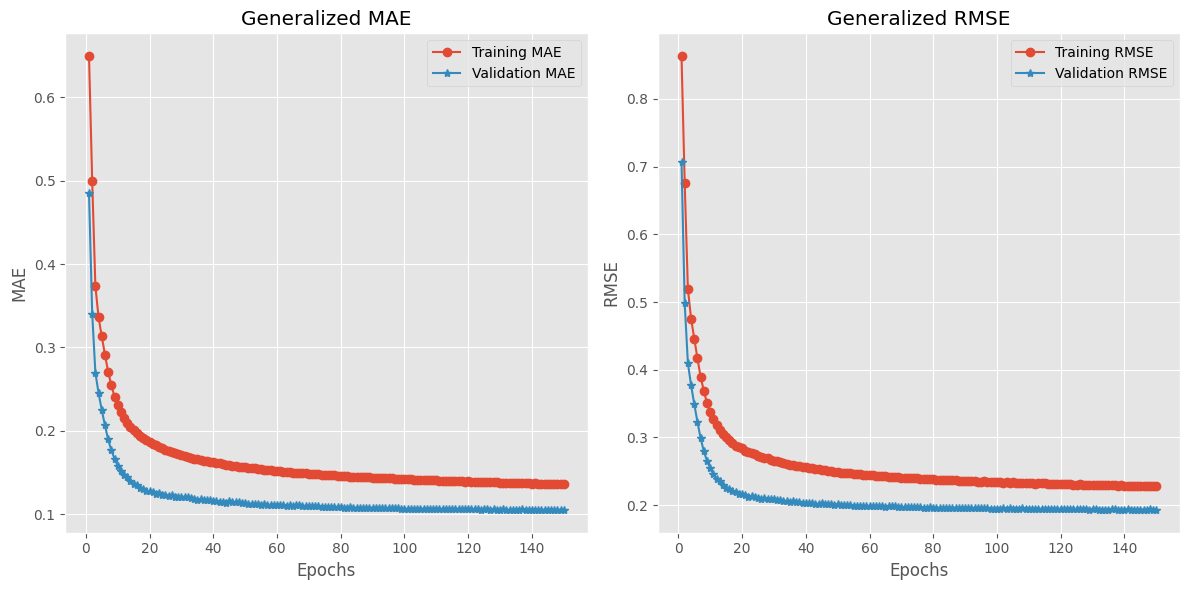

In [13]:
for i in histories_noval_PHs.items():
    print(f"Prediction horizon {i[0]}")
    plot_loss_curves(i[1])
    break

In [44]:
# model_all_train_read =  SharedLayerModelWithAttention(input_shape =input_shape , output_shape=output_shape)
# model_all_train_read.load_state_dict(torch.load('saved_models\model_shared-layer_attention_6.pth'))
# model_all_train_read.to(device)
# model_all_train_read.eval()


In [45]:
# _, _, _, test_loader, _, input_shape_test, _, output_shape_test =  prepare_data_loader(
#                                                                                     window_size,BATCH_SIZE, prediction_horizon = 6,
#                                                                                     model_type = model_type, split_ratio = 0.7, df = None, df_test = None, output_folder_train=output_folder_train, shuffle = False)


In [ ]:
# outputs_all_batches, targets_all_batches =  model_prediction(model_all_train_read,test_loader, device, model_type)

In [ ]:
# outputs = torch.cat(outputs_all_batches, dim=0)
# targets = torch.cat(targets_all_batches, dim=0)

# outputs = outputs.cpu()
# targets = targets.cpu()
# # Create a mask where arr1 equals 0


In [ ]:
# mask = (targets == 0.0)

# # Set elements to None (or np.nan for float compatibility)
# targets = np.where(mask, None, targets)
# outputs = np.where(mask, None, outputs)

In [43]:
# # index =4
# for index in range(12):
#     patient1_target = [sublist[index] for sublist in targets]
#     patient1_output = [sublist[index]  for sublist in outputs]
#     # patient1_output = outputs_all_batches[index]
#     # patient1_target = targets_all_batches[index]

#     # print(list(abs_patients_errors_PHs[6].values())[index])
#     # print(list(squared_patients_errors_PHs[6].values())[index])

#     plt.figure(figsize=(13,5))
#     plt.plot(patient1_target)
#     plt.plot(patient1_output)
#     plt.show()

In [51]:


# Instantiate the model for 12 tasks
input_shape = (64, 12, 1)  # Example input shape: batch_size, sequence_length, input_channels
output_tasks = 12           # Number of tasks

# Instantiate the model
model = SharedLayerModelWithAttention(input_shape=input_shape, output_shape=(output_tasks,))
model.to(device)
# Count the parameters
total_params = count_parameters(model)
print(f"Total parameters in the model with {output_tasks} tasks: {total_params}")


Total parameters in the model with 12 tasks: 1238668
